In [1]:
%pip install pandas numpy scikit-learn tensorflow tqdm imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [2]:
version = 0

In [3]:
# Parameters
version = 0


# Models

The current models being implemented are namely:

* Supervised
    1. Logistic Regression Model
    2. Random Forest Classifier
    3. Support Vector Machine
    4. Deep Neural Network
    5. (New) Bayesian Network
    6. (New) Gradient Boosting

* Unsupervised
    1. (New) K-Means Clustering
    2. (New) Kernel Density Estimation

In [4]:
import importlib
import pandas as pd

# Selecting column names for CESD-10 Scale related features
cesd_col_names = ["_a_emobth", "_a_emomnd", "_a_emodep", "_a_emoeff", "_a_emohope",
                "_a_emofear", "_a_emoslp", "_a_emohap", "_a_emolone", "_a_emogo"]

cesd_col_names_w1 = ["w1" + col for col in cesd_col_names]
cesd_col_names_w2 = ["w2" + col for col in cesd_col_names]
cesd_col_names_w3 = ["w3" + col for col in cesd_col_names]
cesd_col_names_w4 = ["w4" + col for col in cesd_col_names]
cesd_col_names_w5 = ["w5" + col for col in cesd_col_names]

### Prepping dataset

In [5]:
df1 = pd.read_csv("CSV/wave1_select_labelled.csv")
df1 = df1.drop(columns=cesd_col_names_w1).drop(columns=['score'])
print(df1['pid'].count())

df2 = pd.read_csv("CSV/wave2_select_labelled.csv")
df2 = df2.drop(columns=cesd_col_names_w2).drop(columns=['score'])
print(df2['pid'].count())

df3 = pd.read_csv("CSV/wave3_select_labelled.csv")
df3 = df3.drop(columns=cesd_col_names_w3).drop(columns=['score'])
print(df3['pid'].count())

df4 = pd.read_csv("CSV/wave4_select_labelled.csv")
df4 = df4.drop(columns=cesd_col_names_w4).drop(columns=['score'])
print(df4['pid'].count())

df5 = pd.read_csv("CSV/wave5_select_labelled.csv")
df5 = df5.drop(columns=cesd_col_names_w5).drop(columns=['score'])
print(df5['pid'].count())

combined_df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)
print(combined_df['pid'].count())
print(combined_df.columns, f"\n{len(combined_df.columns) - 1} columns")

# print(combined_df.describe())

14156
14589
14746
19294


18779
81564
Index(['pid', 'age', 'gender', 'race', 'marital_status', 'born_province',
       'employed', 'employed_take_home', 'employed_weekly_hours',
       'self_employed', 'self_employed_take_home',
       'self_employed_weekly_hours', 'casual_work', 'casual_weekly_hours',
       'highest_grade_school', 'tertiary_education', 'currently_enrolled',
       'fever', 'persistent_cough', 'cough_with_blood', 'chest_pain',
       'body_ache', 'headache', 'back_ache', 'joint_pain_arthritis',
       'diarrhoea', 'painful_urination', 'swelling_ankles',
       'severe_weight_loss', 'time_since_prev_consulation', 'had_tubercolosis',
       'had_high_blood_pressure', 'had_diabetes_or_high_blood_sugar',
       'had_stroke', 'had_asthma', 'had_heart_problems', 'had_cancer',
       'exercise_frequency', 'smokes_cigarettes', 'height_measurement',
       'weight_measurement', 'waist_measurement', 'depressed'],
      dtype='object') 
42 columns


### Additional Preprocessing

121936


/home/useradd/GITHUB/Research/Implementation/plotter.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index, rotation=rotation)


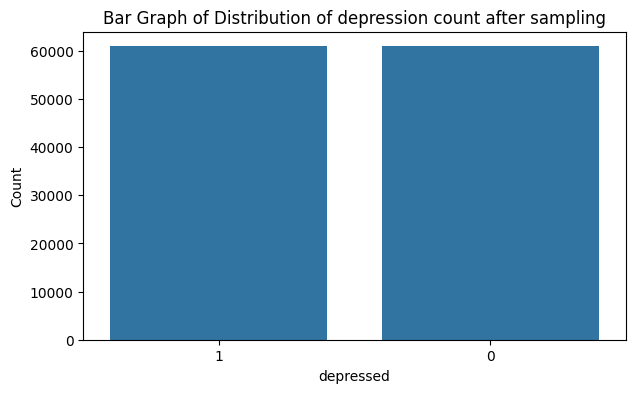

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import plotter

if version == 0:
    # Split data into features (X) and target (y)
    X = combined_df.drop('depressed', axis=1)
    y = combined_df['depressed']

    # Apply SMOTE for oversampling or RandomUnderSampler for undersampling
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Or for undersampling
    # undersample = RandomUnderSampler()
    # X_resampled, y_resampled = undersample.fit_resample(X, y)

    # Combine back into a balanced dataframe
    df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
    combined_df = df_balanced

    print(combined_df['pid'].count())

    plotter.plot_bar(combined_df['depressed'], "Distribution of depression count after sampling")

if version == 1:
    # Separate majority and minority classes
    majority_class = combined_df[combined_df['depressed'] == 0]
    minority_class = combined_df[combined_df['depressed'] == 1]

    # Oversample the minority class to match the number of majority class samples
    oversampled_minority = minority_class.sample(len(majority_class), replace=True)

    # Concatenate the majority class with the oversampled minority class
    df_balanced = pd.concat([majority_class, oversampled_minority])

    # Shuffle the dataset
    df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

    combined_df = df_balanced

    plotter.plot_bar(combined_df['depressed'], "Distribution of depression count after sampling")

Precision = TP / TP + FP (How often are positive predictions correct?)
Recall = TP / TP + FN (Can an ML model find all instances of the positive class?)

### Logistic Regression

In [7]:
import logisticRegression

LR = logisticRegression.LogisticRegressionModel(combined_df, combined_df['depressed'])

LR.run()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           42     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.04654D+00


 This problem is unconstrained.



At iterate   50    f=  6.35102D-01    |proj g|=  1.64942D-01



At iterate  100    f=  6.30342D-01    |proj g|=  4.20780D-02



At iterate  150    f=  6.28987D-01    |proj g|=  2.06805D-02



At iterate  200    f=  6.28211D-01    |proj g|=  9.30534D-03



At iterate  250    f=  6.27830D-01    |proj g|=  1.26664D-02



At iterate  300    f=  6.27558D-01    |proj g|=  4.22922D-03



At iterate  350    f=  6.27434D-01    |proj g|=  7.43977D-03



At iterate  400    f=  6.27369D-01    |proj g|=  5.49712D-03



At iterate  450    f=  6.27345D-01    |proj g|=  9.44060D-03



At iterate  500    f=  6.27328D-01    |proj g|=  4.58563D-03



At iterate  550    f=  6.27321D-01    |proj g|=  1.77532D-03



At iterate  600    f=  6.27317D-01    |proj g|=  4.88069D-04



At iterate  650    f=  6.27316D-01    |proj g|=  2.47943D-03



At iterate  700    f=  6.27315D-01    |proj g|=  4.69365D-04



At iterate  750    f=  6.27315D-01    |proj g|=  1.05794D-03



At iterate  800    f=  6.27314D-01    |proj g|=  9.75378D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   42    800    913      1     0     0   9.754D-05   6.273D-01
  F =  0.62731444337038267     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Validation Accuracy: 0.66
Validation Confusion Matrix:
[[8140 4195]
 [4146 7906]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66     12335
           1       0.65      0.66      0.65     12052

    accuracy                           0.66     24387
   macro avg       0.66    

Best Parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}
Best Score: 0.6580965080874109



### Deep Neural Network

In [8]:
import neuralNetwork

NN = neuralNetwork.DeepNeuralNetworkModel(combined_df, combined_df['depressed'])

NN.run()

2024-10-04 17:53:09.740443: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-04 17:53:09.775105: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-04 17:53:09.775601: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-10-04 17:53:10.659967: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100


2024-10-04 17:53:12.059857: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-04 17:53:12.060468: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


   1/2287 [..............................] - ETA: 49:48 - loss: 0.6943 - accuracy: 0.5312

  15/2287 [..............................] - ETA: 8s - loss: 0.7032 - accuracy: 0.5042   

  34/2287 [..............................] - ETA: 6s - loss: 0.6959 - accuracy: 0.5156

  53/2287 [..............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5236

  73/2287 [..............................] - ETA: 6s - loss: 0.6843 - accuracy: 0.5497

  92/2287 [>.............................] - ETA: 6s - loss: 0.6828 - accuracy: 0.5506

 112/2287 [>.............................] - ETA: 5s - loss: 0.6788 - accuracy: 0.5645

 133/2287 [>.............................] - ETA: 5s - loss: 0.6785 - accuracy: 0.5703

 154/2287 [=>............................] - ETA: 5s - loss: 0.6755 - accuracy: 0.5785

 175/2287 [=>............................] - ETA: 5s - loss: 0.6728 - accuracy: 0.5846

 196/2287 [=>............................] - ETA: 5s - loss: 0.6692 - accuracy: 0.5891

 218/2287 [=>............................] - ETA: 5s - loss: 0.6664 - accuracy: 0.5916

 238/2287 [==>...........................] - ETA: 5s - loss: 0.6628 - accuracy: 0.5978

 260/2287 [==>...........................] - ETA: 5s - loss: 0.6607 - accuracy: 0.6016

 281/2287 [==>...........................] - ETA: 5s - loss: 0.6579 - accuracy: 0.6052

 303/2287 [==>...........................] - ETA: 5s - loss: 0.6549 - accuracy: 0.6109

 325/2287 [===>..........................] - ETA: 4s - loss: 0.6517 - accuracy: 0.6151

 346/2287 [===>..........................] - ETA: 4s - loss: 0.6493 - accuracy: 0.6185

 367/2287 [===>..........................] - ETA: 4s - loss: 0.6472 - accuracy: 0.6215

 389/2287 [====>.........................] - ETA: 4s - loss: 0.6461 - accuracy: 0.6221

 410/2287 [====>.........................] - ETA: 4s - loss: 0.6450 - accuracy: 0.6232

 430/2287 [====>.........................] - ETA: 4s - loss: 0.6429 - accuracy: 0.6256

 449/2287 [====>.........................] - ETA: 4s - loss: 0.6423 - accuracy: 0.6271

 467/2287 [=====>........................] - ETA: 4s - loss: 0.6407 - accuracy: 0.6296

 488/2287 [=====>........................] - ETA: 4s - loss: 0.6394 - accuracy: 0.6319

 509/2287 [=====>........................] - ETA: 4s - loss: 0.6394 - accuracy: 0.6326

 529/2287 [=====>........................] - ETA: 4s - loss: 0.6382 - accuracy: 0.6344

 551/2287 [======>.......................] - ETA: 4s - loss: 0.6369 - accuracy: 0.6365

 572/2287 [======>.......................] - ETA: 4s - loss: 0.6359 - accuracy: 0.6373

 593/2287 [======>.......................] - ETA: 4s - loss: 0.6345 - accuracy: 0.6393

 614/2287 [=======>......................] - ETA: 4s - loss: 0.6336 - accuracy: 0.6405

 634/2287 [=======>......................] - ETA: 4s - loss: 0.6323 - accuracy: 0.6412

 654/2287 [=======>......................] - ETA: 4s - loss: 0.6326 - accuracy: 0.6415

 675/2287 [=======>......................] - ETA: 4s - loss: 0.6320 - accuracy: 0.6422

 695/2287 [========>.....................] - ETA: 3s - loss: 0.6316 - accuracy: 0.6425

 716/2287 [========>.....................] - ETA: 3s - loss: 0.6311 - accuracy: 0.6426

 735/2287 [========>.....................] - ETA: 3s - loss: 0.6302 - accuracy: 0.6432

 752/2287 [========>.....................] - ETA: 3s - loss: 0.6307 - accuracy: 0.6431

 769/2287 [=========>....................] - ETA: 3s - loss: 0.6303 - accuracy: 0.6437

 787/2287 [=========>....................] - ETA: 3s - loss: 0.6294 - accuracy: 0.6448

 803/2287 [=========>....................] - ETA: 3s - loss: 0.6288 - accuracy: 0.6457

 812/2287 [=========>....................] - ETA: 3s - loss: 0.6284 - accuracy: 0.6460

 828/2287 [=========>....................] - ETA: 3s - loss: 0.6282 - accuracy: 0.6463

 848/2287 [==========>...................] - ETA: 3s - loss: 0.6272 - accuracy: 0.6474

 869/2287 [==========>...................] - ETA: 3s - loss: 0.6266 - accuracy: 0.6480

 890/2287 [==========>...................] - ETA: 3s - loss: 0.6260 - accuracy: 0.6485

 910/2287 [==========>...................] - ETA: 3s - loss: 0.6247 - accuracy: 0.6496

 931/2287 [===========>..................] - ETA: 3s - loss: 0.6236 - accuracy: 0.6509

 952/2287 [===========>..................] - ETA: 3s - loss: 0.6230 - accuracy: 0.6510

 974/2287 [===========>..................] - ETA: 3s - loss: 0.6220 - accuracy: 0.6517

 991/2287 [===========>..................] - ETA: 3s - loss: 0.6214 - accuracy: 0.6522

1006/2287 [============>.................] - ETA: 3s - loss: 0.6207 - accuracy: 0.6529

1024/2287 [============>.................] - ETA: 3s - loss: 0.6205 - accuracy: 0.6532

1041/2287 [============>.................] - ETA: 3s - loss: 0.6198 - accuracy: 0.6538

1061/2287 [============>.................] - ETA: 3s - loss: 0.6192 - accuracy: 0.6542

1082/2287 [=============>................] - ETA: 3s - loss: 0.6179 - accuracy: 0.6555

1103/2287 [=============>................] - ETA: 3s - loss: 0.6173 - accuracy: 0.6564

1125/2287 [=============>................] - ETA: 3s - loss: 0.6165 - accuracy: 0.6572

1147/2287 [==============>...............] - ETA: 2s - loss: 0.6156 - accuracy: 0.6578

1167/2287 [==============>...............] - ETA: 2s - loss: 0.6154 - accuracy: 0.6580

1180/2287 [==============>...............] - ETA: 2s - loss: 0.6152 - accuracy: 0.6578

1195/2287 [==============>...............] - ETA: 2s - loss: 0.6149 - accuracy: 0.6581

1206/2287 [==============>...............] - ETA: 2s - loss: 0.6149 - accuracy: 0.6581

1224/2287 [===============>..............] - ETA: 2s - loss: 0.6144 - accuracy: 0.6587

1242/2287 [===============>..............] - ETA: 2s - loss: 0.6139 - accuracy: 0.6590

1262/2287 [===============>..............] - ETA: 2s - loss: 0.6132 - accuracy: 0.6596

1283/2287 [===============>..............] - ETA: 2s - loss: 0.6129 - accuracy: 0.6597

1304/2287 [================>.............] - ETA: 2s - loss: 0.6122 - accuracy: 0.6606

1325/2287 [================>.............] - ETA: 2s - loss: 0.6116 - accuracy: 0.6613

1345/2287 [================>.............] - ETA: 2s - loss: 0.6114 - accuracy: 0.6615

1367/2287 [================>.............] - ETA: 2s - loss: 0.6112 - accuracy: 0.6615

1387/2287 [=================>............] - ETA: 2s - loss: 0.6104 - accuracy: 0.6620

1408/2287 [=================>............] - ETA: 2s - loss: 0.6097 - accuracy: 0.6624

1430/2287 [=================>............] - ETA: 2s - loss: 0.6093 - accuracy: 0.6629

1450/2287 [==================>...........] - ETA: 2s - loss: 0.6089 - accuracy: 0.6634

1470/2287 [==================>...........] - ETA: 2s - loss: 0.6084 - accuracy: 0.6639

1491/2287 [==================>...........] - ETA: 2s - loss: 0.6079 - accuracy: 0.6643

1513/2287 [==================>...........] - ETA: 2s - loss: 0.6080 - accuracy: 0.6642

1534/2287 [===================>..........] - ETA: 1s - loss: 0.6078 - accuracy: 0.6645

1555/2287 [===================>..........] - ETA: 1s - loss: 0.6074 - accuracy: 0.6649

1575/2287 [===================>..........] - ETA: 1s - loss: 0.6073 - accuracy: 0.6650

1593/2287 [===================>..........] - ETA: 1s - loss: 0.6068 - accuracy: 0.6653

1614/2287 [====================>.........] - ETA: 1s - loss: 0.6066 - accuracy: 0.6654

1635/2287 [====================>.........] - ETA: 1s - loss: 0.6063 - accuracy: 0.6658

1656/2287 [====================>.........] - ETA: 1s - loss: 0.6060 - accuracy: 0.6660

1677/2287 [====================>.........] - ETA: 1s - loss: 0.6057 - accuracy: 0.6662

1699/2287 [=====================>........] - ETA: 1s - loss: 0.6052 - accuracy: 0.6665

1721/2287 [=====================>........] - ETA: 1s - loss: 0.6047 - accuracy: 0.6669

1734/2287 [=====================>........] - ETA: 1s - loss: 0.6042 - accuracy: 0.6673

1743/2287 [=====================>........] - ETA: 1s - loss: 0.6041 - accuracy: 0.6673

1759/2287 [======================>.......] - ETA: 1s - loss: 0.6035 - accuracy: 0.6679

1780/2287 [======================>.......] - ETA: 1s - loss: 0.6035 - accuracy: 0.6678

1802/2287 [======================>.......] - ETA: 1s - loss: 0.6034 - accuracy: 0.6678

1824/2287 [======================>.......] - ETA: 1s - loss: 0.6032 - accuracy: 0.6679

1845/2287 [=======================>......] - ETA: 1s - loss: 0.6027 - accuracy: 0.6684

1865/2287 [=======================>......] - ETA: 1s - loss: 0.6023 - accuracy: 0.6689

1886/2287 [=======================>......] - ETA: 1s - loss: 0.6016 - accuracy: 0.6695

1908/2287 [========================>.....] - ETA: 0s - loss: 0.6012 - accuracy: 0.6698

1929/2287 [========================>.....] - ETA: 0s - loss: 0.6013 - accuracy: 0.6696

1947/2287 [========================>.....] - ETA: 0s - loss: 0.6010 - accuracy: 0.6699

1968/2287 [========================>.....] - ETA: 0s - loss: 0.6005 - accuracy: 0.6703

1986/2287 [=========================>....] - ETA: 0s - loss: 0.6004 - accuracy: 0.6703

2007/2287 [=========================>....] - ETA: 0s - loss: 0.6000 - accuracy: 0.6705

2028/2287 [=========================>....] - ETA: 0s - loss: 0.5993 - accuracy: 0.6712

2050/2287 [=========================>....] - ETA: 0s - loss: 0.5990 - accuracy: 0.6712

2067/2287 [==========================>...] - ETA: 0s - loss: 0.5987 - accuracy: 0.6713

2088/2287 [==========================>...] - ETA: 0s - loss: 0.5987 - accuracy: 0.6712

2110/2287 [==========================>...] - ETA: 0s - loss: 0.5984 - accuracy: 0.6714

2131/2287 [==========================>...] - ETA: 0s - loss: 0.5982 - accuracy: 0.6715

2153/2287 [===========================>..] - ETA: 0s - loss: 0.5979 - accuracy: 0.6717

2173/2287 [===========================>..] - ETA: 0s - loss: 0.5976 - accuracy: 0.6718

2193/2287 [===========================>..] - ETA: 0s - loss: 0.5975 - accuracy: 0.6719

2212/2287 [============================>.] - ETA: 0s - loss: 0.5974 - accuracy: 0.6719

2234/2287 [============================>.] - ETA: 0s - loss: 0.5969 - accuracy: 0.6724

2256/2287 [============================>.] - ETA: 0s - loss: 0.5966 - accuracy: 0.6725

2278/2287 [============================>.] - ETA: 0s - loss: 0.5962 - accuracy: 0.6727

2287/2287 [==============================] - 8s 3ms/step - loss: 0.5960 - accuracy: 0.6729 - val_loss: 0.5465 - val_accuracy: 0.7071


Epoch 2/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5668 - accuracy: 0.6562

  21/2287 [..............................] - ETA: 5s - loss: 0.5672 - accuracy: 0.6935

  42/2287 [..............................] - ETA: 5s - loss: 0.5659 - accuracy: 0.6987

  62/2287 [..............................] - ETA: 5s - loss: 0.5702 - accuracy: 0.6996

  83/2287 [>.............................] - ETA: 5s - loss: 0.5721 - accuracy: 0.6950

 101/2287 [>.............................] - ETA: 5s - loss: 0.5665 - accuracy: 0.7008

 122/2287 [>.............................] - ETA: 5s - loss: 0.5712 - accuracy: 0.6957

 144/2287 [>.............................] - ETA: 5s - loss: 0.5685 - accuracy: 0.7023

 165/2287 [=>............................] - ETA: 5s - loss: 0.5676 - accuracy: 0.7042

 186/2287 [=>............................] - ETA: 5s - loss: 0.5642 - accuracy: 0.7063

 207/2287 [=>............................] - ETA: 5s - loss: 0.5626 - accuracy: 0.7056

 229/2287 [==>...........................] - ETA: 5s - loss: 0.5613 - accuracy: 0.7058

 250/2287 [==>...........................] - ETA: 4s - loss: 0.5632 - accuracy: 0.7035

 271/2287 [==>...........................] - ETA: 4s - loss: 0.5631 - accuracy: 0.7030

 293/2287 [==>...........................] - ETA: 4s - loss: 0.5619 - accuracy: 0.7030

 315/2287 [===>..........................] - ETA: 4s - loss: 0.5614 - accuracy: 0.7040

 335/2287 [===>..........................] - ETA: 4s - loss: 0.5600 - accuracy: 0.7038

 356/2287 [===>..........................] - ETA: 4s - loss: 0.5593 - accuracy: 0.7041

 377/2287 [===>..........................] - ETA: 4s - loss: 0.5590 - accuracy: 0.7032

 399/2287 [====>.........................] - ETA: 4s - loss: 0.5578 - accuracy: 0.7043

 420/2287 [====>.........................] - ETA: 4s - loss: 0.5584 - accuracy: 0.7046

 442/2287 [====>.........................] - ETA: 4s - loss: 0.5589 - accuracy: 0.7045

 464/2287 [=====>........................] - ETA: 4s - loss: 0.5593 - accuracy: 0.7037

 484/2287 [=====>........................] - ETA: 4s - loss: 0.5582 - accuracy: 0.7045

 504/2287 [=====>........................] - ETA: 4s - loss: 0.5578 - accuracy: 0.7046

 525/2287 [=====>........................] - ETA: 4s - loss: 0.5570 - accuracy: 0.7046

 547/2287 [======>.......................] - ETA: 4s - loss: 0.5584 - accuracy: 0.7032

 568/2287 [======>.......................] - ETA: 4s - loss: 0.5567 - accuracy: 0.7046

 589/2287 [======>.......................] - ETA: 4s - loss: 0.5562 - accuracy: 0.7044

 610/2287 [=======>......................] - ETA: 4s - loss: 0.5570 - accuracy: 0.7042

 630/2287 [=======>......................] - ETA: 4s - loss: 0.5571 - accuracy: 0.7040

 651/2287 [=======>......................] - ETA: 3s - loss: 0.5568 - accuracy: 0.7046

 673/2287 [=======>......................] - ETA: 3s - loss: 0.5570 - accuracy: 0.7039

 693/2287 [========>.....................] - ETA: 3s - loss: 0.5577 - accuracy: 0.7036

 714/2287 [========>.....................] - ETA: 3s - loss: 0.5581 - accuracy: 0.7038

 734/2287 [========>.....................] - ETA: 3s - loss: 0.5580 - accuracy: 0.7038

 753/2287 [========>.....................] - ETA: 3s - loss: 0.5575 - accuracy: 0.7042

 774/2287 [=========>....................] - ETA: 3s - loss: 0.5574 - accuracy: 0.7043

 795/2287 [=========>....................] - ETA: 3s - loss: 0.5570 - accuracy: 0.7040

 816/2287 [=========>....................] - ETA: 3s - loss: 0.5571 - accuracy: 0.7041

 838/2287 [=========>....................] - ETA: 3s - loss: 0.5572 - accuracy: 0.7046

 859/2287 [==========>...................] - ETA: 3s - loss: 0.5573 - accuracy: 0.7043

 880/2287 [==========>...................] - ETA: 3s - loss: 0.5575 - accuracy: 0.7040

 901/2287 [==========>...................] - ETA: 3s - loss: 0.5572 - accuracy: 0.7040

 920/2287 [===========>..................] - ETA: 3s - loss: 0.5571 - accuracy: 0.7041

 938/2287 [===========>..................] - ETA: 3s - loss: 0.5570 - accuracy: 0.7042

 960/2287 [===========>..................] - ETA: 3s - loss: 0.5568 - accuracy: 0.7038

 981/2287 [===========>..................] - ETA: 3s - loss: 0.5567 - accuracy: 0.7041

1002/2287 [============>.................] - ETA: 3s - loss: 0.5568 - accuracy: 0.7042

1024/2287 [============>.................] - ETA: 3s - loss: 0.5565 - accuracy: 0.7045

1046/2287 [============>.................] - ETA: 3s - loss: 0.5563 - accuracy: 0.7054

1062/2287 [============>.................] - ETA: 3s - loss: 0.5567 - accuracy: 0.7050

1079/2287 [=============>................] - ETA: 2s - loss: 0.5566 - accuracy: 0.7051

1098/2287 [=============>................] - ETA: 2s - loss: 0.5570 - accuracy: 0.7047

1118/2287 [=============>................] - ETA: 2s - loss: 0.5565 - accuracy: 0.7053

1139/2287 [=============>................] - ETA: 2s - loss: 0.5564 - accuracy: 0.7053

1160/2287 [==============>...............] - ETA: 2s - loss: 0.5566 - accuracy: 0.7054

1181/2287 [==============>...............] - ETA: 2s - loss: 0.5563 - accuracy: 0.7054

1203/2287 [==============>...............] - ETA: 2s - loss: 0.5569 - accuracy: 0.7050

1224/2287 [===============>..............] - ETA: 2s - loss: 0.5566 - accuracy: 0.7052

1245/2287 [===============>..............] - ETA: 2s - loss: 0.5565 - accuracy: 0.7052

1267/2287 [===============>..............] - ETA: 2s - loss: 0.5565 - accuracy: 0.7052

1287/2287 [===============>..............] - ETA: 2s - loss: 0.5565 - accuracy: 0.7052

1308/2287 [================>.............] - ETA: 2s - loss: 0.5565 - accuracy: 0.7055

1326/2287 [================>.............] - ETA: 2s - loss: 0.5562 - accuracy: 0.7057

1345/2287 [================>.............] - ETA: 2s - loss: 0.5559 - accuracy: 0.7059

1363/2287 [================>.............] - ETA: 2s - loss: 0.5554 - accuracy: 0.7058

1383/2287 [=================>............] - ETA: 2s - loss: 0.5553 - accuracy: 0.7058

1403/2287 [=================>............] - ETA: 2s - loss: 0.5555 - accuracy: 0.7057

1422/2287 [=================>............] - ETA: 2s - loss: 0.5552 - accuracy: 0.7058

1442/2287 [=================>............] - ETA: 2s - loss: 0.5555 - accuracy: 0.7049

1463/2287 [==================>...........] - ETA: 2s - loss: 0.5552 - accuracy: 0.7050

1485/2287 [==================>...........] - ETA: 1s - loss: 0.5552 - accuracy: 0.7048

1500/2287 [==================>...........] - ETA: 1s - loss: 0.5554 - accuracy: 0.7046

1518/2287 [==================>...........] - ETA: 1s - loss: 0.5554 - accuracy: 0.7047

1535/2287 [===================>..........] - ETA: 1s - loss: 0.5555 - accuracy: 0.7044

1555/2287 [===================>..........] - ETA: 1s - loss: 0.5555 - accuracy: 0.7043

1576/2287 [===================>..........] - ETA: 1s - loss: 0.5552 - accuracy: 0.7044

1597/2287 [===================>..........] - ETA: 1s - loss: 0.5548 - accuracy: 0.7048

1618/2287 [====================>.........] - ETA: 1s - loss: 0.5546 - accuracy: 0.7050

1639/2287 [====================>.........] - ETA: 1s - loss: 0.5548 - accuracy: 0.7049

1660/2287 [====================>.........] - ETA: 1s - loss: 0.5546 - accuracy: 0.7048

1680/2287 [=====================>........] - ETA: 1s - loss: 0.5549 - accuracy: 0.7046

1697/2287 [=====================>........] - ETA: 1s - loss: 0.5548 - accuracy: 0.7047

1718/2287 [=====================>........] - ETA: 1s - loss: 0.5547 - accuracy: 0.7049

1739/2287 [=====================>........] - ETA: 1s - loss: 0.5548 - accuracy: 0.7049

1760/2287 [======================>.......] - ETA: 1s - loss: 0.5545 - accuracy: 0.7052

1782/2287 [======================>.......] - ETA: 1s - loss: 0.5546 - accuracy: 0.7051

1804/2287 [======================>.......] - ETA: 1s - loss: 0.5547 - accuracy: 0.7051

1826/2287 [======================>.......] - ETA: 1s - loss: 0.5544 - accuracy: 0.7055

1846/2287 [=======================>......] - ETA: 1s - loss: 0.5542 - accuracy: 0.7055

1868/2287 [=======================>......] - ETA: 1s - loss: 0.5542 - accuracy: 0.7053

1889/2287 [=======================>......] - ETA: 0s - loss: 0.5545 - accuracy: 0.7051

1909/2287 [========================>.....] - ETA: 0s - loss: 0.5543 - accuracy: 0.7053

1930/2287 [========================>.....] - ETA: 0s - loss: 0.5546 - accuracy: 0.7052

1951/2287 [========================>.....] - ETA: 0s - loss: 0.5540 - accuracy: 0.7058

1971/2287 [========================>.....] - ETA: 0s - loss: 0.5538 - accuracy: 0.7061

1992/2287 [=========================>....] - ETA: 0s - loss: 0.5538 - accuracy: 0.7061

2010/2287 [=========================>....] - ETA: 0s - loss: 0.5537 - accuracy: 0.7061

2031/2287 [=========================>....] - ETA: 0s - loss: 0.5538 - accuracy: 0.7060

2052/2287 [=========================>....] - ETA: 0s - loss: 0.5536 - accuracy: 0.7060

2072/2287 [==========================>...] - ETA: 0s - loss: 0.5532 - accuracy: 0.7065

2092/2287 [==========================>...] - ETA: 0s - loss: 0.5531 - accuracy: 0.7064

2112/2287 [==========================>...] - ETA: 0s - loss: 0.5529 - accuracy: 0.7065

2133/2287 [==========================>...] - ETA: 0s - loss: 0.5529 - accuracy: 0.7063

2155/2287 [===========================>..] - ETA: 0s - loss: 0.5528 - accuracy: 0.7064

2174/2287 [===========================>..] - ETA: 0s - loss: 0.5528 - accuracy: 0.7066

2196/2287 [===========================>..] - ETA: 0s - loss: 0.5527 - accuracy: 0.7068

2217/2287 [============================>.] - ETA: 0s - loss: 0.5526 - accuracy: 0.7069

2238/2287 [============================>.] - ETA: 0s - loss: 0.5524 - accuracy: 0.7071

2256/2287 [============================>.] - ETA: 0s - loss: 0.5522 - accuracy: 0.7071

2274/2287 [============================>.] - ETA: 0s - loss: 0.5522 - accuracy: 0.7071

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5520 - accuracy: 0.7073 - val_loss: 0.5215 - val_accuracy: 0.7313


Epoch 3/100


   1/2287 [..............................] - ETA: 10s - loss: 0.5586 - accuracy: 0.6250

  19/2287 [..............................] - ETA: 6s - loss: 0.5369 - accuracy: 0.7336 

  39/2287 [..............................] - ETA: 6s - loss: 0.5238 - accuracy: 0.7388

  60/2287 [..............................] - ETA: 5s - loss: 0.5213 - accuracy: 0.7359

  82/2287 [>.............................] - ETA: 5s - loss: 0.5290 - accuracy: 0.7309

 104/2287 [>.............................] - ETA: 5s - loss: 0.5371 - accuracy: 0.7200

 125/2287 [>.............................] - ETA: 5s - loss: 0.5391 - accuracy: 0.7170

 144/2287 [>.............................] - ETA: 5s - loss: 0.5359 - accuracy: 0.7209

 164/2287 [=>............................] - ETA: 5s - loss: 0.5385 - accuracy: 0.7188

 182/2287 [=>............................] - ETA: 5s - loss: 0.5377 - accuracy: 0.7229

 197/2287 [=>............................] - ETA: 5s - loss: 0.5376 - accuracy: 0.7234

 213/2287 [=>............................] - ETA: 5s - loss: 0.5368 - accuracy: 0.7230

 231/2287 [==>...........................] - ETA: 5s - loss: 0.5379 - accuracy: 0.7227

 250/2287 [==>...........................] - ETA: 5s - loss: 0.5379 - accuracy: 0.7230

 272/2287 [==>...........................] - ETA: 5s - loss: 0.5368 - accuracy: 0.7240

 293/2287 [==>...........................] - ETA: 5s - loss: 0.5360 - accuracy: 0.7250

 314/2287 [===>..........................] - ETA: 5s - loss: 0.5374 - accuracy: 0.7231

 336/2287 [===>..........................] - ETA: 5s - loss: 0.5379 - accuracy: 0.7210

 358/2287 [===>..........................] - ETA: 4s - loss: 0.5381 - accuracy: 0.7199

 379/2287 [===>..........................] - ETA: 4s - loss: 0.5374 - accuracy: 0.7203

 400/2287 [====>.........................] - ETA: 4s - loss: 0.5388 - accuracy: 0.7193

 422/2287 [====>.........................] - ETA: 4s - loss: 0.5396 - accuracy: 0.7185

 443/2287 [====>.........................] - ETA: 4s - loss: 0.5395 - accuracy: 0.7192

 462/2287 [=====>........................] - ETA: 4s - loss: 0.5391 - accuracy: 0.7188

 482/2287 [=====>........................] - ETA: 4s - loss: 0.5385 - accuracy: 0.7199

 497/2287 [=====>........................] - ETA: 4s - loss: 0.5386 - accuracy: 0.7199

 512/2287 [=====>........................] - ETA: 4s - loss: 0.5392 - accuracy: 0.7192

 527/2287 [=====>........................] - ETA: 4s - loss: 0.5395 - accuracy: 0.7188

 544/2287 [======>.......................] - ETA: 4s - loss: 0.5392 - accuracy: 0.7188

 562/2287 [======>.......................] - ETA: 4s - loss: 0.5388 - accuracy: 0.7190

 577/2287 [======>.......................] - ETA: 4s - loss: 0.5387 - accuracy: 0.7192

 593/2287 [======>.......................] - ETA: 4s - loss: 0.5384 - accuracy: 0.7195

 609/2287 [======>.......................] - ETA: 4s - loss: 0.5379 - accuracy: 0.7204

 627/2287 [=======>......................] - ETA: 4s - loss: 0.5377 - accuracy: 0.7209

 647/2287 [=======>......................] - ETA: 4s - loss: 0.5386 - accuracy: 0.7196

 667/2287 [=======>......................] - ETA: 4s - loss: 0.5383 - accuracy: 0.7199

 686/2287 [=======>......................] - ETA: 4s - loss: 0.5383 - accuracy: 0.7195

 706/2287 [========>.....................] - ETA: 4s - loss: 0.5385 - accuracy: 0.7196

 727/2287 [========>.....................] - ETA: 4s - loss: 0.5387 - accuracy: 0.7189

 738/2287 [========>.....................] - ETA: 4s - loss: 0.5385 - accuracy: 0.7191

 757/2287 [========>.....................] - ETA: 4s - loss: 0.5387 - accuracy: 0.7192

 778/2287 [=========>....................] - ETA: 4s - loss: 0.5388 - accuracy: 0.7192

 798/2287 [=========>....................] - ETA: 4s - loss: 0.5390 - accuracy: 0.7182

 818/2287 [=========>....................] - ETA: 3s - loss: 0.5381 - accuracy: 0.7191

 831/2287 [=========>....................] - ETA: 3s - loss: 0.5381 - accuracy: 0.7192

 845/2287 [==========>...................] - ETA: 3s - loss: 0.5385 - accuracy: 0.7189

 861/2287 [==========>...................] - ETA: 3s - loss: 0.5390 - accuracy: 0.7187

 876/2287 [==========>...................] - ETA: 3s - loss: 0.5386 - accuracy: 0.7192

 890/2287 [==========>...................] - ETA: 3s - loss: 0.5384 - accuracy: 0.7192

 909/2287 [==========>...................] - ETA: 3s - loss: 0.5381 - accuracy: 0.7194

 920/2287 [===========>..................] - ETA: 3s - loss: 0.5378 - accuracy: 0.7194

 932/2287 [===========>..................] - ETA: 3s - loss: 0.5376 - accuracy: 0.7196

 941/2287 [===========>..................] - ETA: 3s - loss: 0.5371 - accuracy: 0.7198

 957/2287 [===========>..................] - ETA: 3s - loss: 0.5368 - accuracy: 0.7203

 972/2287 [===========>..................] - ETA: 3s - loss: 0.5368 - accuracy: 0.7202

 983/2287 [===========>..................] - ETA: 3s - loss: 0.5366 - accuracy: 0.7204

 995/2287 [============>.................] - ETA: 3s - loss: 0.5368 - accuracy: 0.7202

1010/2287 [============>.................] - ETA: 3s - loss: 0.5373 - accuracy: 0.7197

1024/2287 [============>.................] - ETA: 3s - loss: 0.5376 - accuracy: 0.7195

1035/2287 [============>.................] - ETA: 3s - loss: 0.5374 - accuracy: 0.7197

1054/2287 [============>.................] - ETA: 3s - loss: 0.5370 - accuracy: 0.7200

1073/2287 [=============>................] - ETA: 3s - loss: 0.5367 - accuracy: 0.7204

1093/2287 [=============>................] - ETA: 3s - loss: 0.5362 - accuracy: 0.7208

1113/2287 [=============>................] - ETA: 3s - loss: 0.5362 - accuracy: 0.7209

1134/2287 [=============>................] - ETA: 3s - loss: 0.5359 - accuracy: 0.7210

1156/2287 [==============>...............] - ETA: 3s - loss: 0.5353 - accuracy: 0.7212

1177/2287 [==============>...............] - ETA: 3s - loss: 0.5349 - accuracy: 0.7214

1198/2287 [==============>...............] - ETA: 3s - loss: 0.5348 - accuracy: 0.7217

1219/2287 [==============>...............] - ETA: 3s - loss: 0.5352 - accuracy: 0.7213

1235/2287 [===============>..............] - ETA: 3s - loss: 0.5352 - accuracy: 0.7215

1253/2287 [===============>..............] - ETA: 2s - loss: 0.5351 - accuracy: 0.7216

1270/2287 [===============>..............] - ETA: 2s - loss: 0.5351 - accuracy: 0.7213

1291/2287 [===============>..............] - ETA: 2s - loss: 0.5355 - accuracy: 0.7206

1313/2287 [================>.............] - ETA: 2s - loss: 0.5352 - accuracy: 0.7208

1334/2287 [================>.............] - ETA: 2s - loss: 0.5350 - accuracy: 0.7210

1355/2287 [================>.............] - ETA: 2s - loss: 0.5350 - accuracy: 0.7209

1377/2287 [=================>............] - ETA: 2s - loss: 0.5348 - accuracy: 0.7211

1397/2287 [=================>............] - ETA: 2s - loss: 0.5351 - accuracy: 0.7207

1418/2287 [=================>............] - ETA: 2s - loss: 0.5356 - accuracy: 0.7201

1439/2287 [=================>............] - ETA: 2s - loss: 0.5352 - accuracy: 0.7203

1461/2287 [==================>...........] - ETA: 2s - loss: 0.5353 - accuracy: 0.7201

1483/2287 [==================>...........] - ETA: 2s - loss: 0.5350 - accuracy: 0.7201

1504/2287 [==================>...........] - ETA: 2s - loss: 0.5352 - accuracy: 0.7199

1525/2287 [===================>..........] - ETA: 2s - loss: 0.5352 - accuracy: 0.7201

1547/2287 [===================>..........] - ETA: 2s - loss: 0.5354 - accuracy: 0.7199

1568/2287 [===================>..........] - ETA: 2s - loss: 0.5354 - accuracy: 0.7200

1590/2287 [===================>..........] - ETA: 1s - loss: 0.5349 - accuracy: 0.7205

1611/2287 [====================>.........] - ETA: 1s - loss: 0.5351 - accuracy: 0.7203

1631/2287 [====================>.........] - ETA: 1s - loss: 0.5350 - accuracy: 0.7204

1651/2287 [====================>.........] - ETA: 1s - loss: 0.5348 - accuracy: 0.7207

1670/2287 [====================>.........] - ETA: 1s - loss: 0.5346 - accuracy: 0.7210

1691/2287 [=====================>........] - ETA: 1s - loss: 0.5346 - accuracy: 0.7210

1712/2287 [=====================>........] - ETA: 1s - loss: 0.5348 - accuracy: 0.7209

1734/2287 [=====================>........] - ETA: 1s - loss: 0.5346 - accuracy: 0.7210

1756/2287 [======================>.......] - ETA: 1s - loss: 0.5346 - accuracy: 0.7209

1778/2287 [======================>.......] - ETA: 1s - loss: 0.5347 - accuracy: 0.7209

1800/2287 [======================>.......] - ETA: 1s - loss: 0.5347 - accuracy: 0.7210

1821/2287 [======================>.......] - ETA: 1s - loss: 0.5350 - accuracy: 0.7209

1843/2287 [=======================>......] - ETA: 1s - loss: 0.5348 - accuracy: 0.7209

1865/2287 [=======================>......] - ETA: 1s - loss: 0.5347 - accuracy: 0.7208

1887/2287 [=======================>......] - ETA: 1s - loss: 0.5351 - accuracy: 0.7207

1909/2287 [========================>.....] - ETA: 1s - loss: 0.5350 - accuracy: 0.7207

1930/2287 [========================>.....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7207

1952/2287 [========================>.....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7206

1974/2287 [========================>.....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7207

1995/2287 [=========================>....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7208

2017/2287 [=========================>....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7206

2039/2287 [=========================>....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7208

2059/2287 [==========================>...] - ETA: 0s - loss: 0.5345 - accuracy: 0.7208

2081/2287 [==========================>...] - ETA: 0s - loss: 0.5344 - accuracy: 0.7211

2099/2287 [==========================>...] - ETA: 0s - loss: 0.5341 - accuracy: 0.7212

2120/2287 [==========================>...] - ETA: 0s - loss: 0.5339 - accuracy: 0.7214

2140/2287 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7216

2161/2287 [===========================>..] - ETA: 0s - loss: 0.5333 - accuracy: 0.7220

2183/2287 [===========================>..] - ETA: 0s - loss: 0.5331 - accuracy: 0.7220

2204/2287 [===========================>..] - ETA: 0s - loss: 0.5331 - accuracy: 0.7220

2225/2287 [============================>.] - ETA: 0s - loss: 0.5332 - accuracy: 0.7218

2247/2287 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7216

2267/2287 [============================>.] - ETA: 0s - loss: 0.5332 - accuracy: 0.7218

2287/2287 [==============================] - ETA: 0s - loss: 0.5333 - accuracy: 0.7217

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5333 - accuracy: 0.7217 - val_loss: 0.5174 - val_accuracy: 0.7329


Epoch 4/100


   1/2287 [..............................] - ETA: 9s - loss: 0.3956 - accuracy: 0.8438

  22/2287 [..............................] - ETA: 5s - loss: 0.5094 - accuracy: 0.7273

  43/2287 [..............................] - ETA: 5s - loss: 0.5333 - accuracy: 0.7202

  64/2287 [..............................] - ETA: 5s - loss: 0.5280 - accuracy: 0.7295

  85/2287 [>.............................] - ETA: 5s - loss: 0.5254 - accuracy: 0.7309

 106/2287 [>.............................] - ETA: 5s - loss: 0.5237 - accuracy: 0.7361

 127/2287 [>.............................] - ETA: 5s - loss: 0.5221 - accuracy: 0.7379

 148/2287 [>.............................] - ETA: 5s - loss: 0.5254 - accuracy: 0.7331

 169/2287 [=>............................] - ETA: 5s - loss: 0.5245 - accuracy: 0.7347

 190/2287 [=>............................] - ETA: 5s - loss: 0.5231 - accuracy: 0.7349

 211/2287 [=>............................] - ETA: 5s - loss: 0.5240 - accuracy: 0.7327

 229/2287 [==>...........................] - ETA: 5s - loss: 0.5242 - accuracy: 0.7325

 250/2287 [==>...........................] - ETA: 5s - loss: 0.5220 - accuracy: 0.7333

 267/2287 [==>...........................] - ETA: 5s - loss: 0.5231 - accuracy: 0.7313

 288/2287 [==>...........................] - ETA: 4s - loss: 0.5244 - accuracy: 0.7297

 309/2287 [===>..........................] - ETA: 4s - loss: 0.5254 - accuracy: 0.7289

 331/2287 [===>..........................] - ETA: 4s - loss: 0.5253 - accuracy: 0.7280

 352/2287 [===>..........................] - ETA: 4s - loss: 0.5250 - accuracy: 0.7281

 374/2287 [===>..........................] - ETA: 4s - loss: 0.5259 - accuracy: 0.7269

 396/2287 [====>.........................] - ETA: 4s - loss: 0.5261 - accuracy: 0.7270

 416/2287 [====>.........................] - ETA: 4s - loss: 0.5263 - accuracy: 0.7271

 438/2287 [====>.........................] - ETA: 4s - loss: 0.5259 - accuracy: 0.7275

 460/2287 [=====>........................] - ETA: 4s - loss: 0.5249 - accuracy: 0.7279

 482/2287 [=====>........................] - ETA: 4s - loss: 0.5258 - accuracy: 0.7271

 504/2287 [=====>........................] - ETA: 4s - loss: 0.5269 - accuracy: 0.7260

 526/2287 [=====>........................] - ETA: 4s - loss: 0.5262 - accuracy: 0.7265

 548/2287 [======>.......................] - ETA: 4s - loss: 0.5261 - accuracy: 0.7266

 570/2287 [======>.......................] - ETA: 4s - loss: 0.5265 - accuracy: 0.7262

 592/2287 [======>.......................] - ETA: 4s - loss: 0.5267 - accuracy: 0.7261

 614/2287 [=======>......................] - ETA: 4s - loss: 0.5265 - accuracy: 0.7264

 636/2287 [=======>......................] - ETA: 4s - loss: 0.5261 - accuracy: 0.7271

 655/2287 [=======>......................] - ETA: 3s - loss: 0.5264 - accuracy: 0.7262

 675/2287 [=======>......................] - ETA: 3s - loss: 0.5269 - accuracy: 0.7259

 695/2287 [========>.....................] - ETA: 3s - loss: 0.5262 - accuracy: 0.7263

 713/2287 [========>.....................] - ETA: 3s - loss: 0.5252 - accuracy: 0.7270

 727/2287 [========>.....................] - ETA: 3s - loss: 0.5250 - accuracy: 0.7270

 741/2287 [========>.....................] - ETA: 3s - loss: 0.5255 - accuracy: 0.7266

 758/2287 [========>.....................] - ETA: 3s - loss: 0.5249 - accuracy: 0.7269

 778/2287 [=========>....................] - ETA: 3s - loss: 0.5244 - accuracy: 0.7275

 792/2287 [=========>....................] - ETA: 3s - loss: 0.5246 - accuracy: 0.7274

 803/2287 [=========>....................] - ETA: 3s - loss: 0.5243 - accuracy: 0.7278

 820/2287 [=========>....................] - ETA: 3s - loss: 0.5247 - accuracy: 0.7277

 837/2287 [=========>....................] - ETA: 3s - loss: 0.5244 - accuracy: 0.7280

 854/2287 [==========>...................] - ETA: 3s - loss: 0.5245 - accuracy: 0.7279

 867/2287 [==========>...................] - ETA: 3s - loss: 0.5240 - accuracy: 0.7281

 875/2287 [==========>...................] - ETA: 3s - loss: 0.5234 - accuracy: 0.7286

 886/2287 [==========>...................] - ETA: 3s - loss: 0.5235 - accuracy: 0.7283

 897/2287 [==========>...................] - ETA: 3s - loss: 0.5236 - accuracy: 0.7279

 916/2287 [===========>..................] - ETA: 3s - loss: 0.5240 - accuracy: 0.7275

 933/2287 [===========>..................] - ETA: 3s - loss: 0.5243 - accuracy: 0.7271

 948/2287 [===========>..................] - ETA: 3s - loss: 0.5239 - accuracy: 0.7274

 968/2287 [===========>..................] - ETA: 3s - loss: 0.5238 - accuracy: 0.7271

 984/2287 [===========>..................] - ETA: 3s - loss: 0.5240 - accuracy: 0.7270

1004/2287 [============>.................] - ETA: 3s - loss: 0.5239 - accuracy: 0.7270

1025/2287 [============>.................] - ETA: 3s - loss: 0.5240 - accuracy: 0.7272

1046/2287 [============>.................] - ETA: 3s - loss: 0.5245 - accuracy: 0.7271

1066/2287 [============>.................] - ETA: 3s - loss: 0.5246 - accuracy: 0.7273

1086/2287 [=============>................] - ETA: 3s - loss: 0.5247 - accuracy: 0.7271

1106/2287 [=============>................] - ETA: 3s - loss: 0.5243 - accuracy: 0.7277

1126/2287 [=============>................] - ETA: 3s - loss: 0.5245 - accuracy: 0.7276

1146/2287 [==============>...............] - ETA: 3s - loss: 0.5246 - accuracy: 0.7274

1166/2287 [==============>...............] - ETA: 3s - loss: 0.5246 - accuracy: 0.7276

1185/2287 [==============>...............] - ETA: 2s - loss: 0.5246 - accuracy: 0.7274

1206/2287 [==============>...............] - ETA: 2s - loss: 0.5242 - accuracy: 0.7276

1228/2287 [===============>..............] - ETA: 2s - loss: 0.5243 - accuracy: 0.7278

1250/2287 [===============>..............] - ETA: 2s - loss: 0.5241 - accuracy: 0.7279

1271/2287 [===============>..............] - ETA: 2s - loss: 0.5240 - accuracy: 0.7282

1293/2287 [===============>..............] - ETA: 2s - loss: 0.5243 - accuracy: 0.7280

1314/2287 [================>.............] - ETA: 2s - loss: 0.5248 - accuracy: 0.7277

1334/2287 [================>.............] - ETA: 2s - loss: 0.5247 - accuracy: 0.7277

1355/2287 [================>.............] - ETA: 2s - loss: 0.5246 - accuracy: 0.7277

1373/2287 [=================>............] - ETA: 2s - loss: 0.5246 - accuracy: 0.7278

1391/2287 [=================>............] - ETA: 2s - loss: 0.5247 - accuracy: 0.7275

1412/2287 [=================>............] - ETA: 2s - loss: 0.5247 - accuracy: 0.7274

1433/2287 [=================>............] - ETA: 2s - loss: 0.5249 - accuracy: 0.7272

1455/2287 [==================>...........] - ETA: 2s - loss: 0.5247 - accuracy: 0.7272

1477/2287 [==================>...........] - ETA: 2s - loss: 0.5246 - accuracy: 0.7272

1499/2287 [==================>...........] - ETA: 2s - loss: 0.5244 - accuracy: 0.7273

1521/2287 [==================>...........] - ETA: 2s - loss: 0.5243 - accuracy: 0.7274

1543/2287 [===================>..........] - ETA: 1s - loss: 0.5238 - accuracy: 0.7279

1565/2287 [===================>..........] - ETA: 1s - loss: 0.5237 - accuracy: 0.7280

1587/2287 [===================>..........] - ETA: 1s - loss: 0.5242 - accuracy: 0.7274

1608/2287 [====================>.........] - ETA: 1s - loss: 0.5245 - accuracy: 0.7268

1629/2287 [====================>.........] - ETA: 1s - loss: 0.5244 - accuracy: 0.7269

1651/2287 [====================>.........] - ETA: 1s - loss: 0.5246 - accuracy: 0.7264

1672/2287 [====================>.........] - ETA: 1s - loss: 0.5245 - accuracy: 0.7267

1694/2287 [=====================>........] - ETA: 1s - loss: 0.5243 - accuracy: 0.7269

1715/2287 [=====================>........] - ETA: 1s - loss: 0.5241 - accuracy: 0.7269

1736/2287 [=====================>........] - ETA: 1s - loss: 0.5243 - accuracy: 0.7268

1757/2287 [======================>.......] - ETA: 1s - loss: 0.5246 - accuracy: 0.7265

1778/2287 [======================>.......] - ETA: 1s - loss: 0.5246 - accuracy: 0.7265

1797/2287 [======================>.......] - ETA: 1s - loss: 0.5245 - accuracy: 0.7265

1818/2287 [======================>.......] - ETA: 1s - loss: 0.5244 - accuracy: 0.7265

1839/2287 [=======================>......] - ETA: 1s - loss: 0.5243 - accuracy: 0.7263

1860/2287 [=======================>......] - ETA: 1s - loss: 0.5241 - accuracy: 0.7264

1882/2287 [=======================>......] - ETA: 1s - loss: 0.5240 - accuracy: 0.7267

1903/2287 [=======================>......] - ETA: 0s - loss: 0.5237 - accuracy: 0.7268

1924/2287 [========================>.....] - ETA: 0s - loss: 0.5234 - accuracy: 0.7269

1946/2287 [========================>.....] - ETA: 0s - loss: 0.5232 - accuracy: 0.7271

1967/2287 [========================>.....] - ETA: 0s - loss: 0.5231 - accuracy: 0.7273

1988/2287 [=========================>....] - ETA: 0s - loss: 0.5232 - accuracy: 0.7273

2010/2287 [=========================>....] - ETA: 0s - loss: 0.5230 - accuracy: 0.7274

2031/2287 [=========================>....] - ETA: 0s - loss: 0.5225 - accuracy: 0.7278

2052/2287 [=========================>....] - ETA: 0s - loss: 0.5226 - accuracy: 0.7279

2072/2287 [==========================>...] - ETA: 0s - loss: 0.5229 - accuracy: 0.7277

2092/2287 [==========================>...] - ETA: 0s - loss: 0.5228 - accuracy: 0.7278

2114/2287 [==========================>...] - ETA: 0s - loss: 0.5228 - accuracy: 0.7278

2136/2287 [===========================>..] - ETA: 0s - loss: 0.5225 - accuracy: 0.7280

2156/2287 [===========================>..] - ETA: 0s - loss: 0.5223 - accuracy: 0.7282

2176/2287 [===========================>..] - ETA: 0s - loss: 0.5222 - accuracy: 0.7284

2195/2287 [===========================>..] - ETA: 0s - loss: 0.5222 - accuracy: 0.7282

2215/2287 [============================>.] - ETA: 0s - loss: 0.5222 - accuracy: 0.7284

2233/2287 [============================>.] - ETA: 0s - loss: 0.5223 - accuracy: 0.7284

2252/2287 [============================>.] - ETA: 0s - loss: 0.5221 - accuracy: 0.7286

2272/2287 [============================>.] - ETA: 0s - loss: 0.5221 - accuracy: 0.7287

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5222 - accuracy: 0.7288 - val_loss: 0.5085 - val_accuracy: 0.7426


Epoch 5/100


   1/2287 [..............................] - ETA: 10s - loss: 0.4814 - accuracy: 0.7188

  23/2287 [..............................] - ETA: 5s - loss: 0.5230 - accuracy: 0.7351 

  44/2287 [..............................] - ETA: 5s - loss: 0.4996 - accuracy: 0.7486

  66/2287 [..............................] - ETA: 5s - loss: 0.5011 - accuracy: 0.7528

  85/2287 [>.............................] - ETA: 5s - loss: 0.5098 - accuracy: 0.7437

 107/2287 [>.............................] - ETA: 5s - loss: 0.5084 - accuracy: 0.7436

 128/2287 [>.............................] - ETA: 5s - loss: 0.5071 - accuracy: 0.7476

 150/2287 [>.............................] - ETA: 5s - loss: 0.5126 - accuracy: 0.7419

 172/2287 [=>............................] - ETA: 5s - loss: 0.5130 - accuracy: 0.7420

 194/2287 [=>............................] - ETA: 4s - loss: 0.5142 - accuracy: 0.7394

 216/2287 [=>............................] - ETA: 4s - loss: 0.5139 - accuracy: 0.7397

 238/2287 [==>...........................] - ETA: 4s - loss: 0.5126 - accuracy: 0.7398

 260/2287 [==>...........................] - ETA: 4s - loss: 0.5120 - accuracy: 0.7403

 282/2287 [==>...........................] - ETA: 4s - loss: 0.5139 - accuracy: 0.7388

 301/2287 [==>...........................] - ETA: 4s - loss: 0.5154 - accuracy: 0.7369

 320/2287 [===>..........................] - ETA: 4s - loss: 0.5150 - accuracy: 0.7373

 333/2287 [===>..........................] - ETA: 4s - loss: 0.5148 - accuracy: 0.7375

 354/2287 [===>..........................] - ETA: 4s - loss: 0.5137 - accuracy: 0.7384

 371/2287 [===>..........................] - ETA: 4s - loss: 0.5134 - accuracy: 0.7383

 390/2287 [====>.........................] - ETA: 4s - loss: 0.5125 - accuracy: 0.7388

 407/2287 [====>.........................] - ETA: 4s - loss: 0.5107 - accuracy: 0.7402

 426/2287 [====>.........................] - ETA: 4s - loss: 0.5110 - accuracy: 0.7402

 446/2287 [====>.........................] - ETA: 4s - loss: 0.5108 - accuracy: 0.7403

 467/2287 [=====>........................] - ETA: 4s - loss: 0.5108 - accuracy: 0.7404

 488/2287 [=====>........................] - ETA: 4s - loss: 0.5111 - accuracy: 0.7399

 509/2287 [=====>........................] - ETA: 4s - loss: 0.5119 - accuracy: 0.7398

 530/2287 [=====>........................] - ETA: 4s - loss: 0.5119 - accuracy: 0.7397

 552/2287 [======>.......................] - ETA: 4s - loss: 0.5127 - accuracy: 0.7388

 573/2287 [======>.......................] - ETA: 4s - loss: 0.5129 - accuracy: 0.7388

 594/2287 [======>.......................] - ETA: 4s - loss: 0.5131 - accuracy: 0.7382

 615/2287 [=======>......................] - ETA: 4s - loss: 0.5122 - accuracy: 0.7384

 637/2287 [=======>......................] - ETA: 4s - loss: 0.5120 - accuracy: 0.7391

 656/2287 [=======>......................] - ETA: 4s - loss: 0.5117 - accuracy: 0.7399

 677/2287 [=======>......................] - ETA: 4s - loss: 0.5124 - accuracy: 0.7394

 699/2287 [========>.....................] - ETA: 3s - loss: 0.5125 - accuracy: 0.7389

 717/2287 [========>.....................] - ETA: 3s - loss: 0.5122 - accuracy: 0.7392

 736/2287 [========>.....................] - ETA: 3s - loss: 0.5126 - accuracy: 0.7386

 752/2287 [========>.....................] - ETA: 3s - loss: 0.5125 - accuracy: 0.7387

 772/2287 [=========>....................] - ETA: 3s - loss: 0.5129 - accuracy: 0.7381

 794/2287 [=========>....................] - ETA: 3s - loss: 0.5127 - accuracy: 0.7385

 814/2287 [=========>....................] - ETA: 3s - loss: 0.5117 - accuracy: 0.7392

 833/2287 [=========>....................] - ETA: 3s - loss: 0.5114 - accuracy: 0.7395

 853/2287 [==========>...................] - ETA: 3s - loss: 0.5111 - accuracy: 0.7399

 869/2287 [==========>...................] - ETA: 3s - loss: 0.5110 - accuracy: 0.7399

 880/2287 [==========>...................] - ETA: 3s - loss: 0.5114 - accuracy: 0.7392

 890/2287 [==========>...................] - ETA: 3s - loss: 0.5114 - accuracy: 0.7392

 908/2287 [==========>...................] - ETA: 3s - loss: 0.5111 - accuracy: 0.7397

 928/2287 [===========>..................] - ETA: 3s - loss: 0.5108 - accuracy: 0.7398

 947/2287 [===========>..................] - ETA: 3s - loss: 0.5113 - accuracy: 0.7396

 967/2287 [===========>..................] - ETA: 3s - loss: 0.5108 - accuracy: 0.7396

 985/2287 [===========>..................] - ETA: 3s - loss: 0.5114 - accuracy: 0.7394

1002/2287 [============>.................] - ETA: 3s - loss: 0.5116 - accuracy: 0.7391

1020/2287 [============>.................] - ETA: 3s - loss: 0.5119 - accuracy: 0.7385

1038/2287 [============>.................] - ETA: 3s - loss: 0.5116 - accuracy: 0.7387

1057/2287 [============>.................] - ETA: 3s - loss: 0.5116 - accuracy: 0.7386

1074/2287 [=============>................] - ETA: 3s - loss: 0.5116 - accuracy: 0.7385

1091/2287 [=============>................] - ETA: 3s - loss: 0.5123 - accuracy: 0.7381

1102/2287 [=============>................] - ETA: 3s - loss: 0.5120 - accuracy: 0.7384

1119/2287 [=============>................] - ETA: 3s - loss: 0.5116 - accuracy: 0.7387

1134/2287 [=============>................] - ETA: 3s - loss: 0.5117 - accuracy: 0.7386

1150/2287 [==============>...............] - ETA: 3s - loss: 0.5119 - accuracy: 0.7387

1168/2287 [==============>...............] - ETA: 3s - loss: 0.5123 - accuracy: 0.7381

1187/2287 [==============>...............] - ETA: 2s - loss: 0.5121 - accuracy: 0.7382

1207/2287 [==============>...............] - ETA: 2s - loss: 0.5119 - accuracy: 0.7383

1226/2287 [===============>..............] - ETA: 2s - loss: 0.5123 - accuracy: 0.7381

1247/2287 [===============>..............] - ETA: 2s - loss: 0.5123 - accuracy: 0.7380

1268/2287 [===============>..............] - ETA: 2s - loss: 0.5119 - accuracy: 0.7382

1289/2287 [===============>..............] - ETA: 2s - loss: 0.5120 - accuracy: 0.7382

1311/2287 [================>.............] - ETA: 2s - loss: 0.5123 - accuracy: 0.7378

1331/2287 [================>.............] - ETA: 2s - loss: 0.5123 - accuracy: 0.7378

1352/2287 [================>.............] - ETA: 2s - loss: 0.5123 - accuracy: 0.7377

1373/2287 [=================>............] - ETA: 2s - loss: 0.5123 - accuracy: 0.7376

1393/2287 [=================>............] - ETA: 2s - loss: 0.5121 - accuracy: 0.7378

1413/2287 [=================>............] - ETA: 2s - loss: 0.5121 - accuracy: 0.7377

1431/2287 [=================>............] - ETA: 2s - loss: 0.5123 - accuracy: 0.7376

1451/2287 [==================>...........] - ETA: 2s - loss: 0.5125 - accuracy: 0.7376

1467/2287 [==================>...........] - ETA: 2s - loss: 0.5128 - accuracy: 0.7373

1485/2287 [==================>...........] - ETA: 2s - loss: 0.5127 - accuracy: 0.7374

1503/2287 [==================>...........] - ETA: 2s - loss: 0.5129 - accuracy: 0.7373

1524/2287 [==================>...........] - ETA: 2s - loss: 0.5128 - accuracy: 0.7372

1544/2287 [===================>..........] - ETA: 1s - loss: 0.5128 - accuracy: 0.7372

1563/2287 [===================>..........] - ETA: 1s - loss: 0.5132 - accuracy: 0.7368

1583/2287 [===================>..........] - ETA: 1s - loss: 0.5129 - accuracy: 0.7370

1604/2287 [====================>.........] - ETA: 1s - loss: 0.5130 - accuracy: 0.7367

1625/2287 [====================>.........] - ETA: 1s - loss: 0.5132 - accuracy: 0.7365

1646/2287 [====================>.........] - ETA: 1s - loss: 0.5129 - accuracy: 0.7366

1667/2287 [====================>.........] - ETA: 1s - loss: 0.5129 - accuracy: 0.7368

1687/2287 [=====================>........] - ETA: 1s - loss: 0.5132 - accuracy: 0.7365

1706/2287 [=====================>........] - ETA: 1s - loss: 0.5134 - accuracy: 0.7364

1726/2287 [=====================>........] - ETA: 1s - loss: 0.5134 - accuracy: 0.7366

1747/2287 [=====================>........] - ETA: 1s - loss: 0.5133 - accuracy: 0.7366

1766/2287 [======================>.......] - ETA: 1s - loss: 0.5134 - accuracy: 0.7366

1786/2287 [======================>.......] - ETA: 1s - loss: 0.5134 - accuracy: 0.7366

1806/2287 [======================>.......] - ETA: 1s - loss: 0.5130 - accuracy: 0.7369

1825/2287 [======================>.......] - ETA: 1s - loss: 0.5131 - accuracy: 0.7368

1845/2287 [=======================>......] - ETA: 1s - loss: 0.5135 - accuracy: 0.7365

1862/2287 [=======================>......] - ETA: 1s - loss: 0.5136 - accuracy: 0.7363

1882/2287 [=======================>......] - ETA: 1s - loss: 0.5136 - accuracy: 0.7363

1902/2287 [=======================>......] - ETA: 1s - loss: 0.5135 - accuracy: 0.7363

1920/2287 [========================>.....] - ETA: 0s - loss: 0.5137 - accuracy: 0.7362

1937/2287 [========================>.....] - ETA: 0s - loss: 0.5136 - accuracy: 0.7363

1957/2287 [========================>.....] - ETA: 0s - loss: 0.5134 - accuracy: 0.7363

1978/2287 [========================>.....] - ETA: 0s - loss: 0.5136 - accuracy: 0.7363

1998/2287 [=========================>....] - ETA: 0s - loss: 0.5136 - accuracy: 0.7361

2018/2287 [=========================>....] - ETA: 0s - loss: 0.5137 - accuracy: 0.7361

2038/2287 [=========================>....] - ETA: 0s - loss: 0.5134 - accuracy: 0.7363

2054/2287 [=========================>....] - ETA: 0s - loss: 0.5133 - accuracy: 0.7363

2073/2287 [==========================>...] - ETA: 0s - loss: 0.5129 - accuracy: 0.7367

2092/2287 [==========================>...] - ETA: 0s - loss: 0.5128 - accuracy: 0.7368

2112/2287 [==========================>...] - ETA: 0s - loss: 0.5128 - accuracy: 0.7367

2132/2287 [==========================>...] - ETA: 0s - loss: 0.5130 - accuracy: 0.7365

2150/2287 [===========================>..] - ETA: 0s - loss: 0.5132 - accuracy: 0.7364

2171/2287 [===========================>..] - ETA: 0s - loss: 0.5132 - accuracy: 0.7364

2188/2287 [===========================>..] - ETA: 0s - loss: 0.5132 - accuracy: 0.7363

2204/2287 [===========================>..] - ETA: 0s - loss: 0.5133 - accuracy: 0.7362

2216/2287 [============================>.] - ETA: 0s - loss: 0.5133 - accuracy: 0.7361

2226/2287 [============================>.] - ETA: 0s - loss: 0.5133 - accuracy: 0.7361

2238/2287 [============================>.] - ETA: 0s - loss: 0.5132 - accuracy: 0.7362

2246/2287 [============================>.] - ETA: 0s - loss: 0.5130 - accuracy: 0.7363

2258/2287 [============================>.] - ETA: 0s - loss: 0.5131 - accuracy: 0.7362

2272/2287 [============================>.] - ETA: 0s - loss: 0.5130 - accuracy: 0.7362

2286/2287 [============================>.] - ETA: 0s - loss: 0.5131 - accuracy: 0.7362

2287/2287 [==============================] - 7s 3ms/step - loss: 0.5131 - accuracy: 0.7362 - val_loss: 0.5040 - val_accuracy: 0.7473


Epoch 6/100


   1/2287 [..............................] - ETA: 9s - loss: 0.4075 - accuracy: 0.9062

  20/2287 [..............................] - ETA: 6s - loss: 0.5170 - accuracy: 0.7297

  36/2287 [..............................] - ETA: 6s - loss: 0.5248 - accuracy: 0.7248

  53/2287 [..............................] - ETA: 6s - loss: 0.5242 - accuracy: 0.7229

  72/2287 [..............................] - ETA: 6s - loss: 0.5211 - accuracy: 0.7227

  91/2287 [>.............................] - ETA: 6s - loss: 0.5222 - accuracy: 0.7218

 111/2287 [>.............................] - ETA: 6s - loss: 0.5238 - accuracy: 0.7218

 132/2287 [>.............................] - ETA: 6s - loss: 0.5208 - accuracy: 0.7263

 149/2287 [>.............................] - ETA: 6s - loss: 0.5210 - accuracy: 0.7261

 161/2287 [=>............................] - ETA: 6s - loss: 0.5221 - accuracy: 0.7248

 174/2287 [=>............................] - ETA: 6s - loss: 0.5183 - accuracy: 0.7286

 188/2287 [=>............................] - ETA: 6s - loss: 0.5187 - accuracy: 0.7269

 196/2287 [=>............................] - ETA: 6s - loss: 0.5208 - accuracy: 0.7262

 208/2287 [=>............................] - ETA: 6s - loss: 0.5202 - accuracy: 0.7273

 223/2287 [=>............................] - ETA: 6s - loss: 0.5204 - accuracy: 0.7265

 241/2287 [==>...........................] - ETA: 6s - loss: 0.5206 - accuracy: 0.7258

 258/2287 [==>...........................] - ETA: 6s - loss: 0.5197 - accuracy: 0.7266

 272/2287 [==>...........................] - ETA: 6s - loss: 0.5169 - accuracy: 0.7290

 288/2287 [==>...........................] - ETA: 6s - loss: 0.5169 - accuracy: 0.7293

 304/2287 [==>...........................] - ETA: 6s - loss: 0.5155 - accuracy: 0.7310

 322/2287 [===>..........................] - ETA: 6s - loss: 0.5161 - accuracy: 0.7305

 339/2287 [===>..........................] - ETA: 6s - loss: 0.5151 - accuracy: 0.7311

 357/2287 [===>..........................] - ETA: 6s - loss: 0.5143 - accuracy: 0.7314

 375/2287 [===>..........................] - ETA: 6s - loss: 0.5135 - accuracy: 0.7322

 392/2287 [====>.........................] - ETA: 5s - loss: 0.5134 - accuracy: 0.7321

 410/2287 [====>.........................] - ETA: 5s - loss: 0.5125 - accuracy: 0.7329

 427/2287 [====>.........................] - ETA: 5s - loss: 0.5116 - accuracy: 0.7335

 444/2287 [====>.........................] - ETA: 5s - loss: 0.5118 - accuracy: 0.7327

 463/2287 [=====>........................] - ETA: 5s - loss: 0.5122 - accuracy: 0.7327

 482/2287 [=====>........................] - ETA: 5s - loss: 0.5116 - accuracy: 0.7333

 503/2287 [=====>........................] - ETA: 5s - loss: 0.5112 - accuracy: 0.7336

 522/2287 [=====>........................] - ETA: 5s - loss: 0.5115 - accuracy: 0.7337

 541/2287 [======>.......................] - ETA: 5s - loss: 0.5121 - accuracy: 0.7335

 562/2287 [======>.......................] - ETA: 5s - loss: 0.5118 - accuracy: 0.7340

 582/2287 [======>.......................] - ETA: 5s - loss: 0.5113 - accuracy: 0.7345

 602/2287 [======>.......................] - ETA: 5s - loss: 0.5107 - accuracy: 0.7349

 622/2287 [=======>......................] - ETA: 4s - loss: 0.5104 - accuracy: 0.7354

 636/2287 [=======>......................] - ETA: 4s - loss: 0.5101 - accuracy: 0.7360

 655/2287 [=======>......................] - ETA: 4s - loss: 0.5095 - accuracy: 0.7367

 676/2287 [=======>......................] - ETA: 4s - loss: 0.5091 - accuracy: 0.7366

 697/2287 [========>.....................] - ETA: 4s - loss: 0.5090 - accuracy: 0.7364

 717/2287 [========>.....................] - ETA: 4s - loss: 0.5094 - accuracy: 0.7365

 736/2287 [========>.....................] - ETA: 4s - loss: 0.5084 - accuracy: 0.7372

 754/2287 [========>.....................] - ETA: 4s - loss: 0.5078 - accuracy: 0.7377

 773/2287 [=========>....................] - ETA: 4s - loss: 0.5078 - accuracy: 0.7378

 793/2287 [=========>....................] - ETA: 4s - loss: 0.5084 - accuracy: 0.7370

 813/2287 [=========>....................] - ETA: 4s - loss: 0.5093 - accuracy: 0.7364

 834/2287 [=========>....................] - ETA: 4s - loss: 0.5101 - accuracy: 0.7360

 852/2287 [==========>...................] - ETA: 4s - loss: 0.5103 - accuracy: 0.7355

 871/2287 [==========>...................] - ETA: 4s - loss: 0.5101 - accuracy: 0.7358

 892/2287 [==========>...................] - ETA: 4s - loss: 0.5100 - accuracy: 0.7358

 906/2287 [==========>...................] - ETA: 4s - loss: 0.5103 - accuracy: 0.7354

 925/2287 [===========>..................] - ETA: 3s - loss: 0.5097 - accuracy: 0.7358

 945/2287 [===========>..................] - ETA: 3s - loss: 0.5090 - accuracy: 0.7362

 962/2287 [===========>..................] - ETA: 3s - loss: 0.5098 - accuracy: 0.7352

 982/2287 [===========>..................] - ETA: 3s - loss: 0.5099 - accuracy: 0.7350

1001/2287 [============>.................] - ETA: 3s - loss: 0.5097 - accuracy: 0.7353

1020/2287 [============>.................] - ETA: 3s - loss: 0.5098 - accuracy: 0.7353

1040/2287 [============>.................] - ETA: 3s - loss: 0.5099 - accuracy: 0.7355

1060/2287 [============>.................] - ETA: 3s - loss: 0.5105 - accuracy: 0.7353

1079/2287 [=============>................] - ETA: 3s - loss: 0.5104 - accuracy: 0.7352

1099/2287 [=============>................] - ETA: 3s - loss: 0.5099 - accuracy: 0.7356

1119/2287 [=============>................] - ETA: 3s - loss: 0.5090 - accuracy: 0.7363

1139/2287 [=============>................] - ETA: 3s - loss: 0.5087 - accuracy: 0.7366

1159/2287 [==============>...............] - ETA: 3s - loss: 0.5088 - accuracy: 0.7364

1178/2287 [==============>...............] - ETA: 3s - loss: 0.5082 - accuracy: 0.7372

1198/2287 [==============>...............] - ETA: 3s - loss: 0.5083 - accuracy: 0.7374

1218/2287 [==============>...............] - ETA: 3s - loss: 0.5086 - accuracy: 0.7369

1234/2287 [===============>..............] - ETA: 2s - loss: 0.5081 - accuracy: 0.7373

1253/2287 [===============>..............] - ETA: 2s - loss: 0.5078 - accuracy: 0.7375

1271/2287 [===============>..............] - ETA: 2s - loss: 0.5078 - accuracy: 0.7373

1288/2287 [===============>..............] - ETA: 2s - loss: 0.5078 - accuracy: 0.7373

1306/2287 [================>.............] - ETA: 2s - loss: 0.5079 - accuracy: 0.7371

1325/2287 [================>.............] - ETA: 2s - loss: 0.5078 - accuracy: 0.7371

1343/2287 [================>.............] - ETA: 2s - loss: 0.5081 - accuracy: 0.7371

1357/2287 [================>.............] - ETA: 2s - loss: 0.5083 - accuracy: 0.7370

1369/2287 [================>.............] - ETA: 2s - loss: 0.5083 - accuracy: 0.7372

1378/2287 [=================>............] - ETA: 2s - loss: 0.5080 - accuracy: 0.7375

1388/2287 [=================>............] - ETA: 2s - loss: 0.5080 - accuracy: 0.7374

1399/2287 [=================>............] - ETA: 2s - loss: 0.5080 - accuracy: 0.7372

1414/2287 [=================>............] - ETA: 2s - loss: 0.5081 - accuracy: 0.7370

1431/2287 [=================>............] - ETA: 2s - loss: 0.5077 - accuracy: 0.7372

1447/2287 [=================>............] - ETA: 2s - loss: 0.5078 - accuracy: 0.7373

1460/2287 [==================>...........] - ETA: 2s - loss: 0.5080 - accuracy: 0.7372

1474/2287 [==================>...........] - ETA: 2s - loss: 0.5083 - accuracy: 0.7369

1489/2287 [==================>...........] - ETA: 2s - loss: 0.5080 - accuracy: 0.7372

1504/2287 [==================>...........] - ETA: 2s - loss: 0.5078 - accuracy: 0.7373

1518/2287 [==================>...........] - ETA: 2s - loss: 0.5078 - accuracy: 0.7373

1533/2287 [===================>..........] - ETA: 2s - loss: 0.5078 - accuracy: 0.7373

1546/2287 [===================>..........] - ETA: 2s - loss: 0.5078 - accuracy: 0.7374

1557/2287 [===================>..........] - ETA: 2s - loss: 0.5079 - accuracy: 0.7372

1574/2287 [===================>..........] - ETA: 2s - loss: 0.5082 - accuracy: 0.7370

1591/2287 [===================>..........] - ETA: 2s - loss: 0.5079 - accuracy: 0.7373

1608/2287 [====================>.........] - ETA: 2s - loss: 0.5081 - accuracy: 0.7371

1625/2287 [====================>.........] - ETA: 1s - loss: 0.5083 - accuracy: 0.7368

1644/2287 [====================>.........] - ETA: 1s - loss: 0.5082 - accuracy: 0.7367

1662/2287 [====================>.........] - ETA: 1s - loss: 0.5082 - accuracy: 0.7370

1682/2287 [=====================>........] - ETA: 1s - loss: 0.5081 - accuracy: 0.7371

1698/2287 [=====================>........] - ETA: 1s - loss: 0.5077 - accuracy: 0.7373

1715/2287 [=====================>........] - ETA: 1s - loss: 0.5079 - accuracy: 0.7373

1735/2287 [=====================>........] - ETA: 1s - loss: 0.5078 - accuracy: 0.7372

1755/2287 [======================>.......] - ETA: 1s - loss: 0.5082 - accuracy: 0.7371

1770/2287 [======================>.......] - ETA: 1s - loss: 0.5080 - accuracy: 0.7374

1786/2287 [======================>.......] - ETA: 1s - loss: 0.5077 - accuracy: 0.7375

1804/2287 [======================>.......] - ETA: 1s - loss: 0.5077 - accuracy: 0.7376

1824/2287 [======================>.......] - ETA: 1s - loss: 0.5074 - accuracy: 0.7378

1841/2287 [=======================>......] - ETA: 1s - loss: 0.5073 - accuracy: 0.7377

1854/2287 [=======================>......] - ETA: 1s - loss: 0.5074 - accuracy: 0.7377

1872/2287 [=======================>......] - ETA: 1s - loss: 0.5071 - accuracy: 0.7379

1892/2287 [=======================>......] - ETA: 1s - loss: 0.5073 - accuracy: 0.7377

1908/2287 [========================>.....] - ETA: 1s - loss: 0.5075 - accuracy: 0.7377

1928/2287 [========================>.....] - ETA: 1s - loss: 0.5075 - accuracy: 0.7376

1948/2287 [========================>.....] - ETA: 1s - loss: 0.5078 - accuracy: 0.7375

1964/2287 [========================>.....] - ETA: 0s - loss: 0.5078 - accuracy: 0.7373

1977/2287 [========================>.....] - ETA: 0s - loss: 0.5078 - accuracy: 0.7374

1996/2287 [=========================>....] - ETA: 0s - loss: 0.5077 - accuracy: 0.7374

2016/2287 [=========================>....] - ETA: 0s - loss: 0.5075 - accuracy: 0.7373

2037/2287 [=========================>....] - ETA: 0s - loss: 0.5075 - accuracy: 0.7375

2058/2287 [=========================>....] - ETA: 0s - loss: 0.5074 - accuracy: 0.7375

2078/2287 [==========================>...] - ETA: 0s - loss: 0.5075 - accuracy: 0.7376

2099/2287 [==========================>...] - ETA: 0s - loss: 0.5074 - accuracy: 0.7376

2120/2287 [==========================>...] - ETA: 0s - loss: 0.5073 - accuracy: 0.7376

2138/2287 [===========================>..] - ETA: 0s - loss: 0.5071 - accuracy: 0.7377

2155/2287 [===========================>..] - ETA: 0s - loss: 0.5071 - accuracy: 0.7378

2172/2287 [===========================>..] - ETA: 0s - loss: 0.5073 - accuracy: 0.7376

2188/2287 [===========================>..] - ETA: 0s - loss: 0.5074 - accuracy: 0.7377

2203/2287 [===========================>..] - ETA: 0s - loss: 0.5072 - accuracy: 0.7380

2219/2287 [============================>.] - ETA: 0s - loss: 0.5073 - accuracy: 0.7379

2234/2287 [============================>.] - ETA: 0s - loss: 0.5073 - accuracy: 0.7378

2251/2287 [============================>.] - ETA: 0s - loss: 0.5072 - accuracy: 0.7379

2268/2287 [============================>.] - ETA: 0s - loss: 0.5073 - accuracy: 0.7379

2285/2287 [============================>.] - ETA: 0s - loss: 0.5072 - accuracy: 0.7382

2287/2287 [==============================] - 8s 3ms/step - loss: 0.5072 - accuracy: 0.7382 - val_loss: 0.4980 - val_accuracy: 0.7464


Epoch 7/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4511 - accuracy: 0.7500

  21/2287 [..............................] - ETA: 5s - loss: 0.4715 - accuracy: 0.7589

  40/2287 [..............................] - ETA: 5s - loss: 0.4785 - accuracy: 0.7602

  61/2287 [..............................] - ETA: 5s - loss: 0.4926 - accuracy: 0.7403

  81/2287 [>.............................] - ETA: 5s - loss: 0.4939 - accuracy: 0.7407

  99/2287 [>.............................] - ETA: 5s - loss: 0.4930 - accuracy: 0.7427

 118/2287 [>.............................] - ETA: 5s - loss: 0.4971 - accuracy: 0.7418

 138/2287 [>.............................] - ETA: 5s - loss: 0.4946 - accuracy: 0.7437

 158/2287 [=>............................] - ETA: 5s - loss: 0.5011 - accuracy: 0.7407

 177/2287 [=>............................] - ETA: 5s - loss: 0.4978 - accuracy: 0.7444

 196/2287 [=>............................] - ETA: 5s - loss: 0.4974 - accuracy: 0.7454

 215/2287 [=>............................] - ETA: 5s - loss: 0.4986 - accuracy: 0.7443

 231/2287 [==>...........................] - ETA: 5s - loss: 0.4980 - accuracy: 0.7446

 251/2287 [==>...........................] - ETA: 5s - loss: 0.4978 - accuracy: 0.7446

 268/2287 [==>...........................] - ETA: 5s - loss: 0.4971 - accuracy: 0.7455

 288/2287 [==>...........................] - ETA: 5s - loss: 0.4972 - accuracy: 0.7461

 305/2287 [===>..........................] - ETA: 5s - loss: 0.4964 - accuracy: 0.7466

 325/2287 [===>..........................] - ETA: 5s - loss: 0.4971 - accuracy: 0.7472

 346/2287 [===>..........................] - ETA: 5s - loss: 0.4949 - accuracy: 0.7485

 363/2287 [===>..........................] - ETA: 5s - loss: 0.4952 - accuracy: 0.7481

 384/2287 [====>.........................] - ETA: 5s - loss: 0.4963 - accuracy: 0.7468

 402/2287 [====>.........................] - ETA: 5s - loss: 0.4955 - accuracy: 0.7469

 422/2287 [====>.........................] - ETA: 5s - loss: 0.4954 - accuracy: 0.7472

 441/2287 [====>.........................] - ETA: 4s - loss: 0.4960 - accuracy: 0.7470

 458/2287 [=====>........................] - ETA: 4s - loss: 0.4975 - accuracy: 0.7460

 479/2287 [=====>........................] - ETA: 4s - loss: 0.4982 - accuracy: 0.7458

 499/2287 [=====>........................] - ETA: 4s - loss: 0.4982 - accuracy: 0.7457

 520/2287 [=====>........................] - ETA: 4s - loss: 0.4992 - accuracy: 0.7442

 541/2287 [======>.......................] - ETA: 4s - loss: 0.4988 - accuracy: 0.7447

 561/2287 [======>.......................] - ETA: 4s - loss: 0.4988 - accuracy: 0.7448

 582/2287 [======>.......................] - ETA: 4s - loss: 0.4990 - accuracy: 0.7452

 602/2287 [======>.......................] - ETA: 4s - loss: 0.4982 - accuracy: 0.7460

 623/2287 [=======>......................] - ETA: 4s - loss: 0.4993 - accuracy: 0.7453

 644/2287 [=======>......................] - ETA: 4s - loss: 0.4988 - accuracy: 0.7459

 665/2287 [=======>......................] - ETA: 4s - loss: 0.4991 - accuracy: 0.7456

 684/2287 [=======>......................] - ETA: 4s - loss: 0.4988 - accuracy: 0.7458

 704/2287 [========>.....................] - ETA: 4s - loss: 0.4986 - accuracy: 0.7460

 725/2287 [========>.....................] - ETA: 4s - loss: 0.4988 - accuracy: 0.7458

 745/2287 [========>.....................] - ETA: 4s - loss: 0.4990 - accuracy: 0.7453

 765/2287 [=========>....................] - ETA: 3s - loss: 0.4992 - accuracy: 0.7449

 786/2287 [=========>....................] - ETA: 3s - loss: 0.4996 - accuracy: 0.7443

 803/2287 [=========>....................] - ETA: 3s - loss: 0.4993 - accuracy: 0.7445

 819/2287 [=========>....................] - ETA: 3s - loss: 0.4990 - accuracy: 0.7450

 835/2287 [=========>....................] - ETA: 3s - loss: 0.4984 - accuracy: 0.7455

 852/2287 [==========>...................] - ETA: 3s - loss: 0.4987 - accuracy: 0.7449

 867/2287 [==========>...................] - ETA: 3s - loss: 0.4994 - accuracy: 0.7447

 882/2287 [==========>...................] - ETA: 3s - loss: 0.4996 - accuracy: 0.7446

 897/2287 [==========>...................] - ETA: 3s - loss: 0.5002 - accuracy: 0.7439

 913/2287 [==========>...................] - ETA: 3s - loss: 0.5008 - accuracy: 0.7435

 930/2287 [===========>..................] - ETA: 3s - loss: 0.5005 - accuracy: 0.7441

 946/2287 [===========>..................] - ETA: 3s - loss: 0.5010 - accuracy: 0.7436

 964/2287 [===========>..................] - ETA: 3s - loss: 0.5011 - accuracy: 0.7432

 983/2287 [===========>..................] - ETA: 3s - loss: 0.5014 - accuracy: 0.7431

1001/2287 [============>.................] - ETA: 3s - loss: 0.5012 - accuracy: 0.7431

1017/2287 [============>.................] - ETA: 3s - loss: 0.5008 - accuracy: 0.7432

1030/2287 [============>.................] - ETA: 3s - loss: 0.5011 - accuracy: 0.7431

1044/2287 [============>.................] - ETA: 3s - loss: 0.5014 - accuracy: 0.7430

1059/2287 [============>.................] - ETA: 3s - loss: 0.5015 - accuracy: 0.7426

1074/2287 [=============>................] - ETA: 3s - loss: 0.5019 - accuracy: 0.7426

1093/2287 [=============>................] - ETA: 3s - loss: 0.5017 - accuracy: 0.7430

1111/2287 [=============>................] - ETA: 3s - loss: 0.5010 - accuracy: 0.7434

1130/2287 [=============>................] - ETA: 3s - loss: 0.5011 - accuracy: 0.7435

1143/2287 [=============>................] - ETA: 3s - loss: 0.5007 - accuracy: 0.7437

1156/2287 [==============>...............] - ETA: 3s - loss: 0.5010 - accuracy: 0.7433

1166/2287 [==============>...............] - ETA: 3s - loss: 0.5009 - accuracy: 0.7436

1183/2287 [==============>...............] - ETA: 3s - loss: 0.5013 - accuracy: 0.7432

1203/2287 [==============>...............] - ETA: 3s - loss: 0.5010 - accuracy: 0.7436

1223/2287 [===============>..............] - ETA: 3s - loss: 0.5008 - accuracy: 0.7437

1244/2287 [===============>..............] - ETA: 2s - loss: 0.5013 - accuracy: 0.7430

1265/2287 [===============>..............] - ETA: 2s - loss: 0.5011 - accuracy: 0.7433

1286/2287 [===============>..............] - ETA: 2s - loss: 0.5005 - accuracy: 0.7438

1306/2287 [================>.............] - ETA: 2s - loss: 0.5008 - accuracy: 0.7437

1326/2287 [================>.............] - ETA: 2s - loss: 0.5010 - accuracy: 0.7435

1345/2287 [================>.............] - ETA: 2s - loss: 0.5010 - accuracy: 0.7437

1360/2287 [================>.............] - ETA: 2s - loss: 0.5010 - accuracy: 0.7437

1378/2287 [=================>............] - ETA: 2s - loss: 0.5008 - accuracy: 0.7438

1393/2287 [=================>............] - ETA: 2s - loss: 0.5005 - accuracy: 0.7441

1405/2287 [=================>............] - ETA: 2s - loss: 0.5008 - accuracy: 0.7439

1415/2287 [=================>............] - ETA: 2s - loss: 0.5008 - accuracy: 0.7439

1432/2287 [=================>............] - ETA: 2s - loss: 0.5009 - accuracy: 0.7439

1448/2287 [=================>............] - ETA: 2s - loss: 0.5010 - accuracy: 0.7436

1461/2287 [==================>...........] - ETA: 2s - loss: 0.5011 - accuracy: 0.7436

1473/2287 [==================>...........] - ETA: 2s - loss: 0.5012 - accuracy: 0.7434

1488/2287 [==================>...........] - ETA: 2s - loss: 0.5011 - accuracy: 0.7435

1505/2287 [==================>...........] - ETA: 2s - loss: 0.5010 - accuracy: 0.7434

1518/2287 [==================>...........] - ETA: 2s - loss: 0.5010 - accuracy: 0.7435

1529/2287 [===================>..........] - ETA: 2s - loss: 0.5011 - accuracy: 0.7437

1540/2287 [===================>..........] - ETA: 2s - loss: 0.5009 - accuracy: 0.7438

1554/2287 [===================>..........] - ETA: 2s - loss: 0.5010 - accuracy: 0.7439

1567/2287 [===================>..........] - ETA: 2s - loss: 0.5011 - accuracy: 0.7439

1578/2287 [===================>..........] - ETA: 2s - loss: 0.5013 - accuracy: 0.7436

1590/2287 [===================>..........] - ETA: 2s - loss: 0.5013 - accuracy: 0.7435

1605/2287 [====================>.........] - ETA: 2s - loss: 0.5013 - accuracy: 0.7434

1622/2287 [====================>.........] - ETA: 1s - loss: 0.5015 - accuracy: 0.7431

1638/2287 [====================>.........] - ETA: 1s - loss: 0.5016 - accuracy: 0.7432

1652/2287 [====================>.........] - ETA: 1s - loss: 0.5016 - accuracy: 0.7434

1665/2287 [====================>.........] - ETA: 1s - loss: 0.5018 - accuracy: 0.7434

1683/2287 [=====================>........] - ETA: 1s - loss: 0.5019 - accuracy: 0.7431

1701/2287 [=====================>........] - ETA: 1s - loss: 0.5019 - accuracy: 0.7430

1720/2287 [=====================>........] - ETA: 1s - loss: 0.5023 - accuracy: 0.7427

1737/2287 [=====================>........] - ETA: 1s - loss: 0.5024 - accuracy: 0.7426

1753/2287 [=====================>........] - ETA: 1s - loss: 0.5022 - accuracy: 0.7427

1763/2287 [======================>.......] - ETA: 1s - loss: 0.5023 - accuracy: 0.7426

1773/2287 [======================>.......] - ETA: 1s - loss: 0.5024 - accuracy: 0.7426

1782/2287 [======================>.......] - ETA: 1s - loss: 0.5023 - accuracy: 0.7427

1792/2287 [======================>.......] - ETA: 1s - loss: 0.5022 - accuracy: 0.7429

1800/2287 [======================>.......] - ETA: 1s - loss: 0.5021 - accuracy: 0.7429

1812/2287 [======================>.......] - ETA: 1s - loss: 0.5020 - accuracy: 0.7432

1823/2287 [======================>.......] - ETA: 1s - loss: 0.5019 - accuracy: 0.7432

1836/2287 [=======================>......] - ETA: 1s - loss: 0.5020 - accuracy: 0.7432

1848/2287 [=======================>......] - ETA: 1s - loss: 0.5019 - accuracy: 0.7433

1857/2287 [=======================>......] - ETA: 1s - loss: 0.5019 - accuracy: 0.7433

1867/2287 [=======================>......] - ETA: 1s - loss: 0.5020 - accuracy: 0.7430

1876/2287 [=======================>......] - ETA: 1s - loss: 0.5021 - accuracy: 0.7428

1891/2287 [=======================>......] - ETA: 1s - loss: 0.5022 - accuracy: 0.7426

1903/2287 [=======================>......] - ETA: 1s - loss: 0.5023 - accuracy: 0.7425

1912/2287 [========================>.....] - ETA: 1s - loss: 0.5023 - accuracy: 0.7425

1920/2287 [========================>.....] - ETA: 1s - loss: 0.5022 - accuracy: 0.7426

1928/2287 [========================>.....] - ETA: 1s - loss: 0.5022 - accuracy: 0.7424

1941/2287 [========================>.....] - ETA: 1s - loss: 0.5023 - accuracy: 0.7425

1953/2287 [========================>.....] - ETA: 1s - loss: 0.5023 - accuracy: 0.7426

1966/2287 [========================>.....] - ETA: 1s - loss: 0.5022 - accuracy: 0.7427

1981/2287 [========================>.....] - ETA: 0s - loss: 0.5023 - accuracy: 0.7426

1995/2287 [=========================>....] - ETA: 0s - loss: 0.5026 - accuracy: 0.7424

2009/2287 [=========================>....] - ETA: 0s - loss: 0.5025 - accuracy: 0.7425

2024/2287 [=========================>....] - ETA: 0s - loss: 0.5026 - accuracy: 0.7424

2042/2287 [=========================>....] - ETA: 0s - loss: 0.5026 - accuracy: 0.7423

2059/2287 [==========================>...] - ETA: 0s - loss: 0.5027 - accuracy: 0.7422

2078/2287 [==========================>...] - ETA: 0s - loss: 0.5023 - accuracy: 0.7426

2093/2287 [==========================>...] - ETA: 0s - loss: 0.5021 - accuracy: 0.7427

2110/2287 [==========================>...] - ETA: 0s - loss: 0.5023 - accuracy: 0.7426

2128/2287 [==========================>...] - ETA: 0s - loss: 0.5023 - accuracy: 0.7427

2145/2287 [===========================>..] - ETA: 0s - loss: 0.5025 - accuracy: 0.7425

2163/2287 [===========================>..] - ETA: 0s - loss: 0.5026 - accuracy: 0.7426

2180/2287 [===========================>..] - ETA: 0s - loss: 0.5027 - accuracy: 0.7423

2194/2287 [===========================>..] - ETA: 0s - loss: 0.5028 - accuracy: 0.7423

2211/2287 [============================>.] - ETA: 0s - loss: 0.5027 - accuracy: 0.7423

2229/2287 [============================>.] - ETA: 0s - loss: 0.5030 - accuracy: 0.7420

2248/2287 [============================>.] - ETA: 0s - loss: 0.5031 - accuracy: 0.7420

2266/2287 [============================>.] - ETA: 0s - loss: 0.5031 - accuracy: 0.7421

2284/2287 [============================>.] - ETA: 0s - loss: 0.5028 - accuracy: 0.7423

2287/2287 [==============================] - 9s 4ms/step - loss: 0.5027 - accuracy: 0.7424 - val_loss: 0.4899 - val_accuracy: 0.7524


Epoch 8/100


   1/2287 [..............................] - ETA: 21s - loss: 0.5522 - accuracy: 0.6875

  10/2287 [..............................] - ETA: 12s - loss: 0.5256 - accuracy: 0.7281

  20/2287 [..............................] - ETA: 12s - loss: 0.5121 - accuracy: 0.7344

  28/2287 [..............................] - ETA: 12s - loss: 0.5087 - accuracy: 0.7433

  40/2287 [..............................] - ETA: 12s - loss: 0.5176 - accuracy: 0.7344

  49/2287 [..............................] - ETA: 12s - loss: 0.5088 - accuracy: 0.7430

  57/2287 [..............................] - ETA: 12s - loss: 0.5035 - accuracy: 0.7500

  68/2287 [..............................] - ETA: 12s - loss: 0.5023 - accuracy: 0.7505

  78/2287 [>.............................] - ETA: 12s - loss: 0.5059 - accuracy: 0.7464

  92/2287 [>.............................] - ETA: 11s - loss: 0.5021 - accuracy: 0.7480

 104/2287 [>.............................] - ETA: 11s - loss: 0.4979 - accuracy: 0.7512

 115/2287 [>.............................] - ETA: 11s - loss: 0.4987 - accuracy: 0.7514

 126/2287 [>.............................] - ETA: 11s - loss: 0.4985 - accuracy: 0.7507

 136/2287 [>.............................] - ETA: 11s - loss: 0.5009 - accuracy: 0.7489

 147/2287 [>.............................] - ETA: 11s - loss: 0.5013 - accuracy: 0.7470

 160/2287 [=>............................] - ETA: 10s - loss: 0.4999 - accuracy: 0.7471

 175/2287 [=>............................] - ETA: 10s - loss: 0.5007 - accuracy: 0.7455

 189/2287 [=>............................] - ETA: 10s - loss: 0.5016 - accuracy: 0.7459

 204/2287 [=>............................] - ETA: 9s - loss: 0.4996 - accuracy: 0.7480 

 221/2287 [=>............................] - ETA: 9s - loss: 0.5021 - accuracy: 0.7456

 236/2287 [==>...........................] - ETA: 9s - loss: 0.5027 - accuracy: 0.7446

 252/2287 [==>...........................] - ETA: 9s - loss: 0.5024 - accuracy: 0.7450

 267/2287 [==>...........................] - ETA: 8s - loss: 0.5037 - accuracy: 0.7433

 282/2287 [==>...........................] - ETA: 8s - loss: 0.5059 - accuracy: 0.7420

 296/2287 [==>...........................] - ETA: 8s - loss: 0.5052 - accuracy: 0.7428

 310/2287 [===>..........................] - ETA: 8s - loss: 0.5058 - accuracy: 0.7421

 325/2287 [===>..........................] - ETA: 8s - loss: 0.5049 - accuracy: 0.7437

 341/2287 [===>..........................] - ETA: 8s - loss: 0.5051 - accuracy: 0.7440

 357/2287 [===>..........................] - ETA: 8s - loss: 0.5062 - accuracy: 0.7421

 371/2287 [===>..........................] - ETA: 7s - loss: 0.5064 - accuracy: 0.7418

 386/2287 [====>.........................] - ETA: 7s - loss: 0.5066 - accuracy: 0.7418

 399/2287 [====>.........................] - ETA: 7s - loss: 0.5058 - accuracy: 0.7421

 409/2287 [====>.........................] - ETA: 7s - loss: 0.5053 - accuracy: 0.7424

 420/2287 [====>.........................] - ETA: 7s - loss: 0.5063 - accuracy: 0.7420

 435/2287 [====>.........................] - ETA: 7s - loss: 0.5050 - accuracy: 0.7425

 449/2287 [====>.........................] - ETA: 7s - loss: 0.5042 - accuracy: 0.7432

 465/2287 [=====>........................] - ETA: 7s - loss: 0.5039 - accuracy: 0.7436

 481/2287 [=====>........................] - ETA: 7s - loss: 0.5045 - accuracy: 0.7432

 496/2287 [=====>........................] - ETA: 7s - loss: 0.5042 - accuracy: 0.7437

 513/2287 [=====>........................] - ETA: 7s - loss: 0.5025 - accuracy: 0.7449

 530/2287 [=====>........................] - ETA: 6s - loss: 0.5033 - accuracy: 0.7446

 546/2287 [======>.......................] - ETA: 6s - loss: 0.5030 - accuracy: 0.7449

 561/2287 [======>.......................] - ETA: 6s - loss: 0.5026 - accuracy: 0.7451

 575/2287 [======>.......................] - ETA: 6s - loss: 0.5019 - accuracy: 0.7453

 589/2287 [======>.......................] - ETA: 6s - loss: 0.5026 - accuracy: 0.7449

 606/2287 [======>.......................] - ETA: 6s - loss: 0.5016 - accuracy: 0.7450

 619/2287 [=======>......................] - ETA: 6s - loss: 0.5010 - accuracy: 0.7455

 633/2287 [=======>......................] - ETA: 6s - loss: 0.5018 - accuracy: 0.7446

 648/2287 [=======>......................] - ETA: 6s - loss: 0.5010 - accuracy: 0.7456

 665/2287 [=======>......................] - ETA: 6s - loss: 0.5010 - accuracy: 0.7455

 683/2287 [=======>......................] - ETA: 6s - loss: 0.5013 - accuracy: 0.7450

 698/2287 [========>.....................] - ETA: 6s - loss: 0.5005 - accuracy: 0.7457

 711/2287 [========>.....................] - ETA: 6s - loss: 0.5005 - accuracy: 0.7454

 727/2287 [========>.....................] - ETA: 5s - loss: 0.5002 - accuracy: 0.7459

 743/2287 [========>.....................] - ETA: 5s - loss: 0.4998 - accuracy: 0.7460

 759/2287 [========>.....................] - ETA: 5s - loss: 0.4994 - accuracy: 0.7469

 776/2287 [=========>....................] - ETA: 5s - loss: 0.4986 - accuracy: 0.7472

 794/2287 [=========>....................] - ETA: 5s - loss: 0.4990 - accuracy: 0.7469

 808/2287 [=========>....................] - ETA: 5s - loss: 0.4989 - accuracy: 0.7467

 826/2287 [=========>....................] - ETA: 5s - loss: 0.4990 - accuracy: 0.7469

 844/2287 [==========>...................] - ETA: 5s - loss: 0.4979 - accuracy: 0.7478

 862/2287 [==========>...................] - ETA: 5s - loss: 0.4975 - accuracy: 0.7480

 880/2287 [==========>...................] - ETA: 5s - loss: 0.4973 - accuracy: 0.7482

 896/2287 [==========>...................] - ETA: 5s - loss: 0.4972 - accuracy: 0.7485

 914/2287 [==========>...................] - ETA: 5s - loss: 0.4976 - accuracy: 0.7481

 931/2287 [===========>..................] - ETA: 4s - loss: 0.4980 - accuracy: 0.7477

 948/2287 [===========>..................] - ETA: 4s - loss: 0.4979 - accuracy: 0.7481

 965/2287 [===========>..................] - ETA: 4s - loss: 0.4980 - accuracy: 0.7475

 981/2287 [===========>..................] - ETA: 4s - loss: 0.4978 - accuracy: 0.7476

 998/2287 [============>.................] - ETA: 4s - loss: 0.4983 - accuracy: 0.7471

1017/2287 [============>.................] - ETA: 4s - loss: 0.4981 - accuracy: 0.7474

1033/2287 [============>.................] - ETA: 4s - loss: 0.4981 - accuracy: 0.7475

1047/2287 [============>.................] - ETA: 4s - loss: 0.4980 - accuracy: 0.7474

1059/2287 [============>.................] - ETA: 4s - loss: 0.4981 - accuracy: 0.7474

1070/2287 [=============>................] - ETA: 4s - loss: 0.4977 - accuracy: 0.7476

1082/2287 [=============>................] - ETA: 4s - loss: 0.4974 - accuracy: 0.7477

1096/2287 [=============>................] - ETA: 4s - loss: 0.4972 - accuracy: 0.7474

1110/2287 [=============>................] - ETA: 4s - loss: 0.4972 - accuracy: 0.7471

1125/2287 [=============>................] - ETA: 4s - loss: 0.4972 - accuracy: 0.7470

1140/2287 [=============>................] - ETA: 4s - loss: 0.4974 - accuracy: 0.7468

1153/2287 [==============>...............] - ETA: 4s - loss: 0.4973 - accuracy: 0.7466

1169/2287 [==============>...............] - ETA: 4s - loss: 0.4975 - accuracy: 0.7466

1186/2287 [==============>...............] - ETA: 3s - loss: 0.4981 - accuracy: 0.7461

1201/2287 [==============>...............] - ETA: 3s - loss: 0.4981 - accuracy: 0.7460

1215/2287 [==============>...............] - ETA: 3s - loss: 0.4982 - accuracy: 0.7460

1231/2287 [===============>..............] - ETA: 3s - loss: 0.4988 - accuracy: 0.7456

1245/2287 [===============>..............] - ETA: 3s - loss: 0.4987 - accuracy: 0.7457

1257/2287 [===============>..............] - ETA: 3s - loss: 0.4989 - accuracy: 0.7454

1265/2287 [===============>..............] - ETA: 3s - loss: 0.4988 - accuracy: 0.7454

1279/2287 [===============>..............] - ETA: 3s - loss: 0.4986 - accuracy: 0.7456

1288/2287 [===============>..............] - ETA: 3s - loss: 0.4986 - accuracy: 0.7455

1302/2287 [================>.............] - ETA: 3s - loss: 0.4983 - accuracy: 0.7456

1315/2287 [================>.............] - ETA: 3s - loss: 0.4983 - accuracy: 0.7455

1326/2287 [================>.............] - ETA: 3s - loss: 0.4982 - accuracy: 0.7457

1336/2287 [================>.............] - ETA: 3s - loss: 0.4982 - accuracy: 0.7455

1349/2287 [================>.............] - ETA: 3s - loss: 0.4981 - accuracy: 0.7456

1365/2287 [================>.............] - ETA: 3s - loss: 0.4981 - accuracy: 0.7456

1381/2287 [=================>............] - ETA: 3s - loss: 0.4983 - accuracy: 0.7456

1394/2287 [=================>............] - ETA: 3s - loss: 0.4982 - accuracy: 0.7457

1411/2287 [=================>............] - ETA: 3s - loss: 0.4984 - accuracy: 0.7456

1430/2287 [=================>............] - ETA: 3s - loss: 0.4986 - accuracy: 0.7453

1448/2287 [=================>............] - ETA: 3s - loss: 0.4986 - accuracy: 0.7452

1466/2287 [==================>...........] - ETA: 2s - loss: 0.4987 - accuracy: 0.7451

1485/2287 [==================>...........] - ETA: 2s - loss: 0.4985 - accuracy: 0.7452

1499/2287 [==================>...........] - ETA: 2s - loss: 0.4986 - accuracy: 0.7451

1510/2287 [==================>...........] - ETA: 2s - loss: 0.4984 - accuracy: 0.7452

1521/2287 [==================>...........] - ETA: 2s - loss: 0.4986 - accuracy: 0.7449

1537/2287 [===================>..........] - ETA: 2s - loss: 0.4987 - accuracy: 0.7451

1554/2287 [===================>..........] - ETA: 2s - loss: 0.4984 - accuracy: 0.7453

1567/2287 [===================>..........] - ETA: 2s - loss: 0.4983 - accuracy: 0.7455

1585/2287 [===================>..........] - ETA: 2s - loss: 0.4982 - accuracy: 0.7455

1604/2287 [====================>.........] - ETA: 2s - loss: 0.4984 - accuracy: 0.7453

1622/2287 [====================>.........] - ETA: 2s - loss: 0.4983 - accuracy: 0.7451

1640/2287 [====================>.........] - ETA: 2s - loss: 0.4979 - accuracy: 0.7456

1657/2287 [====================>.........] - ETA: 2s - loss: 0.4981 - accuracy: 0.7457

1676/2287 [====================>.........] - ETA: 2s - loss: 0.4981 - accuracy: 0.7457

1695/2287 [=====================>........] - ETA: 2s - loss: 0.4980 - accuracy: 0.7457

1714/2287 [=====================>........] - ETA: 2s - loss: 0.4979 - accuracy: 0.7458

1733/2287 [=====================>........] - ETA: 1s - loss: 0.4980 - accuracy: 0.7456

1751/2287 [=====================>........] - ETA: 1s - loss: 0.4980 - accuracy: 0.7456

1769/2287 [======================>.......] - ETA: 1s - loss: 0.4976 - accuracy: 0.7458

1788/2287 [======================>.......] - ETA: 1s - loss: 0.4974 - accuracy: 0.7459

1807/2287 [======================>.......] - ETA: 1s - loss: 0.4974 - accuracy: 0.7460

1827/2287 [======================>.......] - ETA: 1s - loss: 0.4975 - accuracy: 0.7459

1843/2287 [=======================>......] - ETA: 1s - loss: 0.4975 - accuracy: 0.7458

1861/2287 [=======================>......] - ETA: 1s - loss: 0.4974 - accuracy: 0.7460

1880/2287 [=======================>......] - ETA: 1s - loss: 0.4973 - accuracy: 0.7463

1899/2287 [=======================>......] - ETA: 1s - loss: 0.4972 - accuracy: 0.7462

1918/2287 [========================>.....] - ETA: 1s - loss: 0.4970 - accuracy: 0.7464

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4970 - accuracy: 0.7466

1952/2287 [========================>.....] - ETA: 1s - loss: 0.4969 - accuracy: 0.7466

1971/2287 [========================>.....] - ETA: 1s - loss: 0.4970 - accuracy: 0.7463

1990/2287 [=========================>....] - ETA: 1s - loss: 0.4968 - accuracy: 0.7464

2007/2287 [=========================>....] - ETA: 0s - loss: 0.4967 - accuracy: 0.7466

2027/2287 [=========================>....] - ETA: 0s - loss: 0.4971 - accuracy: 0.7462

2045/2287 [=========================>....] - ETA: 0s - loss: 0.4973 - accuracy: 0.7459

2064/2287 [==========================>...] - ETA: 0s - loss: 0.4976 - accuracy: 0.7457

2083/2287 [==========================>...] - ETA: 0s - loss: 0.4976 - accuracy: 0.7458

2102/2287 [==========================>...] - ETA: 0s - loss: 0.4978 - accuracy: 0.7455

2121/2287 [==========================>...] - ETA: 0s - loss: 0.4976 - accuracy: 0.7457

2140/2287 [===========================>..] - ETA: 0s - loss: 0.4977 - accuracy: 0.7456

2158/2287 [===========================>..] - ETA: 0s - loss: 0.4978 - accuracy: 0.7457

2175/2287 [===========================>..] - ETA: 0s - loss: 0.4975 - accuracy: 0.7458

2195/2287 [===========================>..] - ETA: 0s - loss: 0.4975 - accuracy: 0.7461

2214/2287 [============================>.] - ETA: 0s - loss: 0.4972 - accuracy: 0.7463

2231/2287 [============================>.] - ETA: 0s - loss: 0.4970 - accuracy: 0.7464

2249/2287 [============================>.] - ETA: 0s - loss: 0.4972 - accuracy: 0.7463

2268/2287 [============================>.] - ETA: 0s - loss: 0.4971 - accuracy: 0.7464

2285/2287 [============================>.] - ETA: 0s - loss: 0.4970 - accuracy: 0.7466

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4970 - accuracy: 0.7466 - val_loss: 0.4845 - val_accuracy: 0.7567


Epoch 9/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4912 - accuracy: 0.7812

  17/2287 [..............................] - ETA: 7s - loss: 0.5101 - accuracy: 0.7647

  35/2287 [..............................] - ETA: 6s - loss: 0.4878 - accuracy: 0.7688

  54/2287 [..............................] - ETA: 6s - loss: 0.4851 - accuracy: 0.7656

  73/2287 [..............................] - ETA: 6s - loss: 0.4824 - accuracy: 0.7616

  91/2287 [>.............................] - ETA: 6s - loss: 0.4923 - accuracy: 0.7497

 110/2287 [>.............................] - ETA: 6s - loss: 0.4894 - accuracy: 0.7534

 128/2287 [>.............................] - ETA: 6s - loss: 0.4913 - accuracy: 0.7498

 147/2287 [>.............................] - ETA: 6s - loss: 0.4922 - accuracy: 0.7494

 167/2287 [=>............................] - ETA: 5s - loss: 0.4922 - accuracy: 0.7500

 184/2287 [=>............................] - ETA: 5s - loss: 0.4929 - accuracy: 0.7507

 203/2287 [=>............................] - ETA: 5s - loss: 0.4922 - accuracy: 0.7503

 222/2287 [=>............................] - ETA: 5s - loss: 0.4916 - accuracy: 0.7486

 241/2287 [==>...........................] - ETA: 5s - loss: 0.4905 - accuracy: 0.7494

 260/2287 [==>...........................] - ETA: 5s - loss: 0.4919 - accuracy: 0.7481

 278/2287 [==>...........................] - ETA: 5s - loss: 0.4904 - accuracy: 0.7494

 296/2287 [==>...........................] - ETA: 5s - loss: 0.4919 - accuracy: 0.7490

 313/2287 [===>..........................] - ETA: 5s - loss: 0.4920 - accuracy: 0.7499

 331/2287 [===>..........................] - ETA: 5s - loss: 0.4921 - accuracy: 0.7497

 350/2287 [===>..........................] - ETA: 5s - loss: 0.4927 - accuracy: 0.7486

 367/2287 [===>..........................] - ETA: 5s - loss: 0.4925 - accuracy: 0.7483

 385/2287 [====>.........................] - ETA: 5s - loss: 0.4938 - accuracy: 0.7473

 404/2287 [====>.........................] - ETA: 5s - loss: 0.4933 - accuracy: 0.7469

 422/2287 [====>.........................] - ETA: 5s - loss: 0.4933 - accuracy: 0.7467

 441/2287 [====>.........................] - ETA: 5s - loss: 0.4946 - accuracy: 0.7462

 460/2287 [=====>........................] - ETA: 5s - loss: 0.4947 - accuracy: 0.7463

 478/2287 [=====>........................] - ETA: 5s - loss: 0.4940 - accuracy: 0.7474

 496/2287 [=====>........................] - ETA: 5s - loss: 0.4936 - accuracy: 0.7477

 515/2287 [=====>........................] - ETA: 4s - loss: 0.4933 - accuracy: 0.7482

 534/2287 [======>.......................] - ETA: 4s - loss: 0.4938 - accuracy: 0.7482

 552/2287 [======>.......................] - ETA: 4s - loss: 0.4931 - accuracy: 0.7489

 570/2287 [======>.......................] - ETA: 4s - loss: 0.4937 - accuracy: 0.7483

 588/2287 [======>.......................] - ETA: 4s - loss: 0.4930 - accuracy: 0.7491

 606/2287 [======>.......................] - ETA: 4s - loss: 0.4928 - accuracy: 0.7494

 625/2287 [=======>......................] - ETA: 4s - loss: 0.4923 - accuracy: 0.7498

 644/2287 [=======>......................] - ETA: 4s - loss: 0.4925 - accuracy: 0.7492

 661/2287 [=======>......................] - ETA: 4s - loss: 0.4926 - accuracy: 0.7489

 679/2287 [=======>......................] - ETA: 4s - loss: 0.4918 - accuracy: 0.7500

 696/2287 [========>.....................] - ETA: 4s - loss: 0.4920 - accuracy: 0.7501

 715/2287 [========>.....................] - ETA: 4s - loss: 0.4917 - accuracy: 0.7503

 731/2287 [========>.....................] - ETA: 4s - loss: 0.4914 - accuracy: 0.7504

 749/2287 [========>.....................] - ETA: 4s - loss: 0.4914 - accuracy: 0.7502

 767/2287 [=========>....................] - ETA: 4s - loss: 0.4906 - accuracy: 0.7508

 786/2287 [=========>....................] - ETA: 4s - loss: 0.4914 - accuracy: 0.7501

 806/2287 [=========>....................] - ETA: 4s - loss: 0.4913 - accuracy: 0.7503

 824/2287 [=========>....................] - ETA: 4s - loss: 0.4911 - accuracy: 0.7505

 841/2287 [==========>...................] - ETA: 4s - loss: 0.4916 - accuracy: 0.7498

 860/2287 [==========>...................] - ETA: 4s - loss: 0.4907 - accuracy: 0.7506

 878/2287 [==========>...................] - ETA: 3s - loss: 0.4906 - accuracy: 0.7509

 896/2287 [==========>...................] - ETA: 3s - loss: 0.4909 - accuracy: 0.7507

 916/2287 [===========>..................] - ETA: 3s - loss: 0.4904 - accuracy: 0.7509

 935/2287 [===========>..................] - ETA: 3s - loss: 0.4909 - accuracy: 0.7506

 952/2287 [===========>..................] - ETA: 3s - loss: 0.4909 - accuracy: 0.7507

 967/2287 [===========>..................] - ETA: 3s - loss: 0.4909 - accuracy: 0.7505

 982/2287 [===========>..................] - ETA: 3s - loss: 0.4913 - accuracy: 0.7500

 994/2287 [============>.................] - ETA: 3s - loss: 0.4909 - accuracy: 0.7504

1007/2287 [============>.................] - ETA: 3s - loss: 0.4912 - accuracy: 0.7498

1020/2287 [============>.................] - ETA: 3s - loss: 0.4912 - accuracy: 0.7498

1037/2287 [============>.................] - ETA: 3s - loss: 0.4916 - accuracy: 0.7498

1053/2287 [============>.................] - ETA: 3s - loss: 0.4913 - accuracy: 0.7498

1072/2287 [=============>................] - ETA: 3s - loss: 0.4920 - accuracy: 0.7494

1089/2287 [=============>................] - ETA: 3s - loss: 0.4922 - accuracy: 0.7492

1105/2287 [=============>................] - ETA: 3s - loss: 0.4920 - accuracy: 0.7494

1120/2287 [=============>................] - ETA: 3s - loss: 0.4918 - accuracy: 0.7496

1137/2287 [=============>................] - ETA: 3s - loss: 0.4924 - accuracy: 0.7489

1153/2287 [==============>...............] - ETA: 3s - loss: 0.4928 - accuracy: 0.7488

1168/2287 [==============>...............] - ETA: 3s - loss: 0.4931 - accuracy: 0.7485

1185/2287 [==============>...............] - ETA: 3s - loss: 0.4932 - accuracy: 0.7484

1203/2287 [==============>...............] - ETA: 3s - loss: 0.4934 - accuracy: 0.7487

1218/2287 [==============>...............] - ETA: 3s - loss: 0.4933 - accuracy: 0.7487

1235/2287 [===============>..............] - ETA: 3s - loss: 0.4936 - accuracy: 0.7482

1255/2287 [===============>..............] - ETA: 3s - loss: 0.4932 - accuracy: 0.7484

1273/2287 [===============>..............] - ETA: 2s - loss: 0.4930 - accuracy: 0.7488

1292/2287 [===============>..............] - ETA: 2s - loss: 0.4931 - accuracy: 0.7485

1311/2287 [================>.............] - ETA: 2s - loss: 0.4930 - accuracy: 0.7484

1329/2287 [================>.............] - ETA: 2s - loss: 0.4930 - accuracy: 0.7483

1348/2287 [================>.............] - ETA: 2s - loss: 0.4931 - accuracy: 0.7483

1365/2287 [================>.............] - ETA: 2s - loss: 0.4930 - accuracy: 0.7484

1385/2287 [=================>............] - ETA: 2s - loss: 0.4932 - accuracy: 0.7483

1400/2287 [=================>............] - ETA: 2s - loss: 0.4929 - accuracy: 0.7485

1415/2287 [=================>............] - ETA: 2s - loss: 0.4928 - accuracy: 0.7489

1432/2287 [=================>............] - ETA: 2s - loss: 0.4930 - accuracy: 0.7488

1449/2287 [==================>...........] - ETA: 2s - loss: 0.4931 - accuracy: 0.7486

1467/2287 [==================>...........] - ETA: 2s - loss: 0.4932 - accuracy: 0.7483

1486/2287 [==================>...........] - ETA: 2s - loss: 0.4931 - accuracy: 0.7486

1506/2287 [==================>...........] - ETA: 2s - loss: 0.4929 - accuracy: 0.7488

1525/2287 [===================>..........] - ETA: 2s - loss: 0.4928 - accuracy: 0.7489

1542/2287 [===================>..........] - ETA: 2s - loss: 0.4926 - accuracy: 0.7489

1560/2287 [===================>..........] - ETA: 2s - loss: 0.4925 - accuracy: 0.7489

1578/2287 [===================>..........] - ETA: 2s - loss: 0.4927 - accuracy: 0.7488

1597/2287 [===================>..........] - ETA: 2s - loss: 0.4927 - accuracy: 0.7487

1616/2287 [====================>.........] - ETA: 1s - loss: 0.4926 - accuracy: 0.7489

1636/2287 [====================>.........] - ETA: 1s - loss: 0.4923 - accuracy: 0.7491

1654/2287 [====================>.........] - ETA: 1s - loss: 0.4925 - accuracy: 0.7492

1672/2287 [====================>.........] - ETA: 1s - loss: 0.4926 - accuracy: 0.7491

1690/2287 [=====================>........] - ETA: 1s - loss: 0.4927 - accuracy: 0.7488

1709/2287 [=====================>........] - ETA: 1s - loss: 0.4931 - accuracy: 0.7486

1728/2287 [=====================>........] - ETA: 1s - loss: 0.4933 - accuracy: 0.7482

1743/2287 [=====================>........] - ETA: 1s - loss: 0.4933 - accuracy: 0.7483

1762/2287 [======================>.......] - ETA: 1s - loss: 0.4931 - accuracy: 0.7485

1782/2287 [======================>.......] - ETA: 1s - loss: 0.4930 - accuracy: 0.7486

1801/2287 [======================>.......] - ETA: 1s - loss: 0.4925 - accuracy: 0.7489

1820/2287 [======================>.......] - ETA: 1s - loss: 0.4924 - accuracy: 0.7489

1838/2287 [=======================>......] - ETA: 1s - loss: 0.4927 - accuracy: 0.7487

1856/2287 [=======================>......] - ETA: 1s - loss: 0.4928 - accuracy: 0.7488

1874/2287 [=======================>......] - ETA: 1s - loss: 0.4928 - accuracy: 0.7488

1890/2287 [=======================>......] - ETA: 1s - loss: 0.4926 - accuracy: 0.7489

1908/2287 [========================>.....] - ETA: 1s - loss: 0.4925 - accuracy: 0.7491

1925/2287 [========================>.....] - ETA: 1s - loss: 0.4925 - accuracy: 0.7490

1944/2287 [========================>.....] - ETA: 0s - loss: 0.4927 - accuracy: 0.7488

1962/2287 [========================>.....] - ETA: 0s - loss: 0.4926 - accuracy: 0.7487

1980/2287 [========================>.....] - ETA: 0s - loss: 0.4928 - accuracy: 0.7487

1998/2287 [=========================>....] - ETA: 0s - loss: 0.4928 - accuracy: 0.7487

2015/2287 [=========================>....] - ETA: 0s - loss: 0.4927 - accuracy: 0.7487

2032/2287 [=========================>....] - ETA: 0s - loss: 0.4928 - accuracy: 0.7488

2049/2287 [=========================>....] - ETA: 0s - loss: 0.4927 - accuracy: 0.7488

2068/2287 [==========================>...] - ETA: 0s - loss: 0.4926 - accuracy: 0.7487

2086/2287 [==========================>...] - ETA: 0s - loss: 0.4928 - accuracy: 0.7487

2103/2287 [==========================>...] - ETA: 0s - loss: 0.4928 - accuracy: 0.7488

2120/2287 [==========================>...] - ETA: 0s - loss: 0.4927 - accuracy: 0.7488

2139/2287 [===========================>..] - ETA: 0s - loss: 0.4928 - accuracy: 0.7487

2158/2287 [===========================>..] - ETA: 0s - loss: 0.4930 - accuracy: 0.7486

2177/2287 [===========================>..] - ETA: 0s - loss: 0.4931 - accuracy: 0.7483

2196/2287 [===========================>..] - ETA: 0s - loss: 0.4928 - accuracy: 0.7485

2214/2287 [============================>.] - ETA: 0s - loss: 0.4927 - accuracy: 0.7484

2233/2287 [============================>.] - ETA: 0s - loss: 0.4929 - accuracy: 0.7482

2252/2287 [============================>.] - ETA: 0s - loss: 0.4928 - accuracy: 0.7483

2270/2287 [============================>.] - ETA: 0s - loss: 0.4929 - accuracy: 0.7482

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4929 - accuracy: 0.7482 - val_loss: 0.4884 - val_accuracy: 0.7513


Epoch 10/100


   1/2287 [..............................] - ETA: 8s - loss: 0.3673 - accuracy: 0.8438

  21/2287 [..............................] - ETA: 5s - loss: 0.5027 - accuracy: 0.7440

  39/2287 [..............................] - ETA: 6s - loss: 0.4910 - accuracy: 0.7588

  56/2287 [..............................] - ETA: 6s - loss: 0.4907 - accuracy: 0.7578

  76/2287 [..............................] - ETA: 6s - loss: 0.4971 - accuracy: 0.7455

  95/2287 [>.............................] - ETA: 5s - loss: 0.4944 - accuracy: 0.7464

 113/2287 [>.............................] - ETA: 5s - loss: 0.4911 - accuracy: 0.7494

 130/2287 [>.............................] - ETA: 5s - loss: 0.4942 - accuracy: 0.7474

 149/2287 [>.............................] - ETA: 5s - loss: 0.4935 - accuracy: 0.7487

 168/2287 [=>............................] - ETA: 5s - loss: 0.4941 - accuracy: 0.7474

 185/2287 [=>............................] - ETA: 5s - loss: 0.4936 - accuracy: 0.7483

 203/2287 [=>............................] - ETA: 5s - loss: 0.4936 - accuracy: 0.7485

 223/2287 [=>............................] - ETA: 5s - loss: 0.4929 - accuracy: 0.7496

 241/2287 [==>...........................] - ETA: 5s - loss: 0.4930 - accuracy: 0.7482

 258/2287 [==>...........................] - ETA: 5s - loss: 0.4914 - accuracy: 0.7479

 276/2287 [==>...........................] - ETA: 5s - loss: 0.4913 - accuracy: 0.7475

 294/2287 [==>...........................] - ETA: 5s - loss: 0.4909 - accuracy: 0.7487

 311/2287 [===>..........................] - ETA: 5s - loss: 0.4908 - accuracy: 0.7488

 328/2287 [===>..........................] - ETA: 5s - loss: 0.4910 - accuracy: 0.7484

 346/2287 [===>..........................] - ETA: 5s - loss: 0.4909 - accuracy: 0.7486

 364/2287 [===>..........................] - ETA: 5s - loss: 0.4893 - accuracy: 0.7498

 380/2287 [===>..........................] - ETA: 5s - loss: 0.4882 - accuracy: 0.7502

 397/2287 [====>.........................] - ETA: 5s - loss: 0.4883 - accuracy: 0.7509

 416/2287 [====>.........................] - ETA: 5s - loss: 0.4874 - accuracy: 0.7520

 434/2287 [====>.........................] - ETA: 5s - loss: 0.4875 - accuracy: 0.7515

 453/2287 [====>.........................] - ETA: 5s - loss: 0.4875 - accuracy: 0.7511

 470/2287 [=====>........................] - ETA: 5s - loss: 0.4872 - accuracy: 0.7511

 488/2287 [=====>........................] - ETA: 5s - loss: 0.4865 - accuracy: 0.7518

 505/2287 [=====>........................] - ETA: 5s - loss: 0.4866 - accuracy: 0.7519

 522/2287 [=====>........................] - ETA: 5s - loss: 0.4872 - accuracy: 0.7517

 539/2287 [======>.......................] - ETA: 5s - loss: 0.4883 - accuracy: 0.7509

 557/2287 [======>.......................] - ETA: 4s - loss: 0.4877 - accuracy: 0.7511

 575/2287 [======>.......................] - ETA: 4s - loss: 0.4890 - accuracy: 0.7501

 594/2287 [======>.......................] - ETA: 4s - loss: 0.4881 - accuracy: 0.7508

 612/2287 [=======>......................] - ETA: 4s - loss: 0.4882 - accuracy: 0.7508

 628/2287 [=======>......................] - ETA: 4s - loss: 0.4886 - accuracy: 0.7500

 642/2287 [=======>......................] - ETA: 4s - loss: 0.4891 - accuracy: 0.7498

 658/2287 [=======>......................] - ETA: 4s - loss: 0.4896 - accuracy: 0.7494

 673/2287 [=======>......................] - ETA: 4s - loss: 0.4888 - accuracy: 0.7504

 688/2287 [========>.....................] - ETA: 4s - loss: 0.4890 - accuracy: 0.7506

 702/2287 [========>.....................] - ETA: 4s - loss: 0.4888 - accuracy: 0.7508

 719/2287 [========>.....................] - ETA: 4s - loss: 0.4889 - accuracy: 0.7506

 737/2287 [========>.....................] - ETA: 4s - loss: 0.4891 - accuracy: 0.7506

 756/2287 [========>.....................] - ETA: 4s - loss: 0.4891 - accuracy: 0.7509

 775/2287 [=========>....................] - ETA: 4s - loss: 0.4891 - accuracy: 0.7511

 789/2287 [=========>....................] - ETA: 4s - loss: 0.4888 - accuracy: 0.7515

 804/2287 [=========>....................] - ETA: 4s - loss: 0.4882 - accuracy: 0.7520

 820/2287 [=========>....................] - ETA: 4s - loss: 0.4886 - accuracy: 0.7517

 836/2287 [=========>....................] - ETA: 4s - loss: 0.4883 - accuracy: 0.7515

 853/2287 [==========>...................] - ETA: 4s - loss: 0.4885 - accuracy: 0.7515

 870/2287 [==========>...................] - ETA: 4s - loss: 0.4881 - accuracy: 0.7518

 887/2287 [==========>...................] - ETA: 4s - loss: 0.4883 - accuracy: 0.7518

 900/2287 [==========>...................] - ETA: 4s - loss: 0.4889 - accuracy: 0.7510

 918/2287 [===========>..................] - ETA: 4s - loss: 0.4893 - accuracy: 0.7508

 936/2287 [===========>..................] - ETA: 4s - loss: 0.4891 - accuracy: 0.7509

 953/2287 [===========>..................] - ETA: 3s - loss: 0.4883 - accuracy: 0.7516

 969/2287 [===========>..................] - ETA: 3s - loss: 0.4887 - accuracy: 0.7517

 987/2287 [===========>..................] - ETA: 3s - loss: 0.4885 - accuracy: 0.7519

1005/2287 [============>.................] - ETA: 3s - loss: 0.4883 - accuracy: 0.7521

1024/2287 [============>.................] - ETA: 3s - loss: 0.4889 - accuracy: 0.7516

1038/2287 [============>.................] - ETA: 3s - loss: 0.4896 - accuracy: 0.7510

1054/2287 [============>.................] - ETA: 3s - loss: 0.4896 - accuracy: 0.7509

1069/2287 [=============>................] - ETA: 3s - loss: 0.4895 - accuracy: 0.7510

1078/2287 [=============>................] - ETA: 3s - loss: 0.4894 - accuracy: 0.7512

1087/2287 [=============>................] - ETA: 3s - loss: 0.4896 - accuracy: 0.7510

1097/2287 [=============>................] - ETA: 3s - loss: 0.4895 - accuracy: 0.7511

1106/2287 [=============>................] - ETA: 3s - loss: 0.4899 - accuracy: 0.7506

1122/2287 [=============>................] - ETA: 3s - loss: 0.4894 - accuracy: 0.7508

1135/2287 [=============>................] - ETA: 3s - loss: 0.4895 - accuracy: 0.7508

1145/2287 [==============>...............] - ETA: 3s - loss: 0.4895 - accuracy: 0.7507

1159/2287 [==============>...............] - ETA: 3s - loss: 0.4898 - accuracy: 0.7505

1174/2287 [==============>...............] - ETA: 3s - loss: 0.4899 - accuracy: 0.7499

1188/2287 [==============>...............] - ETA: 3s - loss: 0.4901 - accuracy: 0.7496

1200/2287 [==============>...............] - ETA: 3s - loss: 0.4903 - accuracy: 0.7496

1212/2287 [==============>...............] - ETA: 3s - loss: 0.4900 - accuracy: 0.7498

1225/2287 [===============>..............] - ETA: 3s - loss: 0.4900 - accuracy: 0.7499

1238/2287 [===============>..............] - ETA: 3s - loss: 0.4899 - accuracy: 0.7499

1249/2287 [===============>..............] - ETA: 3s - loss: 0.4901 - accuracy: 0.7500

1260/2287 [===============>..............] - ETA: 3s - loss: 0.4900 - accuracy: 0.7501

1269/2287 [===============>..............] - ETA: 3s - loss: 0.4900 - accuracy: 0.7500

1278/2287 [===============>..............] - ETA: 3s - loss: 0.4899 - accuracy: 0.7502

1290/2287 [===============>..............] - ETA: 3s - loss: 0.4899 - accuracy: 0.7503

1304/2287 [================>.............] - ETA: 3s - loss: 0.4897 - accuracy: 0.7505

1320/2287 [================>.............] - ETA: 3s - loss: 0.4898 - accuracy: 0.7504

1329/2287 [================>.............] - ETA: 3s - loss: 0.4896 - accuracy: 0.7505

1343/2287 [================>.............] - ETA: 3s - loss: 0.4897 - accuracy: 0.7505

1353/2287 [================>.............] - ETA: 3s - loss: 0.4899 - accuracy: 0.7503

1361/2287 [================>.............] - ETA: 3s - loss: 0.4898 - accuracy: 0.7506

1367/2287 [================>.............] - ETA: 3s - loss: 0.4898 - accuracy: 0.7507

1376/2287 [=================>............] - ETA: 3s - loss: 0.4897 - accuracy: 0.7507

1386/2287 [=================>............] - ETA: 3s - loss: 0.4898 - accuracy: 0.7508

1396/2287 [=================>............] - ETA: 3s - loss: 0.4900 - accuracy: 0.7506

1404/2287 [=================>............] - ETA: 3s - loss: 0.4902 - accuracy: 0.7505

1412/2287 [=================>............] - ETA: 2s - loss: 0.4903 - accuracy: 0.7503

1423/2287 [=================>............] - ETA: 2s - loss: 0.4907 - accuracy: 0.7499

1437/2287 [=================>............] - ETA: 2s - loss: 0.4907 - accuracy: 0.7500

1451/2287 [==================>...........] - ETA: 2s - loss: 0.4906 - accuracy: 0.7501

1462/2287 [==================>...........] - ETA: 2s - loss: 0.4908 - accuracy: 0.7500

1474/2287 [==================>...........] - ETA: 2s - loss: 0.4908 - accuracy: 0.7502

1487/2287 [==================>...........] - ETA: 2s - loss: 0.4905 - accuracy: 0.7505

1500/2287 [==================>...........] - ETA: 2s - loss: 0.4904 - accuracy: 0.7506

1515/2287 [==================>...........] - ETA: 2s - loss: 0.4904 - accuracy: 0.7507

1526/2287 [===================>..........] - ETA: 2s - loss: 0.4905 - accuracy: 0.7505

1538/2287 [===================>..........] - ETA: 2s - loss: 0.4906 - accuracy: 0.7504

1551/2287 [===================>..........] - ETA: 2s - loss: 0.4905 - accuracy: 0.7505

1565/2287 [===================>..........] - ETA: 2s - loss: 0.4905 - accuracy: 0.7505

1577/2287 [===================>..........] - ETA: 2s - loss: 0.4904 - accuracy: 0.7506

1591/2287 [===================>..........] - ETA: 2s - loss: 0.4900 - accuracy: 0.7511

1604/2287 [====================>.........] - ETA: 2s - loss: 0.4899 - accuracy: 0.7511

1619/2287 [====================>.........] - ETA: 2s - loss: 0.4898 - accuracy: 0.7511

1630/2287 [====================>.........] - ETA: 2s - loss: 0.4899 - accuracy: 0.7512

1645/2287 [====================>.........] - ETA: 2s - loss: 0.4897 - accuracy: 0.7510

1658/2287 [====================>.........] - ETA: 2s - loss: 0.4894 - accuracy: 0.7512

1668/2287 [====================>.........] - ETA: 2s - loss: 0.4894 - accuracy: 0.7511

1678/2287 [=====================>........] - ETA: 2s - loss: 0.4895 - accuracy: 0.7511

1688/2287 [=====================>........] - ETA: 2s - loss: 0.4898 - accuracy: 0.7508

1706/2287 [=====================>........] - ETA: 2s - loss: 0.4896 - accuracy: 0.7510

1723/2287 [=====================>........] - ETA: 1s - loss: 0.4896 - accuracy: 0.7511

1738/2287 [=====================>........] - ETA: 1s - loss: 0.4897 - accuracy: 0.7509

1751/2287 [=====================>........] - ETA: 1s - loss: 0.4892 - accuracy: 0.7511

1766/2287 [======================>.......] - ETA: 1s - loss: 0.4896 - accuracy: 0.7508

1777/2287 [======================>.......] - ETA: 1s - loss: 0.4896 - accuracy: 0.7508

1791/2287 [======================>.......] - ETA: 1s - loss: 0.4897 - accuracy: 0.7507

1805/2287 [======================>.......] - ETA: 1s - loss: 0.4898 - accuracy: 0.7506

1818/2287 [======================>.......] - ETA: 1s - loss: 0.4901 - accuracy: 0.7502

1829/2287 [======================>.......] - ETA: 1s - loss: 0.4901 - accuracy: 0.7504

1841/2287 [=======================>......] - ETA: 1s - loss: 0.4900 - accuracy: 0.7505

1854/2287 [=======================>......] - ETA: 1s - loss: 0.4900 - accuracy: 0.7505

1869/2287 [=======================>......] - ETA: 1s - loss: 0.4900 - accuracy: 0.7505

1887/2287 [=======================>......] - ETA: 1s - loss: 0.4901 - accuracy: 0.7502

1905/2287 [=======================>......] - ETA: 1s - loss: 0.4901 - accuracy: 0.7504

1923/2287 [========================>.....] - ETA: 1s - loss: 0.4901 - accuracy: 0.7505

1939/2287 [========================>.....] - ETA: 1s - loss: 0.4902 - accuracy: 0.7503

1956/2287 [========================>.....] - ETA: 1s - loss: 0.4902 - accuracy: 0.7503

1975/2287 [========================>.....] - ETA: 1s - loss: 0.4901 - accuracy: 0.7504

1994/2287 [=========================>....] - ETA: 1s - loss: 0.4902 - accuracy: 0.7504

2012/2287 [=========================>....] - ETA: 0s - loss: 0.4901 - accuracy: 0.7504

2029/2287 [=========================>....] - ETA: 0s - loss: 0.4901 - accuracy: 0.7505

2046/2287 [=========================>....] - ETA: 0s - loss: 0.4904 - accuracy: 0.7504

2065/2287 [==========================>...] - ETA: 0s - loss: 0.4902 - accuracy: 0.7506

2083/2287 [==========================>...] - ETA: 0s - loss: 0.4904 - accuracy: 0.7503

2097/2287 [==========================>...] - ETA: 0s - loss: 0.4904 - accuracy: 0.7503

2115/2287 [==========================>...] - ETA: 0s - loss: 0.4904 - accuracy: 0.7504

2133/2287 [==========================>...] - ETA: 0s - loss: 0.4905 - accuracy: 0.7504

2151/2287 [===========================>..] - ETA: 0s - loss: 0.4907 - accuracy: 0.7502

2167/2287 [===========================>..] - ETA: 0s - loss: 0.4909 - accuracy: 0.7501

2184/2287 [===========================>..] - ETA: 0s - loss: 0.4908 - accuracy: 0.7503

2197/2287 [===========================>..] - ETA: 0s - loss: 0.4907 - accuracy: 0.7504

2209/2287 [===========================>..] - ETA: 0s - loss: 0.4905 - accuracy: 0.7505

2221/2287 [============================>.] - ETA: 0s - loss: 0.4904 - accuracy: 0.7505

2233/2287 [============================>.] - ETA: 0s - loss: 0.4905 - accuracy: 0.7505

2249/2287 [============================>.] - ETA: 0s - loss: 0.4906 - accuracy: 0.7506

2262/2287 [============================>.] - ETA: 0s - loss: 0.4907 - accuracy: 0.7505

2277/2287 [============================>.] - ETA: 0s - loss: 0.4906 - accuracy: 0.7507

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4907 - accuracy: 0.7505 - val_loss: 0.4830 - val_accuracy: 0.7557


Epoch 11/100


   1/2287 [..............................] - ETA: 8s - loss: 0.7018 - accuracy: 0.5625

  18/2287 [..............................] - ETA: 6s - loss: 0.5084 - accuracy: 0.7292

  34/2287 [..............................] - ETA: 7s - loss: 0.5004 - accuracy: 0.7417

  44/2287 [..............................] - ETA: 8s - loss: 0.5010 - accuracy: 0.7457

  54/2287 [..............................] - ETA: 8s - loss: 0.5028 - accuracy: 0.7471

  67/2287 [..............................] - ETA: 8s - loss: 0.5026 - accuracy: 0.7463

  84/2287 [>.............................] - ETA: 8s - loss: 0.5055 - accuracy: 0.7433

 103/2287 [>.............................] - ETA: 7s - loss: 0.4968 - accuracy: 0.7506

 120/2287 [>.............................] - ETA: 7s - loss: 0.4990 - accuracy: 0.7464

 133/2287 [>.............................] - ETA: 7s - loss: 0.4974 - accuracy: 0.7465

 148/2287 [>.............................] - ETA: 7s - loss: 0.4966 - accuracy: 0.7473

 163/2287 [=>............................] - ETA: 7s - loss: 0.4953 - accuracy: 0.7462

 175/2287 [=>............................] - ETA: 7s - loss: 0.4942 - accuracy: 0.7484

 189/2287 [=>............................] - ETA: 7s - loss: 0.4913 - accuracy: 0.7513

 204/2287 [=>............................] - ETA: 7s - loss: 0.4919 - accuracy: 0.7502

 218/2287 [=>............................] - ETA: 7s - loss: 0.4901 - accuracy: 0.7513

 235/2287 [==>...........................] - ETA: 7s - loss: 0.4887 - accuracy: 0.7520

 254/2287 [==>...........................] - ETA: 7s - loss: 0.4890 - accuracy: 0.7512

 273/2287 [==>...........................] - ETA: 6s - loss: 0.4893 - accuracy: 0.7505

 286/2287 [==>...........................] - ETA: 6s - loss: 0.4884 - accuracy: 0.7512

 302/2287 [==>...........................] - ETA: 6s - loss: 0.4873 - accuracy: 0.7527

 321/2287 [===>..........................] - ETA: 6s - loss: 0.4883 - accuracy: 0.7516

 337/2287 [===>..........................] - ETA: 6s - loss: 0.4865 - accuracy: 0.7528

 349/2287 [===>..........................] - ETA: 6s - loss: 0.4870 - accuracy: 0.7526

 367/2287 [===>..........................] - ETA: 6s - loss: 0.4862 - accuracy: 0.7527

 383/2287 [====>.........................] - ETA: 6s - loss: 0.4866 - accuracy: 0.7522

 401/2287 [====>.........................] - ETA: 6s - loss: 0.4860 - accuracy: 0.7530

 419/2287 [====>.........................] - ETA: 6s - loss: 0.4866 - accuracy: 0.7529

 438/2287 [====>.........................] - ETA: 6s - loss: 0.4870 - accuracy: 0.7525

 456/2287 [====>.........................] - ETA: 6s - loss: 0.4869 - accuracy: 0.7534

 474/2287 [=====>........................] - ETA: 5s - loss: 0.4882 - accuracy: 0.7528

 490/2287 [=====>........................] - ETA: 5s - loss: 0.4880 - accuracy: 0.7529

 507/2287 [=====>........................] - ETA: 5s - loss: 0.4876 - accuracy: 0.7531

 525/2287 [=====>........................] - ETA: 5s - loss: 0.4879 - accuracy: 0.7524

 541/2287 [======>.......................] - ETA: 5s - loss: 0.4889 - accuracy: 0.7515

 554/2287 [======>.......................] - ETA: 5s - loss: 0.4884 - accuracy: 0.7523

 571/2287 [======>.......................] - ETA: 5s - loss: 0.4874 - accuracy: 0.7530

 588/2287 [======>.......................] - ETA: 5s - loss: 0.4880 - accuracy: 0.7518

 605/2287 [======>.......................] - ETA: 5s - loss: 0.4875 - accuracy: 0.7526

 620/2287 [=======>......................] - ETA: 5s - loss: 0.4868 - accuracy: 0.7530

 636/2287 [=======>......................] - ETA: 5s - loss: 0.4863 - accuracy: 0.7530

 651/2287 [=======>......................] - ETA: 5s - loss: 0.4850 - accuracy: 0.7542

 661/2287 [=======>......................] - ETA: 5s - loss: 0.4851 - accuracy: 0.7542

 673/2287 [=======>......................] - ETA: 5s - loss: 0.4848 - accuracy: 0.7543

 689/2287 [========>.....................] - ETA: 5s - loss: 0.4846 - accuracy: 0.7541

 703/2287 [========>.....................] - ETA: 5s - loss: 0.4845 - accuracy: 0.7540

 721/2287 [========>.....................] - ETA: 5s - loss: 0.4852 - accuracy: 0.7533

 736/2287 [========>.....................] - ETA: 5s - loss: 0.4850 - accuracy: 0.7530

 746/2287 [========>.....................] - ETA: 5s - loss: 0.4845 - accuracy: 0.7532

 757/2287 [========>.....................] - ETA: 5s - loss: 0.4840 - accuracy: 0.7540

 769/2287 [=========>....................] - ETA: 5s - loss: 0.4848 - accuracy: 0.7534

 780/2287 [=========>....................] - ETA: 5s - loss: 0.4849 - accuracy: 0.7532

 790/2287 [=========>....................] - ETA: 5s - loss: 0.4846 - accuracy: 0.7538

 799/2287 [=========>....................] - ETA: 5s - loss: 0.4851 - accuracy: 0.7531

 817/2287 [=========>....................] - ETA: 5s - loss: 0.4852 - accuracy: 0.7530

 832/2287 [=========>....................] - ETA: 5s - loss: 0.4851 - accuracy: 0.7530

 849/2287 [==========>...................] - ETA: 4s - loss: 0.4858 - accuracy: 0.7523

 863/2287 [==========>...................] - ETA: 4s - loss: 0.4859 - accuracy: 0.7524

 881/2287 [==========>...................] - ETA: 4s - loss: 0.4862 - accuracy: 0.7522

 894/2287 [==========>...................] - ETA: 4s - loss: 0.4866 - accuracy: 0.7517

 909/2287 [==========>...................] - ETA: 4s - loss: 0.4865 - accuracy: 0.7518

 925/2287 [===========>..................] - ETA: 4s - loss: 0.4866 - accuracy: 0.7515

 943/2287 [===========>..................] - ETA: 4s - loss: 0.4862 - accuracy: 0.7519

 962/2287 [===========>..................] - ETA: 4s - loss: 0.4863 - accuracy: 0.7521

 980/2287 [===========>..................] - ETA: 4s - loss: 0.4864 - accuracy: 0.7518

 996/2287 [============>.................] - ETA: 4s - loss: 0.4865 - accuracy: 0.7520

1014/2287 [============>.................] - ETA: 4s - loss: 0.4863 - accuracy: 0.7522

1032/2287 [============>.................] - ETA: 4s - loss: 0.4862 - accuracy: 0.7524

1048/2287 [============>.................] - ETA: 4s - loss: 0.4857 - accuracy: 0.7530

1065/2287 [============>.................] - ETA: 4s - loss: 0.4861 - accuracy: 0.7526

1083/2287 [=============>................] - ETA: 4s - loss: 0.4860 - accuracy: 0.7529

1099/2287 [=============>................] - ETA: 3s - loss: 0.4860 - accuracy: 0.7528

1116/2287 [=============>................] - ETA: 3s - loss: 0.4855 - accuracy: 0.7533

1133/2287 [=============>................] - ETA: 3s - loss: 0.4856 - accuracy: 0.7531

1150/2287 [==============>...............] - ETA: 3s - loss: 0.4859 - accuracy: 0.7525

1167/2287 [==============>...............] - ETA: 3s - loss: 0.4859 - accuracy: 0.7525

1182/2287 [==============>...............] - ETA: 3s - loss: 0.4858 - accuracy: 0.7527

1198/2287 [==============>...............] - ETA: 3s - loss: 0.4854 - accuracy: 0.7531

1213/2287 [==============>...............] - ETA: 3s - loss: 0.4855 - accuracy: 0.7530

1230/2287 [===============>..............] - ETA: 3s - loss: 0.4851 - accuracy: 0.7532

1244/2287 [===============>..............] - ETA: 3s - loss: 0.4851 - accuracy: 0.7532

1255/2287 [===============>..............] - ETA: 3s - loss: 0.4851 - accuracy: 0.7533

1273/2287 [===============>..............] - ETA: 3s - loss: 0.4851 - accuracy: 0.7533

1290/2287 [===============>..............] - ETA: 3s - loss: 0.4855 - accuracy: 0.7530

1308/2287 [================>.............] - ETA: 3s - loss: 0.4849 - accuracy: 0.7534

1325/2287 [================>.............] - ETA: 3s - loss: 0.4849 - accuracy: 0.7534

1342/2287 [================>.............] - ETA: 3s - loss: 0.4847 - accuracy: 0.7534

1359/2287 [================>.............] - ETA: 3s - loss: 0.4849 - accuracy: 0.7536

1376/2287 [=================>............] - ETA: 3s - loss: 0.4849 - accuracy: 0.7534

1394/2287 [=================>............] - ETA: 2s - loss: 0.4850 - accuracy: 0.7532

1412/2287 [=================>............] - ETA: 2s - loss: 0.4849 - accuracy: 0.7534

1426/2287 [=================>............] - ETA: 2s - loss: 0.4849 - accuracy: 0.7534

1442/2287 [=================>............] - ETA: 2s - loss: 0.4848 - accuracy: 0.7536

1461/2287 [==================>...........] - ETA: 2s - loss: 0.4847 - accuracy: 0.7537

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4848 - accuracy: 0.7536

1498/2287 [==================>...........] - ETA: 2s - loss: 0.4852 - accuracy: 0.7534

1511/2287 [==================>...........] - ETA: 2s - loss: 0.4853 - accuracy: 0.7532

1528/2287 [===================>..........] - ETA: 2s - loss: 0.4854 - accuracy: 0.7531

1547/2287 [===================>..........] - ETA: 2s - loss: 0.4854 - accuracy: 0.7535

1563/2287 [===================>..........] - ETA: 2s - loss: 0.4856 - accuracy: 0.7534

1577/2287 [===================>..........] - ETA: 2s - loss: 0.4855 - accuracy: 0.7535

1588/2287 [===================>..........] - ETA: 2s - loss: 0.4851 - accuracy: 0.7537

1596/2287 [===================>..........] - ETA: 2s - loss: 0.4851 - accuracy: 0.7538

1606/2287 [====================>.........] - ETA: 2s - loss: 0.4852 - accuracy: 0.7536

1622/2287 [====================>.........] - ETA: 2s - loss: 0.4854 - accuracy: 0.7536

1639/2287 [====================>.........] - ETA: 2s - loss: 0.4853 - accuracy: 0.7536

1657/2287 [====================>.........] - ETA: 2s - loss: 0.4856 - accuracy: 0.7534

1672/2287 [====================>.........] - ETA: 2s - loss: 0.4856 - accuracy: 0.7533

1689/2287 [=====================>........] - ETA: 1s - loss: 0.4854 - accuracy: 0.7534

1706/2287 [=====================>........] - ETA: 1s - loss: 0.4854 - accuracy: 0.7536

1721/2287 [=====================>........] - ETA: 1s - loss: 0.4856 - accuracy: 0.7533

1737/2287 [=====================>........] - ETA: 1s - loss: 0.4856 - accuracy: 0.7535

1752/2287 [=====================>........] - ETA: 1s - loss: 0.4857 - accuracy: 0.7535

1765/2287 [======================>.......] - ETA: 1s - loss: 0.4858 - accuracy: 0.7536

1778/2287 [======================>.......] - ETA: 1s - loss: 0.4859 - accuracy: 0.7535

1789/2287 [======================>.......] - ETA: 1s - loss: 0.4861 - accuracy: 0.7532

1802/2287 [======================>.......] - ETA: 1s - loss: 0.4862 - accuracy: 0.7532

1819/2287 [======================>.......] - ETA: 1s - loss: 0.4862 - accuracy: 0.7532

1835/2287 [=======================>......] - ETA: 1s - loss: 0.4863 - accuracy: 0.7531

1851/2287 [=======================>......] - ETA: 1s - loss: 0.4860 - accuracy: 0.7532

1866/2287 [=======================>......] - ETA: 1s - loss: 0.4864 - accuracy: 0.7528

1883/2287 [=======================>......] - ETA: 1s - loss: 0.4866 - accuracy: 0.7526

1900/2287 [=======================>......] - ETA: 1s - loss: 0.4863 - accuracy: 0.7528

1917/2287 [========================>.....] - ETA: 1s - loss: 0.4863 - accuracy: 0.7527

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4863 - accuracy: 0.7526

1953/2287 [========================>.....] - ETA: 1s - loss: 0.4864 - accuracy: 0.7527

1972/2287 [========================>.....] - ETA: 1s - loss: 0.4868 - accuracy: 0.7524

1988/2287 [=========================>....] - ETA: 0s - loss: 0.4868 - accuracy: 0.7524

2007/2287 [=========================>....] - ETA: 0s - loss: 0.4867 - accuracy: 0.7525

2024/2287 [=========================>....] - ETA: 0s - loss: 0.4867 - accuracy: 0.7524

2041/2287 [=========================>....] - ETA: 0s - loss: 0.4868 - accuracy: 0.7526

2059/2287 [==========================>...] - ETA: 0s - loss: 0.4868 - accuracy: 0.7524

2073/2287 [==========================>...] - ETA: 0s - loss: 0.4869 - accuracy: 0.7524

2091/2287 [==========================>...] - ETA: 0s - loss: 0.4870 - accuracy: 0.7524

2107/2287 [==========================>...] - ETA: 0s - loss: 0.4869 - accuracy: 0.7524

2124/2287 [==========================>...] - ETA: 0s - loss: 0.4868 - accuracy: 0.7524

2141/2287 [===========================>..] - ETA: 0s - loss: 0.4868 - accuracy: 0.7524

2157/2287 [===========================>..] - ETA: 0s - loss: 0.4868 - accuracy: 0.7524

2173/2287 [===========================>..] - ETA: 0s - loss: 0.4870 - accuracy: 0.7523

2186/2287 [===========================>..] - ETA: 0s - loss: 0.4870 - accuracy: 0.7522

2200/2287 [===========================>..] - ETA: 0s - loss: 0.4871 - accuracy: 0.7521

2217/2287 [============================>.] - ETA: 0s - loss: 0.4873 - accuracy: 0.7520

2233/2287 [============================>.] - ETA: 0s - loss: 0.4873 - accuracy: 0.7520

2249/2287 [============================>.] - ETA: 0s - loss: 0.4872 - accuracy: 0.7521

2268/2287 [============================>.] - ETA: 0s - loss: 0.4874 - accuracy: 0.7521

2286/2287 [============================>.] - ETA: 0s - loss: 0.4877 - accuracy: 0.7520

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4876 - accuracy: 0.7520 - val_loss: 0.4857 - val_accuracy: 0.7575


Epoch 12/100


   1/2287 [..............................] - ETA: 7s - loss: 0.5162 - accuracy: 0.7500

  19/2287 [..............................] - ETA: 6s - loss: 0.4783 - accuracy: 0.7664

  37/2287 [..............................] - ETA: 6s - loss: 0.4827 - accuracy: 0.7551

  54/2287 [..............................] - ETA: 6s - loss: 0.4820 - accuracy: 0.7575

  71/2287 [..............................] - ETA: 6s - loss: 0.4889 - accuracy: 0.7487

  88/2287 [>.............................] - ETA: 6s - loss: 0.4783 - accuracy: 0.7582

 106/2287 [>.............................] - ETA: 6s - loss: 0.4793 - accuracy: 0.7577

 123/2287 [>.............................] - ETA: 6s - loss: 0.4752 - accuracy: 0.7589

 140/2287 [>.............................] - ETA: 6s - loss: 0.4779 - accuracy: 0.7563

 154/2287 [=>............................] - ETA: 6s - loss: 0.4783 - accuracy: 0.7571

 171/2287 [=>............................] - ETA: 6s - loss: 0.4825 - accuracy: 0.7548

 186/2287 [=>............................] - ETA: 6s - loss: 0.4854 - accuracy: 0.7522

 200/2287 [=>............................] - ETA: 6s - loss: 0.4836 - accuracy: 0.7539

 212/2287 [=>............................] - ETA: 6s - loss: 0.4845 - accuracy: 0.7538

 225/2287 [=>............................] - ETA: 6s - loss: 0.4855 - accuracy: 0.7524

 240/2287 [==>...........................] - ETA: 6s - loss: 0.4876 - accuracy: 0.7508

 257/2287 [==>...........................] - ETA: 6s - loss: 0.4874 - accuracy: 0.7502

 274/2287 [==>...........................] - ETA: 6s - loss: 0.4869 - accuracy: 0.7511

 292/2287 [==>...........................] - ETA: 6s - loss: 0.4854 - accuracy: 0.7530

 307/2287 [===>..........................] - ETA: 6s - loss: 0.4853 - accuracy: 0.7531

 325/2287 [===>..........................] - ETA: 6s - loss: 0.4855 - accuracy: 0.7522

 342/2287 [===>..........................] - ETA: 6s - loss: 0.4856 - accuracy: 0.7516

 360/2287 [===>..........................] - ETA: 6s - loss: 0.4855 - accuracy: 0.7520

 378/2287 [===>..........................] - ETA: 5s - loss: 0.4861 - accuracy: 0.7521

 395/2287 [====>.........................] - ETA: 5s - loss: 0.4859 - accuracy: 0.7521

 410/2287 [====>.........................] - ETA: 5s - loss: 0.4852 - accuracy: 0.7518

 428/2287 [====>.........................] - ETA: 5s - loss: 0.4860 - accuracy: 0.7509

 447/2287 [====>.........................] - ETA: 5s - loss: 0.4860 - accuracy: 0.7508

 464/2287 [=====>........................] - ETA: 5s - loss: 0.4853 - accuracy: 0.7513

 482/2287 [=====>........................] - ETA: 5s - loss: 0.4851 - accuracy: 0.7513

 499/2287 [=====>........................] - ETA: 5s - loss: 0.4849 - accuracy: 0.7511

 517/2287 [=====>........................] - ETA: 5s - loss: 0.4841 - accuracy: 0.7522

 535/2287 [======>.......................] - ETA: 5s - loss: 0.4831 - accuracy: 0.7527

 550/2287 [======>.......................] - ETA: 5s - loss: 0.4841 - accuracy: 0.7522

 567/2287 [======>.......................] - ETA: 5s - loss: 0.4851 - accuracy: 0.7512

 581/2287 [======>.......................] - ETA: 5s - loss: 0.4846 - accuracy: 0.7515

 596/2287 [======>.......................] - ETA: 5s - loss: 0.4850 - accuracy: 0.7513

 609/2287 [======>.......................] - ETA: 5s - loss: 0.4845 - accuracy: 0.7512

 623/2287 [=======>......................] - ETA: 5s - loss: 0.4845 - accuracy: 0.7514

 642/2287 [=======>......................] - ETA: 5s - loss: 0.4839 - accuracy: 0.7521

 659/2287 [=======>......................] - ETA: 5s - loss: 0.4833 - accuracy: 0.7527

 676/2287 [=======>......................] - ETA: 5s - loss: 0.4822 - accuracy: 0.7536

 693/2287 [========>.....................] - ETA: 4s - loss: 0.4824 - accuracy: 0.7534

 710/2287 [========>.....................] - ETA: 4s - loss: 0.4824 - accuracy: 0.7531

 726/2287 [========>.....................] - ETA: 4s - loss: 0.4828 - accuracy: 0.7532

 743/2287 [========>.....................] - ETA: 4s - loss: 0.4825 - accuracy: 0.7534

 758/2287 [========>.....................] - ETA: 4s - loss: 0.4825 - accuracy: 0.7537

 771/2287 [=========>....................] - ETA: 4s - loss: 0.4824 - accuracy: 0.7539

 787/2287 [=========>....................] - ETA: 4s - loss: 0.4820 - accuracy: 0.7542

 804/2287 [=========>....................] - ETA: 4s - loss: 0.4822 - accuracy: 0.7542

 822/2287 [=========>....................] - ETA: 4s - loss: 0.4820 - accuracy: 0.7546

 838/2287 [=========>....................] - ETA: 4s - loss: 0.4812 - accuracy: 0.7550

 853/2287 [==========>...................] - ETA: 4s - loss: 0.4812 - accuracy: 0.7552

 869/2287 [==========>...................] - ETA: 4s - loss: 0.4813 - accuracy: 0.7550

 886/2287 [==========>...................] - ETA: 4s - loss: 0.4818 - accuracy: 0.7548

 901/2287 [==========>...................] - ETA: 4s - loss: 0.4809 - accuracy: 0.7555

 917/2287 [===========>..................] - ETA: 4s - loss: 0.4814 - accuracy: 0.7550

 934/2287 [===========>..................] - ETA: 4s - loss: 0.4815 - accuracy: 0.7546

 951/2287 [===========>..................] - ETA: 4s - loss: 0.4815 - accuracy: 0.7546

 968/2287 [===========>..................] - ETA: 4s - loss: 0.4806 - accuracy: 0.7552

 984/2287 [===========>..................] - ETA: 4s - loss: 0.4805 - accuracy: 0.7553

 999/2287 [============>.................] - ETA: 4s - loss: 0.4806 - accuracy: 0.7550

1017/2287 [============>.................] - ETA: 4s - loss: 0.4802 - accuracy: 0.7553

1035/2287 [============>.................] - ETA: 3s - loss: 0.4803 - accuracy: 0.7555

1053/2287 [============>.................] - ETA: 3s - loss: 0.4799 - accuracy: 0.7557

1071/2287 [=============>................] - ETA: 3s - loss: 0.4797 - accuracy: 0.7560

1087/2287 [=============>................] - ETA: 3s - loss: 0.4800 - accuracy: 0.7558

1103/2287 [=============>................] - ETA: 3s - loss: 0.4803 - accuracy: 0.7557

1119/2287 [=============>................] - ETA: 3s - loss: 0.4801 - accuracy: 0.7562

1136/2287 [=============>................] - ETA: 3s - loss: 0.4799 - accuracy: 0.7561

1154/2287 [==============>...............] - ETA: 3s - loss: 0.4802 - accuracy: 0.7558

1169/2287 [==============>...............] - ETA: 3s - loss: 0.4801 - accuracy: 0.7562

1187/2287 [==============>...............] - ETA: 3s - loss: 0.4801 - accuracy: 0.7562

1204/2287 [==============>...............] - ETA: 3s - loss: 0.4806 - accuracy: 0.7560

1222/2287 [===============>..............] - ETA: 3s - loss: 0.4806 - accuracy: 0.7557

1238/2287 [===============>..............] - ETA: 3s - loss: 0.4805 - accuracy: 0.7560

1255/2287 [===============>..............] - ETA: 3s - loss: 0.4809 - accuracy: 0.7558

1266/2287 [===============>..............] - ETA: 3s - loss: 0.4811 - accuracy: 0.7555

1277/2287 [===============>..............] - ETA: 3s - loss: 0.4811 - accuracy: 0.7553

1286/2287 [===============>..............] - ETA: 3s - loss: 0.4815 - accuracy: 0.7550

1297/2287 [================>.............] - ETA: 3s - loss: 0.4816 - accuracy: 0.7549

1307/2287 [================>.............] - ETA: 3s - loss: 0.4819 - accuracy: 0.7546

1322/2287 [================>.............] - ETA: 3s - loss: 0.4817 - accuracy: 0.7549

1337/2287 [================>.............] - ETA: 3s - loss: 0.4813 - accuracy: 0.7554

1355/2287 [================>.............] - ETA: 3s - loss: 0.4812 - accuracy: 0.7554

1372/2287 [================>.............] - ETA: 2s - loss: 0.4814 - accuracy: 0.7551

1385/2287 [=================>............] - ETA: 2s - loss: 0.4811 - accuracy: 0.7555

1399/2287 [=================>............] - ETA: 2s - loss: 0.4808 - accuracy: 0.7557

1415/2287 [=================>............] - ETA: 2s - loss: 0.4811 - accuracy: 0.7553

1424/2287 [=================>............] - ETA: 2s - loss: 0.4812 - accuracy: 0.7553

1435/2287 [=================>............] - ETA: 2s - loss: 0.4815 - accuracy: 0.7550

1450/2287 [==================>...........] - ETA: 2s - loss: 0.4816 - accuracy: 0.7550

1459/2287 [==================>...........] - ETA: 2s - loss: 0.4816 - accuracy: 0.7549

1473/2287 [==================>...........] - ETA: 2s - loss: 0.4816 - accuracy: 0.7550

1485/2287 [==================>...........] - ETA: 2s - loss: 0.4816 - accuracy: 0.7552

1496/2287 [==================>...........] - ETA: 2s - loss: 0.4818 - accuracy: 0.7550

1503/2287 [==================>...........] - ETA: 2s - loss: 0.4820 - accuracy: 0.7549

1509/2287 [==================>...........] - ETA: 2s - loss: 0.4819 - accuracy: 0.7550

1521/2287 [==================>...........] - ETA: 2s - loss: 0.4819 - accuracy: 0.7549

1531/2287 [===================>..........] - ETA: 2s - loss: 0.4820 - accuracy: 0.7550

1542/2287 [===================>..........] - ETA: 2s - loss: 0.4820 - accuracy: 0.7550

1551/2287 [===================>..........] - ETA: 2s - loss: 0.4821 - accuracy: 0.7550

1560/2287 [===================>..........] - ETA: 2s - loss: 0.4819 - accuracy: 0.7552

1572/2287 [===================>..........] - ETA: 2s - loss: 0.4818 - accuracy: 0.7552

1586/2287 [===================>..........] - ETA: 2s - loss: 0.4821 - accuracy: 0.7549

1601/2287 [====================>.........] - ETA: 2s - loss: 0.4821 - accuracy: 0.7549

1618/2287 [====================>.........] - ETA: 2s - loss: 0.4821 - accuracy: 0.7548

1635/2287 [====================>.........] - ETA: 2s - loss: 0.4819 - accuracy: 0.7550

1653/2287 [====================>.........] - ETA: 2s - loss: 0.4817 - accuracy: 0.7551

1667/2287 [====================>.........] - ETA: 2s - loss: 0.4819 - accuracy: 0.7552

1685/2287 [=====================>........] - ETA: 2s - loss: 0.4824 - accuracy: 0.7547

1702/2287 [=====================>........] - ETA: 1s - loss: 0.4826 - accuracy: 0.7545

1720/2287 [=====================>........] - ETA: 1s - loss: 0.4827 - accuracy: 0.7544

1738/2287 [=====================>........] - ETA: 1s - loss: 0.4823 - accuracy: 0.7548

1753/2287 [=====================>........] - ETA: 1s - loss: 0.4822 - accuracy: 0.7548

1771/2287 [======================>.......] - ETA: 1s - loss: 0.4819 - accuracy: 0.7549

1788/2287 [======================>.......] - ETA: 1s - loss: 0.4820 - accuracy: 0.7549

1805/2287 [======================>.......] - ETA: 1s - loss: 0.4821 - accuracy: 0.7549

1822/2287 [======================>.......] - ETA: 1s - loss: 0.4822 - accuracy: 0.7548

1838/2287 [=======================>......] - ETA: 1s - loss: 0.4821 - accuracy: 0.7548

1854/2287 [=======================>......] - ETA: 1s - loss: 0.4822 - accuracy: 0.7547

1871/2287 [=======================>......] - ETA: 1s - loss: 0.4823 - accuracy: 0.7546

1890/2287 [=======================>......] - ETA: 1s - loss: 0.4826 - accuracy: 0.7543

1908/2287 [========================>.....] - ETA: 1s - loss: 0.4827 - accuracy: 0.7542

1921/2287 [========================>.....] - ETA: 1s - loss: 0.4827 - accuracy: 0.7540

1936/2287 [========================>.....] - ETA: 1s - loss: 0.4825 - accuracy: 0.7541

1953/2287 [========================>.....] - ETA: 1s - loss: 0.4828 - accuracy: 0.7540

1970/2287 [========================>.....] - ETA: 1s - loss: 0.4830 - accuracy: 0.7538

1982/2287 [========================>.....] - ETA: 1s - loss: 0.4829 - accuracy: 0.7538

1997/2287 [=========================>....] - ETA: 0s - loss: 0.4831 - accuracy: 0.7537

2013/2287 [=========================>....] - ETA: 0s - loss: 0.4832 - accuracy: 0.7536

2030/2287 [=========================>....] - ETA: 0s - loss: 0.4831 - accuracy: 0.7538

2047/2287 [=========================>....] - ETA: 0s - loss: 0.4831 - accuracy: 0.7538

2063/2287 [==========================>...] - ETA: 0s - loss: 0.4832 - accuracy: 0.7538

2082/2287 [==========================>...] - ETA: 0s - loss: 0.4830 - accuracy: 0.7538

2097/2287 [==========================>...] - ETA: 0s - loss: 0.4829 - accuracy: 0.7538

2115/2287 [==========================>...] - ETA: 0s - loss: 0.4830 - accuracy: 0.7535

2134/2287 [==========================>...] - ETA: 0s - loss: 0.4830 - accuracy: 0.7536

2152/2287 [===========================>..] - ETA: 0s - loss: 0.4829 - accuracy: 0.7537

2171/2287 [===========================>..] - ETA: 0s - loss: 0.4831 - accuracy: 0.7537

2187/2287 [===========================>..] - ETA: 0s - loss: 0.4830 - accuracy: 0.7538

2206/2287 [===========================>..] - ETA: 0s - loss: 0.4829 - accuracy: 0.7539

2225/2287 [============================>.] - ETA: 0s - loss: 0.4828 - accuracy: 0.7540

2243/2287 [============================>.] - ETA: 0s - loss: 0.4827 - accuracy: 0.7541

2260/2287 [============================>.] - ETA: 0s - loss: 0.4825 - accuracy: 0.7542

2277/2287 [============================>.] - ETA: 0s - loss: 0.4828 - accuracy: 0.7541

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4828 - accuracy: 0.7541 - val_loss: 0.4815 - val_accuracy: 0.7607


Epoch 13/100


   1/2287 [..............................] - ETA: 11s - loss: 0.5611 - accuracy: 0.6875

  18/2287 [..............................] - ETA: 6s - loss: 0.4836 - accuracy: 0.7587 

  35/2287 [..............................] - ETA: 6s - loss: 0.4724 - accuracy: 0.7670

  53/2287 [..............................] - ETA: 6s - loss: 0.4708 - accuracy: 0.7706

  69/2287 [..............................] - ETA: 6s - loss: 0.4660 - accuracy: 0.7722

  83/2287 [>.............................] - ETA: 6s - loss: 0.4653 - accuracy: 0.7718

  99/2287 [>.............................] - ETA: 6s - loss: 0.4630 - accuracy: 0.7705

 111/2287 [>.............................] - ETA: 7s - loss: 0.4677 - accuracy: 0.7680

 124/2287 [>.............................] - ETA: 7s - loss: 0.4719 - accuracy: 0.7656

 138/2287 [>.............................] - ETA: 7s - loss: 0.4752 - accuracy: 0.7627

 157/2287 [=>............................] - ETA: 7s - loss: 0.4781 - accuracy: 0.7596

 176/2287 [=>............................] - ETA: 6s - loss: 0.4814 - accuracy: 0.7576

 194/2287 [=>............................] - ETA: 6s - loss: 0.4801 - accuracy: 0.7587

 211/2287 [=>............................] - ETA: 6s - loss: 0.4786 - accuracy: 0.7602

 228/2287 [=>............................] - ETA: 6s - loss: 0.4769 - accuracy: 0.7608

 243/2287 [==>...........................] - ETA: 6s - loss: 0.4751 - accuracy: 0.7614

 259/2287 [==>...........................] - ETA: 6s - loss: 0.4764 - accuracy: 0.7598

 278/2287 [==>...........................] - ETA: 6s - loss: 0.4759 - accuracy: 0.7603

 296/2287 [==>...........................] - ETA: 6s - loss: 0.4752 - accuracy: 0.7607

 312/2287 [===>..........................] - ETA: 6s - loss: 0.4767 - accuracy: 0.7602

 327/2287 [===>..........................] - ETA: 6s - loss: 0.4764 - accuracy: 0.7596

 346/2287 [===>..........................] - ETA: 6s - loss: 0.4782 - accuracy: 0.7586

 366/2287 [===>..........................] - ETA: 5s - loss: 0.4795 - accuracy: 0.7585

 384/2287 [====>.........................] - ETA: 5s - loss: 0.4779 - accuracy: 0.7594

 404/2287 [====>.........................] - ETA: 5s - loss: 0.4782 - accuracy: 0.7596

 414/2287 [====>.........................] - ETA: 5s - loss: 0.4779 - accuracy: 0.7601

 424/2287 [====>.........................] - ETA: 5s - loss: 0.4785 - accuracy: 0.7595

 436/2287 [====>.........................] - ETA: 5s - loss: 0.4793 - accuracy: 0.7587

 453/2287 [====>.........................] - ETA: 5s - loss: 0.4795 - accuracy: 0.7581

 472/2287 [=====>........................] - ETA: 5s - loss: 0.4792 - accuracy: 0.7577

 490/2287 [=====>........................] - ETA: 5s - loss: 0.4801 - accuracy: 0.7570

 506/2287 [=====>........................] - ETA: 5s - loss: 0.4806 - accuracy: 0.7562

 523/2287 [=====>........................] - ETA: 5s - loss: 0.4808 - accuracy: 0.7556

 540/2287 [======>.......................] - ETA: 5s - loss: 0.4812 - accuracy: 0.7559

 558/2287 [======>.......................] - ETA: 5s - loss: 0.4815 - accuracy: 0.7555

 575/2287 [======>.......................] - ETA: 5s - loss: 0.4818 - accuracy: 0.7555

 592/2287 [======>.......................] - ETA: 5s - loss: 0.4810 - accuracy: 0.7561

 611/2287 [=======>......................] - ETA: 5s - loss: 0.4812 - accuracy: 0.7559

 628/2287 [=======>......................] - ETA: 5s - loss: 0.4813 - accuracy: 0.7558

 644/2287 [=======>......................] - ETA: 5s - loss: 0.4800 - accuracy: 0.7567

 660/2287 [=======>......................] - ETA: 5s - loss: 0.4802 - accuracy: 0.7564

 675/2287 [=======>......................] - ETA: 5s - loss: 0.4804 - accuracy: 0.7564

 693/2287 [========>.....................] - ETA: 5s - loss: 0.4796 - accuracy: 0.7570

 712/2287 [========>.....................] - ETA: 4s - loss: 0.4796 - accuracy: 0.7571

 731/2287 [========>.....................] - ETA: 4s - loss: 0.4795 - accuracy: 0.7572

 750/2287 [========>.....................] - ETA: 4s - loss: 0.4794 - accuracy: 0.7572

 766/2287 [=========>....................] - ETA: 4s - loss: 0.4794 - accuracy: 0.7573

 784/2287 [=========>....................] - ETA: 4s - loss: 0.4798 - accuracy: 0.7570

 799/2287 [=========>....................] - ETA: 4s - loss: 0.4795 - accuracy: 0.7572

 817/2287 [=========>....................] - ETA: 4s - loss: 0.4795 - accuracy: 0.7573

 834/2287 [=========>....................] - ETA: 4s - loss: 0.4798 - accuracy: 0.7564

 852/2287 [==========>...................] - ETA: 4s - loss: 0.4795 - accuracy: 0.7568

 870/2287 [==========>...................] - ETA: 4s - loss: 0.4797 - accuracy: 0.7568

 887/2287 [==========>...................] - ETA: 4s - loss: 0.4800 - accuracy: 0.7562

 900/2287 [==========>...................] - ETA: 4s - loss: 0.4806 - accuracy: 0.7553

 915/2287 [===========>..................] - ETA: 4s - loss: 0.4806 - accuracy: 0.7553

 930/2287 [===========>..................] - ETA: 4s - loss: 0.4809 - accuracy: 0.7554

 943/2287 [===========>..................] - ETA: 4s - loss: 0.4811 - accuracy: 0.7553

 955/2287 [===========>..................] - ETA: 4s - loss: 0.4810 - accuracy: 0.7552

 970/2287 [===========>..................] - ETA: 4s - loss: 0.4808 - accuracy: 0.7555

 981/2287 [===========>..................] - ETA: 4s - loss: 0.4806 - accuracy: 0.7556

 988/2287 [===========>..................] - ETA: 4s - loss: 0.4808 - accuracy: 0.7556

 999/2287 [============>.................] - ETA: 4s - loss: 0.4807 - accuracy: 0.7555

1010/2287 [============>.................] - ETA: 4s - loss: 0.4811 - accuracy: 0.7554

1021/2287 [============>.................] - ETA: 4s - loss: 0.4809 - accuracy: 0.7558

1029/2287 [============>.................] - ETA: 4s - loss: 0.4810 - accuracy: 0.7555

1038/2287 [============>.................] - ETA: 4s - loss: 0.4814 - accuracy: 0.7551

1048/2287 [============>.................] - ETA: 4s - loss: 0.4815 - accuracy: 0.7549

1057/2287 [============>.................] - ETA: 4s - loss: 0.4817 - accuracy: 0.7548

1062/2287 [============>.................] - ETA: 4s - loss: 0.4818 - accuracy: 0.7547

1071/2287 [=============>................] - ETA: 4s - loss: 0.4816 - accuracy: 0.7545

1078/2287 [=============>................] - ETA: 4s - loss: 0.4816 - accuracy: 0.7545

1085/2287 [=============>................] - ETA: 4s - loss: 0.4817 - accuracy: 0.7544

1096/2287 [=============>................] - ETA: 4s - loss: 0.4820 - accuracy: 0.7542

1104/2287 [=============>................] - ETA: 4s - loss: 0.4821 - accuracy: 0.7540

1112/2287 [=============>................] - ETA: 4s - loss: 0.4824 - accuracy: 0.7538

1121/2287 [=============>................] - ETA: 4s - loss: 0.4825 - accuracy: 0.7537

1132/2287 [=============>................] - ETA: 4s - loss: 0.4823 - accuracy: 0.7539

1142/2287 [=============>................] - ETA: 4s - loss: 0.4824 - accuracy: 0.7541

1151/2287 [==============>...............] - ETA: 4s - loss: 0.4821 - accuracy: 0.7543

1160/2287 [==============>...............] - ETA: 4s - loss: 0.4821 - accuracy: 0.7543

1170/2287 [==============>...............] - ETA: 4s - loss: 0.4822 - accuracy: 0.7541

1178/2287 [==============>...............] - ETA: 4s - loss: 0.4822 - accuracy: 0.7542

1193/2287 [==============>...............] - ETA: 3s - loss: 0.4820 - accuracy: 0.7541

1207/2287 [==============>...............] - ETA: 3s - loss: 0.4817 - accuracy: 0.7543

1217/2287 [==============>...............] - ETA: 3s - loss: 0.4816 - accuracy: 0.7545

1225/2287 [===============>..............] - ETA: 3s - loss: 0.4813 - accuracy: 0.7547

1232/2287 [===============>..............] - ETA: 3s - loss: 0.4815 - accuracy: 0.7545

1244/2287 [===============>..............] - ETA: 3s - loss: 0.4811 - accuracy: 0.7548

1260/2287 [===============>..............] - ETA: 3s - loss: 0.4816 - accuracy: 0.7544

1275/2287 [===============>..............] - ETA: 3s - loss: 0.4816 - accuracy: 0.7545

1288/2287 [===============>..............] - ETA: 3s - loss: 0.4812 - accuracy: 0.7548

1300/2287 [================>.............] - ETA: 3s - loss: 0.4815 - accuracy: 0.7547

1315/2287 [================>.............] - ETA: 3s - loss: 0.4815 - accuracy: 0.7545

1330/2287 [================>.............] - ETA: 3s - loss: 0.4817 - accuracy: 0.7545

1346/2287 [================>.............] - ETA: 3s - loss: 0.4818 - accuracy: 0.7544

1364/2287 [================>.............] - ETA: 3s - loss: 0.4819 - accuracy: 0.7543

1379/2287 [=================>............] - ETA: 3s - loss: 0.4816 - accuracy: 0.7546

1397/2287 [=================>............] - ETA: 3s - loss: 0.4812 - accuracy: 0.7550

1415/2287 [=================>............] - ETA: 3s - loss: 0.4805 - accuracy: 0.7558

1434/2287 [=================>............] - ETA: 3s - loss: 0.4805 - accuracy: 0.7560

1452/2287 [==================>...........] - ETA: 3s - loss: 0.4807 - accuracy: 0.7559

1470/2287 [==================>...........] - ETA: 2s - loss: 0.4807 - accuracy: 0.7558

1489/2287 [==================>...........] - ETA: 2s - loss: 0.4805 - accuracy: 0.7560

1506/2287 [==================>...........] - ETA: 2s - loss: 0.4809 - accuracy: 0.7559

1523/2287 [==================>...........] - ETA: 2s - loss: 0.4808 - accuracy: 0.7560

1541/2287 [===================>..........] - ETA: 2s - loss: 0.4805 - accuracy: 0.7560

1556/2287 [===================>..........] - ETA: 2s - loss: 0.4804 - accuracy: 0.7560

1574/2287 [===================>..........] - ETA: 2s - loss: 0.4805 - accuracy: 0.7560

1592/2287 [===================>..........] - ETA: 2s - loss: 0.4804 - accuracy: 0.7560

1610/2287 [====================>.........] - ETA: 2s - loss: 0.4806 - accuracy: 0.7557

1626/2287 [====================>.........] - ETA: 2s - loss: 0.4804 - accuracy: 0.7557

1643/2287 [====================>.........] - ETA: 2s - loss: 0.4800 - accuracy: 0.7562

1661/2287 [====================>.........] - ETA: 2s - loss: 0.4800 - accuracy: 0.7563

1679/2287 [=====================>........] - ETA: 2s - loss: 0.4801 - accuracy: 0.7562

1698/2287 [=====================>........] - ETA: 2s - loss: 0.4800 - accuracy: 0.7561

1713/2287 [=====================>........] - ETA: 2s - loss: 0.4800 - accuracy: 0.7561

1731/2287 [=====================>........] - ETA: 1s - loss: 0.4802 - accuracy: 0.7559

1749/2287 [=====================>........] - ETA: 1s - loss: 0.4801 - accuracy: 0.7558

1765/2287 [======================>.......] - ETA: 1s - loss: 0.4801 - accuracy: 0.7558

1784/2287 [======================>.......] - ETA: 1s - loss: 0.4800 - accuracy: 0.7559

1803/2287 [======================>.......] - ETA: 1s - loss: 0.4803 - accuracy: 0.7555

1821/2287 [======================>.......] - ETA: 1s - loss: 0.4806 - accuracy: 0.7553

1840/2287 [=======================>......] - ETA: 1s - loss: 0.4809 - accuracy: 0.7552

1859/2287 [=======================>......] - ETA: 1s - loss: 0.4809 - accuracy: 0.7551

1877/2287 [=======================>......] - ETA: 1s - loss: 0.4810 - accuracy: 0.7548

1894/2287 [=======================>......] - ETA: 1s - loss: 0.4809 - accuracy: 0.7548

1912/2287 [========================>.....] - ETA: 1s - loss: 0.4807 - accuracy: 0.7551

1929/2287 [========================>.....] - ETA: 1s - loss: 0.4809 - accuracy: 0.7551

1948/2287 [========================>.....] - ETA: 1s - loss: 0.4809 - accuracy: 0.7551

1966/2287 [========================>.....] - ETA: 1s - loss: 0.4809 - accuracy: 0.7552

1983/2287 [=========================>....] - ETA: 1s - loss: 0.4808 - accuracy: 0.7555

2001/2287 [=========================>....] - ETA: 0s - loss: 0.4806 - accuracy: 0.7554

2017/2287 [=========================>....] - ETA: 0s - loss: 0.4808 - accuracy: 0.7553

2035/2287 [=========================>....] - ETA: 0s - loss: 0.4812 - accuracy: 0.7547

2051/2287 [=========================>....] - ETA: 0s - loss: 0.4811 - accuracy: 0.7548

2069/2287 [==========================>...] - ETA: 0s - loss: 0.4810 - accuracy: 0.7548

2087/2287 [==========================>...] - ETA: 0s - loss: 0.4810 - accuracy: 0.7550

2104/2287 [==========================>...] - ETA: 0s - loss: 0.4810 - accuracy: 0.7552

2123/2287 [==========================>...] - ETA: 0s - loss: 0.4812 - accuracy: 0.7550

2141/2287 [===========================>..] - ETA: 0s - loss: 0.4811 - accuracy: 0.7552

2160/2287 [===========================>..] - ETA: 0s - loss: 0.4810 - accuracy: 0.7555

2177/2287 [===========================>..] - ETA: 0s - loss: 0.4808 - accuracy: 0.7556

2194/2287 [===========================>..] - ETA: 0s - loss: 0.4809 - accuracy: 0.7556

2212/2287 [============================>.] - ETA: 0s - loss: 0.4809 - accuracy: 0.7555

2230/2287 [============================>.] - ETA: 0s - loss: 0.4810 - accuracy: 0.7555

2247/2287 [============================>.] - ETA: 0s - loss: 0.4810 - accuracy: 0.7555

2265/2287 [============================>.] - ETA: 0s - loss: 0.4809 - accuracy: 0.7556

2284/2287 [============================>.] - ETA: 0s - loss: 0.4811 - accuracy: 0.7555

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4812 - accuracy: 0.7554 - val_loss: 0.4782 - val_accuracy: 0.7624


Epoch 14/100


   1/2287 [..............................] - ETA: 9s - loss: 0.3833 - accuracy: 0.9062

  20/2287 [..............................] - ETA: 6s - loss: 0.4847 - accuracy: 0.7547

  38/2287 [..............................] - ETA: 6s - loss: 0.5019 - accuracy: 0.7459

  56/2287 [..............................] - ETA: 6s - loss: 0.4933 - accuracy: 0.7500

  74/2287 [..............................] - ETA: 6s - loss: 0.4894 - accuracy: 0.7534

  88/2287 [>.............................] - ETA: 6s - loss: 0.4922 - accuracy: 0.7514

 107/2287 [>.............................] - ETA: 6s - loss: 0.4920 - accuracy: 0.7509

 126/2287 [>.............................] - ETA: 6s - loss: 0.4900 - accuracy: 0.7560

 144/2287 [>.............................] - ETA: 6s - loss: 0.4837 - accuracy: 0.7606

 163/2287 [=>............................] - ETA: 6s - loss: 0.4824 - accuracy: 0.7623

 181/2287 [=>............................] - ETA: 6s - loss: 0.4840 - accuracy: 0.7619

 199/2287 [=>............................] - ETA: 5s - loss: 0.4840 - accuracy: 0.7604

 218/2287 [=>............................] - ETA: 5s - loss: 0.4825 - accuracy: 0.7606

 236/2287 [==>...........................] - ETA: 5s - loss: 0.4805 - accuracy: 0.7618

 255/2287 [==>...........................] - ETA: 5s - loss: 0.4808 - accuracy: 0.7603

 273/2287 [==>...........................] - ETA: 5s - loss: 0.4814 - accuracy: 0.7600

 292/2287 [==>...........................] - ETA: 5s - loss: 0.4809 - accuracy: 0.7601

 311/2287 [===>..........................] - ETA: 5s - loss: 0.4789 - accuracy: 0.7623

 330/2287 [===>..........................] - ETA: 5s - loss: 0.4781 - accuracy: 0.7628

 348/2287 [===>..........................] - ETA: 5s - loss: 0.4777 - accuracy: 0.7630

 365/2287 [===>..........................] - ETA: 5s - loss: 0.4771 - accuracy: 0.7638

 381/2287 [===>..........................] - ETA: 5s - loss: 0.4764 - accuracy: 0.7644

 398/2287 [====>.........................] - ETA: 5s - loss: 0.4772 - accuracy: 0.7633

 416/2287 [====>.........................] - ETA: 5s - loss: 0.4780 - accuracy: 0.7623

 433/2287 [====>.........................] - ETA: 5s - loss: 0.4781 - accuracy: 0.7615

 449/2287 [====>.........................] - ETA: 5s - loss: 0.4780 - accuracy: 0.7612

 467/2287 [=====>........................] - ETA: 5s - loss: 0.4777 - accuracy: 0.7615

 484/2287 [=====>........................] - ETA: 5s - loss: 0.4766 - accuracy: 0.7618

 502/2287 [=====>........................] - ETA: 5s - loss: 0.4776 - accuracy: 0.7609

 520/2287 [=====>........................] - ETA: 5s - loss: 0.4773 - accuracy: 0.7612

 537/2287 [======>.......................] - ETA: 5s - loss: 0.4769 - accuracy: 0.7614

 555/2287 [======>.......................] - ETA: 4s - loss: 0.4777 - accuracy: 0.7604

 573/2287 [======>.......................] - ETA: 4s - loss: 0.4776 - accuracy: 0.7606

 591/2287 [======>.......................] - ETA: 4s - loss: 0.4771 - accuracy: 0.7608

 609/2287 [======>.......................] - ETA: 4s - loss: 0.4785 - accuracy: 0.7600

 627/2287 [=======>......................] - ETA: 4s - loss: 0.4786 - accuracy: 0.7607

 644/2287 [=======>......................] - ETA: 4s - loss: 0.4787 - accuracy: 0.7603

 662/2287 [=======>......................] - ETA: 4s - loss: 0.4791 - accuracy: 0.7604

 680/2287 [=======>......................] - ETA: 4s - loss: 0.4789 - accuracy: 0.7603

 694/2287 [========>.....................] - ETA: 4s - loss: 0.4791 - accuracy: 0.7600

 712/2287 [========>.....................] - ETA: 4s - loss: 0.4787 - accuracy: 0.7603

 724/2287 [========>.....................] - ETA: 4s - loss: 0.4787 - accuracy: 0.7604

 739/2287 [========>.....................] - ETA: 4s - loss: 0.4787 - accuracy: 0.7605

 758/2287 [========>.....................] - ETA: 4s - loss: 0.4794 - accuracy: 0.7598

 773/2287 [=========>....................] - ETA: 4s - loss: 0.4796 - accuracy: 0.7597

 791/2287 [=========>....................] - ETA: 4s - loss: 0.4801 - accuracy: 0.7592

 809/2287 [=========>....................] - ETA: 4s - loss: 0.4807 - accuracy: 0.7590

 827/2287 [=========>....................] - ETA: 4s - loss: 0.4812 - accuracy: 0.7587

 845/2287 [==========>...................] - ETA: 4s - loss: 0.4804 - accuracy: 0.7596

 863/2287 [==========>...................] - ETA: 4s - loss: 0.4810 - accuracy: 0.7593

 883/2287 [==========>...................] - ETA: 4s - loss: 0.4809 - accuracy: 0.7599

 900/2287 [==========>...................] - ETA: 4s - loss: 0.4810 - accuracy: 0.7599

 919/2287 [===========>..................] - ETA: 3s - loss: 0.4805 - accuracy: 0.7603

 938/2287 [===========>..................] - ETA: 3s - loss: 0.4804 - accuracy: 0.7604

 956/2287 [===========>..................] - ETA: 3s - loss: 0.4806 - accuracy: 0.7598

 975/2287 [===========>..................] - ETA: 3s - loss: 0.4803 - accuracy: 0.7601

 993/2287 [============>.................] - ETA: 3s - loss: 0.4806 - accuracy: 0.7598

1010/2287 [============>.................] - ETA: 3s - loss: 0.4803 - accuracy: 0.7601

1027/2287 [============>.................] - ETA: 3s - loss: 0.4800 - accuracy: 0.7601

1045/2287 [============>.................] - ETA: 3s - loss: 0.4799 - accuracy: 0.7601

1064/2287 [============>.................] - ETA: 3s - loss: 0.4805 - accuracy: 0.7595

1083/2287 [=============>................] - ETA: 3s - loss: 0.4809 - accuracy: 0.7590

1100/2287 [=============>................] - ETA: 3s - loss: 0.4807 - accuracy: 0.7593

1117/2287 [=============>................] - ETA: 3s - loss: 0.4806 - accuracy: 0.7593

1134/2287 [=============>................] - ETA: 3s - loss: 0.4809 - accuracy: 0.7591

1152/2287 [==============>...............] - ETA: 3s - loss: 0.4810 - accuracy: 0.7589

1166/2287 [==============>...............] - ETA: 3s - loss: 0.4807 - accuracy: 0.7593

1182/2287 [==============>...............] - ETA: 3s - loss: 0.4810 - accuracy: 0.7593

1201/2287 [==============>...............] - ETA: 3s - loss: 0.4808 - accuracy: 0.7594

1219/2287 [==============>...............] - ETA: 3s - loss: 0.4805 - accuracy: 0.7597

1237/2287 [===============>..............] - ETA: 3s - loss: 0.4805 - accuracy: 0.7595

1256/2287 [===============>..............] - ETA: 2s - loss: 0.4800 - accuracy: 0.7596

1273/2287 [===============>..............] - ETA: 2s - loss: 0.4797 - accuracy: 0.7596

1291/2287 [===============>..............] - ETA: 2s - loss: 0.4795 - accuracy: 0.7597

1308/2287 [================>.............] - ETA: 2s - loss: 0.4798 - accuracy: 0.7594

1326/2287 [================>.............] - ETA: 2s - loss: 0.4801 - accuracy: 0.7592

1345/2287 [================>.............] - ETA: 2s - loss: 0.4799 - accuracy: 0.7593

1362/2287 [================>.............] - ETA: 2s - loss: 0.4797 - accuracy: 0.7594

1376/2287 [=================>............] - ETA: 2s - loss: 0.4796 - accuracy: 0.7598

1392/2287 [=================>............] - ETA: 2s - loss: 0.4795 - accuracy: 0.7597

1410/2287 [=================>............] - ETA: 2s - loss: 0.4796 - accuracy: 0.7593

1427/2287 [=================>............] - ETA: 2s - loss: 0.4796 - accuracy: 0.7594

1446/2287 [=================>............] - ETA: 2s - loss: 0.4796 - accuracy: 0.7593

1460/2287 [==================>...........] - ETA: 2s - loss: 0.4795 - accuracy: 0.7594

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4793 - accuracy: 0.7597

1498/2287 [==================>...........] - ETA: 2s - loss: 0.4795 - accuracy: 0.7596

1516/2287 [==================>...........] - ETA: 2s - loss: 0.4795 - accuracy: 0.7595

1535/2287 [===================>..........] - ETA: 2s - loss: 0.4794 - accuracy: 0.7596

1553/2287 [===================>..........] - ETA: 2s - loss: 0.4797 - accuracy: 0.7592

1572/2287 [===================>..........] - ETA: 2s - loss: 0.4797 - accuracy: 0.7592

1592/2287 [===================>..........] - ETA: 2s - loss: 0.4800 - accuracy: 0.7589

1610/2287 [====================>.........] - ETA: 1s - loss: 0.4798 - accuracy: 0.7590

1629/2287 [====================>.........] - ETA: 1s - loss: 0.4797 - accuracy: 0.7590

1646/2287 [====================>.........] - ETA: 1s - loss: 0.4798 - accuracy: 0.7590

1664/2287 [====================>.........] - ETA: 1s - loss: 0.4796 - accuracy: 0.7590

1684/2287 [=====================>........] - ETA: 1s - loss: 0.4795 - accuracy: 0.7592

1703/2287 [=====================>........] - ETA: 1s - loss: 0.4798 - accuracy: 0.7590

1719/2287 [=====================>........] - ETA: 1s - loss: 0.4799 - accuracy: 0.7588

1736/2287 [=====================>........] - ETA: 1s - loss: 0.4795 - accuracy: 0.7590

1754/2287 [======================>.......] - ETA: 1s - loss: 0.4795 - accuracy: 0.7591

1772/2287 [======================>.......] - ETA: 1s - loss: 0.4795 - accuracy: 0.7594

1790/2287 [======================>.......] - ETA: 1s - loss: 0.4793 - accuracy: 0.7595

1807/2287 [======================>.......] - ETA: 1s - loss: 0.4795 - accuracy: 0.7593

1824/2287 [======================>.......] - ETA: 1s - loss: 0.4795 - accuracy: 0.7593

1842/2287 [=======================>......] - ETA: 1s - loss: 0.4793 - accuracy: 0.7596

1861/2287 [=======================>......] - ETA: 1s - loss: 0.4794 - accuracy: 0.7595

1880/2287 [=======================>......] - ETA: 1s - loss: 0.4790 - accuracy: 0.7598

1899/2287 [=======================>......] - ETA: 1s - loss: 0.4790 - accuracy: 0.7596

1918/2287 [========================>.....] - ETA: 1s - loss: 0.4790 - accuracy: 0.7596

1937/2287 [========================>.....] - ETA: 1s - loss: 0.4788 - accuracy: 0.7598

1955/2287 [========================>.....] - ETA: 0s - loss: 0.4788 - accuracy: 0.7598

1973/2287 [========================>.....] - ETA: 0s - loss: 0.4788 - accuracy: 0.7601

1992/2287 [=========================>....] - ETA: 0s - loss: 0.4790 - accuracy: 0.7600

2011/2287 [=========================>....] - ETA: 0s - loss: 0.4793 - accuracy: 0.7597

2029/2287 [=========================>....] - ETA: 0s - loss: 0.4794 - accuracy: 0.7595

2048/2287 [=========================>....] - ETA: 0s - loss: 0.4796 - accuracy: 0.7592

2067/2287 [==========================>...] - ETA: 0s - loss: 0.4794 - accuracy: 0.7595

2084/2287 [==========================>...] - ETA: 0s - loss: 0.4796 - accuracy: 0.7591

2099/2287 [==========================>...] - ETA: 0s - loss: 0.4795 - accuracy: 0.7592

2113/2287 [==========================>...] - ETA: 0s - loss: 0.4795 - accuracy: 0.7592

2126/2287 [==========================>...] - ETA: 0s - loss: 0.4795 - accuracy: 0.7591

2138/2287 [===========================>..] - ETA: 0s - loss: 0.4796 - accuracy: 0.7590

2153/2287 [===========================>..] - ETA: 0s - loss: 0.4797 - accuracy: 0.7592

2168/2287 [===========================>..] - ETA: 0s - loss: 0.4796 - accuracy: 0.7591

2181/2287 [===========================>..] - ETA: 0s - loss: 0.4797 - accuracy: 0.7589

2198/2287 [===========================>..] - ETA: 0s - loss: 0.4800 - accuracy: 0.7587

2216/2287 [============================>.] - ETA: 0s - loss: 0.4799 - accuracy: 0.7588

2235/2287 [============================>.] - ETA: 0s - loss: 0.4800 - accuracy: 0.7587

2253/2287 [============================>.] - ETA: 0s - loss: 0.4800 - accuracy: 0.7586

2271/2287 [============================>.] - ETA: 0s - loss: 0.4799 - accuracy: 0.7586

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4796 - accuracy: 0.7587 - val_loss: 0.4804 - val_accuracy: 0.7558


Epoch 15/100


   1/2287 [..............................] - ETA: 10s - loss: 0.2934 - accuracy: 0.9062

  12/2287 [..............................] - ETA: 10s - loss: 0.4249 - accuracy: 0.8021

  24/2287 [..............................] - ETA: 10s - loss: 0.4660 - accuracy: 0.7682

  36/2287 [..............................] - ETA: 10s - loss: 0.4645 - accuracy: 0.7682

  48/2287 [..............................] - ETA: 9s - loss: 0.4685 - accuracy: 0.7656 

  66/2287 [..............................] - ETA: 8s - loss: 0.4701 - accuracy: 0.7642

  84/2287 [>.............................] - ETA: 8s - loss: 0.4686 - accuracy: 0.7641

 102/2287 [>.............................] - ETA: 7s - loss: 0.4759 - accuracy: 0.7580

 118/2287 [>.............................] - ETA: 7s - loss: 0.4775 - accuracy: 0.7579

 132/2287 [>.............................] - ETA: 7s - loss: 0.4798 - accuracy: 0.7566

 149/2287 [>.............................] - ETA: 7s - loss: 0.4783 - accuracy: 0.7576

 168/2287 [=>............................] - ETA: 7s - loss: 0.4773 - accuracy: 0.7586

 183/2287 [=>............................] - ETA: 7s - loss: 0.4753 - accuracy: 0.7584

 201/2287 [=>............................] - ETA: 6s - loss: 0.4755 - accuracy: 0.7593

 219/2287 [=>............................] - ETA: 6s - loss: 0.4760 - accuracy: 0.7586

 237/2287 [==>...........................] - ETA: 6s - loss: 0.4771 - accuracy: 0.7571

 256/2287 [==>...........................] - ETA: 6s - loss: 0.4766 - accuracy: 0.7578

 274/2287 [==>...........................] - ETA: 6s - loss: 0.4757 - accuracy: 0.7587

 291/2287 [==>...........................] - ETA: 6s - loss: 0.4768 - accuracy: 0.7572

 309/2287 [===>..........................] - ETA: 6s - loss: 0.4757 - accuracy: 0.7573

 327/2287 [===>..........................] - ETA: 6s - loss: 0.4770 - accuracy: 0.7567

 344/2287 [===>..........................] - ETA: 6s - loss: 0.4753 - accuracy: 0.7583

 362/2287 [===>..........................] - ETA: 6s - loss: 0.4766 - accuracy: 0.7572

 379/2287 [===>..........................] - ETA: 5s - loss: 0.4766 - accuracy: 0.7568

 395/2287 [====>.........................] - ETA: 5s - loss: 0.4747 - accuracy: 0.7578

 414/2287 [====>.........................] - ETA: 5s - loss: 0.4756 - accuracy: 0.7572

 432/2287 [====>.........................] - ETA: 5s - loss: 0.4759 - accuracy: 0.7567

 448/2287 [====>.........................] - ETA: 5s - loss: 0.4754 - accuracy: 0.7573

 466/2287 [=====>........................] - ETA: 5s - loss: 0.4760 - accuracy: 0.7571

 481/2287 [=====>........................] - ETA: 5s - loss: 0.4753 - accuracy: 0.7573

 497/2287 [=====>........................] - ETA: 5s - loss: 0.4755 - accuracy: 0.7574

 514/2287 [=====>........................] - ETA: 5s - loss: 0.4768 - accuracy: 0.7567

 532/2287 [=====>........................] - ETA: 5s - loss: 0.4772 - accuracy: 0.7562

 549/2287 [======>.......................] - ETA: 5s - loss: 0.4769 - accuracy: 0.7563

 566/2287 [======>.......................] - ETA: 5s - loss: 0.4775 - accuracy: 0.7556

 583/2287 [======>.......................] - ETA: 5s - loss: 0.4774 - accuracy: 0.7563

 601/2287 [======>.......................] - ETA: 5s - loss: 0.4765 - accuracy: 0.7565

 618/2287 [=======>......................] - ETA: 5s - loss: 0.4763 - accuracy: 0.7565

 635/2287 [=======>......................] - ETA: 5s - loss: 0.4758 - accuracy: 0.7574

 652/2287 [=======>......................] - ETA: 5s - loss: 0.4761 - accuracy: 0.7573

 669/2287 [=======>......................] - ETA: 4s - loss: 0.4754 - accuracy: 0.7580

 688/2287 [========>.....................] - ETA: 4s - loss: 0.4749 - accuracy: 0.7589

 706/2287 [========>.....................] - ETA: 4s - loss: 0.4757 - accuracy: 0.7590

 724/2287 [========>.....................] - ETA: 4s - loss: 0.4754 - accuracy: 0.7593

 742/2287 [========>.....................] - ETA: 4s - loss: 0.4747 - accuracy: 0.7601

 758/2287 [========>.....................] - ETA: 4s - loss: 0.4747 - accuracy: 0.7599

 777/2287 [=========>....................] - ETA: 4s - loss: 0.4747 - accuracy: 0.7597

 795/2287 [=========>....................] - ETA: 4s - loss: 0.4741 - accuracy: 0.7603

 809/2287 [=========>....................] - ETA: 4s - loss: 0.4741 - accuracy: 0.7602

 823/2287 [=========>....................] - ETA: 4s - loss: 0.4740 - accuracy: 0.7599

 838/2287 [=========>....................] - ETA: 4s - loss: 0.4736 - accuracy: 0.7602

 854/2287 [==========>...................] - ETA: 4s - loss: 0.4741 - accuracy: 0.7600

 870/2287 [==========>...................] - ETA: 4s - loss: 0.4744 - accuracy: 0.7602

 886/2287 [==========>...................] - ETA: 4s - loss: 0.4742 - accuracy: 0.7603

 902/2287 [==========>...................] - ETA: 4s - loss: 0.4739 - accuracy: 0.7605

 917/2287 [===========>..................] - ETA: 4s - loss: 0.4742 - accuracy: 0.7603

 932/2287 [===========>..................] - ETA: 4s - loss: 0.4743 - accuracy: 0.7602

 947/2287 [===========>..................] - ETA: 4s - loss: 0.4750 - accuracy: 0.7590

 962/2287 [===========>..................] - ETA: 4s - loss: 0.4749 - accuracy: 0.7593

 973/2287 [===========>..................] - ETA: 4s - loss: 0.4747 - accuracy: 0.7595

 987/2287 [===========>..................] - ETA: 4s - loss: 0.4743 - accuracy: 0.7598

1004/2287 [============>.................] - ETA: 4s - loss: 0.4743 - accuracy: 0.7597

1021/2287 [============>.................] - ETA: 3s - loss: 0.4748 - accuracy: 0.7596

1037/2287 [============>.................] - ETA: 3s - loss: 0.4744 - accuracy: 0.7599

1053/2287 [============>.................] - ETA: 3s - loss: 0.4753 - accuracy: 0.7597

1070/2287 [=============>................] - ETA: 3s - loss: 0.4758 - accuracy: 0.7596

1088/2287 [=============>................] - ETA: 3s - loss: 0.4755 - accuracy: 0.7598

1106/2287 [=============>................] - ETA: 3s - loss: 0.4752 - accuracy: 0.7601

1121/2287 [=============>................] - ETA: 3s - loss: 0.4751 - accuracy: 0.7600

1131/2287 [=============>................] - ETA: 3s - loss: 0.4750 - accuracy: 0.7600

1142/2287 [=============>................] - ETA: 3s - loss: 0.4748 - accuracy: 0.7604

1156/2287 [==============>...............] - ETA: 3s - loss: 0.4751 - accuracy: 0.7603

1174/2287 [==============>...............] - ETA: 3s - loss: 0.4757 - accuracy: 0.7598

1193/2287 [==============>...............] - ETA: 3s - loss: 0.4756 - accuracy: 0.7599

1211/2287 [==============>...............] - ETA: 3s - loss: 0.4758 - accuracy: 0.7597

1230/2287 [===============>..............] - ETA: 3s - loss: 0.4752 - accuracy: 0.7601

1248/2287 [===============>..............] - ETA: 3s - loss: 0.4753 - accuracy: 0.7600

1266/2287 [===============>..............] - ETA: 3s - loss: 0.4750 - accuracy: 0.7602

1285/2287 [===============>..............] - ETA: 3s - loss: 0.4751 - accuracy: 0.7602

1304/2287 [================>.............] - ETA: 3s - loss: 0.4753 - accuracy: 0.7599

1322/2287 [================>.............] - ETA: 3s - loss: 0.4748 - accuracy: 0.7605

1339/2287 [================>.............] - ETA: 2s - loss: 0.4750 - accuracy: 0.7604

1356/2287 [================>.............] - ETA: 2s - loss: 0.4747 - accuracy: 0.7607

1365/2287 [================>.............] - ETA: 2s - loss: 0.4747 - accuracy: 0.7606

1374/2287 [=================>............] - ETA: 2s - loss: 0.4748 - accuracy: 0.7603

1391/2287 [=================>............] - ETA: 2s - loss: 0.4750 - accuracy: 0.7602

1408/2287 [=================>............] - ETA: 2s - loss: 0.4751 - accuracy: 0.7600

1425/2287 [=================>............] - ETA: 2s - loss: 0.4750 - accuracy: 0.7601

1441/2287 [=================>............] - ETA: 2s - loss: 0.4746 - accuracy: 0.7604

1460/2287 [==================>...........] - ETA: 2s - loss: 0.4745 - accuracy: 0.7607

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4748 - accuracy: 0.7606

1498/2287 [==================>...........] - ETA: 2s - loss: 0.4744 - accuracy: 0.7610

1517/2287 [==================>...........] - ETA: 2s - loss: 0.4745 - accuracy: 0.7609

1535/2287 [===================>..........] - ETA: 2s - loss: 0.4745 - accuracy: 0.7609

1551/2287 [===================>..........] - ETA: 2s - loss: 0.4747 - accuracy: 0.7606

1570/2287 [===================>..........] - ETA: 2s - loss: 0.4746 - accuracy: 0.7605

1588/2287 [===================>..........] - ETA: 2s - loss: 0.4743 - accuracy: 0.7610

1604/2287 [====================>.........] - ETA: 2s - loss: 0.4745 - accuracy: 0.7608

1622/2287 [====================>.........] - ETA: 2s - loss: 0.4749 - accuracy: 0.7605

1640/2287 [====================>.........] - ETA: 2s - loss: 0.4748 - accuracy: 0.7605

1658/2287 [====================>.........] - ETA: 1s - loss: 0.4747 - accuracy: 0.7606

1672/2287 [====================>.........] - ETA: 1s - loss: 0.4748 - accuracy: 0.7605

1690/2287 [=====================>........] - ETA: 1s - loss: 0.4750 - accuracy: 0.7604

1709/2287 [=====================>........] - ETA: 1s - loss: 0.4748 - accuracy: 0.7606

1728/2287 [=====================>........] - ETA: 1s - loss: 0.4749 - accuracy: 0.7604

1747/2287 [=====================>........] - ETA: 1s - loss: 0.4747 - accuracy: 0.7605

1763/2287 [======================>.......] - ETA: 1s - loss: 0.4746 - accuracy: 0.7606

1780/2287 [======================>.......] - ETA: 1s - loss: 0.4746 - accuracy: 0.7606

1798/2287 [======================>.......] - ETA: 1s - loss: 0.4746 - accuracy: 0.7605

1816/2287 [======================>.......] - ETA: 1s - loss: 0.4745 - accuracy: 0.7606

1833/2287 [=======================>......] - ETA: 1s - loss: 0.4747 - accuracy: 0.7603

1851/2287 [=======================>......] - ETA: 1s - loss: 0.4746 - accuracy: 0.7603

1869/2287 [=======================>......] - ETA: 1s - loss: 0.4747 - accuracy: 0.7603

1888/2287 [=======================>......] - ETA: 1s - loss: 0.4746 - accuracy: 0.7605

1907/2287 [========================>.....] - ETA: 1s - loss: 0.4749 - accuracy: 0.7603

1924/2287 [========================>.....] - ETA: 1s - loss: 0.4751 - accuracy: 0.7601

1942/2287 [========================>.....] - ETA: 1s - loss: 0.4750 - accuracy: 0.7600

1960/2287 [========================>.....] - ETA: 1s - loss: 0.4750 - accuracy: 0.7601

1976/2287 [========================>.....] - ETA: 0s - loss: 0.4752 - accuracy: 0.7599

1993/2287 [=========================>....] - ETA: 0s - loss: 0.4751 - accuracy: 0.7602

2009/2287 [=========================>....] - ETA: 0s - loss: 0.4751 - accuracy: 0.7601

2027/2287 [=========================>....] - ETA: 0s - loss: 0.4752 - accuracy: 0.7599

2047/2287 [=========================>....] - ETA: 0s - loss: 0.4749 - accuracy: 0.7602

2066/2287 [==========================>...] - ETA: 0s - loss: 0.4748 - accuracy: 0.7602

2084/2287 [==========================>...] - ETA: 0s - loss: 0.4753 - accuracy: 0.7598

2098/2287 [==========================>...] - ETA: 0s - loss: 0.4753 - accuracy: 0.7599

2114/2287 [==========================>...] - ETA: 0s - loss: 0.4753 - accuracy: 0.7599

2131/2287 [==========================>...] - ETA: 0s - loss: 0.4752 - accuracy: 0.7600

2146/2287 [===========================>..] - ETA: 0s - loss: 0.4753 - accuracy: 0.7598

2165/2287 [===========================>..] - ETA: 0s - loss: 0.4753 - accuracy: 0.7597

2183/2287 [===========================>..] - ETA: 0s - loss: 0.4754 - accuracy: 0.7596

2201/2287 [===========================>..] - ETA: 0s - loss: 0.4755 - accuracy: 0.7596

2220/2287 [============================>.] - ETA: 0s - loss: 0.4756 - accuracy: 0.7594

2237/2287 [============================>.] - ETA: 0s - loss: 0.4757 - accuracy: 0.7592

2253/2287 [============================>.] - ETA: 0s - loss: 0.4756 - accuracy: 0.7594

2269/2287 [============================>.] - ETA: 0s - loss: 0.4757 - accuracy: 0.7592

2287/2287 [==============================] - ETA: 0s - loss: 0.4755 - accuracy: 0.7594

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4755 - accuracy: 0.7594 - val_loss: 0.4747 - val_accuracy: 0.7600


Epoch 16/100


   1/2287 [..............................] - ETA: 10s - loss: 0.5218 - accuracy: 0.7188

  14/2287 [..............................] - ETA: 9s - loss: 0.4847 - accuracy: 0.7522 

  28/2287 [..............................] - ETA: 8s - loss: 0.4762 - accuracy: 0.7567

  43/2287 [..............................] - ETA: 8s - loss: 0.4647 - accuracy: 0.7645

  56/2287 [..............................] - ETA: 8s - loss: 0.4631 - accuracy: 0.7667

  70/2287 [..............................] - ETA: 8s - loss: 0.4623 - accuracy: 0.7670

  82/2287 [>.............................] - ETA: 8s - loss: 0.4616 - accuracy: 0.7683

  92/2287 [>.............................] - ETA: 8s - loss: 0.4597 - accuracy: 0.7697

 100/2287 [>.............................] - ETA: 9s - loss: 0.4620 - accuracy: 0.7675

 111/2287 [>.............................] - ETA: 9s - loss: 0.4626 - accuracy: 0.7669

 127/2287 [>.............................] - ETA: 8s - loss: 0.4639 - accuracy: 0.7640

 143/2287 [>.............................] - ETA: 8s - loss: 0.4613 - accuracy: 0.7640

 161/2287 [=>............................] - ETA: 8s - loss: 0.4626 - accuracy: 0.7640

 179/2287 [=>............................] - ETA: 7s - loss: 0.4660 - accuracy: 0.7636

 197/2287 [=>............................] - ETA: 7s - loss: 0.4660 - accuracy: 0.7632

 210/2287 [=>............................] - ETA: 7s - loss: 0.4673 - accuracy: 0.7624

 224/2287 [=>............................] - ETA: 7s - loss: 0.4682 - accuracy: 0.7644

 233/2287 [==>...........................] - ETA: 7s - loss: 0.4675 - accuracy: 0.7649

 247/2287 [==>...........................] - ETA: 7s - loss: 0.4678 - accuracy: 0.7647

 258/2287 [==>...........................] - ETA: 7s - loss: 0.4680 - accuracy: 0.7644

 272/2287 [==>...........................] - ETA: 7s - loss: 0.4683 - accuracy: 0.7647

 284/2287 [==>...........................] - ETA: 7s - loss: 0.4684 - accuracy: 0.7644

 296/2287 [==>...........................] - ETA: 7s - loss: 0.4683 - accuracy: 0.7645

 309/2287 [===>..........................] - ETA: 7s - loss: 0.4688 - accuracy: 0.7640

 322/2287 [===>..........................] - ETA: 7s - loss: 0.4706 - accuracy: 0.7625

 341/2287 [===>..........................] - ETA: 7s - loss: 0.4700 - accuracy: 0.7630

 355/2287 [===>..........................] - ETA: 7s - loss: 0.4698 - accuracy: 0.7623

 372/2287 [===>..........................] - ETA: 7s - loss: 0.4708 - accuracy: 0.7621

 387/2287 [====>.........................] - ETA: 7s - loss: 0.4707 - accuracy: 0.7622

 399/2287 [====>.........................] - ETA: 7s - loss: 0.4708 - accuracy: 0.7621

 414/2287 [====>.........................] - ETA: 7s - loss: 0.4708 - accuracy: 0.7623

 427/2287 [====>.........................] - ETA: 7s - loss: 0.4711 - accuracy: 0.7625

 441/2287 [====>.........................] - ETA: 6s - loss: 0.4721 - accuracy: 0.7618

 454/2287 [====>.........................] - ETA: 6s - loss: 0.4723 - accuracy: 0.7613

 470/2287 [=====>........................] - ETA: 6s - loss: 0.4728 - accuracy: 0.7604

 481/2287 [=====>........................] - ETA: 6s - loss: 0.4730 - accuracy: 0.7603

 488/2287 [=====>........................] - ETA: 6s - loss: 0.4727 - accuracy: 0.7604

 500/2287 [=====>........................] - ETA: 6s - loss: 0.4733 - accuracy: 0.7598

 513/2287 [=====>........................] - ETA: 6s - loss: 0.4745 - accuracy: 0.7590

 525/2287 [=====>........................] - ETA: 6s - loss: 0.4739 - accuracy: 0.7591

 538/2287 [======>.......................] - ETA: 6s - loss: 0.4739 - accuracy: 0.7592

 553/2287 [======>.......................] - ETA: 6s - loss: 0.4743 - accuracy: 0.7593

 569/2287 [======>.......................] - ETA: 6s - loss: 0.4741 - accuracy: 0.7598

 586/2287 [======>.......................] - ETA: 6s - loss: 0.4743 - accuracy: 0.7595

 601/2287 [======>.......................] - ETA: 6s - loss: 0.4747 - accuracy: 0.7593

 613/2287 [=======>......................] - ETA: 6s - loss: 0.4741 - accuracy: 0.7600

 628/2287 [=======>......................] - ETA: 6s - loss: 0.4743 - accuracy: 0.7599

 640/2287 [=======>......................] - ETA: 6s - loss: 0.4743 - accuracy: 0.7601

 654/2287 [=======>......................] - ETA: 6s - loss: 0.4740 - accuracy: 0.7599

 672/2287 [=======>......................] - ETA: 6s - loss: 0.4744 - accuracy: 0.7597

 688/2287 [========>.....................] - ETA: 6s - loss: 0.4744 - accuracy: 0.7603

 706/2287 [========>.....................] - ETA: 5s - loss: 0.4750 - accuracy: 0.7602

 725/2287 [========>.....................] - ETA: 5s - loss: 0.4750 - accuracy: 0.7605

 741/2287 [========>.....................] - ETA: 5s - loss: 0.4754 - accuracy: 0.7603

 759/2287 [========>.....................] - ETA: 5s - loss: 0.4755 - accuracy: 0.7604

 778/2287 [=========>....................] - ETA: 5s - loss: 0.4755 - accuracy: 0.7600

 794/2287 [=========>....................] - ETA: 5s - loss: 0.4750 - accuracy: 0.7603

 809/2287 [=========>....................] - ETA: 5s - loss: 0.4750 - accuracy: 0.7603

 825/2287 [=========>....................] - ETA: 5s - loss: 0.4750 - accuracy: 0.7604

 840/2287 [==========>...................] - ETA: 5s - loss: 0.4749 - accuracy: 0.7603

 853/2287 [==========>...................] - ETA: 5s - loss: 0.4751 - accuracy: 0.7601

 872/2287 [==========>...................] - ETA: 5s - loss: 0.4753 - accuracy: 0.7597

 890/2287 [==========>...................] - ETA: 5s - loss: 0.4751 - accuracy: 0.7599

 907/2287 [==========>...................] - ETA: 4s - loss: 0.4747 - accuracy: 0.7603

 924/2287 [===========>..................] - ETA: 4s - loss: 0.4752 - accuracy: 0.7600

 939/2287 [===========>..................] - ETA: 4s - loss: 0.4755 - accuracy: 0.7596

 958/2287 [===========>..................] - ETA: 4s - loss: 0.4751 - accuracy: 0.7600

 976/2287 [===========>..................] - ETA: 4s - loss: 0.4746 - accuracy: 0.7600

 993/2287 [============>.................] - ETA: 4s - loss: 0.4749 - accuracy: 0.7598

1007/2287 [============>.................] - ETA: 4s - loss: 0.4752 - accuracy: 0.7596

1023/2287 [============>.................] - ETA: 4s - loss: 0.4753 - accuracy: 0.7596

1038/2287 [============>.................] - ETA: 4s - loss: 0.4762 - accuracy: 0.7589

1054/2287 [============>.................] - ETA: 4s - loss: 0.4766 - accuracy: 0.7586

1069/2287 [=============>................] - ETA: 4s - loss: 0.4762 - accuracy: 0.7589

1085/2287 [=============>................] - ETA: 4s - loss: 0.4761 - accuracy: 0.7592

1103/2287 [=============>................] - ETA: 4s - loss: 0.4765 - accuracy: 0.7588

1120/2287 [=============>................] - ETA: 4s - loss: 0.4769 - accuracy: 0.7585

1134/2287 [=============>................] - ETA: 4s - loss: 0.4775 - accuracy: 0.7582

1150/2287 [==============>...............] - ETA: 4s - loss: 0.4772 - accuracy: 0.7585

1164/2287 [==============>...............] - ETA: 3s - loss: 0.4767 - accuracy: 0.7591

1181/2287 [==============>...............] - ETA: 3s - loss: 0.4768 - accuracy: 0.7590

1198/2287 [==============>...............] - ETA: 3s - loss: 0.4772 - accuracy: 0.7586

1216/2287 [==============>...............] - ETA: 3s - loss: 0.4769 - accuracy: 0.7588

1235/2287 [===============>..............] - ETA: 3s - loss: 0.4771 - accuracy: 0.7584

1249/2287 [===============>..............] - ETA: 3s - loss: 0.4773 - accuracy: 0.7583

1265/2287 [===============>..............] - ETA: 3s - loss: 0.4772 - accuracy: 0.7583

1283/2287 [===============>..............] - ETA: 3s - loss: 0.4771 - accuracy: 0.7584

1301/2287 [================>.............] - ETA: 3s - loss: 0.4766 - accuracy: 0.7588

1318/2287 [================>.............] - ETA: 3s - loss: 0.4766 - accuracy: 0.7587

1331/2287 [================>.............] - ETA: 3s - loss: 0.4766 - accuracy: 0.7587

1345/2287 [================>.............] - ETA: 3s - loss: 0.4767 - accuracy: 0.7586

1359/2287 [================>.............] - ETA: 3s - loss: 0.4769 - accuracy: 0.7583

1377/2287 [=================>............] - ETA: 3s - loss: 0.4770 - accuracy: 0.7583

1395/2287 [=================>............] - ETA: 3s - loss: 0.4771 - accuracy: 0.7581

1412/2287 [=================>............] - ETA: 3s - loss: 0.4772 - accuracy: 0.7580

1430/2287 [=================>............] - ETA: 2s - loss: 0.4772 - accuracy: 0.7582

1445/2287 [=================>............] - ETA: 2s - loss: 0.4770 - accuracy: 0.7583

1463/2287 [==================>...........] - ETA: 2s - loss: 0.4774 - accuracy: 0.7580

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4772 - accuracy: 0.7582

1494/2287 [==================>...........] - ETA: 2s - loss: 0.4771 - accuracy: 0.7583

1511/2287 [==================>...........] - ETA: 2s - loss: 0.4773 - accuracy: 0.7582

1527/2287 [===================>..........] - ETA: 2s - loss: 0.4773 - accuracy: 0.7581

1543/2287 [===================>..........] - ETA: 2s - loss: 0.4773 - accuracy: 0.7581

1557/2287 [===================>..........] - ETA: 2s - loss: 0.4773 - accuracy: 0.7584

1573/2287 [===================>..........] - ETA: 2s - loss: 0.4773 - accuracy: 0.7584

1589/2287 [===================>..........] - ETA: 2s - loss: 0.4775 - accuracy: 0.7581

1608/2287 [====================>.........] - ETA: 2s - loss: 0.4776 - accuracy: 0.7580

1625/2287 [====================>.........] - ETA: 2s - loss: 0.4773 - accuracy: 0.7582

1643/2287 [====================>.........] - ETA: 2s - loss: 0.4772 - accuracy: 0.7581

1659/2287 [====================>.........] - ETA: 2s - loss: 0.4772 - accuracy: 0.7580

1674/2287 [====================>.........] - ETA: 2s - loss: 0.4770 - accuracy: 0.7581

1686/2287 [=====================>........] - ETA: 2s - loss: 0.4768 - accuracy: 0.7582

1695/2287 [=====================>........] - ETA: 2s - loss: 0.4769 - accuracy: 0.7583

1708/2287 [=====================>........] - ETA: 1s - loss: 0.4769 - accuracy: 0.7582

1718/2287 [=====================>........] - ETA: 1s - loss: 0.4769 - accuracy: 0.7582

1730/2287 [=====================>........] - ETA: 1s - loss: 0.4765 - accuracy: 0.7586

1744/2287 [=====================>........] - ETA: 1s - loss: 0.4765 - accuracy: 0.7587

1758/2287 [======================>.......] - ETA: 1s - loss: 0.4763 - accuracy: 0.7590

1774/2287 [======================>.......] - ETA: 1s - loss: 0.4761 - accuracy: 0.7590

1790/2287 [======================>.......] - ETA: 1s - loss: 0.4760 - accuracy: 0.7590

1804/2287 [======================>.......] - ETA: 1s - loss: 0.4758 - accuracy: 0.7591

1819/2287 [======================>.......] - ETA: 1s - loss: 0.4759 - accuracy: 0.7590

1831/2287 [=======================>......] - ETA: 1s - loss: 0.4759 - accuracy: 0.7590

1846/2287 [=======================>......] - ETA: 1s - loss: 0.4762 - accuracy: 0.7587

1861/2287 [=======================>......] - ETA: 1s - loss: 0.4764 - accuracy: 0.7587

1876/2287 [=======================>......] - ETA: 1s - loss: 0.4766 - accuracy: 0.7585

1892/2287 [=======================>......] - ETA: 1s - loss: 0.4762 - accuracy: 0.7588

1908/2287 [========================>.....] - ETA: 1s - loss: 0.4761 - accuracy: 0.7590

1925/2287 [========================>.....] - ETA: 1s - loss: 0.4761 - accuracy: 0.7591

1942/2287 [========================>.....] - ETA: 1s - loss: 0.4761 - accuracy: 0.7591

1953/2287 [========================>.....] - ETA: 1s - loss: 0.4762 - accuracy: 0.7590

1966/2287 [========================>.....] - ETA: 1s - loss: 0.4764 - accuracy: 0.7588

1976/2287 [========================>.....] - ETA: 1s - loss: 0.4763 - accuracy: 0.7590

1990/2287 [=========================>....] - ETA: 1s - loss: 0.4765 - accuracy: 0.7586

2005/2287 [=========================>....] - ETA: 0s - loss: 0.4764 - accuracy: 0.7587

2020/2287 [=========================>....] - ETA: 0s - loss: 0.4765 - accuracy: 0.7587

2037/2287 [=========================>....] - ETA: 0s - loss: 0.4763 - accuracy: 0.7589

2051/2287 [=========================>....] - ETA: 0s - loss: 0.4765 - accuracy: 0.7586

2063/2287 [==========================>...] - ETA: 0s - loss: 0.4763 - accuracy: 0.7587

2075/2287 [==========================>...] - ETA: 0s - loss: 0.4763 - accuracy: 0.7587

2083/2287 [==========================>...] - ETA: 0s - loss: 0.4763 - accuracy: 0.7586

2093/2287 [==========================>...] - ETA: 0s - loss: 0.4763 - accuracy: 0.7585

2104/2287 [==========================>...] - ETA: 0s - loss: 0.4763 - accuracy: 0.7585

2116/2287 [==========================>...] - ETA: 0s - loss: 0.4764 - accuracy: 0.7585

2127/2287 [==========================>...] - ETA: 0s - loss: 0.4762 - accuracy: 0.7587

2143/2287 [===========================>..] - ETA: 0s - loss: 0.4763 - accuracy: 0.7586

2161/2287 [===========================>..] - ETA: 0s - loss: 0.4762 - accuracy: 0.7588

2177/2287 [===========================>..] - ETA: 0s - loss: 0.4762 - accuracy: 0.7589

2194/2287 [===========================>..] - ETA: 0s - loss: 0.4764 - accuracy: 0.7586

2211/2287 [============================>.] - ETA: 0s - loss: 0.4762 - accuracy: 0.7589

2229/2287 [============================>.] - ETA: 0s - loss: 0.4762 - accuracy: 0.7588

2246/2287 [============================>.] - ETA: 0s - loss: 0.4764 - accuracy: 0.7588

2264/2287 [============================>.] - ETA: 0s - loss: 0.4762 - accuracy: 0.7589

2281/2287 [============================>.] - ETA: 0s - loss: 0.4761 - accuracy: 0.7590

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4762 - accuracy: 0.7588 - val_loss: 0.4731 - val_accuracy: 0.7657


Epoch 17/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5355 - accuracy: 0.6875

  19/2287 [..............................] - ETA: 6s - loss: 0.4968 - accuracy: 0.7352

  35/2287 [..............................] - ETA: 6s - loss: 0.4855 - accuracy: 0.7500

  53/2287 [..............................] - ETA: 6s - loss: 0.4739 - accuracy: 0.7571

  72/2287 [..............................] - ETA: 6s - loss: 0.4740 - accuracy: 0.7578

  91/2287 [>.............................] - ETA: 6s - loss: 0.4709 - accuracy: 0.7613

 108/2287 [>.............................] - ETA: 6s - loss: 0.4716 - accuracy: 0.7590

 125/2287 [>.............................] - ETA: 6s - loss: 0.4762 - accuracy: 0.7575

 142/2287 [>.............................] - ETA: 6s - loss: 0.4743 - accuracy: 0.7592

 159/2287 [=>............................] - ETA: 6s - loss: 0.4751 - accuracy: 0.7590

 177/2287 [=>............................] - ETA: 6s - loss: 0.4747 - accuracy: 0.7579

 195/2287 [=>............................] - ETA: 6s - loss: 0.4782 - accuracy: 0.7564

 212/2287 [=>............................] - ETA: 6s - loss: 0.4759 - accuracy: 0.7584

 231/2287 [==>...........................] - ETA: 5s - loss: 0.4747 - accuracy: 0.7593

 248/2287 [==>...........................] - ETA: 5s - loss: 0.4748 - accuracy: 0.7596

 262/2287 [==>...........................] - ETA: 6s - loss: 0.4740 - accuracy: 0.7595

 280/2287 [==>...........................] - ETA: 5s - loss: 0.4706 - accuracy: 0.7623

 298/2287 [==>...........................] - ETA: 5s - loss: 0.4726 - accuracy: 0.7612

 316/2287 [===>..........................] - ETA: 5s - loss: 0.4695 - accuracy: 0.7630

 331/2287 [===>..........................] - ETA: 5s - loss: 0.4679 - accuracy: 0.7634

 347/2287 [===>..........................] - ETA: 5s - loss: 0.4694 - accuracy: 0.7622

 362/2287 [===>..........................] - ETA: 5s - loss: 0.4710 - accuracy: 0.7610

 378/2287 [===>..........................] - ETA: 5s - loss: 0.4706 - accuracy: 0.7612

 395/2287 [====>.........................] - ETA: 5s - loss: 0.4707 - accuracy: 0.7612

 406/2287 [====>.........................] - ETA: 5s - loss: 0.4700 - accuracy: 0.7612

 423/2287 [====>.........................] - ETA: 5s - loss: 0.4699 - accuracy: 0.7622

 437/2287 [====>.........................] - ETA: 5s - loss: 0.4707 - accuracy: 0.7619

 449/2287 [====>.........................] - ETA: 5s - loss: 0.4707 - accuracy: 0.7617

 463/2287 [=====>........................] - ETA: 5s - loss: 0.4699 - accuracy: 0.7620

 480/2287 [=====>........................] - ETA: 5s - loss: 0.4690 - accuracy: 0.7626

 498/2287 [=====>........................] - ETA: 5s - loss: 0.4700 - accuracy: 0.7614

 517/2287 [=====>........................] - ETA: 5s - loss: 0.4699 - accuracy: 0.7612

 534/2287 [======>.......................] - ETA: 5s - loss: 0.4696 - accuracy: 0.7616

 553/2287 [======>.......................] - ETA: 5s - loss: 0.4703 - accuracy: 0.7614

 570/2287 [======>.......................] - ETA: 5s - loss: 0.4696 - accuracy: 0.7622

 588/2287 [======>.......................] - ETA: 5s - loss: 0.4697 - accuracy: 0.7626

 607/2287 [======>.......................] - ETA: 5s - loss: 0.4702 - accuracy: 0.7621

 626/2287 [=======>......................] - ETA: 5s - loss: 0.4696 - accuracy: 0.7626

 644/2287 [=======>......................] - ETA: 5s - loss: 0.4705 - accuracy: 0.7619

 660/2287 [=======>......................] - ETA: 4s - loss: 0.4711 - accuracy: 0.7616

 677/2287 [=======>......................] - ETA: 4s - loss: 0.4711 - accuracy: 0.7619

 695/2287 [========>.....................] - ETA: 4s - loss: 0.4708 - accuracy: 0.7621

 714/2287 [========>.....................] - ETA: 4s - loss: 0.4717 - accuracy: 0.7616

 733/2287 [========>.....................] - ETA: 4s - loss: 0.4715 - accuracy: 0.7618

 750/2287 [========>.....................] - ETA: 4s - loss: 0.4715 - accuracy: 0.7617

 769/2287 [=========>....................] - ETA: 4s - loss: 0.4715 - accuracy: 0.7611

 786/2287 [=========>....................] - ETA: 4s - loss: 0.4705 - accuracy: 0.7618

 804/2287 [=========>....................] - ETA: 4s - loss: 0.4718 - accuracy: 0.7612

 823/2287 [=========>....................] - ETA: 4s - loss: 0.4712 - accuracy: 0.7612

 839/2287 [==========>...................] - ETA: 4s - loss: 0.4713 - accuracy: 0.7610

 855/2287 [==========>...................] - ETA: 4s - loss: 0.4711 - accuracy: 0.7612

 873/2287 [==========>...................] - ETA: 4s - loss: 0.4712 - accuracy: 0.7613

 892/2287 [==========>...................] - ETA: 4s - loss: 0.4714 - accuracy: 0.7612

 911/2287 [==========>...................] - ETA: 4s - loss: 0.4713 - accuracy: 0.7616

 929/2287 [===========>..................] - ETA: 4s - loss: 0.4714 - accuracy: 0.7615

 946/2287 [===========>..................] - ETA: 4s - loss: 0.4712 - accuracy: 0.7616

 963/2287 [===========>..................] - ETA: 3s - loss: 0.4715 - accuracy: 0.7613

 978/2287 [===========>..................] - ETA: 3s - loss: 0.4716 - accuracy: 0.7613

 993/2287 [============>.................] - ETA: 3s - loss: 0.4716 - accuracy: 0.7616

1009/2287 [============>.................] - ETA: 3s - loss: 0.4720 - accuracy: 0.7611

1023/2287 [============>.................] - ETA: 3s - loss: 0.4717 - accuracy: 0.7611

1041/2287 [============>.................] - ETA: 3s - loss: 0.4718 - accuracy: 0.7612

1056/2287 [============>.................] - ETA: 3s - loss: 0.4720 - accuracy: 0.7614

1073/2287 [=============>................] - ETA: 3s - loss: 0.4719 - accuracy: 0.7614

1092/2287 [=============>................] - ETA: 3s - loss: 0.4721 - accuracy: 0.7616

1109/2287 [=============>................] - ETA: 3s - loss: 0.4723 - accuracy: 0.7615

1125/2287 [=============>................] - ETA: 3s - loss: 0.4717 - accuracy: 0.7617

1141/2287 [=============>................] - ETA: 3s - loss: 0.4720 - accuracy: 0.7615

1159/2287 [==============>...............] - ETA: 3s - loss: 0.4716 - accuracy: 0.7617

1178/2287 [==============>...............] - ETA: 3s - loss: 0.4711 - accuracy: 0.7624

1197/2287 [==============>...............] - ETA: 3s - loss: 0.4709 - accuracy: 0.7626

1215/2287 [==============>...............] - ETA: 3s - loss: 0.4709 - accuracy: 0.7627

1234/2287 [===============>..............] - ETA: 3s - loss: 0.4706 - accuracy: 0.7631

1252/2287 [===============>..............] - ETA: 3s - loss: 0.4707 - accuracy: 0.7628

1271/2287 [===============>..............] - ETA: 3s - loss: 0.4704 - accuracy: 0.7630

1289/2287 [===============>..............] - ETA: 2s - loss: 0.4701 - accuracy: 0.7632

1306/2287 [================>.............] - ETA: 2s - loss: 0.4701 - accuracy: 0.7632

1325/2287 [================>.............] - ETA: 2s - loss: 0.4696 - accuracy: 0.7635

1340/2287 [================>.............] - ETA: 2s - loss: 0.4690 - accuracy: 0.7640

1356/2287 [================>.............] - ETA: 2s - loss: 0.4690 - accuracy: 0.7639

1374/2287 [=================>............] - ETA: 2s - loss: 0.4692 - accuracy: 0.7637

1392/2287 [=================>............] - ETA: 2s - loss: 0.4694 - accuracy: 0.7635

1409/2287 [=================>............] - ETA: 2s - loss: 0.4697 - accuracy: 0.7632

1428/2287 [=================>............] - ETA: 2s - loss: 0.4698 - accuracy: 0.7630

1445/2287 [=================>............] - ETA: 2s - loss: 0.4700 - accuracy: 0.7630

1462/2287 [==================>...........] - ETA: 2s - loss: 0.4700 - accuracy: 0.7629

1480/2287 [==================>...........] - ETA: 2s - loss: 0.4696 - accuracy: 0.7633

1497/2287 [==================>...........] - ETA: 2s - loss: 0.4696 - accuracy: 0.7632

1516/2287 [==================>...........] - ETA: 2s - loss: 0.4697 - accuracy: 0.7632

1534/2287 [===================>..........] - ETA: 2s - loss: 0.4697 - accuracy: 0.7632

1552/2287 [===================>..........] - ETA: 2s - loss: 0.4697 - accuracy: 0.7631

1569/2287 [===================>..........] - ETA: 2s - loss: 0.4697 - accuracy: 0.7630

1588/2287 [===================>..........] - ETA: 2s - loss: 0.4694 - accuracy: 0.7632

1605/2287 [====================>.........] - ETA: 2s - loss: 0.4698 - accuracy: 0.7630

1622/2287 [====================>.........] - ETA: 1s - loss: 0.4696 - accuracy: 0.7632

1639/2287 [====================>.........] - ETA: 1s - loss: 0.4700 - accuracy: 0.7629

1656/2287 [====================>.........] - ETA: 1s - loss: 0.4700 - accuracy: 0.7627

1675/2287 [====================>.........] - ETA: 1s - loss: 0.4701 - accuracy: 0.7627

1694/2287 [=====================>........] - ETA: 1s - loss: 0.4700 - accuracy: 0.7629

1710/2287 [=====================>........] - ETA: 1s - loss: 0.4699 - accuracy: 0.7630

1718/2287 [=====================>........] - ETA: 1s - loss: 0.4700 - accuracy: 0.7629

1730/2287 [=====================>........] - ETA: 1s - loss: 0.4703 - accuracy: 0.7626

1746/2287 [=====================>........] - ETA: 1s - loss: 0.4705 - accuracy: 0.7626

1765/2287 [======================>.......] - ETA: 1s - loss: 0.4706 - accuracy: 0.7625

1779/2287 [======================>.......] - ETA: 1s - loss: 0.4705 - accuracy: 0.7627

1796/2287 [======================>.......] - ETA: 1s - loss: 0.4707 - accuracy: 0.7625

1814/2287 [======================>.......] - ETA: 1s - loss: 0.4706 - accuracy: 0.7627

1831/2287 [=======================>......] - ETA: 1s - loss: 0.4704 - accuracy: 0.7626

1847/2287 [=======================>......] - ETA: 1s - loss: 0.4703 - accuracy: 0.7627

1865/2287 [=======================>......] - ETA: 1s - loss: 0.4703 - accuracy: 0.7627

1883/2287 [=======================>......] - ETA: 1s - loss: 0.4705 - accuracy: 0.7628

1899/2287 [=======================>......] - ETA: 1s - loss: 0.4705 - accuracy: 0.7628

1917/2287 [========================>.....] - ETA: 1s - loss: 0.4704 - accuracy: 0.7630

1934/2287 [========================>.....] - ETA: 1s - loss: 0.4708 - accuracy: 0.7629

1951/2287 [========================>.....] - ETA: 1s - loss: 0.4711 - accuracy: 0.7627

1967/2287 [========================>.....] - ETA: 0s - loss: 0.4711 - accuracy: 0.7627

1982/2287 [========================>.....] - ETA: 0s - loss: 0.4710 - accuracy: 0.7629

1998/2287 [=========================>....] - ETA: 0s - loss: 0.4711 - accuracy: 0.7629

2011/2287 [=========================>....] - ETA: 0s - loss: 0.4711 - accuracy: 0.7629

2025/2287 [=========================>....] - ETA: 0s - loss: 0.4712 - accuracy: 0.7628

2043/2287 [=========================>....] - ETA: 0s - loss: 0.4713 - accuracy: 0.7627

2059/2287 [==========================>...] - ETA: 0s - loss: 0.4713 - accuracy: 0.7625

2077/2287 [==========================>...] - ETA: 0s - loss: 0.4714 - accuracy: 0.7624

2094/2287 [==========================>...] - ETA: 0s - loss: 0.4715 - accuracy: 0.7623

2108/2287 [==========================>...] - ETA: 0s - loss: 0.4714 - accuracy: 0.7625

2121/2287 [==========================>...] - ETA: 0s - loss: 0.4716 - accuracy: 0.7622

2133/2287 [==========================>...] - ETA: 0s - loss: 0.4716 - accuracy: 0.7623

2144/2287 [===========================>..] - ETA: 0s - loss: 0.4717 - accuracy: 0.7622

2155/2287 [===========================>..] - ETA: 0s - loss: 0.4716 - accuracy: 0.7623

2170/2287 [===========================>..] - ETA: 0s - loss: 0.4719 - accuracy: 0.7621

2187/2287 [===========================>..] - ETA: 0s - loss: 0.4720 - accuracy: 0.7619

2203/2287 [===========================>..] - ETA: 0s - loss: 0.4721 - accuracy: 0.7619

2219/2287 [============================>.] - ETA: 0s - loss: 0.4722 - accuracy: 0.7619

2238/2287 [============================>.] - ETA: 0s - loss: 0.4721 - accuracy: 0.7621

2257/2287 [============================>.] - ETA: 0s - loss: 0.4724 - accuracy: 0.7618

2275/2287 [============================>.] - ETA: 0s - loss: 0.4724 - accuracy: 0.7619

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4724 - accuracy: 0.7618 - val_loss: 0.4703 - val_accuracy: 0.7691


Epoch 18/100


   1/2287 [..............................] - ETA: 11s - loss: 0.4356 - accuracy: 0.7812

  15/2287 [..............................] - ETA: 9s - loss: 0.4686 - accuracy: 0.7708 

  26/2287 [..............................] - ETA: 9s - loss: 0.4746 - accuracy: 0.7788

  36/2287 [..............................] - ETA: 10s - loss: 0.4723 - accuracy: 0.7891

  47/2287 [..............................] - ETA: 10s - loss: 0.4663 - accuracy: 0.7872

  58/2287 [..............................] - ETA: 10s - loss: 0.4656 - accuracy: 0.7850

  70/2287 [..............................] - ETA: 10s - loss: 0.4667 - accuracy: 0.7853

  85/2287 [>.............................] - ETA: 9s - loss: 0.4671 - accuracy: 0.7805 

  96/2287 [>.............................] - ETA: 9s - loss: 0.4642 - accuracy: 0.7793

 110/2287 [>.............................] - ETA: 9s - loss: 0.4682 - accuracy: 0.7747

 125/2287 [>.............................] - ETA: 9s - loss: 0.4722 - accuracy: 0.7697

 139/2287 [>.............................] - ETA: 9s - loss: 0.4696 - accuracy: 0.7725

 153/2287 [=>............................] - ETA: 8s - loss: 0.4668 - accuracy: 0.7745

 168/2287 [=>............................] - ETA: 8s - loss: 0.4656 - accuracy: 0.7747

 183/2287 [=>............................] - ETA: 8s - loss: 0.4629 - accuracy: 0.7768

 200/2287 [=>............................] - ETA: 8s - loss: 0.4651 - accuracy: 0.7744

 214/2287 [=>............................] - ETA: 8s - loss: 0.4655 - accuracy: 0.7750

 227/2287 [=>............................] - ETA: 8s - loss: 0.4656 - accuracy: 0.7744

 243/2287 [==>...........................] - ETA: 8s - loss: 0.4637 - accuracy: 0.7755

 258/2287 [==>...........................] - ETA: 7s - loss: 0.4631 - accuracy: 0.7752

 276/2287 [==>...........................] - ETA: 7s - loss: 0.4623 - accuracy: 0.7752

 291/2287 [==>...........................] - ETA: 7s - loss: 0.4616 - accuracy: 0.7751

 305/2287 [===>..........................] - ETA: 7s - loss: 0.4619 - accuracy: 0.7741

 320/2287 [===>..........................] - ETA: 7s - loss: 0.4645 - accuracy: 0.7712

 334/2287 [===>..........................] - ETA: 7s - loss: 0.4658 - accuracy: 0.7709

 345/2287 [===>..........................] - ETA: 7s - loss: 0.4661 - accuracy: 0.7700

 356/2287 [===>..........................] - ETA: 7s - loss: 0.4668 - accuracy: 0.7689

 370/2287 [===>..........................] - ETA: 7s - loss: 0.4671 - accuracy: 0.7688

 384/2287 [====>.........................] - ETA: 7s - loss: 0.4684 - accuracy: 0.7668

 399/2287 [====>.........................] - ETA: 7s - loss: 0.4695 - accuracy: 0.7650

 415/2287 [====>.........................] - ETA: 7s - loss: 0.4683 - accuracy: 0.7663

 429/2287 [====>.........................] - ETA: 7s - loss: 0.4680 - accuracy: 0.7661

 442/2287 [====>.........................] - ETA: 7s - loss: 0.4681 - accuracy: 0.7668

 455/2287 [====>.........................] - ETA: 7s - loss: 0.4679 - accuracy: 0.7672

 469/2287 [=====>........................] - ETA: 6s - loss: 0.4684 - accuracy: 0.7666

 487/2287 [=====>........................] - ETA: 6s - loss: 0.4685 - accuracy: 0.7665

 505/2287 [=====>........................] - ETA: 6s - loss: 0.4671 - accuracy: 0.7671

 522/2287 [=====>........................] - ETA: 6s - loss: 0.4662 - accuracy: 0.7676

 539/2287 [======>.......................] - ETA: 6s - loss: 0.4667 - accuracy: 0.7671

 556/2287 [======>.......................] - ETA: 6s - loss: 0.4672 - accuracy: 0.7664

 572/2287 [======>.......................] - ETA: 6s - loss: 0.4674 - accuracy: 0.7665

 589/2287 [======>.......................] - ETA: 6s - loss: 0.4671 - accuracy: 0.7669

 604/2287 [======>.......................] - ETA: 6s - loss: 0.4678 - accuracy: 0.7662

 617/2287 [=======>......................] - ETA: 6s - loss: 0.4673 - accuracy: 0.7662

 633/2287 [=======>......................] - ETA: 6s - loss: 0.4664 - accuracy: 0.7671

 650/2287 [=======>......................] - ETA: 5s - loss: 0.4662 - accuracy: 0.7673

 668/2287 [=======>......................] - ETA: 5s - loss: 0.4656 - accuracy: 0.7674

 684/2287 [=======>......................] - ETA: 5s - loss: 0.4655 - accuracy: 0.7673

 700/2287 [========>.....................] - ETA: 5s - loss: 0.4664 - accuracy: 0.7664

 717/2287 [========>.....................] - ETA: 5s - loss: 0.4663 - accuracy: 0.7668

 735/2287 [========>.....................] - ETA: 5s - loss: 0.4661 - accuracy: 0.7668

 751/2287 [========>.....................] - ETA: 5s - loss: 0.4667 - accuracy: 0.7665

 768/2287 [=========>....................] - ETA: 5s - loss: 0.4678 - accuracy: 0.7654

 782/2287 [=========>....................] - ETA: 5s - loss: 0.4682 - accuracy: 0.7650

 798/2287 [=========>....................] - ETA: 5s - loss: 0.4685 - accuracy: 0.7646

 814/2287 [=========>....................] - ETA: 5s - loss: 0.4688 - accuracy: 0.7640

 829/2287 [=========>....................] - ETA: 5s - loss: 0.4689 - accuracy: 0.7638

 843/2287 [==========>...................] - ETA: 5s - loss: 0.4685 - accuracy: 0.7639

 856/2287 [==========>...................] - ETA: 5s - loss: 0.4682 - accuracy: 0.7641

 873/2287 [==========>...................] - ETA: 5s - loss: 0.4686 - accuracy: 0.7632

 888/2287 [==========>...................] - ETA: 4s - loss: 0.4685 - accuracy: 0.7632

 903/2287 [==========>...................] - ETA: 4s - loss: 0.4692 - accuracy: 0.7626

 917/2287 [===========>..................] - ETA: 4s - loss: 0.4687 - accuracy: 0.7629

 931/2287 [===========>..................] - ETA: 4s - loss: 0.4686 - accuracy: 0.7629

 945/2287 [===========>..................] - ETA: 4s - loss: 0.4687 - accuracy: 0.7629

 960/2287 [===========>..................] - ETA: 4s - loss: 0.4683 - accuracy: 0.7631

 977/2287 [===========>..................] - ETA: 4s - loss: 0.4687 - accuracy: 0.7629

 993/2287 [============>.................] - ETA: 4s - loss: 0.4687 - accuracy: 0.7627

1007/2287 [============>.................] - ETA: 4s - loss: 0.4690 - accuracy: 0.7624

1016/2287 [============>.................] - ETA: 4s - loss: 0.4689 - accuracy: 0.7623

1029/2287 [============>.................] - ETA: 4s - loss: 0.4694 - accuracy: 0.7619

1042/2287 [============>.................] - ETA: 4s - loss: 0.4698 - accuracy: 0.7618

1054/2287 [============>.................] - ETA: 4s - loss: 0.4693 - accuracy: 0.7622

1071/2287 [=============>................] - ETA: 4s - loss: 0.4695 - accuracy: 0.7619

1087/2287 [=============>................] - ETA: 4s - loss: 0.4699 - accuracy: 0.7617

1101/2287 [=============>................] - ETA: 4s - loss: 0.4698 - accuracy: 0.7617

1115/2287 [=============>................] - ETA: 4s - loss: 0.4697 - accuracy: 0.7617

1131/2287 [=============>................] - ETA: 4s - loss: 0.4699 - accuracy: 0.7616

1147/2287 [==============>...............] - ETA: 4s - loss: 0.4701 - accuracy: 0.7612

1162/2287 [==============>...............] - ETA: 4s - loss: 0.4701 - accuracy: 0.7613

1178/2287 [==============>...............] - ETA: 3s - loss: 0.4701 - accuracy: 0.7614

1192/2287 [==============>...............] - ETA: 3s - loss: 0.4702 - accuracy: 0.7615

1204/2287 [==============>...............] - ETA: 3s - loss: 0.4705 - accuracy: 0.7612

1215/2287 [==============>...............] - ETA: 3s - loss: 0.4702 - accuracy: 0.7615

1231/2287 [===============>..............] - ETA: 3s - loss: 0.4697 - accuracy: 0.7620

1249/2287 [===============>..............] - ETA: 3s - loss: 0.4703 - accuracy: 0.7617

1266/2287 [===============>..............] - ETA: 3s - loss: 0.4701 - accuracy: 0.7618

1284/2287 [===============>..............] - ETA: 3s - loss: 0.4699 - accuracy: 0.7620

1301/2287 [================>.............] - ETA: 3s - loss: 0.4699 - accuracy: 0.7617

1318/2287 [================>.............] - ETA: 3s - loss: 0.4700 - accuracy: 0.7616

1335/2287 [================>.............] - ETA: 3s - loss: 0.4702 - accuracy: 0.7615

1352/2287 [================>.............] - ETA: 3s - loss: 0.4699 - accuracy: 0.7616

1369/2287 [================>.............] - ETA: 3s - loss: 0.4699 - accuracy: 0.7619

1386/2287 [=================>............] - ETA: 3s - loss: 0.4700 - accuracy: 0.7619

1404/2287 [=================>............] - ETA: 3s - loss: 0.4702 - accuracy: 0.7619

1420/2287 [=================>............] - ETA: 3s - loss: 0.4702 - accuracy: 0.7619

1436/2287 [=================>............] - ETA: 2s - loss: 0.4702 - accuracy: 0.7620

1454/2287 [==================>...........] - ETA: 2s - loss: 0.4701 - accuracy: 0.7621

1472/2287 [==================>...........] - ETA: 2s - loss: 0.4700 - accuracy: 0.7623

1491/2287 [==================>...........] - ETA: 2s - loss: 0.4703 - accuracy: 0.7620

1509/2287 [==================>...........] - ETA: 2s - loss: 0.4703 - accuracy: 0.7619

1524/2287 [==================>...........] - ETA: 2s - loss: 0.4706 - accuracy: 0.7616

1539/2287 [===================>..........] - ETA: 2s - loss: 0.4705 - accuracy: 0.7617

1557/2287 [===================>..........] - ETA: 2s - loss: 0.4702 - accuracy: 0.7621

1575/2287 [===================>..........] - ETA: 2s - loss: 0.4703 - accuracy: 0.7621

1594/2287 [===================>..........] - ETA: 2s - loss: 0.4700 - accuracy: 0.7624

1610/2287 [====================>.........] - ETA: 2s - loss: 0.4704 - accuracy: 0.7621

1626/2287 [====================>.........] - ETA: 2s - loss: 0.4702 - accuracy: 0.7622

1642/2287 [====================>.........] - ETA: 2s - loss: 0.4700 - accuracy: 0.7622

1655/2287 [====================>.........] - ETA: 2s - loss: 0.4700 - accuracy: 0.7622

1669/2287 [====================>.........] - ETA: 2s - loss: 0.4701 - accuracy: 0.7621

1682/2287 [=====================>........] - ETA: 2s - loss: 0.4704 - accuracy: 0.7620

1694/2287 [=====================>........] - ETA: 2s - loss: 0.4704 - accuracy: 0.7621

1708/2287 [=====================>........] - ETA: 1s - loss: 0.4703 - accuracy: 0.7621

1720/2287 [=====================>........] - ETA: 1s - loss: 0.4700 - accuracy: 0.7622

1731/2287 [=====================>........] - ETA: 1s - loss: 0.4700 - accuracy: 0.7622

1747/2287 [=====================>........] - ETA: 1s - loss: 0.4702 - accuracy: 0.7623

1766/2287 [======================>.......] - ETA: 1s - loss: 0.4703 - accuracy: 0.7622

1784/2287 [======================>.......] - ETA: 1s - loss: 0.4701 - accuracy: 0.7624

1802/2287 [======================>.......] - ETA: 1s - loss: 0.4700 - accuracy: 0.7626

1819/2287 [======================>.......] - ETA: 1s - loss: 0.4698 - accuracy: 0.7627

1835/2287 [=======================>......] - ETA: 1s - loss: 0.4697 - accuracy: 0.7628

1852/2287 [=======================>......] - ETA: 1s - loss: 0.4701 - accuracy: 0.7625

1866/2287 [=======================>......] - ETA: 1s - loss: 0.4698 - accuracy: 0.7628

1881/2287 [=======================>......] - ETA: 1s - loss: 0.4700 - accuracy: 0.7627

1895/2287 [=======================>......] - ETA: 1s - loss: 0.4702 - accuracy: 0.7626

1908/2287 [========================>.....] - ETA: 1s - loss: 0.4702 - accuracy: 0.7627

1923/2287 [========================>.....] - ETA: 1s - loss: 0.4705 - accuracy: 0.7625

1936/2287 [========================>.....] - ETA: 1s - loss: 0.4701 - accuracy: 0.7629

1954/2287 [========================>.....] - ETA: 1s - loss: 0.4702 - accuracy: 0.7627

1970/2287 [========================>.....] - ETA: 1s - loss: 0.4704 - accuracy: 0.7626

1982/2287 [========================>.....] - ETA: 1s - loss: 0.4704 - accuracy: 0.7625

1992/2287 [=========================>....] - ETA: 1s - loss: 0.4705 - accuracy: 0.7624

2003/2287 [=========================>....] - ETA: 0s - loss: 0.4704 - accuracy: 0.7622

2013/2287 [=========================>....] - ETA: 0s - loss: 0.4704 - accuracy: 0.7623

2018/2287 [=========================>....] - ETA: 0s - loss: 0.4704 - accuracy: 0.7623

2029/2287 [=========================>....] - ETA: 0s - loss: 0.4705 - accuracy: 0.7622

2037/2287 [=========================>....] - ETA: 0s - loss: 0.4705 - accuracy: 0.7622

2049/2287 [=========================>....] - ETA: 0s - loss: 0.4705 - accuracy: 0.7622

2063/2287 [==========================>...] - ETA: 0s - loss: 0.4710 - accuracy: 0.7618

2076/2287 [==========================>...] - ETA: 0s - loss: 0.4709 - accuracy: 0.7618

2095/2287 [==========================>...] - ETA: 0s - loss: 0.4710 - accuracy: 0.7618

2114/2287 [==========================>...] - ETA: 0s - loss: 0.4708 - accuracy: 0.7619

2132/2287 [==========================>...] - ETA: 0s - loss: 0.4709 - accuracy: 0.7619

2149/2287 [===========================>..] - ETA: 0s - loss: 0.4706 - accuracy: 0.7621

2167/2287 [===========================>..] - ETA: 0s - loss: 0.4710 - accuracy: 0.7618

2186/2287 [===========================>..] - ETA: 0s - loss: 0.4711 - accuracy: 0.7618

2205/2287 [===========================>..] - ETA: 0s - loss: 0.4708 - accuracy: 0.7621

2223/2287 [============================>.] - ETA: 0s - loss: 0.4707 - accuracy: 0.7621

2241/2287 [============================>.] - ETA: 0s - loss: 0.4708 - accuracy: 0.7621

2258/2287 [============================>.] - ETA: 0s - loss: 0.4707 - accuracy: 0.7620

2277/2287 [============================>.] - ETA: 0s - loss: 0.4706 - accuracy: 0.7621

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4706 - accuracy: 0.7621 - val_loss: 0.4693 - val_accuracy: 0.7638


Epoch 19/100


   1/2287 [..............................] - ETA: 7s - loss: 0.5679 - accuracy: 0.7188

  19/2287 [..............................] - ETA: 6s - loss: 0.4925 - accuracy: 0.7352

  34/2287 [..............................] - ETA: 7s - loss: 0.4682 - accuracy: 0.7601

  51/2287 [..............................] - ETA: 6s - loss: 0.4791 - accuracy: 0.7598

  67/2287 [..............................] - ETA: 6s - loss: 0.4758 - accuracy: 0.7612

  79/2287 [>.............................] - ETA: 7s - loss: 0.4743 - accuracy: 0.7619

  96/2287 [>.............................] - ETA: 7s - loss: 0.4752 - accuracy: 0.7604

 113/2287 [>.............................] - ETA: 6s - loss: 0.4750 - accuracy: 0.7591

 130/2287 [>.............................] - ETA: 6s - loss: 0.4725 - accuracy: 0.7603

 146/2287 [>.............................] - ETA: 6s - loss: 0.4670 - accuracy: 0.7650

 163/2287 [=>............................] - ETA: 6s - loss: 0.4644 - accuracy: 0.7659

 178/2287 [=>............................] - ETA: 6s - loss: 0.4638 - accuracy: 0.7654

 196/2287 [=>............................] - ETA: 6s - loss: 0.4645 - accuracy: 0.7637

 215/2287 [=>............................] - ETA: 6s - loss: 0.4647 - accuracy: 0.7635

 230/2287 [==>...........................] - ETA: 6s - loss: 0.4651 - accuracy: 0.7637

 240/2287 [==>...........................] - ETA: 6s - loss: 0.4653 - accuracy: 0.7634

 250/2287 [==>...........................] - ETA: 6s - loss: 0.4657 - accuracy: 0.7634

 259/2287 [==>...........................] - ETA: 6s - loss: 0.4649 - accuracy: 0.7644

 275/2287 [==>...........................] - ETA: 6s - loss: 0.4657 - accuracy: 0.7642

 293/2287 [==>...........................] - ETA: 6s - loss: 0.4649 - accuracy: 0.7642

 310/2287 [===>..........................] - ETA: 6s - loss: 0.4664 - accuracy: 0.7638

 328/2287 [===>..........................] - ETA: 6s - loss: 0.4661 - accuracy: 0.7641

 343/2287 [===>..........................] - ETA: 6s - loss: 0.4658 - accuracy: 0.7648

 357/2287 [===>..........................] - ETA: 6s - loss: 0.4660 - accuracy: 0.7649

 372/2287 [===>..........................] - ETA: 6s - loss: 0.4676 - accuracy: 0.7648

 383/2287 [====>.........................] - ETA: 6s - loss: 0.4677 - accuracy: 0.7649

 395/2287 [====>.........................] - ETA: 6s - loss: 0.4674 - accuracy: 0.7649

 409/2287 [====>.........................] - ETA: 6s - loss: 0.4681 - accuracy: 0.7638

 425/2287 [====>.........................] - ETA: 6s - loss: 0.4686 - accuracy: 0.7629

 440/2287 [====>.........................] - ETA: 6s - loss: 0.4676 - accuracy: 0.7636

 456/2287 [====>.........................] - ETA: 6s - loss: 0.4682 - accuracy: 0.7630

 470/2287 [=====>........................] - ETA: 6s - loss: 0.4690 - accuracy: 0.7624

 487/2287 [=====>........................] - ETA: 6s - loss: 0.4694 - accuracy: 0.7617

 504/2287 [=====>........................] - ETA: 6s - loss: 0.4682 - accuracy: 0.7638

 520/2287 [=====>........................] - ETA: 5s - loss: 0.4685 - accuracy: 0.7636

 535/2287 [======>.......................] - ETA: 5s - loss: 0.4676 - accuracy: 0.7638

 547/2287 [======>.......................] - ETA: 5s - loss: 0.4676 - accuracy: 0.7639

 565/2287 [======>.......................] - ETA: 5s - loss: 0.4671 - accuracy: 0.7647

 583/2287 [======>.......................] - ETA: 5s - loss: 0.4666 - accuracy: 0.7654

 600/2287 [======>.......................] - ETA: 5s - loss: 0.4664 - accuracy: 0.7655

 618/2287 [=======>......................] - ETA: 5s - loss: 0.4658 - accuracy: 0.7662

 634/2287 [=======>......................] - ETA: 5s - loss: 0.4657 - accuracy: 0.7662

 651/2287 [=======>......................] - ETA: 5s - loss: 0.4652 - accuracy: 0.7660

 669/2287 [=======>......................] - ETA: 5s - loss: 0.4658 - accuracy: 0.7657

 684/2287 [=======>......................] - ETA: 5s - loss: 0.4658 - accuracy: 0.7654

 698/2287 [========>.....................] - ETA: 5s - loss: 0.4649 - accuracy: 0.7663

 711/2287 [========>.....................] - ETA: 5s - loss: 0.4646 - accuracy: 0.7662

 727/2287 [========>.....................] - ETA: 5s - loss: 0.4646 - accuracy: 0.7660

 742/2287 [========>.....................] - ETA: 5s - loss: 0.4647 - accuracy: 0.7663

 755/2287 [========>.....................] - ETA: 5s - loss: 0.4642 - accuracy: 0.7670

 769/2287 [=========>....................] - ETA: 5s - loss: 0.4635 - accuracy: 0.7678

 786/2287 [=========>....................] - ETA: 5s - loss: 0.4632 - accuracy: 0.7679

 804/2287 [=========>....................] - ETA: 4s - loss: 0.4628 - accuracy: 0.7681

 819/2287 [=========>....................] - ETA: 4s - loss: 0.4628 - accuracy: 0.7684

 831/2287 [=========>....................] - ETA: 4s - loss: 0.4632 - accuracy: 0.7680

 841/2287 [==========>...................] - ETA: 4s - loss: 0.4636 - accuracy: 0.7676

 855/2287 [==========>...................] - ETA: 4s - loss: 0.4639 - accuracy: 0.7673

 869/2287 [==========>...................] - ETA: 4s - loss: 0.4639 - accuracy: 0.7674

 884/2287 [==========>...................] - ETA: 4s - loss: 0.4642 - accuracy: 0.7665

 899/2287 [==========>...................] - ETA: 4s - loss: 0.4639 - accuracy: 0.7668

 915/2287 [===========>..................] - ETA: 4s - loss: 0.4637 - accuracy: 0.7669

 926/2287 [===========>..................] - ETA: 4s - loss: 0.4641 - accuracy: 0.7667

 940/2287 [===========>..................] - ETA: 4s - loss: 0.4647 - accuracy: 0.7667

 956/2287 [===========>..................] - ETA: 4s - loss: 0.4648 - accuracy: 0.7666

 969/2287 [===========>..................] - ETA: 4s - loss: 0.4648 - accuracy: 0.7666

 983/2287 [===========>..................] - ETA: 4s - loss: 0.4649 - accuracy: 0.7664

 997/2287 [============>.................] - ETA: 4s - loss: 0.4647 - accuracy: 0.7665

1011/2287 [============>.................] - ETA: 4s - loss: 0.4647 - accuracy: 0.7664

1027/2287 [============>.................] - ETA: 4s - loss: 0.4647 - accuracy: 0.7663

1045/2287 [============>.................] - ETA: 4s - loss: 0.4641 - accuracy: 0.7670

1063/2287 [============>.................] - ETA: 4s - loss: 0.4646 - accuracy: 0.7670

1082/2287 [=============>................] - ETA: 4s - loss: 0.4645 - accuracy: 0.7670

1101/2287 [=============>................] - ETA: 4s - loss: 0.4647 - accuracy: 0.7667

1119/2287 [=============>................] - ETA: 3s - loss: 0.4644 - accuracy: 0.7670

1134/2287 [=============>................] - ETA: 3s - loss: 0.4648 - accuracy: 0.7665

1150/2287 [==============>...............] - ETA: 3s - loss: 0.4644 - accuracy: 0.7668

1166/2287 [==============>...............] - ETA: 3s - loss: 0.4641 - accuracy: 0.7674

1182/2287 [==============>...............] - ETA: 3s - loss: 0.4638 - accuracy: 0.7676

1197/2287 [==============>...............] - ETA: 3s - loss: 0.4643 - accuracy: 0.7674

1213/2287 [==============>...............] - ETA: 3s - loss: 0.4643 - accuracy: 0.7674

1222/2287 [===============>..............] - ETA: 3s - loss: 0.4644 - accuracy: 0.7674

1230/2287 [===============>..............] - ETA: 3s - loss: 0.4646 - accuracy: 0.7673

1240/2287 [===============>..............] - ETA: 3s - loss: 0.4649 - accuracy: 0.7672

1250/2287 [===============>..............] - ETA: 3s - loss: 0.4651 - accuracy: 0.7670

1258/2287 [===============>..............] - ETA: 3s - loss: 0.4653 - accuracy: 0.7668

1269/2287 [===============>..............] - ETA: 3s - loss: 0.4654 - accuracy: 0.7669

1280/2287 [===============>..............] - ETA: 3s - loss: 0.4654 - accuracy: 0.7668

1287/2287 [===============>..............] - ETA: 3s - loss: 0.4654 - accuracy: 0.7668

1297/2287 [================>.............] - ETA: 3s - loss: 0.4652 - accuracy: 0.7669

1303/2287 [================>.............] - ETA: 3s - loss: 0.4652 - accuracy: 0.7668

1311/2287 [================>.............] - ETA: 3s - loss: 0.4655 - accuracy: 0.7668

1321/2287 [================>.............] - ETA: 3s - loss: 0.4656 - accuracy: 0.7668

1329/2287 [================>.............] - ETA: 3s - loss: 0.4654 - accuracy: 0.7670

1337/2287 [================>.............] - ETA: 3s - loss: 0.4656 - accuracy: 0.7669

1346/2287 [================>.............] - ETA: 3s - loss: 0.4655 - accuracy: 0.7670

1354/2287 [================>.............] - ETA: 3s - loss: 0.4653 - accuracy: 0.7670

1365/2287 [================>.............] - ETA: 3s - loss: 0.4654 - accuracy: 0.7669

1374/2287 [=================>............] - ETA: 3s - loss: 0.4652 - accuracy: 0.7670

1385/2287 [=================>............] - ETA: 3s - loss: 0.4656 - accuracy: 0.7667

1393/2287 [=================>............] - ETA: 3s - loss: 0.4656 - accuracy: 0.7665

1402/2287 [=================>............] - ETA: 3s - loss: 0.4654 - accuracy: 0.7665

1414/2287 [=================>............] - ETA: 3s - loss: 0.4656 - accuracy: 0.7665

1424/2287 [=================>............] - ETA: 3s - loss: 0.4662 - accuracy: 0.7662

1431/2287 [=================>............] - ETA: 3s - loss: 0.4660 - accuracy: 0.7664

1446/2287 [=================>............] - ETA: 3s - loss: 0.4659 - accuracy: 0.7665

1458/2287 [==================>...........] - ETA: 3s - loss: 0.4661 - accuracy: 0.7664

1468/2287 [==================>...........] - ETA: 3s - loss: 0.4663 - accuracy: 0.7662

1478/2287 [==================>...........] - ETA: 3s - loss: 0.4659 - accuracy: 0.7666

1488/2287 [==================>...........] - ETA: 3s - loss: 0.4661 - accuracy: 0.7664

1499/2287 [==================>...........] - ETA: 2s - loss: 0.4663 - accuracy: 0.7662

1511/2287 [==================>...........] - ETA: 2s - loss: 0.4664 - accuracy: 0.7662

1526/2287 [===================>..........] - ETA: 2s - loss: 0.4665 - accuracy: 0.7661

1534/2287 [===================>..........] - ETA: 2s - loss: 0.4665 - accuracy: 0.7661

1539/2287 [===================>..........] - ETA: 2s - loss: 0.4666 - accuracy: 0.7660

1547/2287 [===================>..........] - ETA: 2s - loss: 0.4667 - accuracy: 0.7659

1554/2287 [===================>..........] - ETA: 2s - loss: 0.4666 - accuracy: 0.7661

1564/2287 [===================>..........] - ETA: 2s - loss: 0.4665 - accuracy: 0.7663

1572/2287 [===================>..........] - ETA: 2s - loss: 0.4663 - accuracy: 0.7664

1580/2287 [===================>..........] - ETA: 2s - loss: 0.4662 - accuracy: 0.7665

1589/2287 [===================>..........] - ETA: 2s - loss: 0.4660 - accuracy: 0.7666

1598/2287 [===================>..........] - ETA: 2s - loss: 0.4661 - accuracy: 0.7665

1607/2287 [====================>.........] - ETA: 2s - loss: 0.4661 - accuracy: 0.7664

1617/2287 [====================>.........] - ETA: 2s - loss: 0.4660 - accuracy: 0.7665

1625/2287 [====================>.........] - ETA: 2s - loss: 0.4659 - accuracy: 0.7665

1636/2287 [====================>.........] - ETA: 2s - loss: 0.4657 - accuracy: 0.7667

1651/2287 [====================>.........] - ETA: 2s - loss: 0.4658 - accuracy: 0.7666

1661/2287 [====================>.........] - ETA: 2s - loss: 0.4657 - accuracy: 0.7667

1674/2287 [====================>.........] - ETA: 2s - loss: 0.4656 - accuracy: 0.7667

1684/2287 [=====================>........] - ETA: 2s - loss: 0.4654 - accuracy: 0.7668

1702/2287 [=====================>........] - ETA: 2s - loss: 0.4652 - accuracy: 0.7669

1718/2287 [=====================>........] - ETA: 2s - loss: 0.4652 - accuracy: 0.7668

1735/2287 [=====================>........] - ETA: 2s - loss: 0.4653 - accuracy: 0.7667

1754/2287 [======================>.......] - ETA: 2s - loss: 0.4655 - accuracy: 0.7665

1773/2287 [======================>.......] - ETA: 2s - loss: 0.4656 - accuracy: 0.7664

1792/2287 [======================>.......] - ETA: 1s - loss: 0.4654 - accuracy: 0.7664

1810/2287 [======================>.......] - ETA: 1s - loss: 0.4655 - accuracy: 0.7664

1826/2287 [======================>.......] - ETA: 1s - loss: 0.4655 - accuracy: 0.7664

1843/2287 [=======================>......] - ETA: 1s - loss: 0.4657 - accuracy: 0.7662

1859/2287 [=======================>......] - ETA: 1s - loss: 0.4657 - accuracy: 0.7664

1874/2287 [=======================>......] - ETA: 1s - loss: 0.4660 - accuracy: 0.7661

1887/2287 [=======================>......] - ETA: 1s - loss: 0.4663 - accuracy: 0.7658

1895/2287 [=======================>......] - ETA: 1s - loss: 0.4664 - accuracy: 0.7658

1907/2287 [========================>.....] - ETA: 1s - loss: 0.4666 - accuracy: 0.7655

1915/2287 [========================>.....] - ETA: 1s - loss: 0.4666 - accuracy: 0.7654

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4666 - accuracy: 0.7655

1953/2287 [========================>.....] - ETA: 1s - loss: 0.4668 - accuracy: 0.7654

1969/2287 [========================>.....] - ETA: 1s - loss: 0.4672 - accuracy: 0.7650

1982/2287 [========================>.....] - ETA: 1s - loss: 0.4673 - accuracy: 0.7649

1992/2287 [=========================>....] - ETA: 1s - loss: 0.4675 - accuracy: 0.7649

2003/2287 [=========================>....] - ETA: 1s - loss: 0.4676 - accuracy: 0.7648

2018/2287 [=========================>....] - ETA: 1s - loss: 0.4674 - accuracy: 0.7651

2036/2287 [=========================>....] - ETA: 0s - loss: 0.4674 - accuracy: 0.7652

2055/2287 [=========================>....] - ETA: 0s - loss: 0.4672 - accuracy: 0.7654

2073/2287 [==========================>...] - ETA: 0s - loss: 0.4674 - accuracy: 0.7654

2092/2287 [==========================>...] - ETA: 0s - loss: 0.4675 - accuracy: 0.7654

2108/2287 [==========================>...] - ETA: 0s - loss: 0.4676 - accuracy: 0.7652

2125/2287 [==========================>...] - ETA: 0s - loss: 0.4679 - accuracy: 0.7649

2144/2287 [===========================>..] - ETA: 0s - loss: 0.4680 - accuracy: 0.7650

2163/2287 [===========================>..] - ETA: 0s - loss: 0.4679 - accuracy: 0.7650

2182/2287 [===========================>..] - ETA: 0s - loss: 0.4678 - accuracy: 0.7651

2201/2287 [===========================>..] - ETA: 0s - loss: 0.4681 - accuracy: 0.7648

2219/2287 [============================>.] - ETA: 0s - loss: 0.4684 - accuracy: 0.7646

2237/2287 [============================>.] - ETA: 0s - loss: 0.4684 - accuracy: 0.7646

2256/2287 [============================>.] - ETA: 0s - loss: 0.4684 - accuracy: 0.7648

2273/2287 [============================>.] - ETA: 0s - loss: 0.4684 - accuracy: 0.7647

2287/2287 [==============================] - 10s 4ms/step - loss: 0.4684 - accuracy: 0.7647 - val_loss: 0.4724 - val_accuracy: 0.7648


Epoch 20/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5442 - accuracy: 0.6875

  19/2287 [..............................] - ETA: 6s - loss: 0.4496 - accuracy: 0.7878

  37/2287 [..............................] - ETA: 6s - loss: 0.4614 - accuracy: 0.7779

  54/2287 [..............................] - ETA: 6s - loss: 0.4536 - accuracy: 0.7801

  72/2287 [..............................] - ETA: 6s - loss: 0.4554 - accuracy: 0.7765

  91/2287 [>.............................] - ETA: 6s - loss: 0.4570 - accuracy: 0.7744

 109/2287 [>.............................] - ETA: 6s - loss: 0.4589 - accuracy: 0.7724

 128/2287 [>.............................] - ETA: 6s - loss: 0.4578 - accuracy: 0.7747

 147/2287 [>.............................] - ETA: 6s - loss: 0.4573 - accuracy: 0.7734

 164/2287 [=>............................] - ETA: 6s - loss: 0.4629 - accuracy: 0.7685

 182/2287 [=>............................] - ETA: 5s - loss: 0.4654 - accuracy: 0.7660

 200/2287 [=>............................] - ETA: 5s - loss: 0.4649 - accuracy: 0.7683

 217/2287 [=>............................] - ETA: 5s - loss: 0.4654 - accuracy: 0.7686

 236/2287 [==>...........................] - ETA: 5s - loss: 0.4643 - accuracy: 0.7699

 255/2287 [==>...........................] - ETA: 5s - loss: 0.4631 - accuracy: 0.7708

 273/2287 [==>...........................] - ETA: 5s - loss: 0.4622 - accuracy: 0.7712

 291/2287 [==>...........................] - ETA: 5s - loss: 0.4652 - accuracy: 0.7695

 310/2287 [===>..........................] - ETA: 5s - loss: 0.4655 - accuracy: 0.7681

 328/2287 [===>..........................] - ETA: 5s - loss: 0.4665 - accuracy: 0.7674

 345/2287 [===>..........................] - ETA: 5s - loss: 0.4653 - accuracy: 0.7687

 363/2287 [===>..........................] - ETA: 5s - loss: 0.4655 - accuracy: 0.7688

 381/2287 [===>..........................] - ETA: 5s - loss: 0.4668 - accuracy: 0.7681

 400/2287 [====>.........................] - ETA: 5s - loss: 0.4666 - accuracy: 0.7681

 419/2287 [====>.........................] - ETA: 5s - loss: 0.4667 - accuracy: 0.7680

 438/2287 [====>.........................] - ETA: 5s - loss: 0.4675 - accuracy: 0.7673

 455/2287 [====>.........................] - ETA: 5s - loss: 0.4673 - accuracy: 0.7673

 475/2287 [=====>........................] - ETA: 5s - loss: 0.4675 - accuracy: 0.7673

 493/2287 [=====>........................] - ETA: 5s - loss: 0.4684 - accuracy: 0.7667

 512/2287 [=====>........................] - ETA: 5s - loss: 0.4674 - accuracy: 0.7671

 530/2287 [=====>........................] - ETA: 4s - loss: 0.4672 - accuracy: 0.7671

 546/2287 [======>.......................] - ETA: 4s - loss: 0.4679 - accuracy: 0.7672

 562/2287 [======>.......................] - ETA: 4s - loss: 0.4674 - accuracy: 0.7674

 579/2287 [======>.......................] - ETA: 4s - loss: 0.4680 - accuracy: 0.7672

 597/2287 [======>.......................] - ETA: 4s - loss: 0.4677 - accuracy: 0.7669

 613/2287 [=======>......................] - ETA: 4s - loss: 0.4677 - accuracy: 0.7671

 627/2287 [=======>......................] - ETA: 4s - loss: 0.4686 - accuracy: 0.7664

 642/2287 [=======>......................] - ETA: 4s - loss: 0.4697 - accuracy: 0.7653

 659/2287 [=======>......................] - ETA: 4s - loss: 0.4694 - accuracy: 0.7653

 675/2287 [=======>......................] - ETA: 4s - loss: 0.4690 - accuracy: 0.7656

 691/2287 [========>.....................] - ETA: 4s - loss: 0.4699 - accuracy: 0.7649

 697/2287 [========>.....................] - ETA: 4s - loss: 0.4699 - accuracy: 0.7649

 708/2287 [========>.....................] - ETA: 4s - loss: 0.4698 - accuracy: 0.7652

 725/2287 [========>.....................] - ETA: 4s - loss: 0.4691 - accuracy: 0.7656

 737/2287 [========>.....................] - ETA: 4s - loss: 0.4691 - accuracy: 0.7651

 745/2287 [========>.....................] - ETA: 4s - loss: 0.4688 - accuracy: 0.7653

 760/2287 [========>.....................] - ETA: 4s - loss: 0.4690 - accuracy: 0.7651

 773/2287 [=========>....................] - ETA: 4s - loss: 0.4687 - accuracy: 0.7656

 787/2287 [=========>....................] - ETA: 4s - loss: 0.4685 - accuracy: 0.7654

 802/2287 [=========>....................] - ETA: 4s - loss: 0.4676 - accuracy: 0.7662

 818/2287 [=========>....................] - ETA: 4s - loss: 0.4675 - accuracy: 0.7662

 836/2287 [=========>....................] - ETA: 4s - loss: 0.4676 - accuracy: 0.7658

 849/2287 [==========>...................] - ETA: 4s - loss: 0.4681 - accuracy: 0.7658

 863/2287 [==========>...................] - ETA: 4s - loss: 0.4676 - accuracy: 0.7663

 876/2287 [==========>...................] - ETA: 4s - loss: 0.4671 - accuracy: 0.7665

 892/2287 [==========>...................] - ETA: 4s - loss: 0.4672 - accuracy: 0.7665

 908/2287 [==========>...................] - ETA: 4s - loss: 0.4677 - accuracy: 0.7661

 925/2287 [===========>..................] - ETA: 4s - loss: 0.4679 - accuracy: 0.7659

 941/2287 [===========>..................] - ETA: 4s - loss: 0.4680 - accuracy: 0.7660

 959/2287 [===========>..................] - ETA: 4s - loss: 0.4680 - accuracy: 0.7659

 976/2287 [===========>..................] - ETA: 4s - loss: 0.4679 - accuracy: 0.7662

 994/2287 [============>.................] - ETA: 4s - loss: 0.4679 - accuracy: 0.7660

1011/2287 [============>.................] - ETA: 3s - loss: 0.4677 - accuracy: 0.7664

1028/2287 [============>.................] - ETA: 3s - loss: 0.4679 - accuracy: 0.7665

1046/2287 [============>.................] - ETA: 3s - loss: 0.4681 - accuracy: 0.7662

1063/2287 [============>.................] - ETA: 3s - loss: 0.4684 - accuracy: 0.7659

1082/2287 [=============>................] - ETA: 3s - loss: 0.4684 - accuracy: 0.7657

1101/2287 [=============>................] - ETA: 3s - loss: 0.4686 - accuracy: 0.7653

1118/2287 [=============>................] - ETA: 3s - loss: 0.4682 - accuracy: 0.7656

1136/2287 [=============>................] - ETA: 3s - loss: 0.4685 - accuracy: 0.7655

1154/2287 [==============>...............] - ETA: 3s - loss: 0.4682 - accuracy: 0.7656

1170/2287 [==============>...............] - ETA: 3s - loss: 0.4680 - accuracy: 0.7657

1188/2287 [==============>...............] - ETA: 3s - loss: 0.4678 - accuracy: 0.7658

1205/2287 [==============>...............] - ETA: 3s - loss: 0.4679 - accuracy: 0.7659

1224/2287 [===============>..............] - ETA: 3s - loss: 0.4676 - accuracy: 0.7663

1243/2287 [===============>..............] - ETA: 3s - loss: 0.4674 - accuracy: 0.7664

1261/2287 [===============>..............] - ETA: 3s - loss: 0.4672 - accuracy: 0.7666

1279/2287 [===============>..............] - ETA: 3s - loss: 0.4670 - accuracy: 0.7668

1298/2287 [================>.............] - ETA: 3s - loss: 0.4665 - accuracy: 0.7673

1316/2287 [================>.............] - ETA: 2s - loss: 0.4668 - accuracy: 0.7670

1334/2287 [================>.............] - ETA: 2s - loss: 0.4669 - accuracy: 0.7667

1353/2287 [================>.............] - ETA: 2s - loss: 0.4672 - accuracy: 0.7664

1371/2287 [================>.............] - ETA: 2s - loss: 0.4672 - accuracy: 0.7663

1382/2287 [=================>............] - ETA: 2s - loss: 0.4669 - accuracy: 0.7666

1393/2287 [=================>............] - ETA: 2s - loss: 0.4669 - accuracy: 0.7666

1402/2287 [=================>............] - ETA: 2s - loss: 0.4671 - accuracy: 0.7665

1411/2287 [=================>............] - ETA: 2s - loss: 0.4672 - accuracy: 0.7664

1424/2287 [=================>............] - ETA: 2s - loss: 0.4667 - accuracy: 0.7668

1443/2287 [=================>............] - ETA: 2s - loss: 0.4668 - accuracy: 0.7666

1461/2287 [==================>...........] - ETA: 2s - loss: 0.4669 - accuracy: 0.7666

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4673 - accuracy: 0.7664

1497/2287 [==================>...........] - ETA: 2s - loss: 0.4674 - accuracy: 0.7663

1517/2287 [==================>...........] - ETA: 2s - loss: 0.4673 - accuracy: 0.7662

1537/2287 [===================>..........] - ETA: 2s - loss: 0.4672 - accuracy: 0.7662

1554/2287 [===================>..........] - ETA: 2s - loss: 0.4673 - accuracy: 0.7662

1571/2287 [===================>..........] - ETA: 2s - loss: 0.4671 - accuracy: 0.7664

1587/2287 [===================>..........] - ETA: 2s - loss: 0.4668 - accuracy: 0.7666

1606/2287 [====================>.........] - ETA: 2s - loss: 0.4669 - accuracy: 0.7665

1625/2287 [====================>.........] - ETA: 2s - loss: 0.4672 - accuracy: 0.7665

1643/2287 [====================>.........] - ETA: 1s - loss: 0.4670 - accuracy: 0.7665

1660/2287 [====================>.........] - ETA: 1s - loss: 0.4667 - accuracy: 0.7666

1677/2287 [====================>.........] - ETA: 1s - loss: 0.4668 - accuracy: 0.7666

1693/2287 [=====================>........] - ETA: 1s - loss: 0.4664 - accuracy: 0.7669

1709/2287 [=====================>........] - ETA: 1s - loss: 0.4664 - accuracy: 0.7669

1725/2287 [=====================>........] - ETA: 1s - loss: 0.4663 - accuracy: 0.7669

1743/2287 [=====================>........] - ETA: 1s - loss: 0.4665 - accuracy: 0.7668

1762/2287 [======================>.......] - ETA: 1s - loss: 0.4661 - accuracy: 0.7672

1781/2287 [======================>.......] - ETA: 1s - loss: 0.4662 - accuracy: 0.7672

1799/2287 [======================>.......] - ETA: 1s - loss: 0.4661 - accuracy: 0.7673

1819/2287 [======================>.......] - ETA: 1s - loss: 0.4663 - accuracy: 0.7672

1835/2287 [=======================>......] - ETA: 1s - loss: 0.4662 - accuracy: 0.7674

1852/2287 [=======================>......] - ETA: 1s - loss: 0.4663 - accuracy: 0.7674

1868/2287 [=======================>......] - ETA: 1s - loss: 0.4665 - accuracy: 0.7671

1887/2287 [=======================>......] - ETA: 1s - loss: 0.4665 - accuracy: 0.7671

1906/2287 [========================>.....] - ETA: 1s - loss: 0.4667 - accuracy: 0.7670

1924/2287 [========================>.....] - ETA: 1s - loss: 0.4668 - accuracy: 0.7668

1942/2287 [========================>.....] - ETA: 1s - loss: 0.4669 - accuracy: 0.7668

1962/2287 [========================>.....] - ETA: 0s - loss: 0.4670 - accuracy: 0.7667

1981/2287 [========================>.....] - ETA: 0s - loss: 0.4672 - accuracy: 0.7665

2000/2287 [=========================>....] - ETA: 0s - loss: 0.4670 - accuracy: 0.7667

2018/2287 [=========================>....] - ETA: 0s - loss: 0.4672 - accuracy: 0.7667

2037/2287 [=========================>....] - ETA: 0s - loss: 0.4672 - accuracy: 0.7667

2054/2287 [=========================>....] - ETA: 0s - loss: 0.4673 - accuracy: 0.7666

2071/2287 [==========================>...] - ETA: 0s - loss: 0.4672 - accuracy: 0.7666

2088/2287 [==========================>...] - ETA: 0s - loss: 0.4671 - accuracy: 0.7668

2105/2287 [==========================>...] - ETA: 0s - loss: 0.4674 - accuracy: 0.7667

2123/2287 [==========================>...] - ETA: 0s - loss: 0.4674 - accuracy: 0.7668

2141/2287 [===========================>..] - ETA: 0s - loss: 0.4676 - accuracy: 0.7667

2160/2287 [===========================>..] - ETA: 0s - loss: 0.4678 - accuracy: 0.7666

2180/2287 [===========================>..] - ETA: 0s - loss: 0.4675 - accuracy: 0.7667

2193/2287 [===========================>..] - ETA: 0s - loss: 0.4673 - accuracy: 0.7668

2208/2287 [===========================>..] - ETA: 0s - loss: 0.4677 - accuracy: 0.7666

2226/2287 [============================>.] - ETA: 0s - loss: 0.4678 - accuracy: 0.7666

2242/2287 [============================>.] - ETA: 0s - loss: 0.4679 - accuracy: 0.7664

2259/2287 [============================>.] - ETA: 0s - loss: 0.4678 - accuracy: 0.7664

2276/2287 [============================>.] - ETA: 0s - loss: 0.4678 - accuracy: 0.7664

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4678 - accuracy: 0.7663 - val_loss: 0.4630 - val_accuracy: 0.7716


Epoch 21/100


   1/2287 [..............................] - ETA: 8s - loss: 0.3831 - accuracy: 0.8125

  19/2287 [..............................] - ETA: 6s - loss: 0.4167 - accuracy: 0.8026

  36/2287 [..............................] - ETA: 6s - loss: 0.4179 - accuracy: 0.7934

  55/2287 [..............................] - ETA: 6s - loss: 0.4259 - accuracy: 0.7898

  72/2287 [..............................] - ETA: 6s - loss: 0.4384 - accuracy: 0.7804

  91/2287 [>.............................] - ETA: 6s - loss: 0.4400 - accuracy: 0.7795

 110/2287 [>.............................] - ETA: 6s - loss: 0.4453 - accuracy: 0.7787

 127/2287 [>.............................] - ETA: 6s - loss: 0.4457 - accuracy: 0.7783

 146/2287 [>.............................] - ETA: 6s - loss: 0.4498 - accuracy: 0.7772

 164/2287 [=>............................] - ETA: 6s - loss: 0.4519 - accuracy: 0.7752

 180/2287 [=>............................] - ETA: 6s - loss: 0.4550 - accuracy: 0.7726

 196/2287 [=>............................] - ETA: 6s - loss: 0.4570 - accuracy: 0.7718

 207/2287 [=>............................] - ETA: 6s - loss: 0.4568 - accuracy: 0.7722

 223/2287 [=>............................] - ETA: 6s - loss: 0.4564 - accuracy: 0.7727

 239/2287 [==>...........................] - ETA: 6s - loss: 0.4582 - accuracy: 0.7713

 255/2287 [==>...........................] - ETA: 6s - loss: 0.4570 - accuracy: 0.7728

 269/2287 [==>...........................] - ETA: 6s - loss: 0.4572 - accuracy: 0.7727

 283/2287 [==>...........................] - ETA: 6s - loss: 0.4578 - accuracy: 0.7725

 299/2287 [==>...........................] - ETA: 6s - loss: 0.4577 - accuracy: 0.7723

 316/2287 [===>..........................] - ETA: 6s - loss: 0.4568 - accuracy: 0.7736

 331/2287 [===>..........................] - ETA: 6s - loss: 0.4590 - accuracy: 0.7725

 349/2287 [===>..........................] - ETA: 6s - loss: 0.4596 - accuracy: 0.7714

 366/2287 [===>..........................] - ETA: 6s - loss: 0.4611 - accuracy: 0.7706

 383/2287 [====>.........................] - ETA: 6s - loss: 0.4617 - accuracy: 0.7697

 399/2287 [====>.........................] - ETA: 5s - loss: 0.4626 - accuracy: 0.7690

 415/2287 [====>.........................] - ETA: 5s - loss: 0.4636 - accuracy: 0.7679

 431/2287 [====>.........................] - ETA: 5s - loss: 0.4636 - accuracy: 0.7681

 447/2287 [====>.........................] - ETA: 5s - loss: 0.4638 - accuracy: 0.7671

 463/2287 [=====>........................] - ETA: 5s - loss: 0.4642 - accuracy: 0.7668

 482/2287 [=====>........................] - ETA: 5s - loss: 0.4643 - accuracy: 0.7665

 499/2287 [=====>........................] - ETA: 5s - loss: 0.4644 - accuracy: 0.7666

 516/2287 [=====>........................] - ETA: 5s - loss: 0.4647 - accuracy: 0.7661

 533/2287 [=====>........................] - ETA: 5s - loss: 0.4656 - accuracy: 0.7659

 548/2287 [======>.......................] - ETA: 5s - loss: 0.4649 - accuracy: 0.7664

 558/2287 [======>.......................] - ETA: 5s - loss: 0.4645 - accuracy: 0.7667

 569/2287 [======>.......................] - ETA: 5s - loss: 0.4641 - accuracy: 0.7667

 576/2287 [======>.......................] - ETA: 5s - loss: 0.4646 - accuracy: 0.7663

 587/2287 [======>.......................] - ETA: 5s - loss: 0.4642 - accuracy: 0.7665

 603/2287 [======>.......................] - ETA: 5s - loss: 0.4639 - accuracy: 0.7668

 615/2287 [=======>......................] - ETA: 5s - loss: 0.4633 - accuracy: 0.7674

 629/2287 [=======>......................] - ETA: 5s - loss: 0.4630 - accuracy: 0.7677

 645/2287 [=======>......................] - ETA: 5s - loss: 0.4633 - accuracy: 0.7676

 661/2287 [=======>......................] - ETA: 5s - loss: 0.4629 - accuracy: 0.7678

 678/2287 [=======>......................] - ETA: 5s - loss: 0.4626 - accuracy: 0.7683

 694/2287 [========>.....................] - ETA: 5s - loss: 0.4622 - accuracy: 0.7683

 711/2287 [========>.....................] - ETA: 5s - loss: 0.4622 - accuracy: 0.7682

 730/2287 [========>.....................] - ETA: 5s - loss: 0.4618 - accuracy: 0.7687

 749/2287 [========>.....................] - ETA: 5s - loss: 0.4613 - accuracy: 0.7691

 767/2287 [=========>....................] - ETA: 4s - loss: 0.4618 - accuracy: 0.7685

 784/2287 [=========>....................] - ETA: 4s - loss: 0.4617 - accuracy: 0.7686

 803/2287 [=========>....................] - ETA: 4s - loss: 0.4626 - accuracy: 0.7678

 821/2287 [=========>....................] - ETA: 4s - loss: 0.4635 - accuracy: 0.7673

 838/2287 [=========>....................] - ETA: 4s - loss: 0.4633 - accuracy: 0.7675

 853/2287 [==========>...................] - ETA: 4s - loss: 0.4630 - accuracy: 0.7677

 873/2287 [==========>...................] - ETA: 4s - loss: 0.4625 - accuracy: 0.7678

 892/2287 [==========>...................] - ETA: 4s - loss: 0.4629 - accuracy: 0.7675

 909/2287 [==========>...................] - ETA: 4s - loss: 0.4631 - accuracy: 0.7671

 925/2287 [===========>..................] - ETA: 4s - loss: 0.4630 - accuracy: 0.7670

 943/2287 [===========>..................] - ETA: 4s - loss: 0.4626 - accuracy: 0.7674

 960/2287 [===========>..................] - ETA: 4s - loss: 0.4627 - accuracy: 0.7673

 978/2287 [===========>..................] - ETA: 4s - loss: 0.4632 - accuracy: 0.7671

 995/2287 [============>.................] - ETA: 4s - loss: 0.4636 - accuracy: 0.7670

1013/2287 [============>.................] - ETA: 4s - loss: 0.4631 - accuracy: 0.7674

1030/2287 [============>.................] - ETA: 4s - loss: 0.4631 - accuracy: 0.7674

1043/2287 [============>.................] - ETA: 3s - loss: 0.4633 - accuracy: 0.7674

1058/2287 [============>.................] - ETA: 3s - loss: 0.4633 - accuracy: 0.7674

1074/2287 [=============>................] - ETA: 3s - loss: 0.4642 - accuracy: 0.7669

1091/2287 [=============>................] - ETA: 3s - loss: 0.4639 - accuracy: 0.7674

1109/2287 [=============>................] - ETA: 3s - loss: 0.4642 - accuracy: 0.7670

1125/2287 [=============>................] - ETA: 3s - loss: 0.4644 - accuracy: 0.7669

1143/2287 [=============>................] - ETA: 3s - loss: 0.4645 - accuracy: 0.7670

1160/2287 [==============>...............] - ETA: 3s - loss: 0.4642 - accuracy: 0.7673

1169/2287 [==============>...............] - ETA: 3s - loss: 0.4641 - accuracy: 0.7674

1185/2287 [==============>...............] - ETA: 3s - loss: 0.4641 - accuracy: 0.7674

1202/2287 [==============>...............] - ETA: 3s - loss: 0.4641 - accuracy: 0.7674

1220/2287 [===============>..............] - ETA: 3s - loss: 0.4643 - accuracy: 0.7677

1238/2287 [===============>..............] - ETA: 3s - loss: 0.4643 - accuracy: 0.7677

1256/2287 [===============>..............] - ETA: 3s - loss: 0.4642 - accuracy: 0.7679

1273/2287 [===============>..............] - ETA: 3s - loss: 0.4644 - accuracy: 0.7677

1288/2287 [===============>..............] - ETA: 3s - loss: 0.4646 - accuracy: 0.7676

1306/2287 [================>.............] - ETA: 3s - loss: 0.4643 - accuracy: 0.7679

1323/2287 [================>.............] - ETA: 3s - loss: 0.4645 - accuracy: 0.7678

1338/2287 [================>.............] - ETA: 3s - loss: 0.4644 - accuracy: 0.7680

1354/2287 [================>.............] - ETA: 2s - loss: 0.4643 - accuracy: 0.7679

1369/2287 [================>.............] - ETA: 2s - loss: 0.4645 - accuracy: 0.7679

1383/2287 [=================>............] - ETA: 2s - loss: 0.4648 - accuracy: 0.7676

1396/2287 [=================>............] - ETA: 2s - loss: 0.4645 - accuracy: 0.7678

1410/2287 [=================>............] - ETA: 2s - loss: 0.4645 - accuracy: 0.7677

1425/2287 [=================>............] - ETA: 2s - loss: 0.4643 - accuracy: 0.7679

1438/2287 [=================>............] - ETA: 2s - loss: 0.4640 - accuracy: 0.7682

1450/2287 [==================>...........] - ETA: 2s - loss: 0.4640 - accuracy: 0.7680

1460/2287 [==================>...........] - ETA: 2s - loss: 0.4643 - accuracy: 0.7679

1469/2287 [==================>...........] - ETA: 2s - loss: 0.4642 - accuracy: 0.7680

1483/2287 [==================>...........] - ETA: 2s - loss: 0.4646 - accuracy: 0.7677

1497/2287 [==================>...........] - ETA: 2s - loss: 0.4649 - accuracy: 0.7674

1513/2287 [==================>...........] - ETA: 2s - loss: 0.4647 - accuracy: 0.7677

1527/2287 [===================>..........] - ETA: 2s - loss: 0.4649 - accuracy: 0.7676

1540/2287 [===================>..........] - ETA: 2s - loss: 0.4649 - accuracy: 0.7678

1556/2287 [===================>..........] - ETA: 2s - loss: 0.4648 - accuracy: 0.7676

1572/2287 [===================>..........] - ETA: 2s - loss: 0.4646 - accuracy: 0.7678

1586/2287 [===================>..........] - ETA: 2s - loss: 0.4647 - accuracy: 0.7677

1600/2287 [===================>..........] - ETA: 2s - loss: 0.4646 - accuracy: 0.7677

1613/2287 [====================>.........] - ETA: 2s - loss: 0.4644 - accuracy: 0.7679

1623/2287 [====================>.........] - ETA: 2s - loss: 0.4645 - accuracy: 0.7678

1638/2287 [====================>.........] - ETA: 2s - loss: 0.4645 - accuracy: 0.7679

1656/2287 [====================>.........] - ETA: 2s - loss: 0.4645 - accuracy: 0.7679

1673/2287 [====================>.........] - ETA: 2s - loss: 0.4644 - accuracy: 0.7680

1688/2287 [=====================>........] - ETA: 1s - loss: 0.4644 - accuracy: 0.7679

1705/2287 [=====================>........] - ETA: 1s - loss: 0.4644 - accuracy: 0.7679

1723/2287 [=====================>........] - ETA: 1s - loss: 0.4641 - accuracy: 0.7681

1739/2287 [=====================>........] - ETA: 1s - loss: 0.4641 - accuracy: 0.7682

1755/2287 [======================>.......] - ETA: 1s - loss: 0.4641 - accuracy: 0.7681

1771/2287 [======================>.......] - ETA: 1s - loss: 0.4638 - accuracy: 0.7684

1788/2287 [======================>.......] - ETA: 1s - loss: 0.4639 - accuracy: 0.7684

1797/2287 [======================>.......] - ETA: 1s - loss: 0.4638 - accuracy: 0.7684

1815/2287 [======================>.......] - ETA: 1s - loss: 0.4641 - accuracy: 0.7680

1834/2287 [=======================>......] - ETA: 1s - loss: 0.4641 - accuracy: 0.7680

1853/2287 [=======================>......] - ETA: 1s - loss: 0.4640 - accuracy: 0.7680

1871/2287 [=======================>......] - ETA: 1s - loss: 0.4642 - accuracy: 0.7678

1889/2287 [=======================>......] - ETA: 1s - loss: 0.4646 - accuracy: 0.7676

1907/2287 [========================>.....] - ETA: 1s - loss: 0.4647 - accuracy: 0.7673

1926/2287 [========================>.....] - ETA: 1s - loss: 0.4642 - accuracy: 0.7677

1944/2287 [========================>.....] - ETA: 1s - loss: 0.4643 - accuracy: 0.7677

1962/2287 [========================>.....] - ETA: 1s - loss: 0.4644 - accuracy: 0.7676

1981/2287 [========================>.....] - ETA: 0s - loss: 0.4645 - accuracy: 0.7675

1999/2287 [=========================>....] - ETA: 0s - loss: 0.4643 - accuracy: 0.7677

2016/2287 [=========================>....] - ETA: 0s - loss: 0.4643 - accuracy: 0.7676

2035/2287 [=========================>....] - ETA: 0s - loss: 0.4643 - accuracy: 0.7678

2054/2287 [=========================>....] - ETA: 0s - loss: 0.4644 - accuracy: 0.7676

2070/2287 [==========================>...] - ETA: 0s - loss: 0.4644 - accuracy: 0.7675

2085/2287 [==========================>...] - ETA: 0s - loss: 0.4645 - accuracy: 0.7673

2102/2287 [==========================>...] - ETA: 0s - loss: 0.4643 - accuracy: 0.7675

2117/2287 [==========================>...] - ETA: 0s - loss: 0.4642 - accuracy: 0.7675

2133/2287 [==========================>...] - ETA: 0s - loss: 0.4645 - accuracy: 0.7673

2151/2287 [===========================>..] - ETA: 0s - loss: 0.4645 - accuracy: 0.7672

2169/2287 [===========================>..] - ETA: 0s - loss: 0.4646 - accuracy: 0.7671

2185/2287 [===========================>..] - ETA: 0s - loss: 0.4646 - accuracy: 0.7672

2203/2287 [===========================>..] - ETA: 0s - loss: 0.4644 - accuracy: 0.7674

2221/2287 [============================>.] - ETA: 0s - loss: 0.4644 - accuracy: 0.7675

2239/2287 [============================>.] - ETA: 0s - loss: 0.4645 - accuracy: 0.7674

2257/2287 [============================>.] - ETA: 0s - loss: 0.4644 - accuracy: 0.7675

2273/2287 [============================>.] - ETA: 0s - loss: 0.4644 - accuracy: 0.7674

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4644 - accuracy: 0.7675 - val_loss: 0.4642 - val_accuracy: 0.7691


Epoch 22/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4793 - accuracy: 0.7812

  19/2287 [..............................] - ETA: 6s - loss: 0.4558 - accuracy: 0.7911

  36/2287 [..............................] - ETA: 6s - loss: 0.4543 - accuracy: 0.7891

  51/2287 [..............................] - ETA: 6s - loss: 0.4609 - accuracy: 0.7788

  66/2287 [..............................] - ETA: 7s - loss: 0.4646 - accuracy: 0.7699

  84/2287 [>.............................] - ETA: 6s - loss: 0.4610 - accuracy: 0.7723

 101/2287 [>.............................] - ETA: 6s - loss: 0.4668 - accuracy: 0.7642

 118/2287 [>.............................] - ETA: 6s - loss: 0.4667 - accuracy: 0.7627

 137/2287 [>.............................] - ETA: 6s - loss: 0.4643 - accuracy: 0.7653

 153/2287 [=>............................] - ETA: 6s - loss: 0.4651 - accuracy: 0.7635

 170/2287 [=>............................] - ETA: 6s - loss: 0.4645 - accuracy: 0.7651

 188/2287 [=>............................] - ETA: 6s - loss: 0.4631 - accuracy: 0.7665

 205/2287 [=>............................] - ETA: 6s - loss: 0.4634 - accuracy: 0.7657

 223/2287 [=>............................] - ETA: 6s - loss: 0.4644 - accuracy: 0.7664

 240/2287 [==>...........................] - ETA: 6s - loss: 0.4650 - accuracy: 0.7654

 257/2287 [==>...........................] - ETA: 6s - loss: 0.4656 - accuracy: 0.7654

 275/2287 [==>...........................] - ETA: 6s - loss: 0.4689 - accuracy: 0.7620

 291/2287 [==>...........................] - ETA: 6s - loss: 0.4709 - accuracy: 0.7614

 309/2287 [===>..........................] - ETA: 5s - loss: 0.4708 - accuracy: 0.7606

 326/2287 [===>..........................] - ETA: 5s - loss: 0.4712 - accuracy: 0.7608

 341/2287 [===>..........................] - ETA: 5s - loss: 0.4706 - accuracy: 0.7624

 355/2287 [===>..........................] - ETA: 5s - loss: 0.4694 - accuracy: 0.7636

 372/2287 [===>..........................] - ETA: 5s - loss: 0.4702 - accuracy: 0.7639

 388/2287 [====>.........................] - ETA: 5s - loss: 0.4680 - accuracy: 0.7663

 407/2287 [====>.........................] - ETA: 5s - loss: 0.4676 - accuracy: 0.7668

 423/2287 [====>.........................] - ETA: 5s - loss: 0.4673 - accuracy: 0.7667

 442/2287 [====>.........................] - ETA: 5s - loss: 0.4657 - accuracy: 0.7679

 461/2287 [=====>........................] - ETA: 5s - loss: 0.4659 - accuracy: 0.7682

 474/2287 [=====>........................] - ETA: 5s - loss: 0.4658 - accuracy: 0.7688

 490/2287 [=====>........................] - ETA: 5s - loss: 0.4650 - accuracy: 0.7688

 507/2287 [=====>........................] - ETA: 5s - loss: 0.4659 - accuracy: 0.7681

 526/2287 [=====>........................] - ETA: 5s - loss: 0.4648 - accuracy: 0.7692

 544/2287 [======>.......................] - ETA: 5s - loss: 0.4642 - accuracy: 0.7702

 563/2287 [======>.......................] - ETA: 5s - loss: 0.4630 - accuracy: 0.7712

 581/2287 [======>.......................] - ETA: 5s - loss: 0.4631 - accuracy: 0.7712

 599/2287 [======>.......................] - ETA: 5s - loss: 0.4625 - accuracy: 0.7719

 618/2287 [=======>......................] - ETA: 5s - loss: 0.4626 - accuracy: 0.7715

 636/2287 [=======>......................] - ETA: 4s - loss: 0.4629 - accuracy: 0.7714

 653/2287 [=======>......................] - ETA: 4s - loss: 0.4629 - accuracy: 0.7715

 670/2287 [=======>......................] - ETA: 4s - loss: 0.4628 - accuracy: 0.7716

 690/2287 [========>.....................] - ETA: 4s - loss: 0.4628 - accuracy: 0.7710

 708/2287 [========>.....................] - ETA: 4s - loss: 0.4626 - accuracy: 0.7708

 724/2287 [========>.....................] - ETA: 4s - loss: 0.4635 - accuracy: 0.7705

 740/2287 [========>.....................] - ETA: 4s - loss: 0.4638 - accuracy: 0.7700

 759/2287 [========>.....................] - ETA: 4s - loss: 0.4632 - accuracy: 0.7706

 778/2287 [=========>....................] - ETA: 4s - loss: 0.4629 - accuracy: 0.7711

 795/2287 [=========>....................] - ETA: 4s - loss: 0.4632 - accuracy: 0.7711

 811/2287 [=========>....................] - ETA: 4s - loss: 0.4636 - accuracy: 0.7708

 827/2287 [=========>....................] - ETA: 4s - loss: 0.4630 - accuracy: 0.7713

 845/2287 [==========>...................] - ETA: 4s - loss: 0.4636 - accuracy: 0.7706

 862/2287 [==========>...................] - ETA: 4s - loss: 0.4641 - accuracy: 0.7699

 881/2287 [==========>...................] - ETA: 4s - loss: 0.4646 - accuracy: 0.7693

 900/2287 [==========>...................] - ETA: 4s - loss: 0.4649 - accuracy: 0.7694

 917/2287 [===========>..................] - ETA: 4s - loss: 0.4654 - accuracy: 0.7691

 935/2287 [===========>..................] - ETA: 4s - loss: 0.4658 - accuracy: 0.7684

 955/2287 [===========>..................] - ETA: 3s - loss: 0.4657 - accuracy: 0.7683

 973/2287 [===========>..................] - ETA: 3s - loss: 0.4657 - accuracy: 0.7680

 991/2287 [===========>..................] - ETA: 3s - loss: 0.4657 - accuracy: 0.7679

1009/2287 [============>.................] - ETA: 3s - loss: 0.4659 - accuracy: 0.7676

1028/2287 [============>.................] - ETA: 3s - loss: 0.4655 - accuracy: 0.7679

1046/2287 [============>.................] - ETA: 3s - loss: 0.4649 - accuracy: 0.7683

1062/2287 [============>.................] - ETA: 3s - loss: 0.4651 - accuracy: 0.7681

1075/2287 [=============>................] - ETA: 3s - loss: 0.4647 - accuracy: 0.7683

1090/2287 [=============>................] - ETA: 3s - loss: 0.4648 - accuracy: 0.7681

1107/2287 [=============>................] - ETA: 3s - loss: 0.4650 - accuracy: 0.7683

1125/2287 [=============>................] - ETA: 3s - loss: 0.4655 - accuracy: 0.7678

1140/2287 [=============>................] - ETA: 3s - loss: 0.4654 - accuracy: 0.7677

1158/2287 [==============>...............] - ETA: 3s - loss: 0.4656 - accuracy: 0.7674

1176/2287 [==============>...............] - ETA: 3s - loss: 0.4658 - accuracy: 0.7671

1194/2287 [==============>...............] - ETA: 3s - loss: 0.4657 - accuracy: 0.7671

1213/2287 [==============>...............] - ETA: 3s - loss: 0.4657 - accuracy: 0.7672

1232/2287 [===============>..............] - ETA: 3s - loss: 0.4657 - accuracy: 0.7669

1250/2287 [===============>..............] - ETA: 3s - loss: 0.4658 - accuracy: 0.7668

1267/2287 [===============>..............] - ETA: 3s - loss: 0.4657 - accuracy: 0.7668

1285/2287 [===============>..............] - ETA: 2s - loss: 0.4657 - accuracy: 0.7666

1302/2287 [================>.............] - ETA: 2s - loss: 0.4656 - accuracy: 0.7666

1315/2287 [================>.............] - ETA: 2s - loss: 0.4655 - accuracy: 0.7665

1329/2287 [================>.............] - ETA: 2s - loss: 0.4655 - accuracy: 0.7662

1344/2287 [================>.............] - ETA: 2s - loss: 0.4650 - accuracy: 0.7666

1358/2287 [================>.............] - ETA: 2s - loss: 0.4652 - accuracy: 0.7665

1372/2287 [================>.............] - ETA: 2s - loss: 0.4653 - accuracy: 0.7664

1382/2287 [=================>............] - ETA: 2s - loss: 0.4652 - accuracy: 0.7664

1392/2287 [=================>............] - ETA: 2s - loss: 0.4652 - accuracy: 0.7664

1400/2287 [=================>............] - ETA: 2s - loss: 0.4652 - accuracy: 0.7663

1408/2287 [=================>............] - ETA: 2s - loss: 0.4654 - accuracy: 0.7660

1413/2287 [=================>............] - ETA: 2s - loss: 0.4655 - accuracy: 0.7659

1421/2287 [=================>............] - ETA: 2s - loss: 0.4657 - accuracy: 0.7657

1429/2287 [=================>............] - ETA: 2s - loss: 0.4657 - accuracy: 0.7659

1436/2287 [=================>............] - ETA: 2s - loss: 0.4656 - accuracy: 0.7658

1444/2287 [=================>............] - ETA: 2s - loss: 0.4656 - accuracy: 0.7658

1454/2287 [==================>...........] - ETA: 2s - loss: 0.4655 - accuracy: 0.7659

1469/2287 [==================>...........] - ETA: 2s - loss: 0.4657 - accuracy: 0.7658

1480/2287 [==================>...........] - ETA: 2s - loss: 0.4655 - accuracy: 0.7659

1491/2287 [==================>...........] - ETA: 2s - loss: 0.4655 - accuracy: 0.7661

1505/2287 [==================>...........] - ETA: 2s - loss: 0.4654 - accuracy: 0.7663

1517/2287 [==================>...........] - ETA: 2s - loss: 0.4652 - accuracy: 0.7664

1524/2287 [==================>...........] - ETA: 2s - loss: 0.4652 - accuracy: 0.7664

1538/2287 [===================>..........] - ETA: 2s - loss: 0.4655 - accuracy: 0.7661

1552/2287 [===================>..........] - ETA: 2s - loss: 0.4655 - accuracy: 0.7661

1562/2287 [===================>..........] - ETA: 2s - loss: 0.4653 - accuracy: 0.7664

1570/2287 [===================>..........] - ETA: 2s - loss: 0.4650 - accuracy: 0.7665

1574/2287 [===================>..........] - ETA: 2s - loss: 0.4651 - accuracy: 0.7666

1580/2287 [===================>..........] - ETA: 2s - loss: 0.4650 - accuracy: 0.7666

1584/2287 [===================>..........] - ETA: 2s - loss: 0.4651 - accuracy: 0.7666

1590/2287 [===================>..........] - ETA: 2s - loss: 0.4651 - accuracy: 0.7665

1596/2287 [===================>..........] - ETA: 2s - loss: 0.4651 - accuracy: 0.7665

1603/2287 [====================>.........] - ETA: 2s - loss: 0.4652 - accuracy: 0.7664

1608/2287 [====================>.........] - ETA: 2s - loss: 0.4652 - accuracy: 0.7663

1615/2287 [====================>.........] - ETA: 2s - loss: 0.4650 - accuracy: 0.7664

1622/2287 [====================>.........] - ETA: 2s - loss: 0.4654 - accuracy: 0.7662

1630/2287 [====================>.........] - ETA: 2s - loss: 0.4652 - accuracy: 0.7662

1637/2287 [====================>.........] - ETA: 2s - loss: 0.4652 - accuracy: 0.7662

1646/2287 [====================>.........] - ETA: 2s - loss: 0.4652 - accuracy: 0.7661

1657/2287 [====================>.........] - ETA: 2s - loss: 0.4653 - accuracy: 0.7660

1664/2287 [====================>.........] - ETA: 2s - loss: 0.4652 - accuracy: 0.7662

1671/2287 [====================>.........] - ETA: 2s - loss: 0.4653 - accuracy: 0.7662

1678/2287 [=====================>........] - ETA: 2s - loss: 0.4653 - accuracy: 0.7661

1688/2287 [=====================>........] - ETA: 2s - loss: 0.4656 - accuracy: 0.7660

1697/2287 [=====================>........] - ETA: 2s - loss: 0.4656 - accuracy: 0.7660

1706/2287 [=====================>........] - ETA: 2s - loss: 0.4654 - accuracy: 0.7662

1720/2287 [=====================>........] - ETA: 2s - loss: 0.4652 - accuracy: 0.7664

1734/2287 [=====================>........] - ETA: 2s - loss: 0.4651 - accuracy: 0.7665

1751/2287 [=====================>........] - ETA: 1s - loss: 0.4647 - accuracy: 0.7667

1767/2287 [======================>.......] - ETA: 1s - loss: 0.4649 - accuracy: 0.7666

1785/2287 [======================>.......] - ETA: 1s - loss: 0.4654 - accuracy: 0.7662

1802/2287 [======================>.......] - ETA: 1s - loss: 0.4652 - accuracy: 0.7663

1821/2287 [======================>.......] - ETA: 1s - loss: 0.4652 - accuracy: 0.7663

1838/2287 [=======================>......] - ETA: 1s - loss: 0.4651 - accuracy: 0.7664

1856/2287 [=======================>......] - ETA: 1s - loss: 0.4650 - accuracy: 0.7666

1872/2287 [=======================>......] - ETA: 1s - loss: 0.4652 - accuracy: 0.7665

1886/2287 [=======================>......] - ETA: 1s - loss: 0.4650 - accuracy: 0.7669

1905/2287 [=======================>......] - ETA: 1s - loss: 0.4647 - accuracy: 0.7669

1922/2287 [========================>.....] - ETA: 1s - loss: 0.4647 - accuracy: 0.7669

1941/2287 [========================>.....] - ETA: 1s - loss: 0.4647 - accuracy: 0.7669

1959/2287 [========================>.....] - ETA: 1s - loss: 0.4646 - accuracy: 0.7671

1975/2287 [========================>.....] - ETA: 1s - loss: 0.4647 - accuracy: 0.7671

1993/2287 [=========================>....] - ETA: 1s - loss: 0.4645 - accuracy: 0.7671

2009/2287 [=========================>....] - ETA: 0s - loss: 0.4647 - accuracy: 0.7669

2022/2287 [=========================>....] - ETA: 0s - loss: 0.4649 - accuracy: 0.7669

2040/2287 [=========================>....] - ETA: 0s - loss: 0.4650 - accuracy: 0.7668

2055/2287 [=========================>....] - ETA: 0s - loss: 0.4651 - accuracy: 0.7668

2071/2287 [==========================>...] - ETA: 0s - loss: 0.4648 - accuracy: 0.7670

2086/2287 [==========================>...] - ETA: 0s - loss: 0.4647 - accuracy: 0.7670

2102/2287 [==========================>...] - ETA: 0s - loss: 0.4646 - accuracy: 0.7671

2117/2287 [==========================>...] - ETA: 0s - loss: 0.4648 - accuracy: 0.7671

2132/2287 [==========================>...] - ETA: 0s - loss: 0.4647 - accuracy: 0.7671

2147/2287 [===========================>..] - ETA: 0s - loss: 0.4646 - accuracy: 0.7672

2162/2287 [===========================>..] - ETA: 0s - loss: 0.4645 - accuracy: 0.7672

2177/2287 [===========================>..] - ETA: 0s - loss: 0.4645 - accuracy: 0.7672

2189/2287 [===========================>..] - ETA: 0s - loss: 0.4644 - accuracy: 0.7672

2207/2287 [===========================>..] - ETA: 0s - loss: 0.4647 - accuracy: 0.7671

2225/2287 [============================>.] - ETA: 0s - loss: 0.4645 - accuracy: 0.7673

2242/2287 [============================>.] - ETA: 0s - loss: 0.4644 - accuracy: 0.7673

2256/2287 [============================>.] - ETA: 0s - loss: 0.4646 - accuracy: 0.7672

2269/2287 [============================>.] - ETA: 0s - loss: 0.4648 - accuracy: 0.7671

2285/2287 [============================>.] - ETA: 0s - loss: 0.4648 - accuracy: 0.7670

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4648 - accuracy: 0.7670 - val_loss: 0.4683 - val_accuracy: 0.7654


Epoch 23/100


   1/2287 [..............................] - ETA: 7s - loss: 0.4124 - accuracy: 0.8438

  21/2287 [..............................] - ETA: 5s - loss: 0.4602 - accuracy: 0.7589

  39/2287 [..............................] - ETA: 6s - loss: 0.4746 - accuracy: 0.7460

  54/2287 [..............................] - ETA: 6s - loss: 0.4630 - accuracy: 0.7564

  72/2287 [..............................] - ETA: 6s - loss: 0.4650 - accuracy: 0.7587

  89/2287 [>.............................] - ETA: 6s - loss: 0.4637 - accuracy: 0.7584

 108/2287 [>.............................] - ETA: 6s - loss: 0.4703 - accuracy: 0.7535

 126/2287 [>.............................] - ETA: 6s - loss: 0.4693 - accuracy: 0.7560

 138/2287 [>.............................] - ETA: 6s - loss: 0.4692 - accuracy: 0.7563

 155/2287 [=>............................] - ETA: 6s - loss: 0.4669 - accuracy: 0.7573

 172/2287 [=>............................] - ETA: 6s - loss: 0.4687 - accuracy: 0.7578

 189/2287 [=>............................] - ETA: 6s - loss: 0.4689 - accuracy: 0.7573

 205/2287 [=>............................] - ETA: 6s - loss: 0.4677 - accuracy: 0.7576

 221/2287 [=>............................] - ETA: 6s - loss: 0.4683 - accuracy: 0.7578

 237/2287 [==>...........................] - ETA: 6s - loss: 0.4672 - accuracy: 0.7591

 251/2287 [==>...........................] - ETA: 6s - loss: 0.4666 - accuracy: 0.7598

 268/2287 [==>...........................] - ETA: 6s - loss: 0.4660 - accuracy: 0.7607

 285/2287 [==>...........................] - ETA: 6s - loss: 0.4645 - accuracy: 0.7626

 300/2287 [==>...........................] - ETA: 6s - loss: 0.4644 - accuracy: 0.7624

 318/2287 [===>..........................] - ETA: 6s - loss: 0.4638 - accuracy: 0.7642

 334/2287 [===>..........................] - ETA: 6s - loss: 0.4640 - accuracy: 0.7652

 351/2287 [===>..........................] - ETA: 6s - loss: 0.4637 - accuracy: 0.7651

 366/2287 [===>..........................] - ETA: 5s - loss: 0.4636 - accuracy: 0.7662

 379/2287 [===>..........................] - ETA: 6s - loss: 0.4621 - accuracy: 0.7674

 396/2287 [====>.........................] - ETA: 5s - loss: 0.4623 - accuracy: 0.7665

 411/2287 [====>.........................] - ETA: 5s - loss: 0.4616 - accuracy: 0.7676

 430/2287 [====>.........................] - ETA: 5s - loss: 0.4617 - accuracy: 0.7678

 449/2287 [====>.........................] - ETA: 5s - loss: 0.4619 - accuracy: 0.7675

 467/2287 [=====>........................] - ETA: 5s - loss: 0.4614 - accuracy: 0.7679

 485/2287 [=====>........................] - ETA: 5s - loss: 0.4609 - accuracy: 0.7680

 501/2287 [=====>........................] - ETA: 5s - loss: 0.4616 - accuracy: 0.7680

 517/2287 [=====>........................] - ETA: 5s - loss: 0.4618 - accuracy: 0.7675

 535/2287 [======>.......................] - ETA: 5s - loss: 0.4620 - accuracy: 0.7666

 550/2287 [======>.......................] - ETA: 5s - loss: 0.4625 - accuracy: 0.7661

 563/2287 [======>.......................] - ETA: 5s - loss: 0.4616 - accuracy: 0.7666

 582/2287 [======>.......................] - ETA: 5s - loss: 0.4614 - accuracy: 0.7664

 599/2287 [======>.......................] - ETA: 5s - loss: 0.4612 - accuracy: 0.7660

 617/2287 [=======>......................] - ETA: 5s - loss: 0.4623 - accuracy: 0.7651

 634/2287 [=======>......................] - ETA: 5s - loss: 0.4625 - accuracy: 0.7654

 650/2287 [=======>......................] - ETA: 5s - loss: 0.4629 - accuracy: 0.7650

 667/2287 [=======>......................] - ETA: 5s - loss: 0.4638 - accuracy: 0.7643

 684/2287 [=======>......................] - ETA: 4s - loss: 0.4641 - accuracy: 0.7642

 698/2287 [========>.....................] - ETA: 4s - loss: 0.4642 - accuracy: 0.7641

 714/2287 [========>.....................] - ETA: 4s - loss: 0.4643 - accuracy: 0.7642

 729/2287 [========>.....................] - ETA: 4s - loss: 0.4645 - accuracy: 0.7644

 743/2287 [========>.....................] - ETA: 4s - loss: 0.4637 - accuracy: 0.7652

 753/2287 [========>.....................] - ETA: 4s - loss: 0.4643 - accuracy: 0.7647

 762/2287 [========>.....................] - ETA: 4s - loss: 0.4644 - accuracy: 0.7644

 772/2287 [=========>....................] - ETA: 4s - loss: 0.4641 - accuracy: 0.7645

 777/2287 [=========>....................] - ETA: 4s - loss: 0.4644 - accuracy: 0.7642

 783/2287 [=========>....................] - ETA: 4s - loss: 0.4643 - accuracy: 0.7642

 793/2287 [=========>....................] - ETA: 4s - loss: 0.4646 - accuracy: 0.7641

 801/2287 [=========>....................] - ETA: 4s - loss: 0.4645 - accuracy: 0.7642

 812/2287 [=========>....................] - ETA: 4s - loss: 0.4643 - accuracy: 0.7645

 826/2287 [=========>....................] - ETA: 4s - loss: 0.4647 - accuracy: 0.7641

 840/2287 [==========>...................] - ETA: 4s - loss: 0.4649 - accuracy: 0.7641

 853/2287 [==========>...................] - ETA: 4s - loss: 0.4652 - accuracy: 0.7640

 865/2287 [==========>...................] - ETA: 4s - loss: 0.4648 - accuracy: 0.7643

 877/2287 [==========>...................] - ETA: 4s - loss: 0.4648 - accuracy: 0.7644

 889/2287 [==========>...................] - ETA: 4s - loss: 0.4647 - accuracy: 0.7647

 898/2287 [==========>...................] - ETA: 4s - loss: 0.4646 - accuracy: 0.7645

 907/2287 [==========>...................] - ETA: 4s - loss: 0.4649 - accuracy: 0.7645

 915/2287 [===========>..................] - ETA: 4s - loss: 0.4650 - accuracy: 0.7648

 929/2287 [===========>..................] - ETA: 4s - loss: 0.4653 - accuracy: 0.7644

 943/2287 [===========>..................] - ETA: 4s - loss: 0.4650 - accuracy: 0.7647

 956/2287 [===========>..................] - ETA: 4s - loss: 0.4652 - accuracy: 0.7648

 974/2287 [===========>..................] - ETA: 4s - loss: 0.4652 - accuracy: 0.7648

 993/2287 [============>.................] - ETA: 4s - loss: 0.4653 - accuracy: 0.7647

1009/2287 [============>.................] - ETA: 4s - loss: 0.4652 - accuracy: 0.7650

1023/2287 [============>.................] - ETA: 4s - loss: 0.4645 - accuracy: 0.7654

1040/2287 [============>.................] - ETA: 4s - loss: 0.4647 - accuracy: 0.7652

1058/2287 [============>.................] - ETA: 4s - loss: 0.4649 - accuracy: 0.7650

1072/2287 [=============>................] - ETA: 4s - loss: 0.4643 - accuracy: 0.7655

1088/2287 [=============>................] - ETA: 4s - loss: 0.4643 - accuracy: 0.7656

1106/2287 [=============>................] - ETA: 4s - loss: 0.4646 - accuracy: 0.7650

1123/2287 [=============>................] - ETA: 4s - loss: 0.4650 - accuracy: 0.7649

1141/2287 [=============>................] - ETA: 3s - loss: 0.4647 - accuracy: 0.7651

1156/2287 [==============>...............] - ETA: 3s - loss: 0.4646 - accuracy: 0.7651

1175/2287 [==============>...............] - ETA: 3s - loss: 0.4648 - accuracy: 0.7652

1192/2287 [==============>...............] - ETA: 3s - loss: 0.4646 - accuracy: 0.7653

1205/2287 [==============>...............] - ETA: 3s - loss: 0.4646 - accuracy: 0.7654

1219/2287 [==============>...............] - ETA: 3s - loss: 0.4649 - accuracy: 0.7651

1235/2287 [===============>..............] - ETA: 3s - loss: 0.4647 - accuracy: 0.7655

1253/2287 [===============>..............] - ETA: 3s - loss: 0.4649 - accuracy: 0.7651

1271/2287 [===============>..............] - ETA: 3s - loss: 0.4646 - accuracy: 0.7655

1290/2287 [===============>..............] - ETA: 3s - loss: 0.4643 - accuracy: 0.7659

1309/2287 [================>.............] - ETA: 3s - loss: 0.4637 - accuracy: 0.7665

1327/2287 [================>.............] - ETA: 3s - loss: 0.4637 - accuracy: 0.7666

1344/2287 [================>.............] - ETA: 3s - loss: 0.4640 - accuracy: 0.7664

1362/2287 [================>.............] - ETA: 3s - loss: 0.4643 - accuracy: 0.7662

1379/2287 [=================>............] - ETA: 3s - loss: 0.4640 - accuracy: 0.7664

1395/2287 [=================>............] - ETA: 3s - loss: 0.4640 - accuracy: 0.7666

1412/2287 [=================>............] - ETA: 2s - loss: 0.4638 - accuracy: 0.7668

1431/2287 [=================>............] - ETA: 2s - loss: 0.4638 - accuracy: 0.7668

1450/2287 [==================>...........] - ETA: 2s - loss: 0.4635 - accuracy: 0.7672

1469/2287 [==================>...........] - ETA: 2s - loss: 0.4636 - accuracy: 0.7671

1486/2287 [==================>...........] - ETA: 2s - loss: 0.4636 - accuracy: 0.7672

1502/2287 [==================>...........] - ETA: 2s - loss: 0.4637 - accuracy: 0.7672

1517/2287 [==================>...........] - ETA: 2s - loss: 0.4637 - accuracy: 0.7671

1529/2287 [===================>..........] - ETA: 2s - loss: 0.4637 - accuracy: 0.7671

1544/2287 [===================>..........] - ETA: 2s - loss: 0.4638 - accuracy: 0.7670

1558/2287 [===================>..........] - ETA: 2s - loss: 0.4642 - accuracy: 0.7668

1573/2287 [===================>..........] - ETA: 2s - loss: 0.4640 - accuracy: 0.7667

1587/2287 [===================>..........] - ETA: 2s - loss: 0.4639 - accuracy: 0.7670

1604/2287 [====================>.........] - ETA: 2s - loss: 0.4640 - accuracy: 0.7669

1622/2287 [====================>.........] - ETA: 2s - loss: 0.4637 - accuracy: 0.7671

1638/2287 [====================>.........] - ETA: 2s - loss: 0.4639 - accuracy: 0.7670

1656/2287 [====================>.........] - ETA: 2s - loss: 0.4639 - accuracy: 0.7670

1675/2287 [====================>.........] - ETA: 2s - loss: 0.4636 - accuracy: 0.7674

1694/2287 [=====================>........] - ETA: 1s - loss: 0.4639 - accuracy: 0.7671

1710/2287 [=====================>........] - ETA: 1s - loss: 0.4638 - accuracy: 0.7672

1725/2287 [=====================>........] - ETA: 1s - loss: 0.4637 - accuracy: 0.7672

1741/2287 [=====================>........] - ETA: 1s - loss: 0.4638 - accuracy: 0.7672

1758/2287 [======================>.......] - ETA: 1s - loss: 0.4638 - accuracy: 0.7672

1776/2287 [======================>.......] - ETA: 1s - loss: 0.4643 - accuracy: 0.7670

1794/2287 [======================>.......] - ETA: 1s - loss: 0.4644 - accuracy: 0.7670

1810/2287 [======================>.......] - ETA: 1s - loss: 0.4644 - accuracy: 0.7671

1827/2287 [======================>.......] - ETA: 1s - loss: 0.4646 - accuracy: 0.7669

1844/2287 [=======================>......] - ETA: 1s - loss: 0.4648 - accuracy: 0.7668

1857/2287 [=======================>......] - ETA: 1s - loss: 0.4647 - accuracy: 0.7669

1873/2287 [=======================>......] - ETA: 1s - loss: 0.4647 - accuracy: 0.7670

1891/2287 [=======================>......] - ETA: 1s - loss: 0.4644 - accuracy: 0.7672

1907/2287 [========================>.....] - ETA: 1s - loss: 0.4645 - accuracy: 0.7671

1925/2287 [========================>.....] - ETA: 1s - loss: 0.4645 - accuracy: 0.7670

1944/2287 [========================>.....] - ETA: 1s - loss: 0.4644 - accuracy: 0.7672

1963/2287 [========================>.....] - ETA: 1s - loss: 0.4642 - accuracy: 0.7673

1981/2287 [========================>.....] - ETA: 1s - loss: 0.4642 - accuracy: 0.7672

1999/2287 [=========================>....] - ETA: 0s - loss: 0.4642 - accuracy: 0.7672

2017/2287 [=========================>....] - ETA: 0s - loss: 0.4643 - accuracy: 0.7672

2036/2287 [=========================>....] - ETA: 0s - loss: 0.4643 - accuracy: 0.7672

2052/2287 [=========================>....] - ETA: 0s - loss: 0.4642 - accuracy: 0.7672

2070/2287 [==========================>...] - ETA: 0s - loss: 0.4640 - accuracy: 0.7674

2088/2287 [==========================>...] - ETA: 0s - loss: 0.4639 - accuracy: 0.7675

2106/2287 [==========================>...] - ETA: 0s - loss: 0.4640 - accuracy: 0.7675

2125/2287 [==========================>...] - ETA: 0s - loss: 0.4639 - accuracy: 0.7676

2142/2287 [===========================>..] - ETA: 0s - loss: 0.4638 - accuracy: 0.7676

2160/2287 [===========================>..] - ETA: 0s - loss: 0.4635 - accuracy: 0.7678

2177/2287 [===========================>..] - ETA: 0s - loss: 0.4634 - accuracy: 0.7679

2194/2287 [===========================>..] - ETA: 0s - loss: 0.4637 - accuracy: 0.7676

2212/2287 [============================>.] - ETA: 0s - loss: 0.4636 - accuracy: 0.7676

2231/2287 [============================>.] - ETA: 0s - loss: 0.4638 - accuracy: 0.7675

2249/2287 [============================>.] - ETA: 0s - loss: 0.4636 - accuracy: 0.7676

2266/2287 [============================>.] - ETA: 0s - loss: 0.4637 - accuracy: 0.7675

2283/2287 [============================>.] - ETA: 0s - loss: 0.4637 - accuracy: 0.7674

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4637 - accuracy: 0.7674 - val_loss: 0.4620 - val_accuracy: 0.7716


Epoch 24/100


   1/2287 [..............................] - ETA: 13s - loss: 0.5024 - accuracy: 0.7500

  18/2287 [..............................] - ETA: 6s - loss: 0.4730 - accuracy: 0.7691 

  36/2287 [..............................] - ETA: 6s - loss: 0.4549 - accuracy: 0.7743

  54/2287 [..............................] - ETA: 6s - loss: 0.4598 - accuracy: 0.7668

  71/2287 [..............................] - ETA: 6s - loss: 0.4606 - accuracy: 0.7667

  88/2287 [>.............................] - ETA: 6s - loss: 0.4618 - accuracy: 0.7628

 105/2287 [>.............................] - ETA: 6s - loss: 0.4615 - accuracy: 0.7628

 121/2287 [>.............................] - ETA: 6s - loss: 0.4592 - accuracy: 0.7650

 139/2287 [>.............................] - ETA: 6s - loss: 0.4602 - accuracy: 0.7660

 156/2287 [=>............................] - ETA: 6s - loss: 0.4571 - accuracy: 0.7682

 175/2287 [=>............................] - ETA: 6s - loss: 0.4571 - accuracy: 0.7684

 193/2287 [=>............................] - ETA: 6s - loss: 0.4594 - accuracy: 0.7675

 203/2287 [=>............................] - ETA: 6s - loss: 0.4583 - accuracy: 0.7677

 212/2287 [=>............................] - ETA: 6s - loss: 0.4587 - accuracy: 0.7675

 221/2287 [=>............................] - ETA: 6s - loss: 0.4563 - accuracy: 0.7695

 231/2287 [==>...........................] - ETA: 6s - loss: 0.4581 - accuracy: 0.7693

 241/2287 [==>...........................] - ETA: 7s - loss: 0.4597 - accuracy: 0.7687

 251/2287 [==>...........................] - ETA: 7s - loss: 0.4600 - accuracy: 0.7677

 264/2287 [==>...........................] - ETA: 7s - loss: 0.4595 - accuracy: 0.7687

 280/2287 [==>...........................] - ETA: 7s - loss: 0.4588 - accuracy: 0.7701

 296/2287 [==>...........................] - ETA: 7s - loss: 0.4580 - accuracy: 0.7704

 313/2287 [===>..........................] - ETA: 6s - loss: 0.4571 - accuracy: 0.7710

 330/2287 [===>..........................] - ETA: 6s - loss: 0.4561 - accuracy: 0.7717

 347/2287 [===>..........................] - ETA: 6s - loss: 0.4572 - accuracy: 0.7710

 363/2287 [===>..........................] - ETA: 6s - loss: 0.4570 - accuracy: 0.7712

 382/2287 [====>.........................] - ETA: 6s - loss: 0.4569 - accuracy: 0.7707

 400/2287 [====>.........................] - ETA: 6s - loss: 0.4585 - accuracy: 0.7692

 416/2287 [====>.........................] - ETA: 6s - loss: 0.4573 - accuracy: 0.7706

 430/2287 [====>.........................] - ETA: 6s - loss: 0.4575 - accuracy: 0.7713

 445/2287 [====>.........................] - ETA: 6s - loss: 0.4565 - accuracy: 0.7723

 460/2287 [=====>........................] - ETA: 6s - loss: 0.4567 - accuracy: 0.7726

 473/2287 [=====>........................] - ETA: 6s - loss: 0.4568 - accuracy: 0.7725

 485/2287 [=====>........................] - ETA: 6s - loss: 0.4566 - accuracy: 0.7727

 502/2287 [=====>........................] - ETA: 6s - loss: 0.4569 - accuracy: 0.7723

 517/2287 [=====>........................] - ETA: 6s - loss: 0.4571 - accuracy: 0.7721

 534/2287 [======>.......................] - ETA: 5s - loss: 0.4569 - accuracy: 0.7723

 551/2287 [======>.......................] - ETA: 5s - loss: 0.4580 - accuracy: 0.7721

 569/2287 [======>.......................] - ETA: 5s - loss: 0.4591 - accuracy: 0.7714

 586/2287 [======>.......................] - ETA: 5s - loss: 0.4587 - accuracy: 0.7722

 605/2287 [======>.......................] - ETA: 5s - loss: 0.4581 - accuracy: 0.7728

 622/2287 [=======>......................] - ETA: 5s - loss: 0.4581 - accuracy: 0.7729

 639/2287 [=======>......................] - ETA: 5s - loss: 0.4591 - accuracy: 0.7725

 658/2287 [=======>......................] - ETA: 5s - loss: 0.4597 - accuracy: 0.7715

 675/2287 [=======>......................] - ETA: 5s - loss: 0.4609 - accuracy: 0.7705

 693/2287 [========>.....................] - ETA: 5s - loss: 0.4611 - accuracy: 0.7699

 709/2287 [========>.....................] - ETA: 5s - loss: 0.4609 - accuracy: 0.7700

 727/2287 [========>.....................] - ETA: 5s - loss: 0.4601 - accuracy: 0.7707

 745/2287 [========>.....................] - ETA: 5s - loss: 0.4602 - accuracy: 0.7711

 763/2287 [=========>....................] - ETA: 4s - loss: 0.4600 - accuracy: 0.7713

 781/2287 [=========>....................] - ETA: 4s - loss: 0.4611 - accuracy: 0.7704

 798/2287 [=========>....................] - ETA: 4s - loss: 0.4603 - accuracy: 0.7708

 814/2287 [=========>....................] - ETA: 4s - loss: 0.4605 - accuracy: 0.7702

 831/2287 [=========>....................] - ETA: 4s - loss: 0.4607 - accuracy: 0.7699

 849/2287 [==========>...................] - ETA: 4s - loss: 0.4609 - accuracy: 0.7701

 867/2287 [==========>...................] - ETA: 4s - loss: 0.4608 - accuracy: 0.7704

 885/2287 [==========>...................] - ETA: 4s - loss: 0.4605 - accuracy: 0.7704

 901/2287 [==========>...................] - ETA: 4s - loss: 0.4612 - accuracy: 0.7700

 918/2287 [===========>..................] - ETA: 4s - loss: 0.4610 - accuracy: 0.7703

 935/2287 [===========>..................] - ETA: 4s - loss: 0.4614 - accuracy: 0.7702

 952/2287 [===========>..................] - ETA: 4s - loss: 0.4616 - accuracy: 0.7702

 970/2287 [===========>..................] - ETA: 4s - loss: 0.4619 - accuracy: 0.7696

 987/2287 [===========>..................] - ETA: 4s - loss: 0.4614 - accuracy: 0.7701

1002/2287 [============>.................] - ETA: 4s - loss: 0.4610 - accuracy: 0.7706

1018/2287 [============>.................] - ETA: 4s - loss: 0.4608 - accuracy: 0.7707

1033/2287 [============>.................] - ETA: 4s - loss: 0.4604 - accuracy: 0.7709

1047/2287 [============>.................] - ETA: 3s - loss: 0.4603 - accuracy: 0.7709

1061/2287 [============>.................] - ETA: 3s - loss: 0.4606 - accuracy: 0.7706

1074/2287 [=============>................] - ETA: 3s - loss: 0.4608 - accuracy: 0.7703

1087/2287 [=============>................] - ETA: 3s - loss: 0.4611 - accuracy: 0.7702

1102/2287 [=============>................] - ETA: 3s - loss: 0.4614 - accuracy: 0.7700

1117/2287 [=============>................] - ETA: 3s - loss: 0.4617 - accuracy: 0.7696

1132/2287 [=============>................] - ETA: 3s - loss: 0.4611 - accuracy: 0.7703

1150/2287 [==============>...............] - ETA: 3s - loss: 0.4614 - accuracy: 0.7699

1169/2287 [==============>...............] - ETA: 3s - loss: 0.4617 - accuracy: 0.7698

1188/2287 [==============>...............] - ETA: 3s - loss: 0.4615 - accuracy: 0.7700

1207/2287 [==============>...............] - ETA: 3s - loss: 0.4620 - accuracy: 0.7697

1226/2287 [===============>..............] - ETA: 3s - loss: 0.4616 - accuracy: 0.7701

1244/2287 [===============>..............] - ETA: 3s - loss: 0.4618 - accuracy: 0.7699

1263/2287 [===============>..............] - ETA: 3s - loss: 0.4620 - accuracy: 0.7698

1281/2287 [===============>..............] - ETA: 3s - loss: 0.4621 - accuracy: 0.7695

1299/2287 [================>.............] - ETA: 3s - loss: 0.4624 - accuracy: 0.7694

1315/2287 [================>.............] - ETA: 3s - loss: 0.4626 - accuracy: 0.7693

1333/2287 [================>.............] - ETA: 3s - loss: 0.4623 - accuracy: 0.7695

1352/2287 [================>.............] - ETA: 2s - loss: 0.4623 - accuracy: 0.7695

1371/2287 [================>.............] - ETA: 2s - loss: 0.4624 - accuracy: 0.7694

1389/2287 [=================>............] - ETA: 2s - loss: 0.4619 - accuracy: 0.7696

1407/2287 [=================>............] - ETA: 2s - loss: 0.4618 - accuracy: 0.7696

1426/2287 [=================>............] - ETA: 2s - loss: 0.4621 - accuracy: 0.7694

1444/2287 [=================>............] - ETA: 2s - loss: 0.4625 - accuracy: 0.7690

1461/2287 [==================>...........] - ETA: 2s - loss: 0.4626 - accuracy: 0.7689

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4623 - accuracy: 0.7690

1498/2287 [==================>...........] - ETA: 2s - loss: 0.4620 - accuracy: 0.7689

1517/2287 [==================>...........] - ETA: 2s - loss: 0.4619 - accuracy: 0.7692

1536/2287 [===================>..........] - ETA: 2s - loss: 0.4617 - accuracy: 0.7695

1554/2287 [===================>..........] - ETA: 2s - loss: 0.4615 - accuracy: 0.7696

1572/2287 [===================>..........] - ETA: 2s - loss: 0.4617 - accuracy: 0.7694

1590/2287 [===================>..........] - ETA: 2s - loss: 0.4621 - accuracy: 0.7692

1608/2287 [====================>.........] - ETA: 2s - loss: 0.4620 - accuracy: 0.7693

1624/2287 [====================>.........] - ETA: 2s - loss: 0.4622 - accuracy: 0.7693

1643/2287 [====================>.........] - ETA: 2s - loss: 0.4622 - accuracy: 0.7693

1660/2287 [====================>.........] - ETA: 1s - loss: 0.4624 - accuracy: 0.7693

1676/2287 [====================>.........] - ETA: 1s - loss: 0.4625 - accuracy: 0.7694

1693/2287 [=====================>........] - ETA: 1s - loss: 0.4627 - accuracy: 0.7692

1710/2287 [=====================>........] - ETA: 1s - loss: 0.4629 - accuracy: 0.7690

1729/2287 [=====================>........] - ETA: 1s - loss: 0.4632 - accuracy: 0.7688

1747/2287 [=====================>........] - ETA: 1s - loss: 0.4627 - accuracy: 0.7691

1765/2287 [======================>.......] - ETA: 1s - loss: 0.4627 - accuracy: 0.7691

1780/2287 [======================>.......] - ETA: 1s - loss: 0.4627 - accuracy: 0.7692

1796/2287 [======================>.......] - ETA: 1s - loss: 0.4629 - accuracy: 0.7691

1809/2287 [======================>.......] - ETA: 1s - loss: 0.4627 - accuracy: 0.7693

1821/2287 [======================>.......] - ETA: 1s - loss: 0.4627 - accuracy: 0.7693

1832/2287 [=======================>......] - ETA: 1s - loss: 0.4627 - accuracy: 0.7693

1845/2287 [=======================>......] - ETA: 1s - loss: 0.4626 - accuracy: 0.7695

1855/2287 [=======================>......] - ETA: 1s - loss: 0.4625 - accuracy: 0.7695

1863/2287 [=======================>......] - ETA: 1s - loss: 0.4625 - accuracy: 0.7696

1871/2287 [=======================>......] - ETA: 1s - loss: 0.4627 - accuracy: 0.7694

1883/2287 [=======================>......] - ETA: 1s - loss: 0.4628 - accuracy: 0.7695

1896/2287 [=======================>......] - ETA: 1s - loss: 0.4629 - accuracy: 0.7694

1909/2287 [========================>.....] - ETA: 1s - loss: 0.4629 - accuracy: 0.7694

1922/2287 [========================>.....] - ETA: 1s - loss: 0.4628 - accuracy: 0.7696

1932/2287 [========================>.....] - ETA: 1s - loss: 0.4627 - accuracy: 0.7695

1942/2287 [========================>.....] - ETA: 1s - loss: 0.4628 - accuracy: 0.7694

1954/2287 [========================>.....] - ETA: 1s - loss: 0.4626 - accuracy: 0.7695

1968/2287 [========================>.....] - ETA: 1s - loss: 0.4625 - accuracy: 0.7696

1981/2287 [========================>.....] - ETA: 0s - loss: 0.4623 - accuracy: 0.7698

1996/2287 [=========================>....] - ETA: 0s - loss: 0.4626 - accuracy: 0.7695

2011/2287 [=========================>....] - ETA: 0s - loss: 0.4624 - accuracy: 0.7697

2027/2287 [=========================>....] - ETA: 0s - loss: 0.4626 - accuracy: 0.7694

2036/2287 [=========================>....] - ETA: 0s - loss: 0.4627 - accuracy: 0.7691

2048/2287 [=========================>....] - ETA: 0s - loss: 0.4627 - accuracy: 0.7691

2058/2287 [=========================>....] - ETA: 0s - loss: 0.4627 - accuracy: 0.7691

2065/2287 [==========================>...] - ETA: 0s - loss: 0.4629 - accuracy: 0.7690

2076/2287 [==========================>...] - ETA: 0s - loss: 0.4629 - accuracy: 0.7690

2088/2287 [==========================>...] - ETA: 0s - loss: 0.4629 - accuracy: 0.7690

2100/2287 [==========================>...] - ETA: 0s - loss: 0.4626 - accuracy: 0.7693

2113/2287 [==========================>...] - ETA: 0s - loss: 0.4626 - accuracy: 0.7693

2131/2287 [==========================>...] - ETA: 0s - loss: 0.4627 - accuracy: 0.7692

2149/2287 [===========================>..] - ETA: 0s - loss: 0.4626 - accuracy: 0.7692

2166/2287 [===========================>..] - ETA: 0s - loss: 0.4625 - accuracy: 0.7692

2183/2287 [===========================>..] - ETA: 0s - loss: 0.4625 - accuracy: 0.7692

2201/2287 [===========================>..] - ETA: 0s - loss: 0.4623 - accuracy: 0.7693

2219/2287 [============================>.] - ETA: 0s - loss: 0.4621 - accuracy: 0.7695

2238/2287 [============================>.] - ETA: 0s - loss: 0.4617 - accuracy: 0.7697

2255/2287 [============================>.] - ETA: 0s - loss: 0.4619 - accuracy: 0.7695

2273/2287 [============================>.] - ETA: 0s - loss: 0.4617 - accuracy: 0.7697

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4615 - accuracy: 0.7698 - val_loss: 0.4651 - val_accuracy: 0.7666


Epoch 25/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5399 - accuracy: 0.7188

  18/2287 [..............................] - ETA: 6s - loss: 0.4370 - accuracy: 0.7726

  34/2287 [..............................] - ETA: 7s - loss: 0.4264 - accuracy: 0.7868

  52/2287 [..............................] - ETA: 6s - loss: 0.4413 - accuracy: 0.7788

  69/2287 [..............................] - ETA: 6s - loss: 0.4421 - accuracy: 0.7772

  87/2287 [>.............................] - ETA: 6s - loss: 0.4441 - accuracy: 0.7766

 104/2287 [>.............................] - ETA: 6s - loss: 0.4469 - accuracy: 0.7770

 121/2287 [>.............................] - ETA: 6s - loss: 0.4455 - accuracy: 0.7782

 139/2287 [>.............................] - ETA: 6s - loss: 0.4445 - accuracy: 0.7799

 158/2287 [=>............................] - ETA: 6s - loss: 0.4504 - accuracy: 0.7757

 175/2287 [=>............................] - ETA: 6s - loss: 0.4534 - accuracy: 0.7739

 190/2287 [=>............................] - ETA: 6s - loss: 0.4541 - accuracy: 0.7725

 207/2287 [=>............................] - ETA: 6s - loss: 0.4560 - accuracy: 0.7705

 224/2287 [=>............................] - ETA: 6s - loss: 0.4553 - accuracy: 0.7719

 242/2287 [==>...........................] - ETA: 6s - loss: 0.4570 - accuracy: 0.7703

 259/2287 [==>...........................] - ETA: 6s - loss: 0.4589 - accuracy: 0.7694

 277/2287 [==>...........................] - ETA: 5s - loss: 0.4578 - accuracy: 0.7686

 294/2287 [==>...........................] - ETA: 5s - loss: 0.4577 - accuracy: 0.7692

 310/2287 [===>..........................] - ETA: 5s - loss: 0.4583 - accuracy: 0.7695

 327/2287 [===>..........................] - ETA: 5s - loss: 0.4572 - accuracy: 0.7703

 344/2287 [===>..........................] - ETA: 5s - loss: 0.4558 - accuracy: 0.7706

 362/2287 [===>..........................] - ETA: 5s - loss: 0.4563 - accuracy: 0.7706

 378/2287 [===>..........................] - ETA: 5s - loss: 0.4577 - accuracy: 0.7700

 393/2287 [====>.........................] - ETA: 5s - loss: 0.4579 - accuracy: 0.7700

 409/2287 [====>.........................] - ETA: 5s - loss: 0.4586 - accuracy: 0.7704

 427/2287 [====>.........................] - ETA: 5s - loss: 0.4600 - accuracy: 0.7695

 446/2287 [====>.........................] - ETA: 5s - loss: 0.4615 - accuracy: 0.7683

 465/2287 [=====>........................] - ETA: 5s - loss: 0.4615 - accuracy: 0.7686

 483/2287 [=====>........................] - ETA: 5s - loss: 0.4603 - accuracy: 0.7701

 500/2287 [=====>........................] - ETA: 5s - loss: 0.4602 - accuracy: 0.7709

 513/2287 [=====>........................] - ETA: 5s - loss: 0.4606 - accuracy: 0.7705

 528/2287 [=====>........................] - ETA: 5s - loss: 0.4602 - accuracy: 0.7709

 542/2287 [======>.......................] - ETA: 5s - loss: 0.4602 - accuracy: 0.7708

 555/2287 [======>.......................] - ETA: 5s - loss: 0.4601 - accuracy: 0.7705

 566/2287 [======>.......................] - ETA: 5s - loss: 0.4602 - accuracy: 0.7707

 583/2287 [======>.......................] - ETA: 5s - loss: 0.4607 - accuracy: 0.7702

 601/2287 [======>.......................] - ETA: 5s - loss: 0.4605 - accuracy: 0.7702

 615/2287 [=======>......................] - ETA: 5s - loss: 0.4606 - accuracy: 0.7700

 629/2287 [=======>......................] - ETA: 5s - loss: 0.4611 - accuracy: 0.7694

 646/2287 [=======>......................] - ETA: 5s - loss: 0.4605 - accuracy: 0.7698

 664/2287 [=======>......................] - ETA: 5s - loss: 0.4607 - accuracy: 0.7697

 682/2287 [=======>......................] - ETA: 4s - loss: 0.4604 - accuracy: 0.7696

 701/2287 [========>.....................] - ETA: 4s - loss: 0.4613 - accuracy: 0.7688

 717/2287 [========>.....................] - ETA: 4s - loss: 0.4613 - accuracy: 0.7685

 736/2287 [========>.....................] - ETA: 4s - loss: 0.4609 - accuracy: 0.7686

 755/2287 [========>.....................] - ETA: 4s - loss: 0.4610 - accuracy: 0.7690

 773/2287 [=========>....................] - ETA: 4s - loss: 0.4615 - accuracy: 0.7685

 792/2287 [=========>....................] - ETA: 4s - loss: 0.4606 - accuracy: 0.7693

 810/2287 [=========>....................] - ETA: 4s - loss: 0.4606 - accuracy: 0.7691

 826/2287 [=========>....................] - ETA: 4s - loss: 0.4602 - accuracy: 0.7695

 845/2287 [==========>...................] - ETA: 4s - loss: 0.4597 - accuracy: 0.7701

 863/2287 [==========>...................] - ETA: 4s - loss: 0.4597 - accuracy: 0.7700

 882/2287 [==========>...................] - ETA: 4s - loss: 0.4601 - accuracy: 0.7697

 900/2287 [==========>...................] - ETA: 4s - loss: 0.4602 - accuracy: 0.7698

 918/2287 [===========>..................] - ETA: 4s - loss: 0.4598 - accuracy: 0.7704

 937/2287 [===========>..................] - ETA: 4s - loss: 0.4609 - accuracy: 0.7694

 956/2287 [===========>..................] - ETA: 4s - loss: 0.4603 - accuracy: 0.7700

 969/2287 [===========>..................] - ETA: 3s - loss: 0.4599 - accuracy: 0.7702

 985/2287 [===========>..................] - ETA: 3s - loss: 0.4598 - accuracy: 0.7700

1001/2287 [============>.................] - ETA: 3s - loss: 0.4596 - accuracy: 0.7701

1018/2287 [============>.................] - ETA: 3s - loss: 0.4594 - accuracy: 0.7703

1036/2287 [============>.................] - ETA: 3s - loss: 0.4597 - accuracy: 0.7704

1052/2287 [============>.................] - ETA: 3s - loss: 0.4599 - accuracy: 0.7702

1068/2287 [=============>................] - ETA: 3s - loss: 0.4600 - accuracy: 0.7701

1086/2287 [=============>................] - ETA: 3s - loss: 0.4599 - accuracy: 0.7703

1102/2287 [=============>................] - ETA: 3s - loss: 0.4599 - accuracy: 0.7705

1119/2287 [=============>................] - ETA: 3s - loss: 0.4599 - accuracy: 0.7702

1135/2287 [=============>................] - ETA: 3s - loss: 0.4601 - accuracy: 0.7703

1151/2287 [==============>...............] - ETA: 3s - loss: 0.4599 - accuracy: 0.7706

1169/2287 [==============>...............] - ETA: 3s - loss: 0.4602 - accuracy: 0.7704

1186/2287 [==============>...............] - ETA: 3s - loss: 0.4602 - accuracy: 0.7706

1204/2287 [==============>...............] - ETA: 3s - loss: 0.4602 - accuracy: 0.7706

1223/2287 [===============>..............] - ETA: 3s - loss: 0.4598 - accuracy: 0.7711

1241/2287 [===============>..............] - ETA: 3s - loss: 0.4599 - accuracy: 0.7709

1256/2287 [===============>..............] - ETA: 3s - loss: 0.4601 - accuracy: 0.7708

1273/2287 [===============>..............] - ETA: 3s - loss: 0.4598 - accuracy: 0.7711

1289/2287 [===============>..............] - ETA: 3s - loss: 0.4599 - accuracy: 0.7710

1305/2287 [================>.............] - ETA: 2s - loss: 0.4600 - accuracy: 0.7709

1323/2287 [================>.............] - ETA: 2s - loss: 0.4602 - accuracy: 0.7707

1342/2287 [================>.............] - ETA: 2s - loss: 0.4601 - accuracy: 0.7708

1360/2287 [================>.............] - ETA: 2s - loss: 0.4601 - accuracy: 0.7708

1379/2287 [=================>............] - ETA: 2s - loss: 0.4605 - accuracy: 0.7703

1396/2287 [=================>............] - ETA: 2s - loss: 0.4602 - accuracy: 0.7704

1414/2287 [=================>............] - ETA: 2s - loss: 0.4606 - accuracy: 0.7703

1432/2287 [=================>............] - ETA: 2s - loss: 0.4606 - accuracy: 0.7702

1451/2287 [==================>...........] - ETA: 2s - loss: 0.4603 - accuracy: 0.7705

1470/2287 [==================>...........] - ETA: 2s - loss: 0.4598 - accuracy: 0.7710

1489/2287 [==================>...........] - ETA: 2s - loss: 0.4602 - accuracy: 0.7709

1506/2287 [==================>...........] - ETA: 2s - loss: 0.4601 - accuracy: 0.7708

1525/2287 [===================>..........] - ETA: 2s - loss: 0.4604 - accuracy: 0.7708

1544/2287 [===================>..........] - ETA: 2s - loss: 0.4602 - accuracy: 0.7710

1561/2287 [===================>..........] - ETA: 2s - loss: 0.4605 - accuracy: 0.7708

1580/2287 [===================>..........] - ETA: 2s - loss: 0.4607 - accuracy: 0.7706

1597/2287 [===================>..........] - ETA: 2s - loss: 0.4605 - accuracy: 0.7708

1615/2287 [====================>.........] - ETA: 2s - loss: 0.4603 - accuracy: 0.7707

1630/2287 [====================>.........] - ETA: 1s - loss: 0.4605 - accuracy: 0.7706

1647/2287 [====================>.........] - ETA: 1s - loss: 0.4602 - accuracy: 0.7711

1664/2287 [====================>.........] - ETA: 1s - loss: 0.4599 - accuracy: 0.7711

1682/2287 [=====================>........] - ETA: 1s - loss: 0.4596 - accuracy: 0.7714

1698/2287 [=====================>........] - ETA: 1s - loss: 0.4598 - accuracy: 0.7713

1716/2287 [=====================>........] - ETA: 1s - loss: 0.4599 - accuracy: 0.7711

1735/2287 [=====================>........] - ETA: 1s - loss: 0.4599 - accuracy: 0.7711

1753/2287 [=====================>........] - ETA: 1s - loss: 0.4600 - accuracy: 0.7710

1771/2287 [======================>.......] - ETA: 1s - loss: 0.4601 - accuracy: 0.7710

1789/2287 [======================>.......] - ETA: 1s - loss: 0.4604 - accuracy: 0.7708

1808/2287 [======================>.......] - ETA: 1s - loss: 0.4605 - accuracy: 0.7708

1827/2287 [======================>.......] - ETA: 1s - loss: 0.4608 - accuracy: 0.7708

1844/2287 [=======================>......] - ETA: 1s - loss: 0.4607 - accuracy: 0.7709

1863/2287 [=======================>......] - ETA: 1s - loss: 0.4606 - accuracy: 0.7709

1880/2287 [=======================>......] - ETA: 1s - loss: 0.4610 - accuracy: 0.7706

1898/2287 [=======================>......] - ETA: 1s - loss: 0.4613 - accuracy: 0.7704

1918/2287 [========================>.....] - ETA: 1s - loss: 0.4611 - accuracy: 0.7705

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4612 - accuracy: 0.7706

1952/2287 [========================>.....] - ETA: 1s - loss: 0.4611 - accuracy: 0.7706

1970/2287 [========================>.....] - ETA: 0s - loss: 0.4615 - accuracy: 0.7703

1987/2287 [=========================>....] - ETA: 0s - loss: 0.4616 - accuracy: 0.7702

2003/2287 [=========================>....] - ETA: 0s - loss: 0.4619 - accuracy: 0.7699

2019/2287 [=========================>....] - ETA: 0s - loss: 0.4617 - accuracy: 0.7701

2038/2287 [=========================>....] - ETA: 0s - loss: 0.4616 - accuracy: 0.7702

2056/2287 [=========================>....] - ETA: 0s - loss: 0.4617 - accuracy: 0.7701

2073/2287 [==========================>...] - ETA: 0s - loss: 0.4620 - accuracy: 0.7697

2091/2287 [==========================>...] - ETA: 0s - loss: 0.4620 - accuracy: 0.7697

2109/2287 [==========================>...] - ETA: 0s - loss: 0.4620 - accuracy: 0.7696

2128/2287 [==========================>...] - ETA: 0s - loss: 0.4622 - accuracy: 0.7694

2145/2287 [===========================>..] - ETA: 0s - loss: 0.4624 - accuracy: 0.7692

2163/2287 [===========================>..] - ETA: 0s - loss: 0.4625 - accuracy: 0.7693

2181/2287 [===========================>..] - ETA: 0s - loss: 0.4623 - accuracy: 0.7694

2198/2287 [===========================>..] - ETA: 0s - loss: 0.4623 - accuracy: 0.7696

2216/2287 [============================>.] - ETA: 0s - loss: 0.4624 - accuracy: 0.7696

2233/2287 [============================>.] - ETA: 0s - loss: 0.4624 - accuracy: 0.7696

2250/2287 [============================>.] - ETA: 0s - loss: 0.4622 - accuracy: 0.7698

2267/2287 [============================>.] - ETA: 0s - loss: 0.4621 - accuracy: 0.7698

2282/2287 [============================>.] - ETA: 0s - loss: 0.4621 - accuracy: 0.7698

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4620 - accuracy: 0.7699 - val_loss: 0.4641 - val_accuracy: 0.7709


Epoch 26/100


   1/2287 [..............................] - ETA: 7s - loss: 0.4655 - accuracy: 0.7500

  17/2287 [..............................] - ETA: 7s - loss: 0.4485 - accuracy: 0.7776

  33/2287 [..............................] - ETA: 7s - loss: 0.4665 - accuracy: 0.7614

  49/2287 [..............................] - ETA: 7s - loss: 0.4606 - accuracy: 0.7621

  65/2287 [..............................] - ETA: 7s - loss: 0.4550 - accuracy: 0.7683

  84/2287 [>.............................] - ETA: 6s - loss: 0.4551 - accuracy: 0.7705

 102/2287 [>.............................] - ETA: 6s - loss: 0.4556 - accuracy: 0.7714

 117/2287 [>.............................] - ETA: 6s - loss: 0.4580 - accuracy: 0.7716

 134/2287 [>.............................] - ETA: 6s - loss: 0.4597 - accuracy: 0.7710

 148/2287 [>.............................] - ETA: 6s - loss: 0.4577 - accuracy: 0.7745

 161/2287 [=>............................] - ETA: 6s - loss: 0.4575 - accuracy: 0.7747

 179/2287 [=>............................] - ETA: 6s - loss: 0.4578 - accuracy: 0.7741

 192/2287 [=>............................] - ETA: 6s - loss: 0.4582 - accuracy: 0.7744

 208/2287 [=>............................] - ETA: 6s - loss: 0.4574 - accuracy: 0.7763

 224/2287 [=>............................] - ETA: 6s - loss: 0.4599 - accuracy: 0.7747

 242/2287 [==>...........................] - ETA: 6s - loss: 0.4608 - accuracy: 0.7743

 257/2287 [==>...........................] - ETA: 6s - loss: 0.4600 - accuracy: 0.7747

 269/2287 [==>...........................] - ETA: 6s - loss: 0.4620 - accuracy: 0.7732

 282/2287 [==>...........................] - ETA: 6s - loss: 0.4616 - accuracy: 0.7729

 294/2287 [==>...........................] - ETA: 6s - loss: 0.4598 - accuracy: 0.7742

 307/2287 [===>..........................] - ETA: 6s - loss: 0.4602 - accuracy: 0.7739

 320/2287 [===>..........................] - ETA: 6s - loss: 0.4612 - accuracy: 0.7729

 336/2287 [===>..........................] - ETA: 6s - loss: 0.4614 - accuracy: 0.7719

 354/2287 [===>..........................] - ETA: 6s - loss: 0.4616 - accuracy: 0.7720

 370/2287 [===>..........................] - ETA: 6s - loss: 0.4616 - accuracy: 0.7711

 388/2287 [====>.........................] - ETA: 6s - loss: 0.4619 - accuracy: 0.7704

 406/2287 [====>.........................] - ETA: 6s - loss: 0.4620 - accuracy: 0.7703

 422/2287 [====>.........................] - ETA: 6s - loss: 0.4610 - accuracy: 0.7716

 440/2287 [====>.........................] - ETA: 6s - loss: 0.4609 - accuracy: 0.7714

 458/2287 [=====>........................] - ETA: 6s - loss: 0.4592 - accuracy: 0.7719

 476/2287 [=====>........................] - ETA: 5s - loss: 0.4593 - accuracy: 0.7718

 493/2287 [=====>........................] - ETA: 5s - loss: 0.4587 - accuracy: 0.7722

 509/2287 [=====>........................] - ETA: 5s - loss: 0.4593 - accuracy: 0.7720

 524/2287 [=====>........................] - ETA: 5s - loss: 0.4593 - accuracy: 0.7724

 542/2287 [======>.......................] - ETA: 5s - loss: 0.4590 - accuracy: 0.7727

 560/2287 [======>.......................] - ETA: 5s - loss: 0.4588 - accuracy: 0.7726

 578/2287 [======>.......................] - ETA: 5s - loss: 0.4588 - accuracy: 0.7720

 595/2287 [======>.......................] - ETA: 5s - loss: 0.4589 - accuracy: 0.7719

 612/2287 [=======>......................] - ETA: 5s - loss: 0.4584 - accuracy: 0.7723

 630/2287 [=======>......................] - ETA: 5s - loss: 0.4586 - accuracy: 0.7724

 648/2287 [=======>......................] - ETA: 5s - loss: 0.4594 - accuracy: 0.7715

 662/2287 [=======>......................] - ETA: 5s - loss: 0.4591 - accuracy: 0.7718

 681/2287 [=======>......................] - ETA: 5s - loss: 0.4586 - accuracy: 0.7725

 699/2287 [========>.....................] - ETA: 5s - loss: 0.4592 - accuracy: 0.7723

 717/2287 [========>.....................] - ETA: 4s - loss: 0.4594 - accuracy: 0.7722

 735/2287 [========>.....................] - ETA: 4s - loss: 0.4599 - accuracy: 0.7718

 754/2287 [========>.....................] - ETA: 4s - loss: 0.4597 - accuracy: 0.7721

 773/2287 [=========>....................] - ETA: 4s - loss: 0.4599 - accuracy: 0.7721

 792/2287 [=========>....................] - ETA: 4s - loss: 0.4597 - accuracy: 0.7722

 812/2287 [=========>....................] - ETA: 4s - loss: 0.4599 - accuracy: 0.7722

 830/2287 [=========>....................] - ETA: 4s - loss: 0.4600 - accuracy: 0.7718

 845/2287 [==========>...................] - ETA: 4s - loss: 0.4602 - accuracy: 0.7715

 858/2287 [==========>...................] - ETA: 4s - loss: 0.4602 - accuracy: 0.7718

 875/2287 [==========>...................] - ETA: 4s - loss: 0.4602 - accuracy: 0.7720

 893/2287 [==========>...................] - ETA: 4s - loss: 0.4600 - accuracy: 0.7717

 912/2287 [==========>...................] - ETA: 4s - loss: 0.4602 - accuracy: 0.7715

 931/2287 [===========>..................] - ETA: 4s - loss: 0.4604 - accuracy: 0.7715

 949/2287 [===========>..................] - ETA: 4s - loss: 0.4601 - accuracy: 0.7717

 968/2287 [===========>..................] - ETA: 4s - loss: 0.4603 - accuracy: 0.7714

 987/2287 [===========>..................] - ETA: 4s - loss: 0.4597 - accuracy: 0.7719

1002/2287 [============>.................] - ETA: 3s - loss: 0.4598 - accuracy: 0.7720

1018/2287 [============>.................] - ETA: 3s - loss: 0.4598 - accuracy: 0.7718

1036/2287 [============>.................] - ETA: 3s - loss: 0.4601 - accuracy: 0.7716

1056/2287 [============>.................] - ETA: 3s - loss: 0.4605 - accuracy: 0.7711

1074/2287 [=============>................] - ETA: 3s - loss: 0.4599 - accuracy: 0.7714

1088/2287 [=============>................] - ETA: 3s - loss: 0.4601 - accuracy: 0.7711

1104/2287 [=============>................] - ETA: 3s - loss: 0.4605 - accuracy: 0.7706

1113/2287 [=============>................] - ETA: 3s - loss: 0.4603 - accuracy: 0.7707

1121/2287 [=============>................] - ETA: 3s - loss: 0.4600 - accuracy: 0.7710

1130/2287 [=============>................] - ETA: 3s - loss: 0.4601 - accuracy: 0.7710

1145/2287 [==============>...............] - ETA: 3s - loss: 0.4603 - accuracy: 0.7710

1158/2287 [==============>...............] - ETA: 3s - loss: 0.4603 - accuracy: 0.7710

1176/2287 [==============>...............] - ETA: 3s - loss: 0.4600 - accuracy: 0.7714

1194/2287 [==============>...............] - ETA: 3s - loss: 0.4600 - accuracy: 0.7714

1211/2287 [==============>...............] - ETA: 3s - loss: 0.4603 - accuracy: 0.7712

1225/2287 [===============>..............] - ETA: 3s - loss: 0.4604 - accuracy: 0.7711

1241/2287 [===============>..............] - ETA: 3s - loss: 0.4606 - accuracy: 0.7707

1256/2287 [===============>..............] - ETA: 3s - loss: 0.4608 - accuracy: 0.7707

1270/2287 [===============>..............] - ETA: 3s - loss: 0.4607 - accuracy: 0.7706

1285/2287 [===============>..............] - ETA: 3s - loss: 0.4613 - accuracy: 0.7701

1298/2287 [================>.............] - ETA: 3s - loss: 0.4612 - accuracy: 0.7700

1308/2287 [================>.............] - ETA: 3s - loss: 0.4614 - accuracy: 0.7699

1319/2287 [================>.............] - ETA: 3s - loss: 0.4615 - accuracy: 0.7699

1333/2287 [================>.............] - ETA: 3s - loss: 0.4615 - accuracy: 0.7698

1350/2287 [================>.............] - ETA: 3s - loss: 0.4611 - accuracy: 0.7702

1367/2287 [================>.............] - ETA: 2s - loss: 0.4612 - accuracy: 0.7700

1384/2287 [=================>............] - ETA: 2s - loss: 0.4610 - accuracy: 0.7701

1400/2287 [=================>............] - ETA: 2s - loss: 0.4609 - accuracy: 0.7702

1416/2287 [=================>............] - ETA: 2s - loss: 0.4609 - accuracy: 0.7702

1432/2287 [=================>............] - ETA: 2s - loss: 0.4607 - accuracy: 0.7702

1449/2287 [==================>...........] - ETA: 2s - loss: 0.4609 - accuracy: 0.7702

1465/2287 [==================>...........] - ETA: 2s - loss: 0.4611 - accuracy: 0.7699

1482/2287 [==================>...........] - ETA: 2s - loss: 0.4613 - accuracy: 0.7699

1499/2287 [==================>...........] - ETA: 2s - loss: 0.4611 - accuracy: 0.7704

1515/2287 [==================>...........] - ETA: 2s - loss: 0.4612 - accuracy: 0.7703

1531/2287 [===================>..........] - ETA: 2s - loss: 0.4607 - accuracy: 0.7708

1547/2287 [===================>..........] - ETA: 2s - loss: 0.4613 - accuracy: 0.7705

1564/2287 [===================>..........] - ETA: 2s - loss: 0.4609 - accuracy: 0.7708

1579/2287 [===================>..........] - ETA: 2s - loss: 0.4609 - accuracy: 0.7709

1594/2287 [===================>..........] - ETA: 2s - loss: 0.4608 - accuracy: 0.7708

1609/2287 [====================>.........] - ETA: 2s - loss: 0.4607 - accuracy: 0.7709

1624/2287 [====================>.........] - ETA: 2s - loss: 0.4607 - accuracy: 0.7709

1638/2287 [====================>.........] - ETA: 2s - loss: 0.4610 - accuracy: 0.7705

1654/2287 [====================>.........] - ETA: 2s - loss: 0.4611 - accuracy: 0.7705

1670/2287 [====================>.........] - ETA: 1s - loss: 0.4613 - accuracy: 0.7702

1684/2287 [=====================>........] - ETA: 1s - loss: 0.4613 - accuracy: 0.7703

1700/2287 [=====================>........] - ETA: 1s - loss: 0.4619 - accuracy: 0.7699

1714/2287 [=====================>........] - ETA: 1s - loss: 0.4619 - accuracy: 0.7699

1729/2287 [=====================>........] - ETA: 1s - loss: 0.4619 - accuracy: 0.7698

1742/2287 [=====================>........] - ETA: 1s - loss: 0.4616 - accuracy: 0.7701

1754/2287 [======================>.......] - ETA: 1s - loss: 0.4613 - accuracy: 0.7703

1771/2287 [======================>.......] - ETA: 1s - loss: 0.4611 - accuracy: 0.7707

1784/2287 [======================>.......] - ETA: 1s - loss: 0.4615 - accuracy: 0.7702

1800/2287 [======================>.......] - ETA: 1s - loss: 0.4615 - accuracy: 0.7702

1815/2287 [======================>.......] - ETA: 1s - loss: 0.4613 - accuracy: 0.7703

1823/2287 [======================>.......] - ETA: 1s - loss: 0.4614 - accuracy: 0.7701

1831/2287 [=======================>......] - ETA: 1s - loss: 0.4615 - accuracy: 0.7700

1843/2287 [=======================>......] - ETA: 1s - loss: 0.4617 - accuracy: 0.7700

1855/2287 [=======================>......] - ETA: 1s - loss: 0.4620 - accuracy: 0.7697

1867/2287 [=======================>......] - ETA: 1s - loss: 0.4622 - accuracy: 0.7696

1879/2287 [=======================>......] - ETA: 1s - loss: 0.4623 - accuracy: 0.7692

1893/2287 [=======================>......] - ETA: 1s - loss: 0.4626 - accuracy: 0.7690

1903/2287 [=======================>......] - ETA: 1s - loss: 0.4626 - accuracy: 0.7689

1910/2287 [========================>.....] - ETA: 1s - loss: 0.4626 - accuracy: 0.7689

1924/2287 [========================>.....] - ETA: 1s - loss: 0.4624 - accuracy: 0.7690

1936/2287 [========================>.....] - ETA: 1s - loss: 0.4622 - accuracy: 0.7692

1950/2287 [========================>.....] - ETA: 1s - loss: 0.4618 - accuracy: 0.7695

1963/2287 [========================>.....] - ETA: 1s - loss: 0.4618 - accuracy: 0.7695

1976/2287 [========================>.....] - ETA: 1s - loss: 0.4615 - accuracy: 0.7697

1989/2287 [=========================>....] - ETA: 1s - loss: 0.4618 - accuracy: 0.7695

2003/2287 [=========================>....] - ETA: 0s - loss: 0.4616 - accuracy: 0.7697

2017/2287 [=========================>....] - ETA: 0s - loss: 0.4616 - accuracy: 0.7697

2029/2287 [=========================>....] - ETA: 0s - loss: 0.4616 - accuracy: 0.7696

2038/2287 [=========================>....] - ETA: 0s - loss: 0.4616 - accuracy: 0.7696

2047/2287 [=========================>....] - ETA: 0s - loss: 0.4616 - accuracy: 0.7696

2058/2287 [=========================>....] - ETA: 0s - loss: 0.4617 - accuracy: 0.7695

2068/2287 [==========================>...] - ETA: 0s - loss: 0.4617 - accuracy: 0.7695

2077/2287 [==========================>...] - ETA: 0s - loss: 0.4618 - accuracy: 0.7693

2084/2287 [==========================>...] - ETA: 0s - loss: 0.4619 - accuracy: 0.7692

2093/2287 [==========================>...] - ETA: 0s - loss: 0.4619 - accuracy: 0.7691

2103/2287 [==========================>...] - ETA: 0s - loss: 0.4618 - accuracy: 0.7692

2112/2287 [==========================>...] - ETA: 0s - loss: 0.4619 - accuracy: 0.7690

2122/2287 [==========================>...] - ETA: 0s - loss: 0.4618 - accuracy: 0.7691

2131/2287 [==========================>...] - ETA: 0s - loss: 0.4618 - accuracy: 0.7691

2141/2287 [===========================>..] - ETA: 0s - loss: 0.4617 - accuracy: 0.7691

2150/2287 [===========================>..] - ETA: 0s - loss: 0.4616 - accuracy: 0.7691

2159/2287 [===========================>..] - ETA: 0s - loss: 0.4616 - accuracy: 0.7690

2170/2287 [===========================>..] - ETA: 0s - loss: 0.4614 - accuracy: 0.7691

2176/2287 [===========================>..] - ETA: 0s - loss: 0.4615 - accuracy: 0.7691

2187/2287 [===========================>..] - ETA: 0s - loss: 0.4616 - accuracy: 0.7689

2197/2287 [===========================>..] - ETA: 0s - loss: 0.4617 - accuracy: 0.7690

2204/2287 [===========================>..] - ETA: 0s - loss: 0.4617 - accuracy: 0.7690

2210/2287 [===========================>..] - ETA: 0s - loss: 0.4617 - accuracy: 0.7689

2220/2287 [============================>.] - ETA: 0s - loss: 0.4617 - accuracy: 0.7689

2229/2287 [============================>.] - ETA: 0s - loss: 0.4617 - accuracy: 0.7690

2238/2287 [============================>.] - ETA: 0s - loss: 0.4616 - accuracy: 0.7690

2247/2287 [============================>.] - ETA: 0s - loss: 0.4615 - accuracy: 0.7691

2256/2287 [============================>.] - ETA: 0s - loss: 0.4617 - accuracy: 0.7690

2265/2287 [============================>.] - ETA: 0s - loss: 0.4616 - accuracy: 0.7690

2274/2287 [============================>.] - ETA: 0s - loss: 0.4617 - accuracy: 0.7690

2285/2287 [============================>.] - ETA: 0s - loss: 0.4616 - accuracy: 0.7692

2287/2287 [==============================] - 10s 4ms/step - loss: 0.4616 - accuracy: 0.7692 - val_loss: 0.4672 - val_accuracy: 0.7667


Epoch 27/100


   1/2287 [..............................] - ETA: 18s - loss: 0.4603 - accuracy: 0.7500

  12/2287 [..............................] - ETA: 10s - loss: 0.4390 - accuracy: 0.7995

  21/2287 [..............................] - ETA: 11s - loss: 0.4416 - accuracy: 0.7872

  34/2287 [..............................] - ETA: 10s - loss: 0.4503 - accuracy: 0.7822

  43/2287 [..............................] - ETA: 10s - loss: 0.4561 - accuracy: 0.7747

  56/2287 [..............................] - ETA: 10s - loss: 0.4624 - accuracy: 0.7706

  68/2287 [..............................] - ETA: 10s - loss: 0.4610 - accuracy: 0.7730

  82/2287 [>.............................] - ETA: 9s - loss: 0.4584 - accuracy: 0.7721 

  92/2287 [>.............................] - ETA: 9s - loss: 0.4546 - accuracy: 0.7751

 104/2287 [>.............................] - ETA: 9s - loss: 0.4524 - accuracy: 0.7752

 118/2287 [>.............................] - ETA: 9s - loss: 0.4493 - accuracy: 0.7778

 128/2287 [>.............................] - ETA: 9s - loss: 0.4523 - accuracy: 0.7754

 139/2287 [>.............................] - ETA: 9s - loss: 0.4531 - accuracy: 0.7754

 150/2287 [>.............................] - ETA: 9s - loss: 0.4547 - accuracy: 0.7744

 162/2287 [=>............................] - ETA: 9s - loss: 0.4539 - accuracy: 0.7749

 173/2287 [=>............................] - ETA: 9s - loss: 0.4540 - accuracy: 0.7744

 184/2287 [=>............................] - ETA: 9s - loss: 0.4528 - accuracy: 0.7755

 192/2287 [=>............................] - ETA: 9s - loss: 0.4547 - accuracy: 0.7744

 204/2287 [=>............................] - ETA: 9s - loss: 0.4572 - accuracy: 0.7725

 216/2287 [=>............................] - ETA: 9s - loss: 0.4573 - accuracy: 0.7723

 230/2287 [==>...........................] - ETA: 9s - loss: 0.4556 - accuracy: 0.7726

 241/2287 [==>...........................] - ETA: 9s - loss: 0.4561 - accuracy: 0.7727

 255/2287 [==>...........................] - ETA: 9s - loss: 0.4564 - accuracy: 0.7727

 266/2287 [==>...........................] - ETA: 9s - loss: 0.4553 - accuracy: 0.7740

 280/2287 [==>...........................] - ETA: 9s - loss: 0.4558 - accuracy: 0.7734

 291/2287 [==>...........................] - ETA: 9s - loss: 0.4573 - accuracy: 0.7727

 305/2287 [===>..........................] - ETA: 8s - loss: 0.4572 - accuracy: 0.7728

 316/2287 [===>..........................] - ETA: 8s - loss: 0.4582 - accuracy: 0.7726

 326/2287 [===>..........................] - ETA: 8s - loss: 0.4579 - accuracy: 0.7734

 340/2287 [===>..........................] - ETA: 8s - loss: 0.4573 - accuracy: 0.7740

 353/2287 [===>..........................] - ETA: 8s - loss: 0.4559 - accuracy: 0.7757

 366/2287 [===>..........................] - ETA: 8s - loss: 0.4568 - accuracy: 0.7751

 381/2287 [===>..........................] - ETA: 8s - loss: 0.4554 - accuracy: 0.7761

 393/2287 [====>.........................] - ETA: 8s - loss: 0.4537 - accuracy: 0.7775

 407/2287 [====>.........................] - ETA: 8s - loss: 0.4522 - accuracy: 0.7790

 421/2287 [====>.........................] - ETA: 8s - loss: 0.4536 - accuracy: 0.7780

 435/2287 [====>.........................] - ETA: 8s - loss: 0.4543 - accuracy: 0.7774

 450/2287 [====>.........................] - ETA: 7s - loss: 0.4542 - accuracy: 0.7772

 460/2287 [=====>........................] - ETA: 7s - loss: 0.4551 - accuracy: 0.7763

 475/2287 [=====>........................] - ETA: 7s - loss: 0.4551 - accuracy: 0.7770

 492/2287 [=====>........................] - ETA: 7s - loss: 0.4546 - accuracy: 0.7764

 508/2287 [=====>........................] - ETA: 7s - loss: 0.4534 - accuracy: 0.7768

 523/2287 [=====>........................] - ETA: 7s - loss: 0.4545 - accuracy: 0.7762

 537/2287 [======>.......................] - ETA: 7s - loss: 0.4547 - accuracy: 0.7754

 550/2287 [======>.......................] - ETA: 7s - loss: 0.4544 - accuracy: 0.7760

 564/2287 [======>.......................] - ETA: 7s - loss: 0.4538 - accuracy: 0.7759

 574/2287 [======>.......................] - ETA: 7s - loss: 0.4541 - accuracy: 0.7756

 583/2287 [======>.......................] - ETA: 7s - loss: 0.4541 - accuracy: 0.7756

 594/2287 [======>.......................] - ETA: 7s - loss: 0.4542 - accuracy: 0.7754

 607/2287 [======>.......................] - ETA: 7s - loss: 0.4540 - accuracy: 0.7753

 619/2287 [=======>......................] - ETA: 7s - loss: 0.4544 - accuracy: 0.7754

 632/2287 [=======>......................] - ETA: 6s - loss: 0.4547 - accuracy: 0.7751

 646/2287 [=======>......................] - ETA: 6s - loss: 0.4547 - accuracy: 0.7752

 657/2287 [=======>......................] - ETA: 6s - loss: 0.4545 - accuracy: 0.7751

 672/2287 [=======>......................] - ETA: 6s - loss: 0.4545 - accuracy: 0.7753

 685/2287 [=======>......................] - ETA: 6s - loss: 0.4543 - accuracy: 0.7756

 699/2287 [========>.....................] - ETA: 6s - loss: 0.4544 - accuracy: 0.7756

 713/2287 [========>.....................] - ETA: 6s - loss: 0.4550 - accuracy: 0.7749

 727/2287 [========>.....................] - ETA: 6s - loss: 0.4554 - accuracy: 0.7745

 741/2287 [========>.....................] - ETA: 6s - loss: 0.4547 - accuracy: 0.7747

 756/2287 [========>.....................] - ETA: 6s - loss: 0.4549 - accuracy: 0.7744

 769/2287 [=========>....................] - ETA: 6s - loss: 0.4556 - accuracy: 0.7739

 784/2287 [=========>....................] - ETA: 6s - loss: 0.4557 - accuracy: 0.7736

 792/2287 [=========>....................] - ETA: 6s - loss: 0.4557 - accuracy: 0.7736

 807/2287 [=========>....................] - ETA: 6s - loss: 0.4555 - accuracy: 0.7739

 819/2287 [=========>....................] - ETA: 6s - loss: 0.4556 - accuracy: 0.7739

 831/2287 [=========>....................] - ETA: 6s - loss: 0.4558 - accuracy: 0.7736

 848/2287 [==========>...................] - ETA: 5s - loss: 0.4555 - accuracy: 0.7735

 864/2287 [==========>...................] - ETA: 5s - loss: 0.4558 - accuracy: 0.7731

 878/2287 [==========>...................] - ETA: 5s - loss: 0.4554 - accuracy: 0.7734

 894/2287 [==========>...................] - ETA: 5s - loss: 0.4556 - accuracy: 0.7736

 912/2287 [==========>...................] - ETA: 5s - loss: 0.4557 - accuracy: 0.7735

 929/2287 [===========>..................] - ETA: 5s - loss: 0.4556 - accuracy: 0.7735

 945/2287 [===========>..................] - ETA: 5s - loss: 0.4561 - accuracy: 0.7731

 957/2287 [===========>..................] - ETA: 5s - loss: 0.4565 - accuracy: 0.7733

 969/2287 [===========>..................] - ETA: 5s - loss: 0.4570 - accuracy: 0.7728

 985/2287 [===========>..................] - ETA: 5s - loss: 0.4564 - accuracy: 0.7732

 998/2287 [============>.................] - ETA: 5s - loss: 0.4560 - accuracy: 0.7734

1012/2287 [============>.................] - ETA: 5s - loss: 0.4557 - accuracy: 0.7735

1027/2287 [============>.................] - ETA: 5s - loss: 0.4551 - accuracy: 0.7742

1043/2287 [============>.................] - ETA: 4s - loss: 0.4555 - accuracy: 0.7740

1060/2287 [============>.................] - ETA: 4s - loss: 0.4552 - accuracy: 0.7742

1076/2287 [=============>................] - ETA: 4s - loss: 0.4554 - accuracy: 0.7742

1091/2287 [=============>................] - ETA: 4s - loss: 0.4551 - accuracy: 0.7744

1105/2287 [=============>................] - ETA: 4s - loss: 0.4549 - accuracy: 0.7744

1114/2287 [=============>................] - ETA: 4s - loss: 0.4551 - accuracy: 0.7743

1130/2287 [=============>................] - ETA: 4s - loss: 0.4551 - accuracy: 0.7744

1146/2287 [==============>...............] - ETA: 4s - loss: 0.4550 - accuracy: 0.7744

1162/2287 [==============>...............] - ETA: 4s - loss: 0.4553 - accuracy: 0.7743

1180/2287 [==============>...............] - ETA: 4s - loss: 0.4554 - accuracy: 0.7744

1198/2287 [==============>...............] - ETA: 4s - loss: 0.4557 - accuracy: 0.7738

1215/2287 [==============>...............] - ETA: 4s - loss: 0.4559 - accuracy: 0.7738

1229/2287 [===============>..............] - ETA: 4s - loss: 0.4559 - accuracy: 0.7739

1242/2287 [===============>..............] - ETA: 4s - loss: 0.4559 - accuracy: 0.7739

1254/2287 [===============>..............] - ETA: 4s - loss: 0.4561 - accuracy: 0.7737

1270/2287 [===============>..............] - ETA: 3s - loss: 0.4560 - accuracy: 0.7738

1288/2287 [===============>..............] - ETA: 3s - loss: 0.4561 - accuracy: 0.7737

1305/2287 [================>.............] - ETA: 3s - loss: 0.4561 - accuracy: 0.7739

1322/2287 [================>.............] - ETA: 3s - loss: 0.4563 - accuracy: 0.7737

1339/2287 [================>.............] - ETA: 3s - loss: 0.4565 - accuracy: 0.7736

1353/2287 [================>.............] - ETA: 3s - loss: 0.4565 - accuracy: 0.7735

1367/2287 [================>.............] - ETA: 3s - loss: 0.4566 - accuracy: 0.7734

1383/2287 [=================>............] - ETA: 3s - loss: 0.4566 - accuracy: 0.7733

1398/2287 [=================>............] - ETA: 3s - loss: 0.4568 - accuracy: 0.7732

1411/2287 [=================>............] - ETA: 3s - loss: 0.4574 - accuracy: 0.7727

1424/2287 [=================>............] - ETA: 3s - loss: 0.4576 - accuracy: 0.7724

1441/2287 [=================>............] - ETA: 3s - loss: 0.4574 - accuracy: 0.7724

1455/2287 [==================>...........] - ETA: 3s - loss: 0.4576 - accuracy: 0.7723

1472/2287 [==================>...........] - ETA: 3s - loss: 0.4580 - accuracy: 0.7719

1488/2287 [==================>...........] - ETA: 3s - loss: 0.4585 - accuracy: 0.7715

1503/2287 [==================>...........] - ETA: 2s - loss: 0.4584 - accuracy: 0.7715

1521/2287 [==================>...........] - ETA: 2s - loss: 0.4586 - accuracy: 0.7717

1539/2287 [===================>..........] - ETA: 2s - loss: 0.4589 - accuracy: 0.7715

1553/2287 [===================>..........] - ETA: 2s - loss: 0.4589 - accuracy: 0.7714

1567/2287 [===================>..........] - ETA: 2s - loss: 0.4588 - accuracy: 0.7715

1580/2287 [===================>..........] - ETA: 2s - loss: 0.4586 - accuracy: 0.7718

1595/2287 [===================>..........] - ETA: 2s - loss: 0.4587 - accuracy: 0.7716

1608/2287 [====================>.........] - ETA: 2s - loss: 0.4586 - accuracy: 0.7717

1622/2287 [====================>.........] - ETA: 2s - loss: 0.4584 - accuracy: 0.7719

1637/2287 [====================>.........] - ETA: 2s - loss: 0.4582 - accuracy: 0.7720

1652/2287 [====================>.........] - ETA: 2s - loss: 0.4585 - accuracy: 0.7718

1668/2287 [====================>.........] - ETA: 2s - loss: 0.4587 - accuracy: 0.7715

1686/2287 [=====================>........] - ETA: 2s - loss: 0.4590 - accuracy: 0.7711

1704/2287 [=====================>........] - ETA: 2s - loss: 0.4589 - accuracy: 0.7713

1713/2287 [=====================>........] - ETA: 2s - loss: 0.4587 - accuracy: 0.7714

1726/2287 [=====================>........] - ETA: 2s - loss: 0.4584 - accuracy: 0.7717

1739/2287 [=====================>........] - ETA: 2s - loss: 0.4585 - accuracy: 0.7715

1755/2287 [======================>.......] - ETA: 2s - loss: 0.4587 - accuracy: 0.7714

1766/2287 [======================>.......] - ETA: 1s - loss: 0.4587 - accuracy: 0.7713

1777/2287 [======================>.......] - ETA: 1s - loss: 0.4587 - accuracy: 0.7713

1792/2287 [======================>.......] - ETA: 1s - loss: 0.4590 - accuracy: 0.7712

1802/2287 [======================>.......] - ETA: 1s - loss: 0.4589 - accuracy: 0.7712

1814/2287 [======================>.......] - ETA: 1s - loss: 0.4589 - accuracy: 0.7711

1824/2287 [======================>.......] - ETA: 1s - loss: 0.4590 - accuracy: 0.7711

1837/2287 [=======================>......] - ETA: 1s - loss: 0.4590 - accuracy: 0.7709

1853/2287 [=======================>......] - ETA: 1s - loss: 0.4591 - accuracy: 0.7705

1866/2287 [=======================>......] - ETA: 1s - loss: 0.4593 - accuracy: 0.7707

1883/2287 [=======================>......] - ETA: 1s - loss: 0.4594 - accuracy: 0.7706

1899/2287 [=======================>......] - ETA: 1s - loss: 0.4593 - accuracy: 0.7706

1916/2287 [========================>.....] - ETA: 1s - loss: 0.4595 - accuracy: 0.7704

1934/2287 [========================>.....] - ETA: 1s - loss: 0.4596 - accuracy: 0.7704

1951/2287 [========================>.....] - ETA: 1s - loss: 0.4595 - accuracy: 0.7704

1966/2287 [========================>.....] - ETA: 1s - loss: 0.4598 - accuracy: 0.7702

1982/2287 [========================>.....] - ETA: 1s - loss: 0.4598 - accuracy: 0.7703

1998/2287 [=========================>....] - ETA: 1s - loss: 0.4598 - accuracy: 0.7702

2015/2287 [=========================>....] - ETA: 1s - loss: 0.4595 - accuracy: 0.7704

2032/2287 [=========================>....] - ETA: 0s - loss: 0.4596 - accuracy: 0.7704

2048/2287 [=========================>....] - ETA: 0s - loss: 0.4596 - accuracy: 0.7704

2064/2287 [==========================>...] - ETA: 0s - loss: 0.4596 - accuracy: 0.7704

2080/2287 [==========================>...] - ETA: 0s - loss: 0.4598 - accuracy: 0.7704

2098/2287 [==========================>...] - ETA: 0s - loss: 0.4600 - accuracy: 0.7702

2116/2287 [==========================>...] - ETA: 0s - loss: 0.4601 - accuracy: 0.7700

2128/2287 [==========================>...] - ETA: 0s - loss: 0.4600 - accuracy: 0.7700

2146/2287 [===========================>..] - ETA: 0s - loss: 0.4600 - accuracy: 0.7701

2163/2287 [===========================>..] - ETA: 0s - loss: 0.4600 - accuracy: 0.7700

2181/2287 [===========================>..] - ETA: 0s - loss: 0.4597 - accuracy: 0.7701

2195/2287 [===========================>..] - ETA: 0s - loss: 0.4602 - accuracy: 0.7698

2210/2287 [===========================>..] - ETA: 0s - loss: 0.4601 - accuracy: 0.7701

2223/2287 [============================>.] - ETA: 0s - loss: 0.4599 - accuracy: 0.7702

2239/2287 [============================>.] - ETA: 0s - loss: 0.4597 - accuracy: 0.7704

2254/2287 [============================>.] - ETA: 0s - loss: 0.4598 - accuracy: 0.7704

2269/2287 [============================>.] - ETA: 0s - loss: 0.4600 - accuracy: 0.7704

2281/2287 [============================>.] - ETA: 0s - loss: 0.4598 - accuracy: 0.7704

2287/2287 [==============================] - 10s 4ms/step - loss: 0.4599 - accuracy: 0.7703 - val_loss: 0.4655 - val_accuracy: 0.7690


Epoch 28/100


   1/2287 [..............................] - ETA: 9s - loss: 0.4441 - accuracy: 0.7500

  19/2287 [..............................] - ETA: 6s - loss: 0.4405 - accuracy: 0.7812

  36/2287 [..............................] - ETA: 6s - loss: 0.4360 - accuracy: 0.7882

  51/2287 [..............................] - ETA: 7s - loss: 0.4534 - accuracy: 0.7800

  62/2287 [..............................] - ETA: 7s - loss: 0.4523 - accuracy: 0.7812

  75/2287 [..............................] - ETA: 7s - loss: 0.4521 - accuracy: 0.7792

  87/2287 [>.............................] - ETA: 8s - loss: 0.4527 - accuracy: 0.7777

  97/2287 [>.............................] - ETA: 8s - loss: 0.4558 - accuracy: 0.7758

 112/2287 [>.............................] - ETA: 8s - loss: 0.4576 - accuracy: 0.7757

 126/2287 [>.............................] - ETA: 8s - loss: 0.4585 - accuracy: 0.7738

 140/2287 [>.............................] - ETA: 8s - loss: 0.4615 - accuracy: 0.7708

 158/2287 [=>............................] - ETA: 7s - loss: 0.4604 - accuracy: 0.7718

 176/2287 [=>............................] - ETA: 7s - loss: 0.4613 - accuracy: 0.7706

 189/2287 [=>............................] - ETA: 7s - loss: 0.4621 - accuracy: 0.7693

 202/2287 [=>............................] - ETA: 7s - loss: 0.4626 - accuracy: 0.7683

 217/2287 [=>............................] - ETA: 7s - loss: 0.4624 - accuracy: 0.7674

 233/2287 [==>...........................] - ETA: 7s - loss: 0.4601 - accuracy: 0.7688

 248/2287 [==>...........................] - ETA: 7s - loss: 0.4595 - accuracy: 0.7707

 263/2287 [==>...........................] - ETA: 7s - loss: 0.4594 - accuracy: 0.7710

 278/2287 [==>...........................] - ETA: 7s - loss: 0.4594 - accuracy: 0.7708

 293/2287 [==>...........................] - ETA: 7s - loss: 0.4593 - accuracy: 0.7702

 306/2287 [===>..........................] - ETA: 7s - loss: 0.4584 - accuracy: 0.7708

 322/2287 [===>..........................] - ETA: 7s - loss: 0.4584 - accuracy: 0.7708

 337/2287 [===>..........................] - ETA: 7s - loss: 0.4583 - accuracy: 0.7708

 347/2287 [===>..........................] - ETA: 7s - loss: 0.4599 - accuracy: 0.7693

 361/2287 [===>..........................] - ETA: 7s - loss: 0.4601 - accuracy: 0.7697

 378/2287 [===>..........................] - ETA: 6s - loss: 0.4582 - accuracy: 0.7711

 395/2287 [====>.........................] - ETA: 6s - loss: 0.4568 - accuracy: 0.7716

 413/2287 [====>.........................] - ETA: 6s - loss: 0.4563 - accuracy: 0.7721

 430/2287 [====>.........................] - ETA: 6s - loss: 0.4578 - accuracy: 0.7709

 447/2287 [====>.........................] - ETA: 6s - loss: 0.4567 - accuracy: 0.7717

 463/2287 [=====>........................] - ETA: 6s - loss: 0.4584 - accuracy: 0.7702

 480/2287 [=====>........................] - ETA: 6s - loss: 0.4590 - accuracy: 0.7701

 499/2287 [=====>........................] - ETA: 6s - loss: 0.4588 - accuracy: 0.7703

 517/2287 [=====>........................] - ETA: 6s - loss: 0.4584 - accuracy: 0.7704

 534/2287 [======>.......................] - ETA: 5s - loss: 0.4585 - accuracy: 0.7708

 549/2287 [======>.......................] - ETA: 5s - loss: 0.4585 - accuracy: 0.7707

 566/2287 [======>.......................] - ETA: 5s - loss: 0.4580 - accuracy: 0.7712

 584/2287 [======>.......................] - ETA: 5s - loss: 0.4579 - accuracy: 0.7713

 602/2287 [======>.......................] - ETA: 5s - loss: 0.4583 - accuracy: 0.7710

 618/2287 [=======>......................] - ETA: 5s - loss: 0.4583 - accuracy: 0.7707

 636/2287 [=======>......................] - ETA: 5s - loss: 0.4585 - accuracy: 0.7707

 655/2287 [=======>......................] - ETA: 5s - loss: 0.4583 - accuracy: 0.7709

 670/2287 [=======>......................] - ETA: 5s - loss: 0.4580 - accuracy: 0.7712

 686/2287 [=======>......................] - ETA: 5s - loss: 0.4581 - accuracy: 0.7712

 701/2287 [========>.....................] - ETA: 5s - loss: 0.4578 - accuracy: 0.7716

 719/2287 [========>.....................] - ETA: 5s - loss: 0.4589 - accuracy: 0.7710

 737/2287 [========>.....................] - ETA: 5s - loss: 0.4589 - accuracy: 0.7710

 754/2287 [========>.....................] - ETA: 5s - loss: 0.4585 - accuracy: 0.7714

 771/2287 [=========>....................] - ETA: 5s - loss: 0.4589 - accuracy: 0.7709

 785/2287 [=========>....................] - ETA: 4s - loss: 0.4586 - accuracy: 0.7713

 796/2287 [=========>....................] - ETA: 4s - loss: 0.4582 - accuracy: 0.7717

 810/2287 [=========>....................] - ETA: 4s - loss: 0.4585 - accuracy: 0.7715

 826/2287 [=========>....................] - ETA: 4s - loss: 0.4588 - accuracy: 0.7711

 842/2287 [==========>...................] - ETA: 4s - loss: 0.4584 - accuracy: 0.7711

 854/2287 [==========>...................] - ETA: 4s - loss: 0.4584 - accuracy: 0.7713

 869/2287 [==========>...................] - ETA: 4s - loss: 0.4578 - accuracy: 0.7719

 886/2287 [==========>...................] - ETA: 4s - loss: 0.4572 - accuracy: 0.7722

 902/2287 [==========>...................] - ETA: 4s - loss: 0.4576 - accuracy: 0.7720

 917/2287 [===========>..................] - ETA: 4s - loss: 0.4575 - accuracy: 0.7720

 932/2287 [===========>..................] - ETA: 4s - loss: 0.4571 - accuracy: 0.7724

 948/2287 [===========>..................] - ETA: 4s - loss: 0.4566 - accuracy: 0.7728

 965/2287 [===========>..................] - ETA: 4s - loss: 0.4565 - accuracy: 0.7733

 982/2287 [===========>..................] - ETA: 4s - loss: 0.4562 - accuracy: 0.7738

 996/2287 [============>.................] - ETA: 4s - loss: 0.4564 - accuracy: 0.7736

1012/2287 [============>.................] - ETA: 4s - loss: 0.4565 - accuracy: 0.7732

1029/2287 [============>.................] - ETA: 4s - loss: 0.4572 - accuracy: 0.7725

1045/2287 [============>.................] - ETA: 4s - loss: 0.4571 - accuracy: 0.7723

1063/2287 [============>.................] - ETA: 4s - loss: 0.4570 - accuracy: 0.7725

1079/2287 [=============>................] - ETA: 4s - loss: 0.4571 - accuracy: 0.7725

1095/2287 [=============>................] - ETA: 3s - loss: 0.4572 - accuracy: 0.7723

1111/2287 [=============>................] - ETA: 3s - loss: 0.4573 - accuracy: 0.7723

1128/2287 [=============>................] - ETA: 3s - loss: 0.4574 - accuracy: 0.7722

1144/2287 [==============>...............] - ETA: 3s - loss: 0.4573 - accuracy: 0.7722

1158/2287 [==============>...............] - ETA: 3s - loss: 0.4567 - accuracy: 0.7727

1174/2287 [==============>...............] - ETA: 3s - loss: 0.4566 - accuracy: 0.7728

1190/2287 [==============>...............] - ETA: 3s - loss: 0.4573 - accuracy: 0.7725

1208/2287 [==============>...............] - ETA: 3s - loss: 0.4570 - accuracy: 0.7730

1221/2287 [===============>..............] - ETA: 3s - loss: 0.4572 - accuracy: 0.7730

1237/2287 [===============>..............] - ETA: 3s - loss: 0.4570 - accuracy: 0.7729

1254/2287 [===============>..............] - ETA: 3s - loss: 0.4570 - accuracy: 0.7730

1271/2287 [===============>..............] - ETA: 3s - loss: 0.4574 - accuracy: 0.7726

1288/2287 [===============>..............] - ETA: 3s - loss: 0.4576 - accuracy: 0.7725

1302/2287 [================>.............] - ETA: 3s - loss: 0.4579 - accuracy: 0.7722

1316/2287 [================>.............] - ETA: 3s - loss: 0.4581 - accuracy: 0.7720

1333/2287 [================>.............] - ETA: 3s - loss: 0.4579 - accuracy: 0.7721

1350/2287 [================>.............] - ETA: 3s - loss: 0.4576 - accuracy: 0.7724

1367/2287 [================>.............] - ETA: 3s - loss: 0.4579 - accuracy: 0.7722

1384/2287 [=================>............] - ETA: 2s - loss: 0.4582 - accuracy: 0.7720

1397/2287 [=================>............] - ETA: 2s - loss: 0.4583 - accuracy: 0.7719

1413/2287 [=================>............] - ETA: 2s - loss: 0.4584 - accuracy: 0.7715

1427/2287 [=================>............] - ETA: 2s - loss: 0.4584 - accuracy: 0.7714

1443/2287 [=================>............] - ETA: 2s - loss: 0.4586 - accuracy: 0.7712

1457/2287 [==================>...........] - ETA: 2s - loss: 0.4592 - accuracy: 0.7708

1468/2287 [==================>...........] - ETA: 2s - loss: 0.4591 - accuracy: 0.7708

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4591 - accuracy: 0.7708

1493/2287 [==================>...........] - ETA: 2s - loss: 0.4590 - accuracy: 0.7709

1507/2287 [==================>...........] - ETA: 2s - loss: 0.4592 - accuracy: 0.7706

1524/2287 [==================>...........] - ETA: 2s - loss: 0.4592 - accuracy: 0.7707

1540/2287 [===================>..........] - ETA: 2s - loss: 0.4589 - accuracy: 0.7710

1557/2287 [===================>..........] - ETA: 2s - loss: 0.4591 - accuracy: 0.7709

1573/2287 [===================>..........] - ETA: 2s - loss: 0.4590 - accuracy: 0.7708

1588/2287 [===================>..........] - ETA: 2s - loss: 0.4591 - accuracy: 0.7708

1599/2287 [===================>..........] - ETA: 2s - loss: 0.4594 - accuracy: 0.7707

1615/2287 [====================>.........] - ETA: 2s - loss: 0.4593 - accuracy: 0.7709

1632/2287 [====================>.........] - ETA: 2s - loss: 0.4591 - accuracy: 0.7709

1648/2287 [====================>.........] - ETA: 2s - loss: 0.4592 - accuracy: 0.7709

1665/2287 [====================>.........] - ETA: 2s - loss: 0.4593 - accuracy: 0.7706

1682/2287 [=====================>........] - ETA: 2s - loss: 0.4592 - accuracy: 0.7706

1700/2287 [=====================>........] - ETA: 1s - loss: 0.4590 - accuracy: 0.7706

1717/2287 [=====================>........] - ETA: 1s - loss: 0.4591 - accuracy: 0.7707

1735/2287 [=====================>........] - ETA: 1s - loss: 0.4592 - accuracy: 0.7706

1753/2287 [=====================>........] - ETA: 1s - loss: 0.4593 - accuracy: 0.7706

1765/2287 [======================>.......] - ETA: 1s - loss: 0.4593 - accuracy: 0.7706

1778/2287 [======================>.......] - ETA: 1s - loss: 0.4592 - accuracy: 0.7707

1792/2287 [======================>.......] - ETA: 1s - loss: 0.4595 - accuracy: 0.7706

1806/2287 [======================>.......] - ETA: 1s - loss: 0.4597 - accuracy: 0.7705

1824/2287 [======================>.......] - ETA: 1s - loss: 0.4599 - accuracy: 0.7702

1839/2287 [=======================>......] - ETA: 1s - loss: 0.4598 - accuracy: 0.7703

1855/2287 [=======================>......] - ETA: 1s - loss: 0.4600 - accuracy: 0.7704

1871/2287 [=======================>......] - ETA: 1s - loss: 0.4600 - accuracy: 0.7703

1888/2287 [=======================>......] - ETA: 1s - loss: 0.4597 - accuracy: 0.7705

1902/2287 [=======================>......] - ETA: 1s - loss: 0.4598 - accuracy: 0.7706

1916/2287 [========================>.....] - ETA: 1s - loss: 0.4597 - accuracy: 0.7708

1933/2287 [========================>.....] - ETA: 1s - loss: 0.4599 - accuracy: 0.7706

1951/2287 [========================>.....] - ETA: 1s - loss: 0.4596 - accuracy: 0.7710

1966/2287 [========================>.....] - ETA: 1s - loss: 0.4598 - accuracy: 0.7710

1982/2287 [========================>.....] - ETA: 1s - loss: 0.4599 - accuracy: 0.7709

1997/2287 [=========================>....] - ETA: 0s - loss: 0.4596 - accuracy: 0.7712

2011/2287 [=========================>....] - ETA: 0s - loss: 0.4596 - accuracy: 0.7712

2025/2287 [=========================>....] - ETA: 0s - loss: 0.4596 - accuracy: 0.7711

2033/2287 [=========================>....] - ETA: 0s - loss: 0.4598 - accuracy: 0.7709

2040/2287 [=========================>....] - ETA: 0s - loss: 0.4598 - accuracy: 0.7709

2051/2287 [=========================>....] - ETA: 0s - loss: 0.4599 - accuracy: 0.7709

2061/2287 [==========================>...] - ETA: 0s - loss: 0.4600 - accuracy: 0.7708

2068/2287 [==========================>...] - ETA: 0s - loss: 0.4600 - accuracy: 0.7709

2075/2287 [==========================>...] - ETA: 0s - loss: 0.4600 - accuracy: 0.7708

2083/2287 [==========================>...] - ETA: 0s - loss: 0.4600 - accuracy: 0.7708

2092/2287 [==========================>...] - ETA: 0s - loss: 0.4601 - accuracy: 0.7707

2100/2287 [==========================>...] - ETA: 0s - loss: 0.4600 - accuracy: 0.7708

2108/2287 [==========================>...] - ETA: 0s - loss: 0.4599 - accuracy: 0.7708

2118/2287 [==========================>...] - ETA: 0s - loss: 0.4599 - accuracy: 0.7709

2128/2287 [==========================>...] - ETA: 0s - loss: 0.4599 - accuracy: 0.7709

2138/2287 [===========================>..] - ETA: 0s - loss: 0.4600 - accuracy: 0.7709

2146/2287 [===========================>..] - ETA: 0s - loss: 0.4601 - accuracy: 0.7707

2155/2287 [===========================>..] - ETA: 0s - loss: 0.4600 - accuracy: 0.7708

2166/2287 [===========================>..] - ETA: 0s - loss: 0.4600 - accuracy: 0.7707

2177/2287 [===========================>..] - ETA: 0s - loss: 0.4601 - accuracy: 0.7706

2188/2287 [===========================>..] - ETA: 0s - loss: 0.4603 - accuracy: 0.7705

2197/2287 [===========================>..] - ETA: 0s - loss: 0.4603 - accuracy: 0.7705

2209/2287 [===========================>..] - ETA: 0s - loss: 0.4603 - accuracy: 0.7704

2219/2287 [============================>.] - ETA: 0s - loss: 0.4604 - accuracy: 0.7703

2228/2287 [============================>.] - ETA: 0s - loss: 0.4606 - accuracy: 0.7702

2237/2287 [============================>.] - ETA: 0s - loss: 0.4604 - accuracy: 0.7703

2246/2287 [============================>.] - ETA: 0s - loss: 0.4605 - accuracy: 0.7701

2261/2287 [============================>.] - ETA: 0s - loss: 0.4603 - accuracy: 0.7703

2271/2287 [============================>.] - ETA: 0s - loss: 0.4603 - accuracy: 0.7703

2281/2287 [============================>.] - ETA: 0s - loss: 0.4604 - accuracy: 0.7702

2287/2287 [==============================] - 10s 4ms/step - loss: 0.4603 - accuracy: 0.7702 - val_loss: 0.4648 - val_accuracy: 0.7689


Epoch 29/100


   1/2287 [..............................] - ETA: 8s - loss: 0.3641 - accuracy: 0.8125

  18/2287 [..............................] - ETA: 6s - loss: 0.4354 - accuracy: 0.7882

  36/2287 [..............................] - ETA: 6s - loss: 0.4419 - accuracy: 0.7786

  53/2287 [..............................] - ETA: 6s - loss: 0.4385 - accuracy: 0.7812

  70/2287 [..............................] - ETA: 6s - loss: 0.4422 - accuracy: 0.7772

  85/2287 [>.............................] - ETA: 6s - loss: 0.4415 - accuracy: 0.7794

 103/2287 [>.............................] - ETA: 6s - loss: 0.4401 - accuracy: 0.7776

 120/2287 [>.............................] - ETA: 6s - loss: 0.4409 - accuracy: 0.7768

 137/2287 [>.............................] - ETA: 6s - loss: 0.4432 - accuracy: 0.7762

 153/2287 [=>............................] - ETA: 6s - loss: 0.4437 - accuracy: 0.7761

 171/2287 [=>............................] - ETA: 6s - loss: 0.4445 - accuracy: 0.7761

 190/2287 [=>............................] - ETA: 6s - loss: 0.4425 - accuracy: 0.7780

 208/2287 [=>............................] - ETA: 6s - loss: 0.4431 - accuracy: 0.7776

 226/2287 [=>............................] - ETA: 6s - loss: 0.4442 - accuracy: 0.7781

 243/2287 [==>...........................] - ETA: 6s - loss: 0.4432 - accuracy: 0.7785

 261/2287 [==>...........................] - ETA: 6s - loss: 0.4446 - accuracy: 0.7772

 277/2287 [==>...........................] - ETA: 6s - loss: 0.4446 - accuracy: 0.7780

 288/2287 [==>...........................] - ETA: 6s - loss: 0.4436 - accuracy: 0.7789

 305/2287 [===>..........................] - ETA: 6s - loss: 0.4454 - accuracy: 0.7770

 323/2287 [===>..........................] - ETA: 6s - loss: 0.4454 - accuracy: 0.7767

 340/2287 [===>..........................] - ETA: 5s - loss: 0.4475 - accuracy: 0.7760

 359/2287 [===>..........................] - ETA: 5s - loss: 0.4482 - accuracy: 0.7756

 378/2287 [===>..........................] - ETA: 5s - loss: 0.4478 - accuracy: 0.7762

 396/2287 [====>.........................] - ETA: 5s - loss: 0.4483 - accuracy: 0.7760

 413/2287 [====>.........................] - ETA: 5s - loss: 0.4490 - accuracy: 0.7748

 432/2287 [====>.........................] - ETA: 5s - loss: 0.4497 - accuracy: 0.7745

 451/2287 [====>.........................] - ETA: 5s - loss: 0.4502 - accuracy: 0.7747

 470/2287 [=====>........................] - ETA: 5s - loss: 0.4506 - accuracy: 0.7750

 487/2287 [=====>........................] - ETA: 5s - loss: 0.4498 - accuracy: 0.7764

 506/2287 [=====>........................] - ETA: 5s - loss: 0.4495 - accuracy: 0.7761

 523/2287 [=====>........................] - ETA: 5s - loss: 0.4485 - accuracy: 0.7772

 541/2287 [======>.......................] - ETA: 5s - loss: 0.4489 - accuracy: 0.7771

 560/2287 [======>.......................] - ETA: 5s - loss: 0.4492 - accuracy: 0.7763

 575/2287 [======>.......................] - ETA: 5s - loss: 0.4494 - accuracy: 0.7765

 594/2287 [======>.......................] - ETA: 5s - loss: 0.4502 - accuracy: 0.7761

 613/2287 [=======>......................] - ETA: 4s - loss: 0.4494 - accuracy: 0.7767

 632/2287 [=======>......................] - ETA: 4s - loss: 0.4496 - accuracy: 0.7766

 650/2287 [=======>......................] - ETA: 4s - loss: 0.4494 - accuracy: 0.7767

 668/2287 [=======>......................] - ETA: 4s - loss: 0.4490 - accuracy: 0.7774

 687/2287 [========>.....................] - ETA: 4s - loss: 0.4499 - accuracy: 0.7772

 705/2287 [========>.....................] - ETA: 4s - loss: 0.4516 - accuracy: 0.7762

 723/2287 [========>.....................] - ETA: 4s - loss: 0.4519 - accuracy: 0.7761

 742/2287 [========>.....................] - ETA: 4s - loss: 0.4515 - accuracy: 0.7763

 760/2287 [========>.....................] - ETA: 4s - loss: 0.4510 - accuracy: 0.7764

 778/2287 [=========>....................] - ETA: 4s - loss: 0.4513 - accuracy: 0.7759

 797/2287 [=========>....................] - ETA: 4s - loss: 0.4509 - accuracy: 0.7761

 815/2287 [=========>....................] - ETA: 4s - loss: 0.4510 - accuracy: 0.7762

 835/2287 [=========>....................] - ETA: 4s - loss: 0.4514 - accuracy: 0.7756

 854/2287 [==========>...................] - ETA: 4s - loss: 0.4516 - accuracy: 0.7757

 872/2287 [==========>...................] - ETA: 4s - loss: 0.4507 - accuracy: 0.7767

 892/2287 [==========>...................] - ETA: 4s - loss: 0.4506 - accuracy: 0.7767

 911/2287 [==========>...................] - ETA: 3s - loss: 0.4518 - accuracy: 0.7755

 931/2287 [===========>..................] - ETA: 3s - loss: 0.4520 - accuracy: 0.7751

 947/2287 [===========>..................] - ETA: 3s - loss: 0.4523 - accuracy: 0.7748

 966/2287 [===========>..................] - ETA: 3s - loss: 0.4530 - accuracy: 0.7744

 985/2287 [===========>..................] - ETA: 3s - loss: 0.4531 - accuracy: 0.7744

1003/2287 [============>.................] - ETA: 3s - loss: 0.4529 - accuracy: 0.7747

1022/2287 [============>.................] - ETA: 3s - loss: 0.4527 - accuracy: 0.7751

1039/2287 [============>.................] - ETA: 3s - loss: 0.4531 - accuracy: 0.7750

1057/2287 [============>.................] - ETA: 3s - loss: 0.4526 - accuracy: 0.7754

1075/2287 [=============>................] - ETA: 3s - loss: 0.4528 - accuracy: 0.7751

1090/2287 [=============>................] - ETA: 3s - loss: 0.4530 - accuracy: 0.7750

1108/2287 [=============>................] - ETA: 3s - loss: 0.4530 - accuracy: 0.7750

1125/2287 [=============>................] - ETA: 3s - loss: 0.4534 - accuracy: 0.7748

1141/2287 [=============>................] - ETA: 3s - loss: 0.4534 - accuracy: 0.7750

1159/2287 [==============>...............] - ETA: 3s - loss: 0.4539 - accuracy: 0.7748

1177/2287 [==============>...............] - ETA: 3s - loss: 0.4545 - accuracy: 0.7743

1197/2287 [==============>...............] - ETA: 3s - loss: 0.4548 - accuracy: 0.7741

1216/2287 [==============>...............] - ETA: 3s - loss: 0.4547 - accuracy: 0.7742

1235/2287 [===============>..............] - ETA: 3s - loss: 0.4548 - accuracy: 0.7742

1252/2287 [===============>..............] - ETA: 2s - loss: 0.4552 - accuracy: 0.7740

1266/2287 [===============>..............] - ETA: 2s - loss: 0.4552 - accuracy: 0.7743

1275/2287 [===============>..............] - ETA: 2s - loss: 0.4550 - accuracy: 0.7744

1289/2287 [===============>..............] - ETA: 2s - loss: 0.4549 - accuracy: 0.7745

1305/2287 [================>.............] - ETA: 2s - loss: 0.4550 - accuracy: 0.7744

1316/2287 [================>.............] - ETA: 2s - loss: 0.4550 - accuracy: 0.7746

1322/2287 [================>.............] - ETA: 2s - loss: 0.4551 - accuracy: 0.7745

1331/2287 [================>.............] - ETA: 2s - loss: 0.4550 - accuracy: 0.7747

1342/2287 [================>.............] - ETA: 2s - loss: 0.4549 - accuracy: 0.7747

1351/2287 [================>.............] - ETA: 2s - loss: 0.4549 - accuracy: 0.7747

1361/2287 [================>.............] - ETA: 2s - loss: 0.4548 - accuracy: 0.7747

1374/2287 [=================>............] - ETA: 2s - loss: 0.4548 - accuracy: 0.7745

1393/2287 [=================>............] - ETA: 2s - loss: 0.4554 - accuracy: 0.7742

1412/2287 [=================>............] - ETA: 2s - loss: 0.4556 - accuracy: 0.7741

1432/2287 [=================>............] - ETA: 2s - loss: 0.4559 - accuracy: 0.7739

1451/2287 [==================>...........] - ETA: 2s - loss: 0.4559 - accuracy: 0.7738

1471/2287 [==================>...........] - ETA: 2s - loss: 0.4557 - accuracy: 0.7740

1491/2287 [==================>...........] - ETA: 2s - loss: 0.4557 - accuracy: 0.7740

1511/2287 [==================>...........] - ETA: 2s - loss: 0.4556 - accuracy: 0.7741

1531/2287 [===================>..........] - ETA: 2s - loss: 0.4561 - accuracy: 0.7738

1550/2287 [===================>..........] - ETA: 2s - loss: 0.4564 - accuracy: 0.7736

1568/2287 [===================>..........] - ETA: 2s - loss: 0.4563 - accuracy: 0.7736

1588/2287 [===================>..........] - ETA: 2s - loss: 0.4561 - accuracy: 0.7737

1608/2287 [====================>.........] - ETA: 2s - loss: 0.4564 - accuracy: 0.7734

1628/2287 [====================>.........] - ETA: 1s - loss: 0.4565 - accuracy: 0.7734

1645/2287 [====================>.........] - ETA: 1s - loss: 0.4569 - accuracy: 0.7734

1663/2287 [====================>.........] - ETA: 1s - loss: 0.4567 - accuracy: 0.7735

1681/2287 [=====================>........] - ETA: 1s - loss: 0.4564 - accuracy: 0.7735

1700/2287 [=====================>........] - ETA: 1s - loss: 0.4565 - accuracy: 0.7733

1719/2287 [=====================>........] - ETA: 1s - loss: 0.4563 - accuracy: 0.7734

1736/2287 [=====================>........] - ETA: 1s - loss: 0.4564 - accuracy: 0.7733

1754/2287 [======================>.......] - ETA: 1s - loss: 0.4565 - accuracy: 0.7730

1768/2287 [======================>.......] - ETA: 1s - loss: 0.4561 - accuracy: 0.7732

1786/2287 [======================>.......] - ETA: 1s - loss: 0.4563 - accuracy: 0.7729

1806/2287 [======================>.......] - ETA: 1s - loss: 0.4563 - accuracy: 0.7730

1822/2287 [======================>.......] - ETA: 1s - loss: 0.4562 - accuracy: 0.7730

1838/2287 [=======================>......] - ETA: 1s - loss: 0.4560 - accuracy: 0.7733

1852/2287 [=======================>......] - ETA: 1s - loss: 0.4560 - accuracy: 0.7733

1867/2287 [=======================>......] - ETA: 1s - loss: 0.4562 - accuracy: 0.7732

1883/2287 [=======================>......] - ETA: 1s - loss: 0.4562 - accuracy: 0.7732

1898/2287 [=======================>......] - ETA: 1s - loss: 0.4563 - accuracy: 0.7731

1909/2287 [========================>.....] - ETA: 1s - loss: 0.4568 - accuracy: 0.7727

1924/2287 [========================>.....] - ETA: 1s - loss: 0.4567 - accuracy: 0.7729

1941/2287 [========================>.....] - ETA: 1s - loss: 0.4567 - accuracy: 0.7728

1959/2287 [========================>.....] - ETA: 0s - loss: 0.4568 - accuracy: 0.7727

1977/2287 [========================>.....] - ETA: 0s - loss: 0.4569 - accuracy: 0.7726

1996/2287 [=========================>....] - ETA: 0s - loss: 0.4574 - accuracy: 0.7723

2015/2287 [=========================>....] - ETA: 0s - loss: 0.4574 - accuracy: 0.7722

2034/2287 [=========================>....] - ETA: 0s - loss: 0.4575 - accuracy: 0.7721

2052/2287 [=========================>....] - ETA: 0s - loss: 0.4575 - accuracy: 0.7721

2071/2287 [==========================>...] - ETA: 0s - loss: 0.4573 - accuracy: 0.7722

2089/2287 [==========================>...] - ETA: 0s - loss: 0.4575 - accuracy: 0.7721

2109/2287 [==========================>...] - ETA: 0s - loss: 0.4576 - accuracy: 0.7719

2129/2287 [==========================>...] - ETA: 0s - loss: 0.4576 - accuracy: 0.7719

2149/2287 [===========================>..] - ETA: 0s - loss: 0.4578 - accuracy: 0.7717

2169/2287 [===========================>..] - ETA: 0s - loss: 0.4575 - accuracy: 0.7720

2187/2287 [===========================>..] - ETA: 0s - loss: 0.4575 - accuracy: 0.7721

2206/2287 [===========================>..] - ETA: 0s - loss: 0.4577 - accuracy: 0.7719

2225/2287 [============================>.] - ETA: 0s - loss: 0.4577 - accuracy: 0.7719

2245/2287 [============================>.] - ETA: 0s - loss: 0.4576 - accuracy: 0.7720

2261/2287 [============================>.] - ETA: 0s - loss: 0.4580 - accuracy: 0.7717

2278/2287 [============================>.] - ETA: 0s - loss: 0.4581 - accuracy: 0.7718

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4582 - accuracy: 0.7718 - val_loss: 0.4647 - val_accuracy: 0.7705


Epoch 30/100


   1/2287 [..............................] - ETA: 9s - loss: 0.6006 - accuracy: 0.6875

  13/2287 [..............................] - ETA: 10s - loss: 0.4641 - accuracy: 0.7716

  27/2287 [..............................] - ETA: 9s - loss: 0.4632 - accuracy: 0.7697 

  38/2287 [..............................] - ETA: 9s - loss: 0.4585 - accuracy: 0.7763

  54/2287 [..............................] - ETA: 8s - loss: 0.4572 - accuracy: 0.7737

  73/2287 [..............................] - ETA: 7s - loss: 0.4488 - accuracy: 0.7808

  91/2287 [>.............................] - ETA: 7s - loss: 0.4452 - accuracy: 0.7826

 108/2287 [>.............................] - ETA: 7s - loss: 0.4476 - accuracy: 0.7839

 123/2287 [>.............................] - ETA: 7s - loss: 0.4523 - accuracy: 0.7795

 139/2287 [>.............................] - ETA: 7s - loss: 0.4535 - accuracy: 0.7777

 155/2287 [=>............................] - ETA: 7s - loss: 0.4565 - accuracy: 0.7752

 172/2287 [=>............................] - ETA: 7s - loss: 0.4578 - accuracy: 0.7751

 191/2287 [=>............................] - ETA: 6s - loss: 0.4572 - accuracy: 0.7760

 209/2287 [=>............................] - ETA: 6s - loss: 0.4553 - accuracy: 0.7780

 228/2287 [=>............................] - ETA: 6s - loss: 0.4557 - accuracy: 0.7765

 247/2287 [==>...........................] - ETA: 6s - loss: 0.4552 - accuracy: 0.7771

 266/2287 [==>...........................] - ETA: 6s - loss: 0.4570 - accuracy: 0.7757

 285/2287 [==>...........................] - ETA: 6s - loss: 0.4564 - accuracy: 0.7760

 303/2287 [==>...........................] - ETA: 6s - loss: 0.4561 - accuracy: 0.7760

 321/2287 [===>..........................] - ETA: 6s - loss: 0.4565 - accuracy: 0.7755

 338/2287 [===>..........................] - ETA: 6s - loss: 0.4563 - accuracy: 0.7751

 357/2287 [===>..........................] - ETA: 5s - loss: 0.4559 - accuracy: 0.7752

 377/2287 [===>..........................] - ETA: 5s - loss: 0.4541 - accuracy: 0.7760

 395/2287 [====>.........................] - ETA: 5s - loss: 0.4538 - accuracy: 0.7763

 415/2287 [====>.........................] - ETA: 5s - loss: 0.4553 - accuracy: 0.7745

 434/2287 [====>.........................] - ETA: 5s - loss: 0.4559 - accuracy: 0.7748

 453/2287 [====>.........................] - ETA: 5s - loss: 0.4555 - accuracy: 0.7749

 472/2287 [=====>........................] - ETA: 5s - loss: 0.4546 - accuracy: 0.7754

 491/2287 [=====>........................] - ETA: 5s - loss: 0.4551 - accuracy: 0.7747

 509/2287 [=====>........................] - ETA: 5s - loss: 0.4542 - accuracy: 0.7753

 526/2287 [=====>........................] - ETA: 5s - loss: 0.4559 - accuracy: 0.7740

 545/2287 [======>.......................] - ETA: 5s - loss: 0.4567 - accuracy: 0.7731

 565/2287 [======>.......................] - ETA: 5s - loss: 0.4566 - accuracy: 0.7730

 584/2287 [======>.......................] - ETA: 4s - loss: 0.4566 - accuracy: 0.7727

 603/2287 [======>.......................] - ETA: 4s - loss: 0.4567 - accuracy: 0.7729

 623/2287 [=======>......................] - ETA: 4s - loss: 0.4567 - accuracy: 0.7731

 641/2287 [=======>......................] - ETA: 4s - loss: 0.4570 - accuracy: 0.7730

 660/2287 [=======>......................] - ETA: 4s - loss: 0.4569 - accuracy: 0.7729

 680/2287 [=======>......................] - ETA: 4s - loss: 0.4565 - accuracy: 0.7731

 696/2287 [========>.....................] - ETA: 4s - loss: 0.4570 - accuracy: 0.7727

 715/2287 [========>.....................] - ETA: 4s - loss: 0.4567 - accuracy: 0.7723

 735/2287 [========>.....................] - ETA: 4s - loss: 0.4570 - accuracy: 0.7716

 753/2287 [========>.....................] - ETA: 4s - loss: 0.4565 - accuracy: 0.7720

 770/2287 [=========>....................] - ETA: 4s - loss: 0.4567 - accuracy: 0.7723

 788/2287 [=========>....................] - ETA: 4s - loss: 0.4566 - accuracy: 0.7723

 806/2287 [=========>....................] - ETA: 4s - loss: 0.4566 - accuracy: 0.7721

 823/2287 [=========>....................] - ETA: 4s - loss: 0.4568 - accuracy: 0.7716

 842/2287 [==========>...................] - ETA: 4s - loss: 0.4571 - accuracy: 0.7715

 861/2287 [==========>...................] - ETA: 4s - loss: 0.4573 - accuracy: 0.7715

 879/2287 [==========>...................] - ETA: 4s - loss: 0.4566 - accuracy: 0.7719

 896/2287 [==========>...................] - ETA: 4s - loss: 0.4570 - accuracy: 0.7716

 912/2287 [==========>...................] - ETA: 3s - loss: 0.4576 - accuracy: 0.7710

 930/2287 [===========>..................] - ETA: 3s - loss: 0.4576 - accuracy: 0.7706

 949/2287 [===========>..................] - ETA: 3s - loss: 0.4574 - accuracy: 0.7707

 968/2287 [===========>..................] - ETA: 3s - loss: 0.4568 - accuracy: 0.7715

 987/2287 [===========>..................] - ETA: 3s - loss: 0.4569 - accuracy: 0.7713

1005/2287 [============>.................] - ETA: 3s - loss: 0.4570 - accuracy: 0.7716

1023/2287 [============>.................] - ETA: 3s - loss: 0.4570 - accuracy: 0.7716

1040/2287 [============>.................] - ETA: 3s - loss: 0.4568 - accuracy: 0.7720

1055/2287 [============>.................] - ETA: 3s - loss: 0.4571 - accuracy: 0.7718

1073/2287 [=============>................] - ETA: 3s - loss: 0.4573 - accuracy: 0.7716

1092/2287 [=============>................] - ETA: 3s - loss: 0.4571 - accuracy: 0.7719

1111/2287 [=============>................] - ETA: 3s - loss: 0.4566 - accuracy: 0.7726

1128/2287 [=============>................] - ETA: 3s - loss: 0.4570 - accuracy: 0.7720

1144/2287 [==============>...............] - ETA: 3s - loss: 0.4568 - accuracy: 0.7721

1158/2287 [==============>...............] - ETA: 3s - loss: 0.4572 - accuracy: 0.7719

1176/2287 [==============>...............] - ETA: 3s - loss: 0.4569 - accuracy: 0.7723

1194/2287 [==============>...............] - ETA: 3s - loss: 0.4565 - accuracy: 0.7727

1209/2287 [==============>...............] - ETA: 3s - loss: 0.4566 - accuracy: 0.7726

1225/2287 [===============>..............] - ETA: 3s - loss: 0.4567 - accuracy: 0.7724

1243/2287 [===============>..............] - ETA: 3s - loss: 0.4560 - accuracy: 0.7727

1260/2287 [===============>..............] - ETA: 2s - loss: 0.4558 - accuracy: 0.7728

1278/2287 [===============>..............] - ETA: 2s - loss: 0.4561 - accuracy: 0.7727

1296/2287 [================>.............] - ETA: 2s - loss: 0.4564 - accuracy: 0.7722

1316/2287 [================>.............] - ETA: 2s - loss: 0.4569 - accuracy: 0.7720

1335/2287 [================>.............] - ETA: 2s - loss: 0.4570 - accuracy: 0.7720

1355/2287 [================>.............] - ETA: 2s - loss: 0.4570 - accuracy: 0.7722

1374/2287 [=================>............] - ETA: 2s - loss: 0.4572 - accuracy: 0.7719

1392/2287 [=================>............] - ETA: 2s - loss: 0.4576 - accuracy: 0.7717

1411/2287 [=================>............] - ETA: 2s - loss: 0.4577 - accuracy: 0.7716

1430/2287 [=================>............] - ETA: 2s - loss: 0.4577 - accuracy: 0.7714

1450/2287 [==================>...........] - ETA: 2s - loss: 0.4579 - accuracy: 0.7711

1467/2287 [==================>...........] - ETA: 2s - loss: 0.4574 - accuracy: 0.7717

1482/2287 [==================>...........] - ETA: 2s - loss: 0.4573 - accuracy: 0.7720

1498/2287 [==================>...........] - ETA: 2s - loss: 0.4573 - accuracy: 0.7717

1517/2287 [==================>...........] - ETA: 2s - loss: 0.4574 - accuracy: 0.7715

1536/2287 [===================>..........] - ETA: 2s - loss: 0.4580 - accuracy: 0.7710

1553/2287 [===================>..........] - ETA: 2s - loss: 0.4581 - accuracy: 0.7710

1569/2287 [===================>..........] - ETA: 2s - loss: 0.4582 - accuracy: 0.7709

1582/2287 [===================>..........] - ETA: 2s - loss: 0.4580 - accuracy: 0.7710

1599/2287 [===================>..........] - ETA: 1s - loss: 0.4578 - accuracy: 0.7712

1618/2287 [====================>.........] - ETA: 1s - loss: 0.4579 - accuracy: 0.7709

1636/2287 [====================>.........] - ETA: 1s - loss: 0.4583 - accuracy: 0.7708

1655/2287 [====================>.........] - ETA: 1s - loss: 0.4582 - accuracy: 0.7710

1674/2287 [====================>.........] - ETA: 1s - loss: 0.4579 - accuracy: 0.7712

1693/2287 [=====================>........] - ETA: 1s - loss: 0.4580 - accuracy: 0.7710

1711/2287 [=====================>........] - ETA: 1s - loss: 0.4580 - accuracy: 0.7711

1729/2287 [=====================>........] - ETA: 1s - loss: 0.4582 - accuracy: 0.7710

1745/2287 [=====================>........] - ETA: 1s - loss: 0.4581 - accuracy: 0.7710

1762/2287 [======================>.......] - ETA: 1s - loss: 0.4583 - accuracy: 0.7707

1780/2287 [======================>.......] - ETA: 1s - loss: 0.4582 - accuracy: 0.7707

1798/2287 [======================>.......] - ETA: 1s - loss: 0.4580 - accuracy: 0.7709

1815/2287 [======================>.......] - ETA: 1s - loss: 0.4580 - accuracy: 0.7709

1832/2287 [=======================>......] - ETA: 1s - loss: 0.4579 - accuracy: 0.7709

1847/2287 [=======================>......] - ETA: 1s - loss: 0.4582 - accuracy: 0.7707

1863/2287 [=======================>......] - ETA: 1s - loss: 0.4584 - accuracy: 0.7707

1878/2287 [=======================>......] - ETA: 1s - loss: 0.4584 - accuracy: 0.7706

1893/2287 [=======================>......] - ETA: 1s - loss: 0.4581 - accuracy: 0.7707

1909/2287 [========================>.....] - ETA: 1s - loss: 0.4581 - accuracy: 0.7709

1925/2287 [========================>.....] - ETA: 1s - loss: 0.4577 - accuracy: 0.7712

1943/2287 [========================>.....] - ETA: 1s - loss: 0.4577 - accuracy: 0.7710

1959/2287 [========================>.....] - ETA: 0s - loss: 0.4577 - accuracy: 0.7709

1976/2287 [========================>.....] - ETA: 0s - loss: 0.4579 - accuracy: 0.7709

1992/2287 [=========================>....] - ETA: 0s - loss: 0.4580 - accuracy: 0.7709

2007/2287 [=========================>....] - ETA: 0s - loss: 0.4580 - accuracy: 0.7709

2022/2287 [=========================>....] - ETA: 0s - loss: 0.4580 - accuracy: 0.7710

2038/2287 [=========================>....] - ETA: 0s - loss: 0.4580 - accuracy: 0.7709

2052/2287 [=========================>....] - ETA: 0s - loss: 0.4581 - accuracy: 0.7709

2068/2287 [==========================>...] - ETA: 0s - loss: 0.4582 - accuracy: 0.7708

2088/2287 [==========================>...] - ETA: 0s - loss: 0.4584 - accuracy: 0.7707

2108/2287 [==========================>...] - ETA: 0s - loss: 0.4584 - accuracy: 0.7705

2127/2287 [==========================>...] - ETA: 0s - loss: 0.4581 - accuracy: 0.7708

2146/2287 [===========================>..] - ETA: 0s - loss: 0.4579 - accuracy: 0.7712

2165/2287 [===========================>..] - ETA: 0s - loss: 0.4578 - accuracy: 0.7712

2184/2287 [===========================>..] - ETA: 0s - loss: 0.4580 - accuracy: 0.7712

2201/2287 [===========================>..] - ETA: 0s - loss: 0.4580 - accuracy: 0.7712

2216/2287 [============================>.] - ETA: 0s - loss: 0.4578 - accuracy: 0.7714

2229/2287 [============================>.] - ETA: 0s - loss: 0.4579 - accuracy: 0.7713

2241/2287 [============================>.] - ETA: 0s - loss: 0.4578 - accuracy: 0.7713

2259/2287 [============================>.] - ETA: 0s - loss: 0.4579 - accuracy: 0.7713

2276/2287 [============================>.] - ETA: 0s - loss: 0.4578 - accuracy: 0.7713

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4579 - accuracy: 0.7712 - val_loss: 0.4651 - val_accuracy: 0.7698


Epoch 31/100


   1/2287 [..............................] - ETA: 7s - loss: 0.3818 - accuracy: 0.8750

  19/2287 [..............................] - ETA: 6s - loss: 0.4506 - accuracy: 0.7845

  38/2287 [..............................] - ETA: 6s - loss: 0.4571 - accuracy: 0.7771

  57/2287 [..............................] - ETA: 6s - loss: 0.4622 - accuracy: 0.7736

  75/2287 [..............................] - ETA: 6s - loss: 0.4605 - accuracy: 0.7729

  92/2287 [>.............................] - ETA: 6s - loss: 0.4621 - accuracy: 0.7704

 110/2287 [>.............................] - ETA: 6s - loss: 0.4586 - accuracy: 0.7724

 123/2287 [>.............................] - ETA: 6s - loss: 0.4571 - accuracy: 0.7729

 140/2287 [>.............................] - ETA: 6s - loss: 0.4520 - accuracy: 0.7768

 159/2287 [=>............................] - ETA: 6s - loss: 0.4554 - accuracy: 0.7740

 178/2287 [=>............................] - ETA: 6s - loss: 0.4542 - accuracy: 0.7732

 197/2287 [=>............................] - ETA: 6s - loss: 0.4528 - accuracy: 0.7733

 216/2287 [=>............................] - ETA: 5s - loss: 0.4491 - accuracy: 0.7762

 235/2287 [==>...........................] - ETA: 5s - loss: 0.4495 - accuracy: 0.7765

 252/2287 [==>...........................] - ETA: 5s - loss: 0.4524 - accuracy: 0.7736

 271/2287 [==>...........................] - ETA: 5s - loss: 0.4503 - accuracy: 0.7749

 290/2287 [==>...........................] - ETA: 5s - loss: 0.4481 - accuracy: 0.7768

 308/2287 [===>..........................] - ETA: 5s - loss: 0.4478 - accuracy: 0.7770

 327/2287 [===>..........................] - ETA: 5s - loss: 0.4474 - accuracy: 0.7776

 347/2287 [===>..........................] - ETA: 5s - loss: 0.4479 - accuracy: 0.7780

 364/2287 [===>..........................] - ETA: 5s - loss: 0.4468 - accuracy: 0.7782

 383/2287 [====>.........................] - ETA: 5s - loss: 0.4474 - accuracy: 0.7775

 402/2287 [====>.........................] - ETA: 5s - loss: 0.4490 - accuracy: 0.7764

 421/2287 [====>.........................] - ETA: 5s - loss: 0.4491 - accuracy: 0.7757

 440/2287 [====>.........................] - ETA: 5s - loss: 0.4495 - accuracy: 0.7752

 459/2287 [=====>........................] - ETA: 5s - loss: 0.4486 - accuracy: 0.7764

 478/2287 [=====>........................] - ETA: 5s - loss: 0.4510 - accuracy: 0.7747

 496/2287 [=====>........................] - ETA: 4s - loss: 0.4507 - accuracy: 0.7749

 516/2287 [=====>........................] - ETA: 4s - loss: 0.4508 - accuracy: 0.7752

 535/2287 [======>.......................] - ETA: 4s - loss: 0.4504 - accuracy: 0.7756

 554/2287 [======>.......................] - ETA: 4s - loss: 0.4497 - accuracy: 0.7760

 574/2287 [======>.......................] - ETA: 4s - loss: 0.4498 - accuracy: 0.7763

 594/2287 [======>.......................] - ETA: 4s - loss: 0.4506 - accuracy: 0.7763

 613/2287 [=======>......................] - ETA: 4s - loss: 0.4512 - accuracy: 0.7755

 633/2287 [=======>......................] - ETA: 4s - loss: 0.4518 - accuracy: 0.7753

 652/2287 [=======>......................] - ETA: 4s - loss: 0.4515 - accuracy: 0.7750

 671/2287 [=======>......................] - ETA: 4s - loss: 0.4519 - accuracy: 0.7750

 689/2287 [========>.....................] - ETA: 4s - loss: 0.4521 - accuracy: 0.7749

 708/2287 [========>.....................] - ETA: 4s - loss: 0.4526 - accuracy: 0.7744

 728/2287 [========>.....................] - ETA: 4s - loss: 0.4525 - accuracy: 0.7742

 747/2287 [========>.....................] - ETA: 4s - loss: 0.4525 - accuracy: 0.7742

 766/2287 [=========>....................] - ETA: 4s - loss: 0.4528 - accuracy: 0.7741

 785/2287 [=========>....................] - ETA: 4s - loss: 0.4528 - accuracy: 0.7740

 803/2287 [=========>....................] - ETA: 4s - loss: 0.4526 - accuracy: 0.7739

 823/2287 [=========>....................] - ETA: 4s - loss: 0.4521 - accuracy: 0.7742

 840/2287 [==========>...................] - ETA: 3s - loss: 0.4525 - accuracy: 0.7739

 857/2287 [==========>...................] - ETA: 3s - loss: 0.4527 - accuracy: 0.7737

 875/2287 [==========>...................] - ETA: 3s - loss: 0.4526 - accuracy: 0.7735

 894/2287 [==========>...................] - ETA: 3s - loss: 0.4534 - accuracy: 0.7729

 913/2287 [==========>...................] - ETA: 3s - loss: 0.4537 - accuracy: 0.7730

 931/2287 [===========>..................] - ETA: 3s - loss: 0.4537 - accuracy: 0.7731

 944/2287 [===========>..................] - ETA: 3s - loss: 0.4538 - accuracy: 0.7729

 953/2287 [===========>..................] - ETA: 3s - loss: 0.4539 - accuracy: 0.7729

 965/2287 [===========>..................] - ETA: 3s - loss: 0.4533 - accuracy: 0.7735

 973/2287 [===========>..................] - ETA: 3s - loss: 0.4531 - accuracy: 0.7737

 987/2287 [===========>..................] - ETA: 3s - loss: 0.4530 - accuracy: 0.7738

1004/2287 [============>.................] - ETA: 3s - loss: 0.4533 - accuracy: 0.7737

1023/2287 [============>.................] - ETA: 3s - loss: 0.4529 - accuracy: 0.7739

1043/2287 [============>.................] - ETA: 3s - loss: 0.4532 - accuracy: 0.7736

1061/2287 [============>.................] - ETA: 3s - loss: 0.4532 - accuracy: 0.7734

1081/2287 [=============>................] - ETA: 3s - loss: 0.4533 - accuracy: 0.7736

1100/2287 [=============>................] - ETA: 3s - loss: 0.4533 - accuracy: 0.7736

1119/2287 [=============>................] - ETA: 3s - loss: 0.4536 - accuracy: 0.7733

1138/2287 [=============>................] - ETA: 3s - loss: 0.4540 - accuracy: 0.7733

1153/2287 [==============>...............] - ETA: 3s - loss: 0.4543 - accuracy: 0.7730

1169/2287 [==============>...............] - ETA: 3s - loss: 0.4544 - accuracy: 0.7729

1180/2287 [==============>...............] - ETA: 3s - loss: 0.4544 - accuracy: 0.7729

1192/2287 [==============>...............] - ETA: 3s - loss: 0.4542 - accuracy: 0.7731

1207/2287 [==============>...............] - ETA: 3s - loss: 0.4540 - accuracy: 0.7731

1215/2287 [==============>...............] - ETA: 3s - loss: 0.4539 - accuracy: 0.7731

1229/2287 [===============>..............] - ETA: 3s - loss: 0.4541 - accuracy: 0.7729

1240/2287 [===============>..............] - ETA: 3s - loss: 0.4539 - accuracy: 0.7730

1253/2287 [===============>..............] - ETA: 3s - loss: 0.4541 - accuracy: 0.7728

1266/2287 [===============>..............] - ETA: 3s - loss: 0.4541 - accuracy: 0.7729

1278/2287 [===============>..............] - ETA: 3s - loss: 0.4540 - accuracy: 0.7731

1292/2287 [===============>..............] - ETA: 2s - loss: 0.4542 - accuracy: 0.7729

1307/2287 [================>.............] - ETA: 2s - loss: 0.4540 - accuracy: 0.7731

1321/2287 [================>.............] - ETA: 2s - loss: 0.4541 - accuracy: 0.7731

1333/2287 [================>.............] - ETA: 2s - loss: 0.4545 - accuracy: 0.7729

1344/2287 [================>.............] - ETA: 2s - loss: 0.4546 - accuracy: 0.7728

1357/2287 [================>.............] - ETA: 2s - loss: 0.4546 - accuracy: 0.7730

1370/2287 [================>.............] - ETA: 2s - loss: 0.4546 - accuracy: 0.7729

1384/2287 [=================>............] - ETA: 2s - loss: 0.4546 - accuracy: 0.7730

1397/2287 [=================>............] - ETA: 2s - loss: 0.4546 - accuracy: 0.7732

1412/2287 [=================>............] - ETA: 2s - loss: 0.4547 - accuracy: 0.7734

1425/2287 [=================>............] - ETA: 2s - loss: 0.4546 - accuracy: 0.7736

1431/2287 [=================>............] - ETA: 2s - loss: 0.4547 - accuracy: 0.7735

1442/2287 [=================>............] - ETA: 2s - loss: 0.4546 - accuracy: 0.7737

1456/2287 [==================>...........] - ETA: 2s - loss: 0.4546 - accuracy: 0.7736

1467/2287 [==================>...........] - ETA: 2s - loss: 0.4547 - accuracy: 0.7737

1480/2287 [==================>...........] - ETA: 2s - loss: 0.4548 - accuracy: 0.7736

1493/2287 [==================>...........] - ETA: 2s - loss: 0.4549 - accuracy: 0.7733

1507/2287 [==================>...........] - ETA: 2s - loss: 0.4551 - accuracy: 0.7732

1522/2287 [==================>...........] - ETA: 2s - loss: 0.4551 - accuracy: 0.7732

1534/2287 [===================>..........] - ETA: 2s - loss: 0.4551 - accuracy: 0.7733

1545/2287 [===================>..........] - ETA: 2s - loss: 0.4548 - accuracy: 0.7735

1560/2287 [===================>..........] - ETA: 2s - loss: 0.4549 - accuracy: 0.7735

1577/2287 [===================>..........] - ETA: 2s - loss: 0.4551 - accuracy: 0.7733

1596/2287 [===================>..........] - ETA: 2s - loss: 0.4554 - accuracy: 0.7731

1616/2287 [====================>.........] - ETA: 2s - loss: 0.4553 - accuracy: 0.7730

1634/2287 [====================>.........] - ETA: 2s - loss: 0.4556 - accuracy: 0.7729

1654/2287 [====================>.........] - ETA: 1s - loss: 0.4556 - accuracy: 0.7731

1671/2287 [====================>.........] - ETA: 1s - loss: 0.4554 - accuracy: 0.7733

1687/2287 [=====================>........] - ETA: 1s - loss: 0.4552 - accuracy: 0.7733

1697/2287 [=====================>........] - ETA: 1s - loss: 0.4552 - accuracy: 0.7733

1708/2287 [=====================>........] - ETA: 1s - loss: 0.4555 - accuracy: 0.7732

1722/2287 [=====================>........] - ETA: 1s - loss: 0.4556 - accuracy: 0.7730

1735/2287 [=====================>........] - ETA: 1s - loss: 0.4555 - accuracy: 0.7731

1754/2287 [======================>.......] - ETA: 1s - loss: 0.4554 - accuracy: 0.7734

1774/2287 [======================>.......] - ETA: 1s - loss: 0.4555 - accuracy: 0.7735

1793/2287 [======================>.......] - ETA: 1s - loss: 0.4554 - accuracy: 0.7734

1813/2287 [======================>.......] - ETA: 1s - loss: 0.4554 - accuracy: 0.7733

1832/2287 [=======================>......] - ETA: 1s - loss: 0.4553 - accuracy: 0.7732

1851/2287 [=======================>......] - ETA: 1s - loss: 0.4555 - accuracy: 0.7730

1869/2287 [=======================>......] - ETA: 1s - loss: 0.4556 - accuracy: 0.7730

1888/2287 [=======================>......] - ETA: 1s - loss: 0.4557 - accuracy: 0.7728

1908/2287 [========================>.....] - ETA: 1s - loss: 0.4556 - accuracy: 0.7729

1927/2287 [========================>.....] - ETA: 1s - loss: 0.4556 - accuracy: 0.7729

1946/2287 [========================>.....] - ETA: 1s - loss: 0.4555 - accuracy: 0.7731

1965/2287 [========================>.....] - ETA: 1s - loss: 0.4555 - accuracy: 0.7732

1984/2287 [=========================>....] - ETA: 0s - loss: 0.4557 - accuracy: 0.7732

2003/2287 [=========================>....] - ETA: 0s - loss: 0.4558 - accuracy: 0.7731

2023/2287 [=========================>....] - ETA: 0s - loss: 0.4555 - accuracy: 0.7733

2039/2287 [=========================>....] - ETA: 0s - loss: 0.4557 - accuracy: 0.7732

2058/2287 [=========================>....] - ETA: 0s - loss: 0.4559 - accuracy: 0.7730

2072/2287 [==========================>...] - ETA: 0s - loss: 0.4561 - accuracy: 0.7728

2082/2287 [==========================>...] - ETA: 0s - loss: 0.4561 - accuracy: 0.7728

2094/2287 [==========================>...] - ETA: 0s - loss: 0.4561 - accuracy: 0.7727

2104/2287 [==========================>...] - ETA: 0s - loss: 0.4561 - accuracy: 0.7727

2115/2287 [==========================>...] - ETA: 0s - loss: 0.4559 - accuracy: 0.7729

2126/2287 [==========================>...] - ETA: 0s - loss: 0.4560 - accuracy: 0.7728

2138/2287 [===========================>..] - ETA: 0s - loss: 0.4564 - accuracy: 0.7726

2153/2287 [===========================>..] - ETA: 0s - loss: 0.4566 - accuracy: 0.7723

2168/2287 [===========================>..] - ETA: 0s - loss: 0.4567 - accuracy: 0.7722

2184/2287 [===========================>..] - ETA: 0s - loss: 0.4565 - accuracy: 0.7724

2200/2287 [===========================>..] - ETA: 0s - loss: 0.4566 - accuracy: 0.7723

2215/2287 [============================>.] - ETA: 0s - loss: 0.4566 - accuracy: 0.7723

2229/2287 [============================>.] - ETA: 0s - loss: 0.4567 - accuracy: 0.7722

2243/2287 [============================>.] - ETA: 0s - loss: 0.4566 - accuracy: 0.7722

2257/2287 [============================>.] - ETA: 0s - loss: 0.4569 - accuracy: 0.7721

2270/2287 [============================>.] - ETA: 0s - loss: 0.4568 - accuracy: 0.7722

2283/2287 [============================>.] - ETA: 0s - loss: 0.4566 - accuracy: 0.7724

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4565 - accuracy: 0.7724 - val_loss: 0.4619 - val_accuracy: 0.7698


Epoch 32/100


   1/2287 [..............................] - ETA: 9s - loss: 0.5328 - accuracy: 0.6875

  18/2287 [..............................] - ETA: 6s - loss: 0.4365 - accuracy: 0.7865

  35/2287 [..............................] - ETA: 6s - loss: 0.4318 - accuracy: 0.7946

  52/2287 [..............................] - ETA: 6s - loss: 0.4387 - accuracy: 0.7861

  69/2287 [..............................] - ETA: 6s - loss: 0.4393 - accuracy: 0.7844

  87/2287 [>.............................] - ETA: 6s - loss: 0.4412 - accuracy: 0.7816

 106/2287 [>.............................] - ETA: 6s - loss: 0.4485 - accuracy: 0.7762

 123/2287 [>.............................] - ETA: 6s - loss: 0.4486 - accuracy: 0.7772

 142/2287 [>.............................] - ETA: 6s - loss: 0.4495 - accuracy: 0.7751

 159/2287 [=>............................] - ETA: 6s - loss: 0.4530 - accuracy: 0.7730

 174/2287 [=>............................] - ETA: 6s - loss: 0.4505 - accuracy: 0.7748

 193/2287 [=>............................] - ETA: 6s - loss: 0.4515 - accuracy: 0.7738

 211/2287 [=>............................] - ETA: 6s - loss: 0.4523 - accuracy: 0.7752

 230/2287 [==>...........................] - ETA: 5s - loss: 0.4546 - accuracy: 0.7723

 249/2287 [==>...........................] - ETA: 5s - loss: 0.4534 - accuracy: 0.7733

 268/2287 [==>...........................] - ETA: 5s - loss: 0.4525 - accuracy: 0.7741

 287/2287 [==>...........................] - ETA: 5s - loss: 0.4520 - accuracy: 0.7748

 305/2287 [===>..........................] - ETA: 5s - loss: 0.4497 - accuracy: 0.7775

 323/2287 [===>..........................] - ETA: 5s - loss: 0.4504 - accuracy: 0.7770

 340/2287 [===>..........................] - ETA: 5s - loss: 0.4507 - accuracy: 0.7762

 359/2287 [===>..........................] - ETA: 5s - loss: 0.4487 - accuracy: 0.7768

 378/2287 [===>..........................] - ETA: 5s - loss: 0.4472 - accuracy: 0.7779

 396/2287 [====>.........................] - ETA: 5s - loss: 0.4466 - accuracy: 0.7788

 414/2287 [====>.........................] - ETA: 5s - loss: 0.4470 - accuracy: 0.7785

 433/2287 [====>.........................] - ETA: 5s - loss: 0.4477 - accuracy: 0.7781

 451/2287 [====>.........................] - ETA: 5s - loss: 0.4469 - accuracy: 0.7786

 469/2287 [=====>........................] - ETA: 5s - loss: 0.4474 - accuracy: 0.7791

 487/2287 [=====>........................] - ETA: 5s - loss: 0.4477 - accuracy: 0.7788

 506/2287 [=====>........................] - ETA: 5s - loss: 0.4473 - accuracy: 0.7791

 522/2287 [=====>........................] - ETA: 5s - loss: 0.4492 - accuracy: 0.7776

 539/2287 [======>.......................] - ETA: 4s - loss: 0.4490 - accuracy: 0.7775

 558/2287 [======>.......................] - ETA: 4s - loss: 0.4491 - accuracy: 0.7770

 577/2287 [======>.......................] - ETA: 4s - loss: 0.4495 - accuracy: 0.7770

 595/2287 [======>.......................] - ETA: 4s - loss: 0.4496 - accuracy: 0.7770

 614/2287 [=======>......................] - ETA: 4s - loss: 0.4492 - accuracy: 0.7777

 632/2287 [=======>......................] - ETA: 4s - loss: 0.4490 - accuracy: 0.7780

 651/2287 [=======>......................] - ETA: 4s - loss: 0.4485 - accuracy: 0.7785

 671/2287 [=======>......................] - ETA: 4s - loss: 0.4488 - accuracy: 0.7782

 687/2287 [========>.....................] - ETA: 4s - loss: 0.4488 - accuracy: 0.7780

 706/2287 [========>.....................] - ETA: 4s - loss: 0.4488 - accuracy: 0.7780

 724/2287 [========>.....................] - ETA: 4s - loss: 0.4489 - accuracy: 0.7783

 742/2287 [========>.....................] - ETA: 4s - loss: 0.4488 - accuracy: 0.7780

 760/2287 [========>.....................] - ETA: 4s - loss: 0.4488 - accuracy: 0.7780

 778/2287 [=========>....................] - ETA: 4s - loss: 0.4490 - accuracy: 0.7774

 797/2287 [=========>....................] - ETA: 4s - loss: 0.4485 - accuracy: 0.7776

 815/2287 [=========>....................] - ETA: 4s - loss: 0.4492 - accuracy: 0.7769

 834/2287 [=========>....................] - ETA: 4s - loss: 0.4488 - accuracy: 0.7771

 854/2287 [==========>...................] - ETA: 4s - loss: 0.4490 - accuracy: 0.7767

 871/2287 [==========>...................] - ETA: 4s - loss: 0.4485 - accuracy: 0.7772

 888/2287 [==========>...................] - ETA: 3s - loss: 0.4485 - accuracy: 0.7770

 907/2287 [==========>...................] - ETA: 3s - loss: 0.4487 - accuracy: 0.7771

 924/2287 [===========>..................] - ETA: 3s - loss: 0.4488 - accuracy: 0.7768

 942/2287 [===========>..................] - ETA: 3s - loss: 0.4488 - accuracy: 0.7767

 960/2287 [===========>..................] - ETA: 3s - loss: 0.4492 - accuracy: 0.7758

 977/2287 [===========>..................] - ETA: 3s - loss: 0.4493 - accuracy: 0.7760

 995/2287 [============>.................] - ETA: 3s - loss: 0.4492 - accuracy: 0.7759

1012/2287 [============>.................] - ETA: 3s - loss: 0.4497 - accuracy: 0.7760

1030/2287 [============>.................] - ETA: 3s - loss: 0.4502 - accuracy: 0.7757

1047/2287 [============>.................] - ETA: 3s - loss: 0.4500 - accuracy: 0.7756

1064/2287 [============>.................] - ETA: 3s - loss: 0.4505 - accuracy: 0.7756

1081/2287 [=============>................] - ETA: 3s - loss: 0.4502 - accuracy: 0.7760

1100/2287 [=============>................] - ETA: 3s - loss: 0.4505 - accuracy: 0.7759

1119/2287 [=============>................] - ETA: 3s - loss: 0.4502 - accuracy: 0.7761

1137/2287 [=============>................] - ETA: 3s - loss: 0.4494 - accuracy: 0.7765

1156/2287 [==============>...............] - ETA: 3s - loss: 0.4495 - accuracy: 0.7767

1175/2287 [==============>...............] - ETA: 3s - loss: 0.4495 - accuracy: 0.7767

1192/2287 [==============>...............] - ETA: 3s - loss: 0.4495 - accuracy: 0.7765

1211/2287 [==============>...............] - ETA: 3s - loss: 0.4495 - accuracy: 0.7764

1226/2287 [===============>..............] - ETA: 3s - loss: 0.4498 - accuracy: 0.7762

1245/2287 [===============>..............] - ETA: 2s - loss: 0.4493 - accuracy: 0.7767

1264/2287 [===============>..............] - ETA: 2s - loss: 0.4496 - accuracy: 0.7768

1283/2287 [===============>..............] - ETA: 2s - loss: 0.4498 - accuracy: 0.7766

1301/2287 [================>.............] - ETA: 2s - loss: 0.4490 - accuracy: 0.7772

1320/2287 [================>.............] - ETA: 2s - loss: 0.4489 - accuracy: 0.7770

1339/2287 [================>.............] - ETA: 2s - loss: 0.4495 - accuracy: 0.7767

1357/2287 [================>.............] - ETA: 2s - loss: 0.4495 - accuracy: 0.7766

1376/2287 [=================>............] - ETA: 2s - loss: 0.4494 - accuracy: 0.7765

1394/2287 [=================>............] - ETA: 2s - loss: 0.4493 - accuracy: 0.7767

1409/2287 [=================>............] - ETA: 2s - loss: 0.4496 - accuracy: 0.7765

1428/2287 [=================>............] - ETA: 2s - loss: 0.4495 - accuracy: 0.7765

1445/2287 [=================>............] - ETA: 2s - loss: 0.4501 - accuracy: 0.7761

1459/2287 [==================>...........] - ETA: 2s - loss: 0.4499 - accuracy: 0.7764

1472/2287 [==================>...........] - ETA: 2s - loss: 0.4499 - accuracy: 0.7763

1490/2287 [==================>...........] - ETA: 2s - loss: 0.4499 - accuracy: 0.7763

1508/2287 [==================>...........] - ETA: 2s - loss: 0.4497 - accuracy: 0.7765

1527/2287 [===================>..........] - ETA: 2s - loss: 0.4498 - accuracy: 0.7763

1547/2287 [===================>..........] - ETA: 2s - loss: 0.4503 - accuracy: 0.7761

1565/2287 [===================>..........] - ETA: 2s - loss: 0.4504 - accuracy: 0.7760

1581/2287 [===================>..........] - ETA: 2s - loss: 0.4508 - accuracy: 0.7757

1599/2287 [===================>..........] - ETA: 1s - loss: 0.4510 - accuracy: 0.7755

1618/2287 [====================>.........] - ETA: 1s - loss: 0.4510 - accuracy: 0.7756

1637/2287 [====================>.........] - ETA: 1s - loss: 0.4511 - accuracy: 0.7756

1656/2287 [====================>.........] - ETA: 1s - loss: 0.4510 - accuracy: 0.7757

1675/2287 [====================>.........] - ETA: 1s - loss: 0.4515 - accuracy: 0.7755

1686/2287 [=====================>........] - ETA: 1s - loss: 0.4517 - accuracy: 0.7754

1703/2287 [=====================>........] - ETA: 1s - loss: 0.4516 - accuracy: 0.7755

1719/2287 [=====================>........] - ETA: 1s - loss: 0.4517 - accuracy: 0.7753

1735/2287 [=====================>........] - ETA: 1s - loss: 0.4516 - accuracy: 0.7754

1751/2287 [=====================>........] - ETA: 1s - loss: 0.4516 - accuracy: 0.7754

1767/2287 [======================>.......] - ETA: 1s - loss: 0.4515 - accuracy: 0.7755

1784/2287 [======================>.......] - ETA: 1s - loss: 0.4515 - accuracy: 0.7753

1802/2287 [======================>.......] - ETA: 1s - loss: 0.4515 - accuracy: 0.7752

1819/2287 [======================>.......] - ETA: 1s - loss: 0.4513 - accuracy: 0.7754

1835/2287 [=======================>......] - ETA: 1s - loss: 0.4515 - accuracy: 0.7752

1853/2287 [=======================>......] - ETA: 1s - loss: 0.4515 - accuracy: 0.7752

1872/2287 [=======================>......] - ETA: 1s - loss: 0.4513 - accuracy: 0.7753

1891/2287 [=======================>......] - ETA: 1s - loss: 0.4511 - accuracy: 0.7755

1908/2287 [========================>.....] - ETA: 1s - loss: 0.4510 - accuracy: 0.7757

1925/2287 [========================>.....] - ETA: 1s - loss: 0.4513 - accuracy: 0.7755

1943/2287 [========================>.....] - ETA: 0s - loss: 0.4514 - accuracy: 0.7755

1962/2287 [========================>.....] - ETA: 0s - loss: 0.4518 - accuracy: 0.7751

1981/2287 [========================>.....] - ETA: 0s - loss: 0.4517 - accuracy: 0.7749

2000/2287 [=========================>....] - ETA: 0s - loss: 0.4518 - accuracy: 0.7748

2018/2287 [=========================>....] - ETA: 0s - loss: 0.4525 - accuracy: 0.7742

2036/2287 [=========================>....] - ETA: 0s - loss: 0.4528 - accuracy: 0.7741

2055/2287 [=========================>....] - ETA: 0s - loss: 0.4530 - accuracy: 0.7740

2071/2287 [==========================>...] - ETA: 0s - loss: 0.4529 - accuracy: 0.7740

2090/2287 [==========================>...] - ETA: 0s - loss: 0.4531 - accuracy: 0.7738

2108/2287 [==========================>...] - ETA: 0s - loss: 0.4531 - accuracy: 0.7738

2127/2287 [==========================>...] - ETA: 0s - loss: 0.4531 - accuracy: 0.7737

2146/2287 [===========================>..] - ETA: 0s - loss: 0.4535 - accuracy: 0.7734

2163/2287 [===========================>..] - ETA: 0s - loss: 0.4535 - accuracy: 0.7732

2181/2287 [===========================>..] - ETA: 0s - loss: 0.4537 - accuracy: 0.7731

2199/2287 [===========================>..] - ETA: 0s - loss: 0.4539 - accuracy: 0.7731

2217/2287 [============================>.] - ETA: 0s - loss: 0.4537 - accuracy: 0.7733

2235/2287 [============================>.] - ETA: 0s - loss: 0.4539 - accuracy: 0.7731

2253/2287 [============================>.] - ETA: 0s - loss: 0.4540 - accuracy: 0.7730

2270/2287 [============================>.] - ETA: 0s - loss: 0.4538 - accuracy: 0.7732

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4537 - accuracy: 0.7733 - val_loss: 0.4612 - val_accuracy: 0.7693


Epoch 33/100


   1/2287 [..............................] - ETA: 7s - loss: 0.3108 - accuracy: 0.9375

  19/2287 [..............................] - ETA: 6s - loss: 0.4308 - accuracy: 0.7829

  38/2287 [..............................] - ETA: 6s - loss: 0.4364 - accuracy: 0.7812

  57/2287 [..............................] - ETA: 6s - loss: 0.4455 - accuracy: 0.7752

  76/2287 [..............................] - ETA: 6s - loss: 0.4542 - accuracy: 0.7681

  95/2287 [>.............................] - ETA: 5s - loss: 0.4540 - accuracy: 0.7714

 113/2287 [>.............................] - ETA: 5s - loss: 0.4532 - accuracy: 0.7746

 132/2287 [>.............................] - ETA: 5s - loss: 0.4535 - accuracy: 0.7749

 150/2287 [>.............................] - ETA: 5s - loss: 0.4570 - accuracy: 0.7738

 168/2287 [=>............................] - ETA: 5s - loss: 0.4554 - accuracy: 0.7729

 185/2287 [=>............................] - ETA: 5s - loss: 0.4540 - accuracy: 0.7752

 203/2287 [=>............................] - ETA: 5s - loss: 0.4555 - accuracy: 0.7739

 222/2287 [=>............................] - ETA: 5s - loss: 0.4522 - accuracy: 0.7753

 240/2287 [==>...........................] - ETA: 5s - loss: 0.4548 - accuracy: 0.7743

 258/2287 [==>...........................] - ETA: 5s - loss: 0.4544 - accuracy: 0.7748

 276/2287 [==>...........................] - ETA: 5s - loss: 0.4561 - accuracy: 0.7738

 288/2287 [==>...........................] - ETA: 5s - loss: 0.4566 - accuracy: 0.7740

 305/2287 [===>..........................] - ETA: 5s - loss: 0.4575 - accuracy: 0.7725

 324/2287 [===>..........................] - ETA: 5s - loss: 0.4565 - accuracy: 0.7736

 340/2287 [===>..........................] - ETA: 5s - loss: 0.4580 - accuracy: 0.7724

 358/2287 [===>..........................] - ETA: 5s - loss: 0.4552 - accuracy: 0.7747

 376/2287 [===>..........................] - ETA: 5s - loss: 0.4550 - accuracy: 0.7745

 393/2287 [====>.........................] - ETA: 5s - loss: 0.4544 - accuracy: 0.7749

 413/2287 [====>.........................] - ETA: 5s - loss: 0.4538 - accuracy: 0.7756

 431/2287 [====>.........................] - ETA: 5s - loss: 0.4535 - accuracy: 0.7760

 450/2287 [====>.........................] - ETA: 5s - loss: 0.4552 - accuracy: 0.7744

 468/2287 [=====>........................] - ETA: 5s - loss: 0.4543 - accuracy: 0.7757

 484/2287 [=====>........................] - ETA: 5s - loss: 0.4538 - accuracy: 0.7764

 498/2287 [=====>........................] - ETA: 5s - loss: 0.4544 - accuracy: 0.7762

 516/2287 [=====>........................] - ETA: 5s - loss: 0.4545 - accuracy: 0.7760

 535/2287 [======>.......................] - ETA: 5s - loss: 0.4539 - accuracy: 0.7765

 553/2287 [======>.......................] - ETA: 5s - loss: 0.4533 - accuracy: 0.7772

 569/2287 [======>.......................] - ETA: 4s - loss: 0.4528 - accuracy: 0.7766

 586/2287 [======>.......................] - ETA: 4s - loss: 0.4518 - accuracy: 0.7773

 604/2287 [======>.......................] - ETA: 4s - loss: 0.4516 - accuracy: 0.7773

 620/2287 [=======>......................] - ETA: 4s - loss: 0.4519 - accuracy: 0.7769

 638/2287 [=======>......................] - ETA: 4s - loss: 0.4526 - accuracy: 0.7765

 657/2287 [=======>......................] - ETA: 4s - loss: 0.4521 - accuracy: 0.7767

 673/2287 [=======>......................] - ETA: 4s - loss: 0.4525 - accuracy: 0.7767

 691/2287 [========>.....................] - ETA: 4s - loss: 0.4527 - accuracy: 0.7762

 710/2287 [========>.....................] - ETA: 4s - loss: 0.4529 - accuracy: 0.7761

 729/2287 [========>.....................] - ETA: 4s - loss: 0.4536 - accuracy: 0.7762

 748/2287 [========>.....................] - ETA: 4s - loss: 0.4538 - accuracy: 0.7761

 767/2287 [=========>....................] - ETA: 4s - loss: 0.4533 - accuracy: 0.7764

 786/2287 [=========>....................] - ETA: 4s - loss: 0.4525 - accuracy: 0.7769

 804/2287 [=========>....................] - ETA: 4s - loss: 0.4521 - accuracy: 0.7772

 822/2287 [=========>....................] - ETA: 4s - loss: 0.4520 - accuracy: 0.7774

 836/2287 [=========>....................] - ETA: 4s - loss: 0.4528 - accuracy: 0.7772

 852/2287 [==========>...................] - ETA: 4s - loss: 0.4532 - accuracy: 0.7770

 869/2287 [==========>...................] - ETA: 4s - loss: 0.4528 - accuracy: 0.7773

 884/2287 [==========>...................] - ETA: 4s - loss: 0.4531 - accuracy: 0.7770

 900/2287 [==========>...................] - ETA: 4s - loss: 0.4523 - accuracy: 0.7774

 919/2287 [===========>..................] - ETA: 4s - loss: 0.4526 - accuracy: 0.7769

 932/2287 [===========>..................] - ETA: 3s - loss: 0.4522 - accuracy: 0.7770

 942/2287 [===========>..................] - ETA: 3s - loss: 0.4523 - accuracy: 0.7769

 954/2287 [===========>..................] - ETA: 3s - loss: 0.4521 - accuracy: 0.7773

 960/2287 [===========>..................] - ETA: 4s - loss: 0.4520 - accuracy: 0.7773

 967/2287 [===========>..................] - ETA: 4s - loss: 0.4519 - accuracy: 0.7774

 975/2287 [===========>..................] - ETA: 4s - loss: 0.4516 - accuracy: 0.7776

 990/2287 [===========>..................] - ETA: 4s - loss: 0.4517 - accuracy: 0.7776

1009/2287 [============>.................] - ETA: 3s - loss: 0.4520 - accuracy: 0.7773

1029/2287 [============>.................] - ETA: 3s - loss: 0.4515 - accuracy: 0.7776

1048/2287 [============>.................] - ETA: 3s - loss: 0.4515 - accuracy: 0.7773

1068/2287 [=============>................] - ETA: 3s - loss: 0.4518 - accuracy: 0.7774

1087/2287 [=============>................] - ETA: 3s - loss: 0.4518 - accuracy: 0.7774

1107/2287 [=============>................] - ETA: 3s - loss: 0.4514 - accuracy: 0.7779

1124/2287 [=============>................] - ETA: 3s - loss: 0.4512 - accuracy: 0.7778

1143/2287 [=============>................] - ETA: 3s - loss: 0.4510 - accuracy: 0.7779

1162/2287 [==============>...............] - ETA: 3s - loss: 0.4511 - accuracy: 0.7777

1181/2287 [==============>...............] - ETA: 3s - loss: 0.4512 - accuracy: 0.7776

1200/2287 [==============>...............] - ETA: 3s - loss: 0.4515 - accuracy: 0.7774

1217/2287 [==============>...............] - ETA: 3s - loss: 0.4514 - accuracy: 0.7773

1234/2287 [===============>..............] - ETA: 3s - loss: 0.4518 - accuracy: 0.7769

1253/2287 [===============>..............] - ETA: 3s - loss: 0.4518 - accuracy: 0.7766

1272/2287 [===============>..............] - ETA: 3s - loss: 0.4518 - accuracy: 0.7767

1292/2287 [===============>..............] - ETA: 2s - loss: 0.4516 - accuracy: 0.7769

1309/2287 [================>.............] - ETA: 2s - loss: 0.4515 - accuracy: 0.7770

1324/2287 [================>.............] - ETA: 2s - loss: 0.4511 - accuracy: 0.7772

1340/2287 [================>.............] - ETA: 2s - loss: 0.4510 - accuracy: 0.7774

1358/2287 [================>.............] - ETA: 2s - loss: 0.4515 - accuracy: 0.7767

1376/2287 [=================>............] - ETA: 2s - loss: 0.4511 - accuracy: 0.7769

1394/2287 [=================>............] - ETA: 2s - loss: 0.4512 - accuracy: 0.7768

1412/2287 [=================>............] - ETA: 2s - loss: 0.4517 - accuracy: 0.7765

1430/2287 [=================>............] - ETA: 2s - loss: 0.4518 - accuracy: 0.7767

1448/2287 [=================>............] - ETA: 2s - loss: 0.4522 - accuracy: 0.7764

1465/2287 [==================>...........] - ETA: 2s - loss: 0.4524 - accuracy: 0.7762

1482/2287 [==================>...........] - ETA: 2s - loss: 0.4525 - accuracy: 0.7761

1501/2287 [==================>...........] - ETA: 2s - loss: 0.4522 - accuracy: 0.7763

1519/2287 [==================>...........] - ETA: 2s - loss: 0.4522 - accuracy: 0.7762

1538/2287 [===================>..........] - ETA: 2s - loss: 0.4518 - accuracy: 0.7764

1556/2287 [===================>..........] - ETA: 2s - loss: 0.4519 - accuracy: 0.7764

1575/2287 [===================>..........] - ETA: 2s - loss: 0.4521 - accuracy: 0.7762

1594/2287 [===================>..........] - ETA: 2s - loss: 0.4521 - accuracy: 0.7762

1612/2287 [====================>.........] - ETA: 2s - loss: 0.4527 - accuracy: 0.7757

1630/2287 [====================>.........] - ETA: 1s - loss: 0.4529 - accuracy: 0.7757

1650/2287 [====================>.........] - ETA: 1s - loss: 0.4532 - accuracy: 0.7755

1666/2287 [====================>.........] - ETA: 1s - loss: 0.4533 - accuracy: 0.7755

1683/2287 [=====================>........] - ETA: 1s - loss: 0.4535 - accuracy: 0.7754

1702/2287 [=====================>........] - ETA: 1s - loss: 0.4537 - accuracy: 0.7752

1718/2287 [=====================>........] - ETA: 1s - loss: 0.4539 - accuracy: 0.7750

1737/2287 [=====================>........] - ETA: 1s - loss: 0.4543 - accuracy: 0.7746

1756/2287 [======================>.......] - ETA: 1s - loss: 0.4542 - accuracy: 0.7743

1774/2287 [======================>.......] - ETA: 1s - loss: 0.4542 - accuracy: 0.7743

1792/2287 [======================>.......] - ETA: 1s - loss: 0.4541 - accuracy: 0.7746

1810/2287 [======================>.......] - ETA: 1s - loss: 0.4539 - accuracy: 0.7748

1828/2287 [======================>.......] - ETA: 1s - loss: 0.4542 - accuracy: 0.7746

1843/2287 [=======================>......] - ETA: 1s - loss: 0.4540 - accuracy: 0.7749

1857/2287 [=======================>......] - ETA: 1s - loss: 0.4542 - accuracy: 0.7747

1873/2287 [=======================>......] - ETA: 1s - loss: 0.4540 - accuracy: 0.7749

1890/2287 [=======================>......] - ETA: 1s - loss: 0.4543 - accuracy: 0.7747

1908/2287 [========================>.....] - ETA: 1s - loss: 0.4545 - accuracy: 0.7745

1927/2287 [========================>.....] - ETA: 1s - loss: 0.4546 - accuracy: 0.7744

1947/2287 [========================>.....] - ETA: 1s - loss: 0.4548 - accuracy: 0.7741

1966/2287 [========================>.....] - ETA: 0s - loss: 0.4549 - accuracy: 0.7740

1985/2287 [=========================>....] - ETA: 0s - loss: 0.4549 - accuracy: 0.7741

2003/2287 [=========================>....] - ETA: 0s - loss: 0.4550 - accuracy: 0.7740

2019/2287 [=========================>....] - ETA: 0s - loss: 0.4547 - accuracy: 0.7743

2038/2287 [=========================>....] - ETA: 0s - loss: 0.4546 - accuracy: 0.7745

2056/2287 [=========================>....] - ETA: 0s - loss: 0.4545 - accuracy: 0.7745

2074/2287 [==========================>...] - ETA: 0s - loss: 0.4546 - accuracy: 0.7742

2092/2287 [==========================>...] - ETA: 0s - loss: 0.4546 - accuracy: 0.7740

2110/2287 [==========================>...] - ETA: 0s - loss: 0.4544 - accuracy: 0.7743

2127/2287 [==========================>...] - ETA: 0s - loss: 0.4542 - accuracy: 0.7743

2145/2287 [===========================>..] - ETA: 0s - loss: 0.4541 - accuracy: 0.7745

2162/2287 [===========================>..] - ETA: 0s - loss: 0.4542 - accuracy: 0.7745

2176/2287 [===========================>..] - ETA: 0s - loss: 0.4543 - accuracy: 0.7745

2193/2287 [===========================>..] - ETA: 0s - loss: 0.4546 - accuracy: 0.7742

2210/2287 [===========================>..] - ETA: 0s - loss: 0.4545 - accuracy: 0.7742

2229/2287 [============================>.] - ETA: 0s - loss: 0.4542 - accuracy: 0.7744

2248/2287 [============================>.] - ETA: 0s - loss: 0.4546 - accuracy: 0.7743

2265/2287 [============================>.] - ETA: 0s - loss: 0.4547 - accuracy: 0.7742

2282/2287 [============================>.] - ETA: 0s - loss: 0.4547 - accuracy: 0.7741

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4548 - accuracy: 0.7741 - val_loss: 0.4618 - val_accuracy: 0.7731


Epoch 34/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4411 - accuracy: 0.8125

  19/2287 [..............................] - ETA: 6s - loss: 0.4468 - accuracy: 0.7796

  37/2287 [..............................] - ETA: 6s - loss: 0.4501 - accuracy: 0.7829

  55/2287 [..............................] - ETA: 6s - loss: 0.4482 - accuracy: 0.7830

  73/2287 [..............................] - ETA: 6s - loss: 0.4440 - accuracy: 0.7898

  90/2287 [>.............................] - ETA: 6s - loss: 0.4434 - accuracy: 0.7847

 108/2287 [>.............................] - ETA: 6s - loss: 0.4386 - accuracy: 0.7876

 124/2287 [>.............................] - ETA: 6s - loss: 0.4352 - accuracy: 0.7891

 139/2287 [>.............................] - ETA: 6s - loss: 0.4391 - accuracy: 0.7860

 155/2287 [=>............................] - ETA: 6s - loss: 0.4423 - accuracy: 0.7837

 173/2287 [=>............................] - ETA: 6s - loss: 0.4408 - accuracy: 0.7840

 191/2287 [=>............................] - ETA: 6s - loss: 0.4437 - accuracy: 0.7819

 210/2287 [=>............................] - ETA: 6s - loss: 0.4446 - accuracy: 0.7807

 228/2287 [=>............................] - ETA: 6s - loss: 0.4457 - accuracy: 0.7796

 237/2287 [==>...........................] - ETA: 6s - loss: 0.4445 - accuracy: 0.7809

 246/2287 [==>...........................] - ETA: 6s - loss: 0.4446 - accuracy: 0.7812

 256/2287 [==>...........................] - ETA: 6s - loss: 0.4445 - accuracy: 0.7806

 268/2287 [==>...........................] - ETA: 6s - loss: 0.4440 - accuracy: 0.7816

 282/2287 [==>...........................] - ETA: 6s - loss: 0.4448 - accuracy: 0.7806

 301/2287 [==>...........................] - ETA: 6s - loss: 0.4457 - accuracy: 0.7792

 319/2287 [===>..........................] - ETA: 6s - loss: 0.4447 - accuracy: 0.7803

 337/2287 [===>..........................] - ETA: 6s - loss: 0.4458 - accuracy: 0.7794

 356/2287 [===>..........................] - ETA: 6s - loss: 0.4458 - accuracy: 0.7795

 375/2287 [===>..........................] - ETA: 6s - loss: 0.4468 - accuracy: 0.7788

 392/2287 [====>.........................] - ETA: 5s - loss: 0.4459 - accuracy: 0.7798

 409/2287 [====>.........................] - ETA: 5s - loss: 0.4470 - accuracy: 0.7793

 423/2287 [====>.........................] - ETA: 5s - loss: 0.4456 - accuracy: 0.7807

 439/2287 [====>.........................] - ETA: 5s - loss: 0.4461 - accuracy: 0.7797

 456/2287 [====>.........................] - ETA: 5s - loss: 0.4464 - accuracy: 0.7791

 473/2287 [=====>........................] - ETA: 5s - loss: 0.4462 - accuracy: 0.7790

 485/2287 [=====>........................] - ETA: 5s - loss: 0.4466 - accuracy: 0.7784

 496/2287 [=====>........................] - ETA: 5s - loss: 0.4471 - accuracy: 0.7776

 509/2287 [=====>........................] - ETA: 5s - loss: 0.4460 - accuracy: 0.7784

 520/2287 [=====>........................] - ETA: 5s - loss: 0.4457 - accuracy: 0.7782

 537/2287 [======>.......................] - ETA: 5s - loss: 0.4458 - accuracy: 0.7785

 555/2287 [======>.......................] - ETA: 5s - loss: 0.4468 - accuracy: 0.7776

 574/2287 [======>.......................] - ETA: 5s - loss: 0.4462 - accuracy: 0.7785

 592/2287 [======>.......................] - ETA: 5s - loss: 0.4466 - accuracy: 0.7777

 611/2287 [=======>......................] - ETA: 5s - loss: 0.4466 - accuracy: 0.7778

 630/2287 [=======>......................] - ETA: 5s - loss: 0.4461 - accuracy: 0.7777

 646/2287 [=======>......................] - ETA: 5s - loss: 0.4455 - accuracy: 0.7780

 664/2287 [=======>......................] - ETA: 5s - loss: 0.4453 - accuracy: 0.7780

 683/2287 [=======>......................] - ETA: 5s - loss: 0.4454 - accuracy: 0.7775

 700/2287 [========>.....................] - ETA: 5s - loss: 0.4454 - accuracy: 0.7776

 718/2287 [========>.....................] - ETA: 4s - loss: 0.4453 - accuracy: 0.7776

 734/2287 [========>.....................] - ETA: 4s - loss: 0.4456 - accuracy: 0.7775

 753/2287 [========>.....................] - ETA: 4s - loss: 0.4464 - accuracy: 0.7769

 771/2287 [=========>....................] - ETA: 4s - loss: 0.4466 - accuracy: 0.7765

 789/2287 [=========>....................] - ETA: 4s - loss: 0.4467 - accuracy: 0.7766

 808/2287 [=========>....................] - ETA: 4s - loss: 0.4468 - accuracy: 0.7766

 828/2287 [=========>....................] - ETA: 4s - loss: 0.4465 - accuracy: 0.7769

 847/2287 [==========>...................] - ETA: 4s - loss: 0.4467 - accuracy: 0.7770

 865/2287 [==========>...................] - ETA: 4s - loss: 0.4474 - accuracy: 0.7766

 884/2287 [==========>...................] - ETA: 4s - loss: 0.4477 - accuracy: 0.7765

 903/2287 [==========>...................] - ETA: 4s - loss: 0.4479 - accuracy: 0.7766

 922/2287 [===========>..................] - ETA: 4s - loss: 0.4479 - accuracy: 0.7766

 942/2287 [===========>..................] - ETA: 4s - loss: 0.4484 - accuracy: 0.7765

 961/2287 [===========>..................] - ETA: 4s - loss: 0.4482 - accuracy: 0.7768

 980/2287 [===========>..................] - ETA: 3s - loss: 0.4480 - accuracy: 0.7765

 999/2287 [============>.................] - ETA: 3s - loss: 0.4479 - accuracy: 0.7766

1018/2287 [============>.................] - ETA: 3s - loss: 0.4481 - accuracy: 0.7764

1038/2287 [============>.................] - ETA: 3s - loss: 0.4481 - accuracy: 0.7765

1056/2287 [============>.................] - ETA: 3s - loss: 0.4477 - accuracy: 0.7767

1071/2287 [=============>................] - ETA: 3s - loss: 0.4478 - accuracy: 0.7767

1090/2287 [=============>................] - ETA: 3s - loss: 0.4485 - accuracy: 0.7763

1108/2287 [=============>................] - ETA: 3s - loss: 0.4486 - accuracy: 0.7760

1121/2287 [=============>................] - ETA: 3s - loss: 0.4487 - accuracy: 0.7761

1137/2287 [=============>................] - ETA: 3s - loss: 0.4491 - accuracy: 0.7757

1151/2287 [==============>...............] - ETA: 3s - loss: 0.4492 - accuracy: 0.7758

1163/2287 [==============>...............] - ETA: 3s - loss: 0.4494 - accuracy: 0.7756

1174/2287 [==============>...............] - ETA: 3s - loss: 0.4497 - accuracy: 0.7752

1183/2287 [==============>...............] - ETA: 3s - loss: 0.4498 - accuracy: 0.7751

1194/2287 [==============>...............] - ETA: 3s - loss: 0.4500 - accuracy: 0.7751

1207/2287 [==============>...............] - ETA: 3s - loss: 0.4498 - accuracy: 0.7752

1222/2287 [===============>..............] - ETA: 3s - loss: 0.4497 - accuracy: 0.7751

1238/2287 [===============>..............] - ETA: 3s - loss: 0.4504 - accuracy: 0.7746

1255/2287 [===============>..............] - ETA: 3s - loss: 0.4503 - accuracy: 0.7749

1270/2287 [===============>..............] - ETA: 3s - loss: 0.4503 - accuracy: 0.7749

1285/2287 [===============>..............] - ETA: 3s - loss: 0.4501 - accuracy: 0.7750

1304/2287 [================>.............] - ETA: 3s - loss: 0.4506 - accuracy: 0.7749

1322/2287 [================>.............] - ETA: 3s - loss: 0.4507 - accuracy: 0.7747

1341/2287 [================>.............] - ETA: 2s - loss: 0.4511 - accuracy: 0.7744

1350/2287 [================>.............] - ETA: 2s - loss: 0.4511 - accuracy: 0.7743

1363/2287 [================>.............] - ETA: 2s - loss: 0.4511 - accuracy: 0.7745

1376/2287 [=================>............] - ETA: 2s - loss: 0.4508 - accuracy: 0.7747

1391/2287 [=================>............] - ETA: 2s - loss: 0.4508 - accuracy: 0.7748

1406/2287 [=================>............] - ETA: 2s - loss: 0.4510 - accuracy: 0.7746

1420/2287 [=================>............] - ETA: 2s - loss: 0.4513 - accuracy: 0.7744

1432/2287 [=================>............] - ETA: 2s - loss: 0.4515 - accuracy: 0.7744

1445/2287 [=================>............] - ETA: 2s - loss: 0.4516 - accuracy: 0.7742

1458/2287 [==================>...........] - ETA: 2s - loss: 0.4514 - accuracy: 0.7746

1467/2287 [==================>...........] - ETA: 2s - loss: 0.4515 - accuracy: 0.7745

1478/2287 [==================>...........] - ETA: 2s - loss: 0.4518 - accuracy: 0.7743

1490/2287 [==================>...........] - ETA: 2s - loss: 0.4516 - accuracy: 0.7745

1501/2287 [==================>...........] - ETA: 2s - loss: 0.4519 - accuracy: 0.7742

1512/2287 [==================>...........] - ETA: 2s - loss: 0.4516 - accuracy: 0.7745

1521/2287 [==================>...........] - ETA: 2s - loss: 0.4517 - accuracy: 0.7745

1530/2287 [===================>..........] - ETA: 2s - loss: 0.4519 - accuracy: 0.7744

1542/2287 [===================>..........] - ETA: 2s - loss: 0.4517 - accuracy: 0.7745

1552/2287 [===================>..........] - ETA: 2s - loss: 0.4518 - accuracy: 0.7747

1563/2287 [===================>..........] - ETA: 2s - loss: 0.4520 - accuracy: 0.7745

1572/2287 [===================>..........] - ETA: 2s - loss: 0.4519 - accuracy: 0.7745

1587/2287 [===================>..........] - ETA: 2s - loss: 0.4521 - accuracy: 0.7745

1606/2287 [====================>.........] - ETA: 2s - loss: 0.4523 - accuracy: 0.7747

1626/2287 [====================>.........] - ETA: 2s - loss: 0.4523 - accuracy: 0.7747

1644/2287 [====================>.........] - ETA: 2s - loss: 0.4524 - accuracy: 0.7747

1662/2287 [====================>.........] - ETA: 2s - loss: 0.4522 - accuracy: 0.7748

1681/2287 [=====================>........] - ETA: 2s - loss: 0.4518 - accuracy: 0.7751

1700/2287 [=====================>........] - ETA: 1s - loss: 0.4516 - accuracy: 0.7753

1719/2287 [=====================>........] - ETA: 1s - loss: 0.4515 - accuracy: 0.7753

1738/2287 [=====================>........] - ETA: 1s - loss: 0.4513 - accuracy: 0.7756

1756/2287 [======================>.......] - ETA: 1s - loss: 0.4517 - accuracy: 0.7754

1773/2287 [======================>.......] - ETA: 1s - loss: 0.4522 - accuracy: 0.7751

1793/2287 [======================>.......] - ETA: 1s - loss: 0.4520 - accuracy: 0.7754

1812/2287 [======================>.......] - ETA: 1s - loss: 0.4515 - accuracy: 0.7758

1832/2287 [=======================>......] - ETA: 1s - loss: 0.4513 - accuracy: 0.7761

1849/2287 [=======================>......] - ETA: 1s - loss: 0.4514 - accuracy: 0.7762

1869/2287 [=======================>......] - ETA: 1s - loss: 0.4516 - accuracy: 0.7759

1887/2287 [=======================>......] - ETA: 1s - loss: 0.4519 - accuracy: 0.7758

1905/2287 [=======================>......] - ETA: 1s - loss: 0.4522 - accuracy: 0.7754

1921/2287 [========================>.....] - ETA: 1s - loss: 0.4521 - accuracy: 0.7755

1938/2287 [========================>.....] - ETA: 1s - loss: 0.4521 - accuracy: 0.7754

1957/2287 [========================>.....] - ETA: 1s - loss: 0.4525 - accuracy: 0.7752

1976/2287 [========================>.....] - ETA: 1s - loss: 0.4523 - accuracy: 0.7754

1996/2287 [=========================>....] - ETA: 0s - loss: 0.4526 - accuracy: 0.7750

2014/2287 [=========================>....] - ETA: 0s - loss: 0.4526 - accuracy: 0.7750

2033/2287 [=========================>....] - ETA: 0s - loss: 0.4526 - accuracy: 0.7750

2050/2287 [=========================>....] - ETA: 0s - loss: 0.4525 - accuracy: 0.7751

2069/2287 [==========================>...] - ETA: 0s - loss: 0.4526 - accuracy: 0.7751

2085/2287 [==========================>...] - ETA: 0s - loss: 0.4525 - accuracy: 0.7750

2104/2287 [==========================>...] - ETA: 0s - loss: 0.4526 - accuracy: 0.7749

2123/2287 [==========================>...] - ETA: 0s - loss: 0.4525 - accuracy: 0.7748

2138/2287 [===========================>..] - ETA: 0s - loss: 0.4525 - accuracy: 0.7749

2150/2287 [===========================>..] - ETA: 0s - loss: 0.4524 - accuracy: 0.7749

2166/2287 [===========================>..] - ETA: 0s - loss: 0.4525 - accuracy: 0.7751

2179/2287 [===========================>..] - ETA: 0s - loss: 0.4527 - accuracy: 0.7750

2191/2287 [===========================>..] - ETA: 0s - loss: 0.4527 - accuracy: 0.7749

2205/2287 [===========================>..] - ETA: 0s - loss: 0.4525 - accuracy: 0.7750

2223/2287 [============================>.] - ETA: 0s - loss: 0.4527 - accuracy: 0.7750

2237/2287 [============================>.] - ETA: 0s - loss: 0.4530 - accuracy: 0.7748

2252/2287 [============================>.] - ETA: 0s - loss: 0.4531 - accuracy: 0.7747

2271/2287 [============================>.] - ETA: 0s - loss: 0.4534 - accuracy: 0.7745

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4532 - accuracy: 0.7747 - val_loss: 0.4618 - val_accuracy: 0.7686


Epoch 35/100


   1/2287 [..............................] - ETA: 14s - loss: 0.3664 - accuracy: 0.8438

  19/2287 [..............................] - ETA: 6s - loss: 0.4276 - accuracy: 0.7911 

  36/2287 [..............................] - ETA: 6s - loss: 0.4274 - accuracy: 0.7899

  54/2287 [..............................] - ETA: 6s - loss: 0.4296 - accuracy: 0.7888

  73/2287 [..............................] - ETA: 6s - loss: 0.4293 - accuracy: 0.7864

  91/2287 [>.............................] - ETA: 6s - loss: 0.4270 - accuracy: 0.7881

 109/2287 [>.............................] - ETA: 6s - loss: 0.4331 - accuracy: 0.7841

 127/2287 [>.............................] - ETA: 6s - loss: 0.4323 - accuracy: 0.7842

 146/2287 [>.............................] - ETA: 6s - loss: 0.4378 - accuracy: 0.7825

 165/2287 [=>............................] - ETA: 5s - loss: 0.4411 - accuracy: 0.7805

 184/2287 [=>............................] - ETA: 5s - loss: 0.4420 - accuracy: 0.7809

 201/2287 [=>............................] - ETA: 5s - loss: 0.4410 - accuracy: 0.7822

 216/2287 [=>............................] - ETA: 5s - loss: 0.4414 - accuracy: 0.7812

 231/2287 [==>...........................] - ETA: 5s - loss: 0.4441 - accuracy: 0.7804

 245/2287 [==>...........................] - ETA: 6s - loss: 0.4438 - accuracy: 0.7807

 254/2287 [==>...........................] - ETA: 6s - loss: 0.4435 - accuracy: 0.7809

 264/2287 [==>...........................] - ETA: 6s - loss: 0.4441 - accuracy: 0.7801

 272/2287 [==>...........................] - ETA: 6s - loss: 0.4448 - accuracy: 0.7799

 283/2287 [==>...........................] - ETA: 6s - loss: 0.4460 - accuracy: 0.7793

 292/2287 [==>...........................] - ETA: 6s - loss: 0.4458 - accuracy: 0.7788

 300/2287 [==>...........................] - ETA: 7s - loss: 0.4456 - accuracy: 0.7789

 310/2287 [===>..........................] - ETA: 7s - loss: 0.4462 - accuracy: 0.7782

 317/2287 [===>..........................] - ETA: 7s - loss: 0.4459 - accuracy: 0.7786

 324/2287 [===>..........................] - ETA: 7s - loss: 0.4448 - accuracy: 0.7791

 331/2287 [===>..........................] - ETA: 7s - loss: 0.4464 - accuracy: 0.7784

 339/2287 [===>..........................] - ETA: 7s - loss: 0.4460 - accuracy: 0.7789

 346/2287 [===>..........................] - ETA: 7s - loss: 0.4463 - accuracy: 0.7786

 355/2287 [===>..........................] - ETA: 7s - loss: 0.4453 - accuracy: 0.7796

 364/2287 [===>..........................] - ETA: 7s - loss: 0.4463 - accuracy: 0.7786

 373/2287 [===>..........................] - ETA: 7s - loss: 0.4463 - accuracy: 0.7787

 385/2287 [====>.........................] - ETA: 7s - loss: 0.4474 - accuracy: 0.7776

 395/2287 [====>.........................] - ETA: 7s - loss: 0.4473 - accuracy: 0.7778

 401/2287 [====>.........................] - ETA: 8s - loss: 0.4482 - accuracy: 0.7774

 413/2287 [====>.........................] - ETA: 7s - loss: 0.4476 - accuracy: 0.7783

 424/2287 [====>.........................] - ETA: 7s - loss: 0.4469 - accuracy: 0.7786

 432/2287 [====>.........................] - ETA: 8s - loss: 0.4472 - accuracy: 0.7782

 444/2287 [====>.........................] - ETA: 7s - loss: 0.4481 - accuracy: 0.7770

 457/2287 [====>.........................] - ETA: 7s - loss: 0.4487 - accuracy: 0.7769

 471/2287 [=====>........................] - ETA: 7s - loss: 0.4492 - accuracy: 0.7770

 485/2287 [=====>........................] - ETA: 7s - loss: 0.4485 - accuracy: 0.7775

 495/2287 [=====>........................] - ETA: 7s - loss: 0.4486 - accuracy: 0.7771

 506/2287 [=====>........................] - ETA: 7s - loss: 0.4486 - accuracy: 0.7764

 521/2287 [=====>........................] - ETA: 7s - loss: 0.4488 - accuracy: 0.7761

 536/2287 [======>.......................] - ETA: 7s - loss: 0.4491 - accuracy: 0.7755

 551/2287 [======>.......................] - ETA: 7s - loss: 0.4493 - accuracy: 0.7759

 565/2287 [======>.......................] - ETA: 7s - loss: 0.4505 - accuracy: 0.7758

 578/2287 [======>.......................] - ETA: 7s - loss: 0.4516 - accuracy: 0.7750

 596/2287 [======>.......................] - ETA: 7s - loss: 0.4521 - accuracy: 0.7753

 615/2287 [=======>......................] - ETA: 6s - loss: 0.4527 - accuracy: 0.7753

 634/2287 [=======>......................] - ETA: 6s - loss: 0.4534 - accuracy: 0.7746

 651/2287 [=======>......................] - ETA: 6s - loss: 0.4536 - accuracy: 0.7743

 670/2287 [=======>......................] - ETA: 6s - loss: 0.4530 - accuracy: 0.7748

 686/2287 [=======>......................] - ETA: 6s - loss: 0.4525 - accuracy: 0.7753

 705/2287 [========>.....................] - ETA: 6s - loss: 0.4526 - accuracy: 0.7753

 723/2287 [========>.....................] - ETA: 6s - loss: 0.4527 - accuracy: 0.7752

 739/2287 [========>.....................] - ETA: 6s - loss: 0.4525 - accuracy: 0.7755

 758/2287 [========>.....................] - ETA: 5s - loss: 0.4527 - accuracy: 0.7754

 775/2287 [=========>....................] - ETA: 5s - loss: 0.4524 - accuracy: 0.7758

 794/2287 [=========>....................] - ETA: 5s - loss: 0.4525 - accuracy: 0.7761

 813/2287 [=========>....................] - ETA: 5s - loss: 0.4521 - accuracy: 0.7766

 828/2287 [=========>....................] - ETA: 5s - loss: 0.4525 - accuracy: 0.7765

 839/2287 [==========>...................] - ETA: 5s - loss: 0.4520 - accuracy: 0.7768

 858/2287 [==========>...................] - ETA: 5s - loss: 0.4515 - accuracy: 0.7772

 875/2287 [==========>...................] - ETA: 5s - loss: 0.4516 - accuracy: 0.7770

 892/2287 [==========>...................] - ETA: 5s - loss: 0.4510 - accuracy: 0.7771

 909/2287 [==========>...................] - ETA: 5s - loss: 0.4513 - accuracy: 0.7768

 928/2287 [===========>..................] - ETA: 5s - loss: 0.4518 - accuracy: 0.7762

 947/2287 [===========>..................] - ETA: 5s - loss: 0.4517 - accuracy: 0.7763

 966/2287 [===========>..................] - ETA: 4s - loss: 0.4523 - accuracy: 0.7759

 985/2287 [===========>..................] - ETA: 4s - loss: 0.4521 - accuracy: 0.7760

1002/2287 [============>.................] - ETA: 4s - loss: 0.4522 - accuracy: 0.7762

1016/2287 [============>.................] - ETA: 4s - loss: 0.4521 - accuracy: 0.7764

1034/2287 [============>.................] - ETA: 4s - loss: 0.4519 - accuracy: 0.7764

1053/2287 [============>.................] - ETA: 4s - loss: 0.4517 - accuracy: 0.7765

1067/2287 [============>.................] - ETA: 4s - loss: 0.4521 - accuracy: 0.7762

1085/2287 [=============>................] - ETA: 4s - loss: 0.4524 - accuracy: 0.7760

1103/2287 [=============>................] - ETA: 4s - loss: 0.4528 - accuracy: 0.7758

1121/2287 [=============>................] - ETA: 4s - loss: 0.4522 - accuracy: 0.7765

1139/2287 [=============>................] - ETA: 4s - loss: 0.4520 - accuracy: 0.7767

1157/2287 [==============>...............] - ETA: 4s - loss: 0.4518 - accuracy: 0.7768

1175/2287 [==============>...............] - ETA: 3s - loss: 0.4524 - accuracy: 0.7765

1193/2287 [==============>...............] - ETA: 3s - loss: 0.4527 - accuracy: 0.7762

1210/2287 [==============>...............] - ETA: 3s - loss: 0.4529 - accuracy: 0.7761

1227/2287 [===============>..............] - ETA: 3s - loss: 0.4528 - accuracy: 0.7761

1246/2287 [===============>..............] - ETA: 3s - loss: 0.4526 - accuracy: 0.7763

1266/2287 [===============>..............] - ETA: 3s - loss: 0.4525 - accuracy: 0.7764

1284/2287 [===============>..............] - ETA: 3s - loss: 0.4523 - accuracy: 0.7768

1303/2287 [================>.............] - ETA: 3s - loss: 0.4518 - accuracy: 0.7773

1321/2287 [================>.............] - ETA: 3s - loss: 0.4521 - accuracy: 0.7772

1341/2287 [================>.............] - ETA: 3s - loss: 0.4521 - accuracy: 0.7770

1360/2287 [================>.............] - ETA: 3s - loss: 0.4521 - accuracy: 0.7768

1380/2287 [=================>............] - ETA: 3s - loss: 0.4521 - accuracy: 0.7768

1399/2287 [=================>............] - ETA: 3s - loss: 0.4517 - accuracy: 0.7769

1416/2287 [=================>............] - ETA: 2s - loss: 0.4516 - accuracy: 0.7772

1435/2287 [=================>............] - ETA: 2s - loss: 0.4515 - accuracy: 0.7770

1454/2287 [==================>...........] - ETA: 2s - loss: 0.4514 - accuracy: 0.7771

1474/2287 [==================>...........] - ETA: 2s - loss: 0.4516 - accuracy: 0.7770

1492/2287 [==================>...........] - ETA: 2s - loss: 0.4514 - accuracy: 0.7774

1510/2287 [==================>...........] - ETA: 2s - loss: 0.4516 - accuracy: 0.7773

1530/2287 [===================>..........] - ETA: 2s - loss: 0.4519 - accuracy: 0.7773

1549/2287 [===================>..........] - ETA: 2s - loss: 0.4514 - accuracy: 0.7776

1567/2287 [===================>..........] - ETA: 2s - loss: 0.4512 - accuracy: 0.7777

1582/2287 [===================>..........] - ETA: 2s - loss: 0.4512 - accuracy: 0.7775

1601/2287 [====================>.........] - ETA: 2s - loss: 0.4513 - accuracy: 0.7773

1618/2287 [====================>.........] - ETA: 2s - loss: 0.4514 - accuracy: 0.7773

1636/2287 [====================>.........] - ETA: 2s - loss: 0.4517 - accuracy: 0.7772

1655/2287 [====================>.........] - ETA: 2s - loss: 0.4518 - accuracy: 0.7770

1673/2287 [====================>.........] - ETA: 2s - loss: 0.4518 - accuracy: 0.7772

1690/2287 [=====================>........] - ETA: 1s - loss: 0.4523 - accuracy: 0.7768

1709/2287 [=====================>........] - ETA: 1s - loss: 0.4523 - accuracy: 0.7770

1728/2287 [=====================>........] - ETA: 1s - loss: 0.4527 - accuracy: 0.7766

1748/2287 [=====================>........] - ETA: 1s - loss: 0.4526 - accuracy: 0.7765

1767/2287 [======================>.......] - ETA: 1s - loss: 0.4526 - accuracy: 0.7768

1781/2287 [======================>.......] - ETA: 1s - loss: 0.4522 - accuracy: 0.7769

1793/2287 [======================>.......] - ETA: 1s - loss: 0.4524 - accuracy: 0.7768

1810/2287 [======================>.......] - ETA: 1s - loss: 0.4525 - accuracy: 0.7767

1828/2287 [======================>.......] - ETA: 1s - loss: 0.4521 - accuracy: 0.7769

1847/2287 [=======================>......] - ETA: 1s - loss: 0.4520 - accuracy: 0.7770

1865/2287 [=======================>......] - ETA: 1s - loss: 0.4520 - accuracy: 0.7770

1880/2287 [=======================>......] - ETA: 1s - loss: 0.4520 - accuracy: 0.7769

1896/2287 [=======================>......] - ETA: 1s - loss: 0.4522 - accuracy: 0.7768

1912/2287 [========================>.....] - ETA: 1s - loss: 0.4520 - accuracy: 0.7769

1929/2287 [========================>.....] - ETA: 1s - loss: 0.4518 - accuracy: 0.7769

1947/2287 [========================>.....] - ETA: 1s - loss: 0.4517 - accuracy: 0.7766

1964/2287 [========================>.....] - ETA: 1s - loss: 0.4518 - accuracy: 0.7767

1982/2287 [========================>.....] - ETA: 1s - loss: 0.4520 - accuracy: 0.7766

2000/2287 [=========================>....] - ETA: 0s - loss: 0.4522 - accuracy: 0.7764

2018/2287 [=========================>....] - ETA: 0s - loss: 0.4525 - accuracy: 0.7762

2035/2287 [=========================>....] - ETA: 0s - loss: 0.4525 - accuracy: 0.7763

2044/2287 [=========================>....] - ETA: 0s - loss: 0.4526 - accuracy: 0.7762

2062/2287 [==========================>...] - ETA: 0s - loss: 0.4529 - accuracy: 0.7758

2080/2287 [==========================>...] - ETA: 0s - loss: 0.4530 - accuracy: 0.7755

2095/2287 [==========================>...] - ETA: 0s - loss: 0.4529 - accuracy: 0.7756

2113/2287 [==========================>...] - ETA: 0s - loss: 0.4528 - accuracy: 0.7756

2131/2287 [==========================>...] - ETA: 0s - loss: 0.4526 - accuracy: 0.7756

2148/2287 [===========================>..] - ETA: 0s - loss: 0.4528 - accuracy: 0.7754

2167/2287 [===========================>..] - ETA: 0s - loss: 0.4530 - accuracy: 0.7753

2185/2287 [===========================>..] - ETA: 0s - loss: 0.4528 - accuracy: 0.7754

2204/2287 [===========================>..] - ETA: 0s - loss: 0.4529 - accuracy: 0.7753

2222/2287 [============================>.] - ETA: 0s - loss: 0.4530 - accuracy: 0.7753

2240/2287 [============================>.] - ETA: 0s - loss: 0.4532 - accuracy: 0.7751

2258/2287 [============================>.] - ETA: 0s - loss: 0.4532 - accuracy: 0.7752

2276/2287 [============================>.] - ETA: 0s - loss: 0.4531 - accuracy: 0.7755

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4531 - accuracy: 0.7754 - val_loss: 0.4578 - val_accuracy: 0.7734


Epoch 36/100


   1/2287 [..............................] - ETA: 7s - loss: 0.5232 - accuracy: 0.6875

  18/2287 [..............................] - ETA: 6s - loss: 0.4496 - accuracy: 0.7917

  36/2287 [..............................] - ETA: 6s - loss: 0.4514 - accuracy: 0.7891

  55/2287 [..............................] - ETA: 6s - loss: 0.4524 - accuracy: 0.7864

  72/2287 [..............................] - ETA: 6s - loss: 0.4563 - accuracy: 0.7786

  90/2287 [>.............................] - ETA: 6s - loss: 0.4543 - accuracy: 0.7778

 109/2287 [>.............................] - ETA: 6s - loss: 0.4551 - accuracy: 0.7775

 127/2287 [>.............................] - ETA: 6s - loss: 0.4544 - accuracy: 0.7744

 145/2287 [>.............................] - ETA: 6s - loss: 0.4584 - accuracy: 0.7737

 164/2287 [=>............................] - ETA: 5s - loss: 0.4569 - accuracy: 0.7734

 181/2287 [=>............................] - ETA: 5s - loss: 0.4583 - accuracy: 0.7711

 200/2287 [=>............................] - ETA: 5s - loss: 0.4568 - accuracy: 0.7717

 218/2287 [=>............................] - ETA: 5s - loss: 0.4579 - accuracy: 0.7714

 237/2287 [==>...........................] - ETA: 5s - loss: 0.4572 - accuracy: 0.7722

 256/2287 [==>...........................] - ETA: 5s - loss: 0.4604 - accuracy: 0.7694

 275/2287 [==>...........................] - ETA: 5s - loss: 0.4584 - accuracy: 0.7708

 293/2287 [==>...........................] - ETA: 5s - loss: 0.4567 - accuracy: 0.7708

 312/2287 [===>..........................] - ETA: 5s - loss: 0.4568 - accuracy: 0.7704

 331/2287 [===>..........................] - ETA: 5s - loss: 0.4558 - accuracy: 0.7707

 349/2287 [===>..........................] - ETA: 5s - loss: 0.4554 - accuracy: 0.7701

 368/2287 [===>..........................] - ETA: 5s - loss: 0.4551 - accuracy: 0.7697

 386/2287 [====>.........................] - ETA: 5s - loss: 0.4532 - accuracy: 0.7711

 406/2287 [====>.........................] - ETA: 5s - loss: 0.4538 - accuracy: 0.7708

 423/2287 [====>.........................] - ETA: 5s - loss: 0.4534 - accuracy: 0.7708

 440/2287 [====>.........................] - ETA: 5s - loss: 0.4533 - accuracy: 0.7717

 459/2287 [=====>........................] - ETA: 5s - loss: 0.4539 - accuracy: 0.7718

 477/2287 [=====>........................] - ETA: 5s - loss: 0.4546 - accuracy: 0.7716

 497/2287 [=====>........................] - ETA: 4s - loss: 0.4543 - accuracy: 0.7714

 515/2287 [=====>........................] - ETA: 4s - loss: 0.4539 - accuracy: 0.7723

 534/2287 [======>.......................] - ETA: 4s - loss: 0.4544 - accuracy: 0.7721

 550/2287 [======>.......................] - ETA: 4s - loss: 0.4540 - accuracy: 0.7723

 569/2287 [======>.......................] - ETA: 4s - loss: 0.4542 - accuracy: 0.7725

 588/2287 [======>.......................] - ETA: 4s - loss: 0.4551 - accuracy: 0.7717

 607/2287 [======>.......................] - ETA: 4s - loss: 0.4528 - accuracy: 0.7733

 627/2287 [=======>......................] - ETA: 4s - loss: 0.4535 - accuracy: 0.7729

 647/2287 [=======>......................] - ETA: 4s - loss: 0.4534 - accuracy: 0.7731

 665/2287 [=======>......................] - ETA: 4s - loss: 0.4543 - accuracy: 0.7720

 684/2287 [=======>......................] - ETA: 4s - loss: 0.4540 - accuracy: 0.7730

 703/2287 [========>.....................] - ETA: 4s - loss: 0.4544 - accuracy: 0.7732

 720/2287 [========>.....................] - ETA: 4s - loss: 0.4544 - accuracy: 0.7730

 740/2287 [========>.....................] - ETA: 4s - loss: 0.4541 - accuracy: 0.7732

 759/2287 [========>.....................] - ETA: 4s - loss: 0.4543 - accuracy: 0.7732

 775/2287 [=========>....................] - ETA: 4s - loss: 0.4533 - accuracy: 0.7737

 794/2287 [=========>....................] - ETA: 4s - loss: 0.4538 - accuracy: 0.7732

 812/2287 [=========>....................] - ETA: 4s - loss: 0.4537 - accuracy: 0.7732

 830/2287 [=========>....................] - ETA: 4s - loss: 0.4542 - accuracy: 0.7727

 848/2287 [==========>...................] - ETA: 3s - loss: 0.4537 - accuracy: 0.7731

 865/2287 [==========>...................] - ETA: 3s - loss: 0.4529 - accuracy: 0.7735

 882/2287 [==========>...................] - ETA: 3s - loss: 0.4520 - accuracy: 0.7741

 898/2287 [==========>...................] - ETA: 3s - loss: 0.4519 - accuracy: 0.7741

 907/2287 [==========>...................] - ETA: 3s - loss: 0.4524 - accuracy: 0.7741

 922/2287 [===========>..................] - ETA: 3s - loss: 0.4527 - accuracy: 0.7741

 937/2287 [===========>..................] - ETA: 3s - loss: 0.4526 - accuracy: 0.7742

 955/2287 [===========>..................] - ETA: 3s - loss: 0.4524 - accuracy: 0.7743

 975/2287 [===========>..................] - ETA: 3s - loss: 0.4529 - accuracy: 0.7737

 994/2287 [============>.................] - ETA: 3s - loss: 0.4531 - accuracy: 0.7739

1014/2287 [============>.................] - ETA: 3s - loss: 0.4528 - accuracy: 0.7741

1033/2287 [============>.................] - ETA: 3s - loss: 0.4530 - accuracy: 0.7739

1052/2287 [============>.................] - ETA: 3s - loss: 0.4535 - accuracy: 0.7737

1071/2287 [=============>................] - ETA: 3s - loss: 0.4534 - accuracy: 0.7739

1089/2287 [=============>................] - ETA: 3s - loss: 0.4531 - accuracy: 0.7739

1109/2287 [=============>................] - ETA: 3s - loss: 0.4536 - accuracy: 0.7734

1127/2287 [=============>................] - ETA: 3s - loss: 0.4534 - accuracy: 0.7738

1144/2287 [==============>...............] - ETA: 3s - loss: 0.4534 - accuracy: 0.7735

1162/2287 [==============>...............] - ETA: 3s - loss: 0.4535 - accuracy: 0.7734

1181/2287 [==============>...............] - ETA: 3s - loss: 0.4537 - accuracy: 0.7730

1198/2287 [==============>...............] - ETA: 3s - loss: 0.4539 - accuracy: 0.7732

1217/2287 [==============>...............] - ETA: 3s - loss: 0.4535 - accuracy: 0.7734

1235/2287 [===============>..............] - ETA: 2s - loss: 0.4538 - accuracy: 0.7733

1253/2287 [===============>..............] - ETA: 2s - loss: 0.4536 - accuracy: 0.7734

1273/2287 [===============>..............] - ETA: 2s - loss: 0.4539 - accuracy: 0.7733

1292/2287 [===============>..............] - ETA: 2s - loss: 0.4539 - accuracy: 0.7736

1311/2287 [================>.............] - ETA: 2s - loss: 0.4536 - accuracy: 0.7739

1330/2287 [================>.............] - ETA: 2s - loss: 0.4529 - accuracy: 0.7746

1349/2287 [================>.............] - ETA: 2s - loss: 0.4531 - accuracy: 0.7746

1367/2287 [================>.............] - ETA: 2s - loss: 0.4533 - accuracy: 0.7745

1387/2287 [=================>............] - ETA: 2s - loss: 0.4533 - accuracy: 0.7746

1405/2287 [=================>............] - ETA: 2s - loss: 0.4538 - accuracy: 0.7744

1422/2287 [=================>............] - ETA: 2s - loss: 0.4533 - accuracy: 0.7747

1441/2287 [=================>............] - ETA: 2s - loss: 0.4535 - accuracy: 0.7748

1461/2287 [==================>...........] - ETA: 2s - loss: 0.4534 - accuracy: 0.7748

1478/2287 [==================>...........] - ETA: 2s - loss: 0.4535 - accuracy: 0.7748

1497/2287 [==================>...........] - ETA: 2s - loss: 0.4536 - accuracy: 0.7746

1515/2287 [==================>...........] - ETA: 2s - loss: 0.4539 - accuracy: 0.7743

1534/2287 [===================>..........] - ETA: 2s - loss: 0.4542 - accuracy: 0.7743

1553/2287 [===================>..........] - ETA: 2s - loss: 0.4543 - accuracy: 0.7742

1570/2287 [===================>..........] - ETA: 2s - loss: 0.4543 - accuracy: 0.7739

1585/2287 [===================>..........] - ETA: 1s - loss: 0.4542 - accuracy: 0.7740

1599/2287 [===================>..........] - ETA: 1s - loss: 0.4541 - accuracy: 0.7741

1616/2287 [====================>.........] - ETA: 1s - loss: 0.4541 - accuracy: 0.7741

1633/2287 [====================>.........] - ETA: 1s - loss: 0.4541 - accuracy: 0.7740

1650/2287 [====================>.........] - ETA: 1s - loss: 0.4542 - accuracy: 0.7741

1666/2287 [====================>.........] - ETA: 1s - loss: 0.4542 - accuracy: 0.7743

1682/2287 [=====================>........] - ETA: 1s - loss: 0.4543 - accuracy: 0.7742

1699/2287 [=====================>........] - ETA: 1s - loss: 0.4546 - accuracy: 0.7741

1716/2287 [=====================>........] - ETA: 1s - loss: 0.4544 - accuracy: 0.7741

1732/2287 [=====================>........] - ETA: 1s - loss: 0.4540 - accuracy: 0.7744

1746/2287 [=====================>........] - ETA: 1s - loss: 0.4543 - accuracy: 0.7742

1762/2287 [======================>.......] - ETA: 1s - loss: 0.4539 - accuracy: 0.7745

1779/2287 [======================>.......] - ETA: 1s - loss: 0.4540 - accuracy: 0.7744

1796/2287 [======================>.......] - ETA: 1s - loss: 0.4539 - accuracy: 0.7744

1813/2287 [======================>.......] - ETA: 1s - loss: 0.4538 - accuracy: 0.7746

1831/2287 [=======================>......] - ETA: 1s - loss: 0.4537 - accuracy: 0.7749

1848/2287 [=======================>......] - ETA: 1s - loss: 0.4537 - accuracy: 0.7750

1865/2287 [=======================>......] - ETA: 1s - loss: 0.4536 - accuracy: 0.7751

1883/2287 [=======================>......] - ETA: 1s - loss: 0.4535 - accuracy: 0.7751

1901/2287 [=======================>......] - ETA: 1s - loss: 0.4534 - accuracy: 0.7750

1920/2287 [========================>.....] - ETA: 1s - loss: 0.4532 - accuracy: 0.7750

1937/2287 [========================>.....] - ETA: 1s - loss: 0.4531 - accuracy: 0.7750

1955/2287 [========================>.....] - ETA: 0s - loss: 0.4532 - accuracy: 0.7750

1974/2287 [========================>.....] - ETA: 0s - loss: 0.4529 - accuracy: 0.7753

1993/2287 [=========================>....] - ETA: 0s - loss: 0.4531 - accuracy: 0.7753

2013/2287 [=========================>....] - ETA: 0s - loss: 0.4532 - accuracy: 0.7753

2031/2287 [=========================>....] - ETA: 0s - loss: 0.4533 - accuracy: 0.7752

2050/2287 [=========================>....] - ETA: 0s - loss: 0.4533 - accuracy: 0.7752

2070/2287 [==========================>...] - ETA: 0s - loss: 0.4532 - accuracy: 0.7753

2088/2287 [==========================>...] - ETA: 0s - loss: 0.4529 - accuracy: 0.7754

2107/2287 [==========================>...] - ETA: 0s - loss: 0.4528 - accuracy: 0.7756

2126/2287 [==========================>...] - ETA: 0s - loss: 0.4527 - accuracy: 0.7755

2145/2287 [===========================>..] - ETA: 0s - loss: 0.4529 - accuracy: 0.7756

2164/2287 [===========================>..] - ETA: 0s - loss: 0.4531 - accuracy: 0.7755

2183/2287 [===========================>..] - ETA: 0s - loss: 0.4529 - accuracy: 0.7756

2200/2287 [===========================>..] - ETA: 0s - loss: 0.4529 - accuracy: 0.7756

2219/2287 [============================>.] - ETA: 0s - loss: 0.4527 - accuracy: 0.7758

2237/2287 [============================>.] - ETA: 0s - loss: 0.4526 - accuracy: 0.7758

2254/2287 [============================>.] - ETA: 0s - loss: 0.4526 - accuracy: 0.7757

2272/2287 [============================>.] - ETA: 0s - loss: 0.4524 - accuracy: 0.7758

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4527 - accuracy: 0.7758 - val_loss: 0.4614 - val_accuracy: 0.7702


Epoch 37/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4153 - accuracy: 0.8125

  19/2287 [..............................] - ETA: 6s - loss: 0.4166 - accuracy: 0.8092

  38/2287 [..............................] - ETA: 6s - loss: 0.4329 - accuracy: 0.7911

  55/2287 [..............................] - ETA: 6s - loss: 0.4371 - accuracy: 0.7852

  73/2287 [..............................] - ETA: 6s - loss: 0.4437 - accuracy: 0.7774

  89/2287 [>.............................] - ETA: 6s - loss: 0.4474 - accuracy: 0.7746

 107/2287 [>.............................] - ETA: 6s - loss: 0.4434 - accuracy: 0.7775

 124/2287 [>.............................] - ETA: 6s - loss: 0.4487 - accuracy: 0.7729

 141/2287 [>.............................] - ETA: 6s - loss: 0.4457 - accuracy: 0.7773

 158/2287 [=>............................] - ETA: 6s - loss: 0.4479 - accuracy: 0.7755

 176/2287 [=>............................] - ETA: 6s - loss: 0.4495 - accuracy: 0.7741

 194/2287 [=>............................] - ETA: 6s - loss: 0.4488 - accuracy: 0.7751

 212/2287 [=>............................] - ETA: 6s - loss: 0.4489 - accuracy: 0.7749

 231/2287 [==>...........................] - ETA: 6s - loss: 0.4480 - accuracy: 0.7752

 250/2287 [==>...........................] - ETA: 5s - loss: 0.4506 - accuracy: 0.7720

 268/2287 [==>...........................] - ETA: 5s - loss: 0.4501 - accuracy: 0.7737

 287/2287 [==>...........................] - ETA: 5s - loss: 0.4545 - accuracy: 0.7706

 306/2287 [===>..........................] - ETA: 5s - loss: 0.4534 - accuracy: 0.7718

 325/2287 [===>..........................] - ETA: 5s - loss: 0.4526 - accuracy: 0.7731

 344/2287 [===>..........................] - ETA: 5s - loss: 0.4531 - accuracy: 0.7723

 361/2287 [===>..........................] - ETA: 5s - loss: 0.4527 - accuracy: 0.7726

 380/2287 [===>..........................] - ETA: 5s - loss: 0.4536 - accuracy: 0.7722

 399/2287 [====>.........................] - ETA: 5s - loss: 0.4520 - accuracy: 0.7739

 419/2287 [====>.........................] - ETA: 5s - loss: 0.4520 - accuracy: 0.7742

 438/2287 [====>.........................] - ETA: 5s - loss: 0.4525 - accuracy: 0.7740

 457/2287 [====>.........................] - ETA: 5s - loss: 0.4516 - accuracy: 0.7752

 475/2287 [=====>........................] - ETA: 5s - loss: 0.4519 - accuracy: 0.7759

 494/2287 [=====>........................] - ETA: 5s - loss: 0.4517 - accuracy: 0.7764

 511/2287 [=====>........................] - ETA: 5s - loss: 0.4517 - accuracy: 0.7767

 530/2287 [=====>........................] - ETA: 4s - loss: 0.4515 - accuracy: 0.7765

 548/2287 [======>.......................] - ETA: 4s - loss: 0.4512 - accuracy: 0.7767

 568/2287 [======>.......................] - ETA: 4s - loss: 0.4511 - accuracy: 0.7771

 587/2287 [======>.......................] - ETA: 4s - loss: 0.4511 - accuracy: 0.7765

 606/2287 [======>.......................] - ETA: 4s - loss: 0.4515 - accuracy: 0.7764

 625/2287 [=======>......................] - ETA: 4s - loss: 0.4513 - accuracy: 0.7766

 645/2287 [=======>......................] - ETA: 4s - loss: 0.4508 - accuracy: 0.7771

 664/2287 [=======>......................] - ETA: 4s - loss: 0.4508 - accuracy: 0.7772

 680/2287 [=======>......................] - ETA: 4s - loss: 0.4518 - accuracy: 0.7760

 696/2287 [========>.....................] - ETA: 4s - loss: 0.4517 - accuracy: 0.7759

 709/2287 [========>.....................] - ETA: 4s - loss: 0.4515 - accuracy: 0.7760

 722/2287 [========>.....................] - ETA: 4s - loss: 0.4512 - accuracy: 0.7764

 735/2287 [========>.....................] - ETA: 4s - loss: 0.4512 - accuracy: 0.7762

 748/2287 [========>.....................] - ETA: 4s - loss: 0.4510 - accuracy: 0.7763

 764/2287 [=========>....................] - ETA: 4s - loss: 0.4503 - accuracy: 0.7764

 781/2287 [=========>....................] - ETA: 4s - loss: 0.4511 - accuracy: 0.7760

 795/2287 [=========>....................] - ETA: 4s - loss: 0.4506 - accuracy: 0.7765

 808/2287 [=========>....................] - ETA: 4s - loss: 0.4506 - accuracy: 0.7765

 823/2287 [=========>....................] - ETA: 4s - loss: 0.4506 - accuracy: 0.7767

 840/2287 [==========>...................] - ETA: 4s - loss: 0.4504 - accuracy: 0.7770

 857/2287 [==========>...................] - ETA: 4s - loss: 0.4506 - accuracy: 0.7767

 875/2287 [==========>...................] - ETA: 4s - loss: 0.4504 - accuracy: 0.7767

 892/2287 [==========>...................] - ETA: 4s - loss: 0.4508 - accuracy: 0.7767

 912/2287 [==========>...................] - ETA: 4s - loss: 0.4507 - accuracy: 0.7766

 931/2287 [===========>..................] - ETA: 4s - loss: 0.4510 - accuracy: 0.7763

 951/2287 [===========>..................] - ETA: 3s - loss: 0.4508 - accuracy: 0.7763

 970/2287 [===========>..................] - ETA: 3s - loss: 0.4514 - accuracy: 0.7759

 989/2287 [===========>..................] - ETA: 3s - loss: 0.4520 - accuracy: 0.7752

1008/2287 [============>.................] - ETA: 3s - loss: 0.4522 - accuracy: 0.7750

1025/2287 [============>.................] - ETA: 3s - loss: 0.4518 - accuracy: 0.7753

1043/2287 [============>.................] - ETA: 3s - loss: 0.4518 - accuracy: 0.7755

1063/2287 [============>.................] - ETA: 3s - loss: 0.4520 - accuracy: 0.7752

1080/2287 [=============>................] - ETA: 3s - loss: 0.4516 - accuracy: 0.7756

1097/2287 [=============>................] - ETA: 3s - loss: 0.4516 - accuracy: 0.7754

1111/2287 [=============>................] - ETA: 3s - loss: 0.4518 - accuracy: 0.7753

1126/2287 [=============>................] - ETA: 3s - loss: 0.4526 - accuracy: 0.7747

1142/2287 [=============>................] - ETA: 3s - loss: 0.4526 - accuracy: 0.7746

1156/2287 [==============>...............] - ETA: 3s - loss: 0.4525 - accuracy: 0.7745

1170/2287 [==============>...............] - ETA: 3s - loss: 0.4521 - accuracy: 0.7747

1184/2287 [==============>...............] - ETA: 3s - loss: 0.4521 - accuracy: 0.7748

1201/2287 [==============>...............] - ETA: 3s - loss: 0.4515 - accuracy: 0.7753

1220/2287 [===============>..............] - ETA: 3s - loss: 0.4516 - accuracy: 0.7752

1237/2287 [===============>..............] - ETA: 3s - loss: 0.4519 - accuracy: 0.7753

1255/2287 [===============>..............] - ETA: 3s - loss: 0.4520 - accuracy: 0.7753

1274/2287 [===============>..............] - ETA: 3s - loss: 0.4519 - accuracy: 0.7752

1294/2287 [===============>..............] - ETA: 2s - loss: 0.4517 - accuracy: 0.7751

1313/2287 [================>.............] - ETA: 2s - loss: 0.4517 - accuracy: 0.7753

1332/2287 [================>.............] - ETA: 2s - loss: 0.4520 - accuracy: 0.7750

1348/2287 [================>.............] - ETA: 2s - loss: 0.4520 - accuracy: 0.7750

1365/2287 [================>.............] - ETA: 2s - loss: 0.4519 - accuracy: 0.7753

1383/2287 [=================>............] - ETA: 2s - loss: 0.4521 - accuracy: 0.7752

1402/2287 [=================>............] - ETA: 2s - loss: 0.4526 - accuracy: 0.7748

1421/2287 [=================>............] - ETA: 2s - loss: 0.4527 - accuracy: 0.7746

1440/2287 [=================>............] - ETA: 2s - loss: 0.4528 - accuracy: 0.7745

1458/2287 [==================>...........] - ETA: 2s - loss: 0.4526 - accuracy: 0.7747

1477/2287 [==================>...........] - ETA: 2s - loss: 0.4523 - accuracy: 0.7752

1497/2287 [==================>...........] - ETA: 2s - loss: 0.4523 - accuracy: 0.7752

1514/2287 [==================>...........] - ETA: 2s - loss: 0.4524 - accuracy: 0.7750

1530/2287 [===================>..........] - ETA: 2s - loss: 0.4523 - accuracy: 0.7752

1542/2287 [===================>..........] - ETA: 2s - loss: 0.4519 - accuracy: 0.7756

1555/2287 [===================>..........] - ETA: 2s - loss: 0.4519 - accuracy: 0.7755

1570/2287 [===================>..........] - ETA: 2s - loss: 0.4518 - accuracy: 0.7755

1587/2287 [===================>..........] - ETA: 2s - loss: 0.4517 - accuracy: 0.7755

1599/2287 [===================>..........] - ETA: 2s - loss: 0.4519 - accuracy: 0.7755

1613/2287 [====================>.........] - ETA: 2s - loss: 0.4518 - accuracy: 0.7755

1628/2287 [====================>.........] - ETA: 1s - loss: 0.4518 - accuracy: 0.7755

1640/2287 [====================>.........] - ETA: 1s - loss: 0.4515 - accuracy: 0.7756

1658/2287 [====================>.........] - ETA: 1s - loss: 0.4512 - accuracy: 0.7757

1674/2287 [====================>.........] - ETA: 1s - loss: 0.4516 - accuracy: 0.7755

1690/2287 [=====================>........] - ETA: 1s - loss: 0.4516 - accuracy: 0.7755

1706/2287 [=====================>........] - ETA: 1s - loss: 0.4516 - accuracy: 0.7755

1723/2287 [=====================>........] - ETA: 1s - loss: 0.4511 - accuracy: 0.7758

1741/2287 [=====================>........] - ETA: 1s - loss: 0.4513 - accuracy: 0.7758

1756/2287 [======================>.......] - ETA: 1s - loss: 0.4513 - accuracy: 0.7759

1763/2287 [======================>.......] - ETA: 1s - loss: 0.4514 - accuracy: 0.7759

1772/2287 [======================>.......] - ETA: 1s - loss: 0.4515 - accuracy: 0.7759

1781/2287 [======================>.......] - ETA: 1s - loss: 0.4514 - accuracy: 0.7759

1790/2287 [======================>.......] - ETA: 1s - loss: 0.4513 - accuracy: 0.7760

1806/2287 [======================>.......] - ETA: 1s - loss: 0.4512 - accuracy: 0.7760

1824/2287 [======================>.......] - ETA: 1s - loss: 0.4510 - accuracy: 0.7761

1843/2287 [=======================>......] - ETA: 1s - loss: 0.4511 - accuracy: 0.7761

1861/2287 [=======================>......] - ETA: 1s - loss: 0.4511 - accuracy: 0.7762

1880/2287 [=======================>......] - ETA: 1s - loss: 0.4513 - accuracy: 0.7762

1899/2287 [=======================>......] - ETA: 1s - loss: 0.4514 - accuracy: 0.7761

1917/2287 [========================>.....] - ETA: 1s - loss: 0.4510 - accuracy: 0.7765

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4509 - accuracy: 0.7767

1948/2287 [========================>.....] - ETA: 1s - loss: 0.4511 - accuracy: 0.7765

1959/2287 [========================>.....] - ETA: 1s - loss: 0.4511 - accuracy: 0.7765

1974/2287 [========================>.....] - ETA: 0s - loss: 0.4513 - accuracy: 0.7764

1987/2287 [=========================>....] - ETA: 0s - loss: 0.4514 - accuracy: 0.7764

2004/2287 [=========================>....] - ETA: 0s - loss: 0.4515 - accuracy: 0.7762

2020/2287 [=========================>....] - ETA: 0s - loss: 0.4513 - accuracy: 0.7763

2029/2287 [=========================>....] - ETA: 0s - loss: 0.4513 - accuracy: 0.7762

2038/2287 [=========================>....] - ETA: 0s - loss: 0.4513 - accuracy: 0.7761

2044/2287 [=========================>....] - ETA: 0s - loss: 0.4512 - accuracy: 0.7763

2055/2287 [=========================>....] - ETA: 0s - loss: 0.4514 - accuracy: 0.7761

2073/2287 [==========================>...] - ETA: 0s - loss: 0.4513 - accuracy: 0.7761

2092/2287 [==========================>...] - ETA: 0s - loss: 0.4515 - accuracy: 0.7759

2110/2287 [==========================>...] - ETA: 0s - loss: 0.4515 - accuracy: 0.7758

2128/2287 [==========================>...] - ETA: 0s - loss: 0.4517 - accuracy: 0.7755

2146/2287 [===========================>..] - ETA: 0s - loss: 0.4517 - accuracy: 0.7758

2162/2287 [===========================>..] - ETA: 0s - loss: 0.4515 - accuracy: 0.7758

2179/2287 [===========================>..] - ETA: 0s - loss: 0.4514 - accuracy: 0.7759

2196/2287 [===========================>..] - ETA: 0s - loss: 0.4514 - accuracy: 0.7758

2209/2287 [===========================>..] - ETA: 0s - loss: 0.4513 - accuracy: 0.7759

2225/2287 [============================>.] - ETA: 0s - loss: 0.4512 - accuracy: 0.7760

2242/2287 [============================>.] - ETA: 0s - loss: 0.4513 - accuracy: 0.7759

2257/2287 [============================>.] - ETA: 0s - loss: 0.4512 - accuracy: 0.7761

2275/2287 [============================>.] - ETA: 0s - loss: 0.4512 - accuracy: 0.7761

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4512 - accuracy: 0.7761 - val_loss: 0.4621 - val_accuracy: 0.7708


Epoch 38/100


   1/2287 [..............................] - ETA: 9s - loss: 0.5021 - accuracy: 0.6875

  21/2287 [..............................] - ETA: 5s - loss: 0.4458 - accuracy: 0.7783

  40/2287 [..............................] - ETA: 5s - loss: 0.4318 - accuracy: 0.7922

  58/2287 [..............................] - ETA: 6s - loss: 0.4266 - accuracy: 0.7990

  78/2287 [>.............................] - ETA: 5s - loss: 0.4368 - accuracy: 0.7905

  98/2287 [>.............................] - ETA: 5s - loss: 0.4406 - accuracy: 0.7844

 118/2287 [>.............................] - ETA: 5s - loss: 0.4387 - accuracy: 0.7876

 136/2287 [>.............................] - ETA: 5s - loss: 0.4405 - accuracy: 0.7845

 153/2287 [=>............................] - ETA: 5s - loss: 0.4442 - accuracy: 0.7817

 165/2287 [=>............................] - ETA: 6s - loss: 0.4406 - accuracy: 0.7841

 176/2287 [=>............................] - ETA: 6s - loss: 0.4409 - accuracy: 0.7834

 192/2287 [=>............................] - ETA: 6s - loss: 0.4412 - accuracy: 0.7834

 210/2287 [=>............................] - ETA: 6s - loss: 0.4419 - accuracy: 0.7838

 230/2287 [==>...........................] - ETA: 6s - loss: 0.4430 - accuracy: 0.7830

 250/2287 [==>...........................] - ETA: 5s - loss: 0.4471 - accuracy: 0.7795

 269/2287 [==>...........................] - ETA: 5s - loss: 0.4503 - accuracy: 0.7774

 287/2287 [==>...........................] - ETA: 5s - loss: 0.4514 - accuracy: 0.7758

 306/2287 [===>..........................] - ETA: 5s - loss: 0.4508 - accuracy: 0.7760

 326/2287 [===>..........................] - ETA: 5s - loss: 0.4519 - accuracy: 0.7751

 344/2287 [===>..........................] - ETA: 5s - loss: 0.4501 - accuracy: 0.7771

 362/2287 [===>..........................] - ETA: 5s - loss: 0.4501 - accuracy: 0.7774

 381/2287 [===>..........................] - ETA: 5s - loss: 0.4501 - accuracy: 0.7782

 401/2287 [====>.........................] - ETA: 5s - loss: 0.4522 - accuracy: 0.7762

 421/2287 [====>.........................] - ETA: 5s - loss: 0.4521 - accuracy: 0.7768

 441/2287 [====>.........................] - ETA: 5s - loss: 0.4511 - accuracy: 0.7773

 460/2287 [=====>........................] - ETA: 5s - loss: 0.4495 - accuracy: 0.7779

 480/2287 [=====>........................] - ETA: 5s - loss: 0.4496 - accuracy: 0.7778

 499/2287 [=====>........................] - ETA: 4s - loss: 0.4499 - accuracy: 0.7771

 519/2287 [=====>........................] - ETA: 4s - loss: 0.4498 - accuracy: 0.7767

 538/2287 [======>.......................] - ETA: 4s - loss: 0.4500 - accuracy: 0.7770

 558/2287 [======>.......................] - ETA: 4s - loss: 0.4502 - accuracy: 0.7769

 574/2287 [======>.......................] - ETA: 4s - loss: 0.4499 - accuracy: 0.7775

 594/2287 [======>.......................] - ETA: 4s - loss: 0.4501 - accuracy: 0.7774

 613/2287 [=======>......................] - ETA: 4s - loss: 0.4504 - accuracy: 0.7771

 632/2287 [=======>......................] - ETA: 4s - loss: 0.4503 - accuracy: 0.7770

 652/2287 [=======>......................] - ETA: 4s - loss: 0.4509 - accuracy: 0.7769

 671/2287 [=======>......................] - ETA: 4s - loss: 0.4507 - accuracy: 0.7774

 691/2287 [========>.....................] - ETA: 4s - loss: 0.4505 - accuracy: 0.7775

 710/2287 [========>.....................] - ETA: 4s - loss: 0.4514 - accuracy: 0.7768

 728/2287 [========>.....................] - ETA: 4s - loss: 0.4512 - accuracy: 0.7772

 749/2287 [========>.....................] - ETA: 4s - loss: 0.4502 - accuracy: 0.7780

 768/2287 [=========>....................] - ETA: 4s - loss: 0.4510 - accuracy: 0.7780

 787/2287 [=========>....................] - ETA: 4s - loss: 0.4517 - accuracy: 0.7776

 804/2287 [=========>....................] - ETA: 4s - loss: 0.4515 - accuracy: 0.7777

 824/2287 [=========>....................] - ETA: 4s - loss: 0.4517 - accuracy: 0.7778

 844/2287 [==========>...................] - ETA: 3s - loss: 0.4515 - accuracy: 0.7781

 863/2287 [==========>...................] - ETA: 3s - loss: 0.4515 - accuracy: 0.7782

 883/2287 [==========>...................] - ETA: 3s - loss: 0.4515 - accuracy: 0.7780

 903/2287 [==========>...................] - ETA: 3s - loss: 0.4515 - accuracy: 0.7779

 923/2287 [===========>..................] - ETA: 3s - loss: 0.4517 - accuracy: 0.7782

 941/2287 [===========>..................] - ETA: 3s - loss: 0.4516 - accuracy: 0.7780

 961/2287 [===========>..................] - ETA: 3s - loss: 0.4520 - accuracy: 0.7775

 981/2287 [===========>..................] - ETA: 3s - loss: 0.4521 - accuracy: 0.7774

1001/2287 [============>.................] - ETA: 3s - loss: 0.4519 - accuracy: 0.7776

1019/2287 [============>.................] - ETA: 3s - loss: 0.4525 - accuracy: 0.7771

1038/2287 [============>.................] - ETA: 3s - loss: 0.4520 - accuracy: 0.7775

1057/2287 [============>.................] - ETA: 3s - loss: 0.4527 - accuracy: 0.7770

1076/2287 [=============>................] - ETA: 3s - loss: 0.4525 - accuracy: 0.7772

1094/2287 [=============>................] - ETA: 3s - loss: 0.4527 - accuracy: 0.7771

1112/2287 [=============>................] - ETA: 3s - loss: 0.4525 - accuracy: 0.7771

1131/2287 [=============>................] - ETA: 3s - loss: 0.4519 - accuracy: 0.7775

1151/2287 [==============>...............] - ETA: 3s - loss: 0.4518 - accuracy: 0.7777

1170/2287 [==============>...............] - ETA: 3s - loss: 0.4519 - accuracy: 0.7777

1189/2287 [==============>...............] - ETA: 2s - loss: 0.4520 - accuracy: 0.7777

1209/2287 [==============>...............] - ETA: 2s - loss: 0.4522 - accuracy: 0.7777

1229/2287 [===============>..............] - ETA: 2s - loss: 0.4516 - accuracy: 0.7781

1249/2287 [===============>..............] - ETA: 2s - loss: 0.4512 - accuracy: 0.7783

1269/2287 [===============>..............] - ETA: 2s - loss: 0.4505 - accuracy: 0.7785

1287/2287 [===============>..............] - ETA: 2s - loss: 0.4506 - accuracy: 0.7785

1306/2287 [================>.............] - ETA: 2s - loss: 0.4506 - accuracy: 0.7785

1324/2287 [================>.............] - ETA: 2s - loss: 0.4503 - accuracy: 0.7787

1344/2287 [================>.............] - ETA: 2s - loss: 0.4503 - accuracy: 0.7788

1363/2287 [================>.............] - ETA: 2s - loss: 0.4498 - accuracy: 0.7791

1382/2287 [=================>............] - ETA: 2s - loss: 0.4495 - accuracy: 0.7795

1401/2287 [=================>............] - ETA: 2s - loss: 0.4493 - accuracy: 0.7796

1421/2287 [=================>............] - ETA: 2s - loss: 0.4494 - accuracy: 0.7795

1441/2287 [=================>............] - ETA: 2s - loss: 0.4491 - accuracy: 0.7799

1461/2287 [==================>...........] - ETA: 2s - loss: 0.4495 - accuracy: 0.7795

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4497 - accuracy: 0.7793

1498/2287 [==================>...........] - ETA: 2s - loss: 0.4502 - accuracy: 0.7790

1518/2287 [==================>...........] - ETA: 2s - loss: 0.4501 - accuracy: 0.7790

1536/2287 [===================>..........] - ETA: 2s - loss: 0.4500 - accuracy: 0.7791

1557/2287 [===================>..........] - ETA: 1s - loss: 0.4498 - accuracy: 0.7795

1577/2287 [===================>..........] - ETA: 1s - loss: 0.4506 - accuracy: 0.7787

1597/2287 [===================>..........] - ETA: 1s - loss: 0.4506 - accuracy: 0.7787

1617/2287 [====================>.........] - ETA: 1s - loss: 0.4506 - accuracy: 0.7788

1634/2287 [====================>.........] - ETA: 1s - loss: 0.4508 - accuracy: 0.7787

1654/2287 [====================>.........] - ETA: 1s - loss: 0.4508 - accuracy: 0.7787

1674/2287 [====================>.........] - ETA: 1s - loss: 0.4512 - accuracy: 0.7784

1692/2287 [=====================>........] - ETA: 1s - loss: 0.4512 - accuracy: 0.7784

1712/2287 [=====================>........] - ETA: 1s - loss: 0.4517 - accuracy: 0.7778

1732/2287 [=====================>........] - ETA: 1s - loss: 0.4517 - accuracy: 0.7777

1748/2287 [=====================>........] - ETA: 1s - loss: 0.4512 - accuracy: 0.7782

1767/2287 [======================>.......] - ETA: 1s - loss: 0.4512 - accuracy: 0.7783

1787/2287 [======================>.......] - ETA: 1s - loss: 0.4512 - accuracy: 0.7782

1807/2287 [======================>.......] - ETA: 1s - loss: 0.4515 - accuracy: 0.7782

1827/2287 [======================>.......] - ETA: 1s - loss: 0.4513 - accuracy: 0.7784

1846/2287 [=======================>......] - ETA: 1s - loss: 0.4512 - accuracy: 0.7787

1865/2287 [=======================>......] - ETA: 1s - loss: 0.4514 - accuracy: 0.7786

1885/2287 [=======================>......] - ETA: 1s - loss: 0.4511 - accuracy: 0.7788

1905/2287 [=======================>......] - ETA: 1s - loss: 0.4512 - accuracy: 0.7789

1925/2287 [========================>.....] - ETA: 0s - loss: 0.4512 - accuracy: 0.7789

1945/2287 [========================>.....] - ETA: 0s - loss: 0.4514 - accuracy: 0.7786

1963/2287 [========================>.....] - ETA: 0s - loss: 0.4513 - accuracy: 0.7787

1982/2287 [========================>.....] - ETA: 0s - loss: 0.4513 - accuracy: 0.7785

2002/2287 [=========================>....] - ETA: 0s - loss: 0.4516 - accuracy: 0.7784

2020/2287 [=========================>....] - ETA: 0s - loss: 0.4517 - accuracy: 0.7782

2040/2287 [=========================>....] - ETA: 0s - loss: 0.4518 - accuracy: 0.7783

2059/2287 [==========================>...] - ETA: 0s - loss: 0.4519 - accuracy: 0.7782

2077/2287 [==========================>...] - ETA: 0s - loss: 0.4519 - accuracy: 0.7782

2097/2287 [==========================>...] - ETA: 0s - loss: 0.4523 - accuracy: 0.7779

2117/2287 [==========================>...] - ETA: 0s - loss: 0.4522 - accuracy: 0.7777

2137/2287 [===========================>..] - ETA: 0s - loss: 0.4521 - accuracy: 0.7778

2155/2287 [===========================>..] - ETA: 0s - loss: 0.4523 - accuracy: 0.7777

2173/2287 [===========================>..] - ETA: 0s - loss: 0.4522 - accuracy: 0.7776

2192/2287 [===========================>..] - ETA: 0s - loss: 0.4521 - accuracy: 0.7778

2212/2287 [============================>.] - ETA: 0s - loss: 0.4521 - accuracy: 0.7777

2230/2287 [============================>.] - ETA: 0s - loss: 0.4524 - accuracy: 0.7775

2249/2287 [============================>.] - ETA: 0s - loss: 0.4524 - accuracy: 0.7774

2269/2287 [============================>.] - ETA: 0s - loss: 0.4522 - accuracy: 0.7775

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4522 - accuracy: 0.7774 - val_loss: 0.4626 - val_accuracy: 0.7686


Epoch 39/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4385 - accuracy: 0.7500

  21/2287 [..............................] - ETA: 5s - loss: 0.4169 - accuracy: 0.7887

  40/2287 [..............................] - ETA: 5s - loss: 0.4258 - accuracy: 0.7844

  60/2287 [..............................] - ETA: 5s - loss: 0.4385 - accuracy: 0.7776

  80/2287 [>.............................] - ETA: 5s - loss: 0.4376 - accuracy: 0.7750

 100/2287 [>.............................] - ETA: 5s - loss: 0.4354 - accuracy: 0.7778

 121/2287 [>.............................] - ETA: 5s - loss: 0.4377 - accuracy: 0.7782

 141/2287 [>.............................] - ETA: 5s - loss: 0.4393 - accuracy: 0.7793

 161/2287 [=>............................] - ETA: 5s - loss: 0.4384 - accuracy: 0.7807

 181/2287 [=>............................] - ETA: 5s - loss: 0.4418 - accuracy: 0.7778

 200/2287 [=>............................] - ETA: 5s - loss: 0.4443 - accuracy: 0.7764

 218/2287 [=>............................] - ETA: 5s - loss: 0.4454 - accuracy: 0.7758

 238/2287 [==>...........................] - ETA: 5s - loss: 0.4453 - accuracy: 0.7765

 258/2287 [==>...........................] - ETA: 5s - loss: 0.4431 - accuracy: 0.7787

 274/2287 [==>...........................] - ETA: 5s - loss: 0.4433 - accuracy: 0.7784

 294/2287 [==>...........................] - ETA: 5s - loss: 0.4410 - accuracy: 0.7802

 312/2287 [===>..........................] - ETA: 5s - loss: 0.4420 - accuracy: 0.7799

 331/2287 [===>..........................] - ETA: 5s - loss: 0.4386 - accuracy: 0.7821

 350/2287 [===>..........................] - ETA: 5s - loss: 0.4394 - accuracy: 0.7819

 369/2287 [===>..........................] - ETA: 5s - loss: 0.4399 - accuracy: 0.7812

 389/2287 [====>.........................] - ETA: 5s - loss: 0.4388 - accuracy: 0.7826

 409/2287 [====>.........................] - ETA: 4s - loss: 0.4377 - accuracy: 0.7833

 429/2287 [====>.........................] - ETA: 4s - loss: 0.4386 - accuracy: 0.7826

 448/2287 [====>.........................] - ETA: 4s - loss: 0.4380 - accuracy: 0.7827

 468/2287 [=====>........................] - ETA: 4s - loss: 0.4393 - accuracy: 0.7823

 488/2287 [=====>........................] - ETA: 4s - loss: 0.4406 - accuracy: 0.7818

 505/2287 [=====>........................] - ETA: 4s - loss: 0.4404 - accuracy: 0.7829

 521/2287 [=====>........................] - ETA: 4s - loss: 0.4402 - accuracy: 0.7827

 539/2287 [======>.......................] - ETA: 4s - loss: 0.4403 - accuracy: 0.7822

 558/2287 [======>.......................] - ETA: 4s - loss: 0.4408 - accuracy: 0.7823

 575/2287 [======>.......................] - ETA: 4s - loss: 0.4412 - accuracy: 0.7823

 593/2287 [======>.......................] - ETA: 4s - loss: 0.4408 - accuracy: 0.7825

 612/2287 [=======>......................] - ETA: 4s - loss: 0.4411 - accuracy: 0.7820

 631/2287 [=======>......................] - ETA: 4s - loss: 0.4415 - accuracy: 0.7818

 650/2287 [=======>......................] - ETA: 4s - loss: 0.4414 - accuracy: 0.7818

 668/2287 [=======>......................] - ETA: 4s - loss: 0.4412 - accuracy: 0.7820

 684/2287 [=======>......................] - ETA: 4s - loss: 0.4419 - accuracy: 0.7815

 696/2287 [========>.....................] - ETA: 4s - loss: 0.4423 - accuracy: 0.7810

 707/2287 [========>.....................] - ETA: 4s - loss: 0.4426 - accuracy: 0.7811

 721/2287 [========>.....................] - ETA: 4s - loss: 0.4425 - accuracy: 0.7810

 734/2287 [========>.....................] - ETA: 4s - loss: 0.4423 - accuracy: 0.7811

 754/2287 [========>.....................] - ETA: 4s - loss: 0.4421 - accuracy: 0.7812

 774/2287 [=========>....................] - ETA: 4s - loss: 0.4420 - accuracy: 0.7812

 793/2287 [=========>....................] - ETA: 4s - loss: 0.4421 - accuracy: 0.7810

 813/2287 [=========>....................] - ETA: 4s - loss: 0.4424 - accuracy: 0.7809

 833/2287 [=========>....................] - ETA: 4s - loss: 0.4423 - accuracy: 0.7810

 852/2287 [==========>...................] - ETA: 4s - loss: 0.4420 - accuracy: 0.7813

 872/2287 [==========>...................] - ETA: 3s - loss: 0.4428 - accuracy: 0.7807

 892/2287 [==========>...................] - ETA: 3s - loss: 0.4428 - accuracy: 0.7808

 910/2287 [==========>...................] - ETA: 3s - loss: 0.4435 - accuracy: 0.7802

 930/2287 [===========>..................] - ETA: 3s - loss: 0.4430 - accuracy: 0.7808

 950/2287 [===========>..................] - ETA: 3s - loss: 0.4435 - accuracy: 0.7802

 969/2287 [===========>..................] - ETA: 3s - loss: 0.4436 - accuracy: 0.7803

 989/2287 [===========>..................] - ETA: 3s - loss: 0.4434 - accuracy: 0.7804

1008/2287 [============>.................] - ETA: 3s - loss: 0.4435 - accuracy: 0.7805

1027/2287 [============>.................] - ETA: 3s - loss: 0.4440 - accuracy: 0.7804

1045/2287 [============>.................] - ETA: 3s - loss: 0.4439 - accuracy: 0.7806

1062/2287 [============>.................] - ETA: 3s - loss: 0.4438 - accuracy: 0.7807

1081/2287 [=============>................] - ETA: 3s - loss: 0.4442 - accuracy: 0.7804

1101/2287 [=============>................] - ETA: 3s - loss: 0.4443 - accuracy: 0.7803

1121/2287 [=============>................] - ETA: 3s - loss: 0.4443 - accuracy: 0.7805

1141/2287 [=============>................] - ETA: 3s - loss: 0.4438 - accuracy: 0.7809

1161/2287 [==============>...............] - ETA: 3s - loss: 0.4441 - accuracy: 0.7807

1181/2287 [==============>...............] - ETA: 3s - loss: 0.4442 - accuracy: 0.7806

1201/2287 [==============>...............] - ETA: 2s - loss: 0.4444 - accuracy: 0.7803

1216/2287 [==============>...............] - ETA: 2s - loss: 0.4445 - accuracy: 0.7802

1233/2287 [===============>..............] - ETA: 2s - loss: 0.4443 - accuracy: 0.7802

1253/2287 [===============>..............] - ETA: 2s - loss: 0.4445 - accuracy: 0.7801

1272/2287 [===============>..............] - ETA: 2s - loss: 0.4447 - accuracy: 0.7798

1290/2287 [===============>..............] - ETA: 2s - loss: 0.4446 - accuracy: 0.7799

1310/2287 [================>.............] - ETA: 2s - loss: 0.4454 - accuracy: 0.7793

1330/2287 [================>.............] - ETA: 2s - loss: 0.4454 - accuracy: 0.7794

1350/2287 [================>.............] - ETA: 2s - loss: 0.4456 - accuracy: 0.7792

1370/2287 [================>.............] - ETA: 2s - loss: 0.4457 - accuracy: 0.7792

1390/2287 [=================>............] - ETA: 2s - loss: 0.4453 - accuracy: 0.7796

1410/2287 [=================>............] - ETA: 2s - loss: 0.4456 - accuracy: 0.7793

1428/2287 [=================>............] - ETA: 2s - loss: 0.4456 - accuracy: 0.7793

1446/2287 [=================>............] - ETA: 2s - loss: 0.4463 - accuracy: 0.7791

1466/2287 [==================>...........] - ETA: 2s - loss: 0.4464 - accuracy: 0.7790

1486/2287 [==================>...........] - ETA: 2s - loss: 0.4470 - accuracy: 0.7783

1506/2287 [==================>...........] - ETA: 2s - loss: 0.4473 - accuracy: 0.7781

1525/2287 [===================>..........] - ETA: 2s - loss: 0.4476 - accuracy: 0.7778

1545/2287 [===================>..........] - ETA: 2s - loss: 0.4473 - accuracy: 0.7778

1565/2287 [===================>..........] - ETA: 1s - loss: 0.4478 - accuracy: 0.7776

1585/2287 [===================>..........] - ETA: 1s - loss: 0.4475 - accuracy: 0.7780

1604/2287 [====================>.........] - ETA: 1s - loss: 0.4473 - accuracy: 0.7782

1624/2287 [====================>.........] - ETA: 1s - loss: 0.4473 - accuracy: 0.7781

1643/2287 [====================>.........] - ETA: 1s - loss: 0.4472 - accuracy: 0.7782

1660/2287 [====================>.........] - ETA: 1s - loss: 0.4476 - accuracy: 0.7780

1678/2287 [=====================>........] - ETA: 1s - loss: 0.4472 - accuracy: 0.7785

1696/2287 [=====================>........] - ETA: 1s - loss: 0.4474 - accuracy: 0.7785

1709/2287 [=====================>........] - ETA: 1s - loss: 0.4472 - accuracy: 0.7787

1723/2287 [=====================>........] - ETA: 1s - loss: 0.4469 - accuracy: 0.7791

1737/2287 [=====================>........] - ETA: 1s - loss: 0.4468 - accuracy: 0.7790

1751/2287 [=====================>........] - ETA: 1s - loss: 0.4467 - accuracy: 0.7791

1766/2287 [======================>.......] - ETA: 1s - loss: 0.4467 - accuracy: 0.7792

1776/2287 [======================>.......] - ETA: 1s - loss: 0.4469 - accuracy: 0.7791

1792/2287 [======================>.......] - ETA: 1s - loss: 0.4473 - accuracy: 0.7787

1808/2287 [======================>.......] - ETA: 1s - loss: 0.4473 - accuracy: 0.7786

1826/2287 [======================>.......] - ETA: 1s - loss: 0.4470 - accuracy: 0.7789

1842/2287 [=======================>......] - ETA: 1s - loss: 0.4468 - accuracy: 0.7791

1862/2287 [=======================>......] - ETA: 1s - loss: 0.4465 - accuracy: 0.7793

1882/2287 [=======================>......] - ETA: 1s - loss: 0.4467 - accuracy: 0.7791

1901/2287 [=======================>......] - ETA: 1s - loss: 0.4467 - accuracy: 0.7792

1921/2287 [========================>.....] - ETA: 1s - loss: 0.4468 - accuracy: 0.7791

1941/2287 [========================>.....] - ETA: 0s - loss: 0.4467 - accuracy: 0.7792

1961/2287 [========================>.....] - ETA: 0s - loss: 0.4468 - accuracy: 0.7792

1978/2287 [========================>.....] - ETA: 0s - loss: 0.4468 - accuracy: 0.7792

1998/2287 [=========================>....] - ETA: 0s - loss: 0.4467 - accuracy: 0.7791

2018/2287 [=========================>....] - ETA: 0s - loss: 0.4463 - accuracy: 0.7793

2038/2287 [=========================>....] - ETA: 0s - loss: 0.4465 - accuracy: 0.7792

2058/2287 [=========================>....] - ETA: 0s - loss: 0.4467 - accuracy: 0.7792

2077/2287 [==========================>...] - ETA: 0s - loss: 0.4467 - accuracy: 0.7791

2097/2287 [==========================>...] - ETA: 0s - loss: 0.4467 - accuracy: 0.7791

2117/2287 [==========================>...] - ETA: 0s - loss: 0.4466 - accuracy: 0.7793

2135/2287 [===========================>..] - ETA: 0s - loss: 0.4467 - accuracy: 0.7793

2155/2287 [===========================>..] - ETA: 0s - loss: 0.4471 - accuracy: 0.7791

2175/2287 [===========================>..] - ETA: 0s - loss: 0.4472 - accuracy: 0.7790

2195/2287 [===========================>..] - ETA: 0s - loss: 0.4473 - accuracy: 0.7788

2215/2287 [============================>.] - ETA: 0s - loss: 0.4473 - accuracy: 0.7788

2235/2287 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.7789

2255/2287 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.7789

2275/2287 [============================>.] - ETA: 0s - loss: 0.4473 - accuracy: 0.7788

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4475 - accuracy: 0.7787 - val_loss: 0.4591 - val_accuracy: 0.7737


Epoch 40/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5200 - accuracy: 0.7500

  20/2287 [..............................] - ETA: 6s - loss: 0.4335 - accuracy: 0.7672

  39/2287 [..............................] - ETA: 6s - loss: 0.4468 - accuracy: 0.7668

  56/2287 [..............................] - ETA: 6s - loss: 0.4465 - accuracy: 0.7690

  75/2287 [..............................] - ETA: 6s - loss: 0.4381 - accuracy: 0.7783

  92/2287 [>.............................] - ETA: 6s - loss: 0.4363 - accuracy: 0.7812

 109/2287 [>.............................] - ETA: 6s - loss: 0.4431 - accuracy: 0.7772

 128/2287 [>.............................] - ETA: 6s - loss: 0.4414 - accuracy: 0.7791

 148/2287 [>.............................] - ETA: 5s - loss: 0.4363 - accuracy: 0.7836

 168/2287 [=>............................] - ETA: 5s - loss: 0.4390 - accuracy: 0.7818

 188/2287 [=>............................] - ETA: 5s - loss: 0.4407 - accuracy: 0.7809

 204/2287 [=>............................] - ETA: 5s - loss: 0.4398 - accuracy: 0.7831

 220/2287 [=>............................] - ETA: 5s - loss: 0.4412 - accuracy: 0.7815

 234/2287 [==>...........................] - ETA: 5s - loss: 0.4420 - accuracy: 0.7810

 249/2287 [==>...........................] - ETA: 5s - loss: 0.4428 - accuracy: 0.7804

 265/2287 [==>...........................] - ETA: 5s - loss: 0.4428 - accuracy: 0.7808

 282/2287 [==>...........................] - ETA: 5s - loss: 0.4414 - accuracy: 0.7824

 295/2287 [==>...........................] - ETA: 5s - loss: 0.4407 - accuracy: 0.7831

 310/2287 [===>..........................] - ETA: 5s - loss: 0.4426 - accuracy: 0.7819

 325/2287 [===>..........................] - ETA: 5s - loss: 0.4412 - accuracy: 0.7827

 344/2287 [===>..........................] - ETA: 5s - loss: 0.4411 - accuracy: 0.7824

 363/2287 [===>..........................] - ETA: 5s - loss: 0.4408 - accuracy: 0.7822

 381/2287 [===>..........................] - ETA: 5s - loss: 0.4412 - accuracy: 0.7821

 398/2287 [====>.........................] - ETA: 5s - loss: 0.4410 - accuracy: 0.7819

 417/2287 [====>.........................] - ETA: 5s - loss: 0.4411 - accuracy: 0.7821

 433/2287 [====>.........................] - ETA: 5s - loss: 0.4404 - accuracy: 0.7826

 450/2287 [====>.........................] - ETA: 5s - loss: 0.4405 - accuracy: 0.7831

 465/2287 [=====>........................] - ETA: 5s - loss: 0.4407 - accuracy: 0.7829

 476/2287 [=====>........................] - ETA: 5s - loss: 0.4401 - accuracy: 0.7834

 487/2287 [=====>........................] - ETA: 5s - loss: 0.4404 - accuracy: 0.7830

 497/2287 [=====>........................] - ETA: 5s - loss: 0.4401 - accuracy: 0.7831

 506/2287 [=====>........................] - ETA: 5s - loss: 0.4402 - accuracy: 0.7829

 518/2287 [=====>........................] - ETA: 5s - loss: 0.4406 - accuracy: 0.7822

 526/2287 [=====>........................] - ETA: 5s - loss: 0.4406 - accuracy: 0.7823

 534/2287 [======>.......................] - ETA: 5s - loss: 0.4414 - accuracy: 0.7813

 541/2287 [======>.......................] - ETA: 5s - loss: 0.4418 - accuracy: 0.7808

 548/2287 [======>.......................] - ETA: 6s - loss: 0.4417 - accuracy: 0.7810

 557/2287 [======>.......................] - ETA: 6s - loss: 0.4417 - accuracy: 0.7810

 568/2287 [======>.......................] - ETA: 6s - loss: 0.4426 - accuracy: 0.7806

 586/2287 [======>.......................] - ETA: 5s - loss: 0.4430 - accuracy: 0.7804

 604/2287 [======>.......................] - ETA: 5s - loss: 0.4436 - accuracy: 0.7797

 620/2287 [=======>......................] - ETA: 5s - loss: 0.4433 - accuracy: 0.7805

 637/2287 [=======>......................] - ETA: 5s - loss: 0.4436 - accuracy: 0.7800

 653/2287 [=======>......................] - ETA: 5s - loss: 0.4448 - accuracy: 0.7797

 671/2287 [=======>......................] - ETA: 5s - loss: 0.4446 - accuracy: 0.7800

 689/2287 [========>.....................] - ETA: 5s - loss: 0.4445 - accuracy: 0.7806

 705/2287 [========>.....................] - ETA: 5s - loss: 0.4458 - accuracy: 0.7798

 724/2287 [========>.....................] - ETA: 5s - loss: 0.4457 - accuracy: 0.7801

 743/2287 [========>.....................] - ETA: 5s - loss: 0.4462 - accuracy: 0.7795

 762/2287 [========>.....................] - ETA: 5s - loss: 0.4452 - accuracy: 0.7803

 778/2287 [=========>....................] - ETA: 5s - loss: 0.4456 - accuracy: 0.7802

 787/2287 [=========>....................] - ETA: 5s - loss: 0.4457 - accuracy: 0.7797

 798/2287 [=========>....................] - ETA: 5s - loss: 0.4463 - accuracy: 0.7794

 808/2287 [=========>....................] - ETA: 5s - loss: 0.4463 - accuracy: 0.7793

 818/2287 [=========>....................] - ETA: 5s - loss: 0.4459 - accuracy: 0.7796

 834/2287 [=========>....................] - ETA: 5s - loss: 0.4461 - accuracy: 0.7794

 849/2287 [==========>...................] - ETA: 5s - loss: 0.4459 - accuracy: 0.7798

 859/2287 [==========>...................] - ETA: 4s - loss: 0.4462 - accuracy: 0.7795

 870/2287 [==========>...................] - ETA: 4s - loss: 0.4461 - accuracy: 0.7798

 889/2287 [==========>...................] - ETA: 4s - loss: 0.4465 - accuracy: 0.7793

 909/2287 [==========>...................] - ETA: 4s - loss: 0.4461 - accuracy: 0.7797

 928/2287 [===========>..................] - ETA: 4s - loss: 0.4469 - accuracy: 0.7791

 943/2287 [===========>..................] - ETA: 4s - loss: 0.4465 - accuracy: 0.7795

 962/2287 [===========>..................] - ETA: 4s - loss: 0.4462 - accuracy: 0.7795

 981/2287 [===========>..................] - ETA: 4s - loss: 0.4455 - accuracy: 0.7801

1000/2287 [============>.................] - ETA: 4s - loss: 0.4456 - accuracy: 0.7799

1020/2287 [============>.................] - ETA: 4s - loss: 0.4462 - accuracy: 0.7796

1038/2287 [============>.................] - ETA: 4s - loss: 0.4472 - accuracy: 0.7789

1058/2287 [============>.................] - ETA: 4s - loss: 0.4475 - accuracy: 0.7790

1076/2287 [=============>................] - ETA: 4s - loss: 0.4475 - accuracy: 0.7792

1091/2287 [=============>................] - ETA: 4s - loss: 0.4471 - accuracy: 0.7794

1106/2287 [=============>................] - ETA: 3s - loss: 0.4473 - accuracy: 0.7794

1121/2287 [=============>................] - ETA: 3s - loss: 0.4470 - accuracy: 0.7795

1137/2287 [=============>................] - ETA: 3s - loss: 0.4468 - accuracy: 0.7795

1153/2287 [==============>...............] - ETA: 3s - loss: 0.4469 - accuracy: 0.7794

1168/2287 [==============>...............] - ETA: 3s - loss: 0.4471 - accuracy: 0.7792

1186/2287 [==============>...............] - ETA: 3s - loss: 0.4476 - accuracy: 0.7792

1203/2287 [==============>...............] - ETA: 3s - loss: 0.4478 - accuracy: 0.7790

1222/2287 [===============>..............] - ETA: 3s - loss: 0.4479 - accuracy: 0.7790

1238/2287 [===============>..............] - ETA: 3s - loss: 0.4479 - accuracy: 0.7790

1252/2287 [===============>..............] - ETA: 3s - loss: 0.4485 - accuracy: 0.7789

1265/2287 [===============>..............] - ETA: 3s - loss: 0.4481 - accuracy: 0.7792

1276/2287 [===============>..............] - ETA: 3s - loss: 0.4483 - accuracy: 0.7790

1287/2287 [===============>..............] - ETA: 3s - loss: 0.4482 - accuracy: 0.7792

1303/2287 [================>.............] - ETA: 3s - loss: 0.4477 - accuracy: 0.7795

1320/2287 [================>.............] - ETA: 3s - loss: 0.4474 - accuracy: 0.7797

1338/2287 [================>.............] - ETA: 3s - loss: 0.4480 - accuracy: 0.7795

1357/2287 [================>.............] - ETA: 3s - loss: 0.4477 - accuracy: 0.7798

1374/2287 [=================>............] - ETA: 3s - loss: 0.4478 - accuracy: 0.7796

1389/2287 [=================>............] - ETA: 3s - loss: 0.4473 - accuracy: 0.7800

1404/2287 [=================>............] - ETA: 2s - loss: 0.4477 - accuracy: 0.7797

1422/2287 [=================>............] - ETA: 2s - loss: 0.4480 - accuracy: 0.7794

1440/2287 [=================>............] - ETA: 2s - loss: 0.4478 - accuracy: 0.7795

1459/2287 [==================>...........] - ETA: 2s - loss: 0.4478 - accuracy: 0.7796

1478/2287 [==================>...........] - ETA: 2s - loss: 0.4480 - accuracy: 0.7793

1498/2287 [==================>...........] - ETA: 2s - loss: 0.4478 - accuracy: 0.7795

1516/2287 [==================>...........] - ETA: 2s - loss: 0.4478 - accuracy: 0.7794

1533/2287 [===================>..........] - ETA: 2s - loss: 0.4481 - accuracy: 0.7791

1551/2287 [===================>..........] - ETA: 2s - loss: 0.4480 - accuracy: 0.7793

1571/2287 [===================>..........] - ETA: 2s - loss: 0.4480 - accuracy: 0.7791

1588/2287 [===================>..........] - ETA: 2s - loss: 0.4481 - accuracy: 0.7790

1596/2287 [===================>..........] - ETA: 2s - loss: 0.4481 - accuracy: 0.7789

1607/2287 [====================>.........] - ETA: 2s - loss: 0.4482 - accuracy: 0.7785

1621/2287 [====================>.........] - ETA: 2s - loss: 0.4480 - accuracy: 0.7788

1635/2287 [====================>.........] - ETA: 2s - loss: 0.4480 - accuracy: 0.7788

1650/2287 [====================>.........] - ETA: 2s - loss: 0.4479 - accuracy: 0.7788

1666/2287 [====================>.........] - ETA: 2s - loss: 0.4479 - accuracy: 0.7788

1679/2287 [=====================>........] - ETA: 2s - loss: 0.4479 - accuracy: 0.7788

1691/2287 [=====================>........] - ETA: 1s - loss: 0.4476 - accuracy: 0.7789

1703/2287 [=====================>........] - ETA: 1s - loss: 0.4473 - accuracy: 0.7791

1721/2287 [=====================>........] - ETA: 1s - loss: 0.4475 - accuracy: 0.7787

1740/2287 [=====================>........] - ETA: 1s - loss: 0.4478 - accuracy: 0.7787

1759/2287 [======================>.......] - ETA: 1s - loss: 0.4477 - accuracy: 0.7786

1777/2287 [======================>.......] - ETA: 1s - loss: 0.4480 - accuracy: 0.7785

1795/2287 [======================>.......] - ETA: 1s - loss: 0.4479 - accuracy: 0.7785

1812/2287 [======================>.......] - ETA: 1s - loss: 0.4485 - accuracy: 0.7780

1829/2287 [======================>.......] - ETA: 1s - loss: 0.4482 - accuracy: 0.7784

1848/2287 [=======================>......] - ETA: 1s - loss: 0.4483 - accuracy: 0.7783

1866/2287 [=======================>......] - ETA: 1s - loss: 0.4484 - accuracy: 0.7782

1885/2287 [=======================>......] - ETA: 1s - loss: 0.4483 - accuracy: 0.7782

1900/2287 [=======================>......] - ETA: 1s - loss: 0.4483 - accuracy: 0.7783

1918/2287 [========================>.....] - ETA: 1s - loss: 0.4484 - accuracy: 0.7782

1936/2287 [========================>.....] - ETA: 1s - loss: 0.4482 - accuracy: 0.7783

1955/2287 [========================>.....] - ETA: 1s - loss: 0.4481 - accuracy: 0.7783

1973/2287 [========================>.....] - ETA: 1s - loss: 0.4482 - accuracy: 0.7783

1993/2287 [=========================>....] - ETA: 0s - loss: 0.4482 - accuracy: 0.7783

2012/2287 [=========================>....] - ETA: 0s - loss: 0.4484 - accuracy: 0.7784

2030/2287 [=========================>....] - ETA: 0s - loss: 0.4483 - accuracy: 0.7786

2048/2287 [=========================>....] - ETA: 0s - loss: 0.4486 - accuracy: 0.7784

2060/2287 [==========================>...] - ETA: 0s - loss: 0.4487 - accuracy: 0.7781

2079/2287 [==========================>...] - ETA: 0s - loss: 0.4484 - accuracy: 0.7783

2098/2287 [==========================>...] - ETA: 0s - loss: 0.4484 - accuracy: 0.7781

2117/2287 [==========================>...] - ETA: 0s - loss: 0.4483 - accuracy: 0.7780

2136/2287 [===========================>..] - ETA: 0s - loss: 0.4482 - accuracy: 0.7782

2154/2287 [===========================>..] - ETA: 0s - loss: 0.4480 - accuracy: 0.7783

2173/2287 [===========================>..] - ETA: 0s - loss: 0.4480 - accuracy: 0.7783

2192/2287 [===========================>..] - ETA: 0s - loss: 0.4479 - accuracy: 0.7783

2209/2287 [===========================>..] - ETA: 0s - loss: 0.4478 - accuracy: 0.7783

2223/2287 [============================>.] - ETA: 0s - loss: 0.4478 - accuracy: 0.7783

2233/2287 [============================>.] - ETA: 0s - loss: 0.4478 - accuracy: 0.7782

2242/2287 [============================>.] - ETA: 0s - loss: 0.4477 - accuracy: 0.7783

2260/2287 [============================>.] - ETA: 0s - loss: 0.4480 - accuracy: 0.7782

2279/2287 [============================>.] - ETA: 0s - loss: 0.4481 - accuracy: 0.7782

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4480 - accuracy: 0.7782 - val_loss: 0.4639 - val_accuracy: 0.7692


Epoch 41/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4668 - accuracy: 0.7500

  20/2287 [..............................] - ETA: 6s - loss: 0.4537 - accuracy: 0.7656

  37/2287 [..............................] - ETA: 6s - loss: 0.4611 - accuracy: 0.7601

  51/2287 [..............................] - ETA: 6s - loss: 0.4502 - accuracy: 0.7745

  64/2287 [..............................] - ETA: 7s - loss: 0.4538 - accuracy: 0.7739

  75/2287 [..............................] - ETA: 7s - loss: 0.4520 - accuracy: 0.7775

  90/2287 [>.............................] - ETA: 7s - loss: 0.4411 - accuracy: 0.7837

 106/2287 [>.............................] - ETA: 7s - loss: 0.4418 - accuracy: 0.7815

 122/2287 [>.............................] - ETA: 7s - loss: 0.4465 - accuracy: 0.7795

 138/2287 [>.............................] - ETA: 7s - loss: 0.4456 - accuracy: 0.7797

 154/2287 [=>............................] - ETA: 7s - loss: 0.4448 - accuracy: 0.7810

 169/2287 [=>............................] - ETA: 7s - loss: 0.4449 - accuracy: 0.7820

 185/2287 [=>............................] - ETA: 7s - loss: 0.4467 - accuracy: 0.7804

 202/2287 [=>............................] - ETA: 6s - loss: 0.4464 - accuracy: 0.7812

 216/2287 [=>............................] - ETA: 6s - loss: 0.4468 - accuracy: 0.7821

 235/2287 [==>...........................] - ETA: 6s - loss: 0.4467 - accuracy: 0.7824

 251/2287 [==>...........................] - ETA: 6s - loss: 0.4498 - accuracy: 0.7800

 268/2287 [==>...........................] - ETA: 6s - loss: 0.4516 - accuracy: 0.7772

 286/2287 [==>...........................] - ETA: 6s - loss: 0.4518 - accuracy: 0.7763

 304/2287 [==>...........................] - ETA: 6s - loss: 0.4517 - accuracy: 0.7771

 322/2287 [===>..........................] - ETA: 6s - loss: 0.4527 - accuracy: 0.7762

 340/2287 [===>..........................] - ETA: 6s - loss: 0.4523 - accuracy: 0.7769

 358/2287 [===>..........................] - ETA: 6s - loss: 0.4513 - accuracy: 0.7777

 375/2287 [===>..........................] - ETA: 6s - loss: 0.4505 - accuracy: 0.7775

 390/2287 [====>.........................] - ETA: 6s - loss: 0.4494 - accuracy: 0.7780

 408/2287 [====>.........................] - ETA: 5s - loss: 0.4510 - accuracy: 0.7760

 426/2287 [====>.........................] - ETA: 5s - loss: 0.4509 - accuracy: 0.7759

 443/2287 [====>.........................] - ETA: 5s - loss: 0.4504 - accuracy: 0.7760

 460/2287 [=====>........................] - ETA: 5s - loss: 0.4512 - accuracy: 0.7751

 476/2287 [=====>........................] - ETA: 5s - loss: 0.4514 - accuracy: 0.7746

 495/2287 [=====>........................] - ETA: 5s - loss: 0.4520 - accuracy: 0.7750

 514/2287 [=====>........................] - ETA: 5s - loss: 0.4522 - accuracy: 0.7748

 532/2287 [=====>........................] - ETA: 5s - loss: 0.4521 - accuracy: 0.7743

 547/2287 [======>.......................] - ETA: 5s - loss: 0.4522 - accuracy: 0.7747

 565/2287 [======>.......................] - ETA: 5s - loss: 0.4517 - accuracy: 0.7751

 583/2287 [======>.......................] - ETA: 5s - loss: 0.4530 - accuracy: 0.7739

 600/2287 [======>.......................] - ETA: 5s - loss: 0.4531 - accuracy: 0.7745

 619/2287 [=======>......................] - ETA: 5s - loss: 0.4526 - accuracy: 0.7749

 639/2287 [=======>......................] - ETA: 5s - loss: 0.4521 - accuracy: 0.7754

 659/2287 [=======>......................] - ETA: 4s - loss: 0.4511 - accuracy: 0.7760

 677/2287 [=======>......................] - ETA: 4s - loss: 0.4505 - accuracy: 0.7760

 696/2287 [========>.....................] - ETA: 4s - loss: 0.4509 - accuracy: 0.7754

 715/2287 [========>.....................] - ETA: 4s - loss: 0.4516 - accuracy: 0.7748

 733/2287 [========>.....................] - ETA: 4s - loss: 0.4511 - accuracy: 0.7752

 751/2287 [========>.....................] - ETA: 4s - loss: 0.4509 - accuracy: 0.7753

 769/2287 [=========>....................] - ETA: 4s - loss: 0.4505 - accuracy: 0.7754

 787/2287 [=========>....................] - ETA: 4s - loss: 0.4506 - accuracy: 0.7753

 803/2287 [=========>....................] - ETA: 4s - loss: 0.4515 - accuracy: 0.7744

 816/2287 [=========>....................] - ETA: 4s - loss: 0.4516 - accuracy: 0.7743

 829/2287 [=========>....................] - ETA: 4s - loss: 0.4514 - accuracy: 0.7743

 846/2287 [==========>...................] - ETA: 4s - loss: 0.4511 - accuracy: 0.7750

 859/2287 [==========>...................] - ETA: 4s - loss: 0.4509 - accuracy: 0.7754

 877/2287 [==========>...................] - ETA: 4s - loss: 0.4510 - accuracy: 0.7753

 894/2287 [==========>...................] - ETA: 4s - loss: 0.4509 - accuracy: 0.7753

 907/2287 [==========>...................] - ETA: 4s - loss: 0.4502 - accuracy: 0.7758

 917/2287 [===========>..................] - ETA: 4s - loss: 0.4494 - accuracy: 0.7763

 928/2287 [===========>..................] - ETA: 4s - loss: 0.4498 - accuracy: 0.7762

 941/2287 [===========>..................] - ETA: 4s - loss: 0.4500 - accuracy: 0.7762

 955/2287 [===========>..................] - ETA: 4s - loss: 0.4499 - accuracy: 0.7761

 967/2287 [===========>..................] - ETA: 4s - loss: 0.4502 - accuracy: 0.7757

 985/2287 [===========>..................] - ETA: 4s - loss: 0.4504 - accuracy: 0.7755

1005/2287 [============>.................] - ETA: 4s - loss: 0.4502 - accuracy: 0.7757

1020/2287 [============>.................] - ETA: 4s - loss: 0.4498 - accuracy: 0.7759

1038/2287 [============>.................] - ETA: 3s - loss: 0.4499 - accuracy: 0.7760

1056/2287 [============>.................] - ETA: 3s - loss: 0.4494 - accuracy: 0.7764

1073/2287 [=============>................] - ETA: 3s - loss: 0.4498 - accuracy: 0.7763

1088/2287 [=============>................] - ETA: 3s - loss: 0.4496 - accuracy: 0.7763

1103/2287 [=============>................] - ETA: 3s - loss: 0.4503 - accuracy: 0.7759

1117/2287 [=============>................] - ETA: 3s - loss: 0.4499 - accuracy: 0.7760

1131/2287 [=============>................] - ETA: 3s - loss: 0.4503 - accuracy: 0.7761

1146/2287 [==============>...............] - ETA: 3s - loss: 0.4499 - accuracy: 0.7764

1160/2287 [==============>...............] - ETA: 3s - loss: 0.4500 - accuracy: 0.7762

1174/2287 [==============>...............] - ETA: 3s - loss: 0.4498 - accuracy: 0.7762

1191/2287 [==============>...............] - ETA: 3s - loss: 0.4499 - accuracy: 0.7759

1208/2287 [==============>...............] - ETA: 3s - loss: 0.4502 - accuracy: 0.7758

1227/2287 [===============>..............] - ETA: 3s - loss: 0.4502 - accuracy: 0.7757

1246/2287 [===============>..............] - ETA: 3s - loss: 0.4503 - accuracy: 0.7758

1265/2287 [===============>..............] - ETA: 3s - loss: 0.4502 - accuracy: 0.7759

1284/2287 [===============>..............] - ETA: 3s - loss: 0.4501 - accuracy: 0.7761

1302/2287 [================>.............] - ETA: 3s - loss: 0.4501 - accuracy: 0.7758

1321/2287 [================>.............] - ETA: 3s - loss: 0.4502 - accuracy: 0.7757

1339/2287 [================>.............] - ETA: 2s - loss: 0.4501 - accuracy: 0.7759

1357/2287 [================>.............] - ETA: 2s - loss: 0.4499 - accuracy: 0.7758

1375/2287 [=================>............] - ETA: 2s - loss: 0.4497 - accuracy: 0.7759

1394/2287 [=================>............] - ETA: 2s - loss: 0.4496 - accuracy: 0.7759

1412/2287 [=================>............] - ETA: 2s - loss: 0.4492 - accuracy: 0.7761

1431/2287 [=================>............] - ETA: 2s - loss: 0.4491 - accuracy: 0.7765

1450/2287 [==================>...........] - ETA: 2s - loss: 0.4490 - accuracy: 0.7766

1469/2287 [==================>...........] - ETA: 2s - loss: 0.4489 - accuracy: 0.7766

1488/2287 [==================>...........] - ETA: 2s - loss: 0.4490 - accuracy: 0.7764

1505/2287 [==================>...........] - ETA: 2s - loss: 0.4484 - accuracy: 0.7770

1520/2287 [==================>...........] - ETA: 2s - loss: 0.4487 - accuracy: 0.7770

1535/2287 [===================>..........] - ETA: 2s - loss: 0.4486 - accuracy: 0.7771

1548/2287 [===================>..........] - ETA: 2s - loss: 0.4486 - accuracy: 0.7772

1564/2287 [===================>..........] - ETA: 2s - loss: 0.4484 - accuracy: 0.7772

1583/2287 [===================>..........] - ETA: 2s - loss: 0.4483 - accuracy: 0.7773

1601/2287 [====================>.........] - ETA: 2s - loss: 0.4480 - accuracy: 0.7772

1620/2287 [====================>.........] - ETA: 2s - loss: 0.4479 - accuracy: 0.7771

1639/2287 [====================>.........] - ETA: 2s - loss: 0.4477 - accuracy: 0.7772

1658/2287 [====================>.........] - ETA: 1s - loss: 0.4477 - accuracy: 0.7774

1677/2287 [====================>.........] - ETA: 1s - loss: 0.4473 - accuracy: 0.7778

1691/2287 [=====================>........] - ETA: 1s - loss: 0.4476 - accuracy: 0.7774

1709/2287 [=====================>........] - ETA: 1s - loss: 0.4478 - accuracy: 0.7773

1729/2287 [=====================>........] - ETA: 1s - loss: 0.4476 - accuracy: 0.7774

1748/2287 [=====================>........] - ETA: 1s - loss: 0.4474 - accuracy: 0.7775

1766/2287 [======================>.......] - ETA: 1s - loss: 0.4472 - accuracy: 0.7774

1785/2287 [======================>.......] - ETA: 1s - loss: 0.4470 - accuracy: 0.7778

1804/2287 [======================>.......] - ETA: 1s - loss: 0.4472 - accuracy: 0.7775

1824/2287 [======================>.......] - ETA: 1s - loss: 0.4469 - accuracy: 0.7778

1843/2287 [=======================>......] - ETA: 1s - loss: 0.4470 - accuracy: 0.7779

1862/2287 [=======================>......] - ETA: 1s - loss: 0.4469 - accuracy: 0.7780

1882/2287 [=======================>......] - ETA: 1s - loss: 0.4471 - accuracy: 0.7779

1896/2287 [=======================>......] - ETA: 1s - loss: 0.4472 - accuracy: 0.7777

1912/2287 [========================>.....] - ETA: 1s - loss: 0.4472 - accuracy: 0.7777

1931/2287 [========================>.....] - ETA: 1s - loss: 0.4470 - accuracy: 0.7779

1949/2287 [========================>.....] - ETA: 1s - loss: 0.4468 - accuracy: 0.7782

1968/2287 [========================>.....] - ETA: 0s - loss: 0.4468 - accuracy: 0.7781

1983/2287 [=========================>....] - ETA: 0s - loss: 0.4466 - accuracy: 0.7784

1999/2287 [=========================>....] - ETA: 0s - loss: 0.4469 - accuracy: 0.7783

2017/2287 [=========================>....] - ETA: 0s - loss: 0.4472 - accuracy: 0.7780

2035/2287 [=========================>....] - ETA: 0s - loss: 0.4475 - accuracy: 0.7777

2043/2287 [=========================>....] - ETA: 0s - loss: 0.4473 - accuracy: 0.7778

2056/2287 [=========================>....] - ETA: 0s - loss: 0.4471 - accuracy: 0.7780

2073/2287 [==========================>...] - ETA: 0s - loss: 0.4470 - accuracy: 0.7780

2091/2287 [==========================>...] - ETA: 0s - loss: 0.4470 - accuracy: 0.7779

2109/2287 [==========================>...] - ETA: 0s - loss: 0.4472 - accuracy: 0.7779

2127/2287 [==========================>...] - ETA: 0s - loss: 0.4471 - accuracy: 0.7781

2144/2287 [===========================>..] - ETA: 0s - loss: 0.4473 - accuracy: 0.7780

2162/2287 [===========================>..] - ETA: 0s - loss: 0.4470 - accuracy: 0.7781

2181/2287 [===========================>..] - ETA: 0s - loss: 0.4473 - accuracy: 0.7778

2200/2287 [===========================>..] - ETA: 0s - loss: 0.4474 - accuracy: 0.7778

2219/2287 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.7779

2231/2287 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.7779

2248/2287 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.7779

2267/2287 [============================>.] - ETA: 0s - loss: 0.4474 - accuracy: 0.7778

2287/2287 [==============================] - ETA: 0s - loss: 0.4476 - accuracy: 0.7775

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4476 - accuracy: 0.7775 - val_loss: 0.4636 - val_accuracy: 0.7673


Epoch 42/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4162 - accuracy: 0.7812

  19/2287 [..............................] - ETA: 6s - loss: 0.4320 - accuracy: 0.7862

  36/2287 [..............................] - ETA: 6s - loss: 0.4353 - accuracy: 0.7812

  52/2287 [..............................] - ETA: 6s - loss: 0.4373 - accuracy: 0.7891

  69/2287 [..............................] - ETA: 6s - loss: 0.4313 - accuracy: 0.7899

  87/2287 [>.............................] - ETA: 6s - loss: 0.4342 - accuracy: 0.7892

 106/2287 [>.............................] - ETA: 6s - loss: 0.4404 - accuracy: 0.7830

 125/2287 [>.............................] - ETA: 6s - loss: 0.4424 - accuracy: 0.7805

 145/2287 [>.............................] - ETA: 6s - loss: 0.4451 - accuracy: 0.7769

 164/2287 [=>............................] - ETA: 6s - loss: 0.4456 - accuracy: 0.7765

 183/2287 [=>............................] - ETA: 5s - loss: 0.4451 - accuracy: 0.7775

 201/2287 [=>............................] - ETA: 5s - loss: 0.4422 - accuracy: 0.7794

 221/2287 [=>............................] - ETA: 5s - loss: 0.4425 - accuracy: 0.7805

 240/2287 [==>...........................] - ETA: 5s - loss: 0.4432 - accuracy: 0.7796

 259/2287 [==>...........................] - ETA: 5s - loss: 0.4411 - accuracy: 0.7820

 277/2287 [==>...........................] - ETA: 5s - loss: 0.4404 - accuracy: 0.7822

 296/2287 [==>...........................] - ETA: 5s - loss: 0.4415 - accuracy: 0.7811

 315/2287 [===>..........................] - ETA: 5s - loss: 0.4408 - accuracy: 0.7812

 335/2287 [===>..........................] - ETA: 5s - loss: 0.4426 - accuracy: 0.7794

 354/2287 [===>..........................] - ETA: 5s - loss: 0.4413 - accuracy: 0.7799

 373/2287 [===>..........................] - ETA: 5s - loss: 0.4420 - accuracy: 0.7799

 393/2287 [====>.........................] - ETA: 5s - loss: 0.4423 - accuracy: 0.7800

 413/2287 [====>.........................] - ETA: 5s - loss: 0.4424 - accuracy: 0.7802

 432/2287 [====>.........................] - ETA: 5s - loss: 0.4443 - accuracy: 0.7789

 450/2287 [====>.........................] - ETA: 5s - loss: 0.4456 - accuracy: 0.7789

 469/2287 [=====>........................] - ETA: 5s - loss: 0.4456 - accuracy: 0.7793

 488/2287 [=====>........................] - ETA: 4s - loss: 0.4473 - accuracy: 0.7782

 505/2287 [=====>........................] - ETA: 4s - loss: 0.4470 - accuracy: 0.7776

 520/2287 [=====>........................] - ETA: 4s - loss: 0.4476 - accuracy: 0.7772

 539/2287 [======>.......................] - ETA: 4s - loss: 0.4467 - accuracy: 0.7780

 558/2287 [======>.......................] - ETA: 4s - loss: 0.4469 - accuracy: 0.7783

 578/2287 [======>.......................] - ETA: 4s - loss: 0.4464 - accuracy: 0.7788

 598/2287 [======>.......................] - ETA: 4s - loss: 0.4468 - accuracy: 0.7782

 616/2287 [=======>......................] - ETA: 4s - loss: 0.4478 - accuracy: 0.7775

 634/2287 [=======>......................] - ETA: 4s - loss: 0.4477 - accuracy: 0.7775

 652/2287 [=======>......................] - ETA: 4s - loss: 0.4476 - accuracy: 0.7775

 669/2287 [=======>......................] - ETA: 4s - loss: 0.4477 - accuracy: 0.7774

 687/2287 [========>.....................] - ETA: 4s - loss: 0.4482 - accuracy: 0.7773

 703/2287 [========>.....................] - ETA: 4s - loss: 0.4480 - accuracy: 0.7776

 721/2287 [========>.....................] - ETA: 4s - loss: 0.4482 - accuracy: 0.7774

 739/2287 [========>.....................] - ETA: 4s - loss: 0.4485 - accuracy: 0.7777

 757/2287 [========>.....................] - ETA: 4s - loss: 0.4487 - accuracy: 0.7776

 776/2287 [=========>....................] - ETA: 4s - loss: 0.4496 - accuracy: 0.7770

 792/2287 [=========>....................] - ETA: 4s - loss: 0.4495 - accuracy: 0.7768

 809/2287 [=========>....................] - ETA: 4s - loss: 0.4492 - accuracy: 0.7767

 827/2287 [=========>....................] - ETA: 4s - loss: 0.4484 - accuracy: 0.7770

 844/2287 [==========>...................] - ETA: 4s - loss: 0.4484 - accuracy: 0.7772

 864/2287 [==========>...................] - ETA: 4s - loss: 0.4475 - accuracy: 0.7778

 882/2287 [==========>...................] - ETA: 3s - loss: 0.4477 - accuracy: 0.7776

 901/2287 [==========>...................] - ETA: 3s - loss: 0.4481 - accuracy: 0.7775

 918/2287 [===========>..................] - ETA: 3s - loss: 0.4479 - accuracy: 0.7778

 936/2287 [===========>..................] - ETA: 3s - loss: 0.4479 - accuracy: 0.7780

 953/2287 [===========>..................] - ETA: 3s - loss: 0.4474 - accuracy: 0.7787

 967/2287 [===========>..................] - ETA: 3s - loss: 0.4467 - accuracy: 0.7793

 977/2287 [===========>..................] - ETA: 3s - loss: 0.4468 - accuracy: 0.7794

 984/2287 [===========>..................] - ETA: 3s - loss: 0.4467 - accuracy: 0.7793

 993/2287 [============>.................] - ETA: 3s - loss: 0.4468 - accuracy: 0.7794

1002/2287 [============>.................] - ETA: 3s - loss: 0.4471 - accuracy: 0.7790

1012/2287 [============>.................] - ETA: 3s - loss: 0.4472 - accuracy: 0.7788

1022/2287 [============>.................] - ETA: 3s - loss: 0.4480 - accuracy: 0.7784

1031/2287 [============>.................] - ETA: 3s - loss: 0.4479 - accuracy: 0.7786

1046/2287 [============>.................] - ETA: 3s - loss: 0.4482 - accuracy: 0.7785

1058/2287 [============>.................] - ETA: 3s - loss: 0.4484 - accuracy: 0.7784

1072/2287 [=============>................] - ETA: 3s - loss: 0.4488 - accuracy: 0.7779

1083/2287 [=============>................] - ETA: 3s - loss: 0.4489 - accuracy: 0.7780

1092/2287 [=============>................] - ETA: 3s - loss: 0.4486 - accuracy: 0.7781

1105/2287 [=============>................] - ETA: 3s - loss: 0.4489 - accuracy: 0.7776

1117/2287 [=============>................] - ETA: 3s - loss: 0.4487 - accuracy: 0.7775

1130/2287 [=============>................] - ETA: 3s - loss: 0.4486 - accuracy: 0.7776

1141/2287 [=============>................] - ETA: 3s - loss: 0.4489 - accuracy: 0.7772

1149/2287 [==============>...............] - ETA: 3s - loss: 0.4490 - accuracy: 0.7771

1160/2287 [==============>...............] - ETA: 3s - loss: 0.4489 - accuracy: 0.7773

1169/2287 [==============>...............] - ETA: 3s - loss: 0.4490 - accuracy: 0.7773

1179/2287 [==============>...............] - ETA: 3s - loss: 0.4491 - accuracy: 0.7771

1189/2287 [==============>...............] - ETA: 3s - loss: 0.4493 - accuracy: 0.7774

1201/2287 [==============>...............] - ETA: 3s - loss: 0.4492 - accuracy: 0.7774

1215/2287 [==============>...............] - ETA: 3s - loss: 0.4492 - accuracy: 0.7774

1228/2287 [===============>..............] - ETA: 3s - loss: 0.4493 - accuracy: 0.7773

1242/2287 [===============>..............] - ETA: 3s - loss: 0.4493 - accuracy: 0.7769

1256/2287 [===============>..............] - ETA: 3s - loss: 0.4494 - accuracy: 0.7768

1269/2287 [===============>..............] - ETA: 3s - loss: 0.4496 - accuracy: 0.7767

1281/2287 [===============>..............] - ETA: 3s - loss: 0.4495 - accuracy: 0.7768

1295/2287 [===============>..............] - ETA: 3s - loss: 0.4492 - accuracy: 0.7770

1309/2287 [================>.............] - ETA: 3s - loss: 0.4492 - accuracy: 0.7770

1319/2287 [================>.............] - ETA: 3s - loss: 0.4490 - accuracy: 0.7772

1329/2287 [================>.............] - ETA: 3s - loss: 0.4491 - accuracy: 0.7770

1340/2287 [================>.............] - ETA: 3s - loss: 0.4489 - accuracy: 0.7772

1348/2287 [================>.............] - ETA: 3s - loss: 0.4489 - accuracy: 0.7774

1358/2287 [================>.............] - ETA: 3s - loss: 0.4488 - accuracy: 0.7775

1369/2287 [================>.............] - ETA: 3s - loss: 0.4489 - accuracy: 0.7774

1378/2287 [=================>............] - ETA: 3s - loss: 0.4487 - accuracy: 0.7776

1390/2287 [=================>............] - ETA: 3s - loss: 0.4485 - accuracy: 0.7777

1405/2287 [=================>............] - ETA: 3s - loss: 0.4484 - accuracy: 0.7777

1420/2287 [=================>............] - ETA: 2s - loss: 0.4481 - accuracy: 0.7780

1435/2287 [=================>............] - ETA: 2s - loss: 0.4479 - accuracy: 0.7781

1450/2287 [==================>...........] - ETA: 2s - loss: 0.4479 - accuracy: 0.7780

1466/2287 [==================>...........] - ETA: 2s - loss: 0.4478 - accuracy: 0.7780

1481/2287 [==================>...........] - ETA: 2s - loss: 0.4479 - accuracy: 0.7780

1498/2287 [==================>...........] - ETA: 2s - loss: 0.4481 - accuracy: 0.7777

1514/2287 [==================>...........] - ETA: 2s - loss: 0.4477 - accuracy: 0.7780

1529/2287 [===================>..........] - ETA: 2s - loss: 0.4477 - accuracy: 0.7781

1544/2287 [===================>..........] - ETA: 2s - loss: 0.4480 - accuracy: 0.7777

1562/2287 [===================>..........] - ETA: 2s - loss: 0.4483 - accuracy: 0.7773

1578/2287 [===================>..........] - ETA: 2s - loss: 0.4485 - accuracy: 0.7772

1592/2287 [===================>..........] - ETA: 2s - loss: 0.4490 - accuracy: 0.7768

1607/2287 [====================>.........] - ETA: 2s - loss: 0.4488 - accuracy: 0.7771

1619/2287 [====================>.........] - ETA: 2s - loss: 0.4490 - accuracy: 0.7771

1634/2287 [====================>.........] - ETA: 2s - loss: 0.4491 - accuracy: 0.7769

1648/2287 [====================>.........] - ETA: 2s - loss: 0.4490 - accuracy: 0.7771

1658/2287 [====================>.........] - ETA: 2s - loss: 0.4489 - accuracy: 0.7772

1671/2287 [====================>.........] - ETA: 2s - loss: 0.4492 - accuracy: 0.7770

1681/2287 [=====================>........] - ETA: 2s - loss: 0.4495 - accuracy: 0.7768

1698/2287 [=====================>........] - ETA: 2s - loss: 0.4492 - accuracy: 0.7769

1714/2287 [=====================>........] - ETA: 1s - loss: 0.4490 - accuracy: 0.7771

1727/2287 [=====================>........] - ETA: 1s - loss: 0.4489 - accuracy: 0.7772

1741/2287 [=====================>........] - ETA: 1s - loss: 0.4486 - accuracy: 0.7775

1752/2287 [=====================>........] - ETA: 1s - loss: 0.4486 - accuracy: 0.7775

1762/2287 [======================>.......] - ETA: 1s - loss: 0.4484 - accuracy: 0.7777

1775/2287 [======================>.......] - ETA: 1s - loss: 0.4481 - accuracy: 0.7779

1791/2287 [======================>.......] - ETA: 1s - loss: 0.4481 - accuracy: 0.7778

1809/2287 [======================>.......] - ETA: 1s - loss: 0.4485 - accuracy: 0.7776

1823/2287 [======================>.......] - ETA: 1s - loss: 0.4483 - accuracy: 0.7775

1842/2287 [=======================>......] - ETA: 1s - loss: 0.4479 - accuracy: 0.7779

1860/2287 [=======================>......] - ETA: 1s - loss: 0.4477 - accuracy: 0.7780

1878/2287 [=======================>......] - ETA: 1s - loss: 0.4477 - accuracy: 0.7781

1895/2287 [=======================>......] - ETA: 1s - loss: 0.4478 - accuracy: 0.7781

1914/2287 [========================>.....] - ETA: 1s - loss: 0.4480 - accuracy: 0.7781

1930/2287 [========================>.....] - ETA: 1s - loss: 0.4480 - accuracy: 0.7780

1948/2287 [========================>.....] - ETA: 1s - loss: 0.4479 - accuracy: 0.7781

1965/2287 [========================>.....] - ETA: 1s - loss: 0.4482 - accuracy: 0.7780

1977/2287 [========================>.....] - ETA: 1s - loss: 0.4483 - accuracy: 0.7779

1993/2287 [=========================>....] - ETA: 1s - loss: 0.4485 - accuracy: 0.7775

2012/2287 [=========================>....] - ETA: 0s - loss: 0.4486 - accuracy: 0.7775

2029/2287 [=========================>....] - ETA: 0s - loss: 0.4485 - accuracy: 0.7775

2048/2287 [=========================>....] - ETA: 0s - loss: 0.4483 - accuracy: 0.7775

2064/2287 [==========================>...] - ETA: 0s - loss: 0.4482 - accuracy: 0.7777

2082/2287 [==========================>...] - ETA: 0s - loss: 0.4484 - accuracy: 0.7776

2099/2287 [==========================>...] - ETA: 0s - loss: 0.4485 - accuracy: 0.7777

2116/2287 [==========================>...] - ETA: 0s - loss: 0.4486 - accuracy: 0.7777

2134/2287 [==========================>...] - ETA: 0s - loss: 0.4485 - accuracy: 0.7777

2151/2287 [===========================>..] - ETA: 0s - loss: 0.4484 - accuracy: 0.7778

2169/2287 [===========================>..] - ETA: 0s - loss: 0.4482 - accuracy: 0.7780

2187/2287 [===========================>..] - ETA: 0s - loss: 0.4481 - accuracy: 0.7782

2205/2287 [===========================>..] - ETA: 0s - loss: 0.4483 - accuracy: 0.7780

2223/2287 [============================>.] - ETA: 0s - loss: 0.4483 - accuracy: 0.7780

2240/2287 [============================>.] - ETA: 0s - loss: 0.4482 - accuracy: 0.7781

2259/2287 [============================>.] - ETA: 0s - loss: 0.4483 - accuracy: 0.7782

2277/2287 [============================>.] - ETA: 0s - loss: 0.4483 - accuracy: 0.7782

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4481 - accuracy: 0.7783 - val_loss: 0.4560 - val_accuracy: 0.7752


Epoch 43/100


   1/2287 [..............................] - ETA: 9s - loss: 0.4119 - accuracy: 0.7188

  18/2287 [..............................] - ETA: 7s - loss: 0.4569 - accuracy: 0.7726

  34/2287 [..............................] - ETA: 7s - loss: 0.4469 - accuracy: 0.7785

  48/2287 [..............................] - ETA: 7s - loss: 0.4436 - accuracy: 0.7793

  63/2287 [..............................] - ETA: 7s - loss: 0.4518 - accuracy: 0.7693

  80/2287 [>.............................] - ETA: 7s - loss: 0.4493 - accuracy: 0.7734

  95/2287 [>.............................] - ETA: 7s - loss: 0.4500 - accuracy: 0.7734

 114/2287 [>.............................] - ETA: 7s - loss: 0.4464 - accuracy: 0.7788

 133/2287 [>.............................] - ETA: 6s - loss: 0.4454 - accuracy: 0.7801

 151/2287 [>.............................] - ETA: 6s - loss: 0.4507 - accuracy: 0.7763

 166/2287 [=>............................] - ETA: 6s - loss: 0.4534 - accuracy: 0.7756

 179/2287 [=>............................] - ETA: 6s - loss: 0.4531 - accuracy: 0.7769

 194/2287 [=>............................] - ETA: 6s - loss: 0.4540 - accuracy: 0.7761

 211/2287 [=>............................] - ETA: 6s - loss: 0.4538 - accuracy: 0.7756

 229/2287 [==>...........................] - ETA: 6s - loss: 0.4549 - accuracy: 0.7763

 245/2287 [==>...........................] - ETA: 6s - loss: 0.4525 - accuracy: 0.7774

 258/2287 [==>...........................] - ETA: 6s - loss: 0.4523 - accuracy: 0.7771

 273/2287 [==>...........................] - ETA: 6s - loss: 0.4505 - accuracy: 0.7791

 285/2287 [==>...........................] - ETA: 6s - loss: 0.4482 - accuracy: 0.7800

 301/2287 [==>...........................] - ETA: 6s - loss: 0.4491 - accuracy: 0.7784

 319/2287 [===>..........................] - ETA: 6s - loss: 0.4484 - accuracy: 0.7798

 337/2287 [===>..........................] - ETA: 6s - loss: 0.4481 - accuracy: 0.7793

 352/2287 [===>..........................] - ETA: 6s - loss: 0.4485 - accuracy: 0.7789

 365/2287 [===>..........................] - ETA: 6s - loss: 0.4487 - accuracy: 0.7783

 378/2287 [===>..........................] - ETA: 6s - loss: 0.4499 - accuracy: 0.7774

 394/2287 [====>.........................] - ETA: 6s - loss: 0.4506 - accuracy: 0.7770

 407/2287 [====>.........................] - ETA: 6s - loss: 0.4501 - accuracy: 0.7777

 421/2287 [====>.........................] - ETA: 6s - loss: 0.4496 - accuracy: 0.7781

 437/2287 [====>.........................] - ETA: 6s - loss: 0.4494 - accuracy: 0.7782

 454/2287 [====>.........................] - ETA: 6s - loss: 0.4491 - accuracy: 0.7784

 472/2287 [=====>........................] - ETA: 5s - loss: 0.4489 - accuracy: 0.7781

 489/2287 [=====>........................] - ETA: 5s - loss: 0.4488 - accuracy: 0.7783

 506/2287 [=====>........................] - ETA: 5s - loss: 0.4485 - accuracy: 0.7791

 524/2287 [=====>........................] - ETA: 5s - loss: 0.4491 - accuracy: 0.7781

 539/2287 [======>.......................] - ETA: 5s - loss: 0.4487 - accuracy: 0.7785

 554/2287 [======>.......................] - ETA: 5s - loss: 0.4492 - accuracy: 0.7784

 564/2287 [======>.......................] - ETA: 5s - loss: 0.4496 - accuracy: 0.7787

 575/2287 [======>.......................] - ETA: 5s - loss: 0.4502 - accuracy: 0.7785

 590/2287 [======>.......................] - ETA: 5s - loss: 0.4496 - accuracy: 0.7789

 607/2287 [======>.......................] - ETA: 5s - loss: 0.4499 - accuracy: 0.7786

 624/2287 [=======>......................] - ETA: 5s - loss: 0.4496 - accuracy: 0.7790

 642/2287 [=======>......................] - ETA: 5s - loss: 0.4495 - accuracy: 0.7792

 660/2287 [=======>......................] - ETA: 5s - loss: 0.4494 - accuracy: 0.7789

 679/2287 [=======>......................] - ETA: 5s - loss: 0.4497 - accuracy: 0.7784

 697/2287 [========>.....................] - ETA: 5s - loss: 0.4495 - accuracy: 0.7782

 707/2287 [========>.....................] - ETA: 5s - loss: 0.4493 - accuracy: 0.7784

 720/2287 [========>.....................] - ETA: 5s - loss: 0.4488 - accuracy: 0.7784

 734/2287 [========>.....................] - ETA: 5s - loss: 0.4486 - accuracy: 0.7786

 749/2287 [========>.....................] - ETA: 5s - loss: 0.4488 - accuracy: 0.7784

 768/2287 [=========>....................] - ETA: 5s - loss: 0.4486 - accuracy: 0.7786

 785/2287 [=========>....................] - ETA: 4s - loss: 0.4482 - accuracy: 0.7789

 801/2287 [=========>....................] - ETA: 4s - loss: 0.4479 - accuracy: 0.7791

 819/2287 [=========>....................] - ETA: 4s - loss: 0.4474 - accuracy: 0.7795

 835/2287 [=========>....................] - ETA: 4s - loss: 0.4479 - accuracy: 0.7794

 854/2287 [==========>...................] - ETA: 4s - loss: 0.4477 - accuracy: 0.7795

 873/2287 [==========>...................] - ETA: 4s - loss: 0.4473 - accuracy: 0.7796

 889/2287 [==========>...................] - ETA: 4s - loss: 0.4472 - accuracy: 0.7798

 906/2287 [==========>...................] - ETA: 4s - loss: 0.4473 - accuracy: 0.7798

 922/2287 [===========>..................] - ETA: 4s - loss: 0.4473 - accuracy: 0.7795

 940/2287 [===========>..................] - ETA: 4s - loss: 0.4475 - accuracy: 0.7793

 958/2287 [===========>..................] - ETA: 4s - loss: 0.4474 - accuracy: 0.7794

 976/2287 [===========>..................] - ETA: 4s - loss: 0.4471 - accuracy: 0.7798

 994/2287 [============>.................] - ETA: 4s - loss: 0.4475 - accuracy: 0.7794

1012/2287 [============>.................] - ETA: 4s - loss: 0.4475 - accuracy: 0.7796

1030/2287 [============>.................] - ETA: 4s - loss: 0.4475 - accuracy: 0.7795

1048/2287 [============>.................] - ETA: 3s - loss: 0.4464 - accuracy: 0.7803

1067/2287 [============>.................] - ETA: 3s - loss: 0.4464 - accuracy: 0.7803

1084/2287 [=============>................] - ETA: 3s - loss: 0.4463 - accuracy: 0.7802

1099/2287 [=============>................] - ETA: 3s - loss: 0.4463 - accuracy: 0.7804

1115/2287 [=============>................] - ETA: 3s - loss: 0.4464 - accuracy: 0.7802

1129/2287 [=============>................] - ETA: 3s - loss: 0.4463 - accuracy: 0.7802

1147/2287 [==============>...............] - ETA: 3s - loss: 0.4464 - accuracy: 0.7803

1165/2287 [==============>...............] - ETA: 3s - loss: 0.4465 - accuracy: 0.7801

1182/2287 [==============>...............] - ETA: 3s - loss: 0.4462 - accuracy: 0.7804

1199/2287 [==============>...............] - ETA: 3s - loss: 0.4460 - accuracy: 0.7803

1216/2287 [==============>...............] - ETA: 3s - loss: 0.4462 - accuracy: 0.7802

1230/2287 [===============>..............] - ETA: 3s - loss: 0.4463 - accuracy: 0.7800

1246/2287 [===============>..............] - ETA: 3s - loss: 0.4462 - accuracy: 0.7800

1264/2287 [===============>..............] - ETA: 3s - loss: 0.4463 - accuracy: 0.7802

1282/2287 [===============>..............] - ETA: 3s - loss: 0.4462 - accuracy: 0.7801

1301/2287 [================>.............] - ETA: 3s - loss: 0.4460 - accuracy: 0.7805

1320/2287 [================>.............] - ETA: 3s - loss: 0.4464 - accuracy: 0.7802

1339/2287 [================>.............] - ETA: 3s - loss: 0.4462 - accuracy: 0.7802

1357/2287 [================>.............] - ETA: 2s - loss: 0.4462 - accuracy: 0.7803

1373/2287 [=================>............] - ETA: 2s - loss: 0.4463 - accuracy: 0.7801

1391/2287 [=================>............] - ETA: 2s - loss: 0.4464 - accuracy: 0.7801

1408/2287 [=================>............] - ETA: 2s - loss: 0.4467 - accuracy: 0.7798

1425/2287 [=================>............] - ETA: 2s - loss: 0.4464 - accuracy: 0.7801

1445/2287 [=================>............] - ETA: 2s - loss: 0.4467 - accuracy: 0.7802

1461/2287 [==================>...........] - ETA: 2s - loss: 0.4471 - accuracy: 0.7798

1480/2287 [==================>...........] - ETA: 2s - loss: 0.4470 - accuracy: 0.7798

1498/2287 [==================>...........] - ETA: 2s - loss: 0.4472 - accuracy: 0.7797

1513/2287 [==================>...........] - ETA: 2s - loss: 0.4472 - accuracy: 0.7798

1528/2287 [===================>..........] - ETA: 2s - loss: 0.4471 - accuracy: 0.7798

1543/2287 [===================>..........] - ETA: 2s - loss: 0.4475 - accuracy: 0.7795

1557/2287 [===================>..........] - ETA: 2s - loss: 0.4477 - accuracy: 0.7794

1573/2287 [===================>..........] - ETA: 2s - loss: 0.4479 - accuracy: 0.7792

1591/2287 [===================>..........] - ETA: 2s - loss: 0.4479 - accuracy: 0.7791

1609/2287 [====================>.........] - ETA: 2s - loss: 0.4478 - accuracy: 0.7790

1628/2287 [====================>.........] - ETA: 2s - loss: 0.4480 - accuracy: 0.7789

1646/2287 [====================>.........] - ETA: 2s - loss: 0.4481 - accuracy: 0.7787

1665/2287 [====================>.........] - ETA: 1s - loss: 0.4480 - accuracy: 0.7788

1682/2287 [=====================>........] - ETA: 1s - loss: 0.4478 - accuracy: 0.7791

1699/2287 [=====================>........] - ETA: 1s - loss: 0.4475 - accuracy: 0.7791

1717/2287 [=====================>........] - ETA: 1s - loss: 0.4476 - accuracy: 0.7791

1734/2287 [=====================>........] - ETA: 1s - loss: 0.4476 - accuracy: 0.7792

1752/2287 [=====================>........] - ETA: 1s - loss: 0.4474 - accuracy: 0.7793

1768/2287 [======================>.......] - ETA: 1s - loss: 0.4470 - accuracy: 0.7796

1786/2287 [======================>.......] - ETA: 1s - loss: 0.4470 - accuracy: 0.7796

1805/2287 [======================>.......] - ETA: 1s - loss: 0.4471 - accuracy: 0.7794

1822/2287 [======================>.......] - ETA: 1s - loss: 0.4471 - accuracy: 0.7793

1838/2287 [=======================>......] - ETA: 1s - loss: 0.4469 - accuracy: 0.7794

1856/2287 [=======================>......] - ETA: 1s - loss: 0.4469 - accuracy: 0.7794

1875/2287 [=======================>......] - ETA: 1s - loss: 0.4470 - accuracy: 0.7793

1894/2287 [=======================>......] - ETA: 1s - loss: 0.4471 - accuracy: 0.7792

1909/2287 [========================>.....] - ETA: 1s - loss: 0.4471 - accuracy: 0.7793

1928/2287 [========================>.....] - ETA: 1s - loss: 0.4468 - accuracy: 0.7795

1946/2287 [========================>.....] - ETA: 1s - loss: 0.4467 - accuracy: 0.7793

1964/2287 [========================>.....] - ETA: 1s - loss: 0.4468 - accuracy: 0.7792

1983/2287 [=========================>....] - ETA: 0s - loss: 0.4470 - accuracy: 0.7793

2001/2287 [=========================>....] - ETA: 0s - loss: 0.4469 - accuracy: 0.7793

2020/2287 [=========================>....] - ETA: 0s - loss: 0.4469 - accuracy: 0.7792

2037/2287 [=========================>....] - ETA: 0s - loss: 0.4470 - accuracy: 0.7791

2051/2287 [=========================>....] - ETA: 0s - loss: 0.4472 - accuracy: 0.7789

2069/2287 [==========================>...] - ETA: 0s - loss: 0.4470 - accuracy: 0.7790

2087/2287 [==========================>...] - ETA: 0s - loss: 0.4471 - accuracy: 0.7788

2105/2287 [==========================>...] - ETA: 0s - loss: 0.4474 - accuracy: 0.7788

2123/2287 [==========================>...] - ETA: 0s - loss: 0.4476 - accuracy: 0.7786

2141/2287 [===========================>..] - ETA: 0s - loss: 0.4475 - accuracy: 0.7786

2159/2287 [===========================>..] - ETA: 0s - loss: 0.4476 - accuracy: 0.7786

2177/2287 [===========================>..] - ETA: 0s - loss: 0.4477 - accuracy: 0.7785

2196/2287 [===========================>..] - ETA: 0s - loss: 0.4479 - accuracy: 0.7782

2216/2287 [============================>.] - ETA: 0s - loss: 0.4474 - accuracy: 0.7786

2234/2287 [============================>.] - ETA: 0s - loss: 0.4473 - accuracy: 0.7787

2250/2287 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.7788

2266/2287 [============================>.] - ETA: 0s - loss: 0.4470 - accuracy: 0.7791

2283/2287 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.7788

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4472 - accuracy: 0.7789 - val_loss: 0.4566 - val_accuracy: 0.7746


Epoch 44/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4496 - accuracy: 0.7500

  18/2287 [..............................] - ETA: 6s - loss: 0.4553 - accuracy: 0.7708

  37/2287 [..............................] - ETA: 6s - loss: 0.4371 - accuracy: 0.7745

  55/2287 [..............................] - ETA: 6s - loss: 0.4320 - accuracy: 0.7858

  74/2287 [..............................] - ETA: 6s - loss: 0.4314 - accuracy: 0.7880

  93/2287 [>.............................] - ETA: 6s - loss: 0.4361 - accuracy: 0.7846

 109/2287 [>.............................] - ETA: 6s - loss: 0.4418 - accuracy: 0.7801

 127/2287 [>.............................] - ETA: 6s - loss: 0.4388 - accuracy: 0.7837

 146/2287 [>.............................] - ETA: 6s - loss: 0.4366 - accuracy: 0.7847

 164/2287 [=>............................] - ETA: 6s - loss: 0.4375 - accuracy: 0.7835

 183/2287 [=>............................] - ETA: 5s - loss: 0.4321 - accuracy: 0.7876

 200/2287 [=>............................] - ETA: 5s - loss: 0.4357 - accuracy: 0.7850

 216/2287 [=>............................] - ETA: 5s - loss: 0.4381 - accuracy: 0.7836

 234/2287 [==>...........................] - ETA: 5s - loss: 0.4393 - accuracy: 0.7833

 252/2287 [==>...........................] - ETA: 5s - loss: 0.4421 - accuracy: 0.7815

 269/2287 [==>...........................] - ETA: 5s - loss: 0.4452 - accuracy: 0.7790

 284/2287 [==>...........................] - ETA: 5s - loss: 0.4446 - accuracy: 0.7789

 302/2287 [==>...........................] - ETA: 5s - loss: 0.4443 - accuracy: 0.7778

 320/2287 [===>..........................] - ETA: 5s - loss: 0.4436 - accuracy: 0.7776

 338/2287 [===>..........................] - ETA: 5s - loss: 0.4422 - accuracy: 0.7784

 353/2287 [===>..........................] - ETA: 5s - loss: 0.4422 - accuracy: 0.7787

 368/2287 [===>..........................] - ETA: 5s - loss: 0.4418 - accuracy: 0.7800

 381/2287 [===>..........................] - ETA: 5s - loss: 0.4411 - accuracy: 0.7803

 395/2287 [====>.........................] - ETA: 5s - loss: 0.4407 - accuracy: 0.7804

 408/2287 [====>.........................] - ETA: 5s - loss: 0.4408 - accuracy: 0.7800

 422/2287 [====>.........................] - ETA: 5s - loss: 0.4406 - accuracy: 0.7808

 431/2287 [====>.........................] - ETA: 5s - loss: 0.4402 - accuracy: 0.7810

 440/2287 [====>.........................] - ETA: 5s - loss: 0.4402 - accuracy: 0.7808

 458/2287 [=====>........................] - ETA: 5s - loss: 0.4402 - accuracy: 0.7808

 476/2287 [=====>........................] - ETA: 5s - loss: 0.4401 - accuracy: 0.7813

 491/2287 [=====>........................] - ETA: 5s - loss: 0.4393 - accuracy: 0.7827

 505/2287 [=====>........................] - ETA: 5s - loss: 0.4392 - accuracy: 0.7832

 519/2287 [=====>........................] - ETA: 5s - loss: 0.4388 - accuracy: 0.7835

 538/2287 [======>.......................] - ETA: 5s - loss: 0.4383 - accuracy: 0.7840

 557/2287 [======>.......................] - ETA: 5s - loss: 0.4380 - accuracy: 0.7842

 575/2287 [======>.......................] - ETA: 5s - loss: 0.4393 - accuracy: 0.7830

 595/2287 [======>.......................] - ETA: 5s - loss: 0.4383 - accuracy: 0.7841

 613/2287 [=======>......................] - ETA: 5s - loss: 0.4376 - accuracy: 0.7845

 630/2287 [=======>......................] - ETA: 5s - loss: 0.4382 - accuracy: 0.7844

 647/2287 [=======>......................] - ETA: 5s - loss: 0.4376 - accuracy: 0.7848

 665/2287 [=======>......................] - ETA: 5s - loss: 0.4382 - accuracy: 0.7847

 684/2287 [=======>......................] - ETA: 4s - loss: 0.4380 - accuracy: 0.7847

 702/2287 [========>.....................] - ETA: 4s - loss: 0.4387 - accuracy: 0.7844

 721/2287 [========>.....................] - ETA: 4s - loss: 0.4379 - accuracy: 0.7850

 740/2287 [========>.....................] - ETA: 4s - loss: 0.4379 - accuracy: 0.7851

 759/2287 [========>.....................] - ETA: 4s - loss: 0.4383 - accuracy: 0.7852

 777/2287 [=========>....................] - ETA: 4s - loss: 0.4381 - accuracy: 0.7856

 794/2287 [=========>....................] - ETA: 4s - loss: 0.4380 - accuracy: 0.7853

 812/2287 [=========>....................] - ETA: 4s - loss: 0.4387 - accuracy: 0.7851

 829/2287 [=========>....................] - ETA: 4s - loss: 0.4385 - accuracy: 0.7854

 845/2287 [==========>...................] - ETA: 4s - loss: 0.4393 - accuracy: 0.7849

 860/2287 [==========>...................] - ETA: 4s - loss: 0.4396 - accuracy: 0.7848

 876/2287 [==========>...................] - ETA: 4s - loss: 0.4399 - accuracy: 0.7844

 893/2287 [==========>...................] - ETA: 4s - loss: 0.4399 - accuracy: 0.7845

 912/2287 [==========>...................] - ETA: 4s - loss: 0.4399 - accuracy: 0.7843

 929/2287 [===========>..................] - ETA: 4s - loss: 0.4397 - accuracy: 0.7847

 948/2287 [===========>..................] - ETA: 4s - loss: 0.4396 - accuracy: 0.7847

 962/2287 [===========>..................] - ETA: 4s - loss: 0.4398 - accuracy: 0.7845

 974/2287 [===========>..................] - ETA: 4s - loss: 0.4397 - accuracy: 0.7848

 987/2287 [===========>..................] - ETA: 4s - loss: 0.4398 - accuracy: 0.7848

1004/2287 [============>.................] - ETA: 3s - loss: 0.4394 - accuracy: 0.7850

1023/2287 [============>.................] - ETA: 3s - loss: 0.4400 - accuracy: 0.7843

1041/2287 [============>.................] - ETA: 3s - loss: 0.4400 - accuracy: 0.7843

1058/2287 [============>.................] - ETA: 3s - loss: 0.4402 - accuracy: 0.7842

1077/2287 [=============>................] - ETA: 3s - loss: 0.4402 - accuracy: 0.7840

1096/2287 [=============>................] - ETA: 3s - loss: 0.4403 - accuracy: 0.7839

1114/2287 [=============>................] - ETA: 3s - loss: 0.4405 - accuracy: 0.7839

1133/2287 [=============>................] - ETA: 3s - loss: 0.4405 - accuracy: 0.7840

1150/2287 [==============>...............] - ETA: 3s - loss: 0.4405 - accuracy: 0.7840

1168/2287 [==============>...............] - ETA: 3s - loss: 0.4409 - accuracy: 0.7838

1180/2287 [==============>...............] - ETA: 3s - loss: 0.4406 - accuracy: 0.7840

1191/2287 [==============>...............] - ETA: 3s - loss: 0.4412 - accuracy: 0.7835

1207/2287 [==============>...............] - ETA: 3s - loss: 0.4414 - accuracy: 0.7838

1222/2287 [===============>..............] - ETA: 3s - loss: 0.4408 - accuracy: 0.7842

1237/2287 [===============>..............] - ETA: 3s - loss: 0.4412 - accuracy: 0.7841

1254/2287 [===============>..............] - ETA: 3s - loss: 0.4410 - accuracy: 0.7842

1273/2287 [===============>..............] - ETA: 3s - loss: 0.4415 - accuracy: 0.7838

1290/2287 [===============>..............] - ETA: 3s - loss: 0.4417 - accuracy: 0.7836

1304/2287 [================>.............] - ETA: 3s - loss: 0.4419 - accuracy: 0.7836

1321/2287 [================>.............] - ETA: 2s - loss: 0.4416 - accuracy: 0.7838

1335/2287 [================>.............] - ETA: 2s - loss: 0.4415 - accuracy: 0.7838

1347/2287 [================>.............] - ETA: 2s - loss: 0.4416 - accuracy: 0.7837

1358/2287 [================>.............] - ETA: 2s - loss: 0.4415 - accuracy: 0.7838

1368/2287 [================>.............] - ETA: 2s - loss: 0.4414 - accuracy: 0.7839

1381/2287 [=================>............] - ETA: 2s - loss: 0.4414 - accuracy: 0.7839

1397/2287 [=================>............] - ETA: 2s - loss: 0.4414 - accuracy: 0.7838

1412/2287 [=================>............] - ETA: 2s - loss: 0.4419 - accuracy: 0.7836

1424/2287 [=================>............] - ETA: 2s - loss: 0.4420 - accuracy: 0.7835

1436/2287 [=================>............] - ETA: 2s - loss: 0.4421 - accuracy: 0.7834

1449/2287 [==================>...........] - ETA: 2s - loss: 0.4421 - accuracy: 0.7833

1460/2287 [==================>...........] - ETA: 2s - loss: 0.4421 - accuracy: 0.7834

1475/2287 [==================>...........] - ETA: 2s - loss: 0.4422 - accuracy: 0.7835

1492/2287 [==================>...........] - ETA: 2s - loss: 0.4424 - accuracy: 0.7833

1508/2287 [==================>...........] - ETA: 2s - loss: 0.4425 - accuracy: 0.7831

1524/2287 [==================>...........] - ETA: 2s - loss: 0.4425 - accuracy: 0.7832

1539/2287 [===================>..........] - ETA: 2s - loss: 0.4425 - accuracy: 0.7832

1554/2287 [===================>..........] - ETA: 2s - loss: 0.4427 - accuracy: 0.7830

1569/2287 [===================>..........] - ETA: 2s - loss: 0.4429 - accuracy: 0.7830

1587/2287 [===================>..........] - ETA: 2s - loss: 0.4427 - accuracy: 0.7832

1603/2287 [====================>.........] - ETA: 2s - loss: 0.4426 - accuracy: 0.7833

1619/2287 [====================>.........] - ETA: 2s - loss: 0.4431 - accuracy: 0.7829

1638/2287 [====================>.........] - ETA: 2s - loss: 0.4430 - accuracy: 0.7829

1658/2287 [====================>.........] - ETA: 2s - loss: 0.4430 - accuracy: 0.7828

1676/2287 [====================>.........] - ETA: 1s - loss: 0.4431 - accuracy: 0.7830

1695/2287 [=====================>........] - ETA: 1s - loss: 0.4427 - accuracy: 0.7831

1708/2287 [=====================>........] - ETA: 1s - loss: 0.4431 - accuracy: 0.7830

1725/2287 [=====================>........] - ETA: 1s - loss: 0.4431 - accuracy: 0.7830

1743/2287 [=====================>........] - ETA: 1s - loss: 0.4429 - accuracy: 0.7830

1760/2287 [======================>.......] - ETA: 1s - loss: 0.4426 - accuracy: 0.7832

1773/2287 [======================>.......] - ETA: 1s - loss: 0.4426 - accuracy: 0.7830

1788/2287 [======================>.......] - ETA: 1s - loss: 0.4427 - accuracy: 0.7830

1806/2287 [======================>.......] - ETA: 1s - loss: 0.4426 - accuracy: 0.7830

1825/2287 [======================>.......] - ETA: 1s - loss: 0.4426 - accuracy: 0.7831

1843/2287 [=======================>......] - ETA: 1s - loss: 0.4427 - accuracy: 0.7829

1862/2287 [=======================>......] - ETA: 1s - loss: 0.4430 - accuracy: 0.7826

1878/2287 [=======================>......] - ETA: 1s - loss: 0.4428 - accuracy: 0.7827

1889/2287 [=======================>......] - ETA: 1s - loss: 0.4430 - accuracy: 0.7825

1903/2287 [=======================>......] - ETA: 1s - loss: 0.4430 - accuracy: 0.7825

1919/2287 [========================>.....] - ETA: 1s - loss: 0.4429 - accuracy: 0.7825

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4432 - accuracy: 0.7823

1954/2287 [========================>.....] - ETA: 1s - loss: 0.4431 - accuracy: 0.7825

1972/2287 [========================>.....] - ETA: 0s - loss: 0.4435 - accuracy: 0.7822

1988/2287 [=========================>....] - ETA: 0s - loss: 0.4435 - accuracy: 0.7821

2005/2287 [=========================>....] - ETA: 0s - loss: 0.4436 - accuracy: 0.7820

2023/2287 [=========================>....] - ETA: 0s - loss: 0.4437 - accuracy: 0.7820

2040/2287 [=========================>....] - ETA: 0s - loss: 0.4439 - accuracy: 0.7819

2057/2287 [=========================>....] - ETA: 0s - loss: 0.4437 - accuracy: 0.7820

2072/2287 [==========================>...] - ETA: 0s - loss: 0.4440 - accuracy: 0.7817

2084/2287 [==========================>...] - ETA: 0s - loss: 0.4442 - accuracy: 0.7816

2099/2287 [==========================>...] - ETA: 0s - loss: 0.4441 - accuracy: 0.7816

2117/2287 [==========================>...] - ETA: 0s - loss: 0.4443 - accuracy: 0.7814

2136/2287 [===========================>..] - ETA: 0s - loss: 0.4444 - accuracy: 0.7813

2154/2287 [===========================>..] - ETA: 0s - loss: 0.4443 - accuracy: 0.7813

2173/2287 [===========================>..] - ETA: 0s - loss: 0.4443 - accuracy: 0.7814

2189/2287 [===========================>..] - ETA: 0s - loss: 0.4442 - accuracy: 0.7814

2206/2287 [===========================>..] - ETA: 0s - loss: 0.4444 - accuracy: 0.7813

2223/2287 [============================>.] - ETA: 0s - loss: 0.4446 - accuracy: 0.7813

2240/2287 [============================>.] - ETA: 0s - loss: 0.4443 - accuracy: 0.7815

2258/2287 [============================>.] - ETA: 0s - loss: 0.4444 - accuracy: 0.7814

2275/2287 [============================>.] - ETA: 0s - loss: 0.4447 - accuracy: 0.7811

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4451 - accuracy: 0.7809 - val_loss: 0.4596 - val_accuracy: 0.7744


Epoch 45/100


   1/2287 [..............................] - ETA: 9s - loss: 0.5086 - accuracy: 0.7188

  19/2287 [..............................] - ETA: 6s - loss: 0.4425 - accuracy: 0.7862

  36/2287 [..............................] - ETA: 6s - loss: 0.4416 - accuracy: 0.7891

  54/2287 [..............................] - ETA: 6s - loss: 0.4412 - accuracy: 0.7911

  71/2287 [..............................] - ETA: 6s - loss: 0.4371 - accuracy: 0.7953

  88/2287 [>.............................] - ETA: 6s - loss: 0.4371 - accuracy: 0.7908

 106/2287 [>.............................] - ETA: 6s - loss: 0.4392 - accuracy: 0.7910

 122/2287 [>.............................] - ETA: 6s - loss: 0.4421 - accuracy: 0.7894

 137/2287 [>.............................] - ETA: 6s - loss: 0.4436 - accuracy: 0.7892

 148/2287 [>.............................] - ETA: 6s - loss: 0.4432 - accuracy: 0.7895

 163/2287 [=>............................] - ETA: 6s - loss: 0.4421 - accuracy: 0.7876

 179/2287 [=>............................] - ETA: 6s - loss: 0.4412 - accuracy: 0.7889

 197/2287 [=>............................] - ETA: 6s - loss: 0.4404 - accuracy: 0.7882

 215/2287 [=>............................] - ETA: 6s - loss: 0.4442 - accuracy: 0.7844

 231/2287 [==>...........................] - ETA: 6s - loss: 0.4445 - accuracy: 0.7842

 247/2287 [==>...........................] - ETA: 6s - loss: 0.4449 - accuracy: 0.7848

 262/2287 [==>...........................] - ETA: 6s - loss: 0.4449 - accuracy: 0.7832

 279/2287 [==>...........................] - ETA: 6s - loss: 0.4458 - accuracy: 0.7824

 297/2287 [==>...........................] - ETA: 6s - loss: 0.4465 - accuracy: 0.7819

 314/2287 [===>..........................] - ETA: 6s - loss: 0.4448 - accuracy: 0.7829

 332/2287 [===>..........................] - ETA: 6s - loss: 0.4465 - accuracy: 0.7812

 350/2287 [===>..........................] - ETA: 6s - loss: 0.4466 - accuracy: 0.7816

 368/2287 [===>..........................] - ETA: 5s - loss: 0.4453 - accuracy: 0.7832

 386/2287 [====>.........................] - ETA: 5s - loss: 0.4440 - accuracy: 0.7838

 405/2287 [====>.........................] - ETA: 5s - loss: 0.4434 - accuracy: 0.7846

 422/2287 [====>.........................] - ETA: 5s - loss: 0.4438 - accuracy: 0.7842

 437/2287 [====>.........................] - ETA: 5s - loss: 0.4445 - accuracy: 0.7835

 452/2287 [====>.........................] - ETA: 5s - loss: 0.4453 - accuracy: 0.7826

 469/2287 [=====>........................] - ETA: 5s - loss: 0.4452 - accuracy: 0.7832

 487/2287 [=====>........................] - ETA: 5s - loss: 0.4457 - accuracy: 0.7823

 505/2287 [=====>........................] - ETA: 5s - loss: 0.4451 - accuracy: 0.7828

 522/2287 [=====>........................] - ETA: 5s - loss: 0.4463 - accuracy: 0.7825

 539/2287 [======>.......................] - ETA: 5s - loss: 0.4459 - accuracy: 0.7828

 557/2287 [======>.......................] - ETA: 5s - loss: 0.4454 - accuracy: 0.7834

 574/2287 [======>.......................] - ETA: 5s - loss: 0.4460 - accuracy: 0.7828

 591/2287 [======>.......................] - ETA: 5s - loss: 0.4449 - accuracy: 0.7834

 609/2287 [======>.......................] - ETA: 5s - loss: 0.4446 - accuracy: 0.7837

 626/2287 [=======>......................] - ETA: 5s - loss: 0.4433 - accuracy: 0.7842

 643/2287 [=======>......................] - ETA: 5s - loss: 0.4437 - accuracy: 0.7841

 661/2287 [=======>......................] - ETA: 4s - loss: 0.4444 - accuracy: 0.7836

 678/2287 [=======>......................] - ETA: 4s - loss: 0.4445 - accuracy: 0.7830

 697/2287 [========>.....................] - ETA: 4s - loss: 0.4444 - accuracy: 0.7835

 715/2287 [========>.....................] - ETA: 4s - loss: 0.4447 - accuracy: 0.7834

 734/2287 [========>.....................] - ETA: 4s - loss: 0.4445 - accuracy: 0.7837

 753/2287 [========>.....................] - ETA: 4s - loss: 0.4444 - accuracy: 0.7836

 770/2287 [=========>....................] - ETA: 4s - loss: 0.4444 - accuracy: 0.7836

 789/2287 [=========>....................] - ETA: 4s - loss: 0.4452 - accuracy: 0.7835

 805/2287 [=========>....................] - ETA: 4s - loss: 0.4449 - accuracy: 0.7837

 822/2287 [=========>....................] - ETA: 4s - loss: 0.4446 - accuracy: 0.7836

 837/2287 [=========>....................] - ETA: 4s - loss: 0.4450 - accuracy: 0.7832

 851/2287 [==========>...................] - ETA: 4s - loss: 0.4453 - accuracy: 0.7828

 867/2287 [==========>...................] - ETA: 4s - loss: 0.4449 - accuracy: 0.7831

 884/2287 [==========>...................] - ETA: 4s - loss: 0.4443 - accuracy: 0.7835

 901/2287 [==========>...................] - ETA: 4s - loss: 0.4443 - accuracy: 0.7834

 917/2287 [===========>..................] - ETA: 4s - loss: 0.4440 - accuracy: 0.7836

 933/2287 [===========>..................] - ETA: 4s - loss: 0.4443 - accuracy: 0.7833

 950/2287 [===========>..................] - ETA: 4s - loss: 0.4447 - accuracy: 0.7830

 968/2287 [===========>..................] - ETA: 4s - loss: 0.4453 - accuracy: 0.7826

 987/2287 [===========>..................] - ETA: 3s - loss: 0.4452 - accuracy: 0.7827

1004/2287 [============>.................] - ETA: 3s - loss: 0.4452 - accuracy: 0.7825

1021/2287 [============>.................] - ETA: 3s - loss: 0.4448 - accuracy: 0.7827

1037/2287 [============>.................] - ETA: 3s - loss: 0.4446 - accuracy: 0.7828

1050/2287 [============>.................] - ETA: 3s - loss: 0.4443 - accuracy: 0.7829

1068/2287 [=============>................] - ETA: 3s - loss: 0.4443 - accuracy: 0.7830

1085/2287 [=============>................] - ETA: 3s - loss: 0.4444 - accuracy: 0.7829

1103/2287 [=============>................] - ETA: 3s - loss: 0.4445 - accuracy: 0.7827

1116/2287 [=============>................] - ETA: 3s - loss: 0.4448 - accuracy: 0.7825

1131/2287 [=============>................] - ETA: 3s - loss: 0.4451 - accuracy: 0.7821

1149/2287 [==============>...............] - ETA: 3s - loss: 0.4451 - accuracy: 0.7820

1168/2287 [==============>...............] - ETA: 3s - loss: 0.4449 - accuracy: 0.7821

1185/2287 [==============>...............] - ETA: 3s - loss: 0.4450 - accuracy: 0.7820

1203/2287 [==============>...............] - ETA: 3s - loss: 0.4447 - accuracy: 0.7822

1221/2287 [===============>..............] - ETA: 3s - loss: 0.4449 - accuracy: 0.7817

1238/2287 [===============>..............] - ETA: 3s - loss: 0.4457 - accuracy: 0.7811

1256/2287 [===============>..............] - ETA: 3s - loss: 0.4464 - accuracy: 0.7807

1274/2287 [===============>..............] - ETA: 3s - loss: 0.4467 - accuracy: 0.7806

1291/2287 [===============>..............] - ETA: 3s - loss: 0.4466 - accuracy: 0.7809

1309/2287 [================>.............] - ETA: 2s - loss: 0.4462 - accuracy: 0.7813

1326/2287 [================>.............] - ETA: 2s - loss: 0.4461 - accuracy: 0.7814

1344/2287 [================>.............] - ETA: 2s - loss: 0.4457 - accuracy: 0.7816

1362/2287 [================>.............] - ETA: 2s - loss: 0.4454 - accuracy: 0.7816

1379/2287 [=================>............] - ETA: 2s - loss: 0.4456 - accuracy: 0.7813

1397/2287 [=================>............] - ETA: 2s - loss: 0.4455 - accuracy: 0.7814

1415/2287 [=================>............] - ETA: 2s - loss: 0.4455 - accuracy: 0.7812

1433/2287 [=================>............] - ETA: 2s - loss: 0.4458 - accuracy: 0.7806

1444/2287 [=================>............] - ETA: 2s - loss: 0.4455 - accuracy: 0.7808

1454/2287 [==================>...........] - ETA: 2s - loss: 0.4456 - accuracy: 0.7807

1465/2287 [==================>...........] - ETA: 2s - loss: 0.4459 - accuracy: 0.7805

1480/2287 [==================>...........] - ETA: 2s - loss: 0.4463 - accuracy: 0.7801

1496/2287 [==================>...........] - ETA: 2s - loss: 0.4465 - accuracy: 0.7800

1509/2287 [==================>...........] - ETA: 2s - loss: 0.4465 - accuracy: 0.7799

1520/2287 [==================>...........] - ETA: 2s - loss: 0.4465 - accuracy: 0.7800

1533/2287 [===================>..........] - ETA: 2s - loss: 0.4463 - accuracy: 0.7800

1545/2287 [===================>..........] - ETA: 2s - loss: 0.4463 - accuracy: 0.7801

1560/2287 [===================>..........] - ETA: 2s - loss: 0.4462 - accuracy: 0.7800

1575/2287 [===================>..........] - ETA: 2s - loss: 0.4466 - accuracy: 0.7796

1589/2287 [===================>..........] - ETA: 2s - loss: 0.4469 - accuracy: 0.7794

1597/2287 [===================>..........] - ETA: 2s - loss: 0.4469 - accuracy: 0.7793

1611/2287 [====================>.........] - ETA: 2s - loss: 0.4473 - accuracy: 0.7790

1625/2287 [====================>.........] - ETA: 2s - loss: 0.4473 - accuracy: 0.7789

1638/2287 [====================>.........] - ETA: 2s - loss: 0.4472 - accuracy: 0.7789

1651/2287 [====================>.........] - ETA: 2s - loss: 0.4472 - accuracy: 0.7789

1665/2287 [====================>.........] - ETA: 1s - loss: 0.4472 - accuracy: 0.7789

1678/2287 [=====================>........] - ETA: 1s - loss: 0.4473 - accuracy: 0.7788

1696/2287 [=====================>........] - ETA: 1s - loss: 0.4472 - accuracy: 0.7791

1705/2287 [=====================>........] - ETA: 1s - loss: 0.4469 - accuracy: 0.7794

1716/2287 [=====================>........] - ETA: 1s - loss: 0.4468 - accuracy: 0.7793

1724/2287 [=====================>........] - ETA: 1s - loss: 0.4469 - accuracy: 0.7792

1730/2287 [=====================>........] - ETA: 1s - loss: 0.4468 - accuracy: 0.7792

1742/2287 [=====================>........] - ETA: 1s - loss: 0.4467 - accuracy: 0.7793

1758/2287 [======================>.......] - ETA: 1s - loss: 0.4466 - accuracy: 0.7792

1775/2287 [======================>.......] - ETA: 1s - loss: 0.4465 - accuracy: 0.7794

1792/2287 [======================>.......] - ETA: 1s - loss: 0.4463 - accuracy: 0.7795

1810/2287 [======================>.......] - ETA: 1s - loss: 0.4465 - accuracy: 0.7794

1829/2287 [======================>.......] - ETA: 1s - loss: 0.4464 - accuracy: 0.7793

1848/2287 [=======================>......] - ETA: 1s - loss: 0.4466 - accuracy: 0.7792

1863/2287 [=======================>......] - ETA: 1s - loss: 0.4466 - accuracy: 0.7793

1880/2287 [=======================>......] - ETA: 1s - loss: 0.4466 - accuracy: 0.7792

1898/2287 [=======================>......] - ETA: 1s - loss: 0.4465 - accuracy: 0.7792

1914/2287 [========================>.....] - ETA: 1s - loss: 0.4466 - accuracy: 0.7791

1932/2287 [========================>.....] - ETA: 1s - loss: 0.4468 - accuracy: 0.7788

1949/2287 [========================>.....] - ETA: 1s - loss: 0.4470 - accuracy: 0.7787

1962/2287 [========================>.....] - ETA: 1s - loss: 0.4468 - accuracy: 0.7789

1971/2287 [========================>.....] - ETA: 1s - loss: 0.4469 - accuracy: 0.7789

1979/2287 [========================>.....] - ETA: 0s - loss: 0.4470 - accuracy: 0.7787

1986/2287 [=========================>....] - ETA: 0s - loss: 0.4469 - accuracy: 0.7789

1995/2287 [=========================>....] - ETA: 0s - loss: 0.4469 - accuracy: 0.7789

2004/2287 [=========================>....] - ETA: 0s - loss: 0.4469 - accuracy: 0.7790

2014/2287 [=========================>....] - ETA: 0s - loss: 0.4470 - accuracy: 0.7790

2024/2287 [=========================>....] - ETA: 0s - loss: 0.4467 - accuracy: 0.7791

2033/2287 [=========================>....] - ETA: 0s - loss: 0.4465 - accuracy: 0.7794

2045/2287 [=========================>....] - ETA: 0s - loss: 0.4464 - accuracy: 0.7794

2053/2287 [=========================>....] - ETA: 0s - loss: 0.4462 - accuracy: 0.7795

2063/2287 [==========================>...] - ETA: 0s - loss: 0.4463 - accuracy: 0.7795

2071/2287 [==========================>...] - ETA: 0s - loss: 0.4464 - accuracy: 0.7794

2080/2287 [==========================>...] - ETA: 0s - loss: 0.4463 - accuracy: 0.7794

2094/2287 [==========================>...] - ETA: 0s - loss: 0.4461 - accuracy: 0.7796

2109/2287 [==========================>...] - ETA: 0s - loss: 0.4463 - accuracy: 0.7796

2124/2287 [==========================>...] - ETA: 0s - loss: 0.4464 - accuracy: 0.7795

2142/2287 [===========================>..] - ETA: 0s - loss: 0.4465 - accuracy: 0.7795

2157/2287 [===========================>..] - ETA: 0s - loss: 0.4467 - accuracy: 0.7793

2174/2287 [===========================>..] - ETA: 0s - loss: 0.4467 - accuracy: 0.7792

2193/2287 [===========================>..] - ETA: 0s - loss: 0.4466 - accuracy: 0.7794

2204/2287 [===========================>..] - ETA: 0s - loss: 0.4465 - accuracy: 0.7794

2217/2287 [============================>.] - ETA: 0s - loss: 0.4464 - accuracy: 0.7794

2231/2287 [============================>.] - ETA: 0s - loss: 0.4463 - accuracy: 0.7795

2249/2287 [============================>.] - ETA: 0s - loss: 0.4465 - accuracy: 0.7793

2268/2287 [============================>.] - ETA: 0s - loss: 0.4467 - accuracy: 0.7792

2279/2287 [============================>.] - ETA: 0s - loss: 0.4467 - accuracy: 0.7793

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4466 - accuracy: 0.7794 - val_loss: 0.4615 - val_accuracy: 0.7732


Epoch 46/100


   1/2287 [..............................] - ETA: 9s - loss: 0.5014 - accuracy: 0.7188

  19/2287 [..............................] - ETA: 6s - loss: 0.4549 - accuracy: 0.7664

  35/2287 [..............................] - ETA: 6s - loss: 0.4555 - accuracy: 0.7723

  50/2287 [..............................] - ETA: 7s - loss: 0.4497 - accuracy: 0.7831

  63/2287 [..............................] - ETA: 7s - loss: 0.4486 - accuracy: 0.7842

  77/2287 [>.............................] - ETA: 7s - loss: 0.4463 - accuracy: 0.7825

  90/2287 [>.............................] - ETA: 7s - loss: 0.4493 - accuracy: 0.7795

 105/2287 [>.............................] - ETA: 7s - loss: 0.4487 - accuracy: 0.7807

 123/2287 [>.............................] - ETA: 7s - loss: 0.4443 - accuracy: 0.7830

 139/2287 [>.............................] - ETA: 7s - loss: 0.4424 - accuracy: 0.7828

 158/2287 [=>............................] - ETA: 7s - loss: 0.4435 - accuracy: 0.7826

 174/2287 [=>............................] - ETA: 6s - loss: 0.4431 - accuracy: 0.7836

 189/2287 [=>............................] - ETA: 6s - loss: 0.4434 - accuracy: 0.7844

 204/2287 [=>............................] - ETA: 6s - loss: 0.4452 - accuracy: 0.7822

 220/2287 [=>............................] - ETA: 6s - loss: 0.4438 - accuracy: 0.7837

 232/2287 [==>...........................] - ETA: 6s - loss: 0.4435 - accuracy: 0.7834

 242/2287 [==>...........................] - ETA: 7s - loss: 0.4438 - accuracy: 0.7838

 249/2287 [==>...........................] - ETA: 7s - loss: 0.4452 - accuracy: 0.7830

 256/2287 [==>...........................] - ETA: 7s - loss: 0.4442 - accuracy: 0.7830

 264/2287 [==>...........................] - ETA: 7s - loss: 0.4454 - accuracy: 0.7816

 273/2287 [==>...........................] - ETA: 7s - loss: 0.4471 - accuracy: 0.7807

 282/2287 [==>...........................] - ETA: 7s - loss: 0.4457 - accuracy: 0.7818

 290/2287 [==>...........................] - ETA: 8s - loss: 0.4447 - accuracy: 0.7827

 297/2287 [==>...........................] - ETA: 8s - loss: 0.4459 - accuracy: 0.7818

 305/2287 [===>..........................] - ETA: 8s - loss: 0.4466 - accuracy: 0.7808

 312/2287 [===>..........................] - ETA: 8s - loss: 0.4458 - accuracy: 0.7820

 323/2287 [===>..........................] - ETA: 8s - loss: 0.4457 - accuracy: 0.7816

 332/2287 [===>..........................] - ETA: 8s - loss: 0.4451 - accuracy: 0.7815

 340/2287 [===>..........................] - ETA: 8s - loss: 0.4460 - accuracy: 0.7811

 348/2287 [===>..........................] - ETA: 8s - loss: 0.4465 - accuracy: 0.7804

 356/2287 [===>..........................] - ETA: 8s - loss: 0.4457 - accuracy: 0.7811

 367/2287 [===>..........................] - ETA: 8s - loss: 0.4466 - accuracy: 0.7803

 375/2287 [===>..........................] - ETA: 8s - loss: 0.4463 - accuracy: 0.7800

 385/2287 [====>.........................] - ETA: 8s - loss: 0.4445 - accuracy: 0.7815

 395/2287 [====>.........................] - ETA: 8s - loss: 0.4429 - accuracy: 0.7824

 406/2287 [====>.........................] - ETA: 8s - loss: 0.4428 - accuracy: 0.7825

 417/2287 [====>.........................] - ETA: 8s - loss: 0.4423 - accuracy: 0.7827

 426/2287 [====>.........................] - ETA: 8s - loss: 0.4417 - accuracy: 0.7832

 439/2287 [====>.........................] - ETA: 8s - loss: 0.4413 - accuracy: 0.7841

 454/2287 [====>.........................] - ETA: 8s - loss: 0.4417 - accuracy: 0.7848

 467/2287 [=====>........................] - ETA: 8s - loss: 0.4426 - accuracy: 0.7841

 476/2287 [=====>........................] - ETA: 8s - loss: 0.4419 - accuracy: 0.7845

 488/2287 [=====>........................] - ETA: 8s - loss: 0.4418 - accuracy: 0.7841

 503/2287 [=====>........................] - ETA: 8s - loss: 0.4416 - accuracy: 0.7841

 519/2287 [=====>........................] - ETA: 7s - loss: 0.4418 - accuracy: 0.7834

 535/2287 [======>.......................] - ETA: 7s - loss: 0.4418 - accuracy: 0.7836

 549/2287 [======>.......................] - ETA: 7s - loss: 0.4421 - accuracy: 0.7833

 563/2287 [======>.......................] - ETA: 7s - loss: 0.4417 - accuracy: 0.7834

 579/2287 [======>.......................] - ETA: 7s - loss: 0.4419 - accuracy: 0.7833

 591/2287 [======>.......................] - ETA: 7s - loss: 0.4415 - accuracy: 0.7832

 602/2287 [======>.......................] - ETA: 7s - loss: 0.4412 - accuracy: 0.7833

 613/2287 [=======>......................] - ETA: 7s - loss: 0.4412 - accuracy: 0.7834

 629/2287 [=======>......................] - ETA: 7s - loss: 0.4410 - accuracy: 0.7832

 647/2287 [=======>......................] - ETA: 7s - loss: 0.4417 - accuracy: 0.7829

 666/2287 [=======>......................] - ETA: 6s - loss: 0.4415 - accuracy: 0.7834

 685/2287 [=======>......................] - ETA: 6s - loss: 0.4415 - accuracy: 0.7831

 700/2287 [========>.....................] - ETA: 6s - loss: 0.4409 - accuracy: 0.7835

 715/2287 [========>.....................] - ETA: 6s - loss: 0.4418 - accuracy: 0.7833

 729/2287 [========>.....................] - ETA: 6s - loss: 0.4418 - accuracy: 0.7835

 747/2287 [========>.....................] - ETA: 6s - loss: 0.4421 - accuracy: 0.7832

 760/2287 [========>.....................] - ETA: 6s - loss: 0.4422 - accuracy: 0.7831

 772/2287 [=========>....................] - ETA: 6s - loss: 0.4427 - accuracy: 0.7828

 791/2287 [=========>....................] - ETA: 6s - loss: 0.4430 - accuracy: 0.7826

 808/2287 [=========>....................] - ETA: 6s - loss: 0.4436 - accuracy: 0.7822

 820/2287 [=========>....................] - ETA: 6s - loss: 0.4427 - accuracy: 0.7830

 831/2287 [=========>....................] - ETA: 6s - loss: 0.4426 - accuracy: 0.7832

 839/2287 [==========>...................] - ETA: 6s - loss: 0.4425 - accuracy: 0.7830

 849/2287 [==========>...................] - ETA: 5s - loss: 0.4423 - accuracy: 0.7831

 862/2287 [==========>...................] - ETA: 5s - loss: 0.4420 - accuracy: 0.7835

 874/2287 [==========>...................] - ETA: 5s - loss: 0.4425 - accuracy: 0.7833

 887/2287 [==========>...................] - ETA: 5s - loss: 0.4428 - accuracy: 0.7831

 905/2287 [==========>...................] - ETA: 5s - loss: 0.4426 - accuracy: 0.7831

 922/2287 [===========>..................] - ETA: 5s - loss: 0.4419 - accuracy: 0.7840

 940/2287 [===========>..................] - ETA: 5s - loss: 0.4420 - accuracy: 0.7840

 959/2287 [===========>..................] - ETA: 5s - loss: 0.4417 - accuracy: 0.7843

 979/2287 [===========>..................] - ETA: 5s - loss: 0.4418 - accuracy: 0.7839

 998/2287 [============>.................] - ETA: 5s - loss: 0.4424 - accuracy: 0.7834

1016/2287 [============>.................] - ETA: 5s - loss: 0.4426 - accuracy: 0.7831

1034/2287 [============>.................] - ETA: 4s - loss: 0.4423 - accuracy: 0.7833

1052/2287 [============>.................] - ETA: 4s - loss: 0.4432 - accuracy: 0.7825

1068/2287 [=============>................] - ETA: 4s - loss: 0.4429 - accuracy: 0.7825

1086/2287 [=============>................] - ETA: 4s - loss: 0.4439 - accuracy: 0.7818

1103/2287 [=============>................] - ETA: 4s - loss: 0.4439 - accuracy: 0.7819

1118/2287 [=============>................] - ETA: 4s - loss: 0.4435 - accuracy: 0.7821

1132/2287 [=============>................] - ETA: 4s - loss: 0.4434 - accuracy: 0.7822

1145/2287 [==============>...............] - ETA: 4s - loss: 0.4433 - accuracy: 0.7819

1161/2287 [==============>...............] - ETA: 4s - loss: 0.4434 - accuracy: 0.7819

1179/2287 [==============>...............] - ETA: 4s - loss: 0.4437 - accuracy: 0.7821

1197/2287 [==============>...............] - ETA: 4s - loss: 0.4434 - accuracy: 0.7825

1215/2287 [==============>...............] - ETA: 4s - loss: 0.4436 - accuracy: 0.7823

1234/2287 [===============>..............] - ETA: 4s - loss: 0.4436 - accuracy: 0.7823

1253/2287 [===============>..............] - ETA: 3s - loss: 0.4437 - accuracy: 0.7822

1269/2287 [===============>..............] - ETA: 3s - loss: 0.4439 - accuracy: 0.7821

1288/2287 [===============>..............] - ETA: 3s - loss: 0.4435 - accuracy: 0.7823

1306/2287 [================>.............] - ETA: 3s - loss: 0.4434 - accuracy: 0.7823

1323/2287 [================>.............] - ETA: 3s - loss: 0.4436 - accuracy: 0.7822

1335/2287 [================>.............] - ETA: 3s - loss: 0.4441 - accuracy: 0.7816

1351/2287 [================>.............] - ETA: 3s - loss: 0.4444 - accuracy: 0.7813

1366/2287 [================>.............] - ETA: 3s - loss: 0.4444 - accuracy: 0.7814

1384/2287 [=================>............] - ETA: 3s - loss: 0.4447 - accuracy: 0.7813

1403/2287 [=================>............] - ETA: 3s - loss: 0.4449 - accuracy: 0.7813

1422/2287 [=================>............] - ETA: 3s - loss: 0.4451 - accuracy: 0.7812

1441/2287 [=================>............] - ETA: 3s - loss: 0.4450 - accuracy: 0.7813

1457/2287 [==================>...........] - ETA: 3s - loss: 0.4450 - accuracy: 0.7812

1472/2287 [==================>...........] - ETA: 3s - loss: 0.4449 - accuracy: 0.7812

1487/2287 [==================>...........] - ETA: 2s - loss: 0.4445 - accuracy: 0.7814

1505/2287 [==================>...........] - ETA: 2s - loss: 0.4443 - accuracy: 0.7816

1524/2287 [==================>...........] - ETA: 2s - loss: 0.4441 - accuracy: 0.7818

1543/2287 [===================>..........] - ETA: 2s - loss: 0.4439 - accuracy: 0.7819

1563/2287 [===================>..........] - ETA: 2s - loss: 0.4438 - accuracy: 0.7821

1581/2287 [===================>..........] - ETA: 2s - loss: 0.4436 - accuracy: 0.7822

1596/2287 [===================>..........] - ETA: 2s - loss: 0.4436 - accuracy: 0.7825

1612/2287 [====================>.........] - ETA: 2s - loss: 0.4433 - accuracy: 0.7826

1630/2287 [====================>.........] - ETA: 2s - loss: 0.4436 - accuracy: 0.7825

1647/2287 [====================>.........] - ETA: 2s - loss: 0.4437 - accuracy: 0.7826

1664/2287 [====================>.........] - ETA: 2s - loss: 0.4436 - accuracy: 0.7826

1681/2287 [=====================>........] - ETA: 2s - loss: 0.4436 - accuracy: 0.7826

1700/2287 [=====================>........] - ETA: 2s - loss: 0.4437 - accuracy: 0.7823

1718/2287 [=====================>........] - ETA: 2s - loss: 0.4436 - accuracy: 0.7825

1735/2287 [=====================>........] - ETA: 1s - loss: 0.4435 - accuracy: 0.7825

1754/2287 [======================>.......] - ETA: 1s - loss: 0.4436 - accuracy: 0.7826

1772/2287 [======================>.......] - ETA: 1s - loss: 0.4439 - accuracy: 0.7824

1791/2287 [======================>.......] - ETA: 1s - loss: 0.4437 - accuracy: 0.7825

1809/2287 [======================>.......] - ETA: 1s - loss: 0.4438 - accuracy: 0.7825

1823/2287 [======================>.......] - ETA: 1s - loss: 0.4436 - accuracy: 0.7826

1840/2287 [=======================>......] - ETA: 1s - loss: 0.4437 - accuracy: 0.7825

1858/2287 [=======================>......] - ETA: 1s - loss: 0.4437 - accuracy: 0.7825

1877/2287 [=======================>......] - ETA: 1s - loss: 0.4439 - accuracy: 0.7824

1897/2287 [=======================>......] - ETA: 1s - loss: 0.4437 - accuracy: 0.7824

1916/2287 [========================>.....] - ETA: 1s - loss: 0.4437 - accuracy: 0.7825

1934/2287 [========================>.....] - ETA: 1s - loss: 0.4439 - accuracy: 0.7823

1952/2287 [========================>.....] - ETA: 1s - loss: 0.4441 - accuracy: 0.7822

1970/2287 [========================>.....] - ETA: 1s - loss: 0.4440 - accuracy: 0.7823

1989/2287 [=========================>....] - ETA: 1s - loss: 0.4440 - accuracy: 0.7824

2008/2287 [=========================>....] - ETA: 0s - loss: 0.4441 - accuracy: 0.7822

2027/2287 [=========================>....] - ETA: 0s - loss: 0.4442 - accuracy: 0.7821

2042/2287 [=========================>....] - ETA: 0s - loss: 0.4445 - accuracy: 0.7820

2058/2287 [=========================>....] - ETA: 0s - loss: 0.4445 - accuracy: 0.7821

2069/2287 [==========================>...] - ETA: 0s - loss: 0.4445 - accuracy: 0.7821

2082/2287 [==========================>...] - ETA: 0s - loss: 0.4444 - accuracy: 0.7822

2095/2287 [==========================>...] - ETA: 0s - loss: 0.4446 - accuracy: 0.7821

2110/2287 [==========================>...] - ETA: 0s - loss: 0.4446 - accuracy: 0.7821

2126/2287 [==========================>...] - ETA: 0s - loss: 0.4448 - accuracy: 0.7819

2142/2287 [===========================>..] - ETA: 0s - loss: 0.4448 - accuracy: 0.7818

2154/2287 [===========================>..] - ETA: 0s - loss: 0.4448 - accuracy: 0.7818

2168/2287 [===========================>..] - ETA: 0s - loss: 0.4448 - accuracy: 0.7818

2181/2287 [===========================>..] - ETA: 0s - loss: 0.4447 - accuracy: 0.7819

2192/2287 [===========================>..] - ETA: 0s - loss: 0.4445 - accuracy: 0.7820

2203/2287 [===========================>..] - ETA: 0s - loss: 0.4443 - accuracy: 0.7820

2216/2287 [============================>.] - ETA: 0s - loss: 0.4445 - accuracy: 0.7819

2228/2287 [============================>.] - ETA: 0s - loss: 0.4444 - accuracy: 0.7819

2241/2287 [============================>.] - ETA: 0s - loss: 0.4445 - accuracy: 0.7818

2257/2287 [============================>.] - ETA: 0s - loss: 0.4444 - accuracy: 0.7816

2274/2287 [============================>.] - ETA: 0s - loss: 0.4444 - accuracy: 0.7816

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4445 - accuracy: 0.7816 - val_loss: 0.4571 - val_accuracy: 0.7732


Epoch 47/100


   1/2287 [..............................] - ETA: 9s - loss: 0.4488 - accuracy: 0.7500

  19/2287 [..............................] - ETA: 6s - loss: 0.4354 - accuracy: 0.7796

  38/2287 [..............................] - ETA: 6s - loss: 0.4523 - accuracy: 0.7640

  57/2287 [..............................] - ETA: 6s - loss: 0.4500 - accuracy: 0.7747

  76/2287 [..............................] - ETA: 6s - loss: 0.4469 - accuracy: 0.7784

  95/2287 [>.............................] - ETA: 5s - loss: 0.4438 - accuracy: 0.7816

 113/2287 [>.............................] - ETA: 5s - loss: 0.4423 - accuracy: 0.7812

 131/2287 [>.............................] - ETA: 5s - loss: 0.4419 - accuracy: 0.7827

 150/2287 [>.............................] - ETA: 5s - loss: 0.4438 - accuracy: 0.7802

 169/2287 [=>............................] - ETA: 5s - loss: 0.4441 - accuracy: 0.7824

 186/2287 [=>............................] - ETA: 5s - loss: 0.4440 - accuracy: 0.7819

 205/2287 [=>............................] - ETA: 5s - loss: 0.4454 - accuracy: 0.7820

 224/2287 [=>............................] - ETA: 5s - loss: 0.4429 - accuracy: 0.7840

 243/2287 [==>...........................] - ETA: 5s - loss: 0.4446 - accuracy: 0.7823

 261/2287 [==>...........................] - ETA: 5s - loss: 0.4423 - accuracy: 0.7830

 279/2287 [==>...........................] - ETA: 5s - loss: 0.4431 - accuracy: 0.7818

 297/2287 [==>...........................] - ETA: 5s - loss: 0.4411 - accuracy: 0.7828

 313/2287 [===>..........................] - ETA: 5s - loss: 0.4399 - accuracy: 0.7846

 331/2287 [===>..........................] - ETA: 5s - loss: 0.4394 - accuracy: 0.7851

 347/2287 [===>..........................] - ETA: 5s - loss: 0.4373 - accuracy: 0.7867

 365/2287 [===>..........................] - ETA: 5s - loss: 0.4376 - accuracy: 0.7863

 383/2287 [====>.........................] - ETA: 5s - loss: 0.4392 - accuracy: 0.7854

 402/2287 [====>.........................] - ETA: 5s - loss: 0.4390 - accuracy: 0.7851

 420/2287 [====>.........................] - ETA: 5s - loss: 0.4409 - accuracy: 0.7831

 438/2287 [====>.........................] - ETA: 5s - loss: 0.4398 - accuracy: 0.7840

 457/2287 [====>.........................] - ETA: 5s - loss: 0.4390 - accuracy: 0.7847

 476/2287 [=====>........................] - ETA: 5s - loss: 0.4396 - accuracy: 0.7844

 495/2287 [=====>........................] - ETA: 5s - loss: 0.4397 - accuracy: 0.7837

 515/2287 [=====>........................] - ETA: 4s - loss: 0.4394 - accuracy: 0.7841

 533/2287 [=====>........................] - ETA: 4s - loss: 0.4387 - accuracy: 0.7849

 548/2287 [======>.......................] - ETA: 4s - loss: 0.4383 - accuracy: 0.7852

 560/2287 [======>.......................] - ETA: 4s - loss: 0.4397 - accuracy: 0.7849

 572/2287 [======>.......................] - ETA: 4s - loss: 0.4398 - accuracy: 0.7851

 583/2287 [======>.......................] - ETA: 4s - loss: 0.4396 - accuracy: 0.7852

 595/2287 [======>.......................] - ETA: 4s - loss: 0.4396 - accuracy: 0.7851

 606/2287 [======>.......................] - ETA: 5s - loss: 0.4396 - accuracy: 0.7848

 618/2287 [=======>......................] - ETA: 5s - loss: 0.4391 - accuracy: 0.7854

 626/2287 [=======>......................] - ETA: 5s - loss: 0.4396 - accuracy: 0.7849

 640/2287 [=======>......................] - ETA: 5s - loss: 0.4392 - accuracy: 0.7853

 653/2287 [=======>......................] - ETA: 5s - loss: 0.4395 - accuracy: 0.7851

 665/2287 [=======>......................] - ETA: 5s - loss: 0.4407 - accuracy: 0.7845

 677/2287 [=======>......................] - ETA: 5s - loss: 0.4408 - accuracy: 0.7846

 692/2287 [========>.....................] - ETA: 5s - loss: 0.4411 - accuracy: 0.7844

 706/2287 [========>.....................] - ETA: 4s - loss: 0.4413 - accuracy: 0.7839

 720/2287 [========>.....................] - ETA: 4s - loss: 0.4416 - accuracy: 0.7836

 733/2287 [========>.....................] - ETA: 4s - loss: 0.4414 - accuracy: 0.7839

 745/2287 [========>.....................] - ETA: 4s - loss: 0.4411 - accuracy: 0.7842

 754/2287 [========>.....................] - ETA: 4s - loss: 0.4412 - accuracy: 0.7839

 764/2287 [=========>....................] - ETA: 4s - loss: 0.4408 - accuracy: 0.7842

 777/2287 [=========>....................] - ETA: 4s - loss: 0.4414 - accuracy: 0.7839

 790/2287 [=========>....................] - ETA: 4s - loss: 0.4412 - accuracy: 0.7840

 803/2287 [=========>....................] - ETA: 4s - loss: 0.4414 - accuracy: 0.7837

 811/2287 [=========>....................] - ETA: 4s - loss: 0.4419 - accuracy: 0.7833

 821/2287 [=========>....................] - ETA: 4s - loss: 0.4419 - accuracy: 0.7834

 832/2287 [=========>....................] - ETA: 4s - loss: 0.4426 - accuracy: 0.7828

 842/2287 [==========>...................] - ETA: 4s - loss: 0.4427 - accuracy: 0.7827

 851/2287 [==========>...................] - ETA: 4s - loss: 0.4422 - accuracy: 0.7832

 861/2287 [==========>...................] - ETA: 4s - loss: 0.4417 - accuracy: 0.7833

 873/2287 [==========>...................] - ETA: 4s - loss: 0.4414 - accuracy: 0.7838

 888/2287 [==========>...................] - ETA: 4s - loss: 0.4424 - accuracy: 0.7834

 902/2287 [==========>...................] - ETA: 4s - loss: 0.4424 - accuracy: 0.7834

 918/2287 [===========>..................] - ETA: 4s - loss: 0.4427 - accuracy: 0.7829

 932/2287 [===========>..................] - ETA: 4s - loss: 0.4426 - accuracy: 0.7829

 945/2287 [===========>..................] - ETA: 4s - loss: 0.4426 - accuracy: 0.7828

 960/2287 [===========>..................] - ETA: 4s - loss: 0.4424 - accuracy: 0.7827

 976/2287 [===========>..................] - ETA: 4s - loss: 0.4419 - accuracy: 0.7830

 988/2287 [===========>..................] - ETA: 4s - loss: 0.4418 - accuracy: 0.7830

1003/2287 [============>.................] - ETA: 4s - loss: 0.4414 - accuracy: 0.7833

1016/2287 [============>.................] - ETA: 4s - loss: 0.4417 - accuracy: 0.7832

1030/2287 [============>.................] - ETA: 4s - loss: 0.4420 - accuracy: 0.7829

1044/2287 [============>.................] - ETA: 4s - loss: 0.4421 - accuracy: 0.7829

1060/2287 [============>.................] - ETA: 4s - loss: 0.4422 - accuracy: 0.7830

1076/2287 [=============>................] - ETA: 4s - loss: 0.4422 - accuracy: 0.7828

1093/2287 [=============>................] - ETA: 4s - loss: 0.4423 - accuracy: 0.7826

1107/2287 [=============>................] - ETA: 4s - loss: 0.4421 - accuracy: 0.7828

1122/2287 [=============>................] - ETA: 4s - loss: 0.4419 - accuracy: 0.7830

1139/2287 [=============>................] - ETA: 3s - loss: 0.4421 - accuracy: 0.7828

1158/2287 [==============>...............] - ETA: 3s - loss: 0.4417 - accuracy: 0.7830

1177/2287 [==============>...............] - ETA: 3s - loss: 0.4419 - accuracy: 0.7826

1193/2287 [==============>...............] - ETA: 3s - loss: 0.4420 - accuracy: 0.7825

1208/2287 [==============>...............] - ETA: 3s - loss: 0.4420 - accuracy: 0.7826

1222/2287 [===============>..............] - ETA: 3s - loss: 0.4422 - accuracy: 0.7825

1241/2287 [===============>..............] - ETA: 3s - loss: 0.4423 - accuracy: 0.7825

1260/2287 [===============>..............] - ETA: 3s - loss: 0.4419 - accuracy: 0.7829

1279/2287 [===============>..............] - ETA: 3s - loss: 0.4418 - accuracy: 0.7829

1298/2287 [================>.............] - ETA: 3s - loss: 0.4422 - accuracy: 0.7827

1317/2287 [================>.............] - ETA: 3s - loss: 0.4423 - accuracy: 0.7824

1332/2287 [================>.............] - ETA: 3s - loss: 0.4420 - accuracy: 0.7825

1348/2287 [================>.............] - ETA: 3s - loss: 0.4417 - accuracy: 0.7828

1367/2287 [================>.............] - ETA: 3s - loss: 0.4417 - accuracy: 0.7830

1385/2287 [=================>............] - ETA: 3s - loss: 0.4418 - accuracy: 0.7829

1403/2287 [=================>............] - ETA: 2s - loss: 0.4421 - accuracy: 0.7825

1422/2287 [=================>............] - ETA: 2s - loss: 0.4418 - accuracy: 0.7827

1440/2287 [=================>............] - ETA: 2s - loss: 0.4421 - accuracy: 0.7827

1455/2287 [==================>...........] - ETA: 2s - loss: 0.4421 - accuracy: 0.7826

1474/2287 [==================>...........] - ETA: 2s - loss: 0.4426 - accuracy: 0.7823

1493/2287 [==================>...........] - ETA: 2s - loss: 0.4425 - accuracy: 0.7824

1511/2287 [==================>...........] - ETA: 2s - loss: 0.4427 - accuracy: 0.7823

1528/2287 [===================>..........] - ETA: 2s - loss: 0.4424 - accuracy: 0.7825

1542/2287 [===================>..........] - ETA: 2s - loss: 0.4427 - accuracy: 0.7823

1556/2287 [===================>..........] - ETA: 2s - loss: 0.4426 - accuracy: 0.7825

1569/2287 [===================>..........] - ETA: 2s - loss: 0.4426 - accuracy: 0.7826

1581/2287 [===================>..........] - ETA: 2s - loss: 0.4424 - accuracy: 0.7827

1594/2287 [===================>..........] - ETA: 2s - loss: 0.4424 - accuracy: 0.7826

1607/2287 [====================>.........] - ETA: 2s - loss: 0.4425 - accuracy: 0.7825

1624/2287 [====================>.........] - ETA: 2s - loss: 0.4427 - accuracy: 0.7823

1640/2287 [====================>.........] - ETA: 2s - loss: 0.4429 - accuracy: 0.7822

1654/2287 [====================>.........] - ETA: 2s - loss: 0.4432 - accuracy: 0.7820

1672/2287 [====================>.........] - ETA: 2s - loss: 0.4433 - accuracy: 0.7819

1691/2287 [=====================>........] - ETA: 1s - loss: 0.4432 - accuracy: 0.7819

1709/2287 [=====================>........] - ETA: 1s - loss: 0.4431 - accuracy: 0.7821

1727/2287 [=====================>........] - ETA: 1s - loss: 0.4430 - accuracy: 0.7822

1747/2287 [=====================>........] - ETA: 1s - loss: 0.4433 - accuracy: 0.7822

1763/2287 [======================>.......] - ETA: 1s - loss: 0.4433 - accuracy: 0.7823

1781/2287 [======================>.......] - ETA: 1s - loss: 0.4427 - accuracy: 0.7829

1800/2287 [======================>.......] - ETA: 1s - loss: 0.4430 - accuracy: 0.7825

1817/2287 [======================>.......] - ETA: 1s - loss: 0.4432 - accuracy: 0.7825

1832/2287 [=======================>......] - ETA: 1s - loss: 0.4432 - accuracy: 0.7823

1847/2287 [=======================>......] - ETA: 1s - loss: 0.4430 - accuracy: 0.7826

1856/2287 [=======================>......] - ETA: 1s - loss: 0.4427 - accuracy: 0.7828

1869/2287 [=======================>......] - ETA: 1s - loss: 0.4429 - accuracy: 0.7826

1879/2287 [=======================>......] - ETA: 1s - loss: 0.4429 - accuracy: 0.7824

1890/2287 [=======================>......] - ETA: 1s - loss: 0.4429 - accuracy: 0.7824

1904/2287 [=======================>......] - ETA: 1s - loss: 0.4426 - accuracy: 0.7825

1919/2287 [========================>.....] - ETA: 1s - loss: 0.4427 - accuracy: 0.7826

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4428 - accuracy: 0.7824

1946/2287 [========================>.....] - ETA: 1s - loss: 0.4431 - accuracy: 0.7822

1959/2287 [========================>.....] - ETA: 1s - loss: 0.4430 - accuracy: 0.7822

1978/2287 [========================>.....] - ETA: 1s - loss: 0.4435 - accuracy: 0.7818

1993/2287 [=========================>....] - ETA: 0s - loss: 0.4438 - accuracy: 0.7815

2009/2287 [=========================>....] - ETA: 0s - loss: 0.4436 - accuracy: 0.7815

2025/2287 [=========================>....] - ETA: 0s - loss: 0.4434 - accuracy: 0.7817

2039/2287 [=========================>....] - ETA: 0s - loss: 0.4435 - accuracy: 0.7816

2051/2287 [=========================>....] - ETA: 0s - loss: 0.4437 - accuracy: 0.7814

2065/2287 [==========================>...] - ETA: 0s - loss: 0.4439 - accuracy: 0.7811

2080/2287 [==========================>...] - ETA: 0s - loss: 0.4437 - accuracy: 0.7813

2096/2287 [==========================>...] - ETA: 0s - loss: 0.4440 - accuracy: 0.7810

2109/2287 [==========================>...] - ETA: 0s - loss: 0.4439 - accuracy: 0.7810

2124/2287 [==========================>...] - ETA: 0s - loss: 0.4442 - accuracy: 0.7809

2140/2287 [===========================>..] - ETA: 0s - loss: 0.4441 - accuracy: 0.7809

2157/2287 [===========================>..] - ETA: 0s - loss: 0.4440 - accuracy: 0.7811

2172/2287 [===========================>..] - ETA: 0s - loss: 0.4441 - accuracy: 0.7810

2188/2287 [===========================>..] - ETA: 0s - loss: 0.4442 - accuracy: 0.7809

2206/2287 [===========================>..] - ETA: 0s - loss: 0.4444 - accuracy: 0.7810

2224/2287 [============================>.] - ETA: 0s - loss: 0.4444 - accuracy: 0.7809

2235/2287 [============================>.] - ETA: 0s - loss: 0.4445 - accuracy: 0.7809

2251/2287 [============================>.] - ETA: 0s - loss: 0.4442 - accuracy: 0.7810

2265/2287 [============================>.] - ETA: 0s - loss: 0.4441 - accuracy: 0.7810

2283/2287 [============================>.] - ETA: 0s - loss: 0.4444 - accuracy: 0.7809

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4444 - accuracy: 0.7809 - val_loss: 0.4604 - val_accuracy: 0.7749


Epoch 48/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4573 - accuracy: 0.8438

  19/2287 [..............................] - ETA: 6s - loss: 0.4449 - accuracy: 0.7812

  32/2287 [..............................] - ETA: 7s - loss: 0.4499 - accuracy: 0.7803

  51/2287 [..............................] - ETA: 6s - loss: 0.4503 - accuracy: 0.7800

  70/2287 [..............................] - ETA: 6s - loss: 0.4504 - accuracy: 0.7812

  90/2287 [>.............................] - ETA: 6s - loss: 0.4535 - accuracy: 0.7778

 108/2287 [>.............................] - ETA: 6s - loss: 0.4507 - accuracy: 0.7798

 124/2287 [>.............................] - ETA: 6s - loss: 0.4459 - accuracy: 0.7825

 141/2287 [>.............................] - ETA: 6s - loss: 0.4483 - accuracy: 0.7817

 160/2287 [=>............................] - ETA: 6s - loss: 0.4483 - accuracy: 0.7816

 179/2287 [=>............................] - ETA: 6s - loss: 0.4463 - accuracy: 0.7833

 197/2287 [=>............................] - ETA: 6s - loss: 0.4462 - accuracy: 0.7852

 216/2287 [=>............................] - ETA: 5s - loss: 0.4475 - accuracy: 0.7828

 235/2287 [==>...........................] - ETA: 5s - loss: 0.4453 - accuracy: 0.7836

 253/2287 [==>...........................] - ETA: 5s - loss: 0.4446 - accuracy: 0.7837

 269/2287 [==>...........................] - ETA: 5s - loss: 0.4453 - accuracy: 0.7829

 288/2287 [==>...........................] - ETA: 5s - loss: 0.4445 - accuracy: 0.7833

 306/2287 [===>..........................] - ETA: 5s - loss: 0.4448 - accuracy: 0.7821

 323/2287 [===>..........................] - ETA: 5s - loss: 0.4449 - accuracy: 0.7817

 343/2287 [===>..........................] - ETA: 5s - loss: 0.4460 - accuracy: 0.7807

 361/2287 [===>..........................] - ETA: 5s - loss: 0.4450 - accuracy: 0.7819

 378/2287 [===>..........................] - ETA: 5s - loss: 0.4450 - accuracy: 0.7819

 397/2287 [====>.........................] - ETA: 5s - loss: 0.4449 - accuracy: 0.7822

 415/2287 [====>.........................] - ETA: 5s - loss: 0.4464 - accuracy: 0.7812

 432/2287 [====>.........................] - ETA: 5s - loss: 0.4465 - accuracy: 0.7812

 449/2287 [====>.........................] - ETA: 5s - loss: 0.4456 - accuracy: 0.7820

 468/2287 [=====>........................] - ETA: 5s - loss: 0.4461 - accuracy: 0.7817

 486/2287 [=====>........................] - ETA: 5s - loss: 0.4461 - accuracy: 0.7818

 505/2287 [=====>........................] - ETA: 5s - loss: 0.4472 - accuracy: 0.7815

 524/2287 [=====>........................] - ETA: 5s - loss: 0.4470 - accuracy: 0.7820

 543/2287 [======>.......................] - ETA: 4s - loss: 0.4467 - accuracy: 0.7823

 561/2287 [======>.......................] - ETA: 4s - loss: 0.4474 - accuracy: 0.7820

 576/2287 [======>.......................] - ETA: 4s - loss: 0.4466 - accuracy: 0.7827

 591/2287 [======>.......................] - ETA: 4s - loss: 0.4467 - accuracy: 0.7828

 602/2287 [======>.......................] - ETA: 4s - loss: 0.4462 - accuracy: 0.7831

 612/2287 [=======>......................] - ETA: 4s - loss: 0.4456 - accuracy: 0.7834

 625/2287 [=======>......................] - ETA: 4s - loss: 0.4453 - accuracy: 0.7836

 635/2287 [=======>......................] - ETA: 4s - loss: 0.4446 - accuracy: 0.7841

 648/2287 [=======>......................] - ETA: 4s - loss: 0.4442 - accuracy: 0.7843

 665/2287 [=======>......................] - ETA: 4s - loss: 0.4441 - accuracy: 0.7844

 679/2287 [=======>......................] - ETA: 4s - loss: 0.4435 - accuracy: 0.7846

 695/2287 [========>.....................] - ETA: 4s - loss: 0.4434 - accuracy: 0.7847

 704/2287 [========>.....................] - ETA: 4s - loss: 0.4444 - accuracy: 0.7841

 716/2287 [========>.....................] - ETA: 4s - loss: 0.4439 - accuracy: 0.7843

 731/2287 [========>.....................] - ETA: 4s - loss: 0.4439 - accuracy: 0.7844

 744/2287 [========>.....................] - ETA: 4s - loss: 0.4440 - accuracy: 0.7842

 758/2287 [========>.....................] - ETA: 4s - loss: 0.4440 - accuracy: 0.7843

 772/2287 [=========>....................] - ETA: 4s - loss: 0.4447 - accuracy: 0.7841

 785/2287 [=========>....................] - ETA: 4s - loss: 0.4442 - accuracy: 0.7843

 796/2287 [=========>....................] - ETA: 4s - loss: 0.4436 - accuracy: 0.7846

 812/2287 [=========>....................] - ETA: 4s - loss: 0.4439 - accuracy: 0.7843

 830/2287 [=========>....................] - ETA: 4s - loss: 0.4432 - accuracy: 0.7846

 848/2287 [==========>...................] - ETA: 4s - loss: 0.4439 - accuracy: 0.7842

 862/2287 [==========>...................] - ETA: 4s - loss: 0.4442 - accuracy: 0.7837

 878/2287 [==========>...................] - ETA: 4s - loss: 0.4438 - accuracy: 0.7839

 895/2287 [==========>...................] - ETA: 4s - loss: 0.4434 - accuracy: 0.7844

 912/2287 [==========>...................] - ETA: 4s - loss: 0.4440 - accuracy: 0.7838

 928/2287 [===========>..................] - ETA: 4s - loss: 0.4440 - accuracy: 0.7840

 946/2287 [===========>..................] - ETA: 4s - loss: 0.4440 - accuracy: 0.7839

 963/2287 [===========>..................] - ETA: 4s - loss: 0.4433 - accuracy: 0.7844

 980/2287 [===========>..................] - ETA: 4s - loss: 0.4429 - accuracy: 0.7845

 999/2287 [============>.................] - ETA: 4s - loss: 0.4430 - accuracy: 0.7845

1018/2287 [============>.................] - ETA: 3s - loss: 0.4434 - accuracy: 0.7842

1036/2287 [============>.................] - ETA: 3s - loss: 0.4432 - accuracy: 0.7843

1055/2287 [============>.................] - ETA: 3s - loss: 0.4438 - accuracy: 0.7836

1073/2287 [=============>................] - ETA: 3s - loss: 0.4437 - accuracy: 0.7833

1091/2287 [=============>................] - ETA: 3s - loss: 0.4434 - accuracy: 0.7836

1110/2287 [=============>................] - ETA: 3s - loss: 0.4431 - accuracy: 0.7839

1127/2287 [=============>................] - ETA: 3s - loss: 0.4428 - accuracy: 0.7841

1144/2287 [==============>...............] - ETA: 3s - loss: 0.4430 - accuracy: 0.7840

1161/2287 [==============>...............] - ETA: 3s - loss: 0.4432 - accuracy: 0.7835

1178/2287 [==============>...............] - ETA: 3s - loss: 0.4432 - accuracy: 0.7836

1196/2287 [==============>...............] - ETA: 3s - loss: 0.4431 - accuracy: 0.7837

1212/2287 [==============>...............] - ETA: 3s - loss: 0.4429 - accuracy: 0.7838

1231/2287 [===============>..............] - ETA: 3s - loss: 0.4432 - accuracy: 0.7835

1249/2287 [===============>..............] - ETA: 3s - loss: 0.4435 - accuracy: 0.7831

1269/2287 [===============>..............] - ETA: 3s - loss: 0.4436 - accuracy: 0.7829

1288/2287 [===============>..............] - ETA: 3s - loss: 0.4436 - accuracy: 0.7828

1305/2287 [================>.............] - ETA: 3s - loss: 0.4433 - accuracy: 0.7830

1323/2287 [================>.............] - ETA: 2s - loss: 0.4435 - accuracy: 0.7828

1340/2287 [================>.............] - ETA: 2s - loss: 0.4434 - accuracy: 0.7830

1355/2287 [================>.............] - ETA: 2s - loss: 0.4435 - accuracy: 0.7828

1370/2287 [================>.............] - ETA: 2s - loss: 0.4439 - accuracy: 0.7824

1385/2287 [=================>............] - ETA: 2s - loss: 0.4439 - accuracy: 0.7826

1403/2287 [=================>............] - ETA: 2s - loss: 0.4441 - accuracy: 0.7821

1420/2287 [=================>............] - ETA: 2s - loss: 0.4439 - accuracy: 0.7824

1437/2287 [=================>............] - ETA: 2s - loss: 0.4438 - accuracy: 0.7825

1453/2287 [==================>...........] - ETA: 2s - loss: 0.4439 - accuracy: 0.7822

1470/2287 [==================>...........] - ETA: 2s - loss: 0.4447 - accuracy: 0.7816

1485/2287 [==================>...........] - ETA: 2s - loss: 0.4446 - accuracy: 0.7817

1500/2287 [==================>...........] - ETA: 2s - loss: 0.4447 - accuracy: 0.7816

1516/2287 [==================>...........] - ETA: 2s - loss: 0.4450 - accuracy: 0.7815

1530/2287 [===================>..........] - ETA: 2s - loss: 0.4448 - accuracy: 0.7817

1548/2287 [===================>..........] - ETA: 2s - loss: 0.4448 - accuracy: 0.7817

1567/2287 [===================>..........] - ETA: 2s - loss: 0.4449 - accuracy: 0.7816

1586/2287 [===================>..........] - ETA: 2s - loss: 0.4447 - accuracy: 0.7816

1603/2287 [====================>.........] - ETA: 2s - loss: 0.4444 - accuracy: 0.7818

1618/2287 [====================>.........] - ETA: 2s - loss: 0.4445 - accuracy: 0.7818

1632/2287 [====================>.........] - ETA: 2s - loss: 0.4450 - accuracy: 0.7814

1646/2287 [====================>.........] - ETA: 1s - loss: 0.4452 - accuracy: 0.7812

1663/2287 [====================>.........] - ETA: 1s - loss: 0.4453 - accuracy: 0.7810

1680/2287 [=====================>........] - ETA: 1s - loss: 0.4451 - accuracy: 0.7811

1698/2287 [=====================>........] - ETA: 1s - loss: 0.4451 - accuracy: 0.7809

1713/2287 [=====================>........] - ETA: 1s - loss: 0.4449 - accuracy: 0.7810

1728/2287 [=====================>........] - ETA: 1s - loss: 0.4449 - accuracy: 0.7810

1744/2287 [=====================>........] - ETA: 1s - loss: 0.4452 - accuracy: 0.7804

1762/2287 [======================>.......] - ETA: 1s - loss: 0.4451 - accuracy: 0.7802

1780/2287 [======================>.......] - ETA: 1s - loss: 0.4451 - accuracy: 0.7801

1799/2287 [======================>.......] - ETA: 1s - loss: 0.4452 - accuracy: 0.7798

1815/2287 [======================>.......] - ETA: 1s - loss: 0.4451 - accuracy: 0.7798

1833/2287 [=======================>......] - ETA: 1s - loss: 0.4448 - accuracy: 0.7801

1849/2287 [=======================>......] - ETA: 1s - loss: 0.4445 - accuracy: 0.7805

1865/2287 [=======================>......] - ETA: 1s - loss: 0.4446 - accuracy: 0.7806

1885/2287 [=======================>......] - ETA: 1s - loss: 0.4446 - accuracy: 0.7807

1904/2287 [=======================>......] - ETA: 1s - loss: 0.4449 - accuracy: 0.7805

1922/2287 [========================>.....] - ETA: 1s - loss: 0.4447 - accuracy: 0.7807

1938/2287 [========================>.....] - ETA: 1s - loss: 0.4450 - accuracy: 0.7805

1954/2287 [========================>.....] - ETA: 1s - loss: 0.4446 - accuracy: 0.7807

1968/2287 [========================>.....] - ETA: 0s - loss: 0.4450 - accuracy: 0.7805

1985/2287 [=========================>....] - ETA: 0s - loss: 0.4448 - accuracy: 0.7807

2002/2287 [=========================>....] - ETA: 0s - loss: 0.4449 - accuracy: 0.7807

2021/2287 [=========================>....] - ETA: 0s - loss: 0.4445 - accuracy: 0.7811

2039/2287 [=========================>....] - ETA: 0s - loss: 0.4446 - accuracy: 0.7810

2057/2287 [=========================>....] - ETA: 0s - loss: 0.4444 - accuracy: 0.7812

2077/2287 [==========================>...] - ETA: 0s - loss: 0.4445 - accuracy: 0.7810

2095/2287 [==========================>...] - ETA: 0s - loss: 0.4447 - accuracy: 0.7810

2114/2287 [==========================>...] - ETA: 0s - loss: 0.4444 - accuracy: 0.7812

2131/2287 [==========================>...] - ETA: 0s - loss: 0.4443 - accuracy: 0.7814

2150/2287 [===========================>..] - ETA: 0s - loss: 0.4443 - accuracy: 0.7813

2169/2287 [===========================>..] - ETA: 0s - loss: 0.4445 - accuracy: 0.7813

2186/2287 [===========================>..] - ETA: 0s - loss: 0.4446 - accuracy: 0.7814

2201/2287 [===========================>..] - ETA: 0s - loss: 0.4445 - accuracy: 0.7816

2219/2287 [============================>.] - ETA: 0s - loss: 0.4443 - accuracy: 0.7816

2237/2287 [============================>.] - ETA: 0s - loss: 0.4446 - accuracy: 0.7816

2255/2287 [============================>.] - ETA: 0s - loss: 0.4445 - accuracy: 0.7816

2274/2287 [============================>.] - ETA: 0s - loss: 0.4445 - accuracy: 0.7815

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4447 - accuracy: 0.7814 - val_loss: 0.4568 - val_accuracy: 0.7743


Epoch 49/100


   1/2287 [..............................] - ETA: 7s - loss: 0.4546 - accuracy: 0.7500

  18/2287 [..............................] - ETA: 6s - loss: 0.4514 - accuracy: 0.7726

  37/2287 [..............................] - ETA: 6s - loss: 0.4600 - accuracy: 0.7686

  54/2287 [..............................] - ETA: 6s - loss: 0.4559 - accuracy: 0.7691

  70/2287 [..............................] - ETA: 6s - loss: 0.4413 - accuracy: 0.7799

  89/2287 [>.............................] - ETA: 6s - loss: 0.4435 - accuracy: 0.7767

 107/2287 [>.............................] - ETA: 6s - loss: 0.4420 - accuracy: 0.7769

 125/2287 [>.............................] - ETA: 6s - loss: 0.4424 - accuracy: 0.7763

 144/2287 [>.............................] - ETA: 6s - loss: 0.4463 - accuracy: 0.7728

 162/2287 [=>............................] - ETA: 6s - loss: 0.4463 - accuracy: 0.7737

 179/2287 [=>............................] - ETA: 6s - loss: 0.4456 - accuracy: 0.7734

 198/2287 [=>............................] - ETA: 6s - loss: 0.4457 - accuracy: 0.7729

 217/2287 [=>............................] - ETA: 5s - loss: 0.4417 - accuracy: 0.7764

 237/2287 [==>...........................] - ETA: 5s - loss: 0.4423 - accuracy: 0.7762

 250/2287 [==>...........................] - ETA: 5s - loss: 0.4429 - accuracy: 0.7749

 269/2287 [==>...........................] - ETA: 5s - loss: 0.4436 - accuracy: 0.7745

 286/2287 [==>...........................] - ETA: 5s - loss: 0.4432 - accuracy: 0.7756

 304/2287 [==>...........................] - ETA: 5s - loss: 0.4414 - accuracy: 0.7771

 322/2287 [===>..........................] - ETA: 5s - loss: 0.4416 - accuracy: 0.7777

 340/2287 [===>..........................] - ETA: 5s - loss: 0.4400 - accuracy: 0.7793

 359/2287 [===>..........................] - ETA: 5s - loss: 0.4419 - accuracy: 0.7775

 378/2287 [===>..........................] - ETA: 5s - loss: 0.4411 - accuracy: 0.7788

 396/2287 [====>.........................] - ETA: 5s - loss: 0.4426 - accuracy: 0.7775

 410/2287 [====>.........................] - ETA: 5s - loss: 0.4416 - accuracy: 0.7788

 427/2287 [====>.........................] - ETA: 5s - loss: 0.4405 - accuracy: 0.7803

 445/2287 [====>.........................] - ETA: 5s - loss: 0.4399 - accuracy: 0.7812

 464/2287 [=====>........................] - ETA: 5s - loss: 0.4404 - accuracy: 0.7809

 482/2287 [=====>........................] - ETA: 5s - loss: 0.4395 - accuracy: 0.7818

 501/2287 [=====>........................] - ETA: 5s - loss: 0.4394 - accuracy: 0.7819

 518/2287 [=====>........................] - ETA: 5s - loss: 0.4392 - accuracy: 0.7824

 537/2287 [======>.......................] - ETA: 5s - loss: 0.4394 - accuracy: 0.7824

 556/2287 [======>.......................] - ETA: 4s - loss: 0.4401 - accuracy: 0.7825

 575/2287 [======>.......................] - ETA: 4s - loss: 0.4413 - accuracy: 0.7818

 593/2287 [======>.......................] - ETA: 4s - loss: 0.4412 - accuracy: 0.7818

 610/2287 [=======>......................] - ETA: 4s - loss: 0.4418 - accuracy: 0.7817

 629/2287 [=======>......................] - ETA: 4s - loss: 0.4420 - accuracy: 0.7811

 649/2287 [=======>......................] - ETA: 4s - loss: 0.4417 - accuracy: 0.7813

 667/2287 [=======>......................] - ETA: 4s - loss: 0.4411 - accuracy: 0.7819

 687/2287 [========>.....................] - ETA: 4s - loss: 0.4417 - accuracy: 0.7816

 703/2287 [========>.....................] - ETA: 4s - loss: 0.4408 - accuracy: 0.7823

 721/2287 [========>.....................] - ETA: 4s - loss: 0.4415 - accuracy: 0.7817

 740/2287 [========>.....................] - ETA: 4s - loss: 0.4418 - accuracy: 0.7816

 755/2287 [========>.....................] - ETA: 4s - loss: 0.4417 - accuracy: 0.7816

 772/2287 [=========>....................] - ETA: 4s - loss: 0.4413 - accuracy: 0.7817

 790/2287 [=========>....................] - ETA: 4s - loss: 0.4417 - accuracy: 0.7816

 807/2287 [=========>....................] - ETA: 4s - loss: 0.4410 - accuracy: 0.7820

 822/2287 [=========>....................] - ETA: 4s - loss: 0.4407 - accuracy: 0.7822

 831/2287 [=========>....................] - ETA: 4s - loss: 0.4412 - accuracy: 0.7819

 846/2287 [==========>...................] - ETA: 4s - loss: 0.4407 - accuracy: 0.7827

 863/2287 [==========>...................] - ETA: 4s - loss: 0.4409 - accuracy: 0.7828

 882/2287 [==========>...................] - ETA: 4s - loss: 0.4404 - accuracy: 0.7831

 899/2287 [==========>...................] - ETA: 4s - loss: 0.4409 - accuracy: 0.7827

 916/2287 [===========>..................] - ETA: 4s - loss: 0.4410 - accuracy: 0.7826

 933/2287 [===========>..................] - ETA: 3s - loss: 0.4409 - accuracy: 0.7831

 951/2287 [===========>..................] - ETA: 3s - loss: 0.4404 - accuracy: 0.7833

 969/2287 [===========>..................] - ETA: 3s - loss: 0.4410 - accuracy: 0.7831

 987/2287 [===========>..................] - ETA: 3s - loss: 0.4410 - accuracy: 0.7833

1006/2287 [============>.................] - ETA: 3s - loss: 0.4418 - accuracy: 0.7829

1024/2287 [============>.................] - ETA: 3s - loss: 0.4423 - accuracy: 0.7825

1041/2287 [============>.................] - ETA: 3s - loss: 0.4429 - accuracy: 0.7819

1059/2287 [============>.................] - ETA: 3s - loss: 0.4427 - accuracy: 0.7820

1078/2287 [=============>................] - ETA: 3s - loss: 0.4422 - accuracy: 0.7822

1094/2287 [=============>................] - ETA: 3s - loss: 0.4423 - accuracy: 0.7822

1111/2287 [=============>................] - ETA: 3s - loss: 0.4421 - accuracy: 0.7823

1130/2287 [=============>................] - ETA: 3s - loss: 0.4416 - accuracy: 0.7825

1149/2287 [==============>...............] - ETA: 3s - loss: 0.4412 - accuracy: 0.7829

1168/2287 [==============>...............] - ETA: 3s - loss: 0.4415 - accuracy: 0.7828

1186/2287 [==============>...............] - ETA: 3s - loss: 0.4417 - accuracy: 0.7826

1203/2287 [==============>...............] - ETA: 3s - loss: 0.4420 - accuracy: 0.7824

1220/2287 [===============>..............] - ETA: 3s - loss: 0.4417 - accuracy: 0.7827

1238/2287 [===============>..............] - ETA: 3s - loss: 0.4417 - accuracy: 0.7827

1256/2287 [===============>..............] - ETA: 3s - loss: 0.4418 - accuracy: 0.7826

1273/2287 [===============>..............] - ETA: 2s - loss: 0.4424 - accuracy: 0.7823

1288/2287 [===============>..............] - ETA: 2s - loss: 0.4421 - accuracy: 0.7826

1306/2287 [================>.............] - ETA: 2s - loss: 0.4419 - accuracy: 0.7826

1325/2287 [================>.............] - ETA: 2s - loss: 0.4419 - accuracy: 0.7826

1344/2287 [================>.............] - ETA: 2s - loss: 0.4417 - accuracy: 0.7828

1364/2287 [================>.............] - ETA: 2s - loss: 0.4421 - accuracy: 0.7826

1382/2287 [=================>............] - ETA: 2s - loss: 0.4423 - accuracy: 0.7824

1400/2287 [=================>............] - ETA: 2s - loss: 0.4426 - accuracy: 0.7823

1418/2287 [=================>............] - ETA: 2s - loss: 0.4426 - accuracy: 0.7821

1436/2287 [=================>............] - ETA: 2s - loss: 0.4429 - accuracy: 0.7823

1453/2287 [==================>...........] - ETA: 2s - loss: 0.4429 - accuracy: 0.7821

1471/2287 [==================>...........] - ETA: 2s - loss: 0.4433 - accuracy: 0.7818

1489/2287 [==================>...........] - ETA: 2s - loss: 0.4432 - accuracy: 0.7819

1506/2287 [==================>...........] - ETA: 2s - loss: 0.4430 - accuracy: 0.7819

1523/2287 [==================>...........] - ETA: 2s - loss: 0.4430 - accuracy: 0.7820

1538/2287 [===================>..........] - ETA: 2s - loss: 0.4428 - accuracy: 0.7820

1555/2287 [===================>..........] - ETA: 2s - loss: 0.4429 - accuracy: 0.7820

1571/2287 [===================>..........] - ETA: 2s - loss: 0.4427 - accuracy: 0.7824

1589/2287 [===================>..........] - ETA: 2s - loss: 0.4427 - accuracy: 0.7823

1607/2287 [====================>.........] - ETA: 1s - loss: 0.4431 - accuracy: 0.7820

1625/2287 [====================>.........] - ETA: 1s - loss: 0.4432 - accuracy: 0.7821

1643/2287 [====================>.........] - ETA: 1s - loss: 0.4436 - accuracy: 0.7818

1662/2287 [====================>.........] - ETA: 1s - loss: 0.4435 - accuracy: 0.7819

1677/2287 [====================>.........] - ETA: 1s - loss: 0.4434 - accuracy: 0.7819

1693/2287 [=====================>........] - ETA: 1s - loss: 0.4438 - accuracy: 0.7817

1713/2287 [=====================>........] - ETA: 1s - loss: 0.4437 - accuracy: 0.7817

1728/2287 [=====================>........] - ETA: 1s - loss: 0.4437 - accuracy: 0.7816

1744/2287 [=====================>........] - ETA: 1s - loss: 0.4437 - accuracy: 0.7816

1762/2287 [======================>.......] - ETA: 1s - loss: 0.4436 - accuracy: 0.7817

1774/2287 [======================>.......] - ETA: 1s - loss: 0.4435 - accuracy: 0.7819

1792/2287 [======================>.......] - ETA: 1s - loss: 0.4432 - accuracy: 0.7820

1810/2287 [======================>.......] - ETA: 1s - loss: 0.4434 - accuracy: 0.7818

1823/2287 [======================>.......] - ETA: 1s - loss: 0.4434 - accuracy: 0.7816

1838/2287 [=======================>......] - ETA: 1s - loss: 0.4435 - accuracy: 0.7814

1850/2287 [=======================>......] - ETA: 1s - loss: 0.4436 - accuracy: 0.7814

1860/2287 [=======================>......] - ETA: 1s - loss: 0.4437 - accuracy: 0.7814

1871/2287 [=======================>......] - ETA: 1s - loss: 0.4436 - accuracy: 0.7814

1877/2287 [=======================>......] - ETA: 1s - loss: 0.4437 - accuracy: 0.7813

1888/2287 [=======================>......] - ETA: 1s - loss: 0.4437 - accuracy: 0.7813

1901/2287 [=======================>......] - ETA: 1s - loss: 0.4438 - accuracy: 0.7813

1915/2287 [========================>.....] - ETA: 1s - loss: 0.4438 - accuracy: 0.7812

1922/2287 [========================>.....] - ETA: 1s - loss: 0.4434 - accuracy: 0.7815

1932/2287 [========================>.....] - ETA: 1s - loss: 0.4435 - accuracy: 0.7813

1948/2287 [========================>.....] - ETA: 1s - loss: 0.4435 - accuracy: 0.7814

1965/2287 [========================>.....] - ETA: 0s - loss: 0.4435 - accuracy: 0.7815

1983/2287 [=========================>....] - ETA: 0s - loss: 0.4435 - accuracy: 0.7814

2001/2287 [=========================>....] - ETA: 0s - loss: 0.4434 - accuracy: 0.7817

2019/2287 [=========================>....] - ETA: 0s - loss: 0.4434 - accuracy: 0.7816

2031/2287 [=========================>....] - ETA: 0s - loss: 0.4435 - accuracy: 0.7815

2046/2287 [=========================>....] - ETA: 0s - loss: 0.4435 - accuracy: 0.7816

2062/2287 [==========================>...] - ETA: 0s - loss: 0.4434 - accuracy: 0.7815

2079/2287 [==========================>...] - ETA: 0s - loss: 0.4434 - accuracy: 0.7816

2097/2287 [==========================>...] - ETA: 0s - loss: 0.4434 - accuracy: 0.7815

2113/2287 [==========================>...] - ETA: 0s - loss: 0.4433 - accuracy: 0.7815

2124/2287 [==========================>...] - ETA: 0s - loss: 0.4432 - accuracy: 0.7815

2136/2287 [===========================>..] - ETA: 0s - loss: 0.4431 - accuracy: 0.7816

2153/2287 [===========================>..] - ETA: 0s - loss: 0.4431 - accuracy: 0.7815

2168/2287 [===========================>..] - ETA: 0s - loss: 0.4432 - accuracy: 0.7816

2184/2287 [===========================>..] - ETA: 0s - loss: 0.4431 - accuracy: 0.7817

2200/2287 [===========================>..] - ETA: 0s - loss: 0.4431 - accuracy: 0.7817

2218/2287 [============================>.] - ETA: 0s - loss: 0.4431 - accuracy: 0.7816

2236/2287 [============================>.] - ETA: 0s - loss: 0.4431 - accuracy: 0.7816

2254/2287 [============================>.] - ETA: 0s - loss: 0.4431 - accuracy: 0.7815

2271/2287 [============================>.] - ETA: 0s - loss: 0.4431 - accuracy: 0.7815

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4432 - accuracy: 0.7814 - val_loss: 0.4577 - val_accuracy: 0.7725


Epoch 50/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4104 - accuracy: 0.8438

  19/2287 [..............................] - ETA: 6s - loss: 0.4313 - accuracy: 0.8010

  34/2287 [..............................] - ETA: 7s - loss: 0.4449 - accuracy: 0.7858

  50/2287 [..............................] - ETA: 7s - loss: 0.4425 - accuracy: 0.7837

  66/2287 [..............................] - ETA: 7s - loss: 0.4406 - accuracy: 0.7874

  84/2287 [>.............................] - ETA: 6s - loss: 0.4397 - accuracy: 0.7868

 101/2287 [>.............................] - ETA: 6s - loss: 0.4406 - accuracy: 0.7850

 117/2287 [>.............................] - ETA: 6s - loss: 0.4407 - accuracy: 0.7847

 132/2287 [>.............................] - ETA: 6s - loss: 0.4469 - accuracy: 0.7796

 150/2287 [>.............................] - ETA: 6s - loss: 0.4426 - accuracy: 0.7835

 165/2287 [=>............................] - ETA: 6s - loss: 0.4419 - accuracy: 0.7830

 183/2287 [=>............................] - ETA: 6s - loss: 0.4444 - accuracy: 0.7814

 195/2287 [=>............................] - ETA: 6s - loss: 0.4469 - accuracy: 0.7808

 209/2287 [=>............................] - ETA: 6s - loss: 0.4437 - accuracy: 0.7841

 224/2287 [=>............................] - ETA: 6s - loss: 0.4459 - accuracy: 0.7829

 240/2287 [==>...........................] - ETA: 6s - loss: 0.4429 - accuracy: 0.7852

 257/2287 [==>...........................] - ETA: 6s - loss: 0.4422 - accuracy: 0.7859

 273/2287 [==>...........................] - ETA: 6s - loss: 0.4423 - accuracy: 0.7865

 290/2287 [==>...........................] - ETA: 6s - loss: 0.4429 - accuracy: 0.7856

 307/2287 [===>..........................] - ETA: 6s - loss: 0.4418 - accuracy: 0.7867

 323/2287 [===>..........................] - ETA: 6s - loss: 0.4404 - accuracy: 0.7876

 340/2287 [===>..........................] - ETA: 6s - loss: 0.4386 - accuracy: 0.7896

 354/2287 [===>..........................] - ETA: 6s - loss: 0.4369 - accuracy: 0.7916

 372/2287 [===>..........................] - ETA: 6s - loss: 0.4371 - accuracy: 0.7908

 390/2287 [====>.........................] - ETA: 6s - loss: 0.4387 - accuracy: 0.7897

 408/2287 [====>.........................] - ETA: 5s - loss: 0.4389 - accuracy: 0.7894

 427/2287 [====>.........................] - ETA: 5s - loss: 0.4402 - accuracy: 0.7891

 443/2287 [====>.........................] - ETA: 5s - loss: 0.4409 - accuracy: 0.7882

 459/2287 [=====>........................] - ETA: 5s - loss: 0.4419 - accuracy: 0.7876

 477/2287 [=====>........................] - ETA: 5s - loss: 0.4425 - accuracy: 0.7873

 497/2287 [=====>........................] - ETA: 5s - loss: 0.4434 - accuracy: 0.7862

 515/2287 [=====>........................] - ETA: 5s - loss: 0.4429 - accuracy: 0.7865

 533/2287 [=====>........................] - ETA: 5s - loss: 0.4416 - accuracy: 0.7881

 552/2287 [======>.......................] - ETA: 5s - loss: 0.4411 - accuracy: 0.7879

 570/2287 [======>.......................] - ETA: 5s - loss: 0.4403 - accuracy: 0.7884

 589/2287 [======>.......................] - ETA: 5s - loss: 0.4407 - accuracy: 0.7880

 608/2287 [======>.......................] - ETA: 5s - loss: 0.4409 - accuracy: 0.7881

 625/2287 [=======>......................] - ETA: 5s - loss: 0.4403 - accuracy: 0.7888

 644/2287 [=======>......................] - ETA: 5s - loss: 0.4386 - accuracy: 0.7895

 663/2287 [=======>......................] - ETA: 4s - loss: 0.4389 - accuracy: 0.7893

 682/2287 [=======>......................] - ETA: 4s - loss: 0.4386 - accuracy: 0.7897

 698/2287 [========>.....................] - ETA: 4s - loss: 0.4395 - accuracy: 0.7892

 716/2287 [========>.....................] - ETA: 4s - loss: 0.4393 - accuracy: 0.7890

 735/2287 [========>.....................] - ETA: 4s - loss: 0.4382 - accuracy: 0.7894

 754/2287 [========>.....................] - ETA: 4s - loss: 0.4382 - accuracy: 0.7892

 772/2287 [=========>....................] - ETA: 4s - loss: 0.4385 - accuracy: 0.7893

 788/2287 [=========>....................] - ETA: 4s - loss: 0.4385 - accuracy: 0.7893

 804/2287 [=========>....................] - ETA: 4s - loss: 0.4383 - accuracy: 0.7891

 821/2287 [=========>....................] - ETA: 4s - loss: 0.4382 - accuracy: 0.7885

 837/2287 [=========>....................] - ETA: 4s - loss: 0.4387 - accuracy: 0.7882

 853/2287 [==========>...................] - ETA: 4s - loss: 0.4387 - accuracy: 0.7882

 868/2287 [==========>...................] - ETA: 4s - loss: 0.4385 - accuracy: 0.7883

 883/2287 [==========>...................] - ETA: 4s - loss: 0.4384 - accuracy: 0.7883

 900/2287 [==========>...................] - ETA: 4s - loss: 0.4385 - accuracy: 0.7880

 918/2287 [===========>..................] - ETA: 4s - loss: 0.4384 - accuracy: 0.7884

 935/2287 [===========>..................] - ETA: 4s - loss: 0.4381 - accuracy: 0.7885

 954/2287 [===========>..................] - ETA: 4s - loss: 0.4382 - accuracy: 0.7886

 973/2287 [===========>..................] - ETA: 3s - loss: 0.4390 - accuracy: 0.7878

 991/2287 [===========>..................] - ETA: 3s - loss: 0.4388 - accuracy: 0.7879

1009/2287 [============>.................] - ETA: 3s - loss: 0.4382 - accuracy: 0.7881

1026/2287 [============>.................] - ETA: 3s - loss: 0.4382 - accuracy: 0.7878

1042/2287 [============>.................] - ETA: 3s - loss: 0.4377 - accuracy: 0.7881

1059/2287 [============>.................] - ETA: 3s - loss: 0.4377 - accuracy: 0.7882

1073/2287 [=============>................] - ETA: 3s - loss: 0.4379 - accuracy: 0.7880

1082/2287 [=============>................] - ETA: 3s - loss: 0.4380 - accuracy: 0.7879

1091/2287 [=============>................] - ETA: 3s - loss: 0.4380 - accuracy: 0.7879

1100/2287 [=============>................] - ETA: 3s - loss: 0.4384 - accuracy: 0.7876

1109/2287 [=============>................] - ETA: 3s - loss: 0.4383 - accuracy: 0.7876

1115/2287 [=============>................] - ETA: 3s - loss: 0.4383 - accuracy: 0.7876

1122/2287 [=============>................] - ETA: 3s - loss: 0.4387 - accuracy: 0.7872

1132/2287 [=============>................] - ETA: 3s - loss: 0.4387 - accuracy: 0.7870

1142/2287 [=============>................] - ETA: 3s - loss: 0.4384 - accuracy: 0.7872

1152/2287 [==============>...............] - ETA: 3s - loss: 0.4387 - accuracy: 0.7869

1161/2287 [==============>...............] - ETA: 3s - loss: 0.4385 - accuracy: 0.7868

1173/2287 [==============>...............] - ETA: 3s - loss: 0.4388 - accuracy: 0.7865

1183/2287 [==============>...............] - ETA: 3s - loss: 0.4385 - accuracy: 0.7868

1198/2287 [==============>...............] - ETA: 3s - loss: 0.4384 - accuracy: 0.7869

1217/2287 [==============>...............] - ETA: 3s - loss: 0.4386 - accuracy: 0.7864

1234/2287 [===============>..............] - ETA: 3s - loss: 0.4390 - accuracy: 0.7861

1248/2287 [===============>..............] - ETA: 3s - loss: 0.4391 - accuracy: 0.7862

1267/2287 [===============>..............] - ETA: 3s - loss: 0.4394 - accuracy: 0.7859

1284/2287 [===============>..............] - ETA: 3s - loss: 0.4392 - accuracy: 0.7862

1302/2287 [================>.............] - ETA: 3s - loss: 0.4391 - accuracy: 0.7861

1321/2287 [================>.............] - ETA: 3s - loss: 0.4392 - accuracy: 0.7861

1338/2287 [================>.............] - ETA: 3s - loss: 0.4393 - accuracy: 0.7859

1354/2287 [================>.............] - ETA: 3s - loss: 0.4392 - accuracy: 0.7859

1367/2287 [================>.............] - ETA: 3s - loss: 0.4395 - accuracy: 0.7857

1380/2287 [=================>............] - ETA: 2s - loss: 0.4392 - accuracy: 0.7859

1397/2287 [=================>............] - ETA: 2s - loss: 0.4392 - accuracy: 0.7859

1416/2287 [=================>............] - ETA: 2s - loss: 0.4393 - accuracy: 0.7858

1434/2287 [=================>............] - ETA: 2s - loss: 0.4398 - accuracy: 0.7852

1450/2287 [==================>...........] - ETA: 2s - loss: 0.4399 - accuracy: 0.7848

1468/2287 [==================>...........] - ETA: 2s - loss: 0.4400 - accuracy: 0.7850

1483/2287 [==================>...........] - ETA: 2s - loss: 0.4397 - accuracy: 0.7853

1500/2287 [==================>...........] - ETA: 2s - loss: 0.4399 - accuracy: 0.7851

1517/2287 [==================>...........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7854

1525/2287 [===================>..........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7853

1535/2287 [===================>..........] - ETA: 2s - loss: 0.4397 - accuracy: 0.7854

1545/2287 [===================>..........] - ETA: 2s - loss: 0.4396 - accuracy: 0.7856

1552/2287 [===================>..........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7855

1561/2287 [===================>..........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7853

1571/2287 [===================>..........] - ETA: 2s - loss: 0.4396 - accuracy: 0.7854

1581/2287 [===================>..........] - ETA: 2s - loss: 0.4399 - accuracy: 0.7853

1592/2287 [===================>..........] - ETA: 2s - loss: 0.4401 - accuracy: 0.7853

1600/2287 [===================>..........] - ETA: 2s - loss: 0.4403 - accuracy: 0.7851

1609/2287 [====================>.........] - ETA: 2s - loss: 0.4404 - accuracy: 0.7850

1619/2287 [====================>.........] - ETA: 2s - loss: 0.4403 - accuracy: 0.7849

1629/2287 [====================>.........] - ETA: 2s - loss: 0.4402 - accuracy: 0.7850

1638/2287 [====================>.........] - ETA: 2s - loss: 0.4399 - accuracy: 0.7852

1648/2287 [====================>.........] - ETA: 2s - loss: 0.4399 - accuracy: 0.7853

1654/2287 [====================>.........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7854

1665/2287 [====================>.........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7854

1672/2287 [====================>.........] - ETA: 2s - loss: 0.4397 - accuracy: 0.7854

1680/2287 [=====================>........] - ETA: 2s - loss: 0.4399 - accuracy: 0.7852

1691/2287 [=====================>........] - ETA: 2s - loss: 0.4400 - accuracy: 0.7850

1697/2287 [=====================>........] - ETA: 2s - loss: 0.4400 - accuracy: 0.7850

1711/2287 [=====================>........] - ETA: 2s - loss: 0.4401 - accuracy: 0.7850

1725/2287 [=====================>........] - ETA: 1s - loss: 0.4402 - accuracy: 0.7850

1742/2287 [=====================>........] - ETA: 1s - loss: 0.4402 - accuracy: 0.7848

1759/2287 [======================>.......] - ETA: 1s - loss: 0.4403 - accuracy: 0.7848

1776/2287 [======================>.......] - ETA: 1s - loss: 0.4409 - accuracy: 0.7843

1791/2287 [======================>.......] - ETA: 1s - loss: 0.4409 - accuracy: 0.7843

1805/2287 [======================>.......] - ETA: 1s - loss: 0.4410 - accuracy: 0.7843

1823/2287 [======================>.......] - ETA: 1s - loss: 0.4414 - accuracy: 0.7839

1839/2287 [=======================>......] - ETA: 1s - loss: 0.4416 - accuracy: 0.7839

1854/2287 [=======================>......] - ETA: 1s - loss: 0.4417 - accuracy: 0.7840

1867/2287 [=======================>......] - ETA: 1s - loss: 0.4416 - accuracy: 0.7840

1880/2287 [=======================>......] - ETA: 1s - loss: 0.4416 - accuracy: 0.7840

1892/2287 [=======================>......] - ETA: 1s - loss: 0.4419 - accuracy: 0.7838

1909/2287 [========================>.....] - ETA: 1s - loss: 0.4417 - accuracy: 0.7838

1927/2287 [========================>.....] - ETA: 1s - loss: 0.4417 - accuracy: 0.7838

1940/2287 [========================>.....] - ETA: 1s - loss: 0.4417 - accuracy: 0.7838

1955/2287 [========================>.....] - ETA: 1s - loss: 0.4416 - accuracy: 0.7837

1973/2287 [========================>.....] - ETA: 1s - loss: 0.4416 - accuracy: 0.7837

1992/2287 [=========================>....] - ETA: 1s - loss: 0.4416 - accuracy: 0.7837

2012/2287 [=========================>....] - ETA: 0s - loss: 0.4415 - accuracy: 0.7837

2031/2287 [=========================>....] - ETA: 0s - loss: 0.4416 - accuracy: 0.7836

2046/2287 [=========================>....] - ETA: 0s - loss: 0.4417 - accuracy: 0.7835

2064/2287 [==========================>...] - ETA: 0s - loss: 0.4416 - accuracy: 0.7836

2084/2287 [==========================>...] - ETA: 0s - loss: 0.4416 - accuracy: 0.7836

2103/2287 [==========================>...] - ETA: 0s - loss: 0.4417 - accuracy: 0.7836

2120/2287 [==========================>...] - ETA: 0s - loss: 0.4419 - accuracy: 0.7834

2138/2287 [===========================>..] - ETA: 0s - loss: 0.4419 - accuracy: 0.7834

2155/2287 [===========================>..] - ETA: 0s - loss: 0.4420 - accuracy: 0.7835

2174/2287 [===========================>..] - ETA: 0s - loss: 0.4422 - accuracy: 0.7832

2194/2287 [===========================>..] - ETA: 0s - loss: 0.4422 - accuracy: 0.7832

2212/2287 [============================>.] - ETA: 0s - loss: 0.4426 - accuracy: 0.7830

2232/2287 [============================>.] - ETA: 0s - loss: 0.4426 - accuracy: 0.7830

2249/2287 [============================>.] - ETA: 0s - loss: 0.4428 - accuracy: 0.7829

2267/2287 [============================>.] - ETA: 0s - loss: 0.4430 - accuracy: 0.7827

2286/2287 [============================>.] - ETA: 0s - loss: 0.4427 - accuracy: 0.7829

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4427 - accuracy: 0.7829 - val_loss: 0.4563 - val_accuracy: 0.7745


Epoch 51/100


   1/2287 [..............................] - ETA: 9s - loss: 0.2439 - accuracy: 0.9375

  14/2287 [..............................] - ETA: 9s - loss: 0.4121 - accuracy: 0.7924

  29/2287 [..............................] - ETA: 8s - loss: 0.4091 - accuracy: 0.7974

  45/2287 [..............................] - ETA: 7s - loss: 0.4179 - accuracy: 0.7917

  59/2287 [..............................] - ETA: 8s - loss: 0.4242 - accuracy: 0.7887

  74/2287 [..............................] - ETA: 7s - loss: 0.4235 - accuracy: 0.7876

  89/2287 [>.............................] - ETA: 7s - loss: 0.4273 - accuracy: 0.7879

 107/2287 [>.............................] - ETA: 7s - loss: 0.4235 - accuracy: 0.7929

 124/2287 [>.............................] - ETA: 7s - loss: 0.4234 - accuracy: 0.7939

 142/2287 [>.............................] - ETA: 7s - loss: 0.4250 - accuracy: 0.7936

 160/2287 [=>............................] - ETA: 6s - loss: 0.4269 - accuracy: 0.7943

 179/2287 [=>............................] - ETA: 6s - loss: 0.4264 - accuracy: 0.7942

 197/2287 [=>............................] - ETA: 6s - loss: 0.4268 - accuracy: 0.7935

 211/2287 [=>............................] - ETA: 6s - loss: 0.4262 - accuracy: 0.7947

 222/2287 [=>............................] - ETA: 6s - loss: 0.4280 - accuracy: 0.7939

 240/2287 [==>...........................] - ETA: 6s - loss: 0.4264 - accuracy: 0.7943

 258/2287 [==>...........................] - ETA: 6s - loss: 0.4275 - accuracy: 0.7924

 277/2287 [==>...........................] - ETA: 6s - loss: 0.4275 - accuracy: 0.7929

 293/2287 [==>...........................] - ETA: 6s - loss: 0.4279 - accuracy: 0.7921

 310/2287 [===>..........................] - ETA: 6s - loss: 0.4279 - accuracy: 0.7916

 324/2287 [===>..........................] - ETA: 6s - loss: 0.4281 - accuracy: 0.7913

 339/2287 [===>..........................] - ETA: 6s - loss: 0.4276 - accuracy: 0.7915

 356/2287 [===>..........................] - ETA: 6s - loss: 0.4281 - accuracy: 0.7910

 366/2287 [===>..........................] - ETA: 6s - loss: 0.4289 - accuracy: 0.7909

 376/2287 [===>..........................] - ETA: 6s - loss: 0.4289 - accuracy: 0.7917

 386/2287 [====>.........................] - ETA: 6s - loss: 0.4286 - accuracy: 0.7919

 395/2287 [====>.........................] - ETA: 6s - loss: 0.4291 - accuracy: 0.7918

 403/2287 [====>.........................] - ETA: 6s - loss: 0.4297 - accuracy: 0.7917

 413/2287 [====>.........................] - ETA: 6s - loss: 0.4293 - accuracy: 0.7924

 421/2287 [====>.........................] - ETA: 6s - loss: 0.4298 - accuracy: 0.7919

 430/2287 [====>.........................] - ETA: 6s - loss: 0.4294 - accuracy: 0.7922

 438/2287 [====>.........................] - ETA: 6s - loss: 0.4295 - accuracy: 0.7922

 448/2287 [====>.........................] - ETA: 6s - loss: 0.4307 - accuracy: 0.7918

 457/2287 [====>.........................] - ETA: 6s - loss: 0.4309 - accuracy: 0.7917

 465/2287 [=====>........................] - ETA: 7s - loss: 0.4309 - accuracy: 0.7918

 474/2287 [=====>........................] - ETA: 7s - loss: 0.4311 - accuracy: 0.7913

 491/2287 [=====>........................] - ETA: 6s - loss: 0.4308 - accuracy: 0.7912

 508/2287 [=====>........................] - ETA: 6s - loss: 0.4308 - accuracy: 0.7916

 526/2287 [=====>........................] - ETA: 6s - loss: 0.4317 - accuracy: 0.7911

 543/2287 [======>.......................] - ETA: 6s - loss: 0.4334 - accuracy: 0.7894

 561/2287 [======>.......................] - ETA: 6s - loss: 0.4340 - accuracy: 0.7891

 581/2287 [======>.......................] - ETA: 6s - loss: 0.4340 - accuracy: 0.7896

 599/2287 [======>.......................] - ETA: 6s - loss: 0.4350 - accuracy: 0.7888

 617/2287 [=======>......................] - ETA: 6s - loss: 0.4353 - accuracy: 0.7890

 635/2287 [=======>......................] - ETA: 6s - loss: 0.4367 - accuracy: 0.7878

 650/2287 [=======>......................] - ETA: 5s - loss: 0.4362 - accuracy: 0.7878

 667/2287 [=======>......................] - ETA: 5s - loss: 0.4367 - accuracy: 0.7875

 686/2287 [=======>......................] - ETA: 5s - loss: 0.4368 - accuracy: 0.7872

 705/2287 [========>.....................] - ETA: 5s - loss: 0.4368 - accuracy: 0.7871

 724/2287 [========>.....................] - ETA: 5s - loss: 0.4365 - accuracy: 0.7874

 743/2287 [========>.....................] - ETA: 5s - loss: 0.4361 - accuracy: 0.7875

 760/2287 [========>.....................] - ETA: 5s - loss: 0.4370 - accuracy: 0.7873

 779/2287 [=========>....................] - ETA: 5s - loss: 0.4370 - accuracy: 0.7871

 790/2287 [=========>....................] - ETA: 5s - loss: 0.4370 - accuracy: 0.7872

 803/2287 [=========>....................] - ETA: 5s - loss: 0.4373 - accuracy: 0.7868

 822/2287 [=========>....................] - ETA: 5s - loss: 0.4373 - accuracy: 0.7868

 842/2287 [==========>...................] - ETA: 5s - loss: 0.4384 - accuracy: 0.7859

 862/2287 [==========>...................] - ETA: 4s - loss: 0.4380 - accuracy: 0.7864

 878/2287 [==========>...................] - ETA: 4s - loss: 0.4377 - accuracy: 0.7866

 898/2287 [==========>...................] - ETA: 4s - loss: 0.4378 - accuracy: 0.7864

 915/2287 [===========>..................] - ETA: 4s - loss: 0.4385 - accuracy: 0.7858

 934/2287 [===========>..................] - ETA: 4s - loss: 0.4388 - accuracy: 0.7854

 954/2287 [===========>..................] - ETA: 4s - loss: 0.4390 - accuracy: 0.7853

 972/2287 [===========>..................] - ETA: 4s - loss: 0.4398 - accuracy: 0.7849

 992/2287 [============>.................] - ETA: 4s - loss: 0.4402 - accuracy: 0.7844

1012/2287 [============>.................] - ETA: 4s - loss: 0.4403 - accuracy: 0.7844

1032/2287 [============>.................] - ETA: 4s - loss: 0.4410 - accuracy: 0.7840

1052/2287 [============>.................] - ETA: 4s - loss: 0.4410 - accuracy: 0.7839

1071/2287 [=============>................] - ETA: 4s - loss: 0.4416 - accuracy: 0.7834

1090/2287 [=============>................] - ETA: 3s - loss: 0.4413 - accuracy: 0.7835

1110/2287 [=============>................] - ETA: 3s - loss: 0.4415 - accuracy: 0.7835

1129/2287 [=============>................] - ETA: 3s - loss: 0.4410 - accuracy: 0.7840

1149/2287 [==============>...............] - ETA: 3s - loss: 0.4403 - accuracy: 0.7844

1168/2287 [==============>...............] - ETA: 3s - loss: 0.4399 - accuracy: 0.7848

1188/2287 [==============>...............] - ETA: 3s - loss: 0.4399 - accuracy: 0.7847

1208/2287 [==============>...............] - ETA: 3s - loss: 0.4398 - accuracy: 0.7847

1227/2287 [===============>..............] - ETA: 3s - loss: 0.4397 - accuracy: 0.7847

1244/2287 [===============>..............] - ETA: 3s - loss: 0.4400 - accuracy: 0.7844

1262/2287 [===============>..............] - ETA: 3s - loss: 0.4399 - accuracy: 0.7847

1280/2287 [===============>..............] - ETA: 3s - loss: 0.4395 - accuracy: 0.7852

1299/2287 [================>.............] - ETA: 3s - loss: 0.4395 - accuracy: 0.7854

1318/2287 [================>.............] - ETA: 3s - loss: 0.4396 - accuracy: 0.7854

1338/2287 [================>.............] - ETA: 3s - loss: 0.4395 - accuracy: 0.7855

1356/2287 [================>.............] - ETA: 2s - loss: 0.4395 - accuracy: 0.7855

1375/2287 [=================>............] - ETA: 2s - loss: 0.4400 - accuracy: 0.7853

1394/2287 [=================>............] - ETA: 2s - loss: 0.4401 - accuracy: 0.7852

1414/2287 [=================>............] - ETA: 2s - loss: 0.4405 - accuracy: 0.7848

1433/2287 [=================>............] - ETA: 2s - loss: 0.4407 - accuracy: 0.7845

1451/2287 [==================>...........] - ETA: 2s - loss: 0.4406 - accuracy: 0.7846

1469/2287 [==================>...........] - ETA: 2s - loss: 0.4405 - accuracy: 0.7846

1488/2287 [==================>...........] - ETA: 2s - loss: 0.4402 - accuracy: 0.7847

1507/2287 [==================>...........] - ETA: 2s - loss: 0.4407 - accuracy: 0.7846

1524/2287 [==================>...........] - ETA: 2s - loss: 0.4406 - accuracy: 0.7847

1543/2287 [===================>..........] - ETA: 2s - loss: 0.4413 - accuracy: 0.7844

1562/2287 [===================>..........] - ETA: 2s - loss: 0.4410 - accuracy: 0.7845

1579/2287 [===================>..........] - ETA: 2s - loss: 0.4411 - accuracy: 0.7845

1598/2287 [===================>..........] - ETA: 2s - loss: 0.4409 - accuracy: 0.7846

1614/2287 [====================>.........] - ETA: 2s - loss: 0.4411 - accuracy: 0.7845

1633/2287 [====================>.........] - ETA: 2s - loss: 0.4411 - accuracy: 0.7844

1652/2287 [====================>.........] - ETA: 1s - loss: 0.4416 - accuracy: 0.7842

1669/2287 [====================>.........] - ETA: 1s - loss: 0.4418 - accuracy: 0.7842

1687/2287 [=====================>........] - ETA: 1s - loss: 0.4417 - accuracy: 0.7842

1703/2287 [=====================>........] - ETA: 1s - loss: 0.4420 - accuracy: 0.7840

1723/2287 [=====================>........] - ETA: 1s - loss: 0.4423 - accuracy: 0.7836

1740/2287 [=====================>........] - ETA: 1s - loss: 0.4426 - accuracy: 0.7832

1760/2287 [======================>.......] - ETA: 1s - loss: 0.4427 - accuracy: 0.7831

1780/2287 [======================>.......] - ETA: 1s - loss: 0.4428 - accuracy: 0.7831

1799/2287 [======================>.......] - ETA: 1s - loss: 0.4425 - accuracy: 0.7832

1818/2287 [======================>.......] - ETA: 1s - loss: 0.4426 - accuracy: 0.7833

1836/2287 [=======================>......] - ETA: 1s - loss: 0.4424 - accuracy: 0.7832

1856/2287 [=======================>......] - ETA: 1s - loss: 0.4422 - accuracy: 0.7833

1875/2287 [=======================>......] - ETA: 1s - loss: 0.4421 - accuracy: 0.7833

1894/2287 [=======================>......] - ETA: 1s - loss: 0.4420 - accuracy: 0.7833

1913/2287 [========================>.....] - ETA: 1s - loss: 0.4421 - accuracy: 0.7831

1931/2287 [========================>.....] - ETA: 1s - loss: 0.4420 - accuracy: 0.7834

1951/2287 [========================>.....] - ETA: 1s - loss: 0.4419 - accuracy: 0.7835

1968/2287 [========================>.....] - ETA: 0s - loss: 0.4419 - accuracy: 0.7836

1986/2287 [=========================>....] - ETA: 0s - loss: 0.4419 - accuracy: 0.7836

2005/2287 [=========================>....] - ETA: 0s - loss: 0.4420 - accuracy: 0.7835

2024/2287 [=========================>....] - ETA: 0s - loss: 0.4425 - accuracy: 0.7836

2043/2287 [=========================>....] - ETA: 0s - loss: 0.4426 - accuracy: 0.7836

2062/2287 [==========================>...] - ETA: 0s - loss: 0.4426 - accuracy: 0.7837

2080/2287 [==========================>...] - ETA: 0s - loss: 0.4427 - accuracy: 0.7836

2100/2287 [==========================>...] - ETA: 0s - loss: 0.4425 - accuracy: 0.7838

2120/2287 [==========================>...] - ETA: 0s - loss: 0.4423 - accuracy: 0.7840

2139/2287 [===========================>..] - ETA: 0s - loss: 0.4424 - accuracy: 0.7840

2158/2287 [===========================>..] - ETA: 0s - loss: 0.4424 - accuracy: 0.7839

2178/2287 [===========================>..] - ETA: 0s - loss: 0.4425 - accuracy: 0.7838

2198/2287 [===========================>..] - ETA: 0s - loss: 0.4426 - accuracy: 0.7837

2218/2287 [============================>.] - ETA: 0s - loss: 0.4429 - accuracy: 0.7834

2238/2287 [============================>.] - ETA: 0s - loss: 0.4427 - accuracy: 0.7835

2258/2287 [============================>.] - ETA: 0s - loss: 0.4429 - accuracy: 0.7834

2278/2287 [============================>.] - ETA: 0s - loss: 0.4427 - accuracy: 0.7835

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4427 - accuracy: 0.7835 - val_loss: 0.4588 - val_accuracy: 0.7720


Epoch 52/100


   1/2287 [..............................] - ETA: 8s - loss: 0.3746 - accuracy: 0.8125

  20/2287 [..............................] - ETA: 6s - loss: 0.4185 - accuracy: 0.7953

  40/2287 [..............................] - ETA: 5s - loss: 0.4184 - accuracy: 0.7937

  59/2287 [..............................] - ETA: 5s - loss: 0.4309 - accuracy: 0.7823

  79/2287 [>.............................] - ETA: 5s - loss: 0.4374 - accuracy: 0.7812

  96/2287 [>.............................] - ETA: 5s - loss: 0.4380 - accuracy: 0.7777

 115/2287 [>.............................] - ETA: 5s - loss: 0.4397 - accuracy: 0.7810

 135/2287 [>.............................] - ETA: 5s - loss: 0.4379 - accuracy: 0.7812

 152/2287 [>.............................] - ETA: 5s - loss: 0.4360 - accuracy: 0.7815

 169/2287 [=>............................] - ETA: 5s - loss: 0.4381 - accuracy: 0.7801

 186/2287 [=>............................] - ETA: 5s - loss: 0.4377 - accuracy: 0.7814

 204/2287 [=>............................] - ETA: 5s - loss: 0.4357 - accuracy: 0.7831

 224/2287 [=>............................] - ETA: 5s - loss: 0.4352 - accuracy: 0.7828

 244/2287 [==>...........................] - ETA: 5s - loss: 0.4373 - accuracy: 0.7807

 264/2287 [==>...........................] - ETA: 5s - loss: 0.4376 - accuracy: 0.7816

 284/2287 [==>...........................] - ETA: 5s - loss: 0.4385 - accuracy: 0.7811

 303/2287 [==>...........................] - ETA: 5s - loss: 0.4404 - accuracy: 0.7797

 322/2287 [===>..........................] - ETA: 5s - loss: 0.4401 - accuracy: 0.7797

 342/2287 [===>..........................] - ETA: 5s - loss: 0.4413 - accuracy: 0.7792

 362/2287 [===>..........................] - ETA: 5s - loss: 0.4413 - accuracy: 0.7797

 382/2287 [====>.........................] - ETA: 5s - loss: 0.4409 - accuracy: 0.7799

 402/2287 [====>.........................] - ETA: 5s - loss: 0.4400 - accuracy: 0.7809

 419/2287 [====>.........................] - ETA: 5s - loss: 0.4388 - accuracy: 0.7820

 437/2287 [====>.........................] - ETA: 5s - loss: 0.4393 - accuracy: 0.7816

 454/2287 [====>.........................] - ETA: 4s - loss: 0.4393 - accuracy: 0.7819

 471/2287 [=====>........................] - ETA: 4s - loss: 0.4390 - accuracy: 0.7823

 490/2287 [=====>........................] - ETA: 4s - loss: 0.4392 - accuracy: 0.7820

 508/2287 [=====>........................] - ETA: 4s - loss: 0.4391 - accuracy: 0.7829

 526/2287 [=====>........................] - ETA: 4s - loss: 0.4378 - accuracy: 0.7841

 544/2287 [======>.......................] - ETA: 4s - loss: 0.4393 - accuracy: 0.7833

 561/2287 [======>.......................] - ETA: 4s - loss: 0.4394 - accuracy: 0.7831

 579/2287 [======>.......................] - ETA: 4s - loss: 0.4395 - accuracy: 0.7828

 597/2287 [======>.......................] - ETA: 4s - loss: 0.4395 - accuracy: 0.7830

 614/2287 [=======>......................] - ETA: 4s - loss: 0.4395 - accuracy: 0.7827

 631/2287 [=======>......................] - ETA: 4s - loss: 0.4388 - accuracy: 0.7827

 651/2287 [=======>......................] - ETA: 4s - loss: 0.4389 - accuracy: 0.7827

 671/2287 [=======>......................] - ETA: 4s - loss: 0.4394 - accuracy: 0.7824

 691/2287 [========>.....................] - ETA: 4s - loss: 0.4398 - accuracy: 0.7824

 711/2287 [========>.....................] - ETA: 4s - loss: 0.4390 - accuracy: 0.7827

 731/2287 [========>.....................] - ETA: 4s - loss: 0.4390 - accuracy: 0.7830

 749/2287 [========>.....................] - ETA: 4s - loss: 0.4388 - accuracy: 0.7833

 769/2287 [=========>....................] - ETA: 4s - loss: 0.4393 - accuracy: 0.7827

 788/2287 [=========>....................] - ETA: 4s - loss: 0.4396 - accuracy: 0.7825

 808/2287 [=========>....................] - ETA: 4s - loss: 0.4392 - accuracy: 0.7830

 825/2287 [=========>....................] - ETA: 4s - loss: 0.4383 - accuracy: 0.7838

 845/2287 [==========>...................] - ETA: 3s - loss: 0.4385 - accuracy: 0.7838

 863/2287 [==========>...................] - ETA: 3s - loss: 0.4389 - accuracy: 0.7835

 882/2287 [==========>...................] - ETA: 3s - loss: 0.4388 - accuracy: 0.7834

 902/2287 [==========>...................] - ETA: 3s - loss: 0.4391 - accuracy: 0.7828

 921/2287 [===========>..................] - ETA: 3s - loss: 0.4394 - accuracy: 0.7823

 940/2287 [===========>..................] - ETA: 3s - loss: 0.4396 - accuracy: 0.7821

 960/2287 [===========>..................] - ETA: 3s - loss: 0.4405 - accuracy: 0.7816

 980/2287 [===========>..................] - ETA: 3s - loss: 0.4403 - accuracy: 0.7818

1000/2287 [============>.................] - ETA: 3s - loss: 0.4400 - accuracy: 0.7819

1020/2287 [============>.................] - ETA: 3s - loss: 0.4405 - accuracy: 0.7817

1040/2287 [============>.................] - ETA: 3s - loss: 0.4409 - accuracy: 0.7813

1060/2287 [============>.................] - ETA: 3s - loss: 0.4408 - accuracy: 0.7812

1080/2287 [=============>................] - ETA: 3s - loss: 0.4405 - accuracy: 0.7814

1098/2287 [=============>................] - ETA: 3s - loss: 0.4401 - accuracy: 0.7818

1115/2287 [=============>................] - ETA: 3s - loss: 0.4404 - accuracy: 0.7817

1128/2287 [=============>................] - ETA: 3s - loss: 0.4403 - accuracy: 0.7818

1141/2287 [=============>................] - ETA: 3s - loss: 0.4402 - accuracy: 0.7819

1158/2287 [==============>...............] - ETA: 3s - loss: 0.4409 - accuracy: 0.7813

1175/2287 [==============>...............] - ETA: 3s - loss: 0.4408 - accuracy: 0.7811

1191/2287 [==============>...............] - ETA: 3s - loss: 0.4412 - accuracy: 0.7809

1208/2287 [==============>...............] - ETA: 2s - loss: 0.4407 - accuracy: 0.7812

1224/2287 [===============>..............] - ETA: 2s - loss: 0.4412 - accuracy: 0.7812

1239/2287 [===============>..............] - ETA: 2s - loss: 0.4411 - accuracy: 0.7814

1253/2287 [===============>..............] - ETA: 2s - loss: 0.4414 - accuracy: 0.7813

1269/2287 [===============>..............] - ETA: 2s - loss: 0.4417 - accuracy: 0.7811

1278/2287 [===============>..............] - ETA: 2s - loss: 0.4420 - accuracy: 0.7808

1288/2287 [===============>..............] - ETA: 2s - loss: 0.4423 - accuracy: 0.7807

1303/2287 [================>.............] - ETA: 2s - loss: 0.4423 - accuracy: 0.7808

1323/2287 [================>.............] - ETA: 2s - loss: 0.4425 - accuracy: 0.7808

1342/2287 [================>.............] - ETA: 2s - loss: 0.4422 - accuracy: 0.7809

1362/2287 [================>.............] - ETA: 2s - loss: 0.4421 - accuracy: 0.7810

1382/2287 [=================>............] - ETA: 2s - loss: 0.4419 - accuracy: 0.7812

1402/2287 [=================>............] - ETA: 2s - loss: 0.4419 - accuracy: 0.7812

1422/2287 [=================>............] - ETA: 2s - loss: 0.4414 - accuracy: 0.7817

1441/2287 [=================>............] - ETA: 2s - loss: 0.4413 - accuracy: 0.7816

1461/2287 [==================>...........] - ETA: 2s - loss: 0.4419 - accuracy: 0.7813

1481/2287 [==================>...........] - ETA: 2s - loss: 0.4418 - accuracy: 0.7815

1501/2287 [==================>...........] - ETA: 2s - loss: 0.4421 - accuracy: 0.7815

1519/2287 [==================>...........] - ETA: 2s - loss: 0.4418 - accuracy: 0.7817

1538/2287 [===================>..........] - ETA: 2s - loss: 0.4419 - accuracy: 0.7816

1557/2287 [===================>..........] - ETA: 2s - loss: 0.4424 - accuracy: 0.7813

1577/2287 [===================>..........] - ETA: 1s - loss: 0.4424 - accuracy: 0.7815

1595/2287 [===================>..........] - ETA: 1s - loss: 0.4423 - accuracy: 0.7816

1606/2287 [====================>.........] - ETA: 1s - loss: 0.4421 - accuracy: 0.7818

1615/2287 [====================>.........] - ETA: 1s - loss: 0.4419 - accuracy: 0.7818

1629/2287 [====================>.........] - ETA: 1s - loss: 0.4419 - accuracy: 0.7819

1644/2287 [====================>.........] - ETA: 1s - loss: 0.4419 - accuracy: 0.7818

1658/2287 [====================>.........] - ETA: 1s - loss: 0.4422 - accuracy: 0.7817

1673/2287 [====================>.........] - ETA: 1s - loss: 0.4422 - accuracy: 0.7817

1689/2287 [=====================>........] - ETA: 1s - loss: 0.4420 - accuracy: 0.7818

1702/2287 [=====================>........] - ETA: 1s - loss: 0.4422 - accuracy: 0.7819

1715/2287 [=====================>........] - ETA: 1s - loss: 0.4424 - accuracy: 0.7819

1729/2287 [=====================>........] - ETA: 1s - loss: 0.4425 - accuracy: 0.7819

1744/2287 [=====================>........] - ETA: 1s - loss: 0.4424 - accuracy: 0.7819

1758/2287 [======================>.......] - ETA: 1s - loss: 0.4423 - accuracy: 0.7820

1770/2287 [======================>.......] - ETA: 1s - loss: 0.4426 - accuracy: 0.7818

1783/2287 [======================>.......] - ETA: 1s - loss: 0.4423 - accuracy: 0.7820

1790/2287 [======================>.......] - ETA: 1s - loss: 0.4422 - accuracy: 0.7821

1796/2287 [======================>.......] - ETA: 1s - loss: 0.4421 - accuracy: 0.7821

1810/2287 [======================>.......] - ETA: 1s - loss: 0.4422 - accuracy: 0.7820

1823/2287 [======================>.......] - ETA: 1s - loss: 0.4425 - accuracy: 0.7820

1836/2287 [=======================>......] - ETA: 1s - loss: 0.4425 - accuracy: 0.7820

1849/2287 [=======================>......] - ETA: 1s - loss: 0.4421 - accuracy: 0.7823

1856/2287 [=======================>......] - ETA: 1s - loss: 0.4418 - accuracy: 0.7825

1865/2287 [=======================>......] - ETA: 1s - loss: 0.4417 - accuracy: 0.7827

1876/2287 [=======================>......] - ETA: 1s - loss: 0.4417 - accuracy: 0.7827

1885/2287 [=======================>......] - ETA: 1s - loss: 0.4419 - accuracy: 0.7826

1892/2287 [=======================>......] - ETA: 1s - loss: 0.4418 - accuracy: 0.7826

1900/2287 [=======================>......] - ETA: 1s - loss: 0.4418 - accuracy: 0.7825

1908/2287 [========================>.....] - ETA: 1s - loss: 0.4417 - accuracy: 0.7827

1917/2287 [========================>.....] - ETA: 1s - loss: 0.4416 - accuracy: 0.7827

1925/2287 [========================>.....] - ETA: 1s - loss: 0.4417 - accuracy: 0.7827

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4415 - accuracy: 0.7828

1947/2287 [========================>.....] - ETA: 1s - loss: 0.4415 - accuracy: 0.7827

1958/2287 [========================>.....] - ETA: 1s - loss: 0.4414 - accuracy: 0.7828

1971/2287 [========================>.....] - ETA: 0s - loss: 0.4416 - accuracy: 0.7827

1982/2287 [========================>.....] - ETA: 0s - loss: 0.4415 - accuracy: 0.7828

1995/2287 [=========================>....] - ETA: 0s - loss: 0.4417 - accuracy: 0.7826

2010/2287 [=========================>....] - ETA: 0s - loss: 0.4417 - accuracy: 0.7827

2025/2287 [=========================>....] - ETA: 0s - loss: 0.4418 - accuracy: 0.7827

2036/2287 [=========================>....] - ETA: 0s - loss: 0.4420 - accuracy: 0.7825

2050/2287 [=========================>....] - ETA: 0s - loss: 0.4417 - accuracy: 0.7827

2066/2287 [==========================>...] - ETA: 0s - loss: 0.4419 - accuracy: 0.7825

2080/2287 [==========================>...] - ETA: 0s - loss: 0.4420 - accuracy: 0.7825

2095/2287 [==========================>...] - ETA: 0s - loss: 0.4421 - accuracy: 0.7824

2111/2287 [==========================>...] - ETA: 0s - loss: 0.4424 - accuracy: 0.7823

2126/2287 [==========================>...] - ETA: 0s - loss: 0.4425 - accuracy: 0.7824

2142/2287 [===========================>..] - ETA: 0s - loss: 0.4425 - accuracy: 0.7825

2159/2287 [===========================>..] - ETA: 0s - loss: 0.4425 - accuracy: 0.7824

2174/2287 [===========================>..] - ETA: 0s - loss: 0.4422 - accuracy: 0.7828

2192/2287 [===========================>..] - ETA: 0s - loss: 0.4423 - accuracy: 0.7826

2206/2287 [===========================>..] - ETA: 0s - loss: 0.4423 - accuracy: 0.7826

2223/2287 [============================>.] - ETA: 0s - loss: 0.4424 - accuracy: 0.7824

2241/2287 [============================>.] - ETA: 0s - loss: 0.4428 - accuracy: 0.7821

2259/2287 [============================>.] - ETA: 0s - loss: 0.4429 - accuracy: 0.7822

2276/2287 [============================>.] - ETA: 0s - loss: 0.4430 - accuracy: 0.7823

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4428 - accuracy: 0.7823 - val_loss: 0.4605 - val_accuracy: 0.7747


Epoch 53/100


   1/2287 [..............................] - ETA: 10s - loss: 0.5438 - accuracy: 0.7188

  15/2287 [..............................] - ETA: 8s - loss: 0.4252 - accuracy: 0.7875 

  29/2287 [..............................] - ETA: 8s - loss: 0.4138 - accuracy: 0.8006

  46/2287 [..............................] - ETA: 7s - loss: 0.4169 - accuracy: 0.8003

  64/2287 [..............................] - ETA: 7s - loss: 0.4184 - accuracy: 0.7964

  81/2287 [>.............................] - ETA: 7s - loss: 0.4079 - accuracy: 0.8048

 100/2287 [>.............................] - ETA: 6s - loss: 0.4140 - accuracy: 0.8009

 117/2287 [>.............................] - ETA: 6s - loss: 0.4145 - accuracy: 0.7997

 130/2287 [>.............................] - ETA: 6s - loss: 0.4160 - accuracy: 0.7993

 146/2287 [>.............................] - ETA: 6s - loss: 0.4196 - accuracy: 0.7982

 165/2287 [=>............................] - ETA: 6s - loss: 0.4228 - accuracy: 0.7947

 178/2287 [=>............................] - ETA: 6s - loss: 0.4251 - accuracy: 0.7920

 190/2287 [=>............................] - ETA: 6s - loss: 0.4266 - accuracy: 0.7913

 206/2287 [=>............................] - ETA: 6s - loss: 0.4252 - accuracy: 0.7932

 221/2287 [=>............................] - ETA: 6s - loss: 0.4260 - accuracy: 0.7924

 238/2287 [==>...........................] - ETA: 6s - loss: 0.4282 - accuracy: 0.7911

 253/2287 [==>...........................] - ETA: 6s - loss: 0.4281 - accuracy: 0.7910

 272/2287 [==>...........................] - ETA: 6s - loss: 0.4294 - accuracy: 0.7914

 291/2287 [==>...........................] - ETA: 6s - loss: 0.4316 - accuracy: 0.7904

 311/2287 [===>..........................] - ETA: 6s - loss: 0.4318 - accuracy: 0.7903

 330/2287 [===>..........................] - ETA: 6s - loss: 0.4312 - accuracy: 0.7905

 344/2287 [===>..........................] - ETA: 6s - loss: 0.4304 - accuracy: 0.7914

 359/2287 [===>..........................] - ETA: 6s - loss: 0.4308 - accuracy: 0.7916

 377/2287 [===>..........................] - ETA: 6s - loss: 0.4306 - accuracy: 0.7915

 396/2287 [====>.........................] - ETA: 5s - loss: 0.4300 - accuracy: 0.7918

 415/2287 [====>.........................] - ETA: 5s - loss: 0.4317 - accuracy: 0.7904

 432/2287 [====>.........................] - ETA: 5s - loss: 0.4323 - accuracy: 0.7903

 449/2287 [====>.........................] - ETA: 5s - loss: 0.4333 - accuracy: 0.7890

 466/2287 [=====>........................] - ETA: 5s - loss: 0.4323 - accuracy: 0.7898

 483/2287 [=====>........................] - ETA: 5s - loss: 0.4326 - accuracy: 0.7893

 500/2287 [=====>........................] - ETA: 5s - loss: 0.4341 - accuracy: 0.7886

 516/2287 [=====>........................] - ETA: 5s - loss: 0.4340 - accuracy: 0.7888

 535/2287 [======>.......................] - ETA: 5s - loss: 0.4331 - accuracy: 0.7893

 554/2287 [======>.......................] - ETA: 5s - loss: 0.4322 - accuracy: 0.7903

 573/2287 [======>.......................] - ETA: 5s - loss: 0.4314 - accuracy: 0.7906

 589/2287 [======>.......................] - ETA: 5s - loss: 0.4317 - accuracy: 0.7905

 601/2287 [======>.......................] - ETA: 5s - loss: 0.4325 - accuracy: 0.7899

 617/2287 [=======>......................] - ETA: 5s - loss: 0.4319 - accuracy: 0.7904

 635/2287 [=======>......................] - ETA: 5s - loss: 0.4320 - accuracy: 0.7907

 653/2287 [=======>......................] - ETA: 5s - loss: 0.4319 - accuracy: 0.7909

 668/2287 [=======>......................] - ETA: 5s - loss: 0.4319 - accuracy: 0.7908

 683/2287 [=======>......................] - ETA: 4s - loss: 0.4324 - accuracy: 0.7905

 696/2287 [========>.....................] - ETA: 4s - loss: 0.4324 - accuracy: 0.7902

 707/2287 [========>.....................] - ETA: 4s - loss: 0.4328 - accuracy: 0.7899

 723/2287 [========>.....................] - ETA: 4s - loss: 0.4334 - accuracy: 0.7894

 740/2287 [========>.....................] - ETA: 4s - loss: 0.4337 - accuracy: 0.7889

 756/2287 [========>.....................] - ETA: 4s - loss: 0.4346 - accuracy: 0.7881

 772/2287 [=========>....................] - ETA: 4s - loss: 0.4353 - accuracy: 0.7874

 790/2287 [=========>....................] - ETA: 4s - loss: 0.4353 - accuracy: 0.7877

 807/2287 [=========>....................] - ETA: 4s - loss: 0.4355 - accuracy: 0.7875

 825/2287 [=========>....................] - ETA: 4s - loss: 0.4358 - accuracy: 0.7868

 843/2287 [==========>...................] - ETA: 4s - loss: 0.4366 - accuracy: 0.7861

 860/2287 [==========>...................] - ETA: 4s - loss: 0.4369 - accuracy: 0.7859

 876/2287 [==========>...................] - ETA: 4s - loss: 0.4370 - accuracy: 0.7859

 890/2287 [==========>...................] - ETA: 4s - loss: 0.4369 - accuracy: 0.7855

 905/2287 [==========>...................] - ETA: 4s - loss: 0.4369 - accuracy: 0.7854

 922/2287 [===========>..................] - ETA: 4s - loss: 0.4370 - accuracy: 0.7852

 940/2287 [===========>..................] - ETA: 4s - loss: 0.4378 - accuracy: 0.7846

 957/2287 [===========>..................] - ETA: 4s - loss: 0.4373 - accuracy: 0.7849

 973/2287 [===========>..................] - ETA: 4s - loss: 0.4376 - accuracy: 0.7850

 992/2287 [============>.................] - ETA: 4s - loss: 0.4375 - accuracy: 0.7850

1011/2287 [============>.................] - ETA: 3s - loss: 0.4374 - accuracy: 0.7850

1028/2287 [============>.................] - ETA: 3s - loss: 0.4375 - accuracy: 0.7852

1046/2287 [============>.................] - ETA: 3s - loss: 0.4374 - accuracy: 0.7853

1065/2287 [============>.................] - ETA: 3s - loss: 0.4367 - accuracy: 0.7858

1083/2287 [=============>................] - ETA: 3s - loss: 0.4367 - accuracy: 0.7856

1102/2287 [=============>................] - ETA: 3s - loss: 0.4364 - accuracy: 0.7857

1117/2287 [=============>................] - ETA: 3s - loss: 0.4358 - accuracy: 0.7861

1132/2287 [=============>................] - ETA: 3s - loss: 0.4358 - accuracy: 0.7859

1147/2287 [==============>...............] - ETA: 3s - loss: 0.4358 - accuracy: 0.7860

1158/2287 [==============>...............] - ETA: 3s - loss: 0.4356 - accuracy: 0.7863

1169/2287 [==============>...............] - ETA: 3s - loss: 0.4354 - accuracy: 0.7865

1182/2287 [==============>...............] - ETA: 3s - loss: 0.4357 - accuracy: 0.7862

1199/2287 [==============>...............] - ETA: 3s - loss: 0.4357 - accuracy: 0.7861

1215/2287 [==============>...............] - ETA: 3s - loss: 0.4358 - accuracy: 0.7860

1228/2287 [===============>..............] - ETA: 3s - loss: 0.4361 - accuracy: 0.7858

1245/2287 [===============>..............] - ETA: 3s - loss: 0.4362 - accuracy: 0.7858

1263/2287 [===============>..............] - ETA: 3s - loss: 0.4364 - accuracy: 0.7858

1281/2287 [===============>..............] - ETA: 3s - loss: 0.4361 - accuracy: 0.7860

1297/2287 [================>.............] - ETA: 3s - loss: 0.4363 - accuracy: 0.7857

1316/2287 [================>.............] - ETA: 3s - loss: 0.4362 - accuracy: 0.7861

1334/2287 [================>.............] - ETA: 2s - loss: 0.4365 - accuracy: 0.7860

1354/2287 [================>.............] - ETA: 2s - loss: 0.4367 - accuracy: 0.7859

1371/2287 [================>.............] - ETA: 2s - loss: 0.4371 - accuracy: 0.7857

1386/2287 [=================>............] - ETA: 2s - loss: 0.4373 - accuracy: 0.7854

1403/2287 [=================>............] - ETA: 2s - loss: 0.4376 - accuracy: 0.7850

1422/2287 [=================>............] - ETA: 2s - loss: 0.4376 - accuracy: 0.7851

1439/2287 [=================>............] - ETA: 2s - loss: 0.4378 - accuracy: 0.7850

1457/2287 [==================>...........] - ETA: 2s - loss: 0.4380 - accuracy: 0.7848

1473/2287 [==================>...........] - ETA: 2s - loss: 0.4381 - accuracy: 0.7847

1491/2287 [==================>...........] - ETA: 2s - loss: 0.4381 - accuracy: 0.7850

1509/2287 [==================>...........] - ETA: 2s - loss: 0.4383 - accuracy: 0.7848

1528/2287 [===================>..........] - ETA: 2s - loss: 0.4382 - accuracy: 0.7849

1543/2287 [===================>..........] - ETA: 2s - loss: 0.4380 - accuracy: 0.7851

1554/2287 [===================>..........] - ETA: 2s - loss: 0.4382 - accuracy: 0.7850

1569/2287 [===================>..........] - ETA: 2s - loss: 0.4378 - accuracy: 0.7854

1586/2287 [===================>..........] - ETA: 2s - loss: 0.4378 - accuracy: 0.7854

1603/2287 [====================>.........] - ETA: 2s - loss: 0.4377 - accuracy: 0.7856

1621/2287 [====================>.........] - ETA: 2s - loss: 0.4377 - accuracy: 0.7858

1640/2287 [====================>.........] - ETA: 2s - loss: 0.4375 - accuracy: 0.7859

1659/2287 [====================>.........] - ETA: 1s - loss: 0.4376 - accuracy: 0.7858

1679/2287 [=====================>........] - ETA: 1s - loss: 0.4376 - accuracy: 0.7858

1699/2287 [=====================>........] - ETA: 1s - loss: 0.4375 - accuracy: 0.7859

1718/2287 [=====================>........] - ETA: 1s - loss: 0.4375 - accuracy: 0.7859

1733/2287 [=====================>........] - ETA: 1s - loss: 0.4375 - accuracy: 0.7860

1747/2287 [=====================>........] - ETA: 1s - loss: 0.4376 - accuracy: 0.7859

1764/2287 [======================>.......] - ETA: 1s - loss: 0.4380 - accuracy: 0.7857

1781/2287 [======================>.......] - ETA: 1s - loss: 0.4383 - accuracy: 0.7855

1799/2287 [======================>.......] - ETA: 1s - loss: 0.4382 - accuracy: 0.7856

1816/2287 [======================>.......] - ETA: 1s - loss: 0.4384 - accuracy: 0.7855

1832/2287 [=======================>......] - ETA: 1s - loss: 0.4385 - accuracy: 0.7854

1848/2287 [=======================>......] - ETA: 1s - loss: 0.4384 - accuracy: 0.7855

1864/2287 [=======================>......] - ETA: 1s - loss: 0.4384 - accuracy: 0.7856

1877/2287 [=======================>......] - ETA: 1s - loss: 0.4383 - accuracy: 0.7857

1892/2287 [=======================>......] - ETA: 1s - loss: 0.4385 - accuracy: 0.7856

1909/2287 [========================>.....] - ETA: 1s - loss: 0.4387 - accuracy: 0.7854

1928/2287 [========================>.....] - ETA: 1s - loss: 0.4388 - accuracy: 0.7854

1946/2287 [========================>.....] - ETA: 1s - loss: 0.4390 - accuracy: 0.7853

1963/2287 [========================>.....] - ETA: 1s - loss: 0.4390 - accuracy: 0.7854

1981/2287 [========================>.....] - ETA: 0s - loss: 0.4391 - accuracy: 0.7854

2000/2287 [=========================>....] - ETA: 0s - loss: 0.4393 - accuracy: 0.7853

2019/2287 [=========================>....] - ETA: 0s - loss: 0.4392 - accuracy: 0.7856

2036/2287 [=========================>....] - ETA: 0s - loss: 0.4391 - accuracy: 0.7857

2055/2287 [=========================>....] - ETA: 0s - loss: 0.4393 - accuracy: 0.7854

2073/2287 [==========================>...] - ETA: 0s - loss: 0.4391 - accuracy: 0.7855

2091/2287 [==========================>...] - ETA: 0s - loss: 0.4391 - accuracy: 0.7854

2109/2287 [==========================>...] - ETA: 0s - loss: 0.4392 - accuracy: 0.7855

2128/2287 [==========================>...] - ETA: 0s - loss: 0.4396 - accuracy: 0.7853

2147/2287 [===========================>..] - ETA: 0s - loss: 0.4398 - accuracy: 0.7852

2166/2287 [===========================>..] - ETA: 0s - loss: 0.4398 - accuracy: 0.7851

2184/2287 [===========================>..] - ETA: 0s - loss: 0.4399 - accuracy: 0.7850

2200/2287 [===========================>..] - ETA: 0s - loss: 0.4399 - accuracy: 0.7849

2215/2287 [============================>.] - ETA: 0s - loss: 0.4400 - accuracy: 0.7847

2232/2287 [============================>.] - ETA: 0s - loss: 0.4404 - accuracy: 0.7844

2250/2287 [============================>.] - ETA: 0s - loss: 0.4403 - accuracy: 0.7843

2268/2287 [============================>.] - ETA: 0s - loss: 0.4403 - accuracy: 0.7844

2285/2287 [============================>.] - ETA: 0s - loss: 0.4402 - accuracy: 0.7846

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4401 - accuracy: 0.7847 - val_loss: 0.4575 - val_accuracy: 0.7737


Epoch 54/100


   1/2287 [..............................] - ETA: 9s - loss: 0.4701 - accuracy: 0.7500

  19/2287 [..............................] - ETA: 6s - loss: 0.4818 - accuracy: 0.7582

  35/2287 [..............................] - ETA: 6s - loss: 0.4580 - accuracy: 0.7732

  51/2287 [..............................] - ETA: 6s - loss: 0.4694 - accuracy: 0.7708

  65/2287 [..............................] - ETA: 7s - loss: 0.4625 - accuracy: 0.7745

  79/2287 [>.............................] - ETA: 7s - loss: 0.4610 - accuracy: 0.7729

  93/2287 [>.............................] - ETA: 7s - loss: 0.4564 - accuracy: 0.7769

 107/2287 [>.............................] - ETA: 7s - loss: 0.4512 - accuracy: 0.7827

 123/2287 [>.............................] - ETA: 7s - loss: 0.4434 - accuracy: 0.7886

 139/2287 [>.............................] - ETA: 7s - loss: 0.4478 - accuracy: 0.7848

 154/2287 [=>............................] - ETA: 7s - loss: 0.4472 - accuracy: 0.7819

 171/2287 [=>............................] - ETA: 7s - loss: 0.4430 - accuracy: 0.7845

 185/2287 [=>............................] - ETA: 7s - loss: 0.4465 - accuracy: 0.7821

 199/2287 [=>............................] - ETA: 7s - loss: 0.4461 - accuracy: 0.7819

 215/2287 [=>............................] - ETA: 7s - loss: 0.4455 - accuracy: 0.7814

 232/2287 [==>...........................] - ETA: 6s - loss: 0.4458 - accuracy: 0.7810

 252/2287 [==>...........................] - ETA: 6s - loss: 0.4456 - accuracy: 0.7817

 271/2287 [==>...........................] - ETA: 6s - loss: 0.4433 - accuracy: 0.7827

 288/2287 [==>...........................] - ETA: 6s - loss: 0.4449 - accuracy: 0.7826

 307/2287 [===>..........................] - ETA: 6s - loss: 0.4441 - accuracy: 0.7827

 321/2287 [===>..........................] - ETA: 6s - loss: 0.4443 - accuracy: 0.7829

 336/2287 [===>..........................] - ETA: 6s - loss: 0.4429 - accuracy: 0.7847

 351/2287 [===>..........................] - ETA: 6s - loss: 0.4435 - accuracy: 0.7837

 367/2287 [===>..........................] - ETA: 6s - loss: 0.4429 - accuracy: 0.7838

 382/2287 [====>.........................] - ETA: 6s - loss: 0.4439 - accuracy: 0.7826

 396/2287 [====>.........................] - ETA: 6s - loss: 0.4434 - accuracy: 0.7830

 409/2287 [====>.........................] - ETA: 6s - loss: 0.4437 - accuracy: 0.7824

 422/2287 [====>.........................] - ETA: 6s - loss: 0.4435 - accuracy: 0.7827

 438/2287 [====>.........................] - ETA: 6s - loss: 0.4426 - accuracy: 0.7835

 456/2287 [====>.........................] - ETA: 6s - loss: 0.4435 - accuracy: 0.7828

 474/2287 [=====>........................] - ETA: 5s - loss: 0.4441 - accuracy: 0.7826

 488/2287 [=====>........................] - ETA: 5s - loss: 0.4440 - accuracy: 0.7827

 505/2287 [=====>........................] - ETA: 5s - loss: 0.4433 - accuracy: 0.7834

 521/2287 [=====>........................] - ETA: 5s - loss: 0.4440 - accuracy: 0.7826

 538/2287 [======>.......................] - ETA: 5s - loss: 0.4448 - accuracy: 0.7818

 556/2287 [======>.......................] - ETA: 5s - loss: 0.4447 - accuracy: 0.7816

 575/2287 [======>.......................] - ETA: 5s - loss: 0.4444 - accuracy: 0.7817

 590/2287 [======>.......................] - ETA: 5s - loss: 0.4446 - accuracy: 0.7814

 606/2287 [======>.......................] - ETA: 5s - loss: 0.4440 - accuracy: 0.7815

 619/2287 [=======>......................] - ETA: 5s - loss: 0.4444 - accuracy: 0.7816

 630/2287 [=======>......................] - ETA: 5s - loss: 0.4446 - accuracy: 0.7815

 643/2287 [=======>......................] - ETA: 5s - loss: 0.4455 - accuracy: 0.7811

 659/2287 [=======>......................] - ETA: 5s - loss: 0.4453 - accuracy: 0.7809

 678/2287 [=======>......................] - ETA: 5s - loss: 0.4446 - accuracy: 0.7817

 697/2287 [========>.....................] - ETA: 5s - loss: 0.4451 - accuracy: 0.7811

 716/2287 [========>.....................] - ETA: 5s - loss: 0.4442 - accuracy: 0.7817

 731/2287 [========>.....................] - ETA: 5s - loss: 0.4445 - accuracy: 0.7814

 747/2287 [========>.....................] - ETA: 5s - loss: 0.4437 - accuracy: 0.7819

 763/2287 [=========>....................] - ETA: 4s - loss: 0.4439 - accuracy: 0.7817

 777/2287 [=========>....................] - ETA: 4s - loss: 0.4428 - accuracy: 0.7826

 792/2287 [=========>....................] - ETA: 4s - loss: 0.4429 - accuracy: 0.7826

 805/2287 [=========>....................] - ETA: 4s - loss: 0.4427 - accuracy: 0.7827

 816/2287 [=========>....................] - ETA: 4s - loss: 0.4425 - accuracy: 0.7830

 825/2287 [=========>....................] - ETA: 4s - loss: 0.4417 - accuracy: 0.7835

 835/2287 [=========>....................] - ETA: 4s - loss: 0.4415 - accuracy: 0.7835

 843/2287 [==========>...................] - ETA: 4s - loss: 0.4412 - accuracy: 0.7839

 852/2287 [==========>...................] - ETA: 4s - loss: 0.4412 - accuracy: 0.7842

 861/2287 [==========>...................] - ETA: 4s - loss: 0.4415 - accuracy: 0.7839

 870/2287 [==========>...................] - ETA: 4s - loss: 0.4416 - accuracy: 0.7837

 878/2287 [==========>...................] - ETA: 4s - loss: 0.4414 - accuracy: 0.7840

 889/2287 [==========>...................] - ETA: 4s - loss: 0.4411 - accuracy: 0.7842

 898/2287 [==========>...................] - ETA: 4s - loss: 0.4411 - accuracy: 0.7842

 908/2287 [==========>...................] - ETA: 4s - loss: 0.4415 - accuracy: 0.7841

 919/2287 [===========>..................] - ETA: 4s - loss: 0.4411 - accuracy: 0.7844

 929/2287 [===========>..................] - ETA: 4s - loss: 0.4406 - accuracy: 0.7848

 938/2287 [===========>..................] - ETA: 4s - loss: 0.4409 - accuracy: 0.7846

 948/2287 [===========>..................] - ETA: 4s - loss: 0.4413 - accuracy: 0.7841

 958/2287 [===========>..................] - ETA: 4s - loss: 0.4412 - accuracy: 0.7843

 969/2287 [===========>..................] - ETA: 4s - loss: 0.4411 - accuracy: 0.7843

 978/2287 [===========>..................] - ETA: 4s - loss: 0.4413 - accuracy: 0.7840

 987/2287 [===========>..................] - ETA: 4s - loss: 0.4417 - accuracy: 0.7838

 994/2287 [============>.................] - ETA: 4s - loss: 0.4416 - accuracy: 0.7837

1003/2287 [============>.................] - ETA: 4s - loss: 0.4415 - accuracy: 0.7839

1010/2287 [============>.................] - ETA: 4s - loss: 0.4414 - accuracy: 0.7841

1024/2287 [============>.................] - ETA: 4s - loss: 0.4419 - accuracy: 0.7838

1036/2287 [============>.................] - ETA: 4s - loss: 0.4417 - accuracy: 0.7838

1054/2287 [============>.................] - ETA: 4s - loss: 0.4415 - accuracy: 0.7837

1072/2287 [=============>................] - ETA: 4s - loss: 0.4416 - accuracy: 0.7837

1090/2287 [=============>................] - ETA: 4s - loss: 0.4415 - accuracy: 0.7841

1106/2287 [=============>................] - ETA: 4s - loss: 0.4410 - accuracy: 0.7846

1122/2287 [=============>................] - ETA: 4s - loss: 0.4414 - accuracy: 0.7844

1138/2287 [=============>................] - ETA: 4s - loss: 0.4410 - accuracy: 0.7847

1154/2287 [==============>...............] - ETA: 4s - loss: 0.4406 - accuracy: 0.7847

1172/2287 [==============>...............] - ETA: 4s - loss: 0.4405 - accuracy: 0.7848

1190/2287 [==============>...............] - ETA: 4s - loss: 0.4410 - accuracy: 0.7845

1210/2287 [==============>...............] - ETA: 3s - loss: 0.4410 - accuracy: 0.7845

1229/2287 [===============>..............] - ETA: 3s - loss: 0.4410 - accuracy: 0.7845

1249/2287 [===============>..............] - ETA: 3s - loss: 0.4413 - accuracy: 0.7845

1268/2287 [===============>..............] - ETA: 3s - loss: 0.4414 - accuracy: 0.7844

1287/2287 [===============>..............] - ETA: 3s - loss: 0.4405 - accuracy: 0.7851

1303/2287 [================>.............] - ETA: 3s - loss: 0.4409 - accuracy: 0.7848

1320/2287 [================>.............] - ETA: 3s - loss: 0.4406 - accuracy: 0.7848

1339/2287 [================>.............] - ETA: 3s - loss: 0.4410 - accuracy: 0.7844

1358/2287 [================>.............] - ETA: 3s - loss: 0.4411 - accuracy: 0.7843

1377/2287 [=================>............] - ETA: 3s - loss: 0.4419 - accuracy: 0.7837

1395/2287 [=================>............] - ETA: 3s - loss: 0.4416 - accuracy: 0.7838

1414/2287 [=================>............] - ETA: 3s - loss: 0.4417 - accuracy: 0.7837

1433/2287 [=================>............] - ETA: 3s - loss: 0.4416 - accuracy: 0.7836

1452/2287 [==================>...........] - ETA: 2s - loss: 0.4417 - accuracy: 0.7836

1469/2287 [==================>...........] - ETA: 2s - loss: 0.4423 - accuracy: 0.7831

1489/2287 [==================>...........] - ETA: 2s - loss: 0.4426 - accuracy: 0.7828

1508/2287 [==================>...........] - ETA: 2s - loss: 0.4429 - accuracy: 0.7825

1527/2287 [===================>..........] - ETA: 2s - loss: 0.4430 - accuracy: 0.7821

1546/2287 [===================>..........] - ETA: 2s - loss: 0.4430 - accuracy: 0.7821

1566/2287 [===================>..........] - ETA: 2s - loss: 0.4426 - accuracy: 0.7824

1585/2287 [===================>..........] - ETA: 2s - loss: 0.4421 - accuracy: 0.7830

1603/2287 [====================>.........] - ETA: 2s - loss: 0.4419 - accuracy: 0.7832

1622/2287 [====================>.........] - ETA: 2s - loss: 0.4421 - accuracy: 0.7831

1640/2287 [====================>.........] - ETA: 2s - loss: 0.4422 - accuracy: 0.7830

1658/2287 [====================>.........] - ETA: 2s - loss: 0.4424 - accuracy: 0.7829

1676/2287 [====================>.........] - ETA: 2s - loss: 0.4426 - accuracy: 0.7828

1695/2287 [=====================>........] - ETA: 2s - loss: 0.4425 - accuracy: 0.7831

1713/2287 [=====================>........] - ETA: 1s - loss: 0.4419 - accuracy: 0.7835

1730/2287 [=====================>........] - ETA: 1s - loss: 0.4418 - accuracy: 0.7836

1746/2287 [=====================>........] - ETA: 1s - loss: 0.4417 - accuracy: 0.7837

1766/2287 [======================>.......] - ETA: 1s - loss: 0.4418 - accuracy: 0.7835

1786/2287 [======================>.......] - ETA: 1s - loss: 0.4417 - accuracy: 0.7837

1805/2287 [======================>.......] - ETA: 1s - loss: 0.4415 - accuracy: 0.7839

1824/2287 [======================>.......] - ETA: 1s - loss: 0.4418 - accuracy: 0.7836

1844/2287 [=======================>......] - ETA: 1s - loss: 0.4419 - accuracy: 0.7835

1864/2287 [=======================>......] - ETA: 1s - loss: 0.4416 - accuracy: 0.7839

1883/2287 [=======================>......] - ETA: 1s - loss: 0.4417 - accuracy: 0.7840

1902/2287 [=======================>......] - ETA: 1s - loss: 0.4416 - accuracy: 0.7843

1922/2287 [========================>.....] - ETA: 1s - loss: 0.4416 - accuracy: 0.7842

1942/2287 [========================>.....] - ETA: 1s - loss: 0.4413 - accuracy: 0.7846

1962/2287 [========================>.....] - ETA: 1s - loss: 0.4415 - accuracy: 0.7844

1981/2287 [========================>.....] - ETA: 1s - loss: 0.4415 - accuracy: 0.7842

2000/2287 [=========================>....] - ETA: 0s - loss: 0.4417 - accuracy: 0.7842

2020/2287 [=========================>....] - ETA: 0s - loss: 0.4417 - accuracy: 0.7842

2035/2287 [=========================>....] - ETA: 0s - loss: 0.4416 - accuracy: 0.7841

2052/2287 [=========================>....] - ETA: 0s - loss: 0.4415 - accuracy: 0.7842

2068/2287 [==========================>...] - ETA: 0s - loss: 0.4413 - accuracy: 0.7843

2083/2287 [==========================>...] - ETA: 0s - loss: 0.4414 - accuracy: 0.7842

2099/2287 [==========================>...] - ETA: 0s - loss: 0.4416 - accuracy: 0.7841

2118/2287 [==========================>...] - ETA: 0s - loss: 0.4417 - accuracy: 0.7841

2138/2287 [===========================>..] - ETA: 0s - loss: 0.4417 - accuracy: 0.7839

2157/2287 [===========================>..] - ETA: 0s - loss: 0.4416 - accuracy: 0.7839

2176/2287 [===========================>..] - ETA: 0s - loss: 0.4414 - accuracy: 0.7839

2194/2287 [===========================>..] - ETA: 0s - loss: 0.4416 - accuracy: 0.7838

2212/2287 [============================>.] - ETA: 0s - loss: 0.4414 - accuracy: 0.7838

2229/2287 [============================>.] - ETA: 0s - loss: 0.4416 - accuracy: 0.7836

2246/2287 [============================>.] - ETA: 0s - loss: 0.4416 - accuracy: 0.7837

2264/2287 [============================>.] - ETA: 0s - loss: 0.4414 - accuracy: 0.7838

2283/2287 [============================>.] - ETA: 0s - loss: 0.4416 - accuracy: 0.7836

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4416 - accuracy: 0.7835 - val_loss: 0.4547 - val_accuracy: 0.7747


Epoch 55/100


   1/2287 [..............................] - ETA: 9s - loss: 0.5751 - accuracy: 0.5938

  20/2287 [..............................] - ETA: 6s - loss: 0.4235 - accuracy: 0.7969

  39/2287 [..............................] - ETA: 5s - loss: 0.4218 - accuracy: 0.8037

  56/2287 [..............................] - ETA: 6s - loss: 0.4316 - accuracy: 0.7930

  74/2287 [..............................] - ETA: 6s - loss: 0.4233 - accuracy: 0.7990

  93/2287 [>.............................] - ETA: 6s - loss: 0.4277 - accuracy: 0.7950

 111/2287 [>.............................] - ETA: 6s - loss: 0.4344 - accuracy: 0.7891

 130/2287 [>.............................] - ETA: 5s - loss: 0.4316 - accuracy: 0.7909

 149/2287 [>.............................] - ETA: 5s - loss: 0.4296 - accuracy: 0.7898

 167/2287 [=>............................] - ETA: 5s - loss: 0.4299 - accuracy: 0.7891

 186/2287 [=>............................] - ETA: 5s - loss: 0.4318 - accuracy: 0.7881

 204/2287 [=>............................] - ETA: 5s - loss: 0.4299 - accuracy: 0.7903

 222/2287 [=>............................] - ETA: 5s - loss: 0.4297 - accuracy: 0.7894

 241/2287 [==>...........................] - ETA: 5s - loss: 0.4318 - accuracy: 0.7870

 258/2287 [==>...........................] - ETA: 5s - loss: 0.4313 - accuracy: 0.7883

 276/2287 [==>...........................] - ETA: 5s - loss: 0.4340 - accuracy: 0.7854

 294/2287 [==>...........................] - ETA: 5s - loss: 0.4346 - accuracy: 0.7844

 313/2287 [===>..........................] - ETA: 5s - loss: 0.4359 - accuracy: 0.7839

 331/2287 [===>..........................] - ETA: 5s - loss: 0.4381 - accuracy: 0.7834

 348/2287 [===>..........................] - ETA: 5s - loss: 0.4381 - accuracy: 0.7833

 365/2287 [===>..........................] - ETA: 5s - loss: 0.4379 - accuracy: 0.7842

 382/2287 [====>.........................] - ETA: 5s - loss: 0.4375 - accuracy: 0.7849

 399/2287 [====>.........................] - ETA: 5s - loss: 0.4369 - accuracy: 0.7851

 416/2287 [====>.........................] - ETA: 5s - loss: 0.4356 - accuracy: 0.7857

 433/2287 [====>.........................] - ETA: 5s - loss: 0.4378 - accuracy: 0.7845

 452/2287 [====>.........................] - ETA: 5s - loss: 0.4383 - accuracy: 0.7842

 467/2287 [=====>........................] - ETA: 5s - loss: 0.4382 - accuracy: 0.7845

 482/2287 [=====>........................] - ETA: 5s - loss: 0.4382 - accuracy: 0.7841

 499/2287 [=====>........................] - ETA: 5s - loss: 0.4377 - accuracy: 0.7843

 514/2287 [=====>........................] - ETA: 5s - loss: 0.4382 - accuracy: 0.7840

 529/2287 [=====>........................] - ETA: 5s - loss: 0.4381 - accuracy: 0.7842

 547/2287 [======>.......................] - ETA: 5s - loss: 0.4379 - accuracy: 0.7846

 565/2287 [======>.......................] - ETA: 5s - loss: 0.4373 - accuracy: 0.7856

 583/2287 [======>.......................] - ETA: 4s - loss: 0.4373 - accuracy: 0.7852

 602/2287 [======>.......................] - ETA: 4s - loss: 0.4375 - accuracy: 0.7854

 620/2287 [=======>......................] - ETA: 4s - loss: 0.4374 - accuracy: 0.7854

 639/2287 [=======>......................] - ETA: 4s - loss: 0.4373 - accuracy: 0.7857

 658/2287 [=======>......................] - ETA: 4s - loss: 0.4380 - accuracy: 0.7855

 674/2287 [=======>......................] - ETA: 4s - loss: 0.4380 - accuracy: 0.7855

 692/2287 [========>.....................] - ETA: 4s - loss: 0.4378 - accuracy: 0.7850

 710/2287 [========>.....................] - ETA: 4s - loss: 0.4380 - accuracy: 0.7849

 728/2287 [========>.....................] - ETA: 4s - loss: 0.4380 - accuracy: 0.7852

 743/2287 [========>.....................] - ETA: 4s - loss: 0.4383 - accuracy: 0.7854

 760/2287 [========>.....................] - ETA: 4s - loss: 0.4382 - accuracy: 0.7856

 778/2287 [=========>....................] - ETA: 4s - loss: 0.4388 - accuracy: 0.7853

 796/2287 [=========>....................] - ETA: 4s - loss: 0.4389 - accuracy: 0.7854

 815/2287 [=========>....................] - ETA: 4s - loss: 0.4392 - accuracy: 0.7850

 834/2287 [=========>....................] - ETA: 4s - loss: 0.4395 - accuracy: 0.7850

 853/2287 [==========>...................] - ETA: 4s - loss: 0.4390 - accuracy: 0.7855

 870/2287 [==========>...................] - ETA: 4s - loss: 0.4395 - accuracy: 0.7852

 887/2287 [==========>...................] - ETA: 4s - loss: 0.4391 - accuracy: 0.7853

 902/2287 [==========>...................] - ETA: 4s - loss: 0.4392 - accuracy: 0.7850

 918/2287 [===========>..................] - ETA: 3s - loss: 0.4391 - accuracy: 0.7852

 937/2287 [===========>..................] - ETA: 3s - loss: 0.4393 - accuracy: 0.7852

 955/2287 [===========>..................] - ETA: 3s - loss: 0.4395 - accuracy: 0.7850

 974/2287 [===========>..................] - ETA: 3s - loss: 0.4394 - accuracy: 0.7852

 993/2287 [============>.................] - ETA: 3s - loss: 0.4395 - accuracy: 0.7852

1011/2287 [============>.................] - ETA: 3s - loss: 0.4394 - accuracy: 0.7852

1027/2287 [============>.................] - ETA: 3s - loss: 0.4394 - accuracy: 0.7852

1047/2287 [============>.................] - ETA: 3s - loss: 0.4394 - accuracy: 0.7852

1066/2287 [============>.................] - ETA: 3s - loss: 0.4394 - accuracy: 0.7854

1084/2287 [=============>................] - ETA: 3s - loss: 0.4395 - accuracy: 0.7852

1100/2287 [=============>................] - ETA: 3s - loss: 0.4394 - accuracy: 0.7851

1118/2287 [=============>................] - ETA: 3s - loss: 0.4395 - accuracy: 0.7850

1136/2287 [=============>................] - ETA: 3s - loss: 0.4392 - accuracy: 0.7850

1151/2287 [==============>...............] - ETA: 3s - loss: 0.4388 - accuracy: 0.7852

1167/2287 [==============>...............] - ETA: 3s - loss: 0.4389 - accuracy: 0.7851

1186/2287 [==============>...............] - ETA: 3s - loss: 0.4393 - accuracy: 0.7850

1204/2287 [==============>...............] - ETA: 3s - loss: 0.4396 - accuracy: 0.7845

1222/2287 [===============>..............] - ETA: 3s - loss: 0.4393 - accuracy: 0.7846

1240/2287 [===============>..............] - ETA: 3s - loss: 0.4388 - accuracy: 0.7851

1260/2287 [===============>..............] - ETA: 2s - loss: 0.4391 - accuracy: 0.7852

1279/2287 [===============>..............] - ETA: 2s - loss: 0.4391 - accuracy: 0.7851

1293/2287 [===============>..............] - ETA: 2s - loss: 0.4390 - accuracy: 0.7851

1309/2287 [================>.............] - ETA: 2s - loss: 0.4390 - accuracy: 0.7851

1328/2287 [================>.............] - ETA: 2s - loss: 0.4398 - accuracy: 0.7846

1347/2287 [================>.............] - ETA: 2s - loss: 0.4399 - accuracy: 0.7847

1363/2287 [================>.............] - ETA: 2s - loss: 0.4400 - accuracy: 0.7845

1379/2287 [=================>............] - ETA: 2s - loss: 0.4399 - accuracy: 0.7849

1398/2287 [=================>............] - ETA: 2s - loss: 0.4402 - accuracy: 0.7846

1417/2287 [=================>............] - ETA: 2s - loss: 0.4398 - accuracy: 0.7850

1435/2287 [=================>............] - ETA: 2s - loss: 0.4400 - accuracy: 0.7847

1454/2287 [==================>...........] - ETA: 2s - loss: 0.4399 - accuracy: 0.7849

1472/2287 [==================>...........] - ETA: 2s - loss: 0.4395 - accuracy: 0.7852

1491/2287 [==================>...........] - ETA: 2s - loss: 0.4397 - accuracy: 0.7850

1510/2287 [==================>...........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7849

1529/2287 [===================>..........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7847

1547/2287 [===================>..........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7848

1565/2287 [===================>..........] - ETA: 2s - loss: 0.4401 - accuracy: 0.7844

1583/2287 [===================>..........] - ETA: 2s - loss: 0.4402 - accuracy: 0.7842

1602/2287 [====================>.........] - ETA: 1s - loss: 0.4403 - accuracy: 0.7840

1621/2287 [====================>.........] - ETA: 1s - loss: 0.4402 - accuracy: 0.7840

1639/2287 [====================>.........] - ETA: 1s - loss: 0.4402 - accuracy: 0.7842

1656/2287 [====================>.........] - ETA: 1s - loss: 0.4398 - accuracy: 0.7844

1674/2287 [====================>.........] - ETA: 1s - loss: 0.4402 - accuracy: 0.7841

1692/2287 [=====================>........] - ETA: 1s - loss: 0.4406 - accuracy: 0.7837

1710/2287 [=====================>........] - ETA: 1s - loss: 0.4408 - accuracy: 0.7836

1727/2287 [=====================>........] - ETA: 1s - loss: 0.4410 - accuracy: 0.7835

1746/2287 [=====================>........] - ETA: 1s - loss: 0.4411 - accuracy: 0.7832

1765/2287 [======================>.......] - ETA: 1s - loss: 0.4412 - accuracy: 0.7832

1783/2287 [======================>.......] - ETA: 1s - loss: 0.4411 - accuracy: 0.7834

1802/2287 [======================>.......] - ETA: 1s - loss: 0.4410 - accuracy: 0.7835

1821/2287 [======================>.......] - ETA: 1s - loss: 0.4411 - accuracy: 0.7834

1840/2287 [=======================>......] - ETA: 1s - loss: 0.4409 - accuracy: 0.7835

1859/2287 [=======================>......] - ETA: 1s - loss: 0.4406 - accuracy: 0.7837

1878/2287 [=======================>......] - ETA: 1s - loss: 0.4406 - accuracy: 0.7838

1896/2287 [=======================>......] - ETA: 1s - loss: 0.4407 - accuracy: 0.7836

1914/2287 [========================>.....] - ETA: 1s - loss: 0.4408 - accuracy: 0.7833

1932/2287 [========================>.....] - ETA: 1s - loss: 0.4412 - accuracy: 0.7833

1946/2287 [========================>.....] - ETA: 0s - loss: 0.4409 - accuracy: 0.7834

1961/2287 [========================>.....] - ETA: 0s - loss: 0.4410 - accuracy: 0.7833

1976/2287 [========================>.....] - ETA: 0s - loss: 0.4408 - accuracy: 0.7834

1992/2287 [=========================>....] - ETA: 0s - loss: 0.4410 - accuracy: 0.7830

2010/2287 [=========================>....] - ETA: 0s - loss: 0.4410 - accuracy: 0.7831

2029/2287 [=========================>....] - ETA: 0s - loss: 0.4410 - accuracy: 0.7831

2047/2287 [=========================>....] - ETA: 0s - loss: 0.4410 - accuracy: 0.7831

2063/2287 [==========================>...] - ETA: 0s - loss: 0.4411 - accuracy: 0.7831

2081/2287 [==========================>...] - ETA: 0s - loss: 0.4410 - accuracy: 0.7831

2100/2287 [==========================>...] - ETA: 0s - loss: 0.4411 - accuracy: 0.7830

2118/2287 [==========================>...] - ETA: 0s - loss: 0.4414 - accuracy: 0.7830

2135/2287 [===========================>..] - ETA: 0s - loss: 0.4414 - accuracy: 0.7828

2153/2287 [===========================>..] - ETA: 0s - loss: 0.4417 - accuracy: 0.7826

2172/2287 [===========================>..] - ETA: 0s - loss: 0.4419 - accuracy: 0.7823

2190/2287 [===========================>..] - ETA: 0s - loss: 0.4420 - accuracy: 0.7822

2205/2287 [===========================>..] - ETA: 0s - loss: 0.4420 - accuracy: 0.7823

2224/2287 [============================>.] - ETA: 0s - loss: 0.4421 - accuracy: 0.7822

2242/2287 [============================>.] - ETA: 0s - loss: 0.4417 - accuracy: 0.7825

2259/2287 [============================>.] - ETA: 0s - loss: 0.4416 - accuracy: 0.7825

2277/2287 [============================>.] - ETA: 0s - loss: 0.4418 - accuracy: 0.7823

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4419 - accuracy: 0.7822 - val_loss: 0.4583 - val_accuracy: 0.7717


Epoch 56/100


   1/2287 [..............................] - ETA: 9s - loss: 0.4046 - accuracy: 0.8438

  21/2287 [..............................] - ETA: 5s - loss: 0.4020 - accuracy: 0.8185

  40/2287 [..............................] - ETA: 6s - loss: 0.4238 - accuracy: 0.7953

  59/2287 [..............................] - ETA: 5s - loss: 0.4267 - accuracy: 0.7918

  77/2287 [>.............................] - ETA: 5s - loss: 0.4256 - accuracy: 0.7946

  97/2287 [>.............................] - ETA: 5s - loss: 0.4208 - accuracy: 0.7983

 117/2287 [>.............................] - ETA: 5s - loss: 0.4212 - accuracy: 0.7975

 136/2287 [>.............................] - ETA: 5s - loss: 0.4278 - accuracy: 0.7925

 155/2287 [=>............................] - ETA: 5s - loss: 0.4255 - accuracy: 0.7978

 173/2287 [=>............................] - ETA: 5s - loss: 0.4285 - accuracy: 0.7973

 190/2287 [=>............................] - ETA: 5s - loss: 0.4324 - accuracy: 0.7928

 209/2287 [=>............................] - ETA: 5s - loss: 0.4311 - accuracy: 0.7920

 225/2287 [=>............................] - ETA: 5s - loss: 0.4299 - accuracy: 0.7939

 243/2287 [==>...........................] - ETA: 5s - loss: 0.4312 - accuracy: 0.7926

 262/2287 [==>...........................] - ETA: 5s - loss: 0.4307 - accuracy: 0.7932

 280/2287 [==>...........................] - ETA: 5s - loss: 0.4293 - accuracy: 0.7940

 299/2287 [==>...........................] - ETA: 5s - loss: 0.4296 - accuracy: 0.7941

 318/2287 [===>..........................] - ETA: 5s - loss: 0.4302 - accuracy: 0.7936

 337/2287 [===>..........................] - ETA: 5s - loss: 0.4307 - accuracy: 0.7929

 356/2287 [===>..........................] - ETA: 5s - loss: 0.4313 - accuracy: 0.7920

 374/2287 [===>..........................] - ETA: 5s - loss: 0.4329 - accuracy: 0.7906

 393/2287 [====>.........................] - ETA: 5s - loss: 0.4331 - accuracy: 0.7902

 412/2287 [====>.........................] - ETA: 5s - loss: 0.4339 - accuracy: 0.7904

 431/2287 [====>.........................] - ETA: 5s - loss: 0.4362 - accuracy: 0.7907

 450/2287 [====>.........................] - ETA: 5s - loss: 0.4360 - accuracy: 0.7909

 469/2287 [=====>........................] - ETA: 5s - loss: 0.4369 - accuracy: 0.7900

 488/2287 [=====>........................] - ETA: 4s - loss: 0.4375 - accuracy: 0.7893

 508/2287 [=====>........................] - ETA: 4s - loss: 0.4374 - accuracy: 0.7897

 525/2287 [=====>........................] - ETA: 4s - loss: 0.4376 - accuracy: 0.7899

 543/2287 [======>.......................] - ETA: 4s - loss: 0.4368 - accuracy: 0.7903

 562/2287 [======>.......................] - ETA: 4s - loss: 0.4376 - accuracy: 0.7892

 580/2287 [======>.......................] - ETA: 4s - loss: 0.4374 - accuracy: 0.7892

 598/2287 [======>.......................] - ETA: 4s - loss: 0.4367 - accuracy: 0.7899

 617/2287 [=======>......................] - ETA: 4s - loss: 0.4367 - accuracy: 0.7896

 636/2287 [=======>......................] - ETA: 4s - loss: 0.4358 - accuracy: 0.7900

 655/2287 [=======>......................] - ETA: 4s - loss: 0.4347 - accuracy: 0.7905

 673/2287 [=======>......................] - ETA: 4s - loss: 0.4351 - accuracy: 0.7905

 692/2287 [========>.....................] - ETA: 4s - loss: 0.4356 - accuracy: 0.7897

 711/2287 [========>.....................] - ETA: 4s - loss: 0.4356 - accuracy: 0.7900

 727/2287 [========>.....................] - ETA: 4s - loss: 0.4349 - accuracy: 0.7902

 746/2287 [========>.....................] - ETA: 4s - loss: 0.4350 - accuracy: 0.7898

 764/2287 [=========>....................] - ETA: 4s - loss: 0.4353 - accuracy: 0.7894

 783/2287 [=========>....................] - ETA: 4s - loss: 0.4348 - accuracy: 0.7896

 803/2287 [=========>....................] - ETA: 4s - loss: 0.4343 - accuracy: 0.7898

 822/2287 [=========>....................] - ETA: 4s - loss: 0.4343 - accuracy: 0.7898

 842/2287 [==========>...................] - ETA: 3s - loss: 0.4343 - accuracy: 0.7895

 860/2287 [==========>...................] - ETA: 3s - loss: 0.4340 - accuracy: 0.7898

 879/2287 [==========>...................] - ETA: 3s - loss: 0.4337 - accuracy: 0.7900

 894/2287 [==========>...................] - ETA: 3s - loss: 0.4340 - accuracy: 0.7898

 914/2287 [==========>...................] - ETA: 3s - loss: 0.4341 - accuracy: 0.7897

 933/2287 [===========>..................] - ETA: 3s - loss: 0.4339 - accuracy: 0.7896

 949/2287 [===========>..................] - ETA: 3s - loss: 0.4345 - accuracy: 0.7892

 966/2287 [===========>..................] - ETA: 3s - loss: 0.4345 - accuracy: 0.7894

 986/2287 [===========>..................] - ETA: 3s - loss: 0.4348 - accuracy: 0.7889

1005/2287 [============>.................] - ETA: 3s - loss: 0.4356 - accuracy: 0.7884

1024/2287 [============>.................] - ETA: 3s - loss: 0.4354 - accuracy: 0.7886

1040/2287 [============>.................] - ETA: 3s - loss: 0.4356 - accuracy: 0.7885

1059/2287 [============>.................] - ETA: 3s - loss: 0.4355 - accuracy: 0.7882

1078/2287 [=============>................] - ETA: 3s - loss: 0.4360 - accuracy: 0.7879

1096/2287 [=============>................] - ETA: 3s - loss: 0.4361 - accuracy: 0.7876

1114/2287 [=============>................] - ETA: 3s - loss: 0.4365 - accuracy: 0.7877

1124/2287 [=============>................] - ETA: 3s - loss: 0.4364 - accuracy: 0.7876

1142/2287 [=============>................] - ETA: 3s - loss: 0.4361 - accuracy: 0.7880

1160/2287 [==============>...............] - ETA: 3s - loss: 0.4363 - accuracy: 0.7878

1178/2287 [==============>...............] - ETA: 3s - loss: 0.4363 - accuracy: 0.7876

1196/2287 [==============>...............] - ETA: 3s - loss: 0.4365 - accuracy: 0.7872

1214/2287 [==============>...............] - ETA: 3s - loss: 0.4364 - accuracy: 0.7871

1231/2287 [===============>..............] - ETA: 2s - loss: 0.4362 - accuracy: 0.7871

1250/2287 [===============>..............] - ETA: 2s - loss: 0.4366 - accuracy: 0.7870

1268/2287 [===============>..............] - ETA: 2s - loss: 0.4368 - accuracy: 0.7868

1286/2287 [===============>..............] - ETA: 2s - loss: 0.4368 - accuracy: 0.7868

1305/2287 [================>.............] - ETA: 2s - loss: 0.4367 - accuracy: 0.7870

1323/2287 [================>.............] - ETA: 2s - loss: 0.4369 - accuracy: 0.7867

1342/2287 [================>.............] - ETA: 2s - loss: 0.4367 - accuracy: 0.7870

1362/2287 [================>.............] - ETA: 2s - loss: 0.4368 - accuracy: 0.7868

1381/2287 [=================>............] - ETA: 2s - loss: 0.4368 - accuracy: 0.7869

1400/2287 [=================>............] - ETA: 2s - loss: 0.4370 - accuracy: 0.7866

1418/2287 [=================>............] - ETA: 2s - loss: 0.4371 - accuracy: 0.7865

1437/2287 [=================>............] - ETA: 2s - loss: 0.4372 - accuracy: 0.7864

1453/2287 [==================>...........] - ETA: 2s - loss: 0.4377 - accuracy: 0.7858

1469/2287 [==================>...........] - ETA: 2s - loss: 0.4383 - accuracy: 0.7855

1489/2287 [==================>...........] - ETA: 2s - loss: 0.4386 - accuracy: 0.7852

1508/2287 [==================>...........] - ETA: 2s - loss: 0.4385 - accuracy: 0.7853

1527/2287 [===================>..........] - ETA: 2s - loss: 0.4387 - accuracy: 0.7853

1546/2287 [===================>..........] - ETA: 2s - loss: 0.4385 - accuracy: 0.7854

1563/2287 [===================>..........] - ETA: 2s - loss: 0.4387 - accuracy: 0.7853

1583/2287 [===================>..........] - ETA: 1s - loss: 0.4392 - accuracy: 0.7851

1600/2287 [===================>..........] - ETA: 1s - loss: 0.4394 - accuracy: 0.7847

1617/2287 [====================>.........] - ETA: 1s - loss: 0.4394 - accuracy: 0.7848

1634/2287 [====================>.........] - ETA: 1s - loss: 0.4396 - accuracy: 0.7847

1652/2287 [====================>.........] - ETA: 1s - loss: 0.4395 - accuracy: 0.7848

1672/2287 [====================>.........] - ETA: 1s - loss: 0.4396 - accuracy: 0.7845

1691/2287 [=====================>........] - ETA: 1s - loss: 0.4399 - accuracy: 0.7844

1710/2287 [=====================>........] - ETA: 1s - loss: 0.4396 - accuracy: 0.7847

1729/2287 [=====================>........] - ETA: 1s - loss: 0.4398 - accuracy: 0.7845

1746/2287 [=====================>........] - ETA: 1s - loss: 0.4398 - accuracy: 0.7844

1765/2287 [======================>.......] - ETA: 1s - loss: 0.4397 - accuracy: 0.7847

1783/2287 [======================>.......] - ETA: 1s - loss: 0.4394 - accuracy: 0.7847

1802/2287 [======================>.......] - ETA: 1s - loss: 0.4393 - accuracy: 0.7847

1821/2287 [======================>.......] - ETA: 1s - loss: 0.4393 - accuracy: 0.7845

1840/2287 [=======================>......] - ETA: 1s - loss: 0.4397 - accuracy: 0.7841

1859/2287 [=======================>......] - ETA: 1s - loss: 0.4400 - accuracy: 0.7838

1877/2287 [=======================>......] - ETA: 1s - loss: 0.4399 - accuracy: 0.7838

1895/2287 [=======================>......] - ETA: 1s - loss: 0.4400 - accuracy: 0.7838

1913/2287 [========================>.....] - ETA: 1s - loss: 0.4399 - accuracy: 0.7839

1931/2287 [========================>.....] - ETA: 0s - loss: 0.4397 - accuracy: 0.7840

1947/2287 [========================>.....] - ETA: 0s - loss: 0.4398 - accuracy: 0.7840

1958/2287 [========================>.....] - ETA: 0s - loss: 0.4398 - accuracy: 0.7840

1973/2287 [========================>.....] - ETA: 0s - loss: 0.4396 - accuracy: 0.7841

1986/2287 [=========================>....] - ETA: 0s - loss: 0.4398 - accuracy: 0.7839

2001/2287 [=========================>....] - ETA: 0s - loss: 0.4394 - accuracy: 0.7842

2018/2287 [=========================>....] - ETA: 0s - loss: 0.4395 - accuracy: 0.7845

2035/2287 [=========================>....] - ETA: 0s - loss: 0.4395 - accuracy: 0.7845

2052/2287 [=========================>....] - ETA: 0s - loss: 0.4394 - accuracy: 0.7847

2068/2287 [==========================>...] - ETA: 0s - loss: 0.4394 - accuracy: 0.7845

2082/2287 [==========================>...] - ETA: 0s - loss: 0.4395 - accuracy: 0.7845

2098/2287 [==========================>...] - ETA: 0s - loss: 0.4395 - accuracy: 0.7844

2114/2287 [==========================>...] - ETA: 0s - loss: 0.4398 - accuracy: 0.7841

2131/2287 [==========================>...] - ETA: 0s - loss: 0.4397 - accuracy: 0.7841

2147/2287 [===========================>..] - ETA: 0s - loss: 0.4396 - accuracy: 0.7841

2165/2287 [===========================>..] - ETA: 0s - loss: 0.4395 - accuracy: 0.7841

2182/2287 [===========================>..] - ETA: 0s - loss: 0.4396 - accuracy: 0.7840

2201/2287 [===========================>..] - ETA: 0s - loss: 0.4396 - accuracy: 0.7839

2218/2287 [============================>.] - ETA: 0s - loss: 0.4396 - accuracy: 0.7839

2237/2287 [============================>.] - ETA: 0s - loss: 0.4399 - accuracy: 0.7839

2257/2287 [============================>.] - ETA: 0s - loss: 0.4400 - accuracy: 0.7838

2274/2287 [============================>.] - ETA: 0s - loss: 0.4397 - accuracy: 0.7840

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4397 - accuracy: 0.7839 - val_loss: 0.4557 - val_accuracy: 0.7748


Epoch 57/100


   1/2287 [..............................] - ETA: 8s - loss: 0.3982 - accuracy: 0.8125

  18/2287 [..............................] - ETA: 6s - loss: 0.4232 - accuracy: 0.8073

  38/2287 [..............................] - ETA: 6s - loss: 0.4126 - accuracy: 0.8125

  57/2287 [..............................] - ETA: 6s - loss: 0.4172 - accuracy: 0.8037

  75/2287 [..............................] - ETA: 6s - loss: 0.4279 - accuracy: 0.7942

  93/2287 [>.............................] - ETA: 6s - loss: 0.4317 - accuracy: 0.7913

 111/2287 [>.............................] - ETA: 6s - loss: 0.4306 - accuracy: 0.7934

 130/2287 [>.............................] - ETA: 6s - loss: 0.4319 - accuracy: 0.7911

 149/2287 [>.............................] - ETA: 5s - loss: 0.4297 - accuracy: 0.7938

 168/2287 [=>............................] - ETA: 5s - loss: 0.4313 - accuracy: 0.7906

 187/2287 [=>............................] - ETA: 5s - loss: 0.4316 - accuracy: 0.7901

 207/2287 [=>............................] - ETA: 5s - loss: 0.4299 - accuracy: 0.7918

 226/2287 [=>............................] - ETA: 5s - loss: 0.4285 - accuracy: 0.7933

 246/2287 [==>...........................] - ETA: 5s - loss: 0.4283 - accuracy: 0.7948

 265/2287 [==>...........................] - ETA: 5s - loss: 0.4289 - accuracy: 0.7940

 281/2287 [==>...........................] - ETA: 5s - loss: 0.4282 - accuracy: 0.7949

 300/2287 [==>...........................] - ETA: 5s - loss: 0.4291 - accuracy: 0.7943

 319/2287 [===>..........................] - ETA: 5s - loss: 0.4284 - accuracy: 0.7952

 337/2287 [===>..........................] - ETA: 5s - loss: 0.4301 - accuracy: 0.7932

 356/2287 [===>..........................] - ETA: 5s - loss: 0.4293 - accuracy: 0.7941

 374/2287 [===>..........................] - ETA: 5s - loss: 0.4301 - accuracy: 0.7937

 390/2287 [====>.........................] - ETA: 5s - loss: 0.4307 - accuracy: 0.7935

 409/2287 [====>.........................] - ETA: 5s - loss: 0.4312 - accuracy: 0.7931

 426/2287 [====>.........................] - ETA: 5s - loss: 0.4305 - accuracy: 0.7934

 445/2287 [====>.........................] - ETA: 5s - loss: 0.4306 - accuracy: 0.7927

 464/2287 [=====>........................] - ETA: 5s - loss: 0.4294 - accuracy: 0.7933

 482/2287 [=====>........................] - ETA: 5s - loss: 0.4295 - accuracy: 0.7927

 502/2287 [=====>........................] - ETA: 4s - loss: 0.4283 - accuracy: 0.7935

 521/2287 [=====>........................] - ETA: 4s - loss: 0.4291 - accuracy: 0.7932

 540/2287 [======>.......................] - ETA: 4s - loss: 0.4295 - accuracy: 0.7930

 558/2287 [======>.......................] - ETA: 4s - loss: 0.4291 - accuracy: 0.7932

 576/2287 [======>.......................] - ETA: 4s - loss: 0.4291 - accuracy: 0.7930

 595/2287 [======>.......................] - ETA: 4s - loss: 0.4303 - accuracy: 0.7920

 614/2287 [=======>......................] - ETA: 4s - loss: 0.4307 - accuracy: 0.7918

 633/2287 [=======>......................] - ETA: 4s - loss: 0.4305 - accuracy: 0.7917

 652/2287 [=======>......................] - ETA: 4s - loss: 0.4313 - accuracy: 0.7912

 671/2287 [=======>......................] - ETA: 4s - loss: 0.4307 - accuracy: 0.7914

 690/2287 [========>.....................] - ETA: 4s - loss: 0.4309 - accuracy: 0.7909

 707/2287 [========>.....................] - ETA: 4s - loss: 0.4313 - accuracy: 0.7906

 723/2287 [========>.....................] - ETA: 4s - loss: 0.4312 - accuracy: 0.7909

 739/2287 [========>.....................] - ETA: 4s - loss: 0.4316 - accuracy: 0.7905

 758/2287 [========>.....................] - ETA: 4s - loss: 0.4321 - accuracy: 0.7900

 777/2287 [=========>....................] - ETA: 4s - loss: 0.4322 - accuracy: 0.7899

 794/2287 [=========>....................] - ETA: 4s - loss: 0.4323 - accuracy: 0.7898

 812/2287 [=========>....................] - ETA: 4s - loss: 0.4322 - accuracy: 0.7896

 831/2287 [=========>....................] - ETA: 4s - loss: 0.4323 - accuracy: 0.7898

 849/2287 [==========>...................] - ETA: 4s - loss: 0.4323 - accuracy: 0.7898

 867/2287 [==========>...................] - ETA: 3s - loss: 0.4328 - accuracy: 0.7896

 886/2287 [==========>...................] - ETA: 3s - loss: 0.4337 - accuracy: 0.7891

 905/2287 [==========>...................] - ETA: 3s - loss: 0.4341 - accuracy: 0.7890

 919/2287 [===========>..................] - ETA: 3s - loss: 0.4341 - accuracy: 0.7889

 938/2287 [===========>..................] - ETA: 3s - loss: 0.4341 - accuracy: 0.7892

 955/2287 [===========>..................] - ETA: 3s - loss: 0.4340 - accuracy: 0.7894

 974/2287 [===========>..................] - ETA: 3s - loss: 0.4348 - accuracy: 0.7890

 994/2287 [============>.................] - ETA: 3s - loss: 0.4353 - accuracy: 0.7884

1011/2287 [============>.................] - ETA: 3s - loss: 0.4358 - accuracy: 0.7881

1031/2287 [============>.................] - ETA: 3s - loss: 0.4359 - accuracy: 0.7878

1050/2287 [============>.................] - ETA: 3s - loss: 0.4364 - accuracy: 0.7874

1069/2287 [=============>................] - ETA: 3s - loss: 0.4362 - accuracy: 0.7877

1088/2287 [=============>................] - ETA: 3s - loss: 0.4360 - accuracy: 0.7875

1105/2287 [=============>................] - ETA: 3s - loss: 0.4361 - accuracy: 0.7876

1124/2287 [=============>................] - ETA: 3s - loss: 0.4353 - accuracy: 0.7879

1142/2287 [=============>................] - ETA: 3s - loss: 0.4355 - accuracy: 0.7877

1161/2287 [==============>...............] - ETA: 3s - loss: 0.4356 - accuracy: 0.7877

1180/2287 [==============>...............] - ETA: 3s - loss: 0.4355 - accuracy: 0.7877

1199/2287 [==============>...............] - ETA: 3s - loss: 0.4358 - accuracy: 0.7874

1219/2287 [==============>...............] - ETA: 2s - loss: 0.4356 - accuracy: 0.7875

1237/2287 [===============>..............] - ETA: 2s - loss: 0.4354 - accuracy: 0.7875

1255/2287 [===============>..............] - ETA: 2s - loss: 0.4354 - accuracy: 0.7876

1274/2287 [===============>..............] - ETA: 2s - loss: 0.4359 - accuracy: 0.7874

1293/2287 [===============>..............] - ETA: 2s - loss: 0.4356 - accuracy: 0.7878

1313/2287 [================>.............] - ETA: 2s - loss: 0.4351 - accuracy: 0.7880

1332/2287 [================>.............] - ETA: 2s - loss: 0.4351 - accuracy: 0.7879

1350/2287 [================>.............] - ETA: 2s - loss: 0.4349 - accuracy: 0.7884

1369/2287 [================>.............] - ETA: 2s - loss: 0.4348 - accuracy: 0.7885

1389/2287 [=================>............] - ETA: 2s - loss: 0.4351 - accuracy: 0.7885

1408/2287 [=================>............] - ETA: 2s - loss: 0.4353 - accuracy: 0.7884

1427/2287 [=================>............] - ETA: 2s - loss: 0.4356 - accuracy: 0.7879

1446/2287 [=================>............] - ETA: 2s - loss: 0.4353 - accuracy: 0.7880

1462/2287 [==================>...........] - ETA: 2s - loss: 0.4358 - accuracy: 0.7877

1481/2287 [==================>...........] - ETA: 2s - loss: 0.4360 - accuracy: 0.7877

1499/2287 [==================>...........] - ETA: 2s - loss: 0.4360 - accuracy: 0.7877

1517/2287 [==================>...........] - ETA: 2s - loss: 0.4359 - accuracy: 0.7878

1536/2287 [===================>..........] - ETA: 2s - loss: 0.4360 - accuracy: 0.7876

1555/2287 [===================>..........] - ETA: 2s - loss: 0.4361 - accuracy: 0.7876

1574/2287 [===================>..........] - ETA: 1s - loss: 0.4359 - accuracy: 0.7877

1593/2287 [===================>..........] - ETA: 1s - loss: 0.4360 - accuracy: 0.7877

1611/2287 [====================>.........] - ETA: 1s - loss: 0.4360 - accuracy: 0.7877

1630/2287 [====================>.........] - ETA: 1s - loss: 0.4362 - accuracy: 0.7875

1649/2287 [====================>.........] - ETA: 1s - loss: 0.4362 - accuracy: 0.7875

1669/2287 [====================>.........] - ETA: 1s - loss: 0.4360 - accuracy: 0.7876

1688/2287 [=====================>........] - ETA: 1s - loss: 0.4360 - accuracy: 0.7874

1707/2287 [=====================>........] - ETA: 1s - loss: 0.4361 - accuracy: 0.7874

1726/2287 [=====================>........] - ETA: 1s - loss: 0.4363 - accuracy: 0.7872

1745/2287 [=====================>........] - ETA: 1s - loss: 0.4364 - accuracy: 0.7870

1762/2287 [======================>.......] - ETA: 1s - loss: 0.4367 - accuracy: 0.7869

1781/2287 [======================>.......] - ETA: 1s - loss: 0.4369 - accuracy: 0.7867

1800/2287 [======================>.......] - ETA: 1s - loss: 0.4371 - accuracy: 0.7867

1818/2287 [======================>.......] - ETA: 1s - loss: 0.4369 - accuracy: 0.7869

1836/2287 [=======================>......] - ETA: 1s - loss: 0.4368 - accuracy: 0.7870

1854/2287 [=======================>......] - ETA: 1s - loss: 0.4371 - accuracy: 0.7868

1872/2287 [=======================>......] - ETA: 1s - loss: 0.4371 - accuracy: 0.7869

1891/2287 [=======================>......] - ETA: 1s - loss: 0.4373 - accuracy: 0.7869

1910/2287 [========================>.....] - ETA: 1s - loss: 0.4370 - accuracy: 0.7869

1929/2287 [========================>.....] - ETA: 0s - loss: 0.4370 - accuracy: 0.7869

1948/2287 [========================>.....] - ETA: 0s - loss: 0.4370 - accuracy: 0.7870

1965/2287 [========================>.....] - ETA: 0s - loss: 0.4370 - accuracy: 0.7871

1985/2287 [=========================>....] - ETA: 0s - loss: 0.4371 - accuracy: 0.7870

2005/2287 [=========================>....] - ETA: 0s - loss: 0.4371 - accuracy: 0.7870

2022/2287 [=========================>....] - ETA: 0s - loss: 0.4372 - accuracy: 0.7871

2040/2287 [=========================>....] - ETA: 0s - loss: 0.4374 - accuracy: 0.7870

2058/2287 [=========================>....] - ETA: 0s - loss: 0.4374 - accuracy: 0.7869

2076/2287 [==========================>...] - ETA: 0s - loss: 0.4375 - accuracy: 0.7868

2095/2287 [==========================>...] - ETA: 0s - loss: 0.4376 - accuracy: 0.7870

2114/2287 [==========================>...] - ETA: 0s - loss: 0.4376 - accuracy: 0.7870

2133/2287 [==========================>...] - ETA: 0s - loss: 0.4377 - accuracy: 0.7869

2151/2287 [===========================>..] - ETA: 0s - loss: 0.4378 - accuracy: 0.7869

2169/2287 [===========================>..] - ETA: 0s - loss: 0.4378 - accuracy: 0.7867

2184/2287 [===========================>..] - ETA: 0s - loss: 0.4378 - accuracy: 0.7867

2202/2287 [===========================>..] - ETA: 0s - loss: 0.4378 - accuracy: 0.7865

2220/2287 [============================>.] - ETA: 0s - loss: 0.4378 - accuracy: 0.7865

2238/2287 [============================>.] - ETA: 0s - loss: 0.4382 - accuracy: 0.7862

2257/2287 [============================>.] - ETA: 0s - loss: 0.4380 - accuracy: 0.7865

2277/2287 [============================>.] - ETA: 0s - loss: 0.4382 - accuracy: 0.7865

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4383 - accuracy: 0.7863 - val_loss: 0.4581 - val_accuracy: 0.7730


Epoch 58/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5262 - accuracy: 0.6250

  20/2287 [..............................] - ETA: 6s - loss: 0.4222 - accuracy: 0.7906

  38/2287 [..............................] - ETA: 6s - loss: 0.4238 - accuracy: 0.7878

  56/2287 [..............................] - ETA: 6s - loss: 0.4303 - accuracy: 0.7863

  75/2287 [..............................] - ETA: 6s - loss: 0.4329 - accuracy: 0.7887

  95/2287 [>.............................] - ETA: 5s - loss: 0.4326 - accuracy: 0.7878

 114/2287 [>.............................] - ETA: 5s - loss: 0.4343 - accuracy: 0.7865

 133/2287 [>.............................] - ETA: 5s - loss: 0.4365 - accuracy: 0.7843

 152/2287 [>.............................] - ETA: 5s - loss: 0.4392 - accuracy: 0.7829

 170/2287 [=>............................] - ETA: 5s - loss: 0.4374 - accuracy: 0.7851

 189/2287 [=>............................] - ETA: 5s - loss: 0.4341 - accuracy: 0.7864

 207/2287 [=>............................] - ETA: 5s - loss: 0.4385 - accuracy: 0.7853

 225/2287 [=>............................] - ETA: 5s - loss: 0.4396 - accuracy: 0.7840

 244/2287 [==>...........................] - ETA: 5s - loss: 0.4397 - accuracy: 0.7837

 260/2287 [==>...........................] - ETA: 5s - loss: 0.4371 - accuracy: 0.7853

 279/2287 [==>...........................] - ETA: 5s - loss: 0.4388 - accuracy: 0.7853

 295/2287 [==>...........................] - ETA: 5s - loss: 0.4401 - accuracy: 0.7841

 312/2287 [===>..........................] - ETA: 5s - loss: 0.4401 - accuracy: 0.7830

 330/2287 [===>..........................] - ETA: 5s - loss: 0.4391 - accuracy: 0.7841

 347/2287 [===>..........................] - ETA: 5s - loss: 0.4372 - accuracy: 0.7854

 365/2287 [===>..........................] - ETA: 5s - loss: 0.4367 - accuracy: 0.7848

 384/2287 [====>.........................] - ETA: 5s - loss: 0.4366 - accuracy: 0.7849

 403/2287 [====>.........................] - ETA: 5s - loss: 0.4362 - accuracy: 0.7849

 422/2287 [====>.........................] - ETA: 5s - loss: 0.4355 - accuracy: 0.7854

 441/2287 [====>.........................] - ETA: 5s - loss: 0.4359 - accuracy: 0.7855

 460/2287 [=====>........................] - ETA: 5s - loss: 0.4355 - accuracy: 0.7855

 479/2287 [=====>........................] - ETA: 5s - loss: 0.4352 - accuracy: 0.7856

 497/2287 [=====>........................] - ETA: 4s - loss: 0.4344 - accuracy: 0.7862

 517/2287 [=====>........................] - ETA: 4s - loss: 0.4351 - accuracy: 0.7864

 536/2287 [======>.......................] - ETA: 4s - loss: 0.4362 - accuracy: 0.7850

 553/2287 [======>.......................] - ETA: 4s - loss: 0.4371 - accuracy: 0.7847

 572/2287 [======>.......................] - ETA: 4s - loss: 0.4376 - accuracy: 0.7844

 592/2287 [======>.......................] - ETA: 4s - loss: 0.4376 - accuracy: 0.7848

 611/2287 [=======>......................] - ETA: 4s - loss: 0.4384 - accuracy: 0.7844

 627/2287 [=======>......................] - ETA: 4s - loss: 0.4389 - accuracy: 0.7840

 644/2287 [=======>......................] - ETA: 4s - loss: 0.4390 - accuracy: 0.7840

 661/2287 [=======>......................] - ETA: 4s - loss: 0.4398 - accuracy: 0.7834

 680/2287 [=======>......................] - ETA: 4s - loss: 0.4395 - accuracy: 0.7836

 698/2287 [========>.....................] - ETA: 4s - loss: 0.4390 - accuracy: 0.7842

 718/2287 [========>.....................] - ETA: 4s - loss: 0.4400 - accuracy: 0.7839

 736/2287 [========>.....................] - ETA: 4s - loss: 0.4399 - accuracy: 0.7840

 754/2287 [========>.....................] - ETA: 4s - loss: 0.4401 - accuracy: 0.7833

 774/2287 [=========>....................] - ETA: 4s - loss: 0.4411 - accuracy: 0.7832

 793/2287 [=========>....................] - ETA: 4s - loss: 0.4403 - accuracy: 0.7837

 813/2287 [=========>....................] - ETA: 4s - loss: 0.4404 - accuracy: 0.7832

 830/2287 [=========>....................] - ETA: 4s - loss: 0.4411 - accuracy: 0.7828

 849/2287 [==========>...................] - ETA: 4s - loss: 0.4413 - accuracy: 0.7825

 867/2287 [==========>...................] - ETA: 3s - loss: 0.4418 - accuracy: 0.7822

 886/2287 [==========>...................] - ETA: 3s - loss: 0.4415 - accuracy: 0.7821

 905/2287 [==========>...................] - ETA: 3s - loss: 0.4412 - accuracy: 0.7825

 923/2287 [===========>..................] - ETA: 3s - loss: 0.4407 - accuracy: 0.7829

 941/2287 [===========>..................] - ETA: 3s - loss: 0.4410 - accuracy: 0.7826

 960/2287 [===========>..................] - ETA: 3s - loss: 0.4409 - accuracy: 0.7832

 977/2287 [===========>..................] - ETA: 3s - loss: 0.4406 - accuracy: 0.7832

 996/2287 [============>.................] - ETA: 3s - loss: 0.4407 - accuracy: 0.7831

1012/2287 [============>.................] - ETA: 3s - loss: 0.4404 - accuracy: 0.7834

1029/2287 [============>.................] - ETA: 3s - loss: 0.4401 - accuracy: 0.7836

1046/2287 [============>.................] - ETA: 3s - loss: 0.4403 - accuracy: 0.7836

1065/2287 [============>.................] - ETA: 3s - loss: 0.4402 - accuracy: 0.7837

1084/2287 [=============>................] - ETA: 3s - loss: 0.4402 - accuracy: 0.7837

1102/2287 [=============>................] - ETA: 3s - loss: 0.4402 - accuracy: 0.7836

1120/2287 [=============>................] - ETA: 3s - loss: 0.4402 - accuracy: 0.7835

1140/2287 [=============>................] - ETA: 3s - loss: 0.4398 - accuracy: 0.7839

1160/2287 [==============>...............] - ETA: 3s - loss: 0.4398 - accuracy: 0.7838

1180/2287 [==============>...............] - ETA: 3s - loss: 0.4402 - accuracy: 0.7836

1199/2287 [==============>...............] - ETA: 3s - loss: 0.4403 - accuracy: 0.7835

1218/2287 [==============>...............] - ETA: 2s - loss: 0.4403 - accuracy: 0.7838

1237/2287 [===============>..............] - ETA: 2s - loss: 0.4406 - accuracy: 0.7838

1255/2287 [===============>..............] - ETA: 2s - loss: 0.4403 - accuracy: 0.7840

1274/2287 [===============>..............] - ETA: 2s - loss: 0.4406 - accuracy: 0.7838

1293/2287 [===============>..............] - ETA: 2s - loss: 0.4403 - accuracy: 0.7840

1312/2287 [================>.............] - ETA: 2s - loss: 0.4403 - accuracy: 0.7840

1332/2287 [================>.............] - ETA: 2s - loss: 0.4403 - accuracy: 0.7840

1349/2287 [================>.............] - ETA: 2s - loss: 0.4401 - accuracy: 0.7843

1364/2287 [================>.............] - ETA: 2s - loss: 0.4398 - accuracy: 0.7843

1383/2287 [=================>............] - ETA: 2s - loss: 0.4397 - accuracy: 0.7845

1400/2287 [=================>............] - ETA: 2s - loss: 0.4401 - accuracy: 0.7841

1419/2287 [=================>............] - ETA: 2s - loss: 0.4403 - accuracy: 0.7841

1439/2287 [=================>............] - ETA: 2s - loss: 0.4405 - accuracy: 0.7839

1458/2287 [==================>...........] - ETA: 2s - loss: 0.4404 - accuracy: 0.7838

1477/2287 [==================>...........] - ETA: 2s - loss: 0.4400 - accuracy: 0.7841

1495/2287 [==================>...........] - ETA: 2s - loss: 0.4397 - accuracy: 0.7842

1514/2287 [==================>...........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7839

1533/2287 [===================>..........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7839

1553/2287 [===================>..........] - ETA: 2s - loss: 0.4396 - accuracy: 0.7841

1571/2287 [===================>..........] - ETA: 1s - loss: 0.4397 - accuracy: 0.7838

1589/2287 [===================>..........] - ETA: 1s - loss: 0.4398 - accuracy: 0.7837

1608/2287 [====================>.........] - ETA: 1s - loss: 0.4398 - accuracy: 0.7837

1628/2287 [====================>.........] - ETA: 1s - loss: 0.4401 - accuracy: 0.7835

1647/2287 [====================>.........] - ETA: 1s - loss: 0.4402 - accuracy: 0.7835

1666/2287 [====================>.........] - ETA: 1s - loss: 0.4403 - accuracy: 0.7834

1685/2287 [=====================>........] - ETA: 1s - loss: 0.4403 - accuracy: 0.7833

1704/2287 [=====================>........] - ETA: 1s - loss: 0.4403 - accuracy: 0.7832

1723/2287 [=====================>........] - ETA: 1s - loss: 0.4402 - accuracy: 0.7833

1740/2287 [=====================>........] - ETA: 1s - loss: 0.4403 - accuracy: 0.7833

1759/2287 [======================>.......] - ETA: 1s - loss: 0.4403 - accuracy: 0.7832

1777/2287 [======================>.......] - ETA: 1s - loss: 0.4403 - accuracy: 0.7831

1797/2287 [======================>.......] - ETA: 1s - loss: 0.4404 - accuracy: 0.7831

1817/2287 [======================>.......] - ETA: 1s - loss: 0.4406 - accuracy: 0.7830

1836/2287 [=======================>......] - ETA: 1s - loss: 0.4407 - accuracy: 0.7832

1855/2287 [=======================>......] - ETA: 1s - loss: 0.4406 - accuracy: 0.7834

1874/2287 [=======================>......] - ETA: 1s - loss: 0.4406 - accuracy: 0.7834

1893/2287 [=======================>......] - ETA: 1s - loss: 0.4406 - accuracy: 0.7834

1912/2287 [========================>.....] - ETA: 1s - loss: 0.4409 - accuracy: 0.7833

1931/2287 [========================>.....] - ETA: 0s - loss: 0.4406 - accuracy: 0.7835

1950/2287 [========================>.....] - ETA: 0s - loss: 0.4403 - accuracy: 0.7838

1970/2287 [========================>.....] - ETA: 0s - loss: 0.4405 - accuracy: 0.7836

1989/2287 [=========================>....] - ETA: 0s - loss: 0.4404 - accuracy: 0.7837

2008/2287 [=========================>....] - ETA: 0s - loss: 0.4403 - accuracy: 0.7838

2028/2287 [=========================>....] - ETA: 0s - loss: 0.4405 - accuracy: 0.7838

2048/2287 [=========================>....] - ETA: 0s - loss: 0.4402 - accuracy: 0.7839

2066/2287 [==========================>...] - ETA: 0s - loss: 0.4403 - accuracy: 0.7839

2084/2287 [==========================>...] - ETA: 0s - loss: 0.4405 - accuracy: 0.7837

2098/2287 [==========================>...] - ETA: 0s - loss: 0.4405 - accuracy: 0.7836

2114/2287 [==========================>...] - ETA: 0s - loss: 0.4402 - accuracy: 0.7840

2132/2287 [==========================>...] - ETA: 0s - loss: 0.4404 - accuracy: 0.7839

2151/2287 [===========================>..] - ETA: 0s - loss: 0.4403 - accuracy: 0.7839

2170/2287 [===========================>..] - ETA: 0s - loss: 0.4400 - accuracy: 0.7841

2189/2287 [===========================>..] - ETA: 0s - loss: 0.4397 - accuracy: 0.7843

2207/2287 [===========================>..] - ETA: 0s - loss: 0.4395 - accuracy: 0.7844

2226/2287 [============================>.] - ETA: 0s - loss: 0.4396 - accuracy: 0.7843

2245/2287 [============================>.] - ETA: 0s - loss: 0.4401 - accuracy: 0.7838

2263/2287 [============================>.] - ETA: 0s - loss: 0.4401 - accuracy: 0.7839

2282/2287 [============================>.] - ETA: 0s - loss: 0.4401 - accuracy: 0.7839

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4401 - accuracy: 0.7839 - val_loss: 0.4556 - val_accuracy: 0.7755


Epoch 59/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5252 - accuracy: 0.7500

  21/2287 [..............................] - ETA: 5s - loss: 0.4572 - accuracy: 0.7768

  39/2287 [..............................] - ETA: 6s - loss: 0.4424 - accuracy: 0.7917

  58/2287 [..............................] - ETA: 5s - loss: 0.4451 - accuracy: 0.7877

  77/2287 [>.............................] - ETA: 5s - loss: 0.4461 - accuracy: 0.7833

  96/2287 [>.............................] - ETA: 5s - loss: 0.4447 - accuracy: 0.7832

 115/2287 [>.............................] - ETA: 5s - loss: 0.4425 - accuracy: 0.7848

 133/2287 [>.............................] - ETA: 5s - loss: 0.4430 - accuracy: 0.7862

 151/2287 [>.............................] - ETA: 5s - loss: 0.4422 - accuracy: 0.7870

 170/2287 [=>............................] - ETA: 5s - loss: 0.4448 - accuracy: 0.7853

 189/2287 [=>............................] - ETA: 5s - loss: 0.4477 - accuracy: 0.7812

 205/2287 [=>............................] - ETA: 5s - loss: 0.4487 - accuracy: 0.7806

 221/2287 [=>............................] - ETA: 5s - loss: 0.4467 - accuracy: 0.7812

 237/2287 [==>...........................] - ETA: 5s - loss: 0.4466 - accuracy: 0.7810

 254/2287 [==>...........................] - ETA: 5s - loss: 0.4452 - accuracy: 0.7820

 273/2287 [==>...........................] - ETA: 5s - loss: 0.4449 - accuracy: 0.7806

 291/2287 [==>...........................] - ETA: 5s - loss: 0.4428 - accuracy: 0.7826

 311/2287 [===>..........................] - ETA: 5s - loss: 0.4429 - accuracy: 0.7825

 330/2287 [===>..........................] - ETA: 5s - loss: 0.4412 - accuracy: 0.7834

 349/2287 [===>..........................] - ETA: 5s - loss: 0.4420 - accuracy: 0.7832

 368/2287 [===>..........................] - ETA: 5s - loss: 0.4425 - accuracy: 0.7824

 388/2287 [====>.........................] - ETA: 5s - loss: 0.4441 - accuracy: 0.7816

 406/2287 [====>.........................] - ETA: 5s - loss: 0.4449 - accuracy: 0.7808

 424/2287 [====>.........................] - ETA: 5s - loss: 0.4444 - accuracy: 0.7810

 443/2287 [====>.........................] - ETA: 5s - loss: 0.4428 - accuracy: 0.7816

 462/2287 [=====>........................] - ETA: 5s - loss: 0.4419 - accuracy: 0.7819

 482/2287 [=====>........................] - ETA: 5s - loss: 0.4417 - accuracy: 0.7825

 501/2287 [=====>........................] - ETA: 4s - loss: 0.4404 - accuracy: 0.7837

 520/2287 [=====>........................] - ETA: 4s - loss: 0.4401 - accuracy: 0.7839

 540/2287 [======>.......................] - ETA: 4s - loss: 0.4404 - accuracy: 0.7840

 558/2287 [======>.......................] - ETA: 4s - loss: 0.4413 - accuracy: 0.7841

 575/2287 [======>.......................] - ETA: 4s - loss: 0.4410 - accuracy: 0.7836

 595/2287 [======>.......................] - ETA: 4s - loss: 0.4417 - accuracy: 0.7829

 613/2287 [=======>......................] - ETA: 4s - loss: 0.4415 - accuracy: 0.7830

 633/2287 [=======>......................] - ETA: 4s - loss: 0.4418 - accuracy: 0.7827

 653/2287 [=======>......................] - ETA: 4s - loss: 0.4418 - accuracy: 0.7826

 673/2287 [=======>......................] - ETA: 4s - loss: 0.4416 - accuracy: 0.7827

 692/2287 [========>.....................] - ETA: 4s - loss: 0.4418 - accuracy: 0.7821

 710/2287 [========>.....................] - ETA: 4s - loss: 0.4412 - accuracy: 0.7825

 730/2287 [========>.....................] - ETA: 4s - loss: 0.4406 - accuracy: 0.7831

 749/2287 [========>.....................] - ETA: 4s - loss: 0.4401 - accuracy: 0.7835

 768/2287 [=========>....................] - ETA: 4s - loss: 0.4402 - accuracy: 0.7834

 787/2287 [=========>....................] - ETA: 4s - loss: 0.4396 - accuracy: 0.7838

 806/2287 [=========>....................] - ETA: 4s - loss: 0.4393 - accuracy: 0.7837

 825/2287 [=========>....................] - ETA: 4s - loss: 0.4389 - accuracy: 0.7836

 845/2287 [==========>...................] - ETA: 3s - loss: 0.4389 - accuracy: 0.7837

 865/2287 [==========>...................] - ETA: 3s - loss: 0.4395 - accuracy: 0.7830

 885/2287 [==========>...................] - ETA: 3s - loss: 0.4387 - accuracy: 0.7837

 903/2287 [==========>...................] - ETA: 3s - loss: 0.4385 - accuracy: 0.7840

 922/2287 [===========>..................] - ETA: 3s - loss: 0.4389 - accuracy: 0.7839

 939/2287 [===========>..................] - ETA: 3s - loss: 0.4386 - accuracy: 0.7841

 958/2287 [===========>..................] - ETA: 3s - loss: 0.4389 - accuracy: 0.7841

 975/2287 [===========>..................] - ETA: 3s - loss: 0.4386 - accuracy: 0.7845

 992/2287 [============>.................] - ETA: 3s - loss: 0.4393 - accuracy: 0.7844

1010/2287 [============>.................] - ETA: 3s - loss: 0.4398 - accuracy: 0.7838

1029/2287 [============>.................] - ETA: 3s - loss: 0.4401 - accuracy: 0.7835

1048/2287 [============>.................] - ETA: 3s - loss: 0.4402 - accuracy: 0.7838

1066/2287 [============>.................] - ETA: 3s - loss: 0.4400 - accuracy: 0.7840

1085/2287 [=============>................] - ETA: 3s - loss: 0.4400 - accuracy: 0.7838

1104/2287 [=============>................] - ETA: 3s - loss: 0.4396 - accuracy: 0.7841

1123/2287 [=============>................] - ETA: 3s - loss: 0.4392 - accuracy: 0.7845

1141/2287 [=============>................] - ETA: 3s - loss: 0.4397 - accuracy: 0.7840

1159/2287 [==============>...............] - ETA: 3s - loss: 0.4400 - accuracy: 0.7839

1178/2287 [==============>...............] - ETA: 3s - loss: 0.4397 - accuracy: 0.7843

1193/2287 [==============>...............] - ETA: 3s - loss: 0.4402 - accuracy: 0.7842

1210/2287 [==============>...............] - ETA: 2s - loss: 0.4401 - accuracy: 0.7843

1225/2287 [===============>..............] - ETA: 2s - loss: 0.4403 - accuracy: 0.7842

1240/2287 [===============>..............] - ETA: 2s - loss: 0.4400 - accuracy: 0.7844

1256/2287 [===============>..............] - ETA: 2s - loss: 0.4400 - accuracy: 0.7843

1270/2287 [===============>..............] - ETA: 2s - loss: 0.4400 - accuracy: 0.7843

1288/2287 [===============>..............] - ETA: 2s - loss: 0.4399 - accuracy: 0.7843

1305/2287 [================>.............] - ETA: 2s - loss: 0.4400 - accuracy: 0.7841

1322/2287 [================>.............] - ETA: 2s - loss: 0.4401 - accuracy: 0.7840

1331/2287 [================>.............] - ETA: 2s - loss: 0.4400 - accuracy: 0.7841

1341/2287 [================>.............] - ETA: 2s - loss: 0.4399 - accuracy: 0.7840

1351/2287 [================>.............] - ETA: 2s - loss: 0.4398 - accuracy: 0.7842

1362/2287 [================>.............] - ETA: 2s - loss: 0.4398 - accuracy: 0.7843

1372/2287 [================>.............] - ETA: 2s - loss: 0.4401 - accuracy: 0.7841

1386/2287 [=================>............] - ETA: 2s - loss: 0.4399 - accuracy: 0.7842

1399/2287 [=================>............] - ETA: 2s - loss: 0.4397 - accuracy: 0.7843

1416/2287 [=================>............] - ETA: 2s - loss: 0.4399 - accuracy: 0.7843

1433/2287 [=================>............] - ETA: 2s - loss: 0.4401 - accuracy: 0.7841

1449/2287 [==================>...........] - ETA: 2s - loss: 0.4401 - accuracy: 0.7843

1464/2287 [==================>...........] - ETA: 2s - loss: 0.4400 - accuracy: 0.7846

1478/2287 [==================>...........] - ETA: 2s - loss: 0.4399 - accuracy: 0.7847

1490/2287 [==================>...........] - ETA: 2s - loss: 0.4401 - accuracy: 0.7846

1505/2287 [==================>...........] - ETA: 2s - loss: 0.4400 - accuracy: 0.7847

1516/2287 [==================>...........] - ETA: 2s - loss: 0.4401 - accuracy: 0.7847

1528/2287 [===================>..........] - ETA: 2s - loss: 0.4400 - accuracy: 0.7847

1540/2287 [===================>..........] - ETA: 2s - loss: 0.4399 - accuracy: 0.7847

1552/2287 [===================>..........] - ETA: 2s - loss: 0.4400 - accuracy: 0.7847

1562/2287 [===================>..........] - ETA: 2s - loss: 0.4400 - accuracy: 0.7846

1575/2287 [===================>..........] - ETA: 2s - loss: 0.4399 - accuracy: 0.7847

1583/2287 [===================>..........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7847

1594/2287 [===================>..........] - ETA: 2s - loss: 0.4399 - accuracy: 0.7846

1607/2287 [====================>.........] - ETA: 2s - loss: 0.4398 - accuracy: 0.7847

1617/2287 [====================>.........] - ETA: 2s - loss: 0.4399 - accuracy: 0.7847

1627/2287 [====================>.........] - ETA: 2s - loss: 0.4396 - accuracy: 0.7848

1636/2287 [====================>.........] - ETA: 2s - loss: 0.4394 - accuracy: 0.7850

1645/2287 [====================>.........] - ETA: 1s - loss: 0.4397 - accuracy: 0.7849

1655/2287 [====================>.........] - ETA: 1s - loss: 0.4394 - accuracy: 0.7850

1665/2287 [====================>.........] - ETA: 1s - loss: 0.4391 - accuracy: 0.7852

1674/2287 [====================>.........] - ETA: 1s - loss: 0.4388 - accuracy: 0.7854

1685/2287 [=====================>........] - ETA: 1s - loss: 0.4389 - accuracy: 0.7853

1694/2287 [=====================>........] - ETA: 1s - loss: 0.4389 - accuracy: 0.7854

1708/2287 [=====================>........] - ETA: 1s - loss: 0.4396 - accuracy: 0.7850

1720/2287 [=====================>........] - ETA: 1s - loss: 0.4396 - accuracy: 0.7851

1736/2287 [=====================>........] - ETA: 1s - loss: 0.4394 - accuracy: 0.7852

1746/2287 [=====================>........] - ETA: 1s - loss: 0.4395 - accuracy: 0.7852

1759/2287 [======================>.......] - ETA: 1s - loss: 0.4395 - accuracy: 0.7851

1773/2287 [======================>.......] - ETA: 1s - loss: 0.4394 - accuracy: 0.7852

1787/2287 [======================>.......] - ETA: 1s - loss: 0.4393 - accuracy: 0.7853

1801/2287 [======================>.......] - ETA: 1s - loss: 0.4395 - accuracy: 0.7851

1816/2287 [======================>.......] - ETA: 1s - loss: 0.4397 - accuracy: 0.7849

1831/2287 [=======================>......] - ETA: 1s - loss: 0.4394 - accuracy: 0.7851

1844/2287 [=======================>......] - ETA: 1s - loss: 0.4394 - accuracy: 0.7850

1859/2287 [=======================>......] - ETA: 1s - loss: 0.4395 - accuracy: 0.7848

1875/2287 [=======================>......] - ETA: 1s - loss: 0.4395 - accuracy: 0.7850

1891/2287 [=======================>......] - ETA: 1s - loss: 0.4393 - accuracy: 0.7851

1905/2287 [=======================>......] - ETA: 1s - loss: 0.4392 - accuracy: 0.7852

1920/2287 [========================>.....] - ETA: 1s - loss: 0.4392 - accuracy: 0.7853

1931/2287 [========================>.....] - ETA: 1s - loss: 0.4392 - accuracy: 0.7852

1948/2287 [========================>.....] - ETA: 1s - loss: 0.4392 - accuracy: 0.7851

1965/2287 [========================>.....] - ETA: 1s - loss: 0.4391 - accuracy: 0.7850

1980/2287 [========================>.....] - ETA: 0s - loss: 0.4392 - accuracy: 0.7851

1995/2287 [=========================>....] - ETA: 0s - loss: 0.4393 - accuracy: 0.7848

2008/2287 [=========================>....] - ETA: 0s - loss: 0.4393 - accuracy: 0.7848

2021/2287 [=========================>....] - ETA: 0s - loss: 0.4394 - accuracy: 0.7848

2034/2287 [=========================>....] - ETA: 0s - loss: 0.4394 - accuracy: 0.7848

2049/2287 [=========================>....] - ETA: 0s - loss: 0.4394 - accuracy: 0.7849

2067/2287 [==========================>...] - ETA: 0s - loss: 0.4393 - accuracy: 0.7850

2085/2287 [==========================>...] - ETA: 0s - loss: 0.4391 - accuracy: 0.7852

2103/2287 [==========================>...] - ETA: 0s - loss: 0.4392 - accuracy: 0.7852

2119/2287 [==========================>...] - ETA: 0s - loss: 0.4389 - accuracy: 0.7853

2136/2287 [===========================>..] - ETA: 0s - loss: 0.4389 - accuracy: 0.7854

2154/2287 [===========================>..] - ETA: 0s - loss: 0.4389 - accuracy: 0.7854

2172/2287 [===========================>..] - ETA: 0s - loss: 0.4388 - accuracy: 0.7853

2190/2287 [===========================>..] - ETA: 0s - loss: 0.4388 - accuracy: 0.7853

2207/2287 [===========================>..] - ETA: 0s - loss: 0.4389 - accuracy: 0.7852

2225/2287 [============================>.] - ETA: 0s - loss: 0.4387 - accuracy: 0.7854

2242/2287 [============================>.] - ETA: 0s - loss: 0.4390 - accuracy: 0.7853

2259/2287 [============================>.] - ETA: 0s - loss: 0.4394 - accuracy: 0.7850

2277/2287 [============================>.] - ETA: 0s - loss: 0.4395 - accuracy: 0.7850

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4393 - accuracy: 0.7852 - val_loss: 0.4566 - val_accuracy: 0.7733


Epoch 60/100


   1/2287 [..............................] - ETA: 10s - loss: 0.4092 - accuracy: 0.8125

  15/2287 [..............................] - ETA: 8s - loss: 0.4282 - accuracy: 0.7958 

  27/2287 [..............................] - ETA: 9s - loss: 0.4403 - accuracy: 0.7963

  37/2287 [..............................] - ETA: 10s - loss: 0.4354 - accuracy: 0.7990

  47/2287 [..............................] - ETA: 10s - loss: 0.4398 - accuracy: 0.7959

  63/2287 [..............................] - ETA: 9s - loss: 0.4402 - accuracy: 0.7892 

  78/2287 [>.............................] - ETA: 9s - loss: 0.4351 - accuracy: 0.7933

  95/2287 [>.............................] - ETA: 8s - loss: 0.4315 - accuracy: 0.7951

 111/2287 [>.............................] - ETA: 8s - loss: 0.4306 - accuracy: 0.7934

 124/2287 [>.............................] - ETA: 8s - loss: 0.4291 - accuracy: 0.7933

 141/2287 [>.............................] - ETA: 8s - loss: 0.4291 - accuracy: 0.7932

 159/2287 [=>............................] - ETA: 7s - loss: 0.4278 - accuracy: 0.7936

 177/2287 [=>............................] - ETA: 7s - loss: 0.4250 - accuracy: 0.7964

 196/2287 [=>............................] - ETA: 7s - loss: 0.4269 - accuracy: 0.7932

 213/2287 [=>............................] - ETA: 7s - loss: 0.4275 - accuracy: 0.7933

 229/2287 [==>...........................] - ETA: 7s - loss: 0.4289 - accuracy: 0.7922

 244/2287 [==>...........................] - ETA: 7s - loss: 0.4273 - accuracy: 0.7942

 260/2287 [==>...........................] - ETA: 6s - loss: 0.4294 - accuracy: 0.7925

 278/2287 [==>...........................] - ETA: 6s - loss: 0.4304 - accuracy: 0.7927

 296/2287 [==>...........................] - ETA: 6s - loss: 0.4297 - accuracy: 0.7933

 314/2287 [===>..........................] - ETA: 6s - loss: 0.4334 - accuracy: 0.7909

 331/2287 [===>..........................] - ETA: 6s - loss: 0.4345 - accuracy: 0.7914

 347/2287 [===>..........................] - ETA: 6s - loss: 0.4344 - accuracy: 0.7920

 364/2287 [===>..........................] - ETA: 6s - loss: 0.4337 - accuracy: 0.7924

 382/2287 [====>.........................] - ETA: 6s - loss: 0.4341 - accuracy: 0.7918

 398/2287 [====>.........................] - ETA: 6s - loss: 0.4341 - accuracy: 0.7920

 416/2287 [====>.........................] - ETA: 6s - loss: 0.4337 - accuracy: 0.7921

 434/2287 [====>.........................] - ETA: 5s - loss: 0.4334 - accuracy: 0.7922

 451/2287 [====>.........................] - ETA: 5s - loss: 0.4347 - accuracy: 0.7912

 469/2287 [=====>........................] - ETA: 5s - loss: 0.4347 - accuracy: 0.7918

 483/2287 [=====>........................] - ETA: 5s - loss: 0.4350 - accuracy: 0.7917

 501/2287 [=====>........................] - ETA: 5s - loss: 0.4353 - accuracy: 0.7911

 519/2287 [=====>........................] - ETA: 5s - loss: 0.4355 - accuracy: 0.7905

 532/2287 [=====>........................] - ETA: 5s - loss: 0.4363 - accuracy: 0.7899

 547/2287 [======>.......................] - ETA: 5s - loss: 0.4357 - accuracy: 0.7904

 564/2287 [======>.......................] - ETA: 5s - loss: 0.4367 - accuracy: 0.7892

 581/2287 [======>.......................] - ETA: 5s - loss: 0.4367 - accuracy: 0.7887

 599/2287 [======>.......................] - ETA: 5s - loss: 0.4371 - accuracy: 0.7891

 617/2287 [=======>......................] - ETA: 5s - loss: 0.4367 - accuracy: 0.7888

 634/2287 [=======>......................] - ETA: 5s - loss: 0.4369 - accuracy: 0.7887

 651/2287 [=======>......................] - ETA: 5s - loss: 0.4366 - accuracy: 0.7890

 667/2287 [=======>......................] - ETA: 5s - loss: 0.4377 - accuracy: 0.7885

 684/2287 [=======>......................] - ETA: 5s - loss: 0.4387 - accuracy: 0.7876

 701/2287 [========>.....................] - ETA: 5s - loss: 0.4389 - accuracy: 0.7874

 718/2287 [========>.....................] - ETA: 4s - loss: 0.4391 - accuracy: 0.7871

 734/2287 [========>.....................] - ETA: 4s - loss: 0.4395 - accuracy: 0.7867

 749/2287 [========>.....................] - ETA: 4s - loss: 0.4393 - accuracy: 0.7871

 762/2287 [========>.....................] - ETA: 4s - loss: 0.4394 - accuracy: 0.7870

 775/2287 [=========>....................] - ETA: 4s - loss: 0.4393 - accuracy: 0.7871

 791/2287 [=========>....................] - ETA: 4s - loss: 0.4397 - accuracy: 0.7868

 808/2287 [=========>....................] - ETA: 4s - loss: 0.4400 - accuracy: 0.7867

 823/2287 [=========>....................] - ETA: 4s - loss: 0.4400 - accuracy: 0.7867

 837/2287 [=========>....................] - ETA: 4s - loss: 0.4395 - accuracy: 0.7871

 856/2287 [==========>...................] - ETA: 4s - loss: 0.4394 - accuracy: 0.7873

 873/2287 [==========>...................] - ETA: 4s - loss: 0.4397 - accuracy: 0.7872

 889/2287 [==========>...................] - ETA: 4s - loss: 0.4400 - accuracy: 0.7868

 904/2287 [==========>...................] - ETA: 4s - loss: 0.4403 - accuracy: 0.7865

 923/2287 [===========>..................] - ETA: 4s - loss: 0.4405 - accuracy: 0.7864

 941/2287 [===========>..................] - ETA: 4s - loss: 0.4409 - accuracy: 0.7862

 959/2287 [===========>..................] - ETA: 4s - loss: 0.4412 - accuracy: 0.7857

 973/2287 [===========>..................] - ETA: 4s - loss: 0.4406 - accuracy: 0.7859

 987/2287 [===========>..................] - ETA: 4s - loss: 0.4409 - accuracy: 0.7858

1003/2287 [============>.................] - ETA: 4s - loss: 0.4408 - accuracy: 0.7859

1022/2287 [============>.................] - ETA: 4s - loss: 0.4408 - accuracy: 0.7857

1038/2287 [============>.................] - ETA: 3s - loss: 0.4406 - accuracy: 0.7859

1053/2287 [============>.................] - ETA: 3s - loss: 0.4400 - accuracy: 0.7864

1068/2287 [=============>................] - ETA: 3s - loss: 0.4396 - accuracy: 0.7866

1083/2287 [=============>................] - ETA: 3s - loss: 0.4394 - accuracy: 0.7868

1096/2287 [=============>................] - ETA: 3s - loss: 0.4393 - accuracy: 0.7870

1110/2287 [=============>................] - ETA: 3s - loss: 0.4392 - accuracy: 0.7873

1125/2287 [=============>................] - ETA: 3s - loss: 0.4393 - accuracy: 0.7873

1142/2287 [=============>................] - ETA: 3s - loss: 0.4395 - accuracy: 0.7871

1158/2287 [==============>...............] - ETA: 3s - loss: 0.4391 - accuracy: 0.7871

1174/2287 [==============>...............] - ETA: 3s - loss: 0.4390 - accuracy: 0.7870

1190/2287 [==============>...............] - ETA: 3s - loss: 0.4385 - accuracy: 0.7873

1205/2287 [==============>...............] - ETA: 3s - loss: 0.4387 - accuracy: 0.7872

1223/2287 [===============>..............] - ETA: 3s - loss: 0.4384 - accuracy: 0.7870

1239/2287 [===============>..............] - ETA: 3s - loss: 0.4385 - accuracy: 0.7871

1257/2287 [===============>..............] - ETA: 3s - loss: 0.4386 - accuracy: 0.7870

1273/2287 [===============>..............] - ETA: 3s - loss: 0.4383 - accuracy: 0.7871

1288/2287 [===============>..............] - ETA: 3s - loss: 0.4378 - accuracy: 0.7874

1303/2287 [================>.............] - ETA: 3s - loss: 0.4377 - accuracy: 0.7876

1315/2287 [================>.............] - ETA: 3s - loss: 0.4376 - accuracy: 0.7878

1328/2287 [================>.............] - ETA: 3s - loss: 0.4373 - accuracy: 0.7878

1339/2287 [================>.............] - ETA: 3s - loss: 0.4372 - accuracy: 0.7880

1349/2287 [================>.............] - ETA: 3s - loss: 0.4372 - accuracy: 0.7881

1359/2287 [================>.............] - ETA: 3s - loss: 0.4372 - accuracy: 0.7880

1372/2287 [================>.............] - ETA: 3s - loss: 0.4372 - accuracy: 0.7880

1382/2287 [=================>............] - ETA: 2s - loss: 0.4377 - accuracy: 0.7877

1392/2287 [=================>............] - ETA: 2s - loss: 0.4377 - accuracy: 0.7877

1406/2287 [=================>............] - ETA: 2s - loss: 0.4375 - accuracy: 0.7879

1421/2287 [=================>............] - ETA: 2s - loss: 0.4372 - accuracy: 0.7881

1436/2287 [=================>............] - ETA: 2s - loss: 0.4374 - accuracy: 0.7880

1452/2287 [==================>...........] - ETA: 2s - loss: 0.4374 - accuracy: 0.7878

1468/2287 [==================>...........] - ETA: 2s - loss: 0.4374 - accuracy: 0.7879

1487/2287 [==================>...........] - ETA: 2s - loss: 0.4378 - accuracy: 0.7877

1505/2287 [==================>...........] - ETA: 2s - loss: 0.4379 - accuracy: 0.7875

1521/2287 [==================>...........] - ETA: 2s - loss: 0.4379 - accuracy: 0.7875

1538/2287 [===================>..........] - ETA: 2s - loss: 0.4378 - accuracy: 0.7876

1553/2287 [===================>..........] - ETA: 2s - loss: 0.4374 - accuracy: 0.7879

1567/2287 [===================>..........] - ETA: 2s - loss: 0.4372 - accuracy: 0.7880

1582/2287 [===================>..........] - ETA: 2s - loss: 0.4374 - accuracy: 0.7876

1595/2287 [===================>..........] - ETA: 2s - loss: 0.4372 - accuracy: 0.7877

1604/2287 [====================>.........] - ETA: 2s - loss: 0.4373 - accuracy: 0.7876

1612/2287 [====================>.........] - ETA: 2s - loss: 0.4372 - accuracy: 0.7876

1622/2287 [====================>.........] - ETA: 2s - loss: 0.4371 - accuracy: 0.7878

1630/2287 [====================>.........] - ETA: 2s - loss: 0.4371 - accuracy: 0.7878

1639/2287 [====================>.........] - ETA: 2s - loss: 0.4368 - accuracy: 0.7881

1648/2287 [====================>.........] - ETA: 2s - loss: 0.4367 - accuracy: 0.7881

1657/2287 [====================>.........] - ETA: 2s - loss: 0.4369 - accuracy: 0.7879

1666/2287 [====================>.........] - ETA: 2s - loss: 0.4370 - accuracy: 0.7879

1675/2287 [====================>.........] - ETA: 2s - loss: 0.4371 - accuracy: 0.7878

1683/2287 [=====================>........] - ETA: 2s - loss: 0.4374 - accuracy: 0.7879

1693/2287 [=====================>........] - ETA: 2s - loss: 0.4374 - accuracy: 0.7878

1700/2287 [=====================>........] - ETA: 2s - loss: 0.4375 - accuracy: 0.7878

1710/2287 [=====================>........] - ETA: 2s - loss: 0.4375 - accuracy: 0.7878

1720/2287 [=====================>........] - ETA: 1s - loss: 0.4373 - accuracy: 0.7880

1730/2287 [=====================>........] - ETA: 1s - loss: 0.4375 - accuracy: 0.7879

1740/2287 [=====================>........] - ETA: 1s - loss: 0.4374 - accuracy: 0.7881

1750/2287 [=====================>........] - ETA: 1s - loss: 0.4373 - accuracy: 0.7881

1760/2287 [======================>.......] - ETA: 1s - loss: 0.4373 - accuracy: 0.7879

1770/2287 [======================>.......] - ETA: 1s - loss: 0.4374 - accuracy: 0.7879

1780/2287 [======================>.......] - ETA: 1s - loss: 0.4376 - accuracy: 0.7878

1789/2287 [======================>.......] - ETA: 1s - loss: 0.4378 - accuracy: 0.7877

1796/2287 [======================>.......] - ETA: 1s - loss: 0.4380 - accuracy: 0.7875

1806/2287 [======================>.......] - ETA: 1s - loss: 0.4381 - accuracy: 0.7874

1817/2287 [======================>.......] - ETA: 1s - loss: 0.4385 - accuracy: 0.7871

1829/2287 [======================>.......] - ETA: 1s - loss: 0.4384 - accuracy: 0.7870

1836/2287 [=======================>......] - ETA: 1s - loss: 0.4384 - accuracy: 0.7871

1845/2287 [=======================>......] - ETA: 1s - loss: 0.4381 - accuracy: 0.7873

1853/2287 [=======================>......] - ETA: 1s - loss: 0.4381 - accuracy: 0.7872

1863/2287 [=======================>......] - ETA: 1s - loss: 0.4380 - accuracy: 0.7873

1877/2287 [=======================>......] - ETA: 1s - loss: 0.4377 - accuracy: 0.7876

1890/2287 [=======================>......] - ETA: 1s - loss: 0.4377 - accuracy: 0.7877

1898/2287 [=======================>......] - ETA: 1s - loss: 0.4380 - accuracy: 0.7876

1906/2287 [========================>.....] - ETA: 1s - loss: 0.4379 - accuracy: 0.7877

1914/2287 [========================>.....] - ETA: 1s - loss: 0.4379 - accuracy: 0.7876

1925/2287 [========================>.....] - ETA: 1s - loss: 0.4378 - accuracy: 0.7876

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4381 - accuracy: 0.7873

1943/2287 [========================>.....] - ETA: 1s - loss: 0.4381 - accuracy: 0.7872

1949/2287 [========================>.....] - ETA: 1s - loss: 0.4381 - accuracy: 0.7873

1960/2287 [========================>.....] - ETA: 1s - loss: 0.4380 - accuracy: 0.7874

1969/2287 [========================>.....] - ETA: 1s - loss: 0.4381 - accuracy: 0.7873

1979/2287 [========================>.....] - ETA: 1s - loss: 0.4381 - accuracy: 0.7873

1990/2287 [=========================>....] - ETA: 1s - loss: 0.4383 - accuracy: 0.7871

2004/2287 [=========================>....] - ETA: 1s - loss: 0.4384 - accuracy: 0.7869

2020/2287 [=========================>....] - ETA: 1s - loss: 0.4384 - accuracy: 0.7869

2035/2287 [=========================>....] - ETA: 0s - loss: 0.4385 - accuracy: 0.7869

2050/2287 [=========================>....] - ETA: 0s - loss: 0.4384 - accuracy: 0.7872

2065/2287 [==========================>...] - ETA: 0s - loss: 0.4386 - accuracy: 0.7870

2077/2287 [==========================>...] - ETA: 0s - loss: 0.4385 - accuracy: 0.7871

2097/2287 [==========================>...] - ETA: 0s - loss: 0.4389 - accuracy: 0.7867

2117/2287 [==========================>...] - ETA: 0s - loss: 0.4388 - accuracy: 0.7868

2136/2287 [===========================>..] - ETA: 0s - loss: 0.4388 - accuracy: 0.7866

2153/2287 [===========================>..] - ETA: 0s - loss: 0.4389 - accuracy: 0.7865

2170/2287 [===========================>..] - ETA: 0s - loss: 0.4388 - accuracy: 0.7865

2187/2287 [===========================>..] - ETA: 0s - loss: 0.4390 - accuracy: 0.7864

2204/2287 [===========================>..] - ETA: 0s - loss: 0.4390 - accuracy: 0.7864

2223/2287 [============================>.] - ETA: 0s - loss: 0.4388 - accuracy: 0.7866

2243/2287 [============================>.] - ETA: 0s - loss: 0.4391 - accuracy: 0.7863

2262/2287 [============================>.] - ETA: 0s - loss: 0.4391 - accuracy: 0.7865

2281/2287 [============================>.] - ETA: 0s - loss: 0.4392 - accuracy: 0.7863

2287/2287 [==============================] - 10s 4ms/step - loss: 0.4393 - accuracy: 0.7863 - val_loss: 0.4541 - val_accuracy: 0.7769


Epoch 61/100


   1/2287 [..............................] - ETA: 11s - loss: 0.4810 - accuracy: 0.8438

  17/2287 [..............................] - ETA: 7s - loss: 0.4389 - accuracy: 0.7868 

  33/2287 [..............................] - ETA: 7s - loss: 0.4641 - accuracy: 0.7746

  51/2287 [..............................] - ETA: 6s - loss: 0.4565 - accuracy: 0.7788

  70/2287 [..............................] - ETA: 6s - loss: 0.4470 - accuracy: 0.7884

  89/2287 [>.............................] - ETA: 6s - loss: 0.4513 - accuracy: 0.7869

 107/2287 [>.............................] - ETA: 6s - loss: 0.4493 - accuracy: 0.7868

 124/2287 [>.............................] - ETA: 6s - loss: 0.4427 - accuracy: 0.7906

 139/2287 [>.............................] - ETA: 6s - loss: 0.4422 - accuracy: 0.7889

 154/2287 [=>............................] - ETA: 6s - loss: 0.4440 - accuracy: 0.7867

 167/2287 [=>............................] - ETA: 6s - loss: 0.4445 - accuracy: 0.7839

 181/2287 [=>............................] - ETA: 6s - loss: 0.4410 - accuracy: 0.7869

 195/2287 [=>............................] - ETA: 6s - loss: 0.4430 - accuracy: 0.7851

 214/2287 [=>............................] - ETA: 6s - loss: 0.4405 - accuracy: 0.7874

 234/2287 [==>...........................] - ETA: 6s - loss: 0.4383 - accuracy: 0.7889

 253/2287 [==>...........................] - ETA: 6s - loss: 0.4382 - accuracy: 0.7879

 272/2287 [==>...........................] - ETA: 6s - loss: 0.4384 - accuracy: 0.7886

 288/2287 [==>...........................] - ETA: 6s - loss: 0.4379 - accuracy: 0.7885

 304/2287 [==>...........................] - ETA: 6s - loss: 0.4383 - accuracy: 0.7875

 319/2287 [===>..........................] - ETA: 6s - loss: 0.4401 - accuracy: 0.7855

 332/2287 [===>..........................] - ETA: 6s - loss: 0.4399 - accuracy: 0.7854

 344/2287 [===>..........................] - ETA: 6s - loss: 0.4408 - accuracy: 0.7846

 359/2287 [===>..........................] - ETA: 6s - loss: 0.4402 - accuracy: 0.7855

 375/2287 [===>..........................] - ETA: 6s - loss: 0.4394 - accuracy: 0.7851

 393/2287 [====>.........................] - ETA: 6s - loss: 0.4400 - accuracy: 0.7843

 408/2287 [====>.........................] - ETA: 5s - loss: 0.4401 - accuracy: 0.7843

 423/2287 [====>.........................] - ETA: 5s - loss: 0.4395 - accuracy: 0.7851

 441/2287 [====>.........................] - ETA: 5s - loss: 0.4400 - accuracy: 0.7846

 460/2287 [=====>........................] - ETA: 5s - loss: 0.4410 - accuracy: 0.7834

 478/2287 [=====>........................] - ETA: 5s - loss: 0.4398 - accuracy: 0.7845

 495/2287 [=====>........................] - ETA: 5s - loss: 0.4388 - accuracy: 0.7850

 514/2287 [=====>........................] - ETA: 5s - loss: 0.4396 - accuracy: 0.7845

 530/2287 [=====>........................] - ETA: 5s - loss: 0.4390 - accuracy: 0.7847

 546/2287 [======>.......................] - ETA: 5s - loss: 0.4393 - accuracy: 0.7846

 560/2287 [======>.......................] - ETA: 5s - loss: 0.4396 - accuracy: 0.7843

 574/2287 [======>.......................] - ETA: 5s - loss: 0.4398 - accuracy: 0.7842

 590/2287 [======>.......................] - ETA: 5s - loss: 0.4403 - accuracy: 0.7835

 604/2287 [======>.......................] - ETA: 5s - loss: 0.4404 - accuracy: 0.7836

 623/2287 [=======>......................] - ETA: 5s - loss: 0.4401 - accuracy: 0.7842

 641/2287 [=======>......................] - ETA: 5s - loss: 0.4411 - accuracy: 0.7836

 659/2287 [=======>......................] - ETA: 5s - loss: 0.4407 - accuracy: 0.7846

 675/2287 [=======>......................] - ETA: 5s - loss: 0.4400 - accuracy: 0.7849

 689/2287 [========>.....................] - ETA: 5s - loss: 0.4397 - accuracy: 0.7852

 699/2287 [========>.....................] - ETA: 5s - loss: 0.4397 - accuracy: 0.7851

 717/2287 [========>.....................] - ETA: 4s - loss: 0.4400 - accuracy: 0.7846

 735/2287 [========>.....................] - ETA: 4s - loss: 0.4394 - accuracy: 0.7852

 754/2287 [========>.....................] - ETA: 4s - loss: 0.4393 - accuracy: 0.7854

 774/2287 [=========>....................] - ETA: 4s - loss: 0.4386 - accuracy: 0.7860

 791/2287 [=========>....................] - ETA: 4s - loss: 0.4384 - accuracy: 0.7860

 807/2287 [=========>....................] - ETA: 4s - loss: 0.4380 - accuracy: 0.7861

 823/2287 [=========>....................] - ETA: 4s - loss: 0.4378 - accuracy: 0.7864

 841/2287 [==========>...................] - ETA: 4s - loss: 0.4383 - accuracy: 0.7859

 860/2287 [==========>...................] - ETA: 4s - loss: 0.4377 - accuracy: 0.7864

 879/2287 [==========>...................] - ETA: 4s - loss: 0.4379 - accuracy: 0.7859

 896/2287 [==========>...................] - ETA: 4s - loss: 0.4381 - accuracy: 0.7857

 914/2287 [==========>...................] - ETA: 4s - loss: 0.4384 - accuracy: 0.7858

 932/2287 [===========>..................] - ETA: 4s - loss: 0.4383 - accuracy: 0.7858

 951/2287 [===========>..................] - ETA: 4s - loss: 0.4380 - accuracy: 0.7861

 970/2287 [===========>..................] - ETA: 4s - loss: 0.4380 - accuracy: 0.7860

 989/2287 [===========>..................] - ETA: 3s - loss: 0.4385 - accuracy: 0.7855

1009/2287 [============>.................] - ETA: 3s - loss: 0.4386 - accuracy: 0.7854

1029/2287 [============>.................] - ETA: 3s - loss: 0.4382 - accuracy: 0.7858

1048/2287 [============>.................] - ETA: 3s - loss: 0.4374 - accuracy: 0.7863

1067/2287 [============>.................] - ETA: 3s - loss: 0.4376 - accuracy: 0.7862

1084/2287 [=============>................] - ETA: 3s - loss: 0.4378 - accuracy: 0.7859

1100/2287 [=============>................] - ETA: 3s - loss: 0.4382 - accuracy: 0.7854

1115/2287 [=============>................] - ETA: 3s - loss: 0.4383 - accuracy: 0.7851

1130/2287 [=============>................] - ETA: 3s - loss: 0.4386 - accuracy: 0.7849

1144/2287 [==============>...............] - ETA: 3s - loss: 0.4390 - accuracy: 0.7846

1155/2287 [==============>...............] - ETA: 3s - loss: 0.4386 - accuracy: 0.7850

1171/2287 [==============>...............] - ETA: 3s - loss: 0.4385 - accuracy: 0.7851

1190/2287 [==============>...............] - ETA: 3s - loss: 0.4385 - accuracy: 0.7850

1210/2287 [==============>...............] - ETA: 3s - loss: 0.4382 - accuracy: 0.7855

1229/2287 [===============>..............] - ETA: 3s - loss: 0.4379 - accuracy: 0.7858

1248/2287 [===============>..............] - ETA: 3s - loss: 0.4375 - accuracy: 0.7860

1266/2287 [===============>..............] - ETA: 3s - loss: 0.4374 - accuracy: 0.7861

1286/2287 [===============>..............] - ETA: 3s - loss: 0.4374 - accuracy: 0.7860

1304/2287 [================>.............] - ETA: 2s - loss: 0.4377 - accuracy: 0.7858

1323/2287 [================>.............] - ETA: 2s - loss: 0.4375 - accuracy: 0.7860

1342/2287 [================>.............] - ETA: 2s - loss: 0.4375 - accuracy: 0.7857

1360/2287 [================>.............] - ETA: 2s - loss: 0.4374 - accuracy: 0.7857

1379/2287 [=================>............] - ETA: 2s - loss: 0.4375 - accuracy: 0.7857

1398/2287 [=================>............] - ETA: 2s - loss: 0.4365 - accuracy: 0.7864

1417/2287 [=================>............] - ETA: 2s - loss: 0.4366 - accuracy: 0.7863

1436/2287 [=================>............] - ETA: 2s - loss: 0.4364 - accuracy: 0.7865

1454/2287 [==================>...........] - ETA: 2s - loss: 0.4363 - accuracy: 0.7866

1472/2287 [==================>...........] - ETA: 2s - loss: 0.4363 - accuracy: 0.7869

1489/2287 [==================>...........] - ETA: 2s - loss: 0.4362 - accuracy: 0.7870

1503/2287 [==================>...........] - ETA: 2s - loss: 0.4365 - accuracy: 0.7868

1515/2287 [==================>...........] - ETA: 2s - loss: 0.4367 - accuracy: 0.7866

1528/2287 [===================>..........] - ETA: 2s - loss: 0.4367 - accuracy: 0.7867

1540/2287 [===================>..........] - ETA: 2s - loss: 0.4366 - accuracy: 0.7868

1552/2287 [===================>..........] - ETA: 2s - loss: 0.4367 - accuracy: 0.7868

1568/2287 [===================>..........] - ETA: 2s - loss: 0.4365 - accuracy: 0.7870

1585/2287 [===================>..........] - ETA: 2s - loss: 0.4368 - accuracy: 0.7869

1598/2287 [===================>..........] - ETA: 2s - loss: 0.4367 - accuracy: 0.7868

1613/2287 [====================>.........] - ETA: 2s - loss: 0.4365 - accuracy: 0.7870

1629/2287 [====================>.........] - ETA: 2s - loss: 0.4359 - accuracy: 0.7874

1646/2287 [====================>.........] - ETA: 1s - loss: 0.4361 - accuracy: 0.7874

1663/2287 [====================>.........] - ETA: 1s - loss: 0.4362 - accuracy: 0.7871

1681/2287 [=====================>........] - ETA: 1s - loss: 0.4366 - accuracy: 0.7868

1700/2287 [=====================>........] - ETA: 1s - loss: 0.4365 - accuracy: 0.7870

1718/2287 [=====================>........] - ETA: 1s - loss: 0.4367 - accuracy: 0.7870

1737/2287 [=====================>........] - ETA: 1s - loss: 0.4367 - accuracy: 0.7869

1756/2287 [======================>.......] - ETA: 1s - loss: 0.4370 - accuracy: 0.7869

1773/2287 [======================>.......] - ETA: 1s - loss: 0.4369 - accuracy: 0.7870

1791/2287 [======================>.......] - ETA: 1s - loss: 0.4370 - accuracy: 0.7867

1804/2287 [======================>.......] - ETA: 1s - loss: 0.4371 - accuracy: 0.7867

1822/2287 [======================>.......] - ETA: 1s - loss: 0.4373 - accuracy: 0.7866

1841/2287 [=======================>......] - ETA: 1s - loss: 0.4372 - accuracy: 0.7867

1860/2287 [=======================>......] - ETA: 1s - loss: 0.4375 - accuracy: 0.7866

1876/2287 [=======================>......] - ETA: 1s - loss: 0.4378 - accuracy: 0.7865

1894/2287 [=======================>......] - ETA: 1s - loss: 0.4377 - accuracy: 0.7866

1912/2287 [========================>.....] - ETA: 1s - loss: 0.4376 - accuracy: 0.7868

1930/2287 [========================>.....] - ETA: 1s - loss: 0.4379 - accuracy: 0.7866

1948/2287 [========================>.....] - ETA: 1s - loss: 0.4379 - accuracy: 0.7867

1964/2287 [========================>.....] - ETA: 0s - loss: 0.4379 - accuracy: 0.7866

1983/2287 [=========================>....] - ETA: 0s - loss: 0.4375 - accuracy: 0.7869

2002/2287 [=========================>....] - ETA: 0s - loss: 0.4378 - accuracy: 0.7868

2021/2287 [=========================>....] - ETA: 0s - loss: 0.4378 - accuracy: 0.7868

2039/2287 [=========================>....] - ETA: 0s - loss: 0.4378 - accuracy: 0.7868

2057/2287 [=========================>....] - ETA: 0s - loss: 0.4376 - accuracy: 0.7870

2075/2287 [==========================>...] - ETA: 0s - loss: 0.4376 - accuracy: 0.7869

2094/2287 [==========================>...] - ETA: 0s - loss: 0.4376 - accuracy: 0.7871

2112/2287 [==========================>...] - ETA: 0s - loss: 0.4378 - accuracy: 0.7869

2125/2287 [==========================>...] - ETA: 0s - loss: 0.4379 - accuracy: 0.7868

2134/2287 [==========================>...] - ETA: 0s - loss: 0.4380 - accuracy: 0.7867

2144/2287 [===========================>..] - ETA: 0s - loss: 0.4382 - accuracy: 0.7866

2156/2287 [===========================>..] - ETA: 0s - loss: 0.4381 - accuracy: 0.7866

2169/2287 [===========================>..] - ETA: 0s - loss: 0.4383 - accuracy: 0.7865

2178/2287 [===========================>..] - ETA: 0s - loss: 0.4383 - accuracy: 0.7865

2188/2287 [===========================>..] - ETA: 0s - loss: 0.4384 - accuracy: 0.7864

2202/2287 [===========================>..] - ETA: 0s - loss: 0.4380 - accuracy: 0.7867

2221/2287 [============================>.] - ETA: 0s - loss: 0.4381 - accuracy: 0.7866

2239/2287 [============================>.] - ETA: 0s - loss: 0.4383 - accuracy: 0.7863

2258/2287 [============================>.] - ETA: 0s - loss: 0.4383 - accuracy: 0.7864

2276/2287 [============================>.] - ETA: 0s - loss: 0.4382 - accuracy: 0.7864

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4381 - accuracy: 0.7865 - val_loss: 0.4548 - val_accuracy: 0.7752


Epoch 62/100


   1/2287 [..............................] - ETA: 8s - loss: 0.3140 - accuracy: 0.8750

  20/2287 [..............................] - ETA: 6s - loss: 0.4220 - accuracy: 0.7891

  40/2287 [..............................] - ETA: 5s - loss: 0.4370 - accuracy: 0.7859

  59/2287 [..............................] - ETA: 5s - loss: 0.4330 - accuracy: 0.7876

  77/2287 [>.............................] - ETA: 5s - loss: 0.4193 - accuracy: 0.7995

  96/2287 [>.............................] - ETA: 5s - loss: 0.4224 - accuracy: 0.7972

 116/2287 [>.............................] - ETA: 5s - loss: 0.4210 - accuracy: 0.7982

 134/2287 [>.............................] - ETA: 5s - loss: 0.4194 - accuracy: 0.7983

 153/2287 [=>............................] - ETA: 5s - loss: 0.4217 - accuracy: 0.7958

 169/2287 [=>............................] - ETA: 5s - loss: 0.4206 - accuracy: 0.7964

 188/2287 [=>............................] - ETA: 5s - loss: 0.4252 - accuracy: 0.7979

 207/2287 [=>............................] - ETA: 5s - loss: 0.4248 - accuracy: 0.7965

 226/2287 [=>............................] - ETA: 5s - loss: 0.4239 - accuracy: 0.7974

 244/2287 [==>...........................] - ETA: 5s - loss: 0.4214 - accuracy: 0.7987

 264/2287 [==>...........................] - ETA: 5s - loss: 0.4219 - accuracy: 0.7984

 283/2287 [==>...........................] - ETA: 5s - loss: 0.4233 - accuracy: 0.7973

 303/2287 [==>...........................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7962

 322/2287 [===>..........................] - ETA: 5s - loss: 0.4237 - accuracy: 0.7968

 341/2287 [===>..........................] - ETA: 5s - loss: 0.4251 - accuracy: 0.7961

 360/2287 [===>..........................] - ETA: 5s - loss: 0.4243 - accuracy: 0.7968

 379/2287 [===>..........................] - ETA: 5s - loss: 0.4247 - accuracy: 0.7968

 399/2287 [====>.........................] - ETA: 5s - loss: 0.4256 - accuracy: 0.7955

 417/2287 [====>.........................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7949

 436/2287 [====>.........................] - ETA: 5s - loss: 0.4252 - accuracy: 0.7962

 456/2287 [====>.........................] - ETA: 4s - loss: 0.4244 - accuracy: 0.7963

 475/2287 [=====>........................] - ETA: 4s - loss: 0.4240 - accuracy: 0.7967

 495/2287 [=====>........................] - ETA: 4s - loss: 0.4240 - accuracy: 0.7963

 514/2287 [=====>........................] - ETA: 4s - loss: 0.4239 - accuracy: 0.7966

 532/2287 [=====>........................] - ETA: 4s - loss: 0.4255 - accuracy: 0.7954

 549/2287 [======>.......................] - ETA: 4s - loss: 0.4260 - accuracy: 0.7946

 567/2287 [======>.......................] - ETA: 4s - loss: 0.4273 - accuracy: 0.7939

 586/2287 [======>.......................] - ETA: 4s - loss: 0.4278 - accuracy: 0.7938

 605/2287 [======>.......................] - ETA: 4s - loss: 0.4275 - accuracy: 0.7937

 625/2287 [=======>......................] - ETA: 4s - loss: 0.4285 - accuracy: 0.7929

 645/2287 [=======>......................] - ETA: 4s - loss: 0.4296 - accuracy: 0.7918

 664/2287 [=======>......................] - ETA: 4s - loss: 0.4281 - accuracy: 0.7929

 682/2287 [=======>......................] - ETA: 4s - loss: 0.4281 - accuracy: 0.7927

 701/2287 [========>.....................] - ETA: 4s - loss: 0.4290 - accuracy: 0.7920

 719/2287 [========>.....................] - ETA: 4s - loss: 0.4287 - accuracy: 0.7925

 739/2287 [========>.....................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7919

 758/2287 [========>.....................] - ETA: 4s - loss: 0.4295 - accuracy: 0.7916

 777/2287 [=========>....................] - ETA: 4s - loss: 0.4306 - accuracy: 0.7910

 796/2287 [=========>....................] - ETA: 4s - loss: 0.4311 - accuracy: 0.7908

 814/2287 [=========>....................] - ETA: 4s - loss: 0.4316 - accuracy: 0.7904

 833/2287 [=========>....................] - ETA: 3s - loss: 0.4307 - accuracy: 0.7910

 851/2287 [==========>...................] - ETA: 3s - loss: 0.4314 - accuracy: 0.7907

 869/2287 [==========>...................] - ETA: 3s - loss: 0.4318 - accuracy: 0.7902

 887/2287 [==========>...................] - ETA: 3s - loss: 0.4319 - accuracy: 0.7903

 902/2287 [==========>...................] - ETA: 3s - loss: 0.4324 - accuracy: 0.7900

 919/2287 [===========>..................] - ETA: 3s - loss: 0.4323 - accuracy: 0.7903

 939/2287 [===========>..................] - ETA: 3s - loss: 0.4326 - accuracy: 0.7899

 958/2287 [===========>..................] - ETA: 3s - loss: 0.4324 - accuracy: 0.7901

 976/2287 [===========>..................] - ETA: 3s - loss: 0.4321 - accuracy: 0.7901

 993/2287 [============>.................] - ETA: 3s - loss: 0.4322 - accuracy: 0.7899

1010/2287 [============>.................] - ETA: 3s - loss: 0.4323 - accuracy: 0.7898

1028/2287 [============>.................] - ETA: 3s - loss: 0.4315 - accuracy: 0.7903

1047/2287 [============>.................] - ETA: 3s - loss: 0.4321 - accuracy: 0.7901

1067/2287 [============>.................] - ETA: 3s - loss: 0.4327 - accuracy: 0.7901

1086/2287 [=============>................] - ETA: 3s - loss: 0.4335 - accuracy: 0.7893

1105/2287 [=============>................] - ETA: 3s - loss: 0.4341 - accuracy: 0.7890

1124/2287 [=============>................] - ETA: 3s - loss: 0.4335 - accuracy: 0.7895

1143/2287 [=============>................] - ETA: 3s - loss: 0.4331 - accuracy: 0.7897

1162/2287 [==============>...............] - ETA: 3s - loss: 0.4328 - accuracy: 0.7898

1181/2287 [==============>...............] - ETA: 3s - loss: 0.4331 - accuracy: 0.7898

1199/2287 [==============>...............] - ETA: 2s - loss: 0.4332 - accuracy: 0.7899

1219/2287 [==============>...............] - ETA: 2s - loss: 0.4337 - accuracy: 0.7896

1236/2287 [===============>..............] - ETA: 2s - loss: 0.4338 - accuracy: 0.7897

1254/2287 [===============>..............] - ETA: 2s - loss: 0.4342 - accuracy: 0.7893

1270/2287 [===============>..............] - ETA: 2s - loss: 0.4345 - accuracy: 0.7889

1289/2287 [===============>..............] - ETA: 2s - loss: 0.4344 - accuracy: 0.7888

1306/2287 [================>.............] - ETA: 2s - loss: 0.4347 - accuracy: 0.7885

1322/2287 [================>.............] - ETA: 2s - loss: 0.4342 - accuracy: 0.7889

1341/2287 [================>.............] - ETA: 2s - loss: 0.4341 - accuracy: 0.7890

1360/2287 [================>.............] - ETA: 2s - loss: 0.4340 - accuracy: 0.7890

1377/2287 [=================>............] - ETA: 2s - loss: 0.4342 - accuracy: 0.7890

1395/2287 [=================>............] - ETA: 2s - loss: 0.4342 - accuracy: 0.7890

1414/2287 [=================>............] - ETA: 2s - loss: 0.4345 - accuracy: 0.7886

1432/2287 [=================>............] - ETA: 2s - loss: 0.4346 - accuracy: 0.7884

1449/2287 [==================>...........] - ETA: 2s - loss: 0.4348 - accuracy: 0.7882

1467/2287 [==================>...........] - ETA: 2s - loss: 0.4348 - accuracy: 0.7884

1485/2287 [==================>...........] - ETA: 2s - loss: 0.4346 - accuracy: 0.7885

1503/2287 [==================>...........] - ETA: 2s - loss: 0.4347 - accuracy: 0.7884

1522/2287 [==================>...........] - ETA: 2s - loss: 0.4351 - accuracy: 0.7881

1541/2287 [===================>..........] - ETA: 2s - loss: 0.4347 - accuracy: 0.7884

1559/2287 [===================>..........] - ETA: 2s - loss: 0.4346 - accuracy: 0.7885

1578/2287 [===================>..........] - ETA: 1s - loss: 0.4351 - accuracy: 0.7882

1597/2287 [===================>..........] - ETA: 1s - loss: 0.4352 - accuracy: 0.7882

1614/2287 [====================>.........] - ETA: 1s - loss: 0.4353 - accuracy: 0.7878

1632/2287 [====================>.........] - ETA: 1s - loss: 0.4356 - accuracy: 0.7877

1650/2287 [====================>.........] - ETA: 1s - loss: 0.4355 - accuracy: 0.7879

1668/2287 [====================>.........] - ETA: 1s - loss: 0.4351 - accuracy: 0.7882

1687/2287 [=====================>........] - ETA: 1s - loss: 0.4350 - accuracy: 0.7882

1706/2287 [=====================>........] - ETA: 1s - loss: 0.4352 - accuracy: 0.7881

1725/2287 [=====================>........] - ETA: 1s - loss: 0.4350 - accuracy: 0.7882

1743/2287 [=====================>........] - ETA: 1s - loss: 0.4350 - accuracy: 0.7884

1760/2287 [======================>.......] - ETA: 1s - loss: 0.4350 - accuracy: 0.7884

1778/2287 [======================>.......] - ETA: 1s - loss: 0.4349 - accuracy: 0.7884

1797/2287 [======================>.......] - ETA: 1s - loss: 0.4351 - accuracy: 0.7883

1816/2287 [======================>.......] - ETA: 1s - loss: 0.4352 - accuracy: 0.7882

1834/2287 [=======================>......] - ETA: 1s - loss: 0.4353 - accuracy: 0.7882

1853/2287 [=======================>......] - ETA: 1s - loss: 0.4352 - accuracy: 0.7882

1871/2287 [=======================>......] - ETA: 1s - loss: 0.4357 - accuracy: 0.7878

1888/2287 [=======================>......] - ETA: 1s - loss: 0.4356 - accuracy: 0.7879

1901/2287 [=======================>......] - ETA: 1s - loss: 0.4356 - accuracy: 0.7878

1917/2287 [========================>.....] - ETA: 1s - loss: 0.4356 - accuracy: 0.7878

1931/2287 [========================>.....] - ETA: 0s - loss: 0.4355 - accuracy: 0.7878

1949/2287 [========================>.....] - ETA: 0s - loss: 0.4358 - accuracy: 0.7875

1964/2287 [========================>.....] - ETA: 0s - loss: 0.4362 - accuracy: 0.7872

1979/2287 [========================>.....] - ETA: 0s - loss: 0.4360 - accuracy: 0.7875

1995/2287 [=========================>....] - ETA: 0s - loss: 0.4362 - accuracy: 0.7873

2011/2287 [=========================>....] - ETA: 0s - loss: 0.4364 - accuracy: 0.7871

2027/2287 [=========================>....] - ETA: 0s - loss: 0.4364 - accuracy: 0.7870

2046/2287 [=========================>....] - ETA: 0s - loss: 0.4363 - accuracy: 0.7871

2065/2287 [==========================>...] - ETA: 0s - loss: 0.4361 - accuracy: 0.7872

2078/2287 [==========================>...] - ETA: 0s - loss: 0.4363 - accuracy: 0.7871

2089/2287 [==========================>...] - ETA: 0s - loss: 0.4363 - accuracy: 0.7871

2109/2287 [==========================>...] - ETA: 0s - loss: 0.4365 - accuracy: 0.7870

2129/2287 [==========================>...] - ETA: 0s - loss: 0.4365 - accuracy: 0.7869

2148/2287 [===========================>..] - ETA: 0s - loss: 0.4365 - accuracy: 0.7868

2167/2287 [===========================>..] - ETA: 0s - loss: 0.4364 - accuracy: 0.7869

2185/2287 [===========================>..] - ETA: 0s - loss: 0.4367 - accuracy: 0.7868

2203/2287 [===========================>..] - ETA: 0s - loss: 0.4367 - accuracy: 0.7869

2222/2287 [============================>.] - ETA: 0s - loss: 0.4368 - accuracy: 0.7869

2240/2287 [============================>.] - ETA: 0s - loss: 0.4370 - accuracy: 0.7865

2258/2287 [============================>.] - ETA: 0s - loss: 0.4372 - accuracy: 0.7865

2276/2287 [============================>.] - ETA: 0s - loss: 0.4371 - accuracy: 0.7866

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4371 - accuracy: 0.7866 - val_loss: 0.4542 - val_accuracy: 0.7773


Epoch 63/100


   1/2287 [..............................] - ETA: 9s - loss: 0.4073 - accuracy: 0.7812

  19/2287 [..............................] - ETA: 6s - loss: 0.4119 - accuracy: 0.7862

  34/2287 [..............................] - ETA: 6s - loss: 0.4330 - accuracy: 0.7794

  50/2287 [..............................] - ETA: 7s - loss: 0.4405 - accuracy: 0.7775

  65/2287 [..............................] - ETA: 7s - loss: 0.4446 - accuracy: 0.7793

  81/2287 [>.............................] - ETA: 7s - loss: 0.4418 - accuracy: 0.7809

  91/2287 [>.............................] - ETA: 7s - loss: 0.4448 - accuracy: 0.7788

 104/2287 [>.............................] - ETA: 7s - loss: 0.4445 - accuracy: 0.7794

 122/2287 [>.............................] - ETA: 7s - loss: 0.4399 - accuracy: 0.7820

 141/2287 [>.............................] - ETA: 7s - loss: 0.4407 - accuracy: 0.7810

 160/2287 [=>............................] - ETA: 6s - loss: 0.4394 - accuracy: 0.7818

 178/2287 [=>............................] - ETA: 6s - loss: 0.4384 - accuracy: 0.7818

 194/2287 [=>............................] - ETA: 6s - loss: 0.4367 - accuracy: 0.7827

 211/2287 [=>............................] - ETA: 6s - loss: 0.4371 - accuracy: 0.7835

 228/2287 [=>............................] - ETA: 6s - loss: 0.4360 - accuracy: 0.7843

 245/2287 [==>...........................] - ETA: 6s - loss: 0.4365 - accuracy: 0.7834

 264/2287 [==>...........................] - ETA: 6s - loss: 0.4382 - accuracy: 0.7814

 281/2287 [==>...........................] - ETA: 6s - loss: 0.4386 - accuracy: 0.7810

 299/2287 [==>...........................] - ETA: 6s - loss: 0.4378 - accuracy: 0.7817

 317/2287 [===>..........................] - ETA: 6s - loss: 0.4368 - accuracy: 0.7828

 332/2287 [===>..........................] - ETA: 6s - loss: 0.4385 - accuracy: 0.7815

 348/2287 [===>..........................] - ETA: 6s - loss: 0.4390 - accuracy: 0.7819

 366/2287 [===>..........................] - ETA: 6s - loss: 0.4403 - accuracy: 0.7818

 385/2287 [====>.........................] - ETA: 5s - loss: 0.4386 - accuracy: 0.7827

 404/2287 [====>.........................] - ETA: 5s - loss: 0.4372 - accuracy: 0.7834

 424/2287 [====>.........................] - ETA: 5s - loss: 0.4377 - accuracy: 0.7823

 443/2287 [====>.........................] - ETA: 5s - loss: 0.4374 - accuracy: 0.7828

 462/2287 [=====>........................] - ETA: 5s - loss: 0.4374 - accuracy: 0.7833

 481/2287 [=====>........................] - ETA: 5s - loss: 0.4371 - accuracy: 0.7840

 500/2287 [=====>........................] - ETA: 5s - loss: 0.4374 - accuracy: 0.7837

 520/2287 [=====>........................] - ETA: 5s - loss: 0.4373 - accuracy: 0.7840

 539/2287 [======>.......................] - ETA: 5s - loss: 0.4374 - accuracy: 0.7840

 558/2287 [======>.......................] - ETA: 5s - loss: 0.4365 - accuracy: 0.7844

 577/2287 [======>.......................] - ETA: 5s - loss: 0.4359 - accuracy: 0.7849

 596/2287 [======>.......................] - ETA: 4s - loss: 0.4366 - accuracy: 0.7837

 616/2287 [=======>......................] - ETA: 4s - loss: 0.4369 - accuracy: 0.7830

 636/2287 [=======>......................] - ETA: 4s - loss: 0.4363 - accuracy: 0.7834

 656/2287 [=======>......................] - ETA: 4s - loss: 0.4357 - accuracy: 0.7835

 674/2287 [=======>......................] - ETA: 4s - loss: 0.4363 - accuracy: 0.7831

 692/2287 [========>.....................] - ETA: 4s - loss: 0.4358 - accuracy: 0.7837

 709/2287 [========>.....................] - ETA: 4s - loss: 0.4358 - accuracy: 0.7836

 727/2287 [========>.....................] - ETA: 4s - loss: 0.4356 - accuracy: 0.7837

 747/2287 [========>.....................] - ETA: 4s - loss: 0.4352 - accuracy: 0.7843

 766/2287 [=========>....................] - ETA: 4s - loss: 0.4360 - accuracy: 0.7840

 785/2287 [=========>....................] - ETA: 4s - loss: 0.4355 - accuracy: 0.7846

 803/2287 [=========>....................] - ETA: 4s - loss: 0.4359 - accuracy: 0.7845

 820/2287 [=========>....................] - ETA: 4s - loss: 0.4361 - accuracy: 0.7844

 836/2287 [=========>....................] - ETA: 4s - loss: 0.4356 - accuracy: 0.7849

 854/2287 [==========>...................] - ETA: 4s - loss: 0.4365 - accuracy: 0.7843

 871/2287 [==========>...................] - ETA: 4s - loss: 0.4366 - accuracy: 0.7841

 889/2287 [==========>...................] - ETA: 4s - loss: 0.4364 - accuracy: 0.7840

 907/2287 [==========>...................] - ETA: 4s - loss: 0.4370 - accuracy: 0.7839

 922/2287 [===========>..................] - ETA: 3s - loss: 0.4373 - accuracy: 0.7840

 938/2287 [===========>..................] - ETA: 3s - loss: 0.4378 - accuracy: 0.7838

 955/2287 [===========>..................] - ETA: 3s - loss: 0.4377 - accuracy: 0.7838

 973/2287 [===========>..................] - ETA: 3s - loss: 0.4377 - accuracy: 0.7838

 989/2287 [===========>..................] - ETA: 3s - loss: 0.4377 - accuracy: 0.7839

1004/2287 [============>.................] - ETA: 3s - loss: 0.4374 - accuracy: 0.7843

1020/2287 [============>.................] - ETA: 3s - loss: 0.4381 - accuracy: 0.7840

1035/2287 [============>.................] - ETA: 3s - loss: 0.4384 - accuracy: 0.7837

1052/2287 [============>.................] - ETA: 3s - loss: 0.4385 - accuracy: 0.7837

1071/2287 [=============>................] - ETA: 3s - loss: 0.4386 - accuracy: 0.7837

1091/2287 [=============>................] - ETA: 3s - loss: 0.4387 - accuracy: 0.7836

1111/2287 [=============>................] - ETA: 3s - loss: 0.4382 - accuracy: 0.7841

1130/2287 [=============>................] - ETA: 3s - loss: 0.4382 - accuracy: 0.7840

1149/2287 [==============>...............] - ETA: 3s - loss: 0.4387 - accuracy: 0.7838

1167/2287 [==============>...............] - ETA: 3s - loss: 0.4385 - accuracy: 0.7840

1184/2287 [==============>...............] - ETA: 3s - loss: 0.4384 - accuracy: 0.7840

1202/2287 [==============>...............] - ETA: 3s - loss: 0.4383 - accuracy: 0.7843

1219/2287 [==============>...............] - ETA: 3s - loss: 0.4382 - accuracy: 0.7843

1238/2287 [===============>..............] - ETA: 3s - loss: 0.4377 - accuracy: 0.7848

1258/2287 [===============>..............] - ETA: 3s - loss: 0.4376 - accuracy: 0.7848

1277/2287 [===============>..............] - ETA: 2s - loss: 0.4376 - accuracy: 0.7847

1296/2287 [================>.............] - ETA: 2s - loss: 0.4374 - accuracy: 0.7849

1315/2287 [================>.............] - ETA: 2s - loss: 0.4368 - accuracy: 0.7853

1333/2287 [================>.............] - ETA: 2s - loss: 0.4368 - accuracy: 0.7852

1351/2287 [================>.............] - ETA: 2s - loss: 0.4368 - accuracy: 0.7852

1371/2287 [================>.............] - ETA: 2s - loss: 0.4366 - accuracy: 0.7853

1389/2287 [=================>............] - ETA: 2s - loss: 0.4370 - accuracy: 0.7852

1405/2287 [=================>............] - ETA: 2s - loss: 0.4370 - accuracy: 0.7851

1423/2287 [=================>............] - ETA: 2s - loss: 0.4366 - accuracy: 0.7854

1442/2287 [=================>............] - ETA: 2s - loss: 0.4368 - accuracy: 0.7852

1461/2287 [==================>...........] - ETA: 2s - loss: 0.4369 - accuracy: 0.7851

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4369 - accuracy: 0.7852

1497/2287 [==================>...........] - ETA: 2s - loss: 0.4365 - accuracy: 0.7856

1514/2287 [==================>...........] - ETA: 2s - loss: 0.4365 - accuracy: 0.7856

1533/2287 [===================>..........] - ETA: 2s - loss: 0.4364 - accuracy: 0.7856

1547/2287 [===================>..........] - ETA: 2s - loss: 0.4363 - accuracy: 0.7856

1566/2287 [===================>..........] - ETA: 2s - loss: 0.4362 - accuracy: 0.7855

1585/2287 [===================>..........] - ETA: 2s - loss: 0.4360 - accuracy: 0.7857

1602/2287 [====================>.........] - ETA: 1s - loss: 0.4361 - accuracy: 0.7857

1621/2287 [====================>.........] - ETA: 1s - loss: 0.4361 - accuracy: 0.7858

1641/2287 [====================>.........] - ETA: 1s - loss: 0.4360 - accuracy: 0.7858

1659/2287 [====================>.........] - ETA: 1s - loss: 0.4361 - accuracy: 0.7858

1679/2287 [=====================>........] - ETA: 1s - loss: 0.4359 - accuracy: 0.7859

1698/2287 [=====================>........] - ETA: 1s - loss: 0.4356 - accuracy: 0.7861

1716/2287 [=====================>........] - ETA: 1s - loss: 0.4355 - accuracy: 0.7861

1733/2287 [=====================>........] - ETA: 1s - loss: 0.4355 - accuracy: 0.7860

1750/2287 [=====================>........] - ETA: 1s - loss: 0.4355 - accuracy: 0.7861

1768/2287 [======================>.......] - ETA: 1s - loss: 0.4355 - accuracy: 0.7862

1787/2287 [======================>.......] - ETA: 1s - loss: 0.4353 - accuracy: 0.7864

1805/2287 [======================>.......] - ETA: 1s - loss: 0.4353 - accuracy: 0.7865

1825/2287 [======================>.......] - ETA: 1s - loss: 0.4352 - accuracy: 0.7866

1844/2287 [=======================>......] - ETA: 1s - loss: 0.4352 - accuracy: 0.7865

1863/2287 [=======================>......] - ETA: 1s - loss: 0.4354 - accuracy: 0.7864

1882/2287 [=======================>......] - ETA: 1s - loss: 0.4354 - accuracy: 0.7865

1901/2287 [=======================>......] - ETA: 1s - loss: 0.4354 - accuracy: 0.7867

1921/2287 [========================>.....] - ETA: 1s - loss: 0.4352 - accuracy: 0.7870

1940/2287 [========================>.....] - ETA: 0s - loss: 0.4352 - accuracy: 0.7870

1959/2287 [========================>.....] - ETA: 0s - loss: 0.4354 - accuracy: 0.7871

1978/2287 [========================>.....] - ETA: 0s - loss: 0.4352 - accuracy: 0.7873

1996/2287 [=========================>....] - ETA: 0s - loss: 0.4353 - accuracy: 0.7871

2015/2287 [=========================>....] - ETA: 0s - loss: 0.4351 - accuracy: 0.7873

2034/2287 [=========================>....] - ETA: 0s - loss: 0.4352 - accuracy: 0.7874

2053/2287 [=========================>....] - ETA: 0s - loss: 0.4346 - accuracy: 0.7879

2073/2287 [==========================>...] - ETA: 0s - loss: 0.4347 - accuracy: 0.7878

2091/2287 [==========================>...] - ETA: 0s - loss: 0.4348 - accuracy: 0.7876

2110/2287 [==========================>...] - ETA: 0s - loss: 0.4349 - accuracy: 0.7878

2127/2287 [==========================>...] - ETA: 0s - loss: 0.4349 - accuracy: 0.7877

2146/2287 [===========================>..] - ETA: 0s - loss: 0.4350 - accuracy: 0.7875

2165/2287 [===========================>..] - ETA: 0s - loss: 0.4354 - accuracy: 0.7874

2184/2287 [===========================>..] - ETA: 0s - loss: 0.4353 - accuracy: 0.7875

2203/2287 [===========================>..] - ETA: 0s - loss: 0.4355 - accuracy: 0.7873

2222/2287 [============================>.] - ETA: 0s - loss: 0.4356 - accuracy: 0.7871

2241/2287 [============================>.] - ETA: 0s - loss: 0.4354 - accuracy: 0.7872

2260/2287 [============================>.] - ETA: 0s - loss: 0.4353 - accuracy: 0.7875

2278/2287 [============================>.] - ETA: 0s - loss: 0.4352 - accuracy: 0.7876

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4352 - accuracy: 0.7876 - val_loss: 0.4547 - val_accuracy: 0.7744


Epoch 64/100


   1/2287 [..............................] - ETA: 8s - loss: 0.2621 - accuracy: 0.9062

  20/2287 [..............................] - ETA: 6s - loss: 0.4189 - accuracy: 0.8125

  39/2287 [..............................] - ETA: 6s - loss: 0.4283 - accuracy: 0.8013

  58/2287 [..............................] - ETA: 6s - loss: 0.4298 - accuracy: 0.8028

  76/2287 [..............................] - ETA: 6s - loss: 0.4327 - accuracy: 0.8018

  95/2287 [>.............................] - ETA: 5s - loss: 0.4334 - accuracy: 0.7961

 114/2287 [>.............................] - ETA: 5s - loss: 0.4332 - accuracy: 0.7961

 131/2287 [>.............................] - ETA: 5s - loss: 0.4331 - accuracy: 0.7939

 148/2287 [>.............................] - ETA: 5s - loss: 0.4343 - accuracy: 0.7912

 167/2287 [=>............................] - ETA: 5s - loss: 0.4357 - accuracy: 0.7895

 186/2287 [=>............................] - ETA: 5s - loss: 0.4344 - accuracy: 0.7907

 204/2287 [=>............................] - ETA: 5s - loss: 0.4344 - accuracy: 0.7915

 219/2287 [=>............................] - ETA: 5s - loss: 0.4361 - accuracy: 0.7892

 237/2287 [==>...........................] - ETA: 5s - loss: 0.4348 - accuracy: 0.7890

 256/2287 [==>...........................] - ETA: 5s - loss: 0.4353 - accuracy: 0.7880

 274/2287 [==>...........................] - ETA: 5s - loss: 0.4357 - accuracy: 0.7859

 293/2287 [==>...........................] - ETA: 5s - loss: 0.4352 - accuracy: 0.7869

 310/2287 [===>..........................] - ETA: 5s - loss: 0.4370 - accuracy: 0.7851

 328/2287 [===>..........................] - ETA: 5s - loss: 0.4349 - accuracy: 0.7873

 346/2287 [===>..........................] - ETA: 5s - loss: 0.4354 - accuracy: 0.7869

 365/2287 [===>..........................] - ETA: 5s - loss: 0.4351 - accuracy: 0.7871

 384/2287 [====>.........................] - ETA: 5s - loss: 0.4341 - accuracy: 0.7880

 402/2287 [====>.........................] - ETA: 5s - loss: 0.4349 - accuracy: 0.7868

 415/2287 [====>.........................] - ETA: 5s - loss: 0.4339 - accuracy: 0.7877

 435/2287 [====>.........................] - ETA: 5s - loss: 0.4337 - accuracy: 0.7886

 453/2287 [====>.........................] - ETA: 5s - loss: 0.4335 - accuracy: 0.7886

 472/2287 [=====>........................] - ETA: 5s - loss: 0.4327 - accuracy: 0.7890

 490/2287 [=====>........................] - ETA: 5s - loss: 0.4324 - accuracy: 0.7892

 508/2287 [=====>........................] - ETA: 5s - loss: 0.4319 - accuracy: 0.7891

 526/2287 [=====>........................] - ETA: 4s - loss: 0.4323 - accuracy: 0.7890

 545/2287 [======>.......................] - ETA: 4s - loss: 0.4333 - accuracy: 0.7885

 563/2287 [======>.......................] - ETA: 4s - loss: 0.4339 - accuracy: 0.7882

 579/2287 [======>.......................] - ETA: 4s - loss: 0.4342 - accuracy: 0.7882

 597/2287 [======>.......................] - ETA: 4s - loss: 0.4347 - accuracy: 0.7880

 616/2287 [=======>......................] - ETA: 4s - loss: 0.4346 - accuracy: 0.7885

 635/2287 [=======>......................] - ETA: 4s - loss: 0.4341 - accuracy: 0.7891

 652/2287 [=======>......................] - ETA: 4s - loss: 0.4345 - accuracy: 0.7888

 672/2287 [=======>......................] - ETA: 4s - loss: 0.4332 - accuracy: 0.7899

 690/2287 [========>.....................] - ETA: 4s - loss: 0.4327 - accuracy: 0.7899

 709/2287 [========>.....................] - ETA: 4s - loss: 0.4324 - accuracy: 0.7907

 727/2287 [========>.....................] - ETA: 4s - loss: 0.4326 - accuracy: 0.7901

 746/2287 [========>.....................] - ETA: 4s - loss: 0.4328 - accuracy: 0.7897

 766/2287 [=========>....................] - ETA: 4s - loss: 0.4326 - accuracy: 0.7898

 783/2287 [=========>....................] - ETA: 4s - loss: 0.4332 - accuracy: 0.7890

 801/2287 [=========>....................] - ETA: 4s - loss: 0.4339 - accuracy: 0.7886

 820/2287 [=========>....................] - ETA: 4s - loss: 0.4339 - accuracy: 0.7889

 839/2287 [==========>...................] - ETA: 4s - loss: 0.4337 - accuracy: 0.7890

 858/2287 [==========>...................] - ETA: 4s - loss: 0.4343 - accuracy: 0.7885

 878/2287 [==========>...................] - ETA: 3s - loss: 0.4344 - accuracy: 0.7884

 896/2287 [==========>...................] - ETA: 3s - loss: 0.4343 - accuracy: 0.7885

 916/2287 [===========>..................] - ETA: 3s - loss: 0.4339 - accuracy: 0.7888

 932/2287 [===========>..................] - ETA: 3s - loss: 0.4340 - accuracy: 0.7888

 949/2287 [===========>..................] - ETA: 3s - loss: 0.4342 - accuracy: 0.7885

 968/2287 [===========>..................] - ETA: 3s - loss: 0.4343 - accuracy: 0.7887

 986/2287 [===========>..................] - ETA: 3s - loss: 0.4348 - accuracy: 0.7885

1004/2287 [============>.................] - ETA: 3s - loss: 0.4351 - accuracy: 0.7883

1023/2287 [============>.................] - ETA: 3s - loss: 0.4347 - accuracy: 0.7885

1042/2287 [============>.................] - ETA: 3s - loss: 0.4341 - accuracy: 0.7888

1060/2287 [============>.................] - ETA: 3s - loss: 0.4343 - accuracy: 0.7889

1077/2287 [=============>................] - ETA: 3s - loss: 0.4343 - accuracy: 0.7886

1095/2287 [=============>................] - ETA: 3s - loss: 0.4346 - accuracy: 0.7886

1114/2287 [=============>................] - ETA: 3s - loss: 0.4345 - accuracy: 0.7889

1129/2287 [=============>................] - ETA: 3s - loss: 0.4344 - accuracy: 0.7890

1145/2287 [==============>...............] - ETA: 3s - loss: 0.4346 - accuracy: 0.7891

1164/2287 [==============>...............] - ETA: 3s - loss: 0.4347 - accuracy: 0.7891

1179/2287 [==============>...............] - ETA: 3s - loss: 0.4349 - accuracy: 0.7889

1190/2287 [==============>...............] - ETA: 3s - loss: 0.4348 - accuracy: 0.7890

1202/2287 [==============>...............] - ETA: 3s - loss: 0.4348 - accuracy: 0.7891

1214/2287 [==============>...............] - ETA: 3s - loss: 0.4347 - accuracy: 0.7892

1225/2287 [===============>..............] - ETA: 3s - loss: 0.4349 - accuracy: 0.7891

1234/2287 [===============>..............] - ETA: 3s - loss: 0.4353 - accuracy: 0.7888

1244/2287 [===============>..............] - ETA: 3s - loss: 0.4353 - accuracy: 0.7889

1256/2287 [===============>..............] - ETA: 3s - loss: 0.4353 - accuracy: 0.7889

1271/2287 [===============>..............] - ETA: 3s - loss: 0.4351 - accuracy: 0.7888

1283/2287 [===============>..............] - ETA: 3s - loss: 0.4350 - accuracy: 0.7889

1297/2287 [================>.............] - ETA: 2s - loss: 0.4348 - accuracy: 0.7890

1310/2287 [================>.............] - ETA: 2s - loss: 0.4347 - accuracy: 0.7892

1324/2287 [================>.............] - ETA: 2s - loss: 0.4348 - accuracy: 0.7891

1336/2287 [================>.............] - ETA: 2s - loss: 0.4350 - accuracy: 0.7890

1346/2287 [================>.............] - ETA: 2s - loss: 0.4348 - accuracy: 0.7892

1355/2287 [================>.............] - ETA: 2s - loss: 0.4346 - accuracy: 0.7893

1363/2287 [================>.............] - ETA: 2s - loss: 0.4347 - accuracy: 0.7891

1373/2287 [=================>............] - ETA: 2s - loss: 0.4346 - accuracy: 0.7891

1386/2287 [=================>............] - ETA: 2s - loss: 0.4342 - accuracy: 0.7895

1400/2287 [=================>............] - ETA: 2s - loss: 0.4338 - accuracy: 0.7898

1411/2287 [=================>............] - ETA: 2s - loss: 0.4338 - accuracy: 0.7898

1422/2287 [=================>............] - ETA: 2s - loss: 0.4340 - accuracy: 0.7897

1432/2287 [=================>............] - ETA: 2s - loss: 0.4341 - accuracy: 0.7894

1441/2287 [=================>............] - ETA: 2s - loss: 0.4342 - accuracy: 0.7893

1449/2287 [==================>...........] - ETA: 2s - loss: 0.4343 - accuracy: 0.7892

1459/2287 [==================>...........] - ETA: 2s - loss: 0.4342 - accuracy: 0.7892

1468/2287 [==================>...........] - ETA: 2s - loss: 0.4341 - accuracy: 0.7893

1480/2287 [==================>...........] - ETA: 2s - loss: 0.4340 - accuracy: 0.7892

1488/2287 [==================>...........] - ETA: 2s - loss: 0.4340 - accuracy: 0.7893

1497/2287 [==================>...........] - ETA: 2s - loss: 0.4340 - accuracy: 0.7893

1508/2287 [==================>...........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7896

1519/2287 [==================>...........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7895

1531/2287 [===================>..........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7895

1540/2287 [===================>..........] - ETA: 2s - loss: 0.4337 - accuracy: 0.7897

1553/2287 [===================>..........] - ETA: 2s - loss: 0.4333 - accuracy: 0.7901

1568/2287 [===================>..........] - ETA: 2s - loss: 0.4336 - accuracy: 0.7899

1581/2287 [===================>..........] - ETA: 2s - loss: 0.4336 - accuracy: 0.7897

1593/2287 [===================>..........] - ETA: 2s - loss: 0.4334 - accuracy: 0.7898

1606/2287 [====================>.........] - ETA: 2s - loss: 0.4338 - accuracy: 0.7898

1621/2287 [====================>.........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7897

1637/2287 [====================>.........] - ETA: 2s - loss: 0.4341 - accuracy: 0.7895

1652/2287 [====================>.........] - ETA: 2s - loss: 0.4345 - accuracy: 0.7892

1668/2287 [====================>.........] - ETA: 2s - loss: 0.4348 - accuracy: 0.7891

1680/2287 [=====================>........] - ETA: 2s - loss: 0.4348 - accuracy: 0.7891

1696/2287 [=====================>........] - ETA: 1s - loss: 0.4347 - accuracy: 0.7890

1713/2287 [=====================>........] - ETA: 1s - loss: 0.4345 - accuracy: 0.7893

1732/2287 [=====================>........] - ETA: 1s - loss: 0.4344 - accuracy: 0.7893

1748/2287 [=====================>........] - ETA: 1s - loss: 0.4343 - accuracy: 0.7893

1767/2287 [======================>.......] - ETA: 1s - loss: 0.4346 - accuracy: 0.7891

1786/2287 [======================>.......] - ETA: 1s - loss: 0.4347 - accuracy: 0.7891

1803/2287 [======================>.......] - ETA: 1s - loss: 0.4344 - accuracy: 0.7893

1819/2287 [======================>.......] - ETA: 1s - loss: 0.4346 - accuracy: 0.7889

1832/2287 [=======================>......] - ETA: 1s - loss: 0.4347 - accuracy: 0.7891

1847/2287 [=======================>......] - ETA: 1s - loss: 0.4349 - accuracy: 0.7888

1863/2287 [=======================>......] - ETA: 1s - loss: 0.4352 - accuracy: 0.7886

1879/2287 [=======================>......] - ETA: 1s - loss: 0.4353 - accuracy: 0.7886

1897/2287 [=======================>......] - ETA: 1s - loss: 0.4356 - accuracy: 0.7883

1913/2287 [========================>.....] - ETA: 1s - loss: 0.4357 - accuracy: 0.7880

1929/2287 [========================>.....] - ETA: 1s - loss: 0.4357 - accuracy: 0.7880

1947/2287 [========================>.....] - ETA: 1s - loss: 0.4356 - accuracy: 0.7882

1964/2287 [========================>.....] - ETA: 1s - loss: 0.4356 - accuracy: 0.7881

1981/2287 [========================>.....] - ETA: 1s - loss: 0.4358 - accuracy: 0.7879

1998/2287 [=========================>....] - ETA: 0s - loss: 0.4358 - accuracy: 0.7881

2009/2287 [=========================>....] - ETA: 0s - loss: 0.4357 - accuracy: 0.7881

2025/2287 [=========================>....] - ETA: 0s - loss: 0.4359 - accuracy: 0.7880

2036/2287 [=========================>....] - ETA: 0s - loss: 0.4361 - accuracy: 0.7879

2049/2287 [=========================>....] - ETA: 0s - loss: 0.4362 - accuracy: 0.7877

2062/2287 [==========================>...] - ETA: 0s - loss: 0.4361 - accuracy: 0.7879

2074/2287 [==========================>...] - ETA: 0s - loss: 0.4360 - accuracy: 0.7879

2085/2287 [==========================>...] - ETA: 0s - loss: 0.4358 - accuracy: 0.7881

2099/2287 [==========================>...] - ETA: 0s - loss: 0.4358 - accuracy: 0.7882

2115/2287 [==========================>...] - ETA: 0s - loss: 0.4359 - accuracy: 0.7880

2131/2287 [==========================>...] - ETA: 0s - loss: 0.4361 - accuracy: 0.7879

2147/2287 [===========================>..] - ETA: 0s - loss: 0.4363 - accuracy: 0.7877

2163/2287 [===========================>..] - ETA: 0s - loss: 0.4362 - accuracy: 0.7879

2181/2287 [===========================>..] - ETA: 0s - loss: 0.4365 - accuracy: 0.7879

2198/2287 [===========================>..] - ETA: 0s - loss: 0.4366 - accuracy: 0.7878

2212/2287 [============================>.] - ETA: 0s - loss: 0.4365 - accuracy: 0.7879

2224/2287 [============================>.] - ETA: 0s - loss: 0.4364 - accuracy: 0.7879

2241/2287 [============================>.] - ETA: 0s - loss: 0.4364 - accuracy: 0.7879

2259/2287 [============================>.] - ETA: 0s - loss: 0.4364 - accuracy: 0.7878

2276/2287 [============================>.] - ETA: 0s - loss: 0.4367 - accuracy: 0.7877

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4366 - accuracy: 0.7878 - val_loss: 0.4573 - val_accuracy: 0.7742


Epoch 65/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5153 - accuracy: 0.7188

  18/2287 [..............................] - ETA: 6s - loss: 0.4528 - accuracy: 0.7708

  37/2287 [..............................] - ETA: 6s - loss: 0.4381 - accuracy: 0.7753

  56/2287 [..............................] - ETA: 6s - loss: 0.4410 - accuracy: 0.7751

  75/2287 [..............................] - ETA: 6s - loss: 0.4408 - accuracy: 0.7779

  93/2287 [>.............................] - ETA: 6s - loss: 0.4414 - accuracy: 0.7779

 110/2287 [>.............................] - ETA: 6s - loss: 0.4368 - accuracy: 0.7838

 129/2287 [>.............................] - ETA: 6s - loss: 0.4375 - accuracy: 0.7851

 148/2287 [>.............................] - ETA: 5s - loss: 0.4352 - accuracy: 0.7861

 167/2287 [=>............................] - ETA: 5s - loss: 0.4358 - accuracy: 0.7865

 186/2287 [=>............................] - ETA: 5s - loss: 0.4351 - accuracy: 0.7873

 203/2287 [=>............................] - ETA: 5s - loss: 0.4359 - accuracy: 0.7868

 221/2287 [=>............................] - ETA: 5s - loss: 0.4359 - accuracy: 0.7866

 239/2287 [==>...........................] - ETA: 5s - loss: 0.4366 - accuracy: 0.7852

 258/2287 [==>...........................] - ETA: 5s - loss: 0.4361 - accuracy: 0.7862

 277/2287 [==>...........................] - ETA: 5s - loss: 0.4363 - accuracy: 0.7854

 294/2287 [==>...........................] - ETA: 5s - loss: 0.4342 - accuracy: 0.7870

 311/2287 [===>..........................] - ETA: 5s - loss: 0.4329 - accuracy: 0.7882

 329/2287 [===>..........................] - ETA: 5s - loss: 0.4334 - accuracy: 0.7878

 341/2287 [===>..........................] - ETA: 5s - loss: 0.4336 - accuracy: 0.7878

 357/2287 [===>..........................] - ETA: 5s - loss: 0.4332 - accuracy: 0.7884

 375/2287 [===>..........................] - ETA: 5s - loss: 0.4322 - accuracy: 0.7897

 393/2287 [====>.........................] - ETA: 5s - loss: 0.4324 - accuracy: 0.7897

 412/2287 [====>.........................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7907

 431/2287 [====>.........................] - ETA: 5s - loss: 0.4311 - accuracy: 0.7902

 448/2287 [====>.........................] - ETA: 5s - loss: 0.4305 - accuracy: 0.7907

 466/2287 [=====>........................] - ETA: 5s - loss: 0.4280 - accuracy: 0.7924

 484/2287 [=====>........................] - ETA: 5s - loss: 0.4275 - accuracy: 0.7929

 503/2287 [=====>........................] - ETA: 5s - loss: 0.4277 - accuracy: 0.7931

 521/2287 [=====>........................] - ETA: 5s - loss: 0.4260 - accuracy: 0.7945

 540/2287 [======>.......................] - ETA: 4s - loss: 0.4265 - accuracy: 0.7938

 559/2287 [======>.......................] - ETA: 4s - loss: 0.4267 - accuracy: 0.7938

 577/2287 [======>.......................] - ETA: 4s - loss: 0.4270 - accuracy: 0.7940

 596/2287 [======>.......................] - ETA: 4s - loss: 0.4276 - accuracy: 0.7938

 614/2287 [=======>......................] - ETA: 4s - loss: 0.4277 - accuracy: 0.7934

 633/2287 [=======>......................] - ETA: 4s - loss: 0.4273 - accuracy: 0.7941

 652/2287 [=======>......................] - ETA: 4s - loss: 0.4268 - accuracy: 0.7942

 670/2287 [=======>......................] - ETA: 4s - loss: 0.4259 - accuracy: 0.7949

 689/2287 [========>.....................] - ETA: 4s - loss: 0.4268 - accuracy: 0.7944

 703/2287 [========>.....................] - ETA: 4s - loss: 0.4257 - accuracy: 0.7952

 721/2287 [========>.....................] - ETA: 4s - loss: 0.4254 - accuracy: 0.7955

 741/2287 [========>.....................] - ETA: 4s - loss: 0.4263 - accuracy: 0.7949

 759/2287 [========>.....................] - ETA: 4s - loss: 0.4260 - accuracy: 0.7949

 778/2287 [=========>....................] - ETA: 4s - loss: 0.4262 - accuracy: 0.7944

 797/2287 [=========>....................] - ETA: 4s - loss: 0.4263 - accuracy: 0.7941

 815/2287 [=========>....................] - ETA: 4s - loss: 0.4271 - accuracy: 0.7936

 834/2287 [=========>....................] - ETA: 4s - loss: 0.4278 - accuracy: 0.7931

 851/2287 [==========>...................] - ETA: 4s - loss: 0.4276 - accuracy: 0.7932

 869/2287 [==========>...................] - ETA: 4s - loss: 0.4269 - accuracy: 0.7935

 888/2287 [==========>...................] - ETA: 3s - loss: 0.4268 - accuracy: 0.7936

 907/2287 [==========>...................] - ETA: 3s - loss: 0.4267 - accuracy: 0.7937

 926/2287 [===========>..................] - ETA: 3s - loss: 0.4277 - accuracy: 0.7931

 945/2287 [===========>..................] - ETA: 3s - loss: 0.4280 - accuracy: 0.7927

 963/2287 [===========>..................] - ETA: 3s - loss: 0.4280 - accuracy: 0.7927

 982/2287 [===========>..................] - ETA: 3s - loss: 0.4280 - accuracy: 0.7926

1002/2287 [============>.................] - ETA: 3s - loss: 0.4286 - accuracy: 0.7921

1020/2287 [============>.................] - ETA: 3s - loss: 0.4283 - accuracy: 0.7926

1039/2287 [============>.................] - ETA: 3s - loss: 0.4279 - accuracy: 0.7928

1054/2287 [============>.................] - ETA: 3s - loss: 0.4281 - accuracy: 0.7928

1071/2287 [=============>................] - ETA: 3s - loss: 0.4287 - accuracy: 0.7926

1090/2287 [=============>................] - ETA: 3s - loss: 0.4287 - accuracy: 0.7927

1107/2287 [=============>................] - ETA: 3s - loss: 0.4293 - accuracy: 0.7925

1125/2287 [=============>................] - ETA: 3s - loss: 0.4293 - accuracy: 0.7924

1143/2287 [=============>................] - ETA: 3s - loss: 0.4296 - accuracy: 0.7921

1162/2287 [==============>...............] - ETA: 3s - loss: 0.4297 - accuracy: 0.7919

1180/2287 [==============>...............] - ETA: 3s - loss: 0.4294 - accuracy: 0.7921

1199/2287 [==============>...............] - ETA: 3s - loss: 0.4294 - accuracy: 0.7921

1217/2287 [==============>...............] - ETA: 3s - loss: 0.4292 - accuracy: 0.7922

1235/2287 [===============>..............] - ETA: 2s - loss: 0.4297 - accuracy: 0.7921

1253/2287 [===============>..............] - ETA: 2s - loss: 0.4299 - accuracy: 0.7920

1272/2287 [===============>..............] - ETA: 2s - loss: 0.4300 - accuracy: 0.7918

1290/2287 [===============>..............] - ETA: 2s - loss: 0.4306 - accuracy: 0.7914

1309/2287 [================>.............] - ETA: 2s - loss: 0.4307 - accuracy: 0.7915

1327/2287 [================>.............] - ETA: 2s - loss: 0.4308 - accuracy: 0.7912

1344/2287 [================>.............] - ETA: 2s - loss: 0.4309 - accuracy: 0.7910

1363/2287 [================>.............] - ETA: 2s - loss: 0.4308 - accuracy: 0.7912

1382/2287 [=================>............] - ETA: 2s - loss: 0.4309 - accuracy: 0.7911

1401/2287 [=================>............] - ETA: 2s - loss: 0.4311 - accuracy: 0.7910

1417/2287 [=================>............] - ETA: 2s - loss: 0.4313 - accuracy: 0.7908

1432/2287 [=================>............] - ETA: 2s - loss: 0.4313 - accuracy: 0.7908

1451/2287 [==================>...........] - ETA: 2s - loss: 0.4317 - accuracy: 0.7907

1470/2287 [==================>...........] - ETA: 2s - loss: 0.4319 - accuracy: 0.7905

1489/2287 [==================>...........] - ETA: 2s - loss: 0.4318 - accuracy: 0.7904

1507/2287 [==================>...........] - ETA: 2s - loss: 0.4319 - accuracy: 0.7902

1524/2287 [==================>...........] - ETA: 2s - loss: 0.4317 - accuracy: 0.7904

1544/2287 [===================>..........] - ETA: 2s - loss: 0.4319 - accuracy: 0.7903

1563/2287 [===================>..........] - ETA: 2s - loss: 0.4321 - accuracy: 0.7901

1582/2287 [===================>..........] - ETA: 1s - loss: 0.4323 - accuracy: 0.7900

1601/2287 [====================>.........] - ETA: 1s - loss: 0.4321 - accuracy: 0.7902

1619/2287 [====================>.........] - ETA: 1s - loss: 0.4323 - accuracy: 0.7902

1638/2287 [====================>.........] - ETA: 1s - loss: 0.4324 - accuracy: 0.7903

1657/2287 [====================>.........] - ETA: 1s - loss: 0.4327 - accuracy: 0.7901

1677/2287 [====================>.........] - ETA: 1s - loss: 0.4324 - accuracy: 0.7904

1695/2287 [=====================>........] - ETA: 1s - loss: 0.4324 - accuracy: 0.7904

1714/2287 [=====================>........] - ETA: 1s - loss: 0.4328 - accuracy: 0.7904

1732/2287 [=====================>........] - ETA: 1s - loss: 0.4332 - accuracy: 0.7901

1749/2287 [=====================>........] - ETA: 1s - loss: 0.4330 - accuracy: 0.7902

1767/2287 [======================>.......] - ETA: 1s - loss: 0.4329 - accuracy: 0.7902

1780/2287 [======================>.......] - ETA: 1s - loss: 0.4330 - accuracy: 0.7902

1797/2287 [======================>.......] - ETA: 1s - loss: 0.4334 - accuracy: 0.7898

1815/2287 [======================>.......] - ETA: 1s - loss: 0.4333 - accuracy: 0.7899

1833/2287 [=======================>......] - ETA: 1s - loss: 0.4331 - accuracy: 0.7901

1846/2287 [=======================>......] - ETA: 1s - loss: 0.4332 - accuracy: 0.7901

1859/2287 [=======================>......] - ETA: 1s - loss: 0.4333 - accuracy: 0.7899

1871/2287 [=======================>......] - ETA: 1s - loss: 0.4333 - accuracy: 0.7898

1883/2287 [=======================>......] - ETA: 1s - loss: 0.4333 - accuracy: 0.7896

1895/2287 [=======================>......] - ETA: 1s - loss: 0.4332 - accuracy: 0.7896

1909/2287 [========================>.....] - ETA: 1s - loss: 0.4331 - accuracy: 0.7895

1924/2287 [========================>.....] - ETA: 1s - loss: 0.4331 - accuracy: 0.7895

1938/2287 [========================>.....] - ETA: 1s - loss: 0.4333 - accuracy: 0.7894

1953/2287 [========================>.....] - ETA: 0s - loss: 0.4332 - accuracy: 0.7895

1971/2287 [========================>.....] - ETA: 0s - loss: 0.4334 - accuracy: 0.7893

1987/2287 [=========================>....] - ETA: 0s - loss: 0.4334 - accuracy: 0.7894

2004/2287 [=========================>....] - ETA: 0s - loss: 0.4336 - accuracy: 0.7892

2021/2287 [=========================>....] - ETA: 0s - loss: 0.4338 - accuracy: 0.7891

2037/2287 [=========================>....] - ETA: 0s - loss: 0.4337 - accuracy: 0.7892

2054/2287 [=========================>....] - ETA: 0s - loss: 0.4337 - accuracy: 0.7889

2067/2287 [==========================>...] - ETA: 0s - loss: 0.4338 - accuracy: 0.7888

2082/2287 [==========================>...] - ETA: 0s - loss: 0.4338 - accuracy: 0.7887

2100/2287 [==========================>...] - ETA: 0s - loss: 0.4338 - accuracy: 0.7886

2119/2287 [==========================>...] - ETA: 0s - loss: 0.4335 - accuracy: 0.7888

2133/2287 [==========================>...] - ETA: 0s - loss: 0.4336 - accuracy: 0.7888

2145/2287 [===========================>..] - ETA: 0s - loss: 0.4336 - accuracy: 0.7887

2159/2287 [===========================>..] - ETA: 0s - loss: 0.4336 - accuracy: 0.7887

2175/2287 [===========================>..] - ETA: 0s - loss: 0.4337 - accuracy: 0.7885

2192/2287 [===========================>..] - ETA: 0s - loss: 0.4339 - accuracy: 0.7885

2209/2287 [===========================>..] - ETA: 0s - loss: 0.4341 - accuracy: 0.7883

2225/2287 [============================>.] - ETA: 0s - loss: 0.4343 - accuracy: 0.7882

2242/2287 [============================>.] - ETA: 0s - loss: 0.4345 - accuracy: 0.7881

2258/2287 [============================>.] - ETA: 0s - loss: 0.4347 - accuracy: 0.7879

2277/2287 [============================>.] - ETA: 0s - loss: 0.4347 - accuracy: 0.7881

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4347 - accuracy: 0.7880 - val_loss: 0.4568 - val_accuracy: 0.7761


Epoch 66/100


   1/2287 [..............................] - ETA: 9s - loss: 0.3383 - accuracy: 0.9062

  17/2287 [..............................] - ETA: 7s - loss: 0.4019 - accuracy: 0.8309

  32/2287 [..............................] - ETA: 7s - loss: 0.4020 - accuracy: 0.8242

  42/2287 [..............................] - ETA: 8s - loss: 0.4032 - accuracy: 0.8185

  55/2287 [..............................] - ETA: 8s - loss: 0.4120 - accuracy: 0.8080

  71/2287 [..............................] - ETA: 8s - loss: 0.4060 - accuracy: 0.8103

  88/2287 [>.............................] - ETA: 7s - loss: 0.4046 - accuracy: 0.8104

 103/2287 [>.............................] - ETA: 7s - loss: 0.4068 - accuracy: 0.8086

 118/2287 [>.............................] - ETA: 7s - loss: 0.4113 - accuracy: 0.8067

 135/2287 [>.............................] - ETA: 7s - loss: 0.4131 - accuracy: 0.8051

 154/2287 [=>............................] - ETA: 7s - loss: 0.4146 - accuracy: 0.8036

 173/2287 [=>............................] - ETA: 7s - loss: 0.4158 - accuracy: 0.8018

 192/2287 [=>............................] - ETA: 6s - loss: 0.4181 - accuracy: 0.8003

 211/2287 [=>............................] - ETA: 6s - loss: 0.4178 - accuracy: 0.8009

 229/2287 [==>...........................] - ETA: 6s - loss: 0.4179 - accuracy: 0.8008

 246/2287 [==>...........................] - ETA: 6s - loss: 0.4159 - accuracy: 0.8020

 265/2287 [==>...........................] - ETA: 6s - loss: 0.4176 - accuracy: 0.8009

 284/2287 [==>...........................] - ETA: 6s - loss: 0.4192 - accuracy: 0.8002

 303/2287 [==>...........................] - ETA: 6s - loss: 0.4189 - accuracy: 0.8005

 322/2287 [===>..........................] - ETA: 5s - loss: 0.4225 - accuracy: 0.7977

 339/2287 [===>..........................] - ETA: 5s - loss: 0.4245 - accuracy: 0.7954

 358/2287 [===>..........................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7940

 376/2287 [===>..........................] - ETA: 5s - loss: 0.4253 - accuracy: 0.7938

 390/2287 [====>.........................] - ETA: 5s - loss: 0.4269 - accuracy: 0.7925

 406/2287 [====>.........................] - ETA: 5s - loss: 0.4274 - accuracy: 0.7924

 423/2287 [====>.........................] - ETA: 5s - loss: 0.4291 - accuracy: 0.7912

 442/2287 [====>.........................] - ETA: 5s - loss: 0.4288 - accuracy: 0.7917

 460/2287 [=====>........................] - ETA: 5s - loss: 0.4291 - accuracy: 0.7912

 479/2287 [=====>........................] - ETA: 5s - loss: 0.4296 - accuracy: 0.7910

 497/2287 [=====>........................] - ETA: 5s - loss: 0.4301 - accuracy: 0.7910

 515/2287 [=====>........................] - ETA: 5s - loss: 0.4297 - accuracy: 0.7918

 532/2287 [=====>........................] - ETA: 5s - loss: 0.4297 - accuracy: 0.7921

 550/2287 [======>.......................] - ETA: 5s - loss: 0.4303 - accuracy: 0.7915

 567/2287 [======>.......................] - ETA: 5s - loss: 0.4306 - accuracy: 0.7910

 584/2287 [======>.......................] - ETA: 5s - loss: 0.4314 - accuracy: 0.7905

 600/2287 [======>.......................] - ETA: 5s - loss: 0.4307 - accuracy: 0.7912

 616/2287 [=======>......................] - ETA: 5s - loss: 0.4302 - accuracy: 0.7911

 632/2287 [=======>......................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7902

 650/2287 [=======>......................] - ETA: 4s - loss: 0.4314 - accuracy: 0.7896

 669/2287 [=======>......................] - ETA: 4s - loss: 0.4308 - accuracy: 0.7903

 688/2287 [========>.....................] - ETA: 4s - loss: 0.4313 - accuracy: 0.7902

 705/2287 [========>.....................] - ETA: 4s - loss: 0.4316 - accuracy: 0.7898

 721/2287 [========>.....................] - ETA: 4s - loss: 0.4317 - accuracy: 0.7900

 738/2287 [========>.....................] - ETA: 4s - loss: 0.4324 - accuracy: 0.7893

 752/2287 [========>.....................] - ETA: 4s - loss: 0.4323 - accuracy: 0.7892

 767/2287 [=========>....................] - ETA: 4s - loss: 0.4321 - accuracy: 0.7894

 783/2287 [=========>....................] - ETA: 4s - loss: 0.4333 - accuracy: 0.7886

 800/2287 [=========>....................] - ETA: 4s - loss: 0.4335 - accuracy: 0.7885

 818/2287 [=========>....................] - ETA: 4s - loss: 0.4334 - accuracy: 0.7886

 835/2287 [=========>....................] - ETA: 4s - loss: 0.4327 - accuracy: 0.7893

 852/2287 [==========>...................] - ETA: 4s - loss: 0.4330 - accuracy: 0.7891

 868/2287 [==========>...................] - ETA: 4s - loss: 0.4329 - accuracy: 0.7891

 887/2287 [==========>...................] - ETA: 4s - loss: 0.4330 - accuracy: 0.7892

 905/2287 [==========>...................] - ETA: 4s - loss: 0.4337 - accuracy: 0.7891

 923/2287 [===========>..................] - ETA: 4s - loss: 0.4340 - accuracy: 0.7886

 941/2287 [===========>..................] - ETA: 4s - loss: 0.4345 - accuracy: 0.7886

 957/2287 [===========>..................] - ETA: 4s - loss: 0.4343 - accuracy: 0.7884

 968/2287 [===========>..................] - ETA: 4s - loss: 0.4341 - accuracy: 0.7883

 978/2287 [===========>..................] - ETA: 4s - loss: 0.4342 - accuracy: 0.7881

 989/2287 [===========>..................] - ETA: 4s - loss: 0.4339 - accuracy: 0.7885

1006/2287 [============>.................] - ETA: 3s - loss: 0.4344 - accuracy: 0.7882

1022/2287 [============>.................] - ETA: 3s - loss: 0.4345 - accuracy: 0.7882

1034/2287 [============>.................] - ETA: 3s - loss: 0.4343 - accuracy: 0.7881

1050/2287 [============>.................] - ETA: 3s - loss: 0.4342 - accuracy: 0.7881

1065/2287 [============>.................] - ETA: 3s - loss: 0.4346 - accuracy: 0.7878

1082/2287 [=============>................] - ETA: 3s - loss: 0.4345 - accuracy: 0.7880

1099/2287 [=============>................] - ETA: 3s - loss: 0.4349 - accuracy: 0.7878

1115/2287 [=============>................] - ETA: 3s - loss: 0.4350 - accuracy: 0.7879

1134/2287 [=============>................] - ETA: 3s - loss: 0.4352 - accuracy: 0.7877

1153/2287 [==============>...............] - ETA: 3s - loss: 0.4356 - accuracy: 0.7875

1171/2287 [==============>...............] - ETA: 3s - loss: 0.4358 - accuracy: 0.7874

1190/2287 [==============>...............] - ETA: 3s - loss: 0.4356 - accuracy: 0.7876

1208/2287 [==============>...............] - ETA: 3s - loss: 0.4352 - accuracy: 0.7881

1227/2287 [===============>..............] - ETA: 3s - loss: 0.4354 - accuracy: 0.7881

1246/2287 [===============>..............] - ETA: 3s - loss: 0.4348 - accuracy: 0.7884

1263/2287 [===============>..............] - ETA: 3s - loss: 0.4346 - accuracy: 0.7886

1282/2287 [===============>..............] - ETA: 3s - loss: 0.4345 - accuracy: 0.7886

1298/2287 [================>.............] - ETA: 3s - loss: 0.4345 - accuracy: 0.7885

1316/2287 [================>.............] - ETA: 2s - loss: 0.4346 - accuracy: 0.7884

1333/2287 [================>.............] - ETA: 2s - loss: 0.4342 - accuracy: 0.7887

1350/2287 [================>.............] - ETA: 2s - loss: 0.4339 - accuracy: 0.7889

1364/2287 [================>.............] - ETA: 2s - loss: 0.4339 - accuracy: 0.7887

1379/2287 [=================>............] - ETA: 2s - loss: 0.4340 - accuracy: 0.7890

1397/2287 [=================>............] - ETA: 2s - loss: 0.4340 - accuracy: 0.7889

1416/2287 [=================>............] - ETA: 2s - loss: 0.4337 - accuracy: 0.7893

1435/2287 [=================>............] - ETA: 2s - loss: 0.4343 - accuracy: 0.7891

1454/2287 [==================>...........] - ETA: 2s - loss: 0.4342 - accuracy: 0.7893

1472/2287 [==================>...........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7896

1489/2287 [==================>...........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7896

1501/2287 [==================>...........] - ETA: 2s - loss: 0.4337 - accuracy: 0.7897

1515/2287 [==================>...........] - ETA: 2s - loss: 0.4338 - accuracy: 0.7897

1530/2287 [===================>..........] - ETA: 2s - loss: 0.4338 - accuracy: 0.7896

1549/2287 [===================>..........] - ETA: 2s - loss: 0.4335 - accuracy: 0.7896

1566/2287 [===================>..........] - ETA: 2s - loss: 0.4336 - accuracy: 0.7896

1585/2287 [===================>..........] - ETA: 2s - loss: 0.4338 - accuracy: 0.7896

1604/2287 [====================>.........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7895

1623/2287 [====================>.........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7895

1642/2287 [====================>.........] - ETA: 1s - loss: 0.4339 - accuracy: 0.7895

1659/2287 [====================>.........] - ETA: 1s - loss: 0.4337 - accuracy: 0.7898

1677/2287 [====================>.........] - ETA: 1s - loss: 0.4338 - accuracy: 0.7897

1694/2287 [=====================>........] - ETA: 1s - loss: 0.4338 - accuracy: 0.7897

1711/2287 [=====================>........] - ETA: 1s - loss: 0.4337 - accuracy: 0.7900

1730/2287 [=====================>........] - ETA: 1s - loss: 0.4340 - accuracy: 0.7898

1746/2287 [=====================>........] - ETA: 1s - loss: 0.4338 - accuracy: 0.7898

1763/2287 [======================>.......] - ETA: 1s - loss: 0.4339 - accuracy: 0.7898

1782/2287 [======================>.......] - ETA: 1s - loss: 0.4341 - accuracy: 0.7898

1799/2287 [======================>.......] - ETA: 1s - loss: 0.4341 - accuracy: 0.7897

1814/2287 [======================>.......] - ETA: 1s - loss: 0.4343 - accuracy: 0.7895

1828/2287 [======================>.......] - ETA: 1s - loss: 0.4343 - accuracy: 0.7895

1843/2287 [=======================>......] - ETA: 1s - loss: 0.4344 - accuracy: 0.7892

1856/2287 [=======================>......] - ETA: 1s - loss: 0.4345 - accuracy: 0.7890

1869/2287 [=======================>......] - ETA: 1s - loss: 0.4347 - accuracy: 0.7889

1882/2287 [=======================>......] - ETA: 1s - loss: 0.4346 - accuracy: 0.7889

1894/2287 [=======================>......] - ETA: 1s - loss: 0.4348 - accuracy: 0.7887

1904/2287 [=======================>......] - ETA: 1s - loss: 0.4349 - accuracy: 0.7886

1918/2287 [========================>.....] - ETA: 1s - loss: 0.4350 - accuracy: 0.7885

1933/2287 [========================>.....] - ETA: 1s - loss: 0.4351 - accuracy: 0.7883

1949/2287 [========================>.....] - ETA: 1s - loss: 0.4351 - accuracy: 0.7883

1964/2287 [========================>.....] - ETA: 1s - loss: 0.4349 - accuracy: 0.7884

1979/2287 [========================>.....] - ETA: 0s - loss: 0.4352 - accuracy: 0.7881

1990/2287 [=========================>....] - ETA: 0s - loss: 0.4352 - accuracy: 0.7881

2009/2287 [=========================>....] - ETA: 0s - loss: 0.4352 - accuracy: 0.7882

2027/2287 [=========================>....] - ETA: 0s - loss: 0.4348 - accuracy: 0.7883

2046/2287 [=========================>....] - ETA: 0s - loss: 0.4351 - accuracy: 0.7883

2065/2287 [==========================>...] - ETA: 0s - loss: 0.4352 - accuracy: 0.7883

2083/2287 [==========================>...] - ETA: 0s - loss: 0.4352 - accuracy: 0.7884

2101/2287 [==========================>...] - ETA: 0s - loss: 0.4353 - accuracy: 0.7882

2120/2287 [==========================>...] - ETA: 0s - loss: 0.4356 - accuracy: 0.7881

2137/2287 [===========================>..] - ETA: 0s - loss: 0.4356 - accuracy: 0.7880

2156/2287 [===========================>..] - ETA: 0s - loss: 0.4355 - accuracy: 0.7881

2174/2287 [===========================>..] - ETA: 0s - loss: 0.4351 - accuracy: 0.7884

2193/2287 [===========================>..] - ETA: 0s - loss: 0.4352 - accuracy: 0.7883

2211/2287 [============================>.] - ETA: 0s - loss: 0.4352 - accuracy: 0.7883

2230/2287 [============================>.] - ETA: 0s - loss: 0.4351 - accuracy: 0.7883

2249/2287 [============================>.] - ETA: 0s - loss: 0.4352 - accuracy: 0.7883

2266/2287 [============================>.] - ETA: 0s - loss: 0.4351 - accuracy: 0.7883

2285/2287 [============================>.] - ETA: 0s - loss: 0.4349 - accuracy: 0.7885

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4348 - accuracy: 0.7886 - val_loss: 0.4564 - val_accuracy: 0.7746


Epoch 67/100


   1/2287 [..............................] - ETA: 10s - loss: 0.4569 - accuracy: 0.7500

  17/2287 [..............................] - ETA: 7s - loss: 0.4281 - accuracy: 0.7923 

  32/2287 [..............................] - ETA: 7s - loss: 0.4229 - accuracy: 0.7939

  44/2287 [..............................] - ETA: 8s - loss: 0.4273 - accuracy: 0.7919

  54/2287 [..............................] - ETA: 8s - loss: 0.4435 - accuracy: 0.7870

  62/2287 [..............................] - ETA: 9s - loss: 0.4370 - accuracy: 0.7923

  71/2287 [..............................] - ETA: 10s - loss: 0.4339 - accuracy: 0.7936

  78/2287 [>.............................] - ETA: 10s - loss: 0.4291 - accuracy: 0.7973

  86/2287 [>.............................] - ETA: 10s - loss: 0.4349 - accuracy: 0.7929

  95/2287 [>.............................] - ETA: 11s - loss: 0.4330 - accuracy: 0.7957

 105/2287 [>.............................] - ETA: 11s - loss: 0.4316 - accuracy: 0.7955

 113/2287 [>.............................] - ETA: 11s - loss: 0.4328 - accuracy: 0.7948

 120/2287 [>.............................] - ETA: 11s - loss: 0.4320 - accuracy: 0.7951

 130/2287 [>.............................] - ETA: 11s - loss: 0.4324 - accuracy: 0.7957

 138/2287 [>.............................] - ETA: 11s - loss: 0.4318 - accuracy: 0.7960

 147/2287 [>.............................] - ETA: 11s - loss: 0.4349 - accuracy: 0.7942

 156/2287 [=>............................] - ETA: 11s - loss: 0.4322 - accuracy: 0.7951

 166/2287 [=>............................] - ETA: 11s - loss: 0.4356 - accuracy: 0.7922

 174/2287 [=>............................] - ETA: 11s - loss: 0.4352 - accuracy: 0.7920

 185/2287 [=>............................] - ETA: 11s - loss: 0.4353 - accuracy: 0.7916

 193/2287 [=>............................] - ETA: 11s - loss: 0.4331 - accuracy: 0.7929

 203/2287 [=>............................] - ETA: 11s - loss: 0.4330 - accuracy: 0.7925

 212/2287 [=>............................] - ETA: 11s - loss: 0.4337 - accuracy: 0.7925

 222/2287 [=>............................] - ETA: 11s - loss: 0.4361 - accuracy: 0.7918

 234/2287 [==>...........................] - ETA: 11s - loss: 0.4350 - accuracy: 0.7914

 246/2287 [==>...........................] - ETA: 10s - loss: 0.4355 - accuracy: 0.7910

 261/2287 [==>...........................] - ETA: 10s - loss: 0.4360 - accuracy: 0.7899

 274/2287 [==>...........................] - ETA: 10s - loss: 0.4393 - accuracy: 0.7892

 282/2287 [==>...........................] - ETA: 10s - loss: 0.4379 - accuracy: 0.7900

 290/2287 [==>...........................] - ETA: 10s - loss: 0.4384 - accuracy: 0.7900

 306/2287 [===>..........................] - ETA: 10s - loss: 0.4371 - accuracy: 0.7904

 322/2287 [===>..........................] - ETA: 9s - loss: 0.4369 - accuracy: 0.7899 

 337/2287 [===>..........................] - ETA: 9s - loss: 0.4365 - accuracy: 0.7894

 351/2287 [===>..........................] - ETA: 9s - loss: 0.4377 - accuracy: 0.7884

 366/2287 [===>..........................] - ETA: 9s - loss: 0.4367 - accuracy: 0.7889

 383/2287 [====>.........................] - ETA: 9s - loss: 0.4370 - accuracy: 0.7879

 397/2287 [====>.........................] - ETA: 8s - loss: 0.4370 - accuracy: 0.7873

 409/2287 [====>.........................] - ETA: 8s - loss: 0.4372 - accuracy: 0.7871

 428/2287 [====>.........................] - ETA: 8s - loss: 0.4363 - accuracy: 0.7881

 447/2287 [====>.........................] - ETA: 8s - loss: 0.4362 - accuracy: 0.7887

 466/2287 [=====>........................] - ETA: 8s - loss: 0.4365 - accuracy: 0.7890

 482/2287 [=====>........................] - ETA: 8s - loss: 0.4369 - accuracy: 0.7883

 498/2287 [=====>........................] - ETA: 7s - loss: 0.4372 - accuracy: 0.7873

 516/2287 [=====>........................] - ETA: 7s - loss: 0.4376 - accuracy: 0.7869

 535/2287 [======>.......................] - ETA: 7s - loss: 0.4364 - accuracy: 0.7876

 554/2287 [======>.......................] - ETA: 7s - loss: 0.4355 - accuracy: 0.7886

 573/2287 [======>.......................] - ETA: 7s - loss: 0.4350 - accuracy: 0.7889

 593/2287 [======>.......................] - ETA: 7s - loss: 0.4352 - accuracy: 0.7885

 612/2287 [=======>......................] - ETA: 6s - loss: 0.4353 - accuracy: 0.7882

 631/2287 [=======>......................] - ETA: 6s - loss: 0.4353 - accuracy: 0.7877

 650/2287 [=======>......................] - ETA: 6s - loss: 0.4351 - accuracy: 0.7876

 670/2287 [=======>......................] - ETA: 6s - loss: 0.4351 - accuracy: 0.7876

 689/2287 [========>.....................] - ETA: 6s - loss: 0.4353 - accuracy: 0.7876

 699/2287 [========>.....................] - ETA: 6s - loss: 0.4355 - accuracy: 0.7873

 710/2287 [========>.....................] - ETA: 6s - loss: 0.4358 - accuracy: 0.7874

 720/2287 [========>.....................] - ETA: 6s - loss: 0.4355 - accuracy: 0.7875

 730/2287 [========>.....................] - ETA: 6s - loss: 0.4349 - accuracy: 0.7877

 742/2287 [========>.....................] - ETA: 6s - loss: 0.4352 - accuracy: 0.7875

 758/2287 [========>.....................] - ETA: 6s - loss: 0.4346 - accuracy: 0.7878

 777/2287 [=========>....................] - ETA: 6s - loss: 0.4345 - accuracy: 0.7881

 794/2287 [=========>....................] - ETA: 5s - loss: 0.4344 - accuracy: 0.7879

 811/2287 [=========>....................] - ETA: 5s - loss: 0.4348 - accuracy: 0.7872

 829/2287 [=========>....................] - ETA: 5s - loss: 0.4345 - accuracy: 0.7874

 849/2287 [==========>...................] - ETA: 5s - loss: 0.4342 - accuracy: 0.7879

 866/2287 [==========>...................] - ETA: 5s - loss: 0.4349 - accuracy: 0.7873

 885/2287 [==========>...................] - ETA: 5s - loss: 0.4343 - accuracy: 0.7877

 905/2287 [==========>...................] - ETA: 5s - loss: 0.4342 - accuracy: 0.7878

 924/2287 [===========>..................] - ETA: 5s - loss: 0.4350 - accuracy: 0.7872

 940/2287 [===========>..................] - ETA: 5s - loss: 0.4348 - accuracy: 0.7873

 958/2287 [===========>..................] - ETA: 5s - loss: 0.4350 - accuracy: 0.7871

 977/2287 [===========>..................] - ETA: 4s - loss: 0.4350 - accuracy: 0.7870

 997/2287 [============>.................] - ETA: 4s - loss: 0.4356 - accuracy: 0.7867

1016/2287 [============>.................] - ETA: 4s - loss: 0.4357 - accuracy: 0.7864

1035/2287 [============>.................] - ETA: 4s - loss: 0.4352 - accuracy: 0.7866

1054/2287 [============>.................] - ETA: 4s - loss: 0.4350 - accuracy: 0.7867

1073/2287 [=============>................] - ETA: 4s - loss: 0.4348 - accuracy: 0.7868

1092/2287 [=============>................] - ETA: 4s - loss: 0.4356 - accuracy: 0.7866

1111/2287 [=============>................] - ETA: 4s - loss: 0.4357 - accuracy: 0.7867

1130/2287 [=============>................] - ETA: 4s - loss: 0.4367 - accuracy: 0.7861

1141/2287 [=============>................] - ETA: 4s - loss: 0.4364 - accuracy: 0.7862

1159/2287 [==============>...............] - ETA: 4s - loss: 0.4362 - accuracy: 0.7863

1174/2287 [==============>...............] - ETA: 4s - loss: 0.4363 - accuracy: 0.7863

1193/2287 [==============>...............] - ETA: 3s - loss: 0.4368 - accuracy: 0.7857

1213/2287 [==============>...............] - ETA: 3s - loss: 0.4368 - accuracy: 0.7856

1233/2287 [===============>..............] - ETA: 3s - loss: 0.4367 - accuracy: 0.7857

1251/2287 [===============>..............] - ETA: 3s - loss: 0.4365 - accuracy: 0.7859

1270/2287 [===============>..............] - ETA: 3s - loss: 0.4364 - accuracy: 0.7859

1289/2287 [===============>..............] - ETA: 3s - loss: 0.4365 - accuracy: 0.7859

1308/2287 [================>.............] - ETA: 3s - loss: 0.4365 - accuracy: 0.7861

1327/2287 [================>.............] - ETA: 3s - loss: 0.4366 - accuracy: 0.7858

1346/2287 [================>.............] - ETA: 3s - loss: 0.4365 - accuracy: 0.7860

1365/2287 [================>.............] - ETA: 3s - loss: 0.4367 - accuracy: 0.7858

1384/2287 [=================>............] - ETA: 3s - loss: 0.4368 - accuracy: 0.7859

1403/2287 [=================>............] - ETA: 3s - loss: 0.4372 - accuracy: 0.7857

1423/2287 [=================>............] - ETA: 2s - loss: 0.4374 - accuracy: 0.7853

1442/2287 [=================>............] - ETA: 2s - loss: 0.4374 - accuracy: 0.7851

1462/2287 [==================>...........] - ETA: 2s - loss: 0.4372 - accuracy: 0.7853

1481/2287 [==================>...........] - ETA: 2s - loss: 0.4367 - accuracy: 0.7856

1500/2287 [==================>...........] - ETA: 2s - loss: 0.4362 - accuracy: 0.7860

1518/2287 [==================>...........] - ETA: 2s - loss: 0.4360 - accuracy: 0.7861

1536/2287 [===================>..........] - ETA: 2s - loss: 0.4361 - accuracy: 0.7862

1555/2287 [===================>..........] - ETA: 2s - loss: 0.4361 - accuracy: 0.7861

1575/2287 [===================>..........] - ETA: 2s - loss: 0.4358 - accuracy: 0.7863

1594/2287 [===================>..........] - ETA: 2s - loss: 0.4355 - accuracy: 0.7865

1612/2287 [====================>.........] - ETA: 2s - loss: 0.4355 - accuracy: 0.7866

1630/2287 [====================>.........] - ETA: 2s - loss: 0.4357 - accuracy: 0.7867

1648/2287 [====================>.........] - ETA: 2s - loss: 0.4360 - accuracy: 0.7865

1667/2287 [====================>.........] - ETA: 2s - loss: 0.4357 - accuracy: 0.7866

1686/2287 [=====================>........] - ETA: 1s - loss: 0.4356 - accuracy: 0.7867

1704/2287 [=====================>........] - ETA: 1s - loss: 0.4355 - accuracy: 0.7868

1723/2287 [=====================>........] - ETA: 1s - loss: 0.4356 - accuracy: 0.7868

1741/2287 [=====================>........] - ETA: 1s - loss: 0.4354 - accuracy: 0.7868

1760/2287 [======================>.......] - ETA: 1s - loss: 0.4355 - accuracy: 0.7867

1780/2287 [======================>.......] - ETA: 1s - loss: 0.4355 - accuracy: 0.7868

1799/2287 [======================>.......] - ETA: 1s - loss: 0.4357 - accuracy: 0.7867

1816/2287 [======================>.......] - ETA: 1s - loss: 0.4355 - accuracy: 0.7866

1834/2287 [=======================>......] - ETA: 1s - loss: 0.4357 - accuracy: 0.7865

1853/2287 [=======================>......] - ETA: 1s - loss: 0.4359 - accuracy: 0.7864

1872/2287 [=======================>......] - ETA: 1s - loss: 0.4360 - accuracy: 0.7864

1889/2287 [=======================>......] - ETA: 1s - loss: 0.4362 - accuracy: 0.7863

1904/2287 [=======================>......] - ETA: 1s - loss: 0.4361 - accuracy: 0.7863

1923/2287 [========================>.....] - ETA: 1s - loss: 0.4357 - accuracy: 0.7865

1942/2287 [========================>.....] - ETA: 1s - loss: 0.4352 - accuracy: 0.7869

1962/2287 [========================>.....] - ETA: 1s - loss: 0.4352 - accuracy: 0.7868

1981/2287 [========================>.....] - ETA: 0s - loss: 0.4352 - accuracy: 0.7867

2001/2287 [=========================>....] - ETA: 0s - loss: 0.4353 - accuracy: 0.7866

2020/2287 [=========================>....] - ETA: 0s - loss: 0.4353 - accuracy: 0.7865

2039/2287 [=========================>....] - ETA: 0s - loss: 0.4353 - accuracy: 0.7865

2058/2287 [=========================>....] - ETA: 0s - loss: 0.4353 - accuracy: 0.7866

2075/2287 [==========================>...] - ETA: 0s - loss: 0.4355 - accuracy: 0.7864

2094/2287 [==========================>...] - ETA: 0s - loss: 0.4353 - accuracy: 0.7864

2113/2287 [==========================>...] - ETA: 0s - loss: 0.4352 - accuracy: 0.7866

2133/2287 [==========================>...] - ETA: 0s - loss: 0.4350 - accuracy: 0.7868

2152/2287 [===========================>..] - ETA: 0s - loss: 0.4348 - accuracy: 0.7869

2171/2287 [===========================>..] - ETA: 0s - loss: 0.4347 - accuracy: 0.7869

2191/2287 [===========================>..] - ETA: 0s - loss: 0.4348 - accuracy: 0.7870

2210/2287 [===========================>..] - ETA: 0s - loss: 0.4349 - accuracy: 0.7869

2229/2287 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.7870

2245/2287 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.7872

2262/2287 [============================>.] - ETA: 0s - loss: 0.4345 - accuracy: 0.7874

2282/2287 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.7873

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4346 - accuracy: 0.7875 - val_loss: 0.4563 - val_accuracy: 0.7754


Epoch 68/100


   1/2287 [..............................] - ETA: 11s - loss: 0.4671 - accuracy: 0.7500

  20/2287 [..............................] - ETA: 6s - loss: 0.4326 - accuracy: 0.7969 

  39/2287 [..............................] - ETA: 6s - loss: 0.4337 - accuracy: 0.7965

  59/2287 [..............................] - ETA: 5s - loss: 0.4480 - accuracy: 0.7823

  78/2287 [>.............................] - ETA: 5s - loss: 0.4443 - accuracy: 0.7800

  98/2287 [>.............................] - ETA: 5s - loss: 0.4427 - accuracy: 0.7812

 118/2287 [>.............................] - ETA: 5s - loss: 0.4393 - accuracy: 0.7858

 138/2287 [>.............................] - ETA: 5s - loss: 0.4390 - accuracy: 0.7846

 158/2287 [=>............................] - ETA: 5s - loss: 0.4371 - accuracy: 0.7872

 177/2287 [=>............................] - ETA: 5s - loss: 0.4371 - accuracy: 0.7871

 194/2287 [=>............................] - ETA: 5s - loss: 0.4356 - accuracy: 0.7893

 214/2287 [=>............................] - ETA: 5s - loss: 0.4335 - accuracy: 0.7900

 233/2287 [==>...........................] - ETA: 5s - loss: 0.4321 - accuracy: 0.7910

 251/2287 [==>...........................] - ETA: 5s - loss: 0.4299 - accuracy: 0.7920

 270/2287 [==>...........................] - ETA: 5s - loss: 0.4296 - accuracy: 0.7912

 289/2287 [==>...........................] - ETA: 5s - loss: 0.4314 - accuracy: 0.7893

 308/2287 [===>..........................] - ETA: 5s - loss: 0.4307 - accuracy: 0.7895

 327/2287 [===>..........................] - ETA: 5s - loss: 0.4316 - accuracy: 0.7892

 346/2287 [===>..........................] - ETA: 5s - loss: 0.4336 - accuracy: 0.7881

 363/2287 [===>..........................] - ETA: 5s - loss: 0.4329 - accuracy: 0.7893

 379/2287 [===>..........................] - ETA: 5s - loss: 0.4333 - accuracy: 0.7896

 398/2287 [====>.........................] - ETA: 5s - loss: 0.4318 - accuracy: 0.7902

 416/2287 [====>.........................] - ETA: 5s - loss: 0.4317 - accuracy: 0.7906

 435/2287 [====>.........................] - ETA: 5s - loss: 0.4329 - accuracy: 0.7893

 455/2287 [====>.........................] - ETA: 4s - loss: 0.4331 - accuracy: 0.7892

 474/2287 [=====>........................] - ETA: 4s - loss: 0.4319 - accuracy: 0.7901

 493/2287 [=====>........................] - ETA: 4s - loss: 0.4335 - accuracy: 0.7903

 512/2287 [=====>........................] - ETA: 4s - loss: 0.4344 - accuracy: 0.7899

 531/2287 [=====>........................] - ETA: 4s - loss: 0.4341 - accuracy: 0.7903

 551/2287 [======>.......................] - ETA: 4s - loss: 0.4343 - accuracy: 0.7902

 568/2287 [======>.......................] - ETA: 4s - loss: 0.4349 - accuracy: 0.7892

 586/2287 [======>.......................] - ETA: 4s - loss: 0.4339 - accuracy: 0.7902

 604/2287 [======>.......................] - ETA: 4s - loss: 0.4336 - accuracy: 0.7898

 624/2287 [=======>......................] - ETA: 4s - loss: 0.4331 - accuracy: 0.7899

 644/2287 [=======>......................] - ETA: 4s - loss: 0.4338 - accuracy: 0.7898

 663/2287 [=======>......................] - ETA: 4s - loss: 0.4331 - accuracy: 0.7910

 682/2287 [=======>......................] - ETA: 4s - loss: 0.4331 - accuracy: 0.7905

 702/2287 [========>.....................] - ETA: 4s - loss: 0.4330 - accuracy: 0.7903

 720/2287 [========>.....................] - ETA: 4s - loss: 0.4331 - accuracy: 0.7901

 738/2287 [========>.....................] - ETA: 4s - loss: 0.4325 - accuracy: 0.7904

 754/2287 [========>.....................] - ETA: 4s - loss: 0.4330 - accuracy: 0.7901

 771/2287 [=========>....................] - ETA: 4s - loss: 0.4328 - accuracy: 0.7903

 790/2287 [=========>....................] - ETA: 4s - loss: 0.4319 - accuracy: 0.7911

 810/2287 [=========>....................] - ETA: 4s - loss: 0.4324 - accuracy: 0.7910

 829/2287 [=========>....................] - ETA: 3s - loss: 0.4327 - accuracy: 0.7908

 843/2287 [==========>...................] - ETA: 3s - loss: 0.4330 - accuracy: 0.7907

 855/2287 [==========>...................] - ETA: 3s - loss: 0.4326 - accuracy: 0.7910

 872/2287 [==========>...................] - ETA: 3s - loss: 0.4323 - accuracy: 0.7910

 891/2287 [==========>...................] - ETA: 3s - loss: 0.4325 - accuracy: 0.7908

 910/2287 [==========>...................] - ETA: 3s - loss: 0.4327 - accuracy: 0.7906

 929/2287 [===========>..................] - ETA: 3s - loss: 0.4325 - accuracy: 0.7909

 948/2287 [===========>..................] - ETA: 3s - loss: 0.4330 - accuracy: 0.7905

 968/2287 [===========>..................] - ETA: 3s - loss: 0.4328 - accuracy: 0.7908

 988/2287 [===========>..................] - ETA: 3s - loss: 0.4325 - accuracy: 0.7910

1007/2287 [============>.................] - ETA: 3s - loss: 0.4325 - accuracy: 0.7908

1027/2287 [============>.................] - ETA: 3s - loss: 0.4326 - accuracy: 0.7906

1046/2287 [============>.................] - ETA: 3s - loss: 0.4328 - accuracy: 0.7904

1064/2287 [============>.................] - ETA: 3s - loss: 0.4334 - accuracy: 0.7900

1082/2287 [=============>................] - ETA: 3s - loss: 0.4332 - accuracy: 0.7901

1099/2287 [=============>................] - ETA: 3s - loss: 0.4330 - accuracy: 0.7903

1119/2287 [=============>................] - ETA: 3s - loss: 0.4330 - accuracy: 0.7902

1138/2287 [=============>................] - ETA: 3s - loss: 0.4330 - accuracy: 0.7901

1157/2287 [==============>...............] - ETA: 3s - loss: 0.4325 - accuracy: 0.7902

1177/2287 [==============>...............] - ETA: 3s - loss: 0.4328 - accuracy: 0.7900

1197/2287 [==============>...............] - ETA: 3s - loss: 0.4330 - accuracy: 0.7898

1216/2287 [==============>...............] - ETA: 2s - loss: 0.4330 - accuracy: 0.7898

1234/2287 [===============>..............] - ETA: 2s - loss: 0.4326 - accuracy: 0.7902

1253/2287 [===============>..............] - ETA: 2s - loss: 0.4327 - accuracy: 0.7902

1272/2287 [===============>..............] - ETA: 2s - loss: 0.4329 - accuracy: 0.7902

1291/2287 [===============>..............] - ETA: 2s - loss: 0.4331 - accuracy: 0.7899

1308/2287 [================>.............] - ETA: 2s - loss: 0.4331 - accuracy: 0.7899

1326/2287 [================>.............] - ETA: 2s - loss: 0.4330 - accuracy: 0.7897

1344/2287 [================>.............] - ETA: 2s - loss: 0.4334 - accuracy: 0.7893

1363/2287 [================>.............] - ETA: 2s - loss: 0.4340 - accuracy: 0.7889

1383/2287 [=================>............] - ETA: 2s - loss: 0.4340 - accuracy: 0.7886

1402/2287 [=================>............] - ETA: 2s - loss: 0.4341 - accuracy: 0.7884

1421/2287 [=================>............] - ETA: 2s - loss: 0.4338 - accuracy: 0.7888

1435/2287 [=================>............] - ETA: 2s - loss: 0.4337 - accuracy: 0.7891

1452/2287 [==================>...........] - ETA: 2s - loss: 0.4337 - accuracy: 0.7891

1472/2287 [==================>...........] - ETA: 2s - loss: 0.4340 - accuracy: 0.7889

1490/2287 [==================>...........] - ETA: 2s - loss: 0.4338 - accuracy: 0.7891

1509/2287 [==================>...........] - ETA: 2s - loss: 0.4335 - accuracy: 0.7891

1527/2287 [===================>..........] - ETA: 2s - loss: 0.4336 - accuracy: 0.7892

1545/2287 [===================>..........] - ETA: 2s - loss: 0.4334 - accuracy: 0.7896

1564/2287 [===================>..........] - ETA: 2s - loss: 0.4333 - accuracy: 0.7897

1582/2287 [===================>..........] - ETA: 1s - loss: 0.4335 - accuracy: 0.7896

1600/2287 [===================>..........] - ETA: 1s - loss: 0.4340 - accuracy: 0.7895

1618/2287 [====================>.........] - ETA: 1s - loss: 0.4342 - accuracy: 0.7894

1636/2287 [====================>.........] - ETA: 1s - loss: 0.4342 - accuracy: 0.7893

1655/2287 [====================>.........] - ETA: 1s - loss: 0.4343 - accuracy: 0.7895

1674/2287 [====================>.........] - ETA: 1s - loss: 0.4341 - accuracy: 0.7898

1692/2287 [=====================>........] - ETA: 1s - loss: 0.4340 - accuracy: 0.7899

1712/2287 [=====================>........] - ETA: 1s - loss: 0.4339 - accuracy: 0.7899

1731/2287 [=====================>........] - ETA: 1s - loss: 0.4338 - accuracy: 0.7900

1750/2287 [=====================>........] - ETA: 1s - loss: 0.4338 - accuracy: 0.7901

1770/2287 [======================>.......] - ETA: 1s - loss: 0.4338 - accuracy: 0.7900

1789/2287 [======================>.......] - ETA: 1s - loss: 0.4339 - accuracy: 0.7898

1807/2287 [======================>.......] - ETA: 1s - loss: 0.4339 - accuracy: 0.7898

1824/2287 [======================>.......] - ETA: 1s - loss: 0.4342 - accuracy: 0.7896

1843/2287 [=======================>......] - ETA: 1s - loss: 0.4345 - accuracy: 0.7895

1862/2287 [=======================>......] - ETA: 1s - loss: 0.4344 - accuracy: 0.7894

1882/2287 [=======================>......] - ETA: 1s - loss: 0.4347 - accuracy: 0.7891

1900/2287 [=======================>......] - ETA: 1s - loss: 0.4346 - accuracy: 0.7892

1919/2287 [========================>.....] - ETA: 1s - loss: 0.4345 - accuracy: 0.7894

1939/2287 [========================>.....] - ETA: 0s - loss: 0.4343 - accuracy: 0.7895

1957/2287 [========================>.....] - ETA: 0s - loss: 0.4342 - accuracy: 0.7894

1977/2287 [========================>.....] - ETA: 0s - loss: 0.4344 - accuracy: 0.7894

1997/2287 [=========================>....] - ETA: 0s - loss: 0.4345 - accuracy: 0.7892

2016/2287 [=========================>....] - ETA: 0s - loss: 0.4343 - accuracy: 0.7893

2034/2287 [=========================>....] - ETA: 0s - loss: 0.4343 - accuracy: 0.7891

2052/2287 [=========================>....] - ETA: 0s - loss: 0.4342 - accuracy: 0.7890

2072/2287 [==========================>...] - ETA: 0s - loss: 0.4341 - accuracy: 0.7891

2091/2287 [==========================>...] - ETA: 0s - loss: 0.4341 - accuracy: 0.7890

2109/2287 [==========================>...] - ETA: 0s - loss: 0.4340 - accuracy: 0.7891

2129/2287 [==========================>...] - ETA: 0s - loss: 0.4340 - accuracy: 0.7892

2149/2287 [===========================>..] - ETA: 0s - loss: 0.4337 - accuracy: 0.7893

2167/2287 [===========================>..] - ETA: 0s - loss: 0.4338 - accuracy: 0.7893

2185/2287 [===========================>..] - ETA: 0s - loss: 0.4337 - accuracy: 0.7893

2204/2287 [===========================>..] - ETA: 0s - loss: 0.4339 - accuracy: 0.7894

2223/2287 [============================>.] - ETA: 0s - loss: 0.4340 - accuracy: 0.7894

2243/2287 [============================>.] - ETA: 0s - loss: 0.4345 - accuracy: 0.7889

2262/2287 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.7887

2282/2287 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.7887

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4349 - accuracy: 0.7887 - val_loss: 0.4548 - val_accuracy: 0.7743


Epoch 69/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4272 - accuracy: 0.7500

  17/2287 [..............................] - ETA: 7s - loss: 0.4321 - accuracy: 0.7978

  35/2287 [..............................] - ETA: 6s - loss: 0.4379 - accuracy: 0.7964

  54/2287 [..............................] - ETA: 6s - loss: 0.4390 - accuracy: 0.7946

  72/2287 [..............................] - ETA: 6s - loss: 0.4375 - accuracy: 0.7930

  91/2287 [>.............................] - ETA: 6s - loss: 0.4355 - accuracy: 0.7922

 109/2287 [>.............................] - ETA: 6s - loss: 0.4320 - accuracy: 0.7913

 128/2287 [>.............................] - ETA: 6s - loss: 0.4263 - accuracy: 0.7954

 147/2287 [>.............................] - ETA: 6s - loss: 0.4241 - accuracy: 0.7980

 165/2287 [=>............................] - ETA: 6s - loss: 0.4255 - accuracy: 0.7975

 183/2287 [=>............................] - ETA: 6s - loss: 0.4266 - accuracy: 0.7953

 201/2287 [=>............................] - ETA: 5s - loss: 0.4270 - accuracy: 0.7943

 214/2287 [=>............................] - ETA: 6s - loss: 0.4246 - accuracy: 0.7956

 228/2287 [=>............................] - ETA: 6s - loss: 0.4256 - accuracy: 0.7947

 239/2287 [==>...........................] - ETA: 6s - loss: 0.4258 - accuracy: 0.7946

 250/2287 [==>...........................] - ETA: 6s - loss: 0.4277 - accuracy: 0.7939

 260/2287 [==>...........................] - ETA: 6s - loss: 0.4272 - accuracy: 0.7939

 275/2287 [==>...........................] - ETA: 6s - loss: 0.4283 - accuracy: 0.7931

 295/2287 [==>...........................] - ETA: 6s - loss: 0.4276 - accuracy: 0.7936

 308/2287 [===>..........................] - ETA: 6s - loss: 0.4263 - accuracy: 0.7947

 318/2287 [===>..........................] - ETA: 6s - loss: 0.4282 - accuracy: 0.7936

 331/2287 [===>..........................] - ETA: 6s - loss: 0.4264 - accuracy: 0.7945

 341/2287 [===>..........................] - ETA: 6s - loss: 0.4253 - accuracy: 0.7954

 353/2287 [===>..........................] - ETA: 6s - loss: 0.4262 - accuracy: 0.7949

 368/2287 [===>..........................] - ETA: 6s - loss: 0.4275 - accuracy: 0.7942

 388/2287 [====>.........................] - ETA: 6s - loss: 0.4279 - accuracy: 0.7941

 407/2287 [====>.........................] - ETA: 6s - loss: 0.4293 - accuracy: 0.7930

 426/2287 [====>.........................] - ETA: 6s - loss: 0.4274 - accuracy: 0.7941

 445/2287 [====>.........................] - ETA: 6s - loss: 0.4281 - accuracy: 0.7935

 463/2287 [=====>........................] - ETA: 6s - loss: 0.4312 - accuracy: 0.7918

 483/2287 [=====>........................] - ETA: 6s - loss: 0.4321 - accuracy: 0.7913

 498/2287 [=====>........................] - ETA: 5s - loss: 0.4314 - accuracy: 0.7911

 514/2287 [=====>........................] - ETA: 5s - loss: 0.4320 - accuracy: 0.7898

 531/2287 [=====>........................] - ETA: 5s - loss: 0.4321 - accuracy: 0.7897

 546/2287 [======>.......................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7908

 560/2287 [======>.......................] - ETA: 5s - loss: 0.4305 - accuracy: 0.7912

 579/2287 [======>.......................] - ETA: 5s - loss: 0.4304 - accuracy: 0.7909

 597/2287 [======>.......................] - ETA: 5s - loss: 0.4304 - accuracy: 0.7912

 616/2287 [=======>......................] - ETA: 5s - loss: 0.4305 - accuracy: 0.7916

 634/2287 [=======>......................] - ETA: 5s - loss: 0.4311 - accuracy: 0.7919

 653/2287 [=======>......................] - ETA: 5s - loss: 0.4320 - accuracy: 0.7914

 673/2287 [=======>......................] - ETA: 5s - loss: 0.4323 - accuracy: 0.7911

 692/2287 [========>.....................] - ETA: 5s - loss: 0.4321 - accuracy: 0.7909

 709/2287 [========>.....................] - ETA: 5s - loss: 0.4320 - accuracy: 0.7912

 727/2287 [========>.....................] - ETA: 5s - loss: 0.4315 - accuracy: 0.7914

 743/2287 [========>.....................] - ETA: 4s - loss: 0.4316 - accuracy: 0.7910

 760/2287 [========>.....................] - ETA: 4s - loss: 0.4322 - accuracy: 0.7905

 773/2287 [=========>....................] - ETA: 4s - loss: 0.4329 - accuracy: 0.7901

 786/2287 [=========>....................] - ETA: 4s - loss: 0.4329 - accuracy: 0.7898

 797/2287 [=========>....................] - ETA: 4s - loss: 0.4338 - accuracy: 0.7891

 807/2287 [=========>....................] - ETA: 4s - loss: 0.4338 - accuracy: 0.7893

 822/2287 [=========>....................] - ETA: 4s - loss: 0.4334 - accuracy: 0.7894

 836/2287 [=========>....................] - ETA: 4s - loss: 0.4331 - accuracy: 0.7900

 849/2287 [==========>...................] - ETA: 4s - loss: 0.4333 - accuracy: 0.7899

 862/2287 [==========>...................] - ETA: 4s - loss: 0.4333 - accuracy: 0.7897

 877/2287 [==========>...................] - ETA: 4s - loss: 0.4339 - accuracy: 0.7892

 893/2287 [==========>...................] - ETA: 4s - loss: 0.4341 - accuracy: 0.7887

 909/2287 [==========>...................] - ETA: 4s - loss: 0.4349 - accuracy: 0.7883

 926/2287 [===========>..................] - ETA: 4s - loss: 0.4353 - accuracy: 0.7880

 942/2287 [===========>..................] - ETA: 4s - loss: 0.4351 - accuracy: 0.7882

 959/2287 [===========>..................] - ETA: 4s - loss: 0.4352 - accuracy: 0.7881

 978/2287 [===========>..................] - ETA: 4s - loss: 0.4351 - accuracy: 0.7882

 998/2287 [============>.................] - ETA: 4s - loss: 0.4351 - accuracy: 0.7882

1016/2287 [============>.................] - ETA: 4s - loss: 0.4351 - accuracy: 0.7880

1036/2287 [============>.................] - ETA: 4s - loss: 0.4360 - accuracy: 0.7874

1055/2287 [============>.................] - ETA: 3s - loss: 0.4362 - accuracy: 0.7870

1074/2287 [=============>................] - ETA: 3s - loss: 0.4362 - accuracy: 0.7872

1093/2287 [=============>................] - ETA: 3s - loss: 0.4360 - accuracy: 0.7871

1110/2287 [=============>................] - ETA: 3s - loss: 0.4362 - accuracy: 0.7869

1127/2287 [=============>................] - ETA: 3s - loss: 0.4356 - accuracy: 0.7874

1144/2287 [==============>...............] - ETA: 3s - loss: 0.4356 - accuracy: 0.7876

1163/2287 [==============>...............] - ETA: 3s - loss: 0.4359 - accuracy: 0.7871

1179/2287 [==============>...............] - ETA: 3s - loss: 0.4357 - accuracy: 0.7875

1196/2287 [==============>...............] - ETA: 3s - loss: 0.4353 - accuracy: 0.7877

1209/2287 [==============>...............] - ETA: 3s - loss: 0.4353 - accuracy: 0.7875

1224/2287 [===============>..............] - ETA: 3s - loss: 0.4349 - accuracy: 0.7878

1241/2287 [===============>..............] - ETA: 3s - loss: 0.4349 - accuracy: 0.7878

1258/2287 [===============>..............] - ETA: 3s - loss: 0.4351 - accuracy: 0.7876

1278/2287 [===============>..............] - ETA: 3s - loss: 0.4352 - accuracy: 0.7874

1298/2287 [================>.............] - ETA: 3s - loss: 0.4353 - accuracy: 0.7874

1318/2287 [================>.............] - ETA: 3s - loss: 0.4349 - accuracy: 0.7877

1336/2287 [================>.............] - ETA: 3s - loss: 0.4353 - accuracy: 0.7875

1351/2287 [================>.............] - ETA: 2s - loss: 0.4350 - accuracy: 0.7877

1367/2287 [================>.............] - ETA: 2s - loss: 0.4351 - accuracy: 0.7877

1384/2287 [=================>............] - ETA: 2s - loss: 0.4348 - accuracy: 0.7880

1398/2287 [=================>............] - ETA: 2s - loss: 0.4350 - accuracy: 0.7877

1414/2287 [=================>............] - ETA: 2s - loss: 0.4349 - accuracy: 0.7877

1428/2287 [=================>............] - ETA: 2s - loss: 0.4347 - accuracy: 0.7878

1445/2287 [=================>............] - ETA: 2s - loss: 0.4341 - accuracy: 0.7882

1462/2287 [==================>...........] - ETA: 2s - loss: 0.4342 - accuracy: 0.7880

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4341 - accuracy: 0.7880

1494/2287 [==================>...........] - ETA: 2s - loss: 0.4341 - accuracy: 0.7881

1509/2287 [==================>...........] - ETA: 2s - loss: 0.4343 - accuracy: 0.7880

1525/2287 [===================>..........] - ETA: 2s - loss: 0.4342 - accuracy: 0.7881

1541/2287 [===================>..........] - ETA: 2s - loss: 0.4342 - accuracy: 0.7880

1561/2287 [===================>..........] - ETA: 2s - loss: 0.4343 - accuracy: 0.7880

1579/2287 [===================>..........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7882

1597/2287 [===================>..........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7881

1616/2287 [====================>.........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7883

1635/2287 [====================>.........] - ETA: 2s - loss: 0.4341 - accuracy: 0.7882

1653/2287 [====================>.........] - ETA: 2s - loss: 0.4345 - accuracy: 0.7881

1672/2287 [====================>.........] - ETA: 1s - loss: 0.4345 - accuracy: 0.7879

1691/2287 [=====================>........] - ETA: 1s - loss: 0.4346 - accuracy: 0.7879

1710/2287 [=====================>........] - ETA: 1s - loss: 0.4342 - accuracy: 0.7882

1729/2287 [=====================>........] - ETA: 1s - loss: 0.4342 - accuracy: 0.7882

1747/2287 [=====================>........] - ETA: 1s - loss: 0.4339 - accuracy: 0.7883

1764/2287 [======================>.......] - ETA: 1s - loss: 0.4342 - accuracy: 0.7881

1783/2287 [======================>.......] - ETA: 1s - loss: 0.4341 - accuracy: 0.7882

1801/2287 [======================>.......] - ETA: 1s - loss: 0.4344 - accuracy: 0.7879

1819/2287 [======================>.......] - ETA: 1s - loss: 0.4340 - accuracy: 0.7882

1836/2287 [=======================>......] - ETA: 1s - loss: 0.4341 - accuracy: 0.7882

1851/2287 [=======================>......] - ETA: 1s - loss: 0.4342 - accuracy: 0.7882

1867/2287 [=======================>......] - ETA: 1s - loss: 0.4343 - accuracy: 0.7882

1884/2287 [=======================>......] - ETA: 1s - loss: 0.4341 - accuracy: 0.7883

1902/2287 [=======================>......] - ETA: 1s - loss: 0.4343 - accuracy: 0.7881

1922/2287 [========================>.....] - ETA: 1s - loss: 0.4348 - accuracy: 0.7878

1940/2287 [========================>.....] - ETA: 1s - loss: 0.4351 - accuracy: 0.7876

1960/2287 [========================>.....] - ETA: 1s - loss: 0.4349 - accuracy: 0.7878

1979/2287 [========================>.....] - ETA: 0s - loss: 0.4349 - accuracy: 0.7878

1999/2287 [=========================>....] - ETA: 0s - loss: 0.4350 - accuracy: 0.7879

2018/2287 [=========================>....] - ETA: 0s - loss: 0.4349 - accuracy: 0.7880

2037/2287 [=========================>....] - ETA: 0s - loss: 0.4349 - accuracy: 0.7880

2056/2287 [=========================>....] - ETA: 0s - loss: 0.4348 - accuracy: 0.7882

2076/2287 [==========================>...] - ETA: 0s - loss: 0.4349 - accuracy: 0.7880

2095/2287 [==========================>...] - ETA: 0s - loss: 0.4350 - accuracy: 0.7880

2114/2287 [==========================>...] - ETA: 0s - loss: 0.4352 - accuracy: 0.7880

2133/2287 [==========================>...] - ETA: 0s - loss: 0.4353 - accuracy: 0.7879

2148/2287 [===========================>..] - ETA: 0s - loss: 0.4354 - accuracy: 0.7878

2163/2287 [===========================>..] - ETA: 0s - loss: 0.4353 - accuracy: 0.7879

2174/2287 [===========================>..] - ETA: 0s - loss: 0.4354 - accuracy: 0.7878

2185/2287 [===========================>..] - ETA: 0s - loss: 0.4355 - accuracy: 0.7877

2197/2287 [===========================>..] - ETA: 0s - loss: 0.4356 - accuracy: 0.7877

2211/2287 [============================>.] - ETA: 0s - loss: 0.4355 - accuracy: 0.7877

2224/2287 [============================>.] - ETA: 0s - loss: 0.4352 - accuracy: 0.7880

2241/2287 [============================>.] - ETA: 0s - loss: 0.4350 - accuracy: 0.7882

2260/2287 [============================>.] - ETA: 0s - loss: 0.4349 - accuracy: 0.7883

2277/2287 [============================>.] - ETA: 0s - loss: 0.4352 - accuracy: 0.7881

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4352 - accuracy: 0.7881 - val_loss: 0.4547 - val_accuracy: 0.7749


Epoch 70/100


   1/2287 [..............................] - ETA: 10s - loss: 0.4386 - accuracy: 0.8125

  19/2287 [..............................] - ETA: 6s - loss: 0.4638 - accuracy: 0.7895 

  37/2287 [..............................] - ETA: 6s - loss: 0.4326 - accuracy: 0.7998

  56/2287 [..............................] - ETA: 6s - loss: 0.4309 - accuracy: 0.7991

  74/2287 [..............................] - ETA: 6s - loss: 0.4256 - accuracy: 0.8028

  92/2287 [>.............................] - ETA: 6s - loss: 0.4333 - accuracy: 0.7962

 109/2287 [>.............................] - ETA: 6s - loss: 0.4413 - accuracy: 0.7916

 125/2287 [>.............................] - ETA: 6s - loss: 0.4412 - accuracy: 0.7918

 140/2287 [>.............................] - ETA: 6s - loss: 0.4383 - accuracy: 0.7935

 155/2287 [=>............................] - ETA: 6s - loss: 0.4381 - accuracy: 0.7921

 169/2287 [=>............................] - ETA: 6s - loss: 0.4344 - accuracy: 0.7949

 184/2287 [=>............................] - ETA: 6s - loss: 0.4363 - accuracy: 0.7925

 196/2287 [=>............................] - ETA: 6s - loss: 0.4357 - accuracy: 0.7927

 207/2287 [=>............................] - ETA: 6s - loss: 0.4350 - accuracy: 0.7924

 222/2287 [=>............................] - ETA: 6s - loss: 0.4376 - accuracy: 0.7910

 239/2287 [==>...........................] - ETA: 6s - loss: 0.4352 - accuracy: 0.7931

 254/2287 [==>...........................] - ETA: 6s - loss: 0.4343 - accuracy: 0.7931

 268/2287 [==>...........................] - ETA: 6s - loss: 0.4333 - accuracy: 0.7933

 281/2287 [==>...........................] - ETA: 6s - loss: 0.4333 - accuracy: 0.7934

 295/2287 [==>...........................] - ETA: 6s - loss: 0.4342 - accuracy: 0.7919

 310/2287 [===>..........................] - ETA: 6s - loss: 0.4348 - accuracy: 0.7912

 328/2287 [===>..........................] - ETA: 6s - loss: 0.4341 - accuracy: 0.7913

 345/2287 [===>..........................] - ETA: 6s - loss: 0.4317 - accuracy: 0.7929

 360/2287 [===>..........................] - ETA: 6s - loss: 0.4309 - accuracy: 0.7934

 373/2287 [===>..........................] - ETA: 6s - loss: 0.4301 - accuracy: 0.7936

 385/2287 [====>.........................] - ETA: 6s - loss: 0.4304 - accuracy: 0.7930

 398/2287 [====>.........................] - ETA: 6s - loss: 0.4316 - accuracy: 0.7916

 413/2287 [====>.........................] - ETA: 6s - loss: 0.4322 - accuracy: 0.7912

 429/2287 [====>.........................] - ETA: 6s - loss: 0.4317 - accuracy: 0.7912

 442/2287 [====>.........................] - ETA: 6s - loss: 0.4315 - accuracy: 0.7911

 458/2287 [=====>........................] - ETA: 6s - loss: 0.4317 - accuracy: 0.7901

 474/2287 [=====>........................] - ETA: 6s - loss: 0.4327 - accuracy: 0.7898

 486/2287 [=====>........................] - ETA: 6s - loss: 0.4331 - accuracy: 0.7897

 501/2287 [=====>........................] - ETA: 6s - loss: 0.4337 - accuracy: 0.7890

 517/2287 [=====>........................] - ETA: 6s - loss: 0.4336 - accuracy: 0.7887

 534/2287 [======>.......................] - ETA: 5s - loss: 0.4336 - accuracy: 0.7891

 550/2287 [======>.......................] - ETA: 5s - loss: 0.4337 - accuracy: 0.7889

 566/2287 [======>.......................] - ETA: 5s - loss: 0.4341 - accuracy: 0.7890

 585/2287 [======>.......................] - ETA: 5s - loss: 0.4344 - accuracy: 0.7887

 604/2287 [======>.......................] - ETA: 5s - loss: 0.4338 - accuracy: 0.7890

 621/2287 [=======>......................] - ETA: 5s - loss: 0.4334 - accuracy: 0.7892

 640/2287 [=======>......................] - ETA: 5s - loss: 0.4331 - accuracy: 0.7894

 659/2287 [=======>......................] - ETA: 5s - loss: 0.4338 - accuracy: 0.7889

 678/2287 [=======>......................] - ETA: 5s - loss: 0.4340 - accuracy: 0.7883

 697/2287 [========>.....................] - ETA: 5s - loss: 0.4336 - accuracy: 0.7887

 715/2287 [========>.....................] - ETA: 5s - loss: 0.4334 - accuracy: 0.7891

 733/2287 [========>.....................] - ETA: 5s - loss: 0.4334 - accuracy: 0.7893

 753/2287 [========>.....................] - ETA: 4s - loss: 0.4337 - accuracy: 0.7889

 772/2287 [=========>....................] - ETA: 4s - loss: 0.4343 - accuracy: 0.7884

 788/2287 [=========>....................] - ETA: 4s - loss: 0.4344 - accuracy: 0.7884

 807/2287 [=========>....................] - ETA: 4s - loss: 0.4341 - accuracy: 0.7885

 825/2287 [=========>....................] - ETA: 4s - loss: 0.4335 - accuracy: 0.7885

 842/2287 [==========>...................] - ETA: 4s - loss: 0.4327 - accuracy: 0.7889

 858/2287 [==========>...................] - ETA: 4s - loss: 0.4326 - accuracy: 0.7891

 877/2287 [==========>...................] - ETA: 4s - loss: 0.4318 - accuracy: 0.7893

 897/2287 [==========>...................] - ETA: 4s - loss: 0.4311 - accuracy: 0.7898

 917/2287 [===========>..................] - ETA: 4s - loss: 0.4312 - accuracy: 0.7895

 935/2287 [===========>..................] - ETA: 4s - loss: 0.4318 - accuracy: 0.7888

 954/2287 [===========>..................] - ETA: 4s - loss: 0.4324 - accuracy: 0.7886

 968/2287 [===========>..................] - ETA: 4s - loss: 0.4322 - accuracy: 0.7889

 983/2287 [===========>..................] - ETA: 4s - loss: 0.4324 - accuracy: 0.7886

1000/2287 [============>.................] - ETA: 4s - loss: 0.4320 - accuracy: 0.7888

1015/2287 [============>.................] - ETA: 4s - loss: 0.4314 - accuracy: 0.7895

1034/2287 [============>.................] - ETA: 3s - loss: 0.4322 - accuracy: 0.7888

1053/2287 [============>.................] - ETA: 3s - loss: 0.4318 - accuracy: 0.7892

1072/2287 [=============>................] - ETA: 3s - loss: 0.4320 - accuracy: 0.7890

1091/2287 [=============>................] - ETA: 3s - loss: 0.4318 - accuracy: 0.7891

1110/2287 [=============>................] - ETA: 3s - loss: 0.4311 - accuracy: 0.7894

1126/2287 [=============>................] - ETA: 3s - loss: 0.4314 - accuracy: 0.7894

1142/2287 [=============>................] - ETA: 3s - loss: 0.4314 - accuracy: 0.7895

1160/2287 [==============>...............] - ETA: 3s - loss: 0.4315 - accuracy: 0.7894

1178/2287 [==============>...............] - ETA: 3s - loss: 0.4313 - accuracy: 0.7896

1197/2287 [==============>...............] - ETA: 3s - loss: 0.4309 - accuracy: 0.7897

1214/2287 [==============>...............] - ETA: 3s - loss: 0.4309 - accuracy: 0.7898

1231/2287 [===============>..............] - ETA: 3s - loss: 0.4306 - accuracy: 0.7900

1250/2287 [===============>..............] - ETA: 3s - loss: 0.4308 - accuracy: 0.7897

1269/2287 [===============>..............] - ETA: 3s - loss: 0.4305 - accuracy: 0.7902

1287/2287 [===============>..............] - ETA: 3s - loss: 0.4308 - accuracy: 0.7903

1304/2287 [================>.............] - ETA: 3s - loss: 0.4305 - accuracy: 0.7904

1322/2287 [================>.............] - ETA: 2s - loss: 0.4309 - accuracy: 0.7903

1340/2287 [================>.............] - ETA: 2s - loss: 0.4312 - accuracy: 0.7901

1356/2287 [================>.............] - ETA: 2s - loss: 0.4315 - accuracy: 0.7896

1371/2287 [================>.............] - ETA: 2s - loss: 0.4319 - accuracy: 0.7895

1386/2287 [=================>............] - ETA: 2s - loss: 0.4322 - accuracy: 0.7893

1404/2287 [=================>............] - ETA: 2s - loss: 0.4323 - accuracy: 0.7890

1420/2287 [=================>............] - ETA: 2s - loss: 0.4322 - accuracy: 0.7892

1435/2287 [=================>............] - ETA: 2s - loss: 0.4322 - accuracy: 0.7890

1450/2287 [==================>...........] - ETA: 2s - loss: 0.4320 - accuracy: 0.7891

1464/2287 [==================>...........] - ETA: 2s - loss: 0.4316 - accuracy: 0.7893

1482/2287 [==================>...........] - ETA: 2s - loss: 0.4313 - accuracy: 0.7895

1495/2287 [==================>...........] - ETA: 2s - loss: 0.4312 - accuracy: 0.7896

1510/2287 [==================>...........] - ETA: 2s - loss: 0.4312 - accuracy: 0.7897

1525/2287 [===================>..........] - ETA: 2s - loss: 0.4315 - accuracy: 0.7895

1542/2287 [===================>..........] - ETA: 2s - loss: 0.4319 - accuracy: 0.7893

1560/2287 [===================>..........] - ETA: 2s - loss: 0.4322 - accuracy: 0.7889

1579/2287 [===================>..........] - ETA: 2s - loss: 0.4319 - accuracy: 0.7891

1596/2287 [===================>..........] - ETA: 2s - loss: 0.4320 - accuracy: 0.7890

1613/2287 [====================>.........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7888

1628/2287 [====================>.........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7889

1644/2287 [====================>.........] - ETA: 1s - loss: 0.4327 - accuracy: 0.7886

1663/2287 [====================>.........] - ETA: 1s - loss: 0.4327 - accuracy: 0.7886

1682/2287 [=====================>........] - ETA: 1s - loss: 0.4326 - accuracy: 0.7886

1701/2287 [=====================>........] - ETA: 1s - loss: 0.4330 - accuracy: 0.7885

1719/2287 [=====================>........] - ETA: 1s - loss: 0.4330 - accuracy: 0.7886

1737/2287 [=====================>........] - ETA: 1s - loss: 0.4329 - accuracy: 0.7888

1754/2287 [======================>.......] - ETA: 1s - loss: 0.4330 - accuracy: 0.7887

1771/2287 [======================>.......] - ETA: 1s - loss: 0.4329 - accuracy: 0.7887

1788/2287 [======================>.......] - ETA: 1s - loss: 0.4329 - accuracy: 0.7888

1806/2287 [======================>.......] - ETA: 1s - loss: 0.4328 - accuracy: 0.7888

1821/2287 [======================>.......] - ETA: 1s - loss: 0.4327 - accuracy: 0.7889

1838/2287 [=======================>......] - ETA: 1s - loss: 0.4329 - accuracy: 0.7886

1856/2287 [=======================>......] - ETA: 1s - loss: 0.4334 - accuracy: 0.7884

1874/2287 [=======================>......] - ETA: 1s - loss: 0.4331 - accuracy: 0.7887

1891/2287 [=======================>......] - ETA: 1s - loss: 0.4332 - accuracy: 0.7885

1907/2287 [========================>.....] - ETA: 1s - loss: 0.4332 - accuracy: 0.7885

1922/2287 [========================>.....] - ETA: 1s - loss: 0.4333 - accuracy: 0.7885

1937/2287 [========================>.....] - ETA: 1s - loss: 0.4331 - accuracy: 0.7886

1952/2287 [========================>.....] - ETA: 1s - loss: 0.4334 - accuracy: 0.7884

1963/2287 [========================>.....] - ETA: 1s - loss: 0.4333 - accuracy: 0.7886

1976/2287 [========================>.....] - ETA: 0s - loss: 0.4335 - accuracy: 0.7884

1990/2287 [=========================>....] - ETA: 0s - loss: 0.4336 - accuracy: 0.7883

2003/2287 [=========================>....] - ETA: 0s - loss: 0.4337 - accuracy: 0.7882

2019/2287 [=========================>....] - ETA: 0s - loss: 0.4336 - accuracy: 0.7884

2036/2287 [=========================>....] - ETA: 0s - loss: 0.4336 - accuracy: 0.7884

2055/2287 [=========================>....] - ETA: 0s - loss: 0.4338 - accuracy: 0.7882

2072/2287 [==========================>...] - ETA: 0s - loss: 0.4339 - accuracy: 0.7882

2084/2287 [==========================>...] - ETA: 0s - loss: 0.4337 - accuracy: 0.7884

2096/2287 [==========================>...] - ETA: 0s - loss: 0.4335 - accuracy: 0.7884

2113/2287 [==========================>...] - ETA: 0s - loss: 0.4334 - accuracy: 0.7885

2129/2287 [==========================>...] - ETA: 0s - loss: 0.4337 - accuracy: 0.7882

2141/2287 [===========================>..] - ETA: 0s - loss: 0.4336 - accuracy: 0.7883

2158/2287 [===========================>..] - ETA: 0s - loss: 0.4338 - accuracy: 0.7882

2176/2287 [===========================>..] - ETA: 0s - loss: 0.4338 - accuracy: 0.7880

2194/2287 [===========================>..] - ETA: 0s - loss: 0.4338 - accuracy: 0.7881

2212/2287 [============================>.] - ETA: 0s - loss: 0.4336 - accuracy: 0.7882

2229/2287 [============================>.] - ETA: 0s - loss: 0.4338 - accuracy: 0.7880

2245/2287 [============================>.] - ETA: 0s - loss: 0.4338 - accuracy: 0.7879

2256/2287 [============================>.] - ETA: 0s - loss: 0.4338 - accuracy: 0.7879

2273/2287 [============================>.] - ETA: 0s - loss: 0.4338 - accuracy: 0.7879

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4340 - accuracy: 0.7878 - val_loss: 0.4563 - val_accuracy: 0.7760


Epoch 71/100


   1/2287 [..............................] - ETA: 12s - loss: 0.3927 - accuracy: 0.7812

  16/2287 [..............................] - ETA: 7s - loss: 0.4051 - accuracy: 0.8027 

  32/2287 [..............................] - ETA: 7s - loss: 0.3927 - accuracy: 0.8096

  50/2287 [..............................] - ETA: 7s - loss: 0.4104 - accuracy: 0.7987

  69/2287 [..............................] - ETA: 6s - loss: 0.4178 - accuracy: 0.7948

  88/2287 [>.............................] - ETA: 6s - loss: 0.4128 - accuracy: 0.8008

 105/2287 [>.............................] - ETA: 6s - loss: 0.4169 - accuracy: 0.7988

 119/2287 [>.............................] - ETA: 6s - loss: 0.4152 - accuracy: 0.8007

 131/2287 [>.............................] - ETA: 6s - loss: 0.4190 - accuracy: 0.7999

 146/2287 [>.............................] - ETA: 6s - loss: 0.4183 - accuracy: 0.8007

 159/2287 [=>............................] - ETA: 6s - loss: 0.4207 - accuracy: 0.8007

 170/2287 [=>............................] - ETA: 7s - loss: 0.4216 - accuracy: 0.8004

 183/2287 [=>............................] - ETA: 7s - loss: 0.4234 - accuracy: 0.7987

 201/2287 [=>............................] - ETA: 6s - loss: 0.4210 - accuracy: 0.7996

 212/2287 [=>............................] - ETA: 7s - loss: 0.4220 - accuracy: 0.7975

 218/2287 [=>............................] - ETA: 7s - loss: 0.4210 - accuracy: 0.7983

 233/2287 [==>...........................] - ETA: 7s - loss: 0.4199 - accuracy: 0.7987

 249/2287 [==>...........................] - ETA: 7s - loss: 0.4197 - accuracy: 0.7992

 262/2287 [==>...........................] - ETA: 7s - loss: 0.4219 - accuracy: 0.7981

 274/2287 [==>...........................] - ETA: 7s - loss: 0.4218 - accuracy: 0.7986

 286/2287 [==>...........................] - ETA: 7s - loss: 0.4246 - accuracy: 0.7969

 298/2287 [==>...........................] - ETA: 7s - loss: 0.4243 - accuracy: 0.7971

 310/2287 [===>..........................] - ETA: 7s - loss: 0.4227 - accuracy: 0.7979

 325/2287 [===>..........................] - ETA: 7s - loss: 0.4228 - accuracy: 0.7979

 342/2287 [===>..........................] - ETA: 7s - loss: 0.4230 - accuracy: 0.7965

 361/2287 [===>..........................] - ETA: 6s - loss: 0.4236 - accuracy: 0.7955

 379/2287 [===>..........................] - ETA: 6s - loss: 0.4246 - accuracy: 0.7956

 397/2287 [====>.........................] - ETA: 6s - loss: 0.4251 - accuracy: 0.7953

 416/2287 [====>.........................] - ETA: 6s - loss: 0.4264 - accuracy: 0.7945

 432/2287 [====>.........................] - ETA: 6s - loss: 0.4262 - accuracy: 0.7951

 449/2287 [====>.........................] - ETA: 6s - loss: 0.4272 - accuracy: 0.7938

 467/2287 [=====>........................] - ETA: 6s - loss: 0.4280 - accuracy: 0.7932

 486/2287 [=====>........................] - ETA: 6s - loss: 0.4286 - accuracy: 0.7931

 506/2287 [=====>........................] - ETA: 6s - loss: 0.4282 - accuracy: 0.7929

 525/2287 [=====>........................] - ETA: 5s - loss: 0.4291 - accuracy: 0.7927

 545/2287 [======>.......................] - ETA: 5s - loss: 0.4296 - accuracy: 0.7931

 564/2287 [======>.......................] - ETA: 5s - loss: 0.4296 - accuracy: 0.7933

 581/2287 [======>.......................] - ETA: 5s - loss: 0.4302 - accuracy: 0.7924

 601/2287 [======>.......................] - ETA: 5s - loss: 0.4304 - accuracy: 0.7927

 619/2287 [=======>......................] - ETA: 5s - loss: 0.4300 - accuracy: 0.7926

 637/2287 [=======>......................] - ETA: 5s - loss: 0.4308 - accuracy: 0.7921

 654/2287 [=======>......................] - ETA: 5s - loss: 0.4301 - accuracy: 0.7924

 671/2287 [=======>......................] - ETA: 5s - loss: 0.4307 - accuracy: 0.7919

 690/2287 [========>.....................] - ETA: 5s - loss: 0.4303 - accuracy: 0.7923

 710/2287 [========>.....................] - ETA: 5s - loss: 0.4304 - accuracy: 0.7923

 729/2287 [========>.....................] - ETA: 4s - loss: 0.4307 - accuracy: 0.7916

 748/2287 [========>.....................] - ETA: 4s - loss: 0.4303 - accuracy: 0.7914

 767/2287 [=========>....................] - ETA: 4s - loss: 0.4289 - accuracy: 0.7927

 786/2287 [=========>....................] - ETA: 4s - loss: 0.4290 - accuracy: 0.7924

 803/2287 [=========>....................] - ETA: 4s - loss: 0.4283 - accuracy: 0.7928

 821/2287 [=========>....................] - ETA: 4s - loss: 0.4282 - accuracy: 0.7933

 840/2287 [==========>...................] - ETA: 4s - loss: 0.4290 - accuracy: 0.7927

 859/2287 [==========>...................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7926

 878/2287 [==========>...................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7932

 897/2287 [==========>...................] - ETA: 4s - loss: 0.4290 - accuracy: 0.7936

 914/2287 [==========>...................] - ETA: 4s - loss: 0.4288 - accuracy: 0.7934

 933/2287 [===========>..................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7929

 950/2287 [===========>..................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7927

 970/2287 [===========>..................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7925

 988/2287 [===========>..................] - ETA: 3s - loss: 0.4301 - accuracy: 0.7921

1006/2287 [============>.................] - ETA: 3s - loss: 0.4306 - accuracy: 0.7915

1025/2287 [============>.................] - ETA: 3s - loss: 0.4312 - accuracy: 0.7912

1044/2287 [============>.................] - ETA: 3s - loss: 0.4319 - accuracy: 0.7907

1062/2287 [============>.................] - ETA: 3s - loss: 0.4322 - accuracy: 0.7903

1080/2287 [=============>................] - ETA: 3s - loss: 0.4316 - accuracy: 0.7909

1099/2287 [=============>................] - ETA: 3s - loss: 0.4318 - accuracy: 0.7908

1116/2287 [=============>................] - ETA: 3s - loss: 0.4318 - accuracy: 0.7908

1133/2287 [=============>................] - ETA: 3s - loss: 0.4319 - accuracy: 0.7905

1148/2287 [==============>...............] - ETA: 3s - loss: 0.4314 - accuracy: 0.7907

1163/2287 [==============>...............] - ETA: 3s - loss: 0.4312 - accuracy: 0.7905

1180/2287 [==============>...............] - ETA: 3s - loss: 0.4312 - accuracy: 0.7904

1198/2287 [==============>...............] - ETA: 3s - loss: 0.4315 - accuracy: 0.7903

1213/2287 [==============>...............] - ETA: 3s - loss: 0.4317 - accuracy: 0.7900

1230/2287 [===============>..............] - ETA: 3s - loss: 0.4317 - accuracy: 0.7898

1248/2287 [===============>..............] - ETA: 3s - loss: 0.4318 - accuracy: 0.7897

1266/2287 [===============>..............] - ETA: 3s - loss: 0.4314 - accuracy: 0.7900

1284/2287 [===============>..............] - ETA: 3s - loss: 0.4315 - accuracy: 0.7898

1302/2287 [================>.............] - ETA: 2s - loss: 0.4316 - accuracy: 0.7896

1320/2287 [================>.............] - ETA: 2s - loss: 0.4318 - accuracy: 0.7896

1339/2287 [================>.............] - ETA: 2s - loss: 0.4320 - accuracy: 0.7897

1359/2287 [================>.............] - ETA: 2s - loss: 0.4320 - accuracy: 0.7896

1378/2287 [=================>............] - ETA: 2s - loss: 0.4318 - accuracy: 0.7898

1398/2287 [=================>............] - ETA: 2s - loss: 0.4320 - accuracy: 0.7896

1416/2287 [=================>............] - ETA: 2s - loss: 0.4319 - accuracy: 0.7895

1433/2287 [=================>............] - ETA: 2s - loss: 0.4323 - accuracy: 0.7895

1448/2287 [=================>............] - ETA: 2s - loss: 0.4323 - accuracy: 0.7896

1461/2287 [==================>...........] - ETA: 2s - loss: 0.4322 - accuracy: 0.7897

1478/2287 [==================>...........] - ETA: 2s - loss: 0.4320 - accuracy: 0.7898

1494/2287 [==================>...........] - ETA: 2s - loss: 0.4321 - accuracy: 0.7896

1508/2287 [==================>...........] - ETA: 2s - loss: 0.4322 - accuracy: 0.7896

1523/2287 [==================>...........] - ETA: 2s - loss: 0.4325 - accuracy: 0.7894

1539/2287 [===================>..........] - ETA: 2s - loss: 0.4325 - accuracy: 0.7891

1556/2287 [===================>..........] - ETA: 2s - loss: 0.4326 - accuracy: 0.7890

1574/2287 [===================>..........] - ETA: 2s - loss: 0.4328 - accuracy: 0.7888

1592/2287 [===================>..........] - ETA: 2s - loss: 0.4327 - accuracy: 0.7889

1610/2287 [====================>.........] - ETA: 2s - loss: 0.4322 - accuracy: 0.7891

1627/2287 [====================>.........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7892

1645/2287 [====================>.........] - ETA: 1s - loss: 0.4327 - accuracy: 0.7888

1664/2287 [====================>.........] - ETA: 1s - loss: 0.4327 - accuracy: 0.7889

1683/2287 [=====================>........] - ETA: 1s - loss: 0.4328 - accuracy: 0.7889

1702/2287 [=====================>........] - ETA: 1s - loss: 0.4332 - accuracy: 0.7888

1718/2287 [=====================>........] - ETA: 1s - loss: 0.4333 - accuracy: 0.7889

1732/2287 [=====================>........] - ETA: 1s - loss: 0.4334 - accuracy: 0.7887

1748/2287 [=====================>........] - ETA: 1s - loss: 0.4334 - accuracy: 0.7887

1767/2287 [======================>.......] - ETA: 1s - loss: 0.4334 - accuracy: 0.7887

1784/2287 [======================>.......] - ETA: 1s - loss: 0.4334 - accuracy: 0.7886

1804/2287 [======================>.......] - ETA: 1s - loss: 0.4332 - accuracy: 0.7888

1822/2287 [======================>.......] - ETA: 1s - loss: 0.4332 - accuracy: 0.7887

1837/2287 [=======================>......] - ETA: 1s - loss: 0.4329 - accuracy: 0.7889

1853/2287 [=======================>......] - ETA: 1s - loss: 0.4330 - accuracy: 0.7889

1873/2287 [=======================>......] - ETA: 1s - loss: 0.4333 - accuracy: 0.7888

1893/2287 [=======================>......] - ETA: 1s - loss: 0.4327 - accuracy: 0.7891

1912/2287 [========================>.....] - ETA: 1s - loss: 0.4323 - accuracy: 0.7894

1931/2287 [========================>.....] - ETA: 1s - loss: 0.4321 - accuracy: 0.7894

1950/2287 [========================>.....] - ETA: 1s - loss: 0.4318 - accuracy: 0.7897

1969/2287 [========================>.....] - ETA: 0s - loss: 0.4317 - accuracy: 0.7897

1989/2287 [=========================>....] - ETA: 0s - loss: 0.4314 - accuracy: 0.7899

2008/2287 [=========================>....] - ETA: 0s - loss: 0.4319 - accuracy: 0.7895

2028/2287 [=========================>....] - ETA: 0s - loss: 0.4323 - accuracy: 0.7892

2047/2287 [=========================>....] - ETA: 0s - loss: 0.4322 - accuracy: 0.7894

2067/2287 [==========================>...] - ETA: 0s - loss: 0.4321 - accuracy: 0.7894

2087/2287 [==========================>...] - ETA: 0s - loss: 0.4322 - accuracy: 0.7894

2106/2287 [==========================>...] - ETA: 0s - loss: 0.4325 - accuracy: 0.7892

2124/2287 [==========================>...] - ETA: 0s - loss: 0.4325 - accuracy: 0.7890

2143/2287 [===========================>..] - ETA: 0s - loss: 0.4326 - accuracy: 0.7889

2162/2287 [===========================>..] - ETA: 0s - loss: 0.4325 - accuracy: 0.7890

2181/2287 [===========================>..] - ETA: 0s - loss: 0.4328 - accuracy: 0.7890

2198/2287 [===========================>..] - ETA: 0s - loss: 0.4331 - accuracy: 0.7888

2215/2287 [============================>.] - ETA: 0s - loss: 0.4331 - accuracy: 0.7887

2232/2287 [============================>.] - ETA: 0s - loss: 0.4329 - accuracy: 0.7889

2250/2287 [============================>.] - ETA: 0s - loss: 0.4331 - accuracy: 0.7889

2268/2287 [============================>.] - ETA: 0s - loss: 0.4334 - accuracy: 0.7887

2287/2287 [==============================] - ETA: 0s - loss: 0.4334 - accuracy: 0.7886

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4334 - accuracy: 0.7886 - val_loss: 0.4566 - val_accuracy: 0.7749


Epoch 72/100


   1/2287 [..............................] - ETA: 8s - loss: 0.5473 - accuracy: 0.7188

  21/2287 [..............................] - ETA: 5s - loss: 0.4231 - accuracy: 0.7842

  41/2287 [..............................] - ETA: 5s - loss: 0.4397 - accuracy: 0.7767

  59/2287 [..............................] - ETA: 5s - loss: 0.4435 - accuracy: 0.7744

  79/2287 [>.............................] - ETA: 5s - loss: 0.4319 - accuracy: 0.7828

  98/2287 [>.............................] - ETA: 5s - loss: 0.4402 - accuracy: 0.7790

 115/2287 [>.............................] - ETA: 5s - loss: 0.4439 - accuracy: 0.7758

 131/2287 [>.............................] - ETA: 5s - loss: 0.4406 - accuracy: 0.7793

 149/2287 [>.............................] - ETA: 5s - loss: 0.4344 - accuracy: 0.7850

 168/2287 [=>............................] - ETA: 5s - loss: 0.4302 - accuracy: 0.7885

 188/2287 [=>............................] - ETA: 5s - loss: 0.4302 - accuracy: 0.7889

 208/2287 [=>............................] - ETA: 5s - loss: 0.4290 - accuracy: 0.7891

 226/2287 [=>............................] - ETA: 5s - loss: 0.4277 - accuracy: 0.7890

 243/2287 [==>...........................] - ETA: 5s - loss: 0.4252 - accuracy: 0.7915

 259/2287 [==>...........................] - ETA: 5s - loss: 0.4246 - accuracy: 0.7922

 274/2287 [==>...........................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7916

 289/2287 [==>...........................] - ETA: 5s - loss: 0.4260 - accuracy: 0.7914

 307/2287 [===>..........................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7918

 325/2287 [===>..........................] - ETA: 5s - loss: 0.4294 - accuracy: 0.7893

 343/2287 [===>..........................] - ETA: 5s - loss: 0.4296 - accuracy: 0.7897

 361/2287 [===>..........................] - ETA: 5s - loss: 0.4275 - accuracy: 0.7910

 380/2287 [===>..........................] - ETA: 5s - loss: 0.4273 - accuracy: 0.7916

 399/2287 [====>.........................] - ETA: 5s - loss: 0.4280 - accuracy: 0.7907

 419/2287 [====>.........................] - ETA: 5s - loss: 0.4286 - accuracy: 0.7908

 435/2287 [====>.........................] - ETA: 5s - loss: 0.4291 - accuracy: 0.7908

 454/2287 [====>.........................] - ETA: 5s - loss: 0.4288 - accuracy: 0.7907

 473/2287 [=====>........................] - ETA: 5s - loss: 0.4295 - accuracy: 0.7894

 493/2287 [=====>........................] - ETA: 5s - loss: 0.4309 - accuracy: 0.7880

 512/2287 [=====>........................] - ETA: 4s - loss: 0.4308 - accuracy: 0.7877

 531/2287 [=====>........................] - ETA: 4s - loss: 0.4309 - accuracy: 0.7874

 550/2287 [======>.......................] - ETA: 4s - loss: 0.4307 - accuracy: 0.7877

 569/2287 [======>.......................] - ETA: 4s - loss: 0.4321 - accuracy: 0.7871

 587/2287 [======>.......................] - ETA: 4s - loss: 0.4320 - accuracy: 0.7872

 603/2287 [======>.......................] - ETA: 4s - loss: 0.4324 - accuracy: 0.7870

 618/2287 [=======>......................] - ETA: 4s - loss: 0.4323 - accuracy: 0.7873

 634/2287 [=======>......................] - ETA: 4s - loss: 0.4324 - accuracy: 0.7877

 653/2287 [=======>......................] - ETA: 4s - loss: 0.4323 - accuracy: 0.7878

 672/2287 [=======>......................] - ETA: 4s - loss: 0.4326 - accuracy: 0.7884

 691/2287 [========>.....................] - ETA: 4s - loss: 0.4324 - accuracy: 0.7884

 710/2287 [========>.....................] - ETA: 4s - loss: 0.4317 - accuracy: 0.7892

 730/2287 [========>.....................] - ETA: 4s - loss: 0.4316 - accuracy: 0.7895

 749/2287 [========>.....................] - ETA: 4s - loss: 0.4317 - accuracy: 0.7892

 767/2287 [=========>....................] - ETA: 4s - loss: 0.4320 - accuracy: 0.7893

 787/2287 [=========>....................] - ETA: 4s - loss: 0.4315 - accuracy: 0.7896

 806/2287 [=========>....................] - ETA: 4s - loss: 0.4314 - accuracy: 0.7899

 825/2287 [=========>....................] - ETA: 4s - loss: 0.4311 - accuracy: 0.7903

 842/2287 [==========>...................] - ETA: 4s - loss: 0.4310 - accuracy: 0.7903

 861/2287 [==========>...................] - ETA: 4s - loss: 0.4308 - accuracy: 0.7903

 881/2287 [==========>...................] - ETA: 3s - loss: 0.4308 - accuracy: 0.7906

 900/2287 [==========>...................] - ETA: 3s - loss: 0.4309 - accuracy: 0.7908

 919/2287 [===========>..................] - ETA: 3s - loss: 0.4311 - accuracy: 0.7907

 937/2287 [===========>..................] - ETA: 3s - loss: 0.4308 - accuracy: 0.7910

 954/2287 [===========>..................] - ETA: 3s - loss: 0.4310 - accuracy: 0.7908

 969/2287 [===========>..................] - ETA: 3s - loss: 0.4315 - accuracy: 0.7903

 981/2287 [===========>..................] - ETA: 3s - loss: 0.4318 - accuracy: 0.7901

 995/2287 [============>.................] - ETA: 3s - loss: 0.4317 - accuracy: 0.7903

1013/2287 [============>.................] - ETA: 3s - loss: 0.4323 - accuracy: 0.7898

1027/2287 [============>.................] - ETA: 3s - loss: 0.4322 - accuracy: 0.7896

1043/2287 [============>.................] - ETA: 3s - loss: 0.4326 - accuracy: 0.7894

1058/2287 [============>.................] - ETA: 3s - loss: 0.4328 - accuracy: 0.7891

1072/2287 [=============>................] - ETA: 3s - loss: 0.4331 - accuracy: 0.7890

1088/2287 [=============>................] - ETA: 3s - loss: 0.4330 - accuracy: 0.7889

1101/2287 [=============>................] - ETA: 3s - loss: 0.4331 - accuracy: 0.7885

1117/2287 [=============>................] - ETA: 3s - loss: 0.4337 - accuracy: 0.7882

1131/2287 [=============>................] - ETA: 3s - loss: 0.4338 - accuracy: 0.7879

1146/2287 [==============>...............] - ETA: 3s - loss: 0.4336 - accuracy: 0.7880

1163/2287 [==============>...............] - ETA: 3s - loss: 0.4333 - accuracy: 0.7882

1178/2287 [==============>...............] - ETA: 3s - loss: 0.4332 - accuracy: 0.7882

1191/2287 [==============>...............] - ETA: 3s - loss: 0.4340 - accuracy: 0.7878

1203/2287 [==============>...............] - ETA: 3s - loss: 0.4342 - accuracy: 0.7877

1216/2287 [==============>...............] - ETA: 3s - loss: 0.4341 - accuracy: 0.7879

1231/2287 [===============>..............] - ETA: 3s - loss: 0.4341 - accuracy: 0.7879

1242/2287 [===============>..............] - ETA: 3s - loss: 0.4342 - accuracy: 0.7877

1255/2287 [===============>..............] - ETA: 3s - loss: 0.4341 - accuracy: 0.7878

1268/2287 [===============>..............] - ETA: 3s - loss: 0.4341 - accuracy: 0.7876

1283/2287 [===============>..............] - ETA: 3s - loss: 0.4339 - accuracy: 0.7879

1298/2287 [================>.............] - ETA: 2s - loss: 0.4340 - accuracy: 0.7877

1314/2287 [================>.............] - ETA: 2s - loss: 0.4341 - accuracy: 0.7876

1328/2287 [================>.............] - ETA: 2s - loss: 0.4338 - accuracy: 0.7879

1344/2287 [================>.............] - ETA: 2s - loss: 0.4342 - accuracy: 0.7876

1361/2287 [================>.............] - ETA: 2s - loss: 0.4342 - accuracy: 0.7876

1375/2287 [=================>............] - ETA: 2s - loss: 0.4342 - accuracy: 0.7875

1391/2287 [=================>............] - ETA: 2s - loss: 0.4342 - accuracy: 0.7874

1406/2287 [=================>............] - ETA: 2s - loss: 0.4343 - accuracy: 0.7873

1421/2287 [=================>............] - ETA: 2s - loss: 0.4339 - accuracy: 0.7876

1437/2287 [=================>............] - ETA: 2s - loss: 0.4337 - accuracy: 0.7876

1453/2287 [==================>...........] - ETA: 2s - loss: 0.4334 - accuracy: 0.7877

1471/2287 [==================>...........] - ETA: 2s - loss: 0.4333 - accuracy: 0.7880

1487/2287 [==================>...........] - ETA: 2s - loss: 0.4332 - accuracy: 0.7880

1504/2287 [==================>...........] - ETA: 2s - loss: 0.4329 - accuracy: 0.7881

1518/2287 [==================>...........] - ETA: 2s - loss: 0.4331 - accuracy: 0.7881

1534/2287 [===================>..........] - ETA: 2s - loss: 0.4329 - accuracy: 0.7883

1551/2287 [===================>..........] - ETA: 2s - loss: 0.4331 - accuracy: 0.7881

1565/2287 [===================>..........] - ETA: 2s - loss: 0.4332 - accuracy: 0.7880

1582/2287 [===================>..........] - ETA: 2s - loss: 0.4330 - accuracy: 0.7881

1599/2287 [===================>..........] - ETA: 2s - loss: 0.4330 - accuracy: 0.7882

1617/2287 [====================>.........] - ETA: 2s - loss: 0.4329 - accuracy: 0.7882

1635/2287 [====================>.........] - ETA: 1s - loss: 0.4326 - accuracy: 0.7885

1654/2287 [====================>.........] - ETA: 1s - loss: 0.4325 - accuracy: 0.7884

1673/2287 [====================>.........] - ETA: 1s - loss: 0.4327 - accuracy: 0.7883

1691/2287 [=====================>........] - ETA: 1s - loss: 0.4328 - accuracy: 0.7883

1709/2287 [=====================>........] - ETA: 1s - loss: 0.4326 - accuracy: 0.7884

1728/2287 [=====================>........] - ETA: 1s - loss: 0.4329 - accuracy: 0.7883

1746/2287 [=====================>........] - ETA: 1s - loss: 0.4328 - accuracy: 0.7883

1765/2287 [======================>.......] - ETA: 1s - loss: 0.4331 - accuracy: 0.7882

1783/2287 [======================>.......] - ETA: 1s - loss: 0.4333 - accuracy: 0.7881

1802/2287 [======================>.......] - ETA: 1s - loss: 0.4335 - accuracy: 0.7883

1821/2287 [======================>.......] - ETA: 1s - loss: 0.4334 - accuracy: 0.7883

1840/2287 [=======================>......] - ETA: 1s - loss: 0.4334 - accuracy: 0.7883

1857/2287 [=======================>......] - ETA: 1s - loss: 0.4334 - accuracy: 0.7881

1876/2287 [=======================>......] - ETA: 1s - loss: 0.4339 - accuracy: 0.7878

1894/2287 [=======================>......] - ETA: 1s - loss: 0.4341 - accuracy: 0.7877

1913/2287 [========================>.....] - ETA: 1s - loss: 0.4337 - accuracy: 0.7879

1929/2287 [========================>.....] - ETA: 1s - loss: 0.4338 - accuracy: 0.7876

1947/2287 [========================>.....] - ETA: 1s - loss: 0.4334 - accuracy: 0.7881

1964/2287 [========================>.....] - ETA: 0s - loss: 0.4334 - accuracy: 0.7882

1983/2287 [=========================>....] - ETA: 0s - loss: 0.4334 - accuracy: 0.7882

2001/2287 [=========================>....] - ETA: 0s - loss: 0.4334 - accuracy: 0.7883

2018/2287 [=========================>....] - ETA: 0s - loss: 0.4333 - accuracy: 0.7883

2035/2287 [=========================>....] - ETA: 0s - loss: 0.4333 - accuracy: 0.7883

2054/2287 [=========================>....] - ETA: 0s - loss: 0.4332 - accuracy: 0.7884

2073/2287 [==========================>...] - ETA: 0s - loss: 0.4331 - accuracy: 0.7883

2092/2287 [==========================>...] - ETA: 0s - loss: 0.4334 - accuracy: 0.7880

2111/2287 [==========================>...] - ETA: 0s - loss: 0.4337 - accuracy: 0.7879

2130/2287 [==========================>...] - ETA: 0s - loss: 0.4336 - accuracy: 0.7880

2149/2287 [===========================>..] - ETA: 0s - loss: 0.4335 - accuracy: 0.7881

2167/2287 [===========================>..] - ETA: 0s - loss: 0.4333 - accuracy: 0.7884

2186/2287 [===========================>..] - ETA: 0s - loss: 0.4338 - accuracy: 0.7881

2205/2287 [===========================>..] - ETA: 0s - loss: 0.4334 - accuracy: 0.7883

2223/2287 [============================>.] - ETA: 0s - loss: 0.4334 - accuracy: 0.7884

2242/2287 [============================>.] - ETA: 0s - loss: 0.4332 - accuracy: 0.7886

2261/2287 [============================>.] - ETA: 0s - loss: 0.4331 - accuracy: 0.7885

2278/2287 [============================>.] - ETA: 0s - loss: 0.4332 - accuracy: 0.7884

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4333 - accuracy: 0.7882 - val_loss: 0.4553 - val_accuracy: 0.7732


Epoch 73/100


   1/2287 [..............................] - ETA: 18s - loss: 0.4654 - accuracy: 0.7188

  20/2287 [..............................] - ETA: 6s - loss: 0.4462 - accuracy: 0.7688 

  39/2287 [..............................] - ETA: 6s - loss: 0.4390 - accuracy: 0.7764

  58/2287 [..............................] - ETA: 5s - loss: 0.4419 - accuracy: 0.7796

  76/2287 [..............................] - ETA: 6s - loss: 0.4334 - accuracy: 0.7895

  95/2287 [>.............................] - ETA: 5s - loss: 0.4237 - accuracy: 0.7924

 114/2287 [>.............................] - ETA: 5s - loss: 0.4217 - accuracy: 0.7955

 134/2287 [>.............................] - ETA: 5s - loss: 0.4221 - accuracy: 0.7948

 154/2287 [=>............................] - ETA: 5s - loss: 0.4196 - accuracy: 0.7963

 171/2287 [=>............................] - ETA: 5s - loss: 0.4192 - accuracy: 0.7957

 189/2287 [=>............................] - ETA: 5s - loss: 0.4201 - accuracy: 0.7966

 207/2287 [=>............................] - ETA: 5s - loss: 0.4235 - accuracy: 0.7941

 225/2287 [=>............................] - ETA: 5s - loss: 0.4253 - accuracy: 0.7937

 244/2287 [==>...........................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7924

 263/2287 [==>...........................] - ETA: 5s - loss: 0.4271 - accuracy: 0.7912

 282/2287 [==>...........................] - ETA: 5s - loss: 0.4283 - accuracy: 0.7908

 299/2287 [==>...........................] - ETA: 5s - loss: 0.4255 - accuracy: 0.7933

 315/2287 [===>..........................] - ETA: 5s - loss: 0.4253 - accuracy: 0.7941

 334/2287 [===>..........................] - ETA: 5s - loss: 0.4246 - accuracy: 0.7944

 350/2287 [===>..........................] - ETA: 5s - loss: 0.4237 - accuracy: 0.7951

 369/2287 [===>..........................] - ETA: 5s - loss: 0.4240 - accuracy: 0.7954

 388/2287 [====>.........................] - ETA: 5s - loss: 0.4239 - accuracy: 0.7953

 405/2287 [====>.........................] - ETA: 5s - loss: 0.4254 - accuracy: 0.7944

 419/2287 [====>.........................] - ETA: 5s - loss: 0.4266 - accuracy: 0.7934

 433/2287 [====>.........................] - ETA: 5s - loss: 0.4270 - accuracy: 0.7934

 447/2287 [====>.........................] - ETA: 5s - loss: 0.4274 - accuracy: 0.7931

 463/2287 [=====>........................] - ETA: 5s - loss: 0.4280 - accuracy: 0.7933

 478/2287 [=====>........................] - ETA: 5s - loss: 0.4284 - accuracy: 0.7936

 495/2287 [=====>........................] - ETA: 5s - loss: 0.4285 - accuracy: 0.7934

 514/2287 [=====>........................] - ETA: 5s - loss: 0.4280 - accuracy: 0.7932

 533/2287 [=====>........................] - ETA: 5s - loss: 0.4273 - accuracy: 0.7936

 551/2287 [======>.......................] - ETA: 5s - loss: 0.4277 - accuracy: 0.7933

 570/2287 [======>.......................] - ETA: 4s - loss: 0.4282 - accuracy: 0.7931

 587/2287 [======>.......................] - ETA: 4s - loss: 0.4283 - accuracy: 0.7930

 606/2287 [======>.......................] - ETA: 4s - loss: 0.4284 - accuracy: 0.7930

 620/2287 [=======>......................] - ETA: 4s - loss: 0.4285 - accuracy: 0.7928

 637/2287 [=======>......................] - ETA: 4s - loss: 0.4282 - accuracy: 0.7933

 647/2287 [=======>......................] - ETA: 4s - loss: 0.4277 - accuracy: 0.7937

 658/2287 [=======>......................] - ETA: 4s - loss: 0.4279 - accuracy: 0.7936

 668/2287 [=======>......................] - ETA: 4s - loss: 0.4287 - accuracy: 0.7931

 676/2287 [=======>......................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7925

 687/2287 [========>.....................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7929

 696/2287 [========>.....................] - ETA: 4s - loss: 0.4287 - accuracy: 0.7932

 709/2287 [========>.....................] - ETA: 4s - loss: 0.4281 - accuracy: 0.7935

 716/2287 [========>.....................] - ETA: 5s - loss: 0.4279 - accuracy: 0.7937

 725/2287 [========>.....................] - ETA: 5s - loss: 0.4277 - accuracy: 0.7940

 736/2287 [========>.....................] - ETA: 5s - loss: 0.4273 - accuracy: 0.7943

 746/2287 [========>.....................] - ETA: 5s - loss: 0.4272 - accuracy: 0.7940

 753/2287 [========>.....................] - ETA: 5s - loss: 0.4273 - accuracy: 0.7941

 763/2287 [=========>....................] - ETA: 5s - loss: 0.4283 - accuracy: 0.7929

 772/2287 [=========>....................] - ETA: 5s - loss: 0.4281 - accuracy: 0.7931

 783/2287 [=========>....................] - ETA: 5s - loss: 0.4280 - accuracy: 0.7934

 793/2287 [=========>....................] - ETA: 5s - loss: 0.4277 - accuracy: 0.7939

 804/2287 [=========>....................] - ETA: 5s - loss: 0.4284 - accuracy: 0.7933

 816/2287 [=========>....................] - ETA: 5s - loss: 0.4279 - accuracy: 0.7937

 824/2287 [=========>....................] - ETA: 5s - loss: 0.4280 - accuracy: 0.7939

 834/2287 [=========>....................] - ETA: 5s - loss: 0.4284 - accuracy: 0.7937

 845/2287 [==========>...................] - ETA: 5s - loss: 0.4284 - accuracy: 0.7938

 857/2287 [==========>...................] - ETA: 5s - loss: 0.4286 - accuracy: 0.7936

 869/2287 [==========>...................] - ETA: 5s - loss: 0.4290 - accuracy: 0.7933

 884/2287 [==========>...................] - ETA: 5s - loss: 0.4289 - accuracy: 0.7933

 897/2287 [==========>...................] - ETA: 4s - loss: 0.4290 - accuracy: 0.7934

 903/2287 [==========>...................] - ETA: 5s - loss: 0.4288 - accuracy: 0.7936

 914/2287 [==========>...................] - ETA: 4s - loss: 0.4284 - accuracy: 0.7940

 930/2287 [===========>..................] - ETA: 4s - loss: 0.4284 - accuracy: 0.7939

 946/2287 [===========>..................] - ETA: 4s - loss: 0.4279 - accuracy: 0.7939

 961/2287 [===========>..................] - ETA: 4s - loss: 0.4283 - accuracy: 0.7939

 975/2287 [===========>..................] - ETA: 4s - loss: 0.4285 - accuracy: 0.7937

 990/2287 [===========>..................] - ETA: 4s - loss: 0.4282 - accuracy: 0.7938

1009/2287 [============>.................] - ETA: 4s - loss: 0.4287 - accuracy: 0.7936

1026/2287 [============>.................] - ETA: 4s - loss: 0.4285 - accuracy: 0.7938

1040/2287 [============>.................] - ETA: 4s - loss: 0.4290 - accuracy: 0.7934

1053/2287 [============>.................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7932

1065/2287 [============>.................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7929

1079/2287 [=============>................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7930

1091/2287 [=============>................] - ETA: 4s - loss: 0.4287 - accuracy: 0.7933

1104/2287 [=============>................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7930

1118/2287 [=============>................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7934

1133/2287 [=============>................] - ETA: 4s - loss: 0.4300 - accuracy: 0.7930

1146/2287 [==============>...............] - ETA: 4s - loss: 0.4294 - accuracy: 0.7937

1158/2287 [==============>...............] - ETA: 4s - loss: 0.4293 - accuracy: 0.7939

1168/2287 [==============>...............] - ETA: 4s - loss: 0.4291 - accuracy: 0.7940

1180/2287 [==============>...............] - ETA: 4s - loss: 0.4291 - accuracy: 0.7938

1192/2287 [==============>...............] - ETA: 4s - loss: 0.4295 - accuracy: 0.7936

1201/2287 [==============>...............] - ETA: 3s - loss: 0.4299 - accuracy: 0.7932

1213/2287 [==============>...............] - ETA: 3s - loss: 0.4302 - accuracy: 0.7933

1223/2287 [===============>..............] - ETA: 3s - loss: 0.4301 - accuracy: 0.7933

1235/2287 [===============>..............] - ETA: 3s - loss: 0.4298 - accuracy: 0.7937

1251/2287 [===============>..............] - ETA: 3s - loss: 0.4300 - accuracy: 0.7934

1269/2287 [===============>..............] - ETA: 3s - loss: 0.4307 - accuracy: 0.7928

1279/2287 [===============>..............] - ETA: 3s - loss: 0.4306 - accuracy: 0.7929

1293/2287 [===============>..............] - ETA: 3s - loss: 0.4307 - accuracy: 0.7927

1306/2287 [================>.............] - ETA: 3s - loss: 0.4308 - accuracy: 0.7926

1320/2287 [================>.............] - ETA: 3s - loss: 0.4307 - accuracy: 0.7925

1337/2287 [================>.............] - ETA: 3s - loss: 0.4309 - accuracy: 0.7925

1354/2287 [================>.............] - ETA: 3s - loss: 0.4309 - accuracy: 0.7923

1373/2287 [=================>............] - ETA: 3s - loss: 0.4309 - accuracy: 0.7922

1392/2287 [=================>............] - ETA: 3s - loss: 0.4309 - accuracy: 0.7920

1411/2287 [=================>............] - ETA: 3s - loss: 0.4306 - accuracy: 0.7923

1430/2287 [=================>............] - ETA: 3s - loss: 0.4308 - accuracy: 0.7922

1449/2287 [==================>...........] - ETA: 3s - loss: 0.4310 - accuracy: 0.7921

1466/2287 [==================>...........] - ETA: 2s - loss: 0.4309 - accuracy: 0.7920

1485/2287 [==================>...........] - ETA: 2s - loss: 0.4312 - accuracy: 0.7918

1504/2287 [==================>...........] - ETA: 2s - loss: 0.4315 - accuracy: 0.7916

1524/2287 [==================>...........] - ETA: 2s - loss: 0.4317 - accuracy: 0.7915

1544/2287 [===================>..........] - ETA: 2s - loss: 0.4321 - accuracy: 0.7912

1564/2287 [===================>..........] - ETA: 2s - loss: 0.4322 - accuracy: 0.7912

1584/2287 [===================>..........] - ETA: 2s - loss: 0.4323 - accuracy: 0.7911

1603/2287 [====================>.........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7909

1623/2287 [====================>.........] - ETA: 2s - loss: 0.4322 - accuracy: 0.7908

1642/2287 [====================>.........] - ETA: 2s - loss: 0.4321 - accuracy: 0.7908

1660/2287 [====================>.........] - ETA: 2s - loss: 0.4322 - accuracy: 0.7907

1674/2287 [====================>.........] - ETA: 2s - loss: 0.4322 - accuracy: 0.7907

1691/2287 [=====================>........] - ETA: 2s - loss: 0.4321 - accuracy: 0.7908

1709/2287 [=====================>........] - ETA: 2s - loss: 0.4321 - accuracy: 0.7909

1727/2287 [=====================>........] - ETA: 1s - loss: 0.4322 - accuracy: 0.7908

1747/2287 [=====================>........] - ETA: 1s - loss: 0.4320 - accuracy: 0.7910

1766/2287 [======================>.......] - ETA: 1s - loss: 0.4321 - accuracy: 0.7908

1786/2287 [======================>.......] - ETA: 1s - loss: 0.4323 - accuracy: 0.7908

1805/2287 [======================>.......] - ETA: 1s - loss: 0.4326 - accuracy: 0.7905

1825/2287 [======================>.......] - ETA: 1s - loss: 0.4324 - accuracy: 0.7906

1844/2287 [=======================>......] - ETA: 1s - loss: 0.4324 - accuracy: 0.7905

1864/2287 [=======================>......] - ETA: 1s - loss: 0.4325 - accuracy: 0.7905

1881/2287 [=======================>......] - ETA: 1s - loss: 0.4325 - accuracy: 0.7902

1897/2287 [=======================>......] - ETA: 1s - loss: 0.4326 - accuracy: 0.7903

1912/2287 [========================>.....] - ETA: 1s - loss: 0.4325 - accuracy: 0.7905

1928/2287 [========================>.....] - ETA: 1s - loss: 0.4326 - accuracy: 0.7905

1944/2287 [========================>.....] - ETA: 1s - loss: 0.4328 - accuracy: 0.7904

1958/2287 [========================>.....] - ETA: 1s - loss: 0.4326 - accuracy: 0.7904

1971/2287 [========================>.....] - ETA: 1s - loss: 0.4327 - accuracy: 0.7904

1984/2287 [=========================>....] - ETA: 1s - loss: 0.4326 - accuracy: 0.7905

1998/2287 [=========================>....] - ETA: 0s - loss: 0.4325 - accuracy: 0.7906

2015/2287 [=========================>....] - ETA: 0s - loss: 0.4326 - accuracy: 0.7904

2029/2287 [=========================>....] - ETA: 0s - loss: 0.4327 - accuracy: 0.7903

2047/2287 [=========================>....] - ETA: 0s - loss: 0.4328 - accuracy: 0.7901

2065/2287 [==========================>...] - ETA: 0s - loss: 0.4329 - accuracy: 0.7900

2083/2287 [==========================>...] - ETA: 0s - loss: 0.4329 - accuracy: 0.7900

2102/2287 [==========================>...] - ETA: 0s - loss: 0.4331 - accuracy: 0.7897

2122/2287 [==========================>...] - ETA: 0s - loss: 0.4333 - accuracy: 0.7895

2142/2287 [===========================>..] - ETA: 0s - loss: 0.4335 - accuracy: 0.7895

2159/2287 [===========================>..] - ETA: 0s - loss: 0.4333 - accuracy: 0.7897

2177/2287 [===========================>..] - ETA: 0s - loss: 0.4334 - accuracy: 0.7897

2197/2287 [===========================>..] - ETA: 0s - loss: 0.4334 - accuracy: 0.7895

2216/2287 [============================>.] - ETA: 0s - loss: 0.4336 - accuracy: 0.7894

2235/2287 [============================>.] - ETA: 0s - loss: 0.4339 - accuracy: 0.7891

2255/2287 [============================>.] - ETA: 0s - loss: 0.4342 - accuracy: 0.7890

2273/2287 [============================>.] - ETA: 0s - loss: 0.4342 - accuracy: 0.7889

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4343 - accuracy: 0.7889 - val_loss: 0.4607 - val_accuracy: 0.7725


Epoch 74/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4602 - accuracy: 0.7188

  21/2287 [..............................] - ETA: 5s - loss: 0.4497 - accuracy: 0.7693

  41/2287 [..............................] - ETA: 5s - loss: 0.4340 - accuracy: 0.7881

  61/2287 [..............................] - ETA: 5s - loss: 0.4279 - accuracy: 0.7946

  79/2287 [>.............................] - ETA: 5s - loss: 0.4301 - accuracy: 0.7903

  98/2287 [>.............................] - ETA: 5s - loss: 0.4322 - accuracy: 0.7886

 117/2287 [>.............................] - ETA: 5s - loss: 0.4325 - accuracy: 0.7879

 136/2287 [>.............................] - ETA: 5s - loss: 0.4342 - accuracy: 0.7886

 155/2287 [=>............................] - ETA: 5s - loss: 0.4349 - accuracy: 0.7883

 174/2287 [=>............................] - ETA: 5s - loss: 0.4348 - accuracy: 0.7883

 194/2287 [=>............................] - ETA: 5s - loss: 0.4359 - accuracy: 0.7866

 214/2287 [=>............................] - ETA: 5s - loss: 0.4367 - accuracy: 0.7853

 233/2287 [==>...........................] - ETA: 5s - loss: 0.4374 - accuracy: 0.7838

 251/2287 [==>...........................] - ETA: 5s - loss: 0.4363 - accuracy: 0.7847

 270/2287 [==>...........................] - ETA: 5s - loss: 0.4347 - accuracy: 0.7867

 290/2287 [==>...........................] - ETA: 5s - loss: 0.4332 - accuracy: 0.7879

 310/2287 [===>..........................] - ETA: 5s - loss: 0.4364 - accuracy: 0.7844

 329/2287 [===>..........................] - ETA: 5s - loss: 0.4353 - accuracy: 0.7852

 349/2287 [===>..........................] - ETA: 5s - loss: 0.4356 - accuracy: 0.7845

 368/2287 [===>..........................] - ETA: 5s - loss: 0.4362 - accuracy: 0.7836

 387/2287 [====>.........................] - ETA: 5s - loss: 0.4368 - accuracy: 0.7841

 405/2287 [====>.........................] - ETA: 5s - loss: 0.4372 - accuracy: 0.7833

 425/2287 [====>.........................] - ETA: 4s - loss: 0.4373 - accuracy: 0.7827

 441/2287 [====>.........................] - ETA: 4s - loss: 0.4374 - accuracy: 0.7825

 459/2287 [=====>........................] - ETA: 4s - loss: 0.4370 - accuracy: 0.7828

 478/2287 [=====>........................] - ETA: 4s - loss: 0.4369 - accuracy: 0.7825

 496/2287 [=====>........................] - ETA: 4s - loss: 0.4369 - accuracy: 0.7827

 515/2287 [=====>........................] - ETA: 4s - loss: 0.4361 - accuracy: 0.7829

 533/2287 [=====>........................] - ETA: 4s - loss: 0.4354 - accuracy: 0.7840

 552/2287 [======>.......................] - ETA: 4s - loss: 0.4356 - accuracy: 0.7841

 571/2287 [======>.......................] - ETA: 4s - loss: 0.4350 - accuracy: 0.7851

 591/2287 [======>.......................] - ETA: 4s - loss: 0.4342 - accuracy: 0.7859

 611/2287 [=======>......................] - ETA: 4s - loss: 0.4333 - accuracy: 0.7866

 629/2287 [=======>......................] - ETA: 4s - loss: 0.4327 - accuracy: 0.7868

 647/2287 [=======>......................] - ETA: 4s - loss: 0.4323 - accuracy: 0.7872

 663/2287 [=======>......................] - ETA: 4s - loss: 0.4326 - accuracy: 0.7870

 679/2287 [=======>......................] - ETA: 4s - loss: 0.4332 - accuracy: 0.7863

 695/2287 [========>.....................] - ETA: 4s - loss: 0.4327 - accuracy: 0.7868

 712/2287 [========>.....................] - ETA: 4s - loss: 0.4336 - accuracy: 0.7863

 727/2287 [========>.....................] - ETA: 4s - loss: 0.4335 - accuracy: 0.7866

 743/2287 [========>.....................] - ETA: 4s - loss: 0.4330 - accuracy: 0.7869

 760/2287 [========>.....................] - ETA: 4s - loss: 0.4340 - accuracy: 0.7861

 779/2287 [=========>....................] - ETA: 4s - loss: 0.4347 - accuracy: 0.7856

 793/2287 [=========>....................] - ETA: 4s - loss: 0.4349 - accuracy: 0.7857

 811/2287 [=========>....................] - ETA: 4s - loss: 0.4356 - accuracy: 0.7853

 830/2287 [=========>....................] - ETA: 4s - loss: 0.4347 - accuracy: 0.7858

 849/2287 [==========>...................] - ETA: 4s - loss: 0.4342 - accuracy: 0.7861

 869/2287 [==========>...................] - ETA: 3s - loss: 0.4342 - accuracy: 0.7862

 888/2287 [==========>...................] - ETA: 3s - loss: 0.4342 - accuracy: 0.7867

 908/2287 [==========>...................] - ETA: 3s - loss: 0.4346 - accuracy: 0.7863

 927/2287 [===========>..................] - ETA: 3s - loss: 0.4343 - accuracy: 0.7867

 947/2287 [===========>..................] - ETA: 3s - loss: 0.4343 - accuracy: 0.7870

 966/2287 [===========>..................] - ETA: 3s - loss: 0.4342 - accuracy: 0.7870

 985/2287 [===========>..................] - ETA: 3s - loss: 0.4342 - accuracy: 0.7869

1004/2287 [============>.................] - ETA: 3s - loss: 0.4345 - accuracy: 0.7867

1017/2287 [============>.................] - ETA: 3s - loss: 0.4351 - accuracy: 0.7866

1032/2287 [============>.................] - ETA: 3s - loss: 0.4353 - accuracy: 0.7864

1051/2287 [============>.................] - ETA: 3s - loss: 0.4354 - accuracy: 0.7862

1069/2287 [=============>................] - ETA: 3s - loss: 0.4358 - accuracy: 0.7858

1087/2287 [=============>................] - ETA: 3s - loss: 0.4362 - accuracy: 0.7853

1103/2287 [=============>................] - ETA: 3s - loss: 0.4362 - accuracy: 0.7851

1113/2287 [=============>................] - ETA: 3s - loss: 0.4364 - accuracy: 0.7851

1123/2287 [=============>................] - ETA: 3s - loss: 0.4365 - accuracy: 0.7851

1131/2287 [=============>................] - ETA: 3s - loss: 0.4364 - accuracy: 0.7851

1139/2287 [=============>................] - ETA: 3s - loss: 0.4361 - accuracy: 0.7854

1154/2287 [==============>...............] - ETA: 3s - loss: 0.4357 - accuracy: 0.7859

1171/2287 [==============>...............] - ETA: 3s - loss: 0.4359 - accuracy: 0.7858

1184/2287 [==============>...............] - ETA: 3s - loss: 0.4363 - accuracy: 0.7858

1197/2287 [==============>...............] - ETA: 3s - loss: 0.4363 - accuracy: 0.7858

1206/2287 [==============>...............] - ETA: 3s - loss: 0.4364 - accuracy: 0.7858

1215/2287 [==============>...............] - ETA: 3s - loss: 0.4365 - accuracy: 0.7856

1225/2287 [===============>..............] - ETA: 3s - loss: 0.4367 - accuracy: 0.7852

1238/2287 [===============>..............] - ETA: 3s - loss: 0.4367 - accuracy: 0.7852

1249/2287 [===============>..............] - ETA: 3s - loss: 0.4368 - accuracy: 0.7851

1255/2287 [===============>..............] - ETA: 3s - loss: 0.4367 - accuracy: 0.7852

1261/2287 [===============>..............] - ETA: 3s - loss: 0.4366 - accuracy: 0.7852

1268/2287 [===============>..............] - ETA: 3s - loss: 0.4365 - accuracy: 0.7853

1279/2287 [===============>..............] - ETA: 3s - loss: 0.4361 - accuracy: 0.7856

1286/2287 [===============>..............] - ETA: 3s - loss: 0.4361 - accuracy: 0.7857

1296/2287 [================>.............] - ETA: 3s - loss: 0.4363 - accuracy: 0.7855

1313/2287 [================>.............] - ETA: 3s - loss: 0.4363 - accuracy: 0.7854

1324/2287 [================>.............] - ETA: 3s - loss: 0.4361 - accuracy: 0.7856

1343/2287 [================>.............] - ETA: 2s - loss: 0.4358 - accuracy: 0.7861

1362/2287 [================>.............] - ETA: 2s - loss: 0.4356 - accuracy: 0.7862

1381/2287 [=================>............] - ETA: 2s - loss: 0.4355 - accuracy: 0.7864

1390/2287 [=================>............] - ETA: 2s - loss: 0.4354 - accuracy: 0.7864

1400/2287 [=================>............] - ETA: 2s - loss: 0.4355 - accuracy: 0.7865

1415/2287 [=================>............] - ETA: 2s - loss: 0.4354 - accuracy: 0.7864

1431/2287 [=================>............] - ETA: 2s - loss: 0.4354 - accuracy: 0.7866

1448/2287 [=================>............] - ETA: 2s - loss: 0.4353 - accuracy: 0.7866

1466/2287 [==================>...........] - ETA: 2s - loss: 0.4350 - accuracy: 0.7866

1480/2287 [==================>...........] - ETA: 2s - loss: 0.4347 - accuracy: 0.7868

1491/2287 [==================>...........] - ETA: 2s - loss: 0.4349 - accuracy: 0.7868

1507/2287 [==================>...........] - ETA: 2s - loss: 0.4347 - accuracy: 0.7870

1526/2287 [===================>..........] - ETA: 2s - loss: 0.4348 - accuracy: 0.7867

1542/2287 [===================>..........] - ETA: 2s - loss: 0.4348 - accuracy: 0.7865

1559/2287 [===================>..........] - ETA: 2s - loss: 0.4345 - accuracy: 0.7867

1578/2287 [===================>..........] - ETA: 2s - loss: 0.4344 - accuracy: 0.7869

1599/2287 [===================>..........] - ETA: 2s - loss: 0.4342 - accuracy: 0.7872

1620/2287 [====================>.........] - ETA: 2s - loss: 0.4339 - accuracy: 0.7873

1638/2287 [====================>.........] - ETA: 2s - loss: 0.4342 - accuracy: 0.7871

1658/2287 [====================>.........] - ETA: 1s - loss: 0.4344 - accuracy: 0.7870

1670/2287 [====================>.........] - ETA: 1s - loss: 0.4344 - accuracy: 0.7870

1674/2287 [====================>.........] - ETA: 1s - loss: 0.4344 - accuracy: 0.7871

1680/2287 [=====================>........] - ETA: 1s - loss: 0.4344 - accuracy: 0.7870

1689/2287 [=====================>........] - ETA: 1s - loss: 0.4345 - accuracy: 0.7868

1697/2287 [=====================>........] - ETA: 1s - loss: 0.4345 - accuracy: 0.7868

1710/2287 [=====================>........] - ETA: 1s - loss: 0.4342 - accuracy: 0.7869

1718/2287 [=====================>........] - ETA: 1s - loss: 0.4341 - accuracy: 0.7871

1724/2287 [=====================>........] - ETA: 1s - loss: 0.4339 - accuracy: 0.7872

1733/2287 [=====================>........] - ETA: 1s - loss: 0.4340 - accuracy: 0.7872

1746/2287 [=====================>........] - ETA: 1s - loss: 0.4336 - accuracy: 0.7875

1763/2287 [======================>.......] - ETA: 1s - loss: 0.4333 - accuracy: 0.7878

1779/2287 [======================>.......] - ETA: 1s - loss: 0.4335 - accuracy: 0.7878

1794/2287 [======================>.......] - ETA: 1s - loss: 0.4335 - accuracy: 0.7878

1807/2287 [======================>.......] - ETA: 1s - loss: 0.4333 - accuracy: 0.7880

1825/2287 [======================>.......] - ETA: 1s - loss: 0.4331 - accuracy: 0.7882

1844/2287 [=======================>......] - ETA: 1s - loss: 0.4333 - accuracy: 0.7880

1862/2287 [=======================>......] - ETA: 1s - loss: 0.4333 - accuracy: 0.7881

1878/2287 [=======================>......] - ETA: 1s - loss: 0.4330 - accuracy: 0.7885

1897/2287 [=======================>......] - ETA: 1s - loss: 0.4334 - accuracy: 0.7883

1917/2287 [========================>.....] - ETA: 1s - loss: 0.4332 - accuracy: 0.7885

1937/2287 [========================>.....] - ETA: 1s - loss: 0.4330 - accuracy: 0.7886

1958/2287 [========================>.....] - ETA: 1s - loss: 0.4332 - accuracy: 0.7885

1978/2287 [========================>.....] - ETA: 1s - loss: 0.4331 - accuracy: 0.7885

1997/2287 [=========================>....] - ETA: 0s - loss: 0.4328 - accuracy: 0.7888

2012/2287 [=========================>....] - ETA: 0s - loss: 0.4328 - accuracy: 0.7887

2029/2287 [=========================>....] - ETA: 0s - loss: 0.4328 - accuracy: 0.7885

2049/2287 [=========================>....] - ETA: 0s - loss: 0.4329 - accuracy: 0.7885

2069/2287 [==========================>...] - ETA: 0s - loss: 0.4327 - accuracy: 0.7886

2090/2287 [==========================>...] - ETA: 0s - loss: 0.4327 - accuracy: 0.7886

2104/2287 [==========================>...] - ETA: 0s - loss: 0.4327 - accuracy: 0.7886

2115/2287 [==========================>...] - ETA: 0s - loss: 0.4327 - accuracy: 0.7887

2129/2287 [==========================>...] - ETA: 0s - loss: 0.4326 - accuracy: 0.7887

2145/2287 [===========================>..] - ETA: 0s - loss: 0.4327 - accuracy: 0.7886

2157/2287 [===========================>..] - ETA: 0s - loss: 0.4328 - accuracy: 0.7886

2170/2287 [===========================>..] - ETA: 0s - loss: 0.4329 - accuracy: 0.7884

2186/2287 [===========================>..] - ETA: 0s - loss: 0.4328 - accuracy: 0.7885

2199/2287 [===========================>..] - ETA: 0s - loss: 0.4329 - accuracy: 0.7884

2215/2287 [============================>.] - ETA: 0s - loss: 0.4329 - accuracy: 0.7885

2229/2287 [============================>.] - ETA: 0s - loss: 0.4330 - accuracy: 0.7885

2243/2287 [============================>.] - ETA: 0s - loss: 0.4331 - accuracy: 0.7884

2262/2287 [============================>.] - ETA: 0s - loss: 0.4331 - accuracy: 0.7885

2281/2287 [============================>.] - ETA: 0s - loss: 0.4330 - accuracy: 0.7887

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4330 - accuracy: 0.7886 - val_loss: 0.4571 - val_accuracy: 0.7770


Epoch 75/100


   1/2287 [..............................] - ETA: 11s - loss: 0.4214 - accuracy: 0.7500

  17/2287 [..............................] - ETA: 7s - loss: 0.4106 - accuracy: 0.7886 

  32/2287 [..............................] - ETA: 7s - loss: 0.4147 - accuracy: 0.7871

  49/2287 [..............................] - ETA: 7s - loss: 0.4313 - accuracy: 0.7870

  66/2287 [..............................] - ETA: 6s - loss: 0.4245 - accuracy: 0.7940

  85/2287 [>.............................] - ETA: 6s - loss: 0.4292 - accuracy: 0.7930

 106/2287 [>.............................] - ETA: 6s - loss: 0.4343 - accuracy: 0.7883

 127/2287 [>.............................] - ETA: 6s - loss: 0.4309 - accuracy: 0.7896

 147/2287 [>.............................] - ETA: 5s - loss: 0.4325 - accuracy: 0.7889

 165/2287 [=>............................] - ETA: 5s - loss: 0.4312 - accuracy: 0.7896

 182/2287 [=>............................] - ETA: 5s - loss: 0.4294 - accuracy: 0.7912

 192/2287 [=>............................] - ETA: 6s - loss: 0.4285 - accuracy: 0.7923

 200/2287 [=>............................] - ETA: 6s - loss: 0.4274 - accuracy: 0.7934

 211/2287 [=>............................] - ETA: 6s - loss: 0.4289 - accuracy: 0.7930

 221/2287 [=>............................] - ETA: 6s - loss: 0.4301 - accuracy: 0.7920

 237/2287 [==>...........................] - ETA: 6s - loss: 0.4280 - accuracy: 0.7940

 247/2287 [==>...........................] - ETA: 6s - loss: 0.4307 - accuracy: 0.7934

 262/2287 [==>...........................] - ETA: 6s - loss: 0.4289 - accuracy: 0.7958

 278/2287 [==>...........................] - ETA: 6s - loss: 0.4277 - accuracy: 0.7972

 293/2287 [==>...........................] - ETA: 6s - loss: 0.4284 - accuracy: 0.7965

 307/2287 [===>..........................] - ETA: 6s - loss: 0.4275 - accuracy: 0.7964

 318/2287 [===>..........................] - ETA: 6s - loss: 0.4268 - accuracy: 0.7970

 329/2287 [===>..........................] - ETA: 6s - loss: 0.4268 - accuracy: 0.7966

 342/2287 [===>..........................] - ETA: 6s - loss: 0.4251 - accuracy: 0.7978

 355/2287 [===>..........................] - ETA: 6s - loss: 0.4245 - accuracy: 0.7983

 363/2287 [===>..........................] - ETA: 6s - loss: 0.4236 - accuracy: 0.7990

 375/2287 [===>..........................] - ETA: 6s - loss: 0.4253 - accuracy: 0.7983

 384/2287 [====>.........................] - ETA: 7s - loss: 0.4255 - accuracy: 0.7982

 392/2287 [====>.........................] - ETA: 7s - loss: 0.4255 - accuracy: 0.7985

 402/2287 [====>.........................] - ETA: 7s - loss: 0.4255 - accuracy: 0.7984

 417/2287 [====>.........................] - ETA: 7s - loss: 0.4256 - accuracy: 0.7984

 430/2287 [====>.........................] - ETA: 7s - loss: 0.4265 - accuracy: 0.7971

 439/2287 [====>.........................] - ETA: 7s - loss: 0.4266 - accuracy: 0.7968

 446/2287 [====>.........................] - ETA: 7s - loss: 0.4276 - accuracy: 0.7960

 461/2287 [=====>........................] - ETA: 7s - loss: 0.4279 - accuracy: 0.7960

 469/2287 [=====>........................] - ETA: 7s - loss: 0.4283 - accuracy: 0.7956

 483/2287 [=====>........................] - ETA: 7s - loss: 0.4283 - accuracy: 0.7956

 493/2287 [=====>........................] - ETA: 7s - loss: 0.4283 - accuracy: 0.7951

 502/2287 [=====>........................] - ETA: 7s - loss: 0.4278 - accuracy: 0.7954

 514/2287 [=====>........................] - ETA: 7s - loss: 0.4274 - accuracy: 0.7958

 525/2287 [=====>........................] - ETA: 7s - loss: 0.4265 - accuracy: 0.7964

 535/2287 [======>.......................] - ETA: 7s - loss: 0.4256 - accuracy: 0.7972

 547/2287 [======>.......................] - ETA: 7s - loss: 0.4251 - accuracy: 0.7974

 558/2287 [======>.......................] - ETA: 7s - loss: 0.4244 - accuracy: 0.7981

 568/2287 [======>.......................] - ETA: 7s - loss: 0.4243 - accuracy: 0.7978

 577/2287 [======>.......................] - ETA: 7s - loss: 0.4242 - accuracy: 0.7979

 590/2287 [======>.......................] - ETA: 6s - loss: 0.4234 - accuracy: 0.7986

 602/2287 [======>.......................] - ETA: 6s - loss: 0.4232 - accuracy: 0.7983

 614/2287 [=======>......................] - ETA: 6s - loss: 0.4235 - accuracy: 0.7984

 622/2287 [=======>......................] - ETA: 6s - loss: 0.4242 - accuracy: 0.7980

 630/2287 [=======>......................] - ETA: 6s - loss: 0.4242 - accuracy: 0.7980

 638/2287 [=======>......................] - ETA: 6s - loss: 0.4239 - accuracy: 0.7983

 646/2287 [=======>......................] - ETA: 6s - loss: 0.4238 - accuracy: 0.7982

 659/2287 [=======>......................] - ETA: 6s - loss: 0.4231 - accuracy: 0.7984

 675/2287 [=======>......................] - ETA: 6s - loss: 0.4233 - accuracy: 0.7981

 691/2287 [========>.....................] - ETA: 6s - loss: 0.4230 - accuracy: 0.7980

 706/2287 [========>.....................] - ETA: 6s - loss: 0.4235 - accuracy: 0.7978

 725/2287 [========>.....................] - ETA: 6s - loss: 0.4232 - accuracy: 0.7979

 740/2287 [========>.....................] - ETA: 6s - loss: 0.4243 - accuracy: 0.7973

 754/2287 [========>.....................] - ETA: 6s - loss: 0.4244 - accuracy: 0.7970

 771/2287 [=========>....................] - ETA: 6s - loss: 0.4247 - accuracy: 0.7965

 783/2287 [=========>....................] - ETA: 6s - loss: 0.4251 - accuracy: 0.7962

 799/2287 [=========>....................] - ETA: 6s - loss: 0.4244 - accuracy: 0.7967

 816/2287 [=========>....................] - ETA: 5s - loss: 0.4247 - accuracy: 0.7966

 833/2287 [=========>....................] - ETA: 5s - loss: 0.4254 - accuracy: 0.7962

 850/2287 [==========>...................] - ETA: 5s - loss: 0.4256 - accuracy: 0.7961

 868/2287 [==========>...................] - ETA: 5s - loss: 0.4254 - accuracy: 0.7960

 887/2287 [==========>...................] - ETA: 5s - loss: 0.4255 - accuracy: 0.7959

 908/2287 [==========>...................] - ETA: 5s - loss: 0.4255 - accuracy: 0.7957

 928/2287 [===========>..................] - ETA: 5s - loss: 0.4255 - accuracy: 0.7956

 944/2287 [===========>..................] - ETA: 5s - loss: 0.4257 - accuracy: 0.7952

 961/2287 [===========>..................] - ETA: 5s - loss: 0.4255 - accuracy: 0.7954

 979/2287 [===========>..................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7959

 996/2287 [============>.................] - ETA: 4s - loss: 0.4250 - accuracy: 0.7962

1014/2287 [============>.................] - ETA: 4s - loss: 0.4253 - accuracy: 0.7962

1031/2287 [============>.................] - ETA: 4s - loss: 0.4253 - accuracy: 0.7962

1050/2287 [============>.................] - ETA: 4s - loss: 0.4255 - accuracy: 0.7960

1066/2287 [============>.................] - ETA: 4s - loss: 0.4253 - accuracy: 0.7963

1081/2287 [=============>................] - ETA: 4s - loss: 0.4252 - accuracy: 0.7963

1096/2287 [=============>................] - ETA: 4s - loss: 0.4250 - accuracy: 0.7962

1110/2287 [=============>................] - ETA: 4s - loss: 0.4247 - accuracy: 0.7964

1121/2287 [=============>................] - ETA: 4s - loss: 0.4247 - accuracy: 0.7964

1129/2287 [=============>................] - ETA: 4s - loss: 0.4247 - accuracy: 0.7961

1142/2287 [=============>................] - ETA: 4s - loss: 0.4242 - accuracy: 0.7963

1155/2287 [==============>...............] - ETA: 4s - loss: 0.4243 - accuracy: 0.7963

1165/2287 [==============>...............] - ETA: 4s - loss: 0.4243 - accuracy: 0.7964

1175/2287 [==============>...............] - ETA: 4s - loss: 0.4244 - accuracy: 0.7964

1186/2287 [==============>...............] - ETA: 4s - loss: 0.4241 - accuracy: 0.7966

1199/2287 [==============>...............] - ETA: 4s - loss: 0.4240 - accuracy: 0.7968

1216/2287 [==============>...............] - ETA: 4s - loss: 0.4242 - accuracy: 0.7967

1230/2287 [===============>..............] - ETA: 4s - loss: 0.4244 - accuracy: 0.7967

1246/2287 [===============>..............] - ETA: 3s - loss: 0.4246 - accuracy: 0.7966

1263/2287 [===============>..............] - ETA: 3s - loss: 0.4249 - accuracy: 0.7962

1281/2287 [===============>..............] - ETA: 3s - loss: 0.4249 - accuracy: 0.7961

1298/2287 [================>.............] - ETA: 3s - loss: 0.4255 - accuracy: 0.7958

1314/2287 [================>.............] - ETA: 3s - loss: 0.4257 - accuracy: 0.7953

1328/2287 [================>.............] - ETA: 3s - loss: 0.4258 - accuracy: 0.7953

1344/2287 [================>.............] - ETA: 3s - loss: 0.4256 - accuracy: 0.7954

1359/2287 [================>.............] - ETA: 3s - loss: 0.4256 - accuracy: 0.7956

1376/2287 [=================>............] - ETA: 3s - loss: 0.4258 - accuracy: 0.7954

1395/2287 [=================>............] - ETA: 3s - loss: 0.4258 - accuracy: 0.7954

1415/2287 [=================>............] - ETA: 3s - loss: 0.4260 - accuracy: 0.7953

1436/2287 [=================>............] - ETA: 3s - loss: 0.4258 - accuracy: 0.7953

1457/2287 [==================>...........] - ETA: 3s - loss: 0.4263 - accuracy: 0.7950

1478/2287 [==================>...........] - ETA: 2s - loss: 0.4265 - accuracy: 0.7949

1498/2287 [==================>...........] - ETA: 2s - loss: 0.4265 - accuracy: 0.7951

1519/2287 [==================>...........] - ETA: 2s - loss: 0.4269 - accuracy: 0.7949

1540/2287 [===================>..........] - ETA: 2s - loss: 0.4269 - accuracy: 0.7948

1561/2287 [===================>..........] - ETA: 2s - loss: 0.4269 - accuracy: 0.7946

1580/2287 [===================>..........] - ETA: 2s - loss: 0.4270 - accuracy: 0.7945

1600/2287 [===================>..........] - ETA: 2s - loss: 0.4269 - accuracy: 0.7947

1621/2287 [====================>.........] - ETA: 2s - loss: 0.4271 - accuracy: 0.7947

1642/2287 [====================>.........] - ETA: 2s - loss: 0.4273 - accuracy: 0.7945

1663/2287 [====================>.........] - ETA: 2s - loss: 0.4275 - accuracy: 0.7944

1684/2287 [=====================>........] - ETA: 2s - loss: 0.4278 - accuracy: 0.7943

1705/2287 [=====================>........] - ETA: 2s - loss: 0.4281 - accuracy: 0.7939

1726/2287 [=====================>........] - ETA: 1s - loss: 0.4285 - accuracy: 0.7936

1746/2287 [=====================>........] - ETA: 1s - loss: 0.4284 - accuracy: 0.7935

1767/2287 [======================>.......] - ETA: 1s - loss: 0.4288 - accuracy: 0.7934

1788/2287 [======================>.......] - ETA: 1s - loss: 0.4283 - accuracy: 0.7938

1804/2287 [======================>.......] - ETA: 1s - loss: 0.4286 - accuracy: 0.7936

1816/2287 [======================>.......] - ETA: 1s - loss: 0.4288 - accuracy: 0.7934

1827/2287 [======================>.......] - ETA: 1s - loss: 0.4285 - accuracy: 0.7937

1839/2287 [=======================>......] - ETA: 1s - loss: 0.4283 - accuracy: 0.7937

1850/2287 [=======================>......] - ETA: 1s - loss: 0.4286 - accuracy: 0.7936

1863/2287 [=======================>......] - ETA: 1s - loss: 0.4283 - accuracy: 0.7938

1880/2287 [=======================>......] - ETA: 1s - loss: 0.4286 - accuracy: 0.7936

1899/2287 [=======================>......] - ETA: 1s - loss: 0.4286 - accuracy: 0.7933

1919/2287 [========================>.....] - ETA: 1s - loss: 0.4291 - accuracy: 0.7931

1939/2287 [========================>.....] - ETA: 1s - loss: 0.4292 - accuracy: 0.7928

1960/2287 [========================>.....] - ETA: 1s - loss: 0.4298 - accuracy: 0.7924

1981/2287 [========================>.....] - ETA: 1s - loss: 0.4300 - accuracy: 0.7922

1998/2287 [=========================>....] - ETA: 0s - loss: 0.4301 - accuracy: 0.7921

2017/2287 [=========================>....] - ETA: 0s - loss: 0.4304 - accuracy: 0.7919

2038/2287 [=========================>....] - ETA: 0s - loss: 0.4305 - accuracy: 0.7917

2059/2287 [==========================>...] - ETA: 0s - loss: 0.4307 - accuracy: 0.7916

2081/2287 [==========================>...] - ETA: 0s - loss: 0.4310 - accuracy: 0.7913

2103/2287 [==========================>...] - ETA: 0s - loss: 0.4310 - accuracy: 0.7913

2118/2287 [==========================>...] - ETA: 0s - loss: 0.4311 - accuracy: 0.7912

2129/2287 [==========================>...] - ETA: 0s - loss: 0.4310 - accuracy: 0.7912

2140/2287 [===========================>..] - ETA: 0s - loss: 0.4308 - accuracy: 0.7914

2148/2287 [===========================>..] - ETA: 0s - loss: 0.4309 - accuracy: 0.7913

2157/2287 [===========================>..] - ETA: 0s - loss: 0.4309 - accuracy: 0.7913

2171/2287 [===========================>..] - ETA: 0s - loss: 0.4312 - accuracy: 0.7911

2190/2287 [===========================>..] - ETA: 0s - loss: 0.4312 - accuracy: 0.7910

2211/2287 [============================>.] - ETA: 0s - loss: 0.4314 - accuracy: 0.7908

2232/2287 [============================>.] - ETA: 0s - loss: 0.4314 - accuracy: 0.7909

2252/2287 [============================>.] - ETA: 0s - loss: 0.4314 - accuracy: 0.7908

2271/2287 [============================>.] - ETA: 0s - loss: 0.4317 - accuracy: 0.7907

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4318 - accuracy: 0.7906 - val_loss: 0.4616 - val_accuracy: 0.7747


Epoch 76/100


   1/2287 [..............................] - ETA: 7s - loss: 0.4644 - accuracy: 0.7500

  18/2287 [..............................] - ETA: 7s - loss: 0.4525 - accuracy: 0.7726

  38/2287 [..............................] - ETA: 6s - loss: 0.4449 - accuracy: 0.7722

  60/2287 [..............................] - ETA: 5s - loss: 0.4460 - accuracy: 0.7750

  81/2287 [>.............................] - ETA: 5s - loss: 0.4385 - accuracy: 0.7770

 102/2287 [>.............................] - ETA: 5s - loss: 0.4274 - accuracy: 0.7868

 123/2287 [>.............................] - ETA: 5s - loss: 0.4284 - accuracy: 0.7909

 144/2287 [>.............................] - ETA: 5s - loss: 0.4315 - accuracy: 0.7906

 165/2287 [=>............................] - ETA: 5s - loss: 0.4293 - accuracy: 0.7913

 186/2287 [=>............................] - ETA: 5s - loss: 0.4269 - accuracy: 0.7930

 208/2287 [=>............................] - ETA: 5s - loss: 0.4247 - accuracy: 0.7966

 229/2287 [==>...........................] - ETA: 5s - loss: 0.4279 - accuracy: 0.7937

 250/2287 [==>...........................] - ETA: 5s - loss: 0.4300 - accuracy: 0.7918

 271/2287 [==>...........................] - ETA: 4s - loss: 0.4286 - accuracy: 0.7940

 293/2287 [==>...........................] - ETA: 4s - loss: 0.4286 - accuracy: 0.7945

 314/2287 [===>..........................] - ETA: 4s - loss: 0.4279 - accuracy: 0.7943

 334/2287 [===>..........................] - ETA: 4s - loss: 0.4281 - accuracy: 0.7944

 350/2287 [===>..........................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7937

 369/2287 [===>..........................] - ETA: 4s - loss: 0.4305 - accuracy: 0.7931

 389/2287 [====>.........................] - ETA: 4s - loss: 0.4310 - accuracy: 0.7928

 410/2287 [====>.........................] - ETA: 4s - loss: 0.4309 - accuracy: 0.7934

 430/2287 [====>.........................] - ETA: 4s - loss: 0.4294 - accuracy: 0.7945

 451/2287 [====>.........................] - ETA: 4s - loss: 0.4272 - accuracy: 0.7959

 472/2287 [=====>........................] - ETA: 4s - loss: 0.4257 - accuracy: 0.7967

 492/2287 [=====>........................] - ETA: 4s - loss: 0.4261 - accuracy: 0.7960

 512/2287 [=====>........................] - ETA: 4s - loss: 0.4263 - accuracy: 0.7963

 534/2287 [======>.......................] - ETA: 4s - loss: 0.4256 - accuracy: 0.7965

 555/2287 [======>.......................] - ETA: 4s - loss: 0.4264 - accuracy: 0.7963

 575/2287 [======>.......................] - ETA: 4s - loss: 0.4265 - accuracy: 0.7959

 595/2287 [======>.......................] - ETA: 4s - loss: 0.4264 - accuracy: 0.7952

 616/2287 [=======>......................] - ETA: 4s - loss: 0.4274 - accuracy: 0.7942

 637/2287 [=======>......................] - ETA: 4s - loss: 0.4280 - accuracy: 0.7934

 658/2287 [=======>......................] - ETA: 4s - loss: 0.4281 - accuracy: 0.7935

 680/2287 [=======>......................] - ETA: 4s - loss: 0.4291 - accuracy: 0.7933

 701/2287 [========>.....................] - ETA: 3s - loss: 0.4289 - accuracy: 0.7929

 723/2287 [========>.....................] - ETA: 3s - loss: 0.4298 - accuracy: 0.7921

 743/2287 [========>.....................] - ETA: 3s - loss: 0.4301 - accuracy: 0.7920

 764/2287 [=========>....................] - ETA: 3s - loss: 0.4305 - accuracy: 0.7919

 783/2287 [=========>....................] - ETA: 3s - loss: 0.4312 - accuracy: 0.7916

 804/2287 [=========>....................] - ETA: 3s - loss: 0.4310 - accuracy: 0.7917

 824/2287 [=========>....................] - ETA: 3s - loss: 0.4312 - accuracy: 0.7916

 846/2287 [==========>...................] - ETA: 3s - loss: 0.4311 - accuracy: 0.7918

 866/2287 [==========>...................] - ETA: 3s - loss: 0.4306 - accuracy: 0.7924

 887/2287 [==========>...................] - ETA: 3s - loss: 0.4305 - accuracy: 0.7925

 909/2287 [==========>...................] - ETA: 3s - loss: 0.4303 - accuracy: 0.7924

 930/2287 [===========>..................] - ETA: 3s - loss: 0.4309 - accuracy: 0.7919

 952/2287 [===========>..................] - ETA: 3s - loss: 0.4303 - accuracy: 0.7919

 974/2287 [===========>..................] - ETA: 3s - loss: 0.4302 - accuracy: 0.7920

 996/2287 [============>.................] - ETA: 3s - loss: 0.4297 - accuracy: 0.7922

1017/2287 [============>.................] - ETA: 3s - loss: 0.4292 - accuracy: 0.7924

1039/2287 [============>.................] - ETA: 3s - loss: 0.4294 - accuracy: 0.7922

1061/2287 [============>.................] - ETA: 3s - loss: 0.4290 - accuracy: 0.7924

1083/2287 [=============>................] - ETA: 2s - loss: 0.4288 - accuracy: 0.7927

1105/2287 [=============>................] - ETA: 2s - loss: 0.4294 - accuracy: 0.7922

1126/2287 [=============>................] - ETA: 2s - loss: 0.4289 - accuracy: 0.7928

1146/2287 [==============>...............] - ETA: 2s - loss: 0.4293 - accuracy: 0.7929

1166/2287 [==============>...............] - ETA: 2s - loss: 0.4290 - accuracy: 0.7929

1187/2287 [==============>...............] - ETA: 2s - loss: 0.4291 - accuracy: 0.7927

1208/2287 [==============>...............] - ETA: 2s - loss: 0.4294 - accuracy: 0.7923

1228/2287 [===============>..............] - ETA: 2s - loss: 0.4293 - accuracy: 0.7924

1248/2287 [===============>..............] - ETA: 2s - loss: 0.4291 - accuracy: 0.7924

1269/2287 [===============>..............] - ETA: 2s - loss: 0.4289 - accuracy: 0.7928

1290/2287 [===============>..............] - ETA: 2s - loss: 0.4290 - accuracy: 0.7927

1311/2287 [================>.............] - ETA: 2s - loss: 0.4290 - accuracy: 0.7927

1332/2287 [================>.............] - ETA: 2s - loss: 0.4288 - accuracy: 0.7930

1352/2287 [================>.............] - ETA: 2s - loss: 0.4285 - accuracy: 0.7931

1373/2287 [=================>............] - ETA: 2s - loss: 0.4288 - accuracy: 0.7930

1395/2287 [=================>............] - ETA: 2s - loss: 0.4289 - accuracy: 0.7930

1416/2287 [=================>............] - ETA: 2s - loss: 0.4292 - accuracy: 0.7927

1438/2287 [=================>............] - ETA: 2s - loss: 0.4293 - accuracy: 0.7927

1459/2287 [==================>...........] - ETA: 2s - loss: 0.4292 - accuracy: 0.7928

1480/2287 [==================>...........] - ETA: 1s - loss: 0.4298 - accuracy: 0.7921

1501/2287 [==================>...........] - ETA: 1s - loss: 0.4301 - accuracy: 0.7918

1523/2287 [==================>...........] - ETA: 1s - loss: 0.4298 - accuracy: 0.7921

1544/2287 [===================>..........] - ETA: 1s - loss: 0.4297 - accuracy: 0.7923

1564/2287 [===================>..........] - ETA: 1s - loss: 0.4299 - accuracy: 0.7919

1585/2287 [===================>..........] - ETA: 1s - loss: 0.4298 - accuracy: 0.7923

1602/2287 [====================>.........] - ETA: 1s - loss: 0.4298 - accuracy: 0.7923

1618/2287 [====================>.........] - ETA: 1s - loss: 0.4304 - accuracy: 0.7920

1633/2287 [====================>.........] - ETA: 1s - loss: 0.4302 - accuracy: 0.7921

1647/2287 [====================>.........] - ETA: 1s - loss: 0.4303 - accuracy: 0.7920

1658/2287 [====================>.........] - ETA: 1s - loss: 0.4305 - accuracy: 0.7917

1667/2287 [====================>.........] - ETA: 1s - loss: 0.4305 - accuracy: 0.7917

1675/2287 [====================>.........] - ETA: 1s - loss: 0.4303 - accuracy: 0.7919

1686/2287 [=====================>........] - ETA: 1s - loss: 0.4303 - accuracy: 0.7920

1703/2287 [=====================>........] - ETA: 1s - loss: 0.4306 - accuracy: 0.7918

1717/2287 [=====================>........] - ETA: 1s - loss: 0.4308 - accuracy: 0.7918

1733/2287 [=====================>........] - ETA: 1s - loss: 0.4309 - accuracy: 0.7915

1749/2287 [=====================>........] - ETA: 1s - loss: 0.4309 - accuracy: 0.7913

1767/2287 [======================>.......] - ETA: 1s - loss: 0.4312 - accuracy: 0.7911

1784/2287 [======================>.......] - ETA: 1s - loss: 0.4310 - accuracy: 0.7912

1802/2287 [======================>.......] - ETA: 1s - loss: 0.4311 - accuracy: 0.7911

1819/2287 [======================>.......] - ETA: 1s - loss: 0.4313 - accuracy: 0.7910

1838/2287 [=======================>......] - ETA: 1s - loss: 0.4310 - accuracy: 0.7913

1855/2287 [=======================>......] - ETA: 1s - loss: 0.4310 - accuracy: 0.7914

1871/2287 [=======================>......] - ETA: 1s - loss: 0.4311 - accuracy: 0.7913

1879/2287 [=======================>......] - ETA: 1s - loss: 0.4313 - accuracy: 0.7910

1887/2287 [=======================>......] - ETA: 1s - loss: 0.4313 - accuracy: 0.7910

1893/2287 [=======================>......] - ETA: 1s - loss: 0.4315 - accuracy: 0.7907

1899/2287 [=======================>......] - ETA: 1s - loss: 0.4315 - accuracy: 0.7908

1908/2287 [========================>.....] - ETA: 1s - loss: 0.4316 - accuracy: 0.7906

1916/2287 [========================>.....] - ETA: 1s - loss: 0.4317 - accuracy: 0.7907

1928/2287 [========================>.....] - ETA: 0s - loss: 0.4316 - accuracy: 0.7909

1938/2287 [========================>.....] - ETA: 0s - loss: 0.4315 - accuracy: 0.7910

1947/2287 [========================>.....] - ETA: 0s - loss: 0.4315 - accuracy: 0.7909

1953/2287 [========================>.....] - ETA: 0s - loss: 0.4314 - accuracy: 0.7910

1961/2287 [========================>.....] - ETA: 0s - loss: 0.4314 - accuracy: 0.7910

1968/2287 [========================>.....] - ETA: 0s - loss: 0.4314 - accuracy: 0.7911

1976/2287 [========================>.....] - ETA: 0s - loss: 0.4313 - accuracy: 0.7912

1984/2287 [=========================>....] - ETA: 0s - loss: 0.4314 - accuracy: 0.7911

1992/2287 [=========================>....] - ETA: 0s - loss: 0.4313 - accuracy: 0.7911

2000/2287 [=========================>....] - ETA: 0s - loss: 0.4312 - accuracy: 0.7912

2008/2287 [=========================>....] - ETA: 0s - loss: 0.4314 - accuracy: 0.7911

2019/2287 [=========================>....] - ETA: 0s - loss: 0.4312 - accuracy: 0.7912

2031/2287 [=========================>....] - ETA: 0s - loss: 0.4313 - accuracy: 0.7912

2044/2287 [=========================>....] - ETA: 0s - loss: 0.4312 - accuracy: 0.7913

2055/2287 [=========================>....] - ETA: 0s - loss: 0.4310 - accuracy: 0.7914

2065/2287 [==========================>...] - ETA: 0s - loss: 0.4313 - accuracy: 0.7912

2077/2287 [==========================>...] - ETA: 0s - loss: 0.4313 - accuracy: 0.7912

2089/2287 [==========================>...] - ETA: 0s - loss: 0.4314 - accuracy: 0.7911

2100/2287 [==========================>...] - ETA: 0s - loss: 0.4313 - accuracy: 0.7912

2109/2287 [==========================>...] - ETA: 0s - loss: 0.4313 - accuracy: 0.7912

2119/2287 [==========================>...] - ETA: 0s - loss: 0.4315 - accuracy: 0.7910

2132/2287 [==========================>...] - ETA: 0s - loss: 0.4316 - accuracy: 0.7909

2144/2287 [===========================>..] - ETA: 0s - loss: 0.4316 - accuracy: 0.7910

2158/2287 [===========================>..] - ETA: 0s - loss: 0.4317 - accuracy: 0.7908

2173/2287 [===========================>..] - ETA: 0s - loss: 0.4319 - accuracy: 0.7907

2190/2287 [===========================>..] - ETA: 0s - loss: 0.4319 - accuracy: 0.7908

2200/2287 [===========================>..] - ETA: 0s - loss: 0.4318 - accuracy: 0.7909

2209/2287 [===========================>..] - ETA: 0s - loss: 0.4317 - accuracy: 0.7909

2219/2287 [============================>.] - ETA: 0s - loss: 0.4317 - accuracy: 0.7908

2230/2287 [============================>.] - ETA: 0s - loss: 0.4316 - accuracy: 0.7909

2241/2287 [============================>.] - ETA: 0s - loss: 0.4316 - accuracy: 0.7909

2251/2287 [============================>.] - ETA: 0s - loss: 0.4316 - accuracy: 0.7909

2260/2287 [============================>.] - ETA: 0s - loss: 0.4319 - accuracy: 0.7907

2267/2287 [============================>.] - ETA: 0s - loss: 0.4319 - accuracy: 0.7907

2282/2287 [============================>.] - ETA: 0s - loss: 0.4320 - accuracy: 0.7905

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4320 - accuracy: 0.7906 - val_loss: 0.4572 - val_accuracy: 0.7741


Epoch 77/100


   1/2287 [..............................] - ETA: 9s - loss: 0.3566 - accuracy: 0.8438

  15/2287 [..............................] - ETA: 8s - loss: 0.4258 - accuracy: 0.8083

  32/2287 [..............................] - ETA: 7s - loss: 0.4473 - accuracy: 0.7920

  46/2287 [..............................] - ETA: 7s - loss: 0.4435 - accuracy: 0.7908

  58/2287 [..............................] - ETA: 8s - loss: 0.4420 - accuracy: 0.7893

  75/2287 [..............................] - ETA: 7s - loss: 0.4367 - accuracy: 0.7904

  92/2287 [>.............................] - ETA: 7s - loss: 0.4287 - accuracy: 0.7952

 111/2287 [>.............................] - ETA: 7s - loss: 0.4294 - accuracy: 0.7942

 129/2287 [>.............................] - ETA: 7s - loss: 0.4314 - accuracy: 0.7924

 148/2287 [>.............................] - ETA: 6s - loss: 0.4330 - accuracy: 0.7899

 167/2287 [=>............................] - ETA: 6s - loss: 0.4312 - accuracy: 0.7917

 185/2287 [=>............................] - ETA: 6s - loss: 0.4318 - accuracy: 0.7912

 201/2287 [=>............................] - ETA: 6s - loss: 0.4331 - accuracy: 0.7912

 213/2287 [=>............................] - ETA: 6s - loss: 0.4339 - accuracy: 0.7908

 229/2287 [==>...........................] - ETA: 6s - loss: 0.4357 - accuracy: 0.7907

 241/2287 [==>...........................] - ETA: 6s - loss: 0.4338 - accuracy: 0.7916

 256/2287 [==>...........................] - ETA: 6s - loss: 0.4339 - accuracy: 0.7910

 274/2287 [==>...........................] - ETA: 6s - loss: 0.4328 - accuracy: 0.7907

 289/2287 [==>...........................] - ETA: 6s - loss: 0.4321 - accuracy: 0.7909

 296/2287 [==>...........................] - ETA: 6s - loss: 0.4320 - accuracy: 0.7908

 311/2287 [===>..........................] - ETA: 6s - loss: 0.4316 - accuracy: 0.7917

 327/2287 [===>..........................] - ETA: 6s - loss: 0.4303 - accuracy: 0.7924

 342/2287 [===>..........................] - ETA: 6s - loss: 0.4319 - accuracy: 0.7908

 356/2287 [===>..........................] - ETA: 6s - loss: 0.4326 - accuracy: 0.7900

 372/2287 [===>..........................] - ETA: 6s - loss: 0.4331 - accuracy: 0.7897

 386/2287 [====>.........................] - ETA: 6s - loss: 0.4327 - accuracy: 0.7906

 402/2287 [====>.........................] - ETA: 6s - loss: 0.4313 - accuracy: 0.7914

 417/2287 [====>.........................] - ETA: 6s - loss: 0.4312 - accuracy: 0.7913

 436/2287 [====>.........................] - ETA: 6s - loss: 0.4311 - accuracy: 0.7909

 454/2287 [====>.........................] - ETA: 6s - loss: 0.4306 - accuracy: 0.7912

 472/2287 [=====>........................] - ETA: 5s - loss: 0.4324 - accuracy: 0.7895

 490/2287 [=====>........................] - ETA: 5s - loss: 0.4312 - accuracy: 0.7901

 509/2287 [=====>........................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7902

 528/2287 [=====>........................] - ETA: 5s - loss: 0.4306 - accuracy: 0.7906

 547/2287 [======>.......................] - ETA: 5s - loss: 0.4301 - accuracy: 0.7907

 565/2287 [======>.......................] - ETA: 5s - loss: 0.4302 - accuracy: 0.7906

 579/2287 [======>.......................] - ETA: 5s - loss: 0.4312 - accuracy: 0.7906

 597/2287 [======>.......................] - ETA: 5s - loss: 0.4315 - accuracy: 0.7908

 614/2287 [=======>......................] - ETA: 5s - loss: 0.4305 - accuracy: 0.7917

 626/2287 [=======>......................] - ETA: 5s - loss: 0.4302 - accuracy: 0.7920

 639/2287 [=======>......................] - ETA: 5s - loss: 0.4307 - accuracy: 0.7915

 652/2287 [=======>......................] - ETA: 5s - loss: 0.4305 - accuracy: 0.7916

 666/2287 [=======>......................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7913

 680/2287 [=======>......................] - ETA: 5s - loss: 0.4304 - accuracy: 0.7914

 693/2287 [========>.....................] - ETA: 5s - loss: 0.4303 - accuracy: 0.7915

 709/2287 [========>.....................] - ETA: 5s - loss: 0.4291 - accuracy: 0.7925

 724/2287 [========>.....................] - ETA: 5s - loss: 0.4301 - accuracy: 0.7922

 738/2287 [========>.....................] - ETA: 5s - loss: 0.4301 - accuracy: 0.7920

 754/2287 [========>.....................] - ETA: 5s - loss: 0.4302 - accuracy: 0.7919

 771/2287 [=========>....................] - ETA: 4s - loss: 0.4299 - accuracy: 0.7922

 787/2287 [=========>....................] - ETA: 4s - loss: 0.4295 - accuracy: 0.7924

 804/2287 [=========>....................] - ETA: 4s - loss: 0.4298 - accuracy: 0.7921

 820/2287 [=========>....................] - ETA: 4s - loss: 0.4305 - accuracy: 0.7919

 838/2287 [=========>....................] - ETA: 4s - loss: 0.4300 - accuracy: 0.7923

 855/2287 [==========>...................] - ETA: 4s - loss: 0.4305 - accuracy: 0.7918

 867/2287 [==========>...................] - ETA: 4s - loss: 0.4310 - accuracy: 0.7913

 884/2287 [==========>...................] - ETA: 4s - loss: 0.4308 - accuracy: 0.7917

 898/2287 [==========>...................] - ETA: 4s - loss: 0.4317 - accuracy: 0.7911

 905/2287 [==========>...................] - ETA: 4s - loss: 0.4315 - accuracy: 0.7913

 917/2287 [===========>..................] - ETA: 4s - loss: 0.4320 - accuracy: 0.7912

 930/2287 [===========>..................] - ETA: 4s - loss: 0.4322 - accuracy: 0.7914

 949/2287 [===========>..................] - ETA: 4s - loss: 0.4323 - accuracy: 0.7913

 966/2287 [===========>..................] - ETA: 4s - loss: 0.4318 - accuracy: 0.7915

 981/2287 [===========>..................] - ETA: 4s - loss: 0.4316 - accuracy: 0.7916

1000/2287 [============>.................] - ETA: 4s - loss: 0.4312 - accuracy: 0.7918

1019/2287 [============>.................] - ETA: 4s - loss: 0.4324 - accuracy: 0.7908

1038/2287 [============>.................] - ETA: 4s - loss: 0.4321 - accuracy: 0.7908

1056/2287 [============>.................] - ETA: 4s - loss: 0.4319 - accuracy: 0.7910

1074/2287 [=============>................] - ETA: 3s - loss: 0.4322 - accuracy: 0.7906

1090/2287 [=============>................] - ETA: 3s - loss: 0.4321 - accuracy: 0.7906

1106/2287 [=============>................] - ETA: 3s - loss: 0.4318 - accuracy: 0.7906

1123/2287 [=============>................] - ETA: 3s - loss: 0.4320 - accuracy: 0.7904

1142/2287 [=============>................] - ETA: 3s - loss: 0.4320 - accuracy: 0.7903

1162/2287 [==============>...............] - ETA: 3s - loss: 0.4321 - accuracy: 0.7903

1179/2287 [==============>...............] - ETA: 3s - loss: 0.4317 - accuracy: 0.7902

1194/2287 [==============>...............] - ETA: 3s - loss: 0.4312 - accuracy: 0.7904

1205/2287 [==============>...............] - ETA: 3s - loss: 0.4314 - accuracy: 0.7902

1212/2287 [==============>...............] - ETA: 3s - loss: 0.4312 - accuracy: 0.7904

1222/2287 [===============>..............] - ETA: 3s - loss: 0.4313 - accuracy: 0.7903

1226/2287 [===============>..............] - ETA: 3s - loss: 0.4313 - accuracy: 0.7901

1238/2287 [===============>..............] - ETA: 3s - loss: 0.4321 - accuracy: 0.7898

1256/2287 [===============>..............] - ETA: 3s - loss: 0.4319 - accuracy: 0.7896

1274/2287 [===============>..............] - ETA: 3s - loss: 0.4316 - accuracy: 0.7897

1287/2287 [===============>..............] - ETA: 3s - loss: 0.4315 - accuracy: 0.7898

1305/2287 [================>.............] - ETA: 3s - loss: 0.4317 - accuracy: 0.7897

1323/2287 [================>.............] - ETA: 3s - loss: 0.4318 - accuracy: 0.7897

1341/2287 [================>.............] - ETA: 3s - loss: 0.4321 - accuracy: 0.7894

1360/2287 [================>.............] - ETA: 3s - loss: 0.4318 - accuracy: 0.7897

1379/2287 [=================>............] - ETA: 3s - loss: 0.4318 - accuracy: 0.7896

1398/2287 [=================>............] - ETA: 2s - loss: 0.4317 - accuracy: 0.7900

1417/2287 [=================>............] - ETA: 2s - loss: 0.4323 - accuracy: 0.7897

1436/2287 [=================>............] - ETA: 2s - loss: 0.4323 - accuracy: 0.7897

1455/2287 [==================>...........] - ETA: 2s - loss: 0.4323 - accuracy: 0.7896

1474/2287 [==================>...........] - ETA: 2s - loss: 0.4323 - accuracy: 0.7895

1492/2287 [==================>...........] - ETA: 2s - loss: 0.4321 - accuracy: 0.7897

1511/2287 [==================>...........] - ETA: 2s - loss: 0.4323 - accuracy: 0.7898

1529/2287 [===================>..........] - ETA: 2s - loss: 0.4322 - accuracy: 0.7899

1548/2287 [===================>..........] - ETA: 2s - loss: 0.4321 - accuracy: 0.7900

1563/2287 [===================>..........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7897

1582/2287 [===================>..........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7898

1600/2287 [===================>..........] - ETA: 2s - loss: 0.4325 - accuracy: 0.7898

1616/2287 [====================>.........] - ETA: 2s - loss: 0.4323 - accuracy: 0.7899

1633/2287 [====================>.........] - ETA: 2s - loss: 0.4318 - accuracy: 0.7904

1648/2287 [====================>.........] - ETA: 2s - loss: 0.4321 - accuracy: 0.7902

1667/2287 [====================>.........] - ETA: 2s - loss: 0.4319 - accuracy: 0.7904

1685/2287 [=====================>........] - ETA: 1s - loss: 0.4318 - accuracy: 0.7902

1702/2287 [=====================>........] - ETA: 1s - loss: 0.4315 - accuracy: 0.7904

1721/2287 [=====================>........] - ETA: 1s - loss: 0.4312 - accuracy: 0.7908

1740/2287 [=====================>........] - ETA: 1s - loss: 0.4314 - accuracy: 0.7906

1760/2287 [======================>.......] - ETA: 1s - loss: 0.4313 - accuracy: 0.7907

1778/2287 [======================>.......] - ETA: 1s - loss: 0.4311 - accuracy: 0.7911

1796/2287 [======================>.......] - ETA: 1s - loss: 0.4310 - accuracy: 0.7912

1813/2287 [======================>.......] - ETA: 1s - loss: 0.4311 - accuracy: 0.7912

1827/2287 [======================>.......] - ETA: 1s - loss: 0.4312 - accuracy: 0.7911

1840/2287 [=======================>......] - ETA: 1s - loss: 0.4312 - accuracy: 0.7910

1856/2287 [=======================>......] - ETA: 1s - loss: 0.4315 - accuracy: 0.7907

1874/2287 [=======================>......] - ETA: 1s - loss: 0.4311 - accuracy: 0.7908

1890/2287 [=======================>......] - ETA: 1s - loss: 0.4312 - accuracy: 0.7907

1908/2287 [========================>.....] - ETA: 1s - loss: 0.4314 - accuracy: 0.7907

1928/2287 [========================>.....] - ETA: 1s - loss: 0.4314 - accuracy: 0.7905

1947/2287 [========================>.....] - ETA: 1s - loss: 0.4312 - accuracy: 0.7907

1957/2287 [========================>.....] - ETA: 1s - loss: 0.4311 - accuracy: 0.7908

1968/2287 [========================>.....] - ETA: 1s - loss: 0.4310 - accuracy: 0.7909

1982/2287 [========================>.....] - ETA: 0s - loss: 0.4310 - accuracy: 0.7908

1994/2287 [=========================>....] - ETA: 0s - loss: 0.4312 - accuracy: 0.7907

2009/2287 [=========================>....] - ETA: 0s - loss: 0.4312 - accuracy: 0.7908

2026/2287 [=========================>....] - ETA: 0s - loss: 0.4311 - accuracy: 0.7908

2041/2287 [=========================>....] - ETA: 0s - loss: 0.4314 - accuracy: 0.7906

2055/2287 [=========================>....] - ETA: 0s - loss: 0.4313 - accuracy: 0.7906

2069/2287 [==========================>...] - ETA: 0s - loss: 0.4313 - accuracy: 0.7908

2086/2287 [==========================>...] - ETA: 0s - loss: 0.4312 - accuracy: 0.7908

2103/2287 [==========================>...] - ETA: 0s - loss: 0.4310 - accuracy: 0.7909

2119/2287 [==========================>...] - ETA: 0s - loss: 0.4312 - accuracy: 0.7908

2137/2287 [===========================>..] - ETA: 0s - loss: 0.4316 - accuracy: 0.7904

2155/2287 [===========================>..] - ETA: 0s - loss: 0.4319 - accuracy: 0.7902

2172/2287 [===========================>..] - ETA: 0s - loss: 0.4321 - accuracy: 0.7899

2190/2287 [===========================>..] - ETA: 0s - loss: 0.4320 - accuracy: 0.7901

2203/2287 [===========================>..] - ETA: 0s - loss: 0.4319 - accuracy: 0.7901

2219/2287 [============================>.] - ETA: 0s - loss: 0.4317 - accuracy: 0.7903

2238/2287 [============================>.] - ETA: 0s - loss: 0.4318 - accuracy: 0.7903

2257/2287 [============================>.] - ETA: 0s - loss: 0.4320 - accuracy: 0.7903

2275/2287 [============================>.] - ETA: 0s - loss: 0.4320 - accuracy: 0.7902

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4320 - accuracy: 0.7902 - val_loss: 0.4551 - val_accuracy: 0.7740


Epoch 78/100


   1/2287 [..............................] - ETA: 7s - loss: 0.4352 - accuracy: 0.7812

  20/2287 [..............................] - ETA: 6s - loss: 0.4171 - accuracy: 0.7906

  39/2287 [..............................] - ETA: 6s - loss: 0.4380 - accuracy: 0.7829

  58/2287 [..............................] - ETA: 5s - loss: 0.4325 - accuracy: 0.7845

  76/2287 [..............................] - ETA: 5s - loss: 0.4410 - accuracy: 0.7775

  96/2287 [>.............................] - ETA: 5s - loss: 0.4451 - accuracy: 0.7754

 115/2287 [>.............................] - ETA: 5s - loss: 0.4433 - accuracy: 0.7766

 134/2287 [>.............................] - ETA: 5s - loss: 0.4390 - accuracy: 0.7796

 154/2287 [=>............................] - ETA: 5s - loss: 0.4382 - accuracy: 0.7810

 171/2287 [=>............................] - ETA: 5s - loss: 0.4368 - accuracy: 0.7836

 191/2287 [=>............................] - ETA: 5s - loss: 0.4344 - accuracy: 0.7870

 209/2287 [=>............................] - ETA: 5s - loss: 0.4301 - accuracy: 0.7898

 227/2287 [=>............................] - ETA: 5s - loss: 0.4334 - accuracy: 0.7894

 245/2287 [==>...........................] - ETA: 5s - loss: 0.4358 - accuracy: 0.7883

 263/2287 [==>...........................] - ETA: 5s - loss: 0.4354 - accuracy: 0.7887

 282/2287 [==>...........................] - ETA: 5s - loss: 0.4353 - accuracy: 0.7883

 298/2287 [==>...........................] - ETA: 5s - loss: 0.4371 - accuracy: 0.7879

 317/2287 [===>..........................] - ETA: 5s - loss: 0.4365 - accuracy: 0.7876

 335/2287 [===>..........................] - ETA: 5s - loss: 0.4346 - accuracy: 0.7894

 353/2287 [===>..........................] - ETA: 5s - loss: 0.4356 - accuracy: 0.7889

 371/2287 [===>..........................] - ETA: 5s - loss: 0.4357 - accuracy: 0.7887

 390/2287 [====>.........................] - ETA: 5s - loss: 0.4359 - accuracy: 0.7885

 407/2287 [====>.........................] - ETA: 5s - loss: 0.4353 - accuracy: 0.7879

 424/2287 [====>.........................] - ETA: 5s - loss: 0.4338 - accuracy: 0.7886

 444/2287 [====>.........................] - ETA: 5s - loss: 0.4350 - accuracy: 0.7865

 462/2287 [=====>........................] - ETA: 5s - loss: 0.4345 - accuracy: 0.7869

 480/2287 [=====>........................] - ETA: 5s - loss: 0.4361 - accuracy: 0.7855

 499/2287 [=====>........................] - ETA: 4s - loss: 0.4346 - accuracy: 0.7871

 517/2287 [=====>........................] - ETA: 4s - loss: 0.4340 - accuracy: 0.7876

 535/2287 [======>.......................] - ETA: 4s - loss: 0.4342 - accuracy: 0.7876

 551/2287 [======>.......................] - ETA: 4s - loss: 0.4345 - accuracy: 0.7877

 565/2287 [======>.......................] - ETA: 4s - loss: 0.4344 - accuracy: 0.7881

 581/2287 [======>.......................] - ETA: 4s - loss: 0.4343 - accuracy: 0.7881

 597/2287 [======>.......................] - ETA: 4s - loss: 0.4343 - accuracy: 0.7877

 614/2287 [=======>......................] - ETA: 4s - loss: 0.4331 - accuracy: 0.7887

 626/2287 [=======>......................] - ETA: 4s - loss: 0.4320 - accuracy: 0.7897

 638/2287 [=======>......................] - ETA: 4s - loss: 0.4325 - accuracy: 0.7893

 652/2287 [=======>......................] - ETA: 4s - loss: 0.4324 - accuracy: 0.7898

 663/2287 [=======>......................] - ETA: 4s - loss: 0.4326 - accuracy: 0.7897

 670/2287 [=======>......................] - ETA: 4s - loss: 0.4328 - accuracy: 0.7898

 686/2287 [=======>......................] - ETA: 4s - loss: 0.4325 - accuracy: 0.7900

 699/2287 [========>.....................] - ETA: 4s - loss: 0.4322 - accuracy: 0.7901

 718/2287 [========>.....................] - ETA: 4s - loss: 0.4325 - accuracy: 0.7896

 737/2287 [========>.....................] - ETA: 4s - loss: 0.4323 - accuracy: 0.7896

 756/2287 [========>.....................] - ETA: 4s - loss: 0.4315 - accuracy: 0.7897

 775/2287 [=========>....................] - ETA: 4s - loss: 0.4319 - accuracy: 0.7892

 794/2287 [=========>....................] - ETA: 4s - loss: 0.4323 - accuracy: 0.7890

 811/2287 [=========>....................] - ETA: 4s - loss: 0.4332 - accuracy: 0.7887

 830/2287 [=========>....................] - ETA: 4s - loss: 0.4333 - accuracy: 0.7890

 849/2287 [==========>...................] - ETA: 4s - loss: 0.4325 - accuracy: 0.7896

 866/2287 [==========>...................] - ETA: 4s - loss: 0.4318 - accuracy: 0.7903

 882/2287 [==========>...................] - ETA: 4s - loss: 0.4313 - accuracy: 0.7906

 900/2287 [==========>...................] - ETA: 4s - loss: 0.4313 - accuracy: 0.7906

 919/2287 [===========>..................] - ETA: 4s - loss: 0.4318 - accuracy: 0.7901

 937/2287 [===========>..................] - ETA: 3s - loss: 0.4321 - accuracy: 0.7900

 952/2287 [===========>..................] - ETA: 3s - loss: 0.4318 - accuracy: 0.7903

 971/2287 [===========>..................] - ETA: 3s - loss: 0.4316 - accuracy: 0.7905

 990/2287 [===========>..................] - ETA: 3s - loss: 0.4318 - accuracy: 0.7904

1007/2287 [============>.................] - ETA: 3s - loss: 0.4318 - accuracy: 0.7907

1026/2287 [============>.................] - ETA: 3s - loss: 0.4315 - accuracy: 0.7909

1043/2287 [============>.................] - ETA: 3s - loss: 0.4316 - accuracy: 0.7905

1061/2287 [============>.................] - ETA: 3s - loss: 0.4316 - accuracy: 0.7908

1078/2287 [=============>................] - ETA: 3s - loss: 0.4308 - accuracy: 0.7915

1092/2287 [=============>................] - ETA: 3s - loss: 0.4310 - accuracy: 0.7914

1109/2287 [=============>................] - ETA: 3s - loss: 0.4309 - accuracy: 0.7911

1128/2287 [=============>................] - ETA: 3s - loss: 0.4309 - accuracy: 0.7909

1145/2287 [==============>...............] - ETA: 3s - loss: 0.4305 - accuracy: 0.7910

1163/2287 [==============>...............] - ETA: 3s - loss: 0.4306 - accuracy: 0.7911

1182/2287 [==============>...............] - ETA: 3s - loss: 0.4303 - accuracy: 0.7911

1200/2287 [==============>...............] - ETA: 3s - loss: 0.4304 - accuracy: 0.7908

1217/2287 [==============>...............] - ETA: 3s - loss: 0.4303 - accuracy: 0.7909

1236/2287 [===============>..............] - ETA: 3s - loss: 0.4304 - accuracy: 0.7904

1253/2287 [===============>..............] - ETA: 3s - loss: 0.4310 - accuracy: 0.7898

1270/2287 [===============>..............] - ETA: 3s - loss: 0.4308 - accuracy: 0.7902

1287/2287 [===============>..............] - ETA: 2s - loss: 0.4308 - accuracy: 0.7901

1305/2287 [================>.............] - ETA: 2s - loss: 0.4310 - accuracy: 0.7899

1324/2287 [================>.............] - ETA: 2s - loss: 0.4309 - accuracy: 0.7900

1342/2287 [================>.............] - ETA: 2s - loss: 0.4309 - accuracy: 0.7899

1351/2287 [================>.............] - ETA: 2s - loss: 0.4312 - accuracy: 0.7894

1367/2287 [================>.............] - ETA: 2s - loss: 0.4313 - accuracy: 0.7895

1380/2287 [=================>............] - ETA: 2s - loss: 0.4317 - accuracy: 0.7893

1396/2287 [=================>............] - ETA: 2s - loss: 0.4315 - accuracy: 0.7892

1415/2287 [=================>............] - ETA: 2s - loss: 0.4318 - accuracy: 0.7891

1435/2287 [=================>............] - ETA: 2s - loss: 0.4315 - accuracy: 0.7891

1455/2287 [==================>...........] - ETA: 2s - loss: 0.4317 - accuracy: 0.7891

1474/2287 [==================>...........] - ETA: 2s - loss: 0.4318 - accuracy: 0.7888

1493/2287 [==================>...........] - ETA: 2s - loss: 0.4318 - accuracy: 0.7886

1511/2287 [==================>...........] - ETA: 2s - loss: 0.4321 - accuracy: 0.7884

1531/2287 [===================>..........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7881

1548/2287 [===================>..........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7882

1567/2287 [===================>..........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7884

1587/2287 [===================>..........] - ETA: 2s - loss: 0.4328 - accuracy: 0.7881

1603/2287 [====================>.........] - ETA: 2s - loss: 0.4328 - accuracy: 0.7881

1612/2287 [====================>.........] - ETA: 2s - loss: 0.4326 - accuracy: 0.7883

1622/2287 [====================>.........] - ETA: 1s - loss: 0.4323 - accuracy: 0.7885

1641/2287 [====================>.........] - ETA: 1s - loss: 0.4324 - accuracy: 0.7885

1660/2287 [====================>.........] - ETA: 1s - loss: 0.4321 - accuracy: 0.7888

1679/2287 [=====================>........] - ETA: 1s - loss: 0.4320 - accuracy: 0.7890

1697/2287 [=====================>........] - ETA: 1s - loss: 0.4318 - accuracy: 0.7891

1717/2287 [=====================>........] - ETA: 1s - loss: 0.4317 - accuracy: 0.7891

1737/2287 [=====================>........] - ETA: 1s - loss: 0.4322 - accuracy: 0.7888

1757/2287 [======================>.......] - ETA: 1s - loss: 0.4318 - accuracy: 0.7891

1776/2287 [======================>.......] - ETA: 1s - loss: 0.4313 - accuracy: 0.7894

1792/2287 [======================>.......] - ETA: 1s - loss: 0.4311 - accuracy: 0.7896

1810/2287 [======================>.......] - ETA: 1s - loss: 0.4310 - accuracy: 0.7894

1829/2287 [======================>.......] - ETA: 1s - loss: 0.4309 - accuracy: 0.7897

1848/2287 [=======================>......] - ETA: 1s - loss: 0.4310 - accuracy: 0.7897

1862/2287 [=======================>......] - ETA: 1s - loss: 0.4311 - accuracy: 0.7898

1878/2287 [=======================>......] - ETA: 1s - loss: 0.4311 - accuracy: 0.7897

1897/2287 [=======================>......] - ETA: 1s - loss: 0.4314 - accuracy: 0.7895

1916/2287 [========================>.....] - ETA: 1s - loss: 0.4315 - accuracy: 0.7894

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4317 - accuracy: 0.7893

1955/2287 [========================>.....] - ETA: 0s - loss: 0.4318 - accuracy: 0.7893

1971/2287 [========================>.....] - ETA: 0s - loss: 0.4318 - accuracy: 0.7893

1989/2287 [=========================>....] - ETA: 0s - loss: 0.4317 - accuracy: 0.7895

2006/2287 [=========================>....] - ETA: 0s - loss: 0.4318 - accuracy: 0.7894

2025/2287 [=========================>....] - ETA: 0s - loss: 0.4316 - accuracy: 0.7895

2043/2287 [=========================>....] - ETA: 0s - loss: 0.4314 - accuracy: 0.7893

2060/2287 [==========================>...] - ETA: 0s - loss: 0.4314 - accuracy: 0.7895

2075/2287 [==========================>...] - ETA: 0s - loss: 0.4315 - accuracy: 0.7894

2088/2287 [==========================>...] - ETA: 0s - loss: 0.4315 - accuracy: 0.7893

2107/2287 [==========================>...] - ETA: 0s - loss: 0.4314 - accuracy: 0.7894

2120/2287 [==========================>...] - ETA: 0s - loss: 0.4314 - accuracy: 0.7893

2138/2287 [===========================>..] - ETA: 0s - loss: 0.4316 - accuracy: 0.7894

2156/2287 [===========================>..] - ETA: 0s - loss: 0.4315 - accuracy: 0.7895

2167/2287 [===========================>..] - ETA: 0s - loss: 0.4317 - accuracy: 0.7894

2179/2287 [===========================>..] - ETA: 0s - loss: 0.4315 - accuracy: 0.7897

2192/2287 [===========================>..] - ETA: 0s - loss: 0.4315 - accuracy: 0.7897

2207/2287 [===========================>..] - ETA: 0s - loss: 0.4316 - accuracy: 0.7896

2217/2287 [============================>.] - ETA: 0s - loss: 0.4316 - accuracy: 0.7896

2232/2287 [============================>.] - ETA: 0s - loss: 0.4316 - accuracy: 0.7897

2251/2287 [============================>.] - ETA: 0s - loss: 0.4316 - accuracy: 0.7896

2268/2287 [============================>.] - ETA: 0s - loss: 0.4316 - accuracy: 0.7897

2283/2287 [============================>.] - ETA: 0s - loss: 0.4316 - accuracy: 0.7895

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4316 - accuracy: 0.7895 - val_loss: 0.4549 - val_accuracy: 0.7748


Epoch 79/100


   1/2287 [..............................] - ETA: 10s - loss: 0.3644 - accuracy: 0.8125

  19/2287 [..............................] - ETA: 6s - loss: 0.4643 - accuracy: 0.7632 

  37/2287 [..............................] - ETA: 6s - loss: 0.4378 - accuracy: 0.7804

  55/2287 [..............................] - ETA: 6s - loss: 0.4420 - accuracy: 0.7807

  74/2287 [..............................] - ETA: 6s - loss: 0.4405 - accuracy: 0.7800

  92/2287 [>.............................] - ETA: 6s - loss: 0.4372 - accuracy: 0.7846

 111/2287 [>.............................] - ETA: 6s - loss: 0.4403 - accuracy: 0.7812

 130/2287 [>.............................] - ETA: 5s - loss: 0.4378 - accuracy: 0.7839

 145/2287 [>.............................] - ETA: 6s - loss: 0.4390 - accuracy: 0.7812

 164/2287 [=>............................] - ETA: 5s - loss: 0.4337 - accuracy: 0.7864

 184/2287 [=>............................] - ETA: 5s - loss: 0.4340 - accuracy: 0.7865

 204/2287 [=>............................] - ETA: 5s - loss: 0.4328 - accuracy: 0.7874

 223/2287 [=>............................] - ETA: 5s - loss: 0.4324 - accuracy: 0.7890

 242/2287 [==>...........................] - ETA: 5s - loss: 0.4339 - accuracy: 0.7868

 262/2287 [==>...........................] - ETA: 5s - loss: 0.4302 - accuracy: 0.7892

 278/2287 [==>...........................] - ETA: 5s - loss: 0.4296 - accuracy: 0.7889

 298/2287 [==>...........................] - ETA: 5s - loss: 0.4301 - accuracy: 0.7884

 317/2287 [===>..........................] - ETA: 5s - loss: 0.4306 - accuracy: 0.7898

 335/2287 [===>..........................] - ETA: 5s - loss: 0.4303 - accuracy: 0.7901

 354/2287 [===>..........................] - ETA: 5s - loss: 0.4296 - accuracy: 0.7900

 370/2287 [===>..........................] - ETA: 5s - loss: 0.4302 - accuracy: 0.7898

 390/2287 [====>.........................] - ETA: 5s - loss: 0.4289 - accuracy: 0.7903

 408/2287 [====>.........................] - ETA: 5s - loss: 0.4284 - accuracy: 0.7911

 427/2287 [====>.........................] - ETA: 5s - loss: 0.4280 - accuracy: 0.7911

 446/2287 [====>.........................] - ETA: 5s - loss: 0.4265 - accuracy: 0.7923

 465/2287 [=====>........................] - ETA: 5s - loss: 0.4259 - accuracy: 0.7933

 480/2287 [=====>........................] - ETA: 5s - loss: 0.4256 - accuracy: 0.7928

 496/2287 [=====>........................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7924

 512/2287 [=====>........................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7927

 529/2287 [=====>........................] - ETA: 4s - loss: 0.4276 - accuracy: 0.7917

 544/2287 [======>.......................] - ETA: 4s - loss: 0.4276 - accuracy: 0.7917

 559/2287 [======>.......................] - ETA: 4s - loss: 0.4286 - accuracy: 0.7913

 575/2287 [======>.......................] - ETA: 4s - loss: 0.4285 - accuracy: 0.7906

 594/2287 [======>.......................] - ETA: 4s - loss: 0.4282 - accuracy: 0.7917

 610/2287 [=======>......................] - ETA: 4s - loss: 0.4288 - accuracy: 0.7915

 627/2287 [=======>......................] - ETA: 4s - loss: 0.4277 - accuracy: 0.7924

 645/2287 [=======>......................] - ETA: 4s - loss: 0.4283 - accuracy: 0.7917

 662/2287 [=======>......................] - ETA: 4s - loss: 0.4279 - accuracy: 0.7919

 678/2287 [=======>......................] - ETA: 4s - loss: 0.4277 - accuracy: 0.7921

 689/2287 [========>.....................] - ETA: 4s - loss: 0.4271 - accuracy: 0.7928

 703/2287 [========>.....................] - ETA: 4s - loss: 0.4274 - accuracy: 0.7927

 720/2287 [========>.....................] - ETA: 4s - loss: 0.4274 - accuracy: 0.7924

 737/2287 [========>.....................] - ETA: 4s - loss: 0.4276 - accuracy: 0.7926

 754/2287 [========>.....................] - ETA: 4s - loss: 0.4277 - accuracy: 0.7926

 772/2287 [=========>....................] - ETA: 4s - loss: 0.4279 - accuracy: 0.7924

 791/2287 [=========>....................] - ETA: 4s - loss: 0.4283 - accuracy: 0.7920

 811/2287 [=========>....................] - ETA: 4s - loss: 0.4288 - accuracy: 0.7920

 831/2287 [=========>....................] - ETA: 4s - loss: 0.4288 - accuracy: 0.7921

 850/2287 [==========>...................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7916

 868/2287 [==========>...................] - ETA: 4s - loss: 0.4296 - accuracy: 0.7913

 887/2287 [==========>...................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7912

 907/2287 [==========>...................] - ETA: 4s - loss: 0.4286 - accuracy: 0.7916

 927/2287 [===========>..................] - ETA: 3s - loss: 0.4278 - accuracy: 0.7920

 945/2287 [===========>..................] - ETA: 3s - loss: 0.4278 - accuracy: 0.7918

 961/2287 [===========>..................] - ETA: 3s - loss: 0.4282 - accuracy: 0.7917

 977/2287 [===========>..................] - ETA: 3s - loss: 0.4280 - accuracy: 0.7918

 994/2287 [============>.................] - ETA: 3s - loss: 0.4283 - accuracy: 0.7918

1013/2287 [============>.................] - ETA: 3s - loss: 0.4283 - accuracy: 0.7917

1031/2287 [============>.................] - ETA: 3s - loss: 0.4285 - accuracy: 0.7917

1049/2287 [============>.................] - ETA: 3s - loss: 0.4287 - accuracy: 0.7918

1065/2287 [============>.................] - ETA: 3s - loss: 0.4289 - accuracy: 0.7917

1080/2287 [=============>................] - ETA: 3s - loss: 0.4296 - accuracy: 0.7914

1098/2287 [=============>................] - ETA: 3s - loss: 0.4298 - accuracy: 0.7914

1116/2287 [=============>................] - ETA: 3s - loss: 0.4303 - accuracy: 0.7908

1130/2287 [=============>................] - ETA: 3s - loss: 0.4305 - accuracy: 0.7903

1145/2287 [==============>...............] - ETA: 3s - loss: 0.4305 - accuracy: 0.7901

1161/2287 [==============>...............] - ETA: 3s - loss: 0.4310 - accuracy: 0.7899

1179/2287 [==============>...............] - ETA: 3s - loss: 0.4313 - accuracy: 0.7899

1198/2287 [==============>...............] - ETA: 3s - loss: 0.4317 - accuracy: 0.7894

1217/2287 [==============>...............] - ETA: 3s - loss: 0.4316 - accuracy: 0.7893

1234/2287 [===============>..............] - ETA: 3s - loss: 0.4313 - accuracy: 0.7894

1250/2287 [===============>..............] - ETA: 3s - loss: 0.4312 - accuracy: 0.7895

1269/2287 [===============>..............] - ETA: 2s - loss: 0.4309 - accuracy: 0.7901

1287/2287 [===============>..............] - ETA: 2s - loss: 0.4308 - accuracy: 0.7901

1305/2287 [================>.............] - ETA: 2s - loss: 0.4307 - accuracy: 0.7903

1322/2287 [================>.............] - ETA: 2s - loss: 0.4311 - accuracy: 0.7900

1340/2287 [================>.............] - ETA: 2s - loss: 0.4317 - accuracy: 0.7899

1358/2287 [================>.............] - ETA: 2s - loss: 0.4322 - accuracy: 0.7896

1374/2287 [=================>............] - ETA: 2s - loss: 0.4320 - accuracy: 0.7896

1390/2287 [=================>............] - ETA: 2s - loss: 0.4323 - accuracy: 0.7893

1407/2287 [=================>............] - ETA: 2s - loss: 0.4325 - accuracy: 0.7893

1425/2287 [=================>............] - ETA: 2s - loss: 0.4322 - accuracy: 0.7895

1443/2287 [=================>............] - ETA: 2s - loss: 0.4319 - accuracy: 0.7897

1462/2287 [==================>...........] - ETA: 2s - loss: 0.4320 - accuracy: 0.7896

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4325 - accuracy: 0.7891

1497/2287 [==================>...........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7893

1515/2287 [==================>...........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7893

1532/2287 [===================>..........] - ETA: 2s - loss: 0.4320 - accuracy: 0.7896

1550/2287 [===================>..........] - ETA: 2s - loss: 0.4322 - accuracy: 0.7894

1569/2287 [===================>..........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7895

1588/2287 [===================>..........] - ETA: 2s - loss: 0.4321 - accuracy: 0.7897

1606/2287 [====================>.........] - ETA: 1s - loss: 0.4323 - accuracy: 0.7895

1623/2287 [====================>.........] - ETA: 1s - loss: 0.4325 - accuracy: 0.7894

1642/2287 [====================>.........] - ETA: 1s - loss: 0.4324 - accuracy: 0.7895

1662/2287 [====================>.........] - ETA: 1s - loss: 0.4324 - accuracy: 0.7895

1681/2287 [=====================>........] - ETA: 1s - loss: 0.4328 - accuracy: 0.7891

1699/2287 [=====================>........] - ETA: 1s - loss: 0.4325 - accuracy: 0.7894

1716/2287 [=====================>........] - ETA: 1s - loss: 0.4327 - accuracy: 0.7893

1735/2287 [=====================>........] - ETA: 1s - loss: 0.4332 - accuracy: 0.7890

1753/2287 [=====================>........] - ETA: 1s - loss: 0.4327 - accuracy: 0.7895

1769/2287 [======================>.......] - ETA: 1s - loss: 0.4323 - accuracy: 0.7899

1788/2287 [======================>.......] - ETA: 1s - loss: 0.4324 - accuracy: 0.7899

1806/2287 [======================>.......] - ETA: 1s - loss: 0.4324 - accuracy: 0.7896

1823/2287 [======================>.......] - ETA: 1s - loss: 0.4322 - accuracy: 0.7898

1840/2287 [=======================>......] - ETA: 1s - loss: 0.4324 - accuracy: 0.7897

1858/2287 [=======================>......] - ETA: 1s - loss: 0.4323 - accuracy: 0.7896

1875/2287 [=======================>......] - ETA: 1s - loss: 0.4321 - accuracy: 0.7897

1893/2287 [=======================>......] - ETA: 1s - loss: 0.4322 - accuracy: 0.7898

1912/2287 [========================>.....] - ETA: 1s - loss: 0.4319 - accuracy: 0.7900

1931/2287 [========================>.....] - ETA: 1s - loss: 0.4320 - accuracy: 0.7899

1950/2287 [========================>.....] - ETA: 0s - loss: 0.4318 - accuracy: 0.7901

1965/2287 [========================>.....] - ETA: 0s - loss: 0.4319 - accuracy: 0.7901

1982/2287 [========================>.....] - ETA: 0s - loss: 0.4318 - accuracy: 0.7901

2001/2287 [=========================>....] - ETA: 0s - loss: 0.4318 - accuracy: 0.7901

2021/2287 [=========================>....] - ETA: 0s - loss: 0.4316 - accuracy: 0.7902

2040/2287 [=========================>....] - ETA: 0s - loss: 0.4316 - accuracy: 0.7903

2058/2287 [=========================>....] - ETA: 0s - loss: 0.4317 - accuracy: 0.7902

2074/2287 [==========================>...] - ETA: 0s - loss: 0.4320 - accuracy: 0.7900

2092/2287 [==========================>...] - ETA: 0s - loss: 0.4319 - accuracy: 0.7900

2111/2287 [==========================>...] - ETA: 0s - loss: 0.4321 - accuracy: 0.7898

2131/2287 [==========================>...] - ETA: 0s - loss: 0.4322 - accuracy: 0.7896

2149/2287 [===========================>..] - ETA: 0s - loss: 0.4321 - accuracy: 0.7898

2167/2287 [===========================>..] - ETA: 0s - loss: 0.4322 - accuracy: 0.7897

2185/2287 [===========================>..] - ETA: 0s - loss: 0.4321 - accuracy: 0.7898

2204/2287 [===========================>..] - ETA: 0s - loss: 0.4320 - accuracy: 0.7897

2220/2287 [============================>.] - ETA: 0s - loss: 0.4319 - accuracy: 0.7897

2236/2287 [============================>.] - ETA: 0s - loss: 0.4322 - accuracy: 0.7895

2251/2287 [============================>.] - ETA: 0s - loss: 0.4321 - accuracy: 0.7896

2268/2287 [============================>.] - ETA: 0s - loss: 0.4321 - accuracy: 0.7896

2284/2287 [============================>.] - ETA: 0s - loss: 0.4321 - accuracy: 0.7897

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4320 - accuracy: 0.7897 - val_loss: 0.4552 - val_accuracy: 0.7746


Epoch 80/100


   1/2287 [..............................] - ETA: 7s - loss: 0.2561 - accuracy: 0.8750

  13/2287 [..............................] - ETA: 10s - loss: 0.4037 - accuracy: 0.7837

  30/2287 [..............................] - ETA: 8s - loss: 0.4176 - accuracy: 0.7979 

  48/2287 [..............................] - ETA: 7s - loss: 0.4223 - accuracy: 0.7949

  60/2287 [..............................] - ETA: 7s - loss: 0.4323 - accuracy: 0.7854

  75/2287 [..............................] - ETA: 7s - loss: 0.4328 - accuracy: 0.7862

  91/2287 [>.............................] - ETA: 7s - loss: 0.4306 - accuracy: 0.7885

 108/2287 [>.............................] - ETA: 7s - loss: 0.4369 - accuracy: 0.7862

 127/2287 [>.............................] - ETA: 7s - loss: 0.4351 - accuracy: 0.7874

 146/2287 [>.............................] - ETA: 6s - loss: 0.4314 - accuracy: 0.7905

 165/2287 [=>............................] - ETA: 6s - loss: 0.4326 - accuracy: 0.7907

 184/2287 [=>............................] - ETA: 6s - loss: 0.4380 - accuracy: 0.7875

 197/2287 [=>............................] - ETA: 6s - loss: 0.4350 - accuracy: 0.7887

 214/2287 [=>............................] - ETA: 6s - loss: 0.4351 - accuracy: 0.7877

 232/2287 [==>...........................] - ETA: 6s - loss: 0.4366 - accuracy: 0.7864

 251/2287 [==>...........................] - ETA: 6s - loss: 0.4384 - accuracy: 0.7849

 270/2287 [==>...........................] - ETA: 6s - loss: 0.4372 - accuracy: 0.7855

 286/2287 [==>...........................] - ETA: 6s - loss: 0.4357 - accuracy: 0.7873

 296/2287 [==>...........................] - ETA: 6s - loss: 0.4357 - accuracy: 0.7871

 307/2287 [===>..........................] - ETA: 6s - loss: 0.4354 - accuracy: 0.7873

 318/2287 [===>..........................] - ETA: 6s - loss: 0.4334 - accuracy: 0.7883

 330/2287 [===>..........................] - ETA: 6s - loss: 0.4345 - accuracy: 0.7882

 346/2287 [===>..........................] - ETA: 6s - loss: 0.4328 - accuracy: 0.7894

 365/2287 [===>..........................] - ETA: 6s - loss: 0.4314 - accuracy: 0.7909

 384/2287 [====>.........................] - ETA: 6s - loss: 0.4305 - accuracy: 0.7913

 401/2287 [====>.........................] - ETA: 6s - loss: 0.4303 - accuracy: 0.7927

 417/2287 [====>.........................] - ETA: 6s - loss: 0.4301 - accuracy: 0.7928

 437/2287 [====>.........................] - ETA: 5s - loss: 0.4299 - accuracy: 0.7918

 455/2287 [====>.........................] - ETA: 5s - loss: 0.4293 - accuracy: 0.7922

 474/2287 [=====>........................] - ETA: 5s - loss: 0.4300 - accuracy: 0.7915

 494/2287 [=====>........................] - ETA: 5s - loss: 0.4304 - accuracy: 0.7916

 513/2287 [=====>........................] - ETA: 5s - loss: 0.4298 - accuracy: 0.7920

 530/2287 [=====>........................] - ETA: 5s - loss: 0.4298 - accuracy: 0.7915

 546/2287 [======>.......................] - ETA: 5s - loss: 0.4304 - accuracy: 0.7909

 565/2287 [======>.......................] - ETA: 5s - loss: 0.4299 - accuracy: 0.7912

 583/2287 [======>.......................] - ETA: 5s - loss: 0.4301 - accuracy: 0.7905

 600/2287 [======>.......................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7899

 619/2287 [=======>......................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7899

 638/2287 [=======>......................] - ETA: 5s - loss: 0.4308 - accuracy: 0.7902

 657/2287 [=======>......................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7904

 673/2287 [=======>......................] - ETA: 4s - loss: 0.4304 - accuracy: 0.7908

 689/2287 [========>.....................] - ETA: 4s - loss: 0.4304 - accuracy: 0.7911

 704/2287 [========>.....................] - ETA: 4s - loss: 0.4307 - accuracy: 0.7912

 724/2287 [========>.....................] - ETA: 4s - loss: 0.4315 - accuracy: 0.7907

 742/2287 [========>.....................] - ETA: 4s - loss: 0.4320 - accuracy: 0.7903

 758/2287 [========>.....................] - ETA: 4s - loss: 0.4327 - accuracy: 0.7897

 778/2287 [=========>....................] - ETA: 4s - loss: 0.4331 - accuracy: 0.7890

 796/2287 [=========>....................] - ETA: 4s - loss: 0.4330 - accuracy: 0.7893

 815/2287 [=========>....................] - ETA: 4s - loss: 0.4329 - accuracy: 0.7894

 834/2287 [=========>....................] - ETA: 4s - loss: 0.4321 - accuracy: 0.7901

 853/2287 [==========>...................] - ETA: 4s - loss: 0.4326 - accuracy: 0.7898

 872/2287 [==========>...................] - ETA: 4s - loss: 0.4327 - accuracy: 0.7897

 890/2287 [==========>...................] - ETA: 4s - loss: 0.4336 - accuracy: 0.7890

 909/2287 [==========>...................] - ETA: 4s - loss: 0.4336 - accuracy: 0.7891

 928/2287 [===========>..................] - ETA: 4s - loss: 0.4333 - accuracy: 0.7896

 947/2287 [===========>..................] - ETA: 4s - loss: 0.4332 - accuracy: 0.7898

 966/2287 [===========>..................] - ETA: 3s - loss: 0.4329 - accuracy: 0.7898

 984/2287 [===========>..................] - ETA: 3s - loss: 0.4324 - accuracy: 0.7899

1003/2287 [============>.................] - ETA: 3s - loss: 0.4327 - accuracy: 0.7897

1021/2287 [============>.................] - ETA: 3s - loss: 0.4330 - accuracy: 0.7896

1039/2287 [============>.................] - ETA: 3s - loss: 0.4331 - accuracy: 0.7895

1058/2287 [============>.................] - ETA: 3s - loss: 0.4336 - accuracy: 0.7890

1077/2287 [=============>................] - ETA: 3s - loss: 0.4343 - accuracy: 0.7886

1096/2287 [=============>................] - ETA: 3s - loss: 0.4343 - accuracy: 0.7887

1114/2287 [=============>................] - ETA: 3s - loss: 0.4341 - accuracy: 0.7890

1132/2287 [=============>................] - ETA: 3s - loss: 0.4340 - accuracy: 0.7888

1151/2287 [==============>...............] - ETA: 3s - loss: 0.4338 - accuracy: 0.7890

1169/2287 [==============>...............] - ETA: 3s - loss: 0.4338 - accuracy: 0.7889

1189/2287 [==============>...............] - ETA: 3s - loss: 0.4338 - accuracy: 0.7893

1208/2287 [==============>...............] - ETA: 3s - loss: 0.4339 - accuracy: 0.7890

1227/2287 [===============>..............] - ETA: 3s - loss: 0.4340 - accuracy: 0.7888

1246/2287 [===============>..............] - ETA: 3s - loss: 0.4340 - accuracy: 0.7886

1265/2287 [===============>..............] - ETA: 3s - loss: 0.4339 - accuracy: 0.7886

1285/2287 [===============>..............] - ETA: 2s - loss: 0.4338 - accuracy: 0.7888

1304/2287 [================>.............] - ETA: 2s - loss: 0.4333 - accuracy: 0.7891

1324/2287 [================>.............] - ETA: 2s - loss: 0.4330 - accuracy: 0.7894

1342/2287 [================>.............] - ETA: 2s - loss: 0.4333 - accuracy: 0.7890

1362/2287 [================>.............] - ETA: 2s - loss: 0.4333 - accuracy: 0.7891

1379/2287 [=================>............] - ETA: 2s - loss: 0.4333 - accuracy: 0.7892

1397/2287 [=================>............] - ETA: 2s - loss: 0.4336 - accuracy: 0.7891

1413/2287 [=================>............] - ETA: 2s - loss: 0.4336 - accuracy: 0.7890

1430/2287 [=================>............] - ETA: 2s - loss: 0.4334 - accuracy: 0.7892

1448/2287 [=================>............] - ETA: 2s - loss: 0.4335 - accuracy: 0.7891

1467/2287 [==================>...........] - ETA: 2s - loss: 0.4334 - accuracy: 0.7893

1482/2287 [==================>...........] - ETA: 2s - loss: 0.4334 - accuracy: 0.7894

1500/2287 [==================>...........] - ETA: 2s - loss: 0.4332 - accuracy: 0.7895

1518/2287 [==================>...........] - ETA: 2s - loss: 0.4330 - accuracy: 0.7895

1538/2287 [===================>..........] - ETA: 2s - loss: 0.4332 - accuracy: 0.7893

1557/2287 [===================>..........] - ETA: 2s - loss: 0.4332 - accuracy: 0.7894

1577/2287 [===================>..........] - ETA: 2s - loss: 0.4333 - accuracy: 0.7890

1596/2287 [===================>..........] - ETA: 2s - loss: 0.4327 - accuracy: 0.7897

1614/2287 [====================>.........] - ETA: 1s - loss: 0.4329 - accuracy: 0.7895

1633/2287 [====================>.........] - ETA: 1s - loss: 0.4333 - accuracy: 0.7891

1652/2287 [====================>.........] - ETA: 1s - loss: 0.4334 - accuracy: 0.7891

1670/2287 [====================>.........] - ETA: 1s - loss: 0.4334 - accuracy: 0.7891

1687/2287 [=====================>........] - ETA: 1s - loss: 0.4332 - accuracy: 0.7893

1702/2287 [=====================>........] - ETA: 1s - loss: 0.4332 - accuracy: 0.7893

1718/2287 [=====================>........] - ETA: 1s - loss: 0.4331 - accuracy: 0.7894

1732/2287 [=====================>........] - ETA: 1s - loss: 0.4333 - accuracy: 0.7893

1747/2287 [=====================>........] - ETA: 1s - loss: 0.4330 - accuracy: 0.7895

1763/2287 [======================>.......] - ETA: 1s - loss: 0.4327 - accuracy: 0.7898

1780/2287 [======================>.......] - ETA: 1s - loss: 0.4329 - accuracy: 0.7897

1797/2287 [======================>.......] - ETA: 1s - loss: 0.4330 - accuracy: 0.7896

1811/2287 [======================>.......] - ETA: 1s - loss: 0.4326 - accuracy: 0.7899

1826/2287 [======================>.......] - ETA: 1s - loss: 0.4326 - accuracy: 0.7899

1842/2287 [=======================>......] - ETA: 1s - loss: 0.4323 - accuracy: 0.7902

1859/2287 [=======================>......] - ETA: 1s - loss: 0.4326 - accuracy: 0.7900

1875/2287 [=======================>......] - ETA: 1s - loss: 0.4326 - accuracy: 0.7901

1892/2287 [=======================>......] - ETA: 1s - loss: 0.4330 - accuracy: 0.7896

1909/2287 [========================>.....] - ETA: 1s - loss: 0.4329 - accuracy: 0.7896

1925/2287 [========================>.....] - ETA: 1s - loss: 0.4329 - accuracy: 0.7895

1941/2287 [========================>.....] - ETA: 1s - loss: 0.4327 - accuracy: 0.7896

1957/2287 [========================>.....] - ETA: 0s - loss: 0.4324 - accuracy: 0.7897

1974/2287 [========================>.....] - ETA: 0s - loss: 0.4322 - accuracy: 0.7898

1990/2287 [=========================>....] - ETA: 0s - loss: 0.4318 - accuracy: 0.7899

2007/2287 [=========================>....] - ETA: 0s - loss: 0.4316 - accuracy: 0.7900

2024/2287 [=========================>....] - ETA: 0s - loss: 0.4316 - accuracy: 0.7899

2039/2287 [=========================>....] - ETA: 0s - loss: 0.4316 - accuracy: 0.7899

2055/2287 [=========================>....] - ETA: 0s - loss: 0.4316 - accuracy: 0.7899

2070/2287 [==========================>...] - ETA: 0s - loss: 0.4316 - accuracy: 0.7898

2086/2287 [==========================>...] - ETA: 0s - loss: 0.4321 - accuracy: 0.7895

2101/2287 [==========================>...] - ETA: 0s - loss: 0.4321 - accuracy: 0.7895

2115/2287 [==========================>...] - ETA: 0s - loss: 0.4322 - accuracy: 0.7895

2130/2287 [==========================>...] - ETA: 0s - loss: 0.4321 - accuracy: 0.7895

2144/2287 [===========================>..] - ETA: 0s - loss: 0.4322 - accuracy: 0.7895

2159/2287 [===========================>..] - ETA: 0s - loss: 0.4323 - accuracy: 0.7894

2173/2287 [===========================>..] - ETA: 0s - loss: 0.4321 - accuracy: 0.7896

2187/2287 [===========================>..] - ETA: 0s - loss: 0.4322 - accuracy: 0.7896

2198/2287 [===========================>..] - ETA: 0s - loss: 0.4324 - accuracy: 0.7895

2209/2287 [===========================>..] - ETA: 0s - loss: 0.4323 - accuracy: 0.7895

2226/2287 [============================>.] - ETA: 0s - loss: 0.4321 - accuracy: 0.7897

2243/2287 [============================>.] - ETA: 0s - loss: 0.4322 - accuracy: 0.7895

2258/2287 [============================>.] - ETA: 0s - loss: 0.4323 - accuracy: 0.7894

2271/2287 [============================>.] - ETA: 0s - loss: 0.4324 - accuracy: 0.7893

2284/2287 [============================>.] - ETA: 0s - loss: 0.4324 - accuracy: 0.7892

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4324 - accuracy: 0.7892 - val_loss: 0.4572 - val_accuracy: 0.7717


Epoch 81/100


   1/2287 [..............................] - ETA: 16s - loss: 0.4640 - accuracy: 0.8125

  10/2287 [..............................] - ETA: 12s - loss: 0.4783 - accuracy: 0.7656

  22/2287 [..............................] - ETA: 11s - loss: 0.4473 - accuracy: 0.7955

  36/2287 [..............................] - ETA: 10s - loss: 0.4525 - accuracy: 0.7830

  45/2287 [..............................] - ETA: 10s - loss: 0.4432 - accuracy: 0.7847

  57/2287 [..............................] - ETA: 10s - loss: 0.4374 - accuracy: 0.7840

  65/2287 [..............................] - ETA: 11s - loss: 0.4331 - accuracy: 0.7904

  77/2287 [>.............................] - ETA: 11s - loss: 0.4333 - accuracy: 0.7873

  90/2287 [>.............................] - ETA: 10s - loss: 0.4295 - accuracy: 0.7885

 103/2287 [>.............................] - ETA: 10s - loss: 0.4261 - accuracy: 0.7916

 115/2287 [>.............................] - ETA: 10s - loss: 0.4237 - accuracy: 0.7937

 128/2287 [>.............................] - ETA: 10s - loss: 0.4215 - accuracy: 0.7925

 142/2287 [>.............................] - ETA: 9s - loss: 0.4221 - accuracy: 0.7925 

 154/2287 [=>............................] - ETA: 9s - loss: 0.4239 - accuracy: 0.7912

 170/2287 [=>............................] - ETA: 9s - loss: 0.4227 - accuracy: 0.7926

 184/2287 [=>............................] - ETA: 9s - loss: 0.4214 - accuracy: 0.7928

 192/2287 [=>............................] - ETA: 9s - loss: 0.4197 - accuracy: 0.7943

 201/2287 [=>............................] - ETA: 9s - loss: 0.4203 - accuracy: 0.7928

 212/2287 [=>............................] - ETA: 9s - loss: 0.4211 - accuracy: 0.7929

 222/2287 [=>............................] - ETA: 9s - loss: 0.4226 - accuracy: 0.7914

 230/2287 [==>...........................] - ETA: 9s - loss: 0.4249 - accuracy: 0.7899

 239/2287 [==>...........................] - ETA: 9s - loss: 0.4263 - accuracy: 0.7897

 248/2287 [==>...........................] - ETA: 9s - loss: 0.4251 - accuracy: 0.7903

 257/2287 [==>...........................] - ETA: 9s - loss: 0.4248 - accuracy: 0.7896

 267/2287 [==>...........................] - ETA: 9s - loss: 0.4241 - accuracy: 0.7901

 276/2287 [==>...........................] - ETA: 9s - loss: 0.4256 - accuracy: 0.7911

 284/2287 [==>...........................] - ETA: 9s - loss: 0.4249 - accuracy: 0.7913

 293/2287 [==>...........................] - ETA: 9s - loss: 0.4257 - accuracy: 0.7905

 307/2287 [===>..........................] - ETA: 9s - loss: 0.4253 - accuracy: 0.7906

 322/2287 [===>..........................] - ETA: 9s - loss: 0.4251 - accuracy: 0.7905

 336/2287 [===>..........................] - ETA: 9s - loss: 0.4246 - accuracy: 0.7911

 347/2287 [===>..........................] - ETA: 9s - loss: 0.4249 - accuracy: 0.7912

 361/2287 [===>..........................] - ETA: 9s - loss: 0.4265 - accuracy: 0.7897

 375/2287 [===>..........................] - ETA: 9s - loss: 0.4261 - accuracy: 0.7908

 387/2287 [====>.........................] - ETA: 8s - loss: 0.4256 - accuracy: 0.7908

 399/2287 [====>.........................] - ETA: 8s - loss: 0.4255 - accuracy: 0.7908

 415/2287 [====>.........................] - ETA: 8s - loss: 0.4256 - accuracy: 0.7904

 433/2287 [====>.........................] - ETA: 8s - loss: 0.4248 - accuracy: 0.7914

 451/2287 [====>.........................] - ETA: 8s - loss: 0.4248 - accuracy: 0.7916

 466/2287 [=====>........................] - ETA: 8s - loss: 0.4254 - accuracy: 0.7913

 482/2287 [=====>........................] - ETA: 8s - loss: 0.4261 - accuracy: 0.7915

 494/2287 [=====>........................] - ETA: 7s - loss: 0.4273 - accuracy: 0.7908

 509/2287 [=====>........................] - ETA: 7s - loss: 0.4262 - accuracy: 0.7916

 525/2287 [=====>........................] - ETA: 7s - loss: 0.4254 - accuracy: 0.7923

 540/2287 [======>.......................] - ETA: 7s - loss: 0.4261 - accuracy: 0.7920

 558/2287 [======>.......................] - ETA: 7s - loss: 0.4258 - accuracy: 0.7921

 575/2287 [======>.......................] - ETA: 7s - loss: 0.4264 - accuracy: 0.7914

 592/2287 [======>.......................] - ETA: 7s - loss: 0.4269 - accuracy: 0.7911

 609/2287 [======>.......................] - ETA: 7s - loss: 0.4274 - accuracy: 0.7903

 624/2287 [=======>......................] - ETA: 6s - loss: 0.4275 - accuracy: 0.7907

 640/2287 [=======>......................] - ETA: 6s - loss: 0.4280 - accuracy: 0.7906

 659/2287 [=======>......................] - ETA: 6s - loss: 0.4280 - accuracy: 0.7910

 677/2287 [=======>......................] - ETA: 6s - loss: 0.4265 - accuracy: 0.7923

 696/2287 [========>.....................] - ETA: 6s - loss: 0.4263 - accuracy: 0.7926

 715/2287 [========>.....................] - ETA: 6s - loss: 0.4268 - accuracy: 0.7924

 732/2287 [========>.....................] - ETA: 6s - loss: 0.4269 - accuracy: 0.7925

 749/2287 [========>.....................] - ETA: 6s - loss: 0.4266 - accuracy: 0.7921

 768/2287 [=========>....................] - ETA: 5s - loss: 0.4268 - accuracy: 0.7920

 787/2287 [=========>....................] - ETA: 5s - loss: 0.4264 - accuracy: 0.7923

 805/2287 [=========>....................] - ETA: 5s - loss: 0.4274 - accuracy: 0.7916

 822/2287 [=========>....................] - ETA: 5s - loss: 0.4274 - accuracy: 0.7918

 841/2287 [==========>...................] - ETA: 5s - loss: 0.4278 - accuracy: 0.7915

 858/2287 [==========>...................] - ETA: 5s - loss: 0.4280 - accuracy: 0.7911

 877/2287 [==========>...................] - ETA: 5s - loss: 0.4282 - accuracy: 0.7914

 895/2287 [==========>...................] - ETA: 5s - loss: 0.4283 - accuracy: 0.7913

 912/2287 [==========>...................] - ETA: 5s - loss: 0.4283 - accuracy: 0.7914

 930/2287 [===========>..................] - ETA: 5s - loss: 0.4288 - accuracy: 0.7912

 947/2287 [===========>..................] - ETA: 4s - loss: 0.4288 - accuracy: 0.7913

 964/2287 [===========>..................] - ETA: 4s - loss: 0.4294 - accuracy: 0.7908

 982/2287 [===========>..................] - ETA: 4s - loss: 0.4294 - accuracy: 0.7909

 998/2287 [============>.................] - ETA: 4s - loss: 0.4300 - accuracy: 0.7907

1017/2287 [============>.................] - ETA: 4s - loss: 0.4304 - accuracy: 0.7905

1036/2287 [============>.................] - ETA: 4s - loss: 0.4305 - accuracy: 0.7903

1055/2287 [============>.................] - ETA: 4s - loss: 0.4306 - accuracy: 0.7902

1074/2287 [=============>................] - ETA: 4s - loss: 0.4311 - accuracy: 0.7897

1090/2287 [=============>................] - ETA: 4s - loss: 0.4313 - accuracy: 0.7899

1108/2287 [=============>................] - ETA: 4s - loss: 0.4315 - accuracy: 0.7899

1126/2287 [=============>................] - ETA: 4s - loss: 0.4316 - accuracy: 0.7896

1145/2287 [==============>...............] - ETA: 4s - loss: 0.4314 - accuracy: 0.7898

1164/2287 [==============>...............] - ETA: 3s - loss: 0.4313 - accuracy: 0.7899

1182/2287 [==============>...............] - ETA: 3s - loss: 0.4315 - accuracy: 0.7898

1199/2287 [==============>...............] - ETA: 3s - loss: 0.4316 - accuracy: 0.7895

1215/2287 [==============>...............] - ETA: 3s - loss: 0.4317 - accuracy: 0.7893

1233/2287 [===============>..............] - ETA: 3s - loss: 0.4317 - accuracy: 0.7894

1252/2287 [===============>..............] - ETA: 3s - loss: 0.4319 - accuracy: 0.7894

1271/2287 [===============>..............] - ETA: 3s - loss: 0.4311 - accuracy: 0.7900

1289/2287 [===============>..............] - ETA: 3s - loss: 0.4312 - accuracy: 0.7899

1307/2287 [================>.............] - ETA: 3s - loss: 0.4308 - accuracy: 0.7903

1326/2287 [================>.............] - ETA: 3s - loss: 0.4303 - accuracy: 0.7907

1345/2287 [================>.............] - ETA: 3s - loss: 0.4305 - accuracy: 0.7909

1363/2287 [================>.............] - ETA: 3s - loss: 0.4302 - accuracy: 0.7911

1380/2287 [=================>............] - ETA: 3s - loss: 0.4302 - accuracy: 0.7912

1399/2287 [=================>............] - ETA: 3s - loss: 0.4306 - accuracy: 0.7909

1417/2287 [=================>............] - ETA: 2s - loss: 0.4305 - accuracy: 0.7908

1436/2287 [=================>............] - ETA: 2s - loss: 0.4310 - accuracy: 0.7905

1454/2287 [==================>...........] - ETA: 2s - loss: 0.4307 - accuracy: 0.7907

1472/2287 [==================>...........] - ETA: 2s - loss: 0.4311 - accuracy: 0.7905

1491/2287 [==================>...........] - ETA: 2s - loss: 0.4309 - accuracy: 0.7905

1509/2287 [==================>...........] - ETA: 2s - loss: 0.4313 - accuracy: 0.7904

1526/2287 [===================>..........] - ETA: 2s - loss: 0.4311 - accuracy: 0.7905

1544/2287 [===================>..........] - ETA: 2s - loss: 0.4311 - accuracy: 0.7905

1560/2287 [===================>..........] - ETA: 2s - loss: 0.4311 - accuracy: 0.7904

1579/2287 [===================>..........] - ETA: 2s - loss: 0.4309 - accuracy: 0.7905

1596/2287 [===================>..........] - ETA: 2s - loss: 0.4310 - accuracy: 0.7905

1615/2287 [====================>.........] - ETA: 2s - loss: 0.4310 - accuracy: 0.7905

1634/2287 [====================>.........] - ETA: 2s - loss: 0.4312 - accuracy: 0.7904

1653/2287 [====================>.........] - ETA: 2s - loss: 0.4305 - accuracy: 0.7908

1669/2287 [====================>.........] - ETA: 2s - loss: 0.4306 - accuracy: 0.7907

1687/2287 [=====================>........] - ETA: 1s - loss: 0.4306 - accuracy: 0.7907

1705/2287 [=====================>........] - ETA: 1s - loss: 0.4311 - accuracy: 0.7904

1723/2287 [=====================>........] - ETA: 1s - loss: 0.4311 - accuracy: 0.7905

1741/2287 [=====================>........] - ETA: 1s - loss: 0.4309 - accuracy: 0.7906

1758/2287 [======================>.......] - ETA: 1s - loss: 0.4304 - accuracy: 0.7909

1777/2287 [======================>.......] - ETA: 1s - loss: 0.4304 - accuracy: 0.7909

1795/2287 [======================>.......] - ETA: 1s - loss: 0.4307 - accuracy: 0.7906

1813/2287 [======================>.......] - ETA: 1s - loss: 0.4308 - accuracy: 0.7907

1833/2287 [=======================>......] - ETA: 1s - loss: 0.4308 - accuracy: 0.7906

1847/2287 [=======================>......] - ETA: 1s - loss: 0.4306 - accuracy: 0.7905

1858/2287 [=======================>......] - ETA: 1s - loss: 0.4306 - accuracy: 0.7905

1873/2287 [=======================>......] - ETA: 1s - loss: 0.4306 - accuracy: 0.7905

1884/2287 [=======================>......] - ETA: 1s - loss: 0.4307 - accuracy: 0.7904

1897/2287 [=======================>......] - ETA: 1s - loss: 0.4308 - accuracy: 0.7904

1906/2287 [========================>.....] - ETA: 1s - loss: 0.4311 - accuracy: 0.7902

1920/2287 [========================>.....] - ETA: 1s - loss: 0.4313 - accuracy: 0.7899

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4313 - accuracy: 0.7898

1952/2287 [========================>.....] - ETA: 1s - loss: 0.4314 - accuracy: 0.7898

1969/2287 [========================>.....] - ETA: 1s - loss: 0.4315 - accuracy: 0.7897

1985/2287 [=========================>....] - ETA: 1s - loss: 0.4314 - accuracy: 0.7899

2002/2287 [=========================>....] - ETA: 0s - loss: 0.4313 - accuracy: 0.7899

2020/2287 [=========================>....] - ETA: 0s - loss: 0.4310 - accuracy: 0.7902

2037/2287 [=========================>....] - ETA: 0s - loss: 0.4311 - accuracy: 0.7900

2054/2287 [=========================>....] - ETA: 0s - loss: 0.4314 - accuracy: 0.7899

2070/2287 [==========================>...] - ETA: 0s - loss: 0.4315 - accuracy: 0.7898

2086/2287 [==========================>...] - ETA: 0s - loss: 0.4312 - accuracy: 0.7900

2104/2287 [==========================>...] - ETA: 0s - loss: 0.4313 - accuracy: 0.7899

2121/2287 [==========================>...] - ETA: 0s - loss: 0.4310 - accuracy: 0.7901

2139/2287 [===========================>..] - ETA: 0s - loss: 0.4315 - accuracy: 0.7898

2158/2287 [===========================>..] - ETA: 0s - loss: 0.4316 - accuracy: 0.7895

2175/2287 [===========================>..] - ETA: 0s - loss: 0.4319 - accuracy: 0.7893

2193/2287 [===========================>..] - ETA: 0s - loss: 0.4319 - accuracy: 0.7894

2209/2287 [===========================>..] - ETA: 0s - loss: 0.4320 - accuracy: 0.7893

2228/2287 [============================>.] - ETA: 0s - loss: 0.4321 - accuracy: 0.7892

2248/2287 [============================>.] - ETA: 0s - loss: 0.4319 - accuracy: 0.7892

2265/2287 [============================>.] - ETA: 0s - loss: 0.4317 - accuracy: 0.7893

2283/2287 [============================>.] - ETA: 0s - loss: 0.4318 - accuracy: 0.7894

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4318 - accuracy: 0.7893 - val_loss: 0.4552 - val_accuracy: 0.7764


Epoch 82/100


   1/2287 [..............................] - ETA: 12s - loss: 0.6272 - accuracy: 0.5938

  19/2287 [..............................] - ETA: 6s - loss: 0.4306 - accuracy: 0.7878 

  36/2287 [..............................] - ETA: 6s - loss: 0.4186 - accuracy: 0.7969

  55/2287 [..............................] - ETA: 6s - loss: 0.4111 - accuracy: 0.7966

  74/2287 [..............................] - ETA: 6s - loss: 0.4136 - accuracy: 0.7994

  92/2287 [>.............................] - ETA: 6s - loss: 0.4126 - accuracy: 0.8040

 110/2287 [>.............................] - ETA: 6s - loss: 0.4148 - accuracy: 0.7986

 129/2287 [>.............................] - ETA: 6s - loss: 0.4176 - accuracy: 0.7955

 148/2287 [>.............................] - ETA: 5s - loss: 0.4204 - accuracy: 0.7946

 166/2287 [=>............................] - ETA: 5s - loss: 0.4177 - accuracy: 0.7982

 184/2287 [=>............................] - ETA: 5s - loss: 0.4211 - accuracy: 0.7967

 202/2287 [=>............................] - ETA: 5s - loss: 0.4206 - accuracy: 0.7963

 218/2287 [=>............................] - ETA: 5s - loss: 0.4206 - accuracy: 0.7959

 235/2287 [==>...........................] - ETA: 5s - loss: 0.4192 - accuracy: 0.7975

 252/2287 [==>...........................] - ETA: 5s - loss: 0.4194 - accuracy: 0.7971

 267/2287 [==>...........................] - ETA: 5s - loss: 0.4191 - accuracy: 0.7960

 281/2287 [==>...........................] - ETA: 5s - loss: 0.4191 - accuracy: 0.7966

 297/2287 [==>...........................] - ETA: 5s - loss: 0.4170 - accuracy: 0.7989

 313/2287 [===>..........................] - ETA: 5s - loss: 0.4183 - accuracy: 0.7985

 327/2287 [===>..........................] - ETA: 5s - loss: 0.4183 - accuracy: 0.7985

 341/2287 [===>..........................] - ETA: 5s - loss: 0.4177 - accuracy: 0.7996

 357/2287 [===>..........................] - ETA: 5s - loss: 0.4205 - accuracy: 0.7979

 375/2287 [===>..........................] - ETA: 5s - loss: 0.4205 - accuracy: 0.7977

 391/2287 [====>.........................] - ETA: 5s - loss: 0.4217 - accuracy: 0.7958

 407/2287 [====>.........................] - ETA: 5s - loss: 0.4220 - accuracy: 0.7956

 420/2287 [====>.........................] - ETA: 5s - loss: 0.4229 - accuracy: 0.7945

 435/2287 [====>.........................] - ETA: 5s - loss: 0.4236 - accuracy: 0.7941

 451/2287 [====>.........................] - ETA: 5s - loss: 0.4250 - accuracy: 0.7936

 466/2287 [=====>........................] - ETA: 5s - loss: 0.4258 - accuracy: 0.7928

 484/2287 [=====>........................] - ETA: 5s - loss: 0.4251 - accuracy: 0.7935

 502/2287 [=====>........................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7928

 517/2287 [=====>........................] - ETA: 5s - loss: 0.4272 - accuracy: 0.7923

 533/2287 [=====>........................] - ETA: 5s - loss: 0.4275 - accuracy: 0.7919

 549/2287 [======>.......................] - ETA: 5s - loss: 0.4280 - accuracy: 0.7918

 567/2287 [======>.......................] - ETA: 5s - loss: 0.4275 - accuracy: 0.7919

 586/2287 [======>.......................] - ETA: 5s - loss: 0.4266 - accuracy: 0.7929

 603/2287 [======>.......................] - ETA: 5s - loss: 0.4268 - accuracy: 0.7929

 620/2287 [=======>......................] - ETA: 5s - loss: 0.4260 - accuracy: 0.7933

 635/2287 [=======>......................] - ETA: 5s - loss: 0.4255 - accuracy: 0.7935

 653/2287 [=======>......................] - ETA: 5s - loss: 0.4265 - accuracy: 0.7929

 671/2287 [=======>......................] - ETA: 4s - loss: 0.4257 - accuracy: 0.7931

 688/2287 [========>.....................] - ETA: 4s - loss: 0.4262 - accuracy: 0.7924

 706/2287 [========>.....................] - ETA: 4s - loss: 0.4263 - accuracy: 0.7924

 723/2287 [========>.....................] - ETA: 4s - loss: 0.4270 - accuracy: 0.7924

 739/2287 [========>.....................] - ETA: 4s - loss: 0.4268 - accuracy: 0.7920

 756/2287 [========>.....................] - ETA: 4s - loss: 0.4269 - accuracy: 0.7917

 773/2287 [=========>....................] - ETA: 4s - loss: 0.4267 - accuracy: 0.7920

 792/2287 [=========>....................] - ETA: 4s - loss: 0.4265 - accuracy: 0.7921

 809/2287 [=========>....................] - ETA: 4s - loss: 0.4263 - accuracy: 0.7919

 827/2287 [=========>....................] - ETA: 4s - loss: 0.4265 - accuracy: 0.7919

 846/2287 [==========>...................] - ETA: 4s - loss: 0.4267 - accuracy: 0.7918

 857/2287 [==========>...................] - ETA: 4s - loss: 0.4270 - accuracy: 0.7916

 874/2287 [==========>...................] - ETA: 4s - loss: 0.4272 - accuracy: 0.7918

 891/2287 [==========>...................] - ETA: 4s - loss: 0.4269 - accuracy: 0.7921

 907/2287 [==========>...................] - ETA: 4s - loss: 0.4271 - accuracy: 0.7920

 926/2287 [===========>..................] - ETA: 4s - loss: 0.4272 - accuracy: 0.7917

 944/2287 [===========>..................] - ETA: 4s - loss: 0.4262 - accuracy: 0.7925

 962/2287 [===========>..................] - ETA: 4s - loss: 0.4264 - accuracy: 0.7925

 980/2287 [===========>..................] - ETA: 3s - loss: 0.4256 - accuracy: 0.7929

 997/2287 [============>.................] - ETA: 3s - loss: 0.4263 - accuracy: 0.7924

1012/2287 [============>.................] - ETA: 3s - loss: 0.4264 - accuracy: 0.7921

1028/2287 [============>.................] - ETA: 3s - loss: 0.4260 - accuracy: 0.7923

1046/2287 [============>.................] - ETA: 3s - loss: 0.4265 - accuracy: 0.7921

1061/2287 [============>.................] - ETA: 3s - loss: 0.4273 - accuracy: 0.7916

1076/2287 [=============>................] - ETA: 3s - loss: 0.4270 - accuracy: 0.7919

1093/2287 [=============>................] - ETA: 3s - loss: 0.4273 - accuracy: 0.7917

1111/2287 [=============>................] - ETA: 3s - loss: 0.4275 - accuracy: 0.7914

1128/2287 [=============>................] - ETA: 3s - loss: 0.4276 - accuracy: 0.7914

1146/2287 [==============>...............] - ETA: 3s - loss: 0.4278 - accuracy: 0.7911

1164/2287 [==============>...............] - ETA: 3s - loss: 0.4278 - accuracy: 0.7911

1179/2287 [==============>...............] - ETA: 3s - loss: 0.4276 - accuracy: 0.7912

1198/2287 [==============>...............] - ETA: 3s - loss: 0.4287 - accuracy: 0.7904

1216/2287 [==============>...............] - ETA: 3s - loss: 0.4287 - accuracy: 0.7905

1233/2287 [===============>..............] - ETA: 3s - loss: 0.4285 - accuracy: 0.7906

1250/2287 [===============>..............] - ETA: 3s - loss: 0.4287 - accuracy: 0.7904

1267/2287 [===============>..............] - ETA: 3s - loss: 0.4286 - accuracy: 0.7905

1281/2287 [===============>..............] - ETA: 3s - loss: 0.4289 - accuracy: 0.7902

1297/2287 [================>.............] - ETA: 3s - loss: 0.4294 - accuracy: 0.7899

1315/2287 [================>.............] - ETA: 2s - loss: 0.4297 - accuracy: 0.7899

1333/2287 [================>.............] - ETA: 2s - loss: 0.4292 - accuracy: 0.7903

1350/2287 [================>.............] - ETA: 2s - loss: 0.4291 - accuracy: 0.7904

1368/2287 [================>.............] - ETA: 2s - loss: 0.4293 - accuracy: 0.7902

1385/2287 [=================>............] - ETA: 2s - loss: 0.4293 - accuracy: 0.7902

1402/2287 [=================>............] - ETA: 2s - loss: 0.4293 - accuracy: 0.7901

1418/2287 [=================>............] - ETA: 2s - loss: 0.4296 - accuracy: 0.7898

1432/2287 [=================>............] - ETA: 2s - loss: 0.4294 - accuracy: 0.7897

1448/2287 [=================>............] - ETA: 2s - loss: 0.4295 - accuracy: 0.7897

1459/2287 [==================>...........] - ETA: 2s - loss: 0.4297 - accuracy: 0.7895

1477/2287 [==================>...........] - ETA: 2s - loss: 0.4296 - accuracy: 0.7896

1494/2287 [==================>...........] - ETA: 2s - loss: 0.4298 - accuracy: 0.7896

1507/2287 [==================>...........] - ETA: 2s - loss: 0.4299 - accuracy: 0.7895

1519/2287 [==================>...........] - ETA: 2s - loss: 0.4300 - accuracy: 0.7893

1535/2287 [===================>..........] - ETA: 2s - loss: 0.4298 - accuracy: 0.7893

1551/2287 [===================>..........] - ETA: 2s - loss: 0.4298 - accuracy: 0.7893

1569/2287 [===================>..........] - ETA: 2s - loss: 0.4298 - accuracy: 0.7894

1587/2287 [===================>..........] - ETA: 2s - loss: 0.4300 - accuracy: 0.7892

1604/2287 [====================>.........] - ETA: 2s - loss: 0.4298 - accuracy: 0.7892

1621/2287 [====================>.........] - ETA: 2s - loss: 0.4298 - accuracy: 0.7893

1638/2287 [====================>.........] - ETA: 1s - loss: 0.4300 - accuracy: 0.7892

1655/2287 [====================>.........] - ETA: 1s - loss: 0.4303 - accuracy: 0.7890

1667/2287 [====================>.........] - ETA: 1s - loss: 0.4302 - accuracy: 0.7890

1681/2287 [=====================>........] - ETA: 1s - loss: 0.4303 - accuracy: 0.7891

1695/2287 [=====================>........] - ETA: 1s - loss: 0.4305 - accuracy: 0.7888

1709/2287 [=====================>........] - ETA: 1s - loss: 0.4303 - accuracy: 0.7890

1726/2287 [=====================>........] - ETA: 1s - loss: 0.4303 - accuracy: 0.7890

1744/2287 [=====================>........] - ETA: 1s - loss: 0.4301 - accuracy: 0.7892

1761/2287 [======================>.......] - ETA: 1s - loss: 0.4300 - accuracy: 0.7894

1780/2287 [======================>.......] - ETA: 1s - loss: 0.4297 - accuracy: 0.7896

1798/2287 [======================>.......] - ETA: 1s - loss: 0.4297 - accuracy: 0.7897

1813/2287 [======================>.......] - ETA: 1s - loss: 0.4297 - accuracy: 0.7897

1831/2287 [=======================>......] - ETA: 1s - loss: 0.4298 - accuracy: 0.7898

1847/2287 [=======================>......] - ETA: 1s - loss: 0.4296 - accuracy: 0.7900

1862/2287 [=======================>......] - ETA: 1s - loss: 0.4296 - accuracy: 0.7901

1879/2287 [=======================>......] - ETA: 1s - loss: 0.4295 - accuracy: 0.7901

1896/2287 [=======================>......] - ETA: 1s - loss: 0.4297 - accuracy: 0.7899

1913/2287 [========================>.....] - ETA: 1s - loss: 0.4301 - accuracy: 0.7897

1929/2287 [========================>.....] - ETA: 1s - loss: 0.4304 - accuracy: 0.7896

1948/2287 [========================>.....] - ETA: 1s - loss: 0.4304 - accuracy: 0.7895

1967/2287 [========================>.....] - ETA: 0s - loss: 0.4305 - accuracy: 0.7895

1986/2287 [=========================>....] - ETA: 0s - loss: 0.4303 - accuracy: 0.7897

2005/2287 [=========================>....] - ETA: 0s - loss: 0.4303 - accuracy: 0.7898

2023/2287 [=========================>....] - ETA: 0s - loss: 0.4297 - accuracy: 0.7902

2039/2287 [=========================>....] - ETA: 0s - loss: 0.4298 - accuracy: 0.7901

2058/2287 [=========================>....] - ETA: 0s - loss: 0.4300 - accuracy: 0.7899

2076/2287 [==========================>...] - ETA: 0s - loss: 0.4299 - accuracy: 0.7900

2096/2287 [==========================>...] - ETA: 0s - loss: 0.4299 - accuracy: 0.7900

2112/2287 [==========================>...] - ETA: 0s - loss: 0.4297 - accuracy: 0.7901

2130/2287 [==========================>...] - ETA: 0s - loss: 0.4296 - accuracy: 0.7902

2147/2287 [===========================>..] - ETA: 0s - loss: 0.4297 - accuracy: 0.7900

2163/2287 [===========================>..] - ETA: 0s - loss: 0.4299 - accuracy: 0.7898

2183/2287 [===========================>..] - ETA: 0s - loss: 0.4297 - accuracy: 0.7901

2201/2287 [===========================>..] - ETA: 0s - loss: 0.4295 - accuracy: 0.7902

2220/2287 [============================>.] - ETA: 0s - loss: 0.4295 - accuracy: 0.7901

2238/2287 [============================>.] - ETA: 0s - loss: 0.4295 - accuracy: 0.7902

2257/2287 [============================>.] - ETA: 0s - loss: 0.4298 - accuracy: 0.7898

2276/2287 [============================>.] - ETA: 0s - loss: 0.4300 - accuracy: 0.7896

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4300 - accuracy: 0.7896 - val_loss: 0.4553 - val_accuracy: 0.7755


Epoch 83/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4576 - accuracy: 0.7500

  20/2287 [..............................] - ETA: 6s - loss: 0.4209 - accuracy: 0.8016

  39/2287 [..............................] - ETA: 6s - loss: 0.4206 - accuracy: 0.7965

  57/2287 [..............................] - ETA: 6s - loss: 0.4329 - accuracy: 0.7873

  75/2287 [..............................] - ETA: 6s - loss: 0.4257 - accuracy: 0.7937

  93/2287 [>.............................] - ETA: 6s - loss: 0.4265 - accuracy: 0.7960

 110/2287 [>.............................] - ETA: 6s - loss: 0.4275 - accuracy: 0.7974

 129/2287 [>.............................] - ETA: 6s - loss: 0.4308 - accuracy: 0.7924

 147/2287 [>.............................] - ETA: 6s - loss: 0.4336 - accuracy: 0.7893

 165/2287 [=>............................] - ETA: 6s - loss: 0.4323 - accuracy: 0.7926

 182/2287 [=>............................] - ETA: 5s - loss: 0.4318 - accuracy: 0.7924

 199/2287 [=>............................] - ETA: 5s - loss: 0.4348 - accuracy: 0.7900

 215/2287 [=>............................] - ETA: 5s - loss: 0.4328 - accuracy: 0.7920

 231/2287 [==>...........................] - ETA: 5s - loss: 0.4322 - accuracy: 0.7918

 245/2287 [==>...........................] - ETA: 6s - loss: 0.4299 - accuracy: 0.7929

 264/2287 [==>...........................] - ETA: 5s - loss: 0.4299 - accuracy: 0.7937

 279/2287 [==>...........................] - ETA: 5s - loss: 0.4316 - accuracy: 0.7916

 297/2287 [==>...........................] - ETA: 5s - loss: 0.4319 - accuracy: 0.7922

 316/2287 [===>..........................] - ETA: 5s - loss: 0.4323 - accuracy: 0.7920

 332/2287 [===>..........................] - ETA: 5s - loss: 0.4326 - accuracy: 0.7917

 350/2287 [===>..........................] - ETA: 5s - loss: 0.4323 - accuracy: 0.7921

 365/2287 [===>..........................] - ETA: 5s - loss: 0.4323 - accuracy: 0.7927

 383/2287 [====>.........................] - ETA: 5s - loss: 0.4321 - accuracy: 0.7928

 401/2287 [====>.........................] - ETA: 5s - loss: 0.4303 - accuracy: 0.7941

 419/2287 [====>.........................] - ETA: 5s - loss: 0.4299 - accuracy: 0.7945

 436/2287 [====>.........................] - ETA: 5s - loss: 0.4311 - accuracy: 0.7940

 452/2287 [====>.........................] - ETA: 5s - loss: 0.4306 - accuracy: 0.7940

 470/2287 [=====>........................] - ETA: 5s - loss: 0.4316 - accuracy: 0.7939

 489/2287 [=====>........................] - ETA: 5s - loss: 0.4319 - accuracy: 0.7938

 503/2287 [=====>........................] - ETA: 5s - loss: 0.4325 - accuracy: 0.7937

 521/2287 [=====>........................] - ETA: 5s - loss: 0.4332 - accuracy: 0.7935

 539/2287 [======>.......................] - ETA: 5s - loss: 0.4331 - accuracy: 0.7934

 555/2287 [======>.......................] - ETA: 5s - loss: 0.4329 - accuracy: 0.7930

 572/2287 [======>.......................] - ETA: 5s - loss: 0.4332 - accuracy: 0.7926

 591/2287 [======>.......................] - ETA: 5s - loss: 0.4339 - accuracy: 0.7926

 608/2287 [======>.......................] - ETA: 4s - loss: 0.4338 - accuracy: 0.7924

 627/2287 [=======>......................] - ETA: 4s - loss: 0.4341 - accuracy: 0.7920

 641/2287 [=======>......................] - ETA: 4s - loss: 0.4341 - accuracy: 0.7922

 655/2287 [=======>......................] - ETA: 4s - loss: 0.4335 - accuracy: 0.7926

 671/2287 [=======>......................] - ETA: 4s - loss: 0.4330 - accuracy: 0.7927

 687/2287 [========>.....................] - ETA: 4s - loss: 0.4330 - accuracy: 0.7926

 706/2287 [========>.....................] - ETA: 4s - loss: 0.4317 - accuracy: 0.7933

 726/2287 [========>.....................] - ETA: 4s - loss: 0.4309 - accuracy: 0.7936

 745/2287 [========>.....................] - ETA: 4s - loss: 0.4303 - accuracy: 0.7940

 762/2287 [========>.....................] - ETA: 4s - loss: 0.4306 - accuracy: 0.7937

 776/2287 [=========>....................] - ETA: 4s - loss: 0.4312 - accuracy: 0.7930

 794/2287 [=========>....................] - ETA: 4s - loss: 0.4309 - accuracy: 0.7935

 813/2287 [=========>....................] - ETA: 4s - loss: 0.4315 - accuracy: 0.7926

 831/2287 [=========>....................] - ETA: 4s - loss: 0.4316 - accuracy: 0.7925

 849/2287 [==========>...................] - ETA: 4s - loss: 0.4315 - accuracy: 0.7926

 863/2287 [==========>...................] - ETA: 4s - loss: 0.4308 - accuracy: 0.7928

 878/2287 [==========>...................] - ETA: 4s - loss: 0.4309 - accuracy: 0.7926

 889/2287 [==========>...................] - ETA: 4s - loss: 0.4313 - accuracy: 0.7925

 905/2287 [==========>...................] - ETA: 4s - loss: 0.4315 - accuracy: 0.7921

 924/2287 [===========>..................] - ETA: 4s - loss: 0.4311 - accuracy: 0.7922

 941/2287 [===========>..................] - ETA: 4s - loss: 0.4304 - accuracy: 0.7926

 959/2287 [===========>..................] - ETA: 3s - loss: 0.4312 - accuracy: 0.7922

 977/2287 [===========>..................] - ETA: 3s - loss: 0.4315 - accuracy: 0.7925

 993/2287 [============>.................] - ETA: 3s - loss: 0.4315 - accuracy: 0.7923

1011/2287 [============>.................] - ETA: 3s - loss: 0.4313 - accuracy: 0.7923

1028/2287 [============>.................] - ETA: 3s - loss: 0.4308 - accuracy: 0.7926

1047/2287 [============>.................] - ETA: 3s - loss: 0.4304 - accuracy: 0.7927

1065/2287 [============>.................] - ETA: 3s - loss: 0.4306 - accuracy: 0.7926

1084/2287 [=============>................] - ETA: 3s - loss: 0.4306 - accuracy: 0.7923

1102/2287 [=============>................] - ETA: 3s - loss: 0.4309 - accuracy: 0.7925

1118/2287 [=============>................] - ETA: 3s - loss: 0.4308 - accuracy: 0.7924

1136/2287 [=============>................] - ETA: 3s - loss: 0.4311 - accuracy: 0.7921

1154/2287 [==============>...............] - ETA: 3s - loss: 0.4311 - accuracy: 0.7921

1172/2287 [==============>...............] - ETA: 3s - loss: 0.4317 - accuracy: 0.7914

1190/2287 [==============>...............] - ETA: 3s - loss: 0.4319 - accuracy: 0.7911

1208/2287 [==============>...............] - ETA: 3s - loss: 0.4320 - accuracy: 0.7910

1224/2287 [===============>..............] - ETA: 3s - loss: 0.4316 - accuracy: 0.7914

1242/2287 [===============>..............] - ETA: 3s - loss: 0.4317 - accuracy: 0.7914

1261/2287 [===============>..............] - ETA: 3s - loss: 0.4319 - accuracy: 0.7914

1278/2287 [===============>..............] - ETA: 3s - loss: 0.4318 - accuracy: 0.7916

1297/2287 [================>.............] - ETA: 2s - loss: 0.4317 - accuracy: 0.7913

1313/2287 [================>.............] - ETA: 2s - loss: 0.4314 - accuracy: 0.7915

1329/2287 [================>.............] - ETA: 2s - loss: 0.4317 - accuracy: 0.7913

1347/2287 [================>.............] - ETA: 2s - loss: 0.4318 - accuracy: 0.7913

1363/2287 [================>.............] - ETA: 2s - loss: 0.4315 - accuracy: 0.7916

1381/2287 [=================>............] - ETA: 2s - loss: 0.4313 - accuracy: 0.7917

1399/2287 [=================>............] - ETA: 2s - loss: 0.4317 - accuracy: 0.7914

1419/2287 [=================>............] - ETA: 2s - loss: 0.4313 - accuracy: 0.7917

1438/2287 [=================>............] - ETA: 2s - loss: 0.4314 - accuracy: 0.7915

1454/2287 [==================>...........] - ETA: 2s - loss: 0.4311 - accuracy: 0.7915

1473/2287 [==================>...........] - ETA: 2s - loss: 0.4314 - accuracy: 0.7915

1491/2287 [==================>...........] - ETA: 2s - loss: 0.4314 - accuracy: 0.7914

1510/2287 [==================>...........] - ETA: 2s - loss: 0.4310 - accuracy: 0.7916

1526/2287 [===================>..........] - ETA: 2s - loss: 0.4307 - accuracy: 0.7919

1542/2287 [===================>..........] - ETA: 2s - loss: 0.4307 - accuracy: 0.7917

1554/2287 [===================>..........] - ETA: 2s - loss: 0.4308 - accuracy: 0.7917

1567/2287 [===================>..........] - ETA: 2s - loss: 0.4307 - accuracy: 0.7919

1578/2287 [===================>..........] - ETA: 2s - loss: 0.4311 - accuracy: 0.7916

1592/2287 [===================>..........] - ETA: 2s - loss: 0.4311 - accuracy: 0.7917

1602/2287 [====================>.........] - ETA: 2s - loss: 0.4309 - accuracy: 0.7918

1615/2287 [====================>.........] - ETA: 2s - loss: 0.4307 - accuracy: 0.7919

1628/2287 [====================>.........] - ETA: 2s - loss: 0.4309 - accuracy: 0.7917

1641/2287 [====================>.........] - ETA: 1s - loss: 0.4305 - accuracy: 0.7920

1657/2287 [====================>.........] - ETA: 1s - loss: 0.4303 - accuracy: 0.7920

1674/2287 [====================>.........] - ETA: 1s - loss: 0.4304 - accuracy: 0.7920

1690/2287 [=====================>........] - ETA: 1s - loss: 0.4305 - accuracy: 0.7919

1705/2287 [=====================>........] - ETA: 1s - loss: 0.4302 - accuracy: 0.7921

1722/2287 [=====================>........] - ETA: 1s - loss: 0.4303 - accuracy: 0.7922

1736/2287 [=====================>........] - ETA: 1s - loss: 0.4305 - accuracy: 0.7920

1748/2287 [=====================>........] - ETA: 1s - loss: 0.4305 - accuracy: 0.7919

1756/2287 [======================>.......] - ETA: 1s - loss: 0.4305 - accuracy: 0.7919

1763/2287 [======================>.......] - ETA: 1s - loss: 0.4305 - accuracy: 0.7919

1771/2287 [======================>.......] - ETA: 1s - loss: 0.4305 - accuracy: 0.7919

1778/2287 [======================>.......] - ETA: 1s - loss: 0.4304 - accuracy: 0.7919

1787/2287 [======================>.......] - ETA: 1s - loss: 0.4305 - accuracy: 0.7919

1795/2287 [======================>.......] - ETA: 1s - loss: 0.4304 - accuracy: 0.7920

1803/2287 [======================>.......] - ETA: 1s - loss: 0.4305 - accuracy: 0.7919

1811/2287 [======================>.......] - ETA: 1s - loss: 0.4305 - accuracy: 0.7919

1821/2287 [======================>.......] - ETA: 1s - loss: 0.4304 - accuracy: 0.7920

1829/2287 [======================>.......] - ETA: 1s - loss: 0.4300 - accuracy: 0.7923

1837/2287 [=======================>......] - ETA: 1s - loss: 0.4300 - accuracy: 0.7923

1847/2287 [=======================>......] - ETA: 1s - loss: 0.4301 - accuracy: 0.7924

1856/2287 [=======================>......] - ETA: 1s - loss: 0.4302 - accuracy: 0.7924

1865/2287 [=======================>......] - ETA: 1s - loss: 0.4300 - accuracy: 0.7925

1874/2287 [=======================>......] - ETA: 1s - loss: 0.4301 - accuracy: 0.7925

1882/2287 [=======================>......] - ETA: 1s - loss: 0.4305 - accuracy: 0.7922

1889/2287 [=======================>......] - ETA: 1s - loss: 0.4307 - accuracy: 0.7920

1902/2287 [=======================>......] - ETA: 1s - loss: 0.4305 - accuracy: 0.7922

1917/2287 [========================>.....] - ETA: 1s - loss: 0.4304 - accuracy: 0.7923

1930/2287 [========================>.....] - ETA: 1s - loss: 0.4305 - accuracy: 0.7922

1946/2287 [========================>.....] - ETA: 1s - loss: 0.4306 - accuracy: 0.7922

1961/2287 [========================>.....] - ETA: 1s - loss: 0.4306 - accuracy: 0.7920

1976/2287 [========================>.....] - ETA: 1s - loss: 0.4306 - accuracy: 0.7921

1990/2287 [=========================>....] - ETA: 0s - loss: 0.4303 - accuracy: 0.7924

2008/2287 [=========================>....] - ETA: 0s - loss: 0.4301 - accuracy: 0.7925

2024/2287 [=========================>....] - ETA: 0s - loss: 0.4301 - accuracy: 0.7926

2043/2287 [=========================>....] - ETA: 0s - loss: 0.4302 - accuracy: 0.7924

2060/2287 [==========================>...] - ETA: 0s - loss: 0.4298 - accuracy: 0.7927

2073/2287 [==========================>...] - ETA: 0s - loss: 0.4296 - accuracy: 0.7928

2087/2287 [==========================>...] - ETA: 0s - loss: 0.4294 - accuracy: 0.7930

2104/2287 [==========================>...] - ETA: 0s - loss: 0.4296 - accuracy: 0.7928

2120/2287 [==========================>...] - ETA: 0s - loss: 0.4296 - accuracy: 0.7929

2131/2287 [==========================>...] - ETA: 0s - loss: 0.4295 - accuracy: 0.7930

2144/2287 [===========================>..] - ETA: 0s - loss: 0.4291 - accuracy: 0.7932

2156/2287 [===========================>..] - ETA: 0s - loss: 0.4291 - accuracy: 0.7932

2171/2287 [===========================>..] - ETA: 0s - loss: 0.4290 - accuracy: 0.7932

2187/2287 [===========================>..] - ETA: 0s - loss: 0.4292 - accuracy: 0.7932

2206/2287 [===========================>..] - ETA: 0s - loss: 0.4291 - accuracy: 0.7932

2223/2287 [============================>.] - ETA: 0s - loss: 0.4290 - accuracy: 0.7931

2235/2287 [============================>.] - ETA: 0s - loss: 0.4291 - accuracy: 0.7931

2243/2287 [============================>.] - ETA: 0s - loss: 0.4290 - accuracy: 0.7931

2252/2287 [============================>.] - ETA: 0s - loss: 0.4289 - accuracy: 0.7931

2259/2287 [============================>.] - ETA: 0s - loss: 0.4288 - accuracy: 0.7932

2266/2287 [============================>.] - ETA: 0s - loss: 0.4291 - accuracy: 0.7929

2273/2287 [============================>.] - ETA: 0s - loss: 0.4291 - accuracy: 0.7929

2282/2287 [============================>.] - ETA: 0s - loss: 0.4293 - accuracy: 0.7927

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4295 - accuracy: 0.7926 - val_loss: 0.4602 - val_accuracy: 0.7794


Epoch 84/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4891 - accuracy: 0.6562

  20/2287 [..............................] - ETA: 5s - loss: 0.4308 - accuracy: 0.7984

  39/2287 [..............................] - ETA: 5s - loss: 0.4107 - accuracy: 0.8125

  57/2287 [..............................] - ETA: 6s - loss: 0.4093 - accuracy: 0.8098

  76/2287 [..............................] - ETA: 5s - loss: 0.4128 - accuracy: 0.8063

  96/2287 [>.............................] - ETA: 5s - loss: 0.4225 - accuracy: 0.8005

 116/2287 [>.............................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7996

 134/2287 [>.............................] - ETA: 5s - loss: 0.4257 - accuracy: 0.7992

 148/2287 [>.............................] - ETA: 5s - loss: 0.4230 - accuracy: 0.8013

 162/2287 [=>............................] - ETA: 6s - loss: 0.4232 - accuracy: 0.8003

 175/2287 [=>............................] - ETA: 6s - loss: 0.4220 - accuracy: 0.8012

 189/2287 [=>............................] - ETA: 6s - loss: 0.4238 - accuracy: 0.7998

 202/2287 [=>............................] - ETA: 6s - loss: 0.4240 - accuracy: 0.7995

 218/2287 [=>............................] - ETA: 6s - loss: 0.4246 - accuracy: 0.7995

 233/2287 [==>...........................] - ETA: 6s - loss: 0.4217 - accuracy: 0.7999

 249/2287 [==>...........................] - ETA: 6s - loss: 0.4231 - accuracy: 0.7997

 263/2287 [==>...........................] - ETA: 6s - loss: 0.4220 - accuracy: 0.7997

 277/2287 [==>...........................] - ETA: 6s - loss: 0.4206 - accuracy: 0.8008

 294/2287 [==>...........................] - ETA: 6s - loss: 0.4208 - accuracy: 0.8002

 311/2287 [===>..........................] - ETA: 6s - loss: 0.4217 - accuracy: 0.7986

 329/2287 [===>..........................] - ETA: 6s - loss: 0.4223 - accuracy: 0.7982

 348/2287 [===>..........................] - ETA: 6s - loss: 0.4236 - accuracy: 0.7964

 368/2287 [===>..........................] - ETA: 5s - loss: 0.4254 - accuracy: 0.7953

 387/2287 [====>.........................] - ETA: 5s - loss: 0.4252 - accuracy: 0.7968

 405/2287 [====>.........................] - ETA: 5s - loss: 0.4251 - accuracy: 0.7971

 424/2287 [====>.........................] - ETA: 5s - loss: 0.4247 - accuracy: 0.7972

 444/2287 [====>.........................] - ETA: 5s - loss: 0.4251 - accuracy: 0.7971

 464/2287 [=====>........................] - ETA: 5s - loss: 0.4256 - accuracy: 0.7965

 482/2287 [=====>........................] - ETA: 5s - loss: 0.4266 - accuracy: 0.7958

 501/2287 [=====>........................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7962

 521/2287 [=====>........................] - ETA: 5s - loss: 0.4267 - accuracy: 0.7958

 541/2287 [======>.......................] - ETA: 5s - loss: 0.4265 - accuracy: 0.7957

 560/2287 [======>.......................] - ETA: 5s - loss: 0.4266 - accuracy: 0.7954

 579/2287 [======>.......................] - ETA: 5s - loss: 0.4266 - accuracy: 0.7953

 599/2287 [======>.......................] - ETA: 4s - loss: 0.4271 - accuracy: 0.7947

 617/2287 [=======>......................] - ETA: 4s - loss: 0.4277 - accuracy: 0.7942

 637/2287 [=======>......................] - ETA: 4s - loss: 0.4279 - accuracy: 0.7939

 656/2287 [=======>......................] - ETA: 4s - loss: 0.4287 - accuracy: 0.7932

 675/2287 [=======>......................] - ETA: 4s - loss: 0.4291 - accuracy: 0.7932

 695/2287 [========>.....................] - ETA: 4s - loss: 0.4294 - accuracy: 0.7928

 714/2287 [========>.....................] - ETA: 4s - loss: 0.4281 - accuracy: 0.7937

 734/2287 [========>.....................] - ETA: 4s - loss: 0.4275 - accuracy: 0.7937

 752/2287 [========>.....................] - ETA: 4s - loss: 0.4277 - accuracy: 0.7939

 770/2287 [=========>....................] - ETA: 4s - loss: 0.4278 - accuracy: 0.7934

 788/2287 [=========>....................] - ETA: 4s - loss: 0.4272 - accuracy: 0.7941

 807/2287 [=========>....................] - ETA: 4s - loss: 0.4276 - accuracy: 0.7939

 826/2287 [=========>....................] - ETA: 4s - loss: 0.4278 - accuracy: 0.7938

 843/2287 [==========>...................] - ETA: 4s - loss: 0.4280 - accuracy: 0.7939

 862/2287 [==========>...................] - ETA: 4s - loss: 0.4286 - accuracy: 0.7933

 881/2287 [==========>...................] - ETA: 4s - loss: 0.4285 - accuracy: 0.7936

 897/2287 [==========>...................] - ETA: 3s - loss: 0.4286 - accuracy: 0.7936

 917/2287 [===========>..................] - ETA: 3s - loss: 0.4291 - accuracy: 0.7931

 936/2287 [===========>..................] - ETA: 3s - loss: 0.4292 - accuracy: 0.7929

 956/2287 [===========>..................] - ETA: 3s - loss: 0.4299 - accuracy: 0.7923

 974/2287 [===========>..................] - ETA: 3s - loss: 0.4302 - accuracy: 0.7919

 991/2287 [===========>..................] - ETA: 3s - loss: 0.4297 - accuracy: 0.7923

1011/2287 [============>.................] - ETA: 3s - loss: 0.4293 - accuracy: 0.7924

1030/2287 [============>.................] - ETA: 3s - loss: 0.4298 - accuracy: 0.7921

1042/2287 [============>.................] - ETA: 3s - loss: 0.4295 - accuracy: 0.7923

1052/2287 [============>.................] - ETA: 3s - loss: 0.4296 - accuracy: 0.7923

1062/2287 [============>.................] - ETA: 3s - loss: 0.4296 - accuracy: 0.7923

1071/2287 [=============>................] - ETA: 3s - loss: 0.4295 - accuracy: 0.7924

1086/2287 [=============>................] - ETA: 3s - loss: 0.4294 - accuracy: 0.7924

1095/2287 [=============>................] - ETA: 3s - loss: 0.4294 - accuracy: 0.7926

1113/2287 [=============>................] - ETA: 3s - loss: 0.4299 - accuracy: 0.7923

1132/2287 [=============>................] - ETA: 3s - loss: 0.4306 - accuracy: 0.7921

1152/2287 [==============>...............] - ETA: 3s - loss: 0.4302 - accuracy: 0.7925

1170/2287 [==============>...............] - ETA: 3s - loss: 0.4302 - accuracy: 0.7924

1190/2287 [==============>...............] - ETA: 3s - loss: 0.4300 - accuracy: 0.7924

1209/2287 [==============>...............] - ETA: 3s - loss: 0.4304 - accuracy: 0.7922

1228/2287 [===============>..............] - ETA: 3s - loss: 0.4307 - accuracy: 0.7921

1247/2287 [===============>..............] - ETA: 3s - loss: 0.4308 - accuracy: 0.7921

1267/2287 [===============>..............] - ETA: 2s - loss: 0.4304 - accuracy: 0.7925

1279/2287 [===============>..............] - ETA: 2s - loss: 0.4301 - accuracy: 0.7927

1291/2287 [===============>..............] - ETA: 2s - loss: 0.4304 - accuracy: 0.7925

1306/2287 [================>.............] - ETA: 2s - loss: 0.4301 - accuracy: 0.7925

1320/2287 [================>.............] - ETA: 2s - loss: 0.4303 - accuracy: 0.7923

1339/2287 [================>.............] - ETA: 2s - loss: 0.4306 - accuracy: 0.7922

1359/2287 [================>.............] - ETA: 2s - loss: 0.4307 - accuracy: 0.7921

1378/2287 [=================>............] - ETA: 2s - loss: 0.4307 - accuracy: 0.7921

1397/2287 [=================>............] - ETA: 2s - loss: 0.4305 - accuracy: 0.7923

1415/2287 [=================>............] - ETA: 2s - loss: 0.4309 - accuracy: 0.7919

1435/2287 [=================>............] - ETA: 2s - loss: 0.4306 - accuracy: 0.7918

1454/2287 [==================>...........] - ETA: 2s - loss: 0.4308 - accuracy: 0.7917

1470/2287 [==================>...........] - ETA: 2s - loss: 0.4309 - accuracy: 0.7914

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4312 - accuracy: 0.7914

1495/2287 [==================>...........] - ETA: 2s - loss: 0.4319 - accuracy: 0.7908

1513/2287 [==================>...........] - ETA: 2s - loss: 0.4321 - accuracy: 0.7907

1532/2287 [===================>..........] - ETA: 2s - loss: 0.4320 - accuracy: 0.7911

1550/2287 [===================>..........] - ETA: 2s - loss: 0.4320 - accuracy: 0.7910

1569/2287 [===================>..........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7906

1588/2287 [===================>..........] - ETA: 2s - loss: 0.4326 - accuracy: 0.7907

1607/2287 [====================>.........] - ETA: 2s - loss: 0.4324 - accuracy: 0.7906

1625/2287 [====================>.........] - ETA: 1s - loss: 0.4324 - accuracy: 0.7906

1644/2287 [====================>.........] - ETA: 1s - loss: 0.4324 - accuracy: 0.7904

1664/2287 [====================>.........] - ETA: 1s - loss: 0.4324 - accuracy: 0.7906

1684/2287 [=====================>........] - ETA: 1s - loss: 0.4324 - accuracy: 0.7906

1703/2287 [=====================>........] - ETA: 1s - loss: 0.4322 - accuracy: 0.7909

1718/2287 [=====================>........] - ETA: 1s - loss: 0.4325 - accuracy: 0.7906

1737/2287 [=====================>........] - ETA: 1s - loss: 0.4327 - accuracy: 0.7906

1756/2287 [======================>.......] - ETA: 1s - loss: 0.4327 - accuracy: 0.7904

1776/2287 [======================>.......] - ETA: 1s - loss: 0.4324 - accuracy: 0.7907

1795/2287 [======================>.......] - ETA: 1s - loss: 0.4326 - accuracy: 0.7906

1814/2287 [======================>.......] - ETA: 1s - loss: 0.4329 - accuracy: 0.7903

1833/2287 [=======================>......] - ETA: 1s - loss: 0.4329 - accuracy: 0.7903

1853/2287 [=======================>......] - ETA: 1s - loss: 0.4328 - accuracy: 0.7904

1872/2287 [=======================>......] - ETA: 1s - loss: 0.4322 - accuracy: 0.7907

1891/2287 [=======================>......] - ETA: 1s - loss: 0.4320 - accuracy: 0.7910

1910/2287 [========================>.....] - ETA: 1s - loss: 0.4321 - accuracy: 0.7908

1930/2287 [========================>.....] - ETA: 1s - loss: 0.4318 - accuracy: 0.7910

1949/2287 [========================>.....] - ETA: 0s - loss: 0.4316 - accuracy: 0.7911

1969/2287 [========================>.....] - ETA: 0s - loss: 0.4315 - accuracy: 0.7912

1988/2287 [=========================>....] - ETA: 0s - loss: 0.4316 - accuracy: 0.7909

2006/2287 [=========================>....] - ETA: 0s - loss: 0.4319 - accuracy: 0.7908

2026/2287 [=========================>....] - ETA: 0s - loss: 0.4318 - accuracy: 0.7909

2045/2287 [=========================>....] - ETA: 0s - loss: 0.4315 - accuracy: 0.7910

2055/2287 [=========================>....] - ETA: 0s - loss: 0.4317 - accuracy: 0.7909

2068/2287 [==========================>...] - ETA: 0s - loss: 0.4318 - accuracy: 0.7907

2083/2287 [==========================>...] - ETA: 0s - loss: 0.4316 - accuracy: 0.7909

2103/2287 [==========================>...] - ETA: 0s - loss: 0.4316 - accuracy: 0.7910

2122/2287 [==========================>...] - ETA: 0s - loss: 0.4313 - accuracy: 0.7913

2141/2287 [===========================>..] - ETA: 0s - loss: 0.4313 - accuracy: 0.7914

2160/2287 [===========================>..] - ETA: 0s - loss: 0.4313 - accuracy: 0.7914

2180/2287 [===========================>..] - ETA: 0s - loss: 0.4317 - accuracy: 0.7912

2200/2287 [===========================>..] - ETA: 0s - loss: 0.4317 - accuracy: 0.7912

2215/2287 [============================>.] - ETA: 0s - loss: 0.4320 - accuracy: 0.7910

2229/2287 [============================>.] - ETA: 0s - loss: 0.4320 - accuracy: 0.7909

2246/2287 [============================>.] - ETA: 0s - loss: 0.4322 - accuracy: 0.7909

2262/2287 [============================>.] - ETA: 0s - loss: 0.4320 - accuracy: 0.7910

2277/2287 [============================>.] - ETA: 0s - loss: 0.4317 - accuracy: 0.7912

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4319 - accuracy: 0.7911 - val_loss: 0.4574 - val_accuracy: 0.7752


Epoch 85/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4166 - accuracy: 0.7500

  20/2287 [..............................] - ETA: 6s - loss: 0.4059 - accuracy: 0.7859

  40/2287 [..............................] - ETA: 5s - loss: 0.4248 - accuracy: 0.7922

  57/2287 [..............................] - ETA: 6s - loss: 0.4279 - accuracy: 0.7917

  75/2287 [..............................] - ETA: 6s - loss: 0.4353 - accuracy: 0.7879

  93/2287 [>.............................] - ETA: 6s - loss: 0.4286 - accuracy: 0.7937

 112/2287 [>.............................] - ETA: 6s - loss: 0.4304 - accuracy: 0.7935

 132/2287 [>.............................] - ETA: 5s - loss: 0.4346 - accuracy: 0.7905

 152/2287 [>.............................] - ETA: 5s - loss: 0.4293 - accuracy: 0.7950

 171/2287 [=>............................] - ETA: 5s - loss: 0.4284 - accuracy: 0.7959

 189/2287 [=>............................] - ETA: 5s - loss: 0.4283 - accuracy: 0.7945

 209/2287 [=>............................] - ETA: 5s - loss: 0.4253 - accuracy: 0.7962

 227/2287 [=>............................] - ETA: 5s - loss: 0.4251 - accuracy: 0.7961

 246/2287 [==>...........................] - ETA: 5s - loss: 0.4237 - accuracy: 0.7971

 265/2287 [==>...........................] - ETA: 5s - loss: 0.4223 - accuracy: 0.7981

 278/2287 [==>...........................] - ETA: 5s - loss: 0.4239 - accuracy: 0.7974

 291/2287 [==>...........................] - ETA: 5s - loss: 0.4235 - accuracy: 0.7975

 310/2287 [===>..........................] - ETA: 5s - loss: 0.4262 - accuracy: 0.7950

 329/2287 [===>..........................] - ETA: 5s - loss: 0.4262 - accuracy: 0.7944

 348/2287 [===>..........................] - ETA: 5s - loss: 0.4259 - accuracy: 0.7945

 367/2287 [===>..........................] - ETA: 5s - loss: 0.4253 - accuracy: 0.7952

 386/2287 [====>.........................] - ETA: 5s - loss: 0.4251 - accuracy: 0.7957

 405/2287 [====>.........................] - ETA: 5s - loss: 0.4247 - accuracy: 0.7961

 423/2287 [====>.........................] - ETA: 5s - loss: 0.4258 - accuracy: 0.7957

 442/2287 [====>.........................] - ETA: 5s - loss: 0.4254 - accuracy: 0.7960

 462/2287 [=====>........................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7960

 481/2287 [=====>........................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7958

 500/2287 [=====>........................] - ETA: 4s - loss: 0.4244 - accuracy: 0.7968

 516/2287 [=====>........................] - ETA: 4s - loss: 0.4245 - accuracy: 0.7964

 535/2287 [======>.......................] - ETA: 4s - loss: 0.4245 - accuracy: 0.7964

 552/2287 [======>.......................] - ETA: 4s - loss: 0.4254 - accuracy: 0.7958

 570/2287 [======>.......................] - ETA: 4s - loss: 0.4242 - accuracy: 0.7964

 590/2287 [======>.......................] - ETA: 4s - loss: 0.4239 - accuracy: 0.7968

 610/2287 [=======>......................] - ETA: 4s - loss: 0.4240 - accuracy: 0.7968

 629/2287 [=======>......................] - ETA: 4s - loss: 0.4242 - accuracy: 0.7964

 647/2287 [=======>......................] - ETA: 4s - loss: 0.4235 - accuracy: 0.7971

 666/2287 [=======>......................] - ETA: 4s - loss: 0.4233 - accuracy: 0.7973

 686/2287 [=======>......................] - ETA: 4s - loss: 0.4234 - accuracy: 0.7967

 705/2287 [========>.....................] - ETA: 4s - loss: 0.4229 - accuracy: 0.7969

 724/2287 [========>.....................] - ETA: 4s - loss: 0.4225 - accuracy: 0.7973

 743/2287 [========>.....................] - ETA: 4s - loss: 0.4223 - accuracy: 0.7974

 762/2287 [========>.....................] - ETA: 4s - loss: 0.4223 - accuracy: 0.7970

 778/2287 [=========>....................] - ETA: 4s - loss: 0.4228 - accuracy: 0.7965

 796/2287 [=========>....................] - ETA: 4s - loss: 0.4236 - accuracy: 0.7961

 815/2287 [=========>....................] - ETA: 4s - loss: 0.4236 - accuracy: 0.7958

 834/2287 [=========>....................] - ETA: 4s - loss: 0.4232 - accuracy: 0.7961

 853/2287 [==========>...................] - ETA: 3s - loss: 0.4235 - accuracy: 0.7958

 871/2287 [==========>...................] - ETA: 3s - loss: 0.4233 - accuracy: 0.7963

 890/2287 [==========>...................] - ETA: 3s - loss: 0.4235 - accuracy: 0.7958

 910/2287 [==========>...................] - ETA: 3s - loss: 0.4236 - accuracy: 0.7956

 925/2287 [===========>..................] - ETA: 3s - loss: 0.4239 - accuracy: 0.7952

 941/2287 [===========>..................] - ETA: 3s - loss: 0.4234 - accuracy: 0.7954

 957/2287 [===========>..................] - ETA: 3s - loss: 0.4231 - accuracy: 0.7956

 975/2287 [===========>..................] - ETA: 3s - loss: 0.4233 - accuracy: 0.7953

 987/2287 [===========>..................] - ETA: 3s - loss: 0.4231 - accuracy: 0.7954

 999/2287 [============>.................] - ETA: 3s - loss: 0.4228 - accuracy: 0.7956

1014/2287 [============>.................] - ETA: 3s - loss: 0.4232 - accuracy: 0.7954

1032/2287 [============>.................] - ETA: 3s - loss: 0.4236 - accuracy: 0.7951

1052/2287 [============>.................] - ETA: 3s - loss: 0.4236 - accuracy: 0.7953

1071/2287 [=============>................] - ETA: 3s - loss: 0.4240 - accuracy: 0.7950

1091/2287 [=============>................] - ETA: 3s - loss: 0.4246 - accuracy: 0.7947

1108/2287 [=============>................] - ETA: 3s - loss: 0.4250 - accuracy: 0.7941

1125/2287 [=============>................] - ETA: 3s - loss: 0.4252 - accuracy: 0.7938

1142/2287 [=============>................] - ETA: 3s - loss: 0.4253 - accuracy: 0.7939

1157/2287 [==============>...............] - ETA: 3s - loss: 0.4250 - accuracy: 0.7942

1172/2287 [==============>...............] - ETA: 3s - loss: 0.4254 - accuracy: 0.7941

1190/2287 [==============>...............] - ETA: 3s - loss: 0.4252 - accuracy: 0.7940

1208/2287 [==============>...............] - ETA: 3s - loss: 0.4252 - accuracy: 0.7941

1227/2287 [===============>..............] - ETA: 3s - loss: 0.4256 - accuracy: 0.7936

1246/2287 [===============>..............] - ETA: 2s - loss: 0.4256 - accuracy: 0.7937

1262/2287 [===============>..............] - ETA: 2s - loss: 0.4259 - accuracy: 0.7934

1281/2287 [===============>..............] - ETA: 2s - loss: 0.4263 - accuracy: 0.7934

1299/2287 [================>.............] - ETA: 2s - loss: 0.4268 - accuracy: 0.7931

1319/2287 [================>.............] - ETA: 2s - loss: 0.4270 - accuracy: 0.7928

1337/2287 [================>.............] - ETA: 2s - loss: 0.4273 - accuracy: 0.7927

1357/2287 [================>.............] - ETA: 2s - loss: 0.4274 - accuracy: 0.7926

1375/2287 [=================>............] - ETA: 2s - loss: 0.4269 - accuracy: 0.7928

1394/2287 [=================>............] - ETA: 2s - loss: 0.4273 - accuracy: 0.7925

1413/2287 [=================>............] - ETA: 2s - loss: 0.4271 - accuracy: 0.7927

1433/2287 [=================>............] - ETA: 2s - loss: 0.4271 - accuracy: 0.7926

1453/2287 [==================>...........] - ETA: 2s - loss: 0.4272 - accuracy: 0.7926

1470/2287 [==================>...........] - ETA: 2s - loss: 0.4273 - accuracy: 0.7928

1490/2287 [==================>...........] - ETA: 2s - loss: 0.4280 - accuracy: 0.7923

1509/2287 [==================>...........] - ETA: 2s - loss: 0.4281 - accuracy: 0.7922

1529/2287 [===================>..........] - ETA: 2s - loss: 0.4280 - accuracy: 0.7922

1549/2287 [===================>..........] - ETA: 2s - loss: 0.4276 - accuracy: 0.7923

1569/2287 [===================>..........] - ETA: 2s - loss: 0.4271 - accuracy: 0.7924

1588/2287 [===================>..........] - ETA: 1s - loss: 0.4268 - accuracy: 0.7925

1605/2287 [====================>.........] - ETA: 1s - loss: 0.4273 - accuracy: 0.7923

1624/2287 [====================>.........] - ETA: 1s - loss: 0.4274 - accuracy: 0.7922

1643/2287 [====================>.........] - ETA: 1s - loss: 0.4274 - accuracy: 0.7922

1663/2287 [====================>.........] - ETA: 1s - loss: 0.4274 - accuracy: 0.7921

1682/2287 [=====================>........] - ETA: 1s - loss: 0.4276 - accuracy: 0.7920

1698/2287 [=====================>........] - ETA: 1s - loss: 0.4273 - accuracy: 0.7922

1717/2287 [=====================>........] - ETA: 1s - loss: 0.4272 - accuracy: 0.7920

1736/2287 [=====================>........] - ETA: 1s - loss: 0.4271 - accuracy: 0.7920

1756/2287 [======================>.......] - ETA: 1s - loss: 0.4274 - accuracy: 0.7918

1776/2287 [======================>.......] - ETA: 1s - loss: 0.4276 - accuracy: 0.7917

1795/2287 [======================>.......] - ETA: 1s - loss: 0.4278 - accuracy: 0.7915

1815/2287 [======================>.......] - ETA: 1s - loss: 0.4281 - accuracy: 0.7914

1831/2287 [=======================>......] - ETA: 1s - loss: 0.4283 - accuracy: 0.7913

1849/2287 [=======================>......] - ETA: 1s - loss: 0.4282 - accuracy: 0.7913

1867/2287 [=======================>......] - ETA: 1s - loss: 0.4282 - accuracy: 0.7912

1884/2287 [=======================>......] - ETA: 1s - loss: 0.4284 - accuracy: 0.7911

1901/2287 [=======================>......] - ETA: 1s - loss: 0.4284 - accuracy: 0.7908

1920/2287 [========================>.....] - ETA: 1s - loss: 0.4284 - accuracy: 0.7909

1938/2287 [========================>.....] - ETA: 0s - loss: 0.4287 - accuracy: 0.7907

1957/2287 [========================>.....] - ETA: 0s - loss: 0.4287 - accuracy: 0.7907

1973/2287 [========================>.....] - ETA: 0s - loss: 0.4287 - accuracy: 0.7905

1992/2287 [=========================>....] - ETA: 0s - loss: 0.4290 - accuracy: 0.7904

2009/2287 [=========================>....] - ETA: 0s - loss: 0.4290 - accuracy: 0.7902

2029/2287 [=========================>....] - ETA: 0s - loss: 0.4290 - accuracy: 0.7904

2048/2287 [=========================>....] - ETA: 0s - loss: 0.4288 - accuracy: 0.7905

2066/2287 [==========================>...] - ETA: 0s - loss: 0.4287 - accuracy: 0.7904

2085/2287 [==========================>...] - ETA: 0s - loss: 0.4290 - accuracy: 0.7904

2104/2287 [==========================>...] - ETA: 0s - loss: 0.4289 - accuracy: 0.7905

2123/2287 [==========================>...] - ETA: 0s - loss: 0.4291 - accuracy: 0.7902

2143/2287 [===========================>..] - ETA: 0s - loss: 0.4291 - accuracy: 0.7903

2160/2287 [===========================>..] - ETA: 0s - loss: 0.4292 - accuracy: 0.7902

2178/2287 [===========================>..] - ETA: 0s - loss: 0.4291 - accuracy: 0.7902

2195/2287 [===========================>..] - ETA: 0s - loss: 0.4290 - accuracy: 0.7904

2214/2287 [============================>.] - ETA: 0s - loss: 0.4288 - accuracy: 0.7906

2232/2287 [============================>.] - ETA: 0s - loss: 0.4290 - accuracy: 0.7904

2252/2287 [============================>.] - ETA: 0s - loss: 0.4289 - accuracy: 0.7905

2271/2287 [============================>.] - ETA: 0s - loss: 0.4290 - accuracy: 0.7904

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4291 - accuracy: 0.7901 - val_loss: 0.4599 - val_accuracy: 0.7727


Epoch 86/100


   1/2287 [..............................] - ETA: 7s - loss: 0.3554 - accuracy: 0.9062

  21/2287 [..............................] - ETA: 5s - loss: 0.4083 - accuracy: 0.8080

  39/2287 [..............................] - ETA: 6s - loss: 0.4097 - accuracy: 0.8077

  59/2287 [..............................] - ETA: 5s - loss: 0.4246 - accuracy: 0.7934

  79/2287 [>.............................] - ETA: 5s - loss: 0.4250 - accuracy: 0.7884

  97/2287 [>.............................] - ETA: 5s - loss: 0.4206 - accuracy: 0.7922

 115/2287 [>.............................] - ETA: 5s - loss: 0.4199 - accuracy: 0.7954

 131/2287 [>.............................] - ETA: 6s - loss: 0.4217 - accuracy: 0.7925

 150/2287 [>.............................] - ETA: 5s - loss: 0.4174 - accuracy: 0.7962

 167/2287 [=>............................] - ETA: 5s - loss: 0.4213 - accuracy: 0.7938

 186/2287 [=>............................] - ETA: 5s - loss: 0.4213 - accuracy: 0.7944

 205/2287 [=>............................] - ETA: 5s - loss: 0.4252 - accuracy: 0.7924

 224/2287 [=>............................] - ETA: 5s - loss: 0.4258 - accuracy: 0.7916

 242/2287 [==>...........................] - ETA: 5s - loss: 0.4259 - accuracy: 0.7927

 261/2287 [==>...........................] - ETA: 5s - loss: 0.4250 - accuracy: 0.7936

 279/2287 [==>...........................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7941

 296/2287 [==>...........................] - ETA: 5s - loss: 0.4269 - accuracy: 0.7928

 315/2287 [===>..........................] - ETA: 5s - loss: 0.4266 - accuracy: 0.7924

 334/2287 [===>..........................] - ETA: 5s - loss: 0.4281 - accuracy: 0.7913

 353/2287 [===>..........................] - ETA: 5s - loss: 0.4295 - accuracy: 0.7911

 372/2287 [===>..........................] - ETA: 5s - loss: 0.4293 - accuracy: 0.7901

 391/2287 [====>.........................] - ETA: 5s - loss: 0.4304 - accuracy: 0.7896

 410/2287 [====>.........................] - ETA: 5s - loss: 0.4289 - accuracy: 0.7910

 430/2287 [====>.........................] - ETA: 5s - loss: 0.4291 - accuracy: 0.7904

 449/2287 [====>.........................] - ETA: 5s - loss: 0.4293 - accuracy: 0.7898

 469/2287 [=====>........................] - ETA: 4s - loss: 0.4297 - accuracy: 0.7898

 489/2287 [=====>........................] - ETA: 4s - loss: 0.4304 - accuracy: 0.7901

 508/2287 [=====>........................] - ETA: 4s - loss: 0.4288 - accuracy: 0.7909

 526/2287 [=====>........................] - ETA: 4s - loss: 0.4311 - accuracy: 0.7890

 545/2287 [======>.......................] - ETA: 4s - loss: 0.4296 - accuracy: 0.7901

 565/2287 [======>.......................] - ETA: 4s - loss: 0.4295 - accuracy: 0.7902

 584/2287 [======>.......................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7903

 603/2287 [======>.......................] - ETA: 4s - loss: 0.4275 - accuracy: 0.7912

 619/2287 [=======>......................] - ETA: 4s - loss: 0.4280 - accuracy: 0.7909

 638/2287 [=======>......................] - ETA: 4s - loss: 0.4289 - accuracy: 0.7903

 656/2287 [=======>......................] - ETA: 4s - loss: 0.4297 - accuracy: 0.7901

 675/2287 [=======>......................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7901

 695/2287 [========>.....................] - ETA: 4s - loss: 0.4298 - accuracy: 0.7899

 714/2287 [========>.....................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7903

 734/2287 [========>.....................] - ETA: 4s - loss: 0.4280 - accuracy: 0.7910

 753/2287 [========>.....................] - ETA: 4s - loss: 0.4276 - accuracy: 0.7914

 771/2287 [=========>....................] - ETA: 4s - loss: 0.4275 - accuracy: 0.7913

 791/2287 [=========>....................] - ETA: 4s - loss: 0.4275 - accuracy: 0.7914

 810/2287 [=========>....................] - ETA: 4s - loss: 0.4267 - accuracy: 0.7917

 830/2287 [=========>....................] - ETA: 3s - loss: 0.4270 - accuracy: 0.7915

 849/2287 [==========>...................] - ETA: 3s - loss: 0.4267 - accuracy: 0.7920

 868/2287 [==========>...................] - ETA: 3s - loss: 0.4266 - accuracy: 0.7918

 884/2287 [==========>...................] - ETA: 3s - loss: 0.4268 - accuracy: 0.7916

 900/2287 [==========>...................] - ETA: 3s - loss: 0.4273 - accuracy: 0.7910

 920/2287 [===========>..................] - ETA: 3s - loss: 0.4266 - accuracy: 0.7919

 940/2287 [===========>..................] - ETA: 3s - loss: 0.4271 - accuracy: 0.7915

 961/2287 [===========>..................] - ETA: 3s - loss: 0.4278 - accuracy: 0.7914

 980/2287 [===========>..................] - ETA: 3s - loss: 0.4271 - accuracy: 0.7919

 998/2287 [============>.................] - ETA: 3s - loss: 0.4273 - accuracy: 0.7921

1017/2287 [============>.................] - ETA: 3s - loss: 0.4269 - accuracy: 0.7925

1036/2287 [============>.................] - ETA: 3s - loss: 0.4268 - accuracy: 0.7926

1056/2287 [============>.................] - ETA: 3s - loss: 0.4272 - accuracy: 0.7924

1076/2287 [=============>................] - ETA: 3s - loss: 0.4275 - accuracy: 0.7922

1095/2287 [=============>................] - ETA: 3s - loss: 0.4274 - accuracy: 0.7922

1114/2287 [=============>................] - ETA: 3s - loss: 0.4273 - accuracy: 0.7923

1133/2287 [=============>................] - ETA: 3s - loss: 0.4268 - accuracy: 0.7926

1152/2287 [==============>...............] - ETA: 3s - loss: 0.4271 - accuracy: 0.7926

1171/2287 [==============>...............] - ETA: 3s - loss: 0.4267 - accuracy: 0.7927

1190/2287 [==============>...............] - ETA: 2s - loss: 0.4267 - accuracy: 0.7928

1210/2287 [==============>...............] - ETA: 2s - loss: 0.4268 - accuracy: 0.7927

1230/2287 [===============>..............] - ETA: 2s - loss: 0.4268 - accuracy: 0.7927

1250/2287 [===============>..............] - ETA: 2s - loss: 0.4267 - accuracy: 0.7927

1264/2287 [===============>..............] - ETA: 2s - loss: 0.4266 - accuracy: 0.7927

1282/2287 [===============>..............] - ETA: 2s - loss: 0.4269 - accuracy: 0.7925

1300/2287 [================>.............] - ETA: 2s - loss: 0.4272 - accuracy: 0.7922

1319/2287 [================>.............] - ETA: 2s - loss: 0.4273 - accuracy: 0.7920

1338/2287 [================>.............] - ETA: 2s - loss: 0.4273 - accuracy: 0.7921

1358/2287 [================>.............] - ETA: 2s - loss: 0.4271 - accuracy: 0.7923

1377/2287 [=================>............] - ETA: 2s - loss: 0.4270 - accuracy: 0.7923

1395/2287 [=================>............] - ETA: 2s - loss: 0.4271 - accuracy: 0.7922

1413/2287 [=================>............] - ETA: 2s - loss: 0.4274 - accuracy: 0.7920

1432/2287 [=================>............] - ETA: 2s - loss: 0.4280 - accuracy: 0.7915

1451/2287 [==================>...........] - ETA: 2s - loss: 0.4279 - accuracy: 0.7916

1469/2287 [==================>...........] - ETA: 2s - loss: 0.4276 - accuracy: 0.7918

1487/2287 [==================>...........] - ETA: 2s - loss: 0.4276 - accuracy: 0.7920

1505/2287 [==================>...........] - ETA: 2s - loss: 0.4276 - accuracy: 0.7921

1524/2287 [==================>...........] - ETA: 2s - loss: 0.4277 - accuracy: 0.7920

1543/2287 [===================>..........] - ETA: 2s - loss: 0.4277 - accuracy: 0.7919

1559/2287 [===================>..........] - ETA: 1s - loss: 0.4277 - accuracy: 0.7917

1576/2287 [===================>..........] - ETA: 1s - loss: 0.4278 - accuracy: 0.7916

1590/2287 [===================>..........] - ETA: 1s - loss: 0.4276 - accuracy: 0.7918

1604/2287 [====================>.........] - ETA: 1s - loss: 0.4281 - accuracy: 0.7913

1620/2287 [====================>.........] - ETA: 1s - loss: 0.4280 - accuracy: 0.7913

1631/2287 [====================>.........] - ETA: 1s - loss: 0.4282 - accuracy: 0.7912

1650/2287 [====================>.........] - ETA: 1s - loss: 0.4281 - accuracy: 0.7910

1667/2287 [====================>.........] - ETA: 1s - loss: 0.4278 - accuracy: 0.7913

1679/2287 [=====================>........] - ETA: 1s - loss: 0.4279 - accuracy: 0.7912

1688/2287 [=====================>........] - ETA: 1s - loss: 0.4281 - accuracy: 0.7910

1702/2287 [=====================>........] - ETA: 1s - loss: 0.4284 - accuracy: 0.7909

1714/2287 [=====================>........] - ETA: 1s - loss: 0.4283 - accuracy: 0.7910

1726/2287 [=====================>........] - ETA: 1s - loss: 0.4283 - accuracy: 0.7911

1740/2287 [=====================>........] - ETA: 1s - loss: 0.4280 - accuracy: 0.7913

1759/2287 [======================>.......] - ETA: 1s - loss: 0.4283 - accuracy: 0.7912

1779/2287 [======================>.......] - ETA: 1s - loss: 0.4282 - accuracy: 0.7912

1799/2287 [======================>.......] - ETA: 1s - loss: 0.4282 - accuracy: 0.7912

1817/2287 [======================>.......] - ETA: 1s - loss: 0.4283 - accuracy: 0.7914

1836/2287 [=======================>......] - ETA: 1s - loss: 0.4284 - accuracy: 0.7914

1854/2287 [=======================>......] - ETA: 1s - loss: 0.4284 - accuracy: 0.7912

1873/2287 [=======================>......] - ETA: 1s - loss: 0.4284 - accuracy: 0.7910

1892/2287 [=======================>......] - ETA: 1s - loss: 0.4285 - accuracy: 0.7911

1911/2287 [========================>.....] - ETA: 1s - loss: 0.4285 - accuracy: 0.7911

1928/2287 [========================>.....] - ETA: 1s - loss: 0.4287 - accuracy: 0.7910

1947/2287 [========================>.....] - ETA: 0s - loss: 0.4289 - accuracy: 0.7909

1964/2287 [========================>.....] - ETA: 0s - loss: 0.4288 - accuracy: 0.7912

1983/2287 [=========================>....] - ETA: 0s - loss: 0.4284 - accuracy: 0.7914

2001/2287 [=========================>....] - ETA: 0s - loss: 0.4286 - accuracy: 0.7912

2019/2287 [=========================>....] - ETA: 0s - loss: 0.4285 - accuracy: 0.7913

2039/2287 [=========================>....] - ETA: 0s - loss: 0.4286 - accuracy: 0.7913

2057/2287 [=========================>....] - ETA: 0s - loss: 0.4283 - accuracy: 0.7914

2076/2287 [==========================>...] - ETA: 0s - loss: 0.4282 - accuracy: 0.7916

2096/2287 [==========================>...] - ETA: 0s - loss: 0.4283 - accuracy: 0.7915

2115/2287 [==========================>...] - ETA: 0s - loss: 0.4282 - accuracy: 0.7916

2135/2287 [===========================>..] - ETA: 0s - loss: 0.4283 - accuracy: 0.7916

2155/2287 [===========================>..] - ETA: 0s - loss: 0.4284 - accuracy: 0.7915

2175/2287 [===========================>..] - ETA: 0s - loss: 0.4286 - accuracy: 0.7913

2194/2287 [===========================>..] - ETA: 0s - loss: 0.4286 - accuracy: 0.7913

2212/2287 [============================>.] - ETA: 0s - loss: 0.4289 - accuracy: 0.7912

2232/2287 [============================>.] - ETA: 0s - loss: 0.4288 - accuracy: 0.7912

2252/2287 [============================>.] - ETA: 0s - loss: 0.4289 - accuracy: 0.7910

2272/2287 [============================>.] - ETA: 0s - loss: 0.4287 - accuracy: 0.7912

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4288 - accuracy: 0.7911 - val_loss: 0.4556 - val_accuracy: 0.7743


Epoch 87/100


   1/2287 [..............................] - ETA: 8s - loss: 0.3968 - accuracy: 0.8125

  20/2287 [..............................] - ETA: 6s - loss: 0.4301 - accuracy: 0.7953

  36/2287 [..............................] - ETA: 6s - loss: 0.4270 - accuracy: 0.7960

  55/2287 [..............................] - ETA: 6s - loss: 0.4349 - accuracy: 0.7847

  74/2287 [..............................] - ETA: 6s - loss: 0.4321 - accuracy: 0.7867

  93/2287 [>.............................] - ETA: 6s - loss: 0.4315 - accuracy: 0.7890

 111/2287 [>.............................] - ETA: 6s - loss: 0.4244 - accuracy: 0.7934

 130/2287 [>.............................] - ETA: 6s - loss: 0.4235 - accuracy: 0.7937

 148/2287 [>.............................] - ETA: 6s - loss: 0.4201 - accuracy: 0.7973

 159/2287 [=>............................] - ETA: 6s - loss: 0.4221 - accuracy: 0.7962

 177/2287 [=>............................] - ETA: 6s - loss: 0.4239 - accuracy: 0.7947

 196/2287 [=>............................] - ETA: 6s - loss: 0.4255 - accuracy: 0.7943

 215/2287 [=>............................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7948

 235/2287 [==>...........................] - ETA: 5s - loss: 0.4233 - accuracy: 0.7963

 254/2287 [==>...........................] - ETA: 5s - loss: 0.4240 - accuracy: 0.7938

 274/2287 [==>...........................] - ETA: 5s - loss: 0.4237 - accuracy: 0.7945

 294/2287 [==>...........................] - ETA: 5s - loss: 0.4243 - accuracy: 0.7947

 313/2287 [===>..........................] - ETA: 5s - loss: 0.4243 - accuracy: 0.7945

 333/2287 [===>..........................] - ETA: 5s - loss: 0.4260 - accuracy: 0.7932

 352/2287 [===>..........................] - ETA: 5s - loss: 0.4259 - accuracy: 0.7938

 372/2287 [===>..........................] - ETA: 5s - loss: 0.4273 - accuracy: 0.7933

 389/2287 [====>.........................] - ETA: 5s - loss: 0.4276 - accuracy: 0.7928

 408/2287 [====>.........................] - ETA: 5s - loss: 0.4282 - accuracy: 0.7925

 427/2287 [====>.........................] - ETA: 5s - loss: 0.4284 - accuracy: 0.7919

 444/2287 [====>.........................] - ETA: 5s - loss: 0.4289 - accuracy: 0.7924

 464/2287 [=====>........................] - ETA: 5s - loss: 0.4282 - accuracy: 0.7926

 483/2287 [=====>........................] - ETA: 5s - loss: 0.4282 - accuracy: 0.7924

 501/2287 [=====>........................] - ETA: 4s - loss: 0.4286 - accuracy: 0.7924

 519/2287 [=====>........................] - ETA: 4s - loss: 0.4275 - accuracy: 0.7934

 538/2287 [======>.......................] - ETA: 4s - loss: 0.4273 - accuracy: 0.7943

 556/2287 [======>.......................] - ETA: 4s - loss: 0.4274 - accuracy: 0.7943

 576/2287 [======>.......................] - ETA: 4s - loss: 0.4278 - accuracy: 0.7941

 596/2287 [======>.......................] - ETA: 4s - loss: 0.4280 - accuracy: 0.7938

 616/2287 [=======>......................] - ETA: 4s - loss: 0.4282 - accuracy: 0.7933

 636/2287 [=======>......................] - ETA: 4s - loss: 0.4288 - accuracy: 0.7923

 655/2287 [=======>......................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7918

 675/2287 [=======>......................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7918

 694/2287 [========>.....................] - ETA: 4s - loss: 0.4285 - accuracy: 0.7924

 714/2287 [========>.....................] - ETA: 4s - loss: 0.4295 - accuracy: 0.7918

 734/2287 [========>.....................] - ETA: 4s - loss: 0.4291 - accuracy: 0.7921

 752/2287 [========>.....................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7924

 768/2287 [=========>....................] - ETA: 4s - loss: 0.4289 - accuracy: 0.7930

 781/2287 [=========>....................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7930

 791/2287 [=========>....................] - ETA: 4s - loss: 0.4289 - accuracy: 0.7933

 803/2287 [=========>....................] - ETA: 4s - loss: 0.4289 - accuracy: 0.7934

 814/2287 [=========>....................] - ETA: 4s - loss: 0.4287 - accuracy: 0.7937

 826/2287 [=========>....................] - ETA: 4s - loss: 0.4280 - accuracy: 0.7942

 837/2287 [=========>....................] - ETA: 4s - loss: 0.4277 - accuracy: 0.7942

 851/2287 [==========>...................] - ETA: 4s - loss: 0.4287 - accuracy: 0.7936

 866/2287 [==========>...................] - ETA: 4s - loss: 0.4284 - accuracy: 0.7940

 881/2287 [==========>...................] - ETA: 4s - loss: 0.4283 - accuracy: 0.7940

 900/2287 [==========>...................] - ETA: 4s - loss: 0.4277 - accuracy: 0.7943

 920/2287 [===========>..................] - ETA: 4s - loss: 0.4280 - accuracy: 0.7939

 940/2287 [===========>..................] - ETA: 3s - loss: 0.4280 - accuracy: 0.7939

 959/2287 [===========>..................] - ETA: 3s - loss: 0.4280 - accuracy: 0.7940

 978/2287 [===========>..................] - ETA: 3s - loss: 0.4283 - accuracy: 0.7939

 997/2287 [============>.................] - ETA: 3s - loss: 0.4280 - accuracy: 0.7941

1017/2287 [============>.................] - ETA: 3s - loss: 0.4279 - accuracy: 0.7942

1036/2287 [============>.................] - ETA: 3s - loss: 0.4284 - accuracy: 0.7937

1055/2287 [============>.................] - ETA: 3s - loss: 0.4283 - accuracy: 0.7937

1073/2287 [=============>................] - ETA: 3s - loss: 0.4286 - accuracy: 0.7935

1085/2287 [=============>................] - ETA: 3s - loss: 0.4293 - accuracy: 0.7931

1096/2287 [=============>................] - ETA: 3s - loss: 0.4292 - accuracy: 0.7930

1105/2287 [=============>................] - ETA: 3s - loss: 0.4290 - accuracy: 0.7931

1112/2287 [=============>................] - ETA: 3s - loss: 0.4290 - accuracy: 0.7930

1120/2287 [=============>................] - ETA: 3s - loss: 0.4287 - accuracy: 0.7932

1129/2287 [=============>................] - ETA: 3s - loss: 0.4285 - accuracy: 0.7932

1140/2287 [=============>................] - ETA: 3s - loss: 0.4284 - accuracy: 0.7932

1155/2287 [==============>...............] - ETA: 3s - loss: 0.4281 - accuracy: 0.7935

1174/2287 [==============>...............] - ETA: 3s - loss: 0.4286 - accuracy: 0.7933

1193/2287 [==============>...............] - ETA: 3s - loss: 0.4288 - accuracy: 0.7929

1211/2287 [==============>...............] - ETA: 3s - loss: 0.4287 - accuracy: 0.7932

1230/2287 [===============>..............] - ETA: 3s - loss: 0.4288 - accuracy: 0.7929

1249/2287 [===============>..............] - ETA: 3s - loss: 0.4287 - accuracy: 0.7929

1268/2287 [===============>..............] - ETA: 3s - loss: 0.4289 - accuracy: 0.7926

1287/2287 [===============>..............] - ETA: 3s - loss: 0.4286 - accuracy: 0.7926

1305/2287 [================>.............] - ETA: 2s - loss: 0.4286 - accuracy: 0.7926

1325/2287 [================>.............] - ETA: 2s - loss: 0.4284 - accuracy: 0.7927

1343/2287 [================>.............] - ETA: 2s - loss: 0.4282 - accuracy: 0.7929

1362/2287 [================>.............] - ETA: 2s - loss: 0.4282 - accuracy: 0.7929

1381/2287 [=================>............] - ETA: 2s - loss: 0.4277 - accuracy: 0.7934

1400/2287 [=================>............] - ETA: 2s - loss: 0.4280 - accuracy: 0.7930

1420/2287 [=================>............] - ETA: 2s - loss: 0.4278 - accuracy: 0.7932

1439/2287 [=================>............] - ETA: 2s - loss: 0.4279 - accuracy: 0.7931

1459/2287 [==================>...........] - ETA: 2s - loss: 0.4276 - accuracy: 0.7932

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4275 - accuracy: 0.7933

1495/2287 [==================>...........] - ETA: 2s - loss: 0.4274 - accuracy: 0.7932

1514/2287 [==================>...........] - ETA: 2s - loss: 0.4273 - accuracy: 0.7932

1532/2287 [===================>..........] - ETA: 2s - loss: 0.4278 - accuracy: 0.7928

1551/2287 [===================>..........] - ETA: 2s - loss: 0.4280 - accuracy: 0.7928

1570/2287 [===================>..........] - ETA: 2s - loss: 0.4283 - accuracy: 0.7926

1589/2287 [===================>..........] - ETA: 2s - loss: 0.4285 - accuracy: 0.7926

1608/2287 [====================>.........] - ETA: 2s - loss: 0.4281 - accuracy: 0.7929

1628/2287 [====================>.........] - ETA: 1s - loss: 0.4282 - accuracy: 0.7929

1647/2287 [====================>.........] - ETA: 1s - loss: 0.4283 - accuracy: 0.7928

1667/2287 [====================>.........] - ETA: 1s - loss: 0.4281 - accuracy: 0.7928

1686/2287 [=====================>........] - ETA: 1s - loss: 0.4283 - accuracy: 0.7928

1705/2287 [=====================>........] - ETA: 1s - loss: 0.4282 - accuracy: 0.7927

1723/2287 [=====================>........] - ETA: 1s - loss: 0.4278 - accuracy: 0.7930

1742/2287 [=====================>........] - ETA: 1s - loss: 0.4275 - accuracy: 0.7931

1761/2287 [======================>.......] - ETA: 1s - loss: 0.4280 - accuracy: 0.7926

1780/2287 [======================>.......] - ETA: 1s - loss: 0.4279 - accuracy: 0.7926

1799/2287 [======================>.......] - ETA: 1s - loss: 0.4281 - accuracy: 0.7923

1819/2287 [======================>.......] - ETA: 1s - loss: 0.4282 - accuracy: 0.7922

1839/2287 [=======================>......] - ETA: 1s - loss: 0.4281 - accuracy: 0.7924

1858/2287 [=======================>......] - ETA: 1s - loss: 0.4281 - accuracy: 0.7924

1874/2287 [=======================>......] - ETA: 1s - loss: 0.4286 - accuracy: 0.7922

1892/2287 [=======================>......] - ETA: 1s - loss: 0.4285 - accuracy: 0.7922

1912/2287 [========================>.....] - ETA: 1s - loss: 0.4285 - accuracy: 0.7923

1931/2287 [========================>.....] - ETA: 1s - loss: 0.4282 - accuracy: 0.7924

1950/2287 [========================>.....] - ETA: 0s - loss: 0.4282 - accuracy: 0.7923

1970/2287 [========================>.....] - ETA: 0s - loss: 0.4284 - accuracy: 0.7921

1988/2287 [=========================>....] - ETA: 0s - loss: 0.4282 - accuracy: 0.7923

2007/2287 [=========================>....] - ETA: 0s - loss: 0.4283 - accuracy: 0.7923

2026/2287 [=========================>....] - ETA: 0s - loss: 0.4281 - accuracy: 0.7924

2045/2287 [=========================>....] - ETA: 0s - loss: 0.4280 - accuracy: 0.7925

2065/2287 [==========================>...] - ETA: 0s - loss: 0.4279 - accuracy: 0.7924

2083/2287 [==========================>...] - ETA: 0s - loss: 0.4279 - accuracy: 0.7923

2100/2287 [==========================>...] - ETA: 0s - loss: 0.4276 - accuracy: 0.7925

2119/2287 [==========================>...] - ETA: 0s - loss: 0.4275 - accuracy: 0.7926

2139/2287 [===========================>..] - ETA: 0s - loss: 0.4275 - accuracy: 0.7926

2159/2287 [===========================>..] - ETA: 0s - loss: 0.4279 - accuracy: 0.7923

2179/2287 [===========================>..] - ETA: 0s - loss: 0.4277 - accuracy: 0.7926

2198/2287 [===========================>..] - ETA: 0s - loss: 0.4278 - accuracy: 0.7925

2217/2287 [============================>.] - ETA: 0s - loss: 0.4276 - accuracy: 0.7927

2237/2287 [============================>.] - ETA: 0s - loss: 0.4278 - accuracy: 0.7927

2255/2287 [============================>.] - ETA: 0s - loss: 0.4279 - accuracy: 0.7927

2275/2287 [============================>.] - ETA: 0s - loss: 0.4280 - accuracy: 0.7927

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4282 - accuracy: 0.7926 - val_loss: 0.4582 - val_accuracy: 0.7750


Epoch 88/100


   1/2287 [..............................] - ETA: 15s - loss: 0.3763 - accuracy: 0.8125

  19/2287 [..............................] - ETA: 6s - loss: 0.4491 - accuracy: 0.7632 

  38/2287 [..............................] - ETA: 6s - loss: 0.4317 - accuracy: 0.7796

  56/2287 [..............................] - ETA: 6s - loss: 0.4311 - accuracy: 0.7790

  76/2287 [..............................] - ETA: 6s - loss: 0.4287 - accuracy: 0.7808

  96/2287 [>.............................] - ETA: 5s - loss: 0.4315 - accuracy: 0.7832

 115/2287 [>.............................] - ETA: 5s - loss: 0.4306 - accuracy: 0.7853

 132/2287 [>.............................] - ETA: 5s - loss: 0.4321 - accuracy: 0.7865

 151/2287 [>.............................] - ETA: 5s - loss: 0.4285 - accuracy: 0.7918

 171/2287 [=>............................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7939

 191/2287 [=>............................] - ETA: 5s - loss: 0.4257 - accuracy: 0.7940

 209/2287 [=>............................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7935

 228/2287 [=>............................] - ETA: 5s - loss: 0.4275 - accuracy: 0.7911

 247/2287 [==>...........................] - ETA: 5s - loss: 0.4265 - accuracy: 0.7914

 266/2287 [==>...........................] - ETA: 5s - loss: 0.4241 - accuracy: 0.7925

 285/2287 [==>...........................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7904

 304/2287 [==>...........................] - ETA: 5s - loss: 0.4268 - accuracy: 0.7899

 324/2287 [===>..........................] - ETA: 5s - loss: 0.4264 - accuracy: 0.7894

 344/2287 [===>..........................] - ETA: 5s - loss: 0.4262 - accuracy: 0.7899

 358/2287 [===>..........................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7902

 376/2287 [===>..........................] - ETA: 5s - loss: 0.4262 - accuracy: 0.7902

 393/2287 [====>.........................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7917

 409/2287 [====>.........................] - ETA: 5s - loss: 0.4262 - accuracy: 0.7909

 426/2287 [====>.........................] - ETA: 5s - loss: 0.4267 - accuracy: 0.7912

 444/2287 [====>.........................] - ETA: 5s - loss: 0.4277 - accuracy: 0.7898

 462/2287 [=====>........................] - ETA: 5s - loss: 0.4267 - accuracy: 0.7907

 480/2287 [=====>........................] - ETA: 5s - loss: 0.4266 - accuracy: 0.7905

 498/2287 [=====>........................] - ETA: 4s - loss: 0.4275 - accuracy: 0.7902

 517/2287 [=====>........................] - ETA: 4s - loss: 0.4277 - accuracy: 0.7903

 536/2287 [======>.......................] - ETA: 4s - loss: 0.4283 - accuracy: 0.7903

 553/2287 [======>.......................] - ETA: 4s - loss: 0.4276 - accuracy: 0.7907

 571/2287 [======>.......................] - ETA: 4s - loss: 0.4286 - accuracy: 0.7902

 590/2287 [======>.......................] - ETA: 4s - loss: 0.4302 - accuracy: 0.7891

 608/2287 [======>.......................] - ETA: 4s - loss: 0.4290 - accuracy: 0.7902

 626/2287 [=======>......................] - ETA: 4s - loss: 0.4287 - accuracy: 0.7904

 645/2287 [=======>......................] - ETA: 4s - loss: 0.4281 - accuracy: 0.7912

 664/2287 [=======>......................] - ETA: 4s - loss: 0.4289 - accuracy: 0.7904

 684/2287 [=======>......................] - ETA: 4s - loss: 0.4293 - accuracy: 0.7903

 702/2287 [========>.....................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7902

 720/2287 [========>.....................] - ETA: 4s - loss: 0.4288 - accuracy: 0.7905

 738/2287 [========>.....................] - ETA: 4s - loss: 0.4297 - accuracy: 0.7899

 757/2287 [========>.....................] - ETA: 4s - loss: 0.4304 - accuracy: 0.7893

 777/2287 [=========>....................] - ETA: 4s - loss: 0.4303 - accuracy: 0.7895

 797/2287 [=========>....................] - ETA: 4s - loss: 0.4308 - accuracy: 0.7889

 816/2287 [=========>....................] - ETA: 4s - loss: 0.4308 - accuracy: 0.7893

 835/2287 [=========>....................] - ETA: 4s - loss: 0.4305 - accuracy: 0.7895

 854/2287 [==========>...................] - ETA: 3s - loss: 0.4301 - accuracy: 0.7899

 873/2287 [==========>...................] - ETA: 3s - loss: 0.4303 - accuracy: 0.7898

 893/2287 [==========>...................] - ETA: 3s - loss: 0.4300 - accuracy: 0.7901

 913/2287 [==========>...................] - ETA: 3s - loss: 0.4290 - accuracy: 0.7907

 930/2287 [===========>..................] - ETA: 3s - loss: 0.4288 - accuracy: 0.7908

 949/2287 [===========>..................] - ETA: 3s - loss: 0.4291 - accuracy: 0.7907

 968/2287 [===========>..................] - ETA: 3s - loss: 0.4290 - accuracy: 0.7910

 987/2287 [===========>..................] - ETA: 3s - loss: 0.4286 - accuracy: 0.7912

1007/2287 [============>.................] - ETA: 3s - loss: 0.4289 - accuracy: 0.7913

1026/2287 [============>.................] - ETA: 3s - loss: 0.4294 - accuracy: 0.7908

1045/2287 [============>.................] - ETA: 3s - loss: 0.4291 - accuracy: 0.7907

1065/2287 [============>.................] - ETA: 3s - loss: 0.4287 - accuracy: 0.7911

1084/2287 [=============>................] - ETA: 3s - loss: 0.4287 - accuracy: 0.7911

1104/2287 [=============>................] - ETA: 3s - loss: 0.4293 - accuracy: 0.7911

1123/2287 [=============>................] - ETA: 3s - loss: 0.4292 - accuracy: 0.7913

1143/2287 [=============>................] - ETA: 3s - loss: 0.4287 - accuracy: 0.7917

1163/2287 [==============>...............] - ETA: 3s - loss: 0.4285 - accuracy: 0.7917

1182/2287 [==============>...............] - ETA: 3s - loss: 0.4280 - accuracy: 0.7919

1202/2287 [==============>...............] - ETA: 2s - loss: 0.4288 - accuracy: 0.7912

1221/2287 [===============>..............] - ETA: 2s - loss: 0.4290 - accuracy: 0.7912

1240/2287 [===============>..............] - ETA: 2s - loss: 0.4287 - accuracy: 0.7913

1259/2287 [===============>..............] - ETA: 2s - loss: 0.4284 - accuracy: 0.7912

1279/2287 [===============>..............] - ETA: 2s - loss: 0.4287 - accuracy: 0.7911

1298/2287 [================>.............] - ETA: 2s - loss: 0.4283 - accuracy: 0.7915

1316/2287 [================>.............] - ETA: 2s - loss: 0.4286 - accuracy: 0.7912

1336/2287 [================>.............] - ETA: 2s - loss: 0.4283 - accuracy: 0.7914

1355/2287 [================>.............] - ETA: 2s - loss: 0.4282 - accuracy: 0.7915

1375/2287 [=================>............] - ETA: 2s - loss: 0.4281 - accuracy: 0.7916

1394/2287 [=================>............] - ETA: 2s - loss: 0.4278 - accuracy: 0.7917

1414/2287 [=================>............] - ETA: 2s - loss: 0.4277 - accuracy: 0.7917

1433/2287 [=================>............] - ETA: 2s - loss: 0.4279 - accuracy: 0.7916

1453/2287 [==================>...........] - ETA: 2s - loss: 0.4275 - accuracy: 0.7920

1470/2287 [==================>...........] - ETA: 2s - loss: 0.4280 - accuracy: 0.7919

1489/2287 [==================>...........] - ETA: 2s - loss: 0.4281 - accuracy: 0.7917

1507/2287 [==================>...........] - ETA: 2s - loss: 0.4281 - accuracy: 0.7917

1526/2287 [===================>..........] - ETA: 2s - loss: 0.4279 - accuracy: 0.7919

1545/2287 [===================>..........] - ETA: 2s - loss: 0.4277 - accuracy: 0.7920

1565/2287 [===================>..........] - ETA: 1s - loss: 0.4282 - accuracy: 0.7915

1585/2287 [===================>..........] - ETA: 1s - loss: 0.4284 - accuracy: 0.7915

1604/2287 [====================>.........] - ETA: 1s - loss: 0.4286 - accuracy: 0.7913

1623/2287 [====================>.........] - ETA: 1s - loss: 0.4286 - accuracy: 0.7913

1642/2287 [====================>.........] - ETA: 1s - loss: 0.4285 - accuracy: 0.7914

1662/2287 [====================>.........] - ETA: 1s - loss: 0.4289 - accuracy: 0.7909

1679/2287 [=====================>........] - ETA: 1s - loss: 0.4290 - accuracy: 0.7908

1699/2287 [=====================>........] - ETA: 1s - loss: 0.4289 - accuracy: 0.7908

1717/2287 [=====================>........] - ETA: 1s - loss: 0.4291 - accuracy: 0.7906

1734/2287 [=====================>........] - ETA: 1s - loss: 0.4288 - accuracy: 0.7908

1753/2287 [=====================>........] - ETA: 1s - loss: 0.4288 - accuracy: 0.7907

1772/2287 [======================>.......] - ETA: 1s - loss: 0.4291 - accuracy: 0.7905

1790/2287 [======================>.......] - ETA: 1s - loss: 0.4291 - accuracy: 0.7905

1810/2287 [======================>.......] - ETA: 1s - loss: 0.4292 - accuracy: 0.7907

1829/2287 [======================>.......] - ETA: 1s - loss: 0.4292 - accuracy: 0.7906

1848/2287 [=======================>......] - ETA: 1s - loss: 0.4293 - accuracy: 0.7905

1867/2287 [=======================>......] - ETA: 1s - loss: 0.4293 - accuracy: 0.7905

1886/2287 [=======================>......] - ETA: 1s - loss: 0.4295 - accuracy: 0.7905

1905/2287 [=======================>......] - ETA: 1s - loss: 0.4292 - accuracy: 0.7906

1924/2287 [========================>.....] - ETA: 0s - loss: 0.4293 - accuracy: 0.7905

1943/2287 [========================>.....] - ETA: 0s - loss: 0.4291 - accuracy: 0.7906

1963/2287 [========================>.....] - ETA: 0s - loss: 0.4290 - accuracy: 0.7908

1982/2287 [========================>.....] - ETA: 0s - loss: 0.4291 - accuracy: 0.7907

2001/2287 [=========================>....] - ETA: 0s - loss: 0.4292 - accuracy: 0.7908

2020/2287 [=========================>....] - ETA: 0s - loss: 0.4292 - accuracy: 0.7909

2038/2287 [=========================>....] - ETA: 0s - loss: 0.4293 - accuracy: 0.7908

2057/2287 [=========================>....] - ETA: 0s - loss: 0.4292 - accuracy: 0.7909

2077/2287 [==========================>...] - ETA: 0s - loss: 0.4291 - accuracy: 0.7910

2096/2287 [==========================>...] - ETA: 0s - loss: 0.4293 - accuracy: 0.7911

2116/2287 [==========================>...] - ETA: 0s - loss: 0.4293 - accuracy: 0.7909

2135/2287 [===========================>..] - ETA: 0s - loss: 0.4292 - accuracy: 0.7910

2155/2287 [===========================>..] - ETA: 0s - loss: 0.4293 - accuracy: 0.7909

2174/2287 [===========================>..] - ETA: 0s - loss: 0.4293 - accuracy: 0.7909

2194/2287 [===========================>..] - ETA: 0s - loss: 0.4293 - accuracy: 0.7909

2211/2287 [============================>.] - ETA: 0s - loss: 0.4295 - accuracy: 0.7908

2230/2287 [============================>.] - ETA: 0s - loss: 0.4295 - accuracy: 0.7909

2250/2287 [============================>.] - ETA: 0s - loss: 0.4294 - accuracy: 0.7909

2267/2287 [============================>.] - ETA: 0s - loss: 0.4294 - accuracy: 0.7909

2285/2287 [============================>.] - ETA: 0s - loss: 0.4293 - accuracy: 0.7911

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4294 - accuracy: 0.7911 - val_loss: 0.4560 - val_accuracy: 0.7763


Epoch 89/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4795 - accuracy: 0.7500

  20/2287 [..............................] - ETA: 6s - loss: 0.4331 - accuracy: 0.7953

  38/2287 [..............................] - ETA: 6s - loss: 0.4356 - accuracy: 0.7837

  58/2287 [..............................] - ETA: 5s - loss: 0.4332 - accuracy: 0.7877

  77/2287 [>.............................] - ETA: 5s - loss: 0.4292 - accuracy: 0.7914

  97/2287 [>.............................] - ETA: 5s - loss: 0.4323 - accuracy: 0.7922

 111/2287 [>.............................] - ETA: 6s - loss: 0.4287 - accuracy: 0.7956

 127/2287 [>.............................] - ETA: 6s - loss: 0.4265 - accuracy: 0.7968

 144/2287 [>.............................] - ETA: 6s - loss: 0.4273 - accuracy: 0.7971

 158/2287 [=>............................] - ETA: 6s - loss: 0.4286 - accuracy: 0.7953

 173/2287 [=>............................] - ETA: 6s - loss: 0.4284 - accuracy: 0.7950

 187/2287 [=>............................] - ETA: 6s - loss: 0.4325 - accuracy: 0.7924

 202/2287 [=>............................] - ETA: 6s - loss: 0.4313 - accuracy: 0.7922

 216/2287 [=>............................] - ETA: 6s - loss: 0.4292 - accuracy: 0.7943

 231/2287 [==>...........................] - ETA: 6s - loss: 0.4286 - accuracy: 0.7945

 246/2287 [==>...........................] - ETA: 6s - loss: 0.4271 - accuracy: 0.7948

 262/2287 [==>...........................] - ETA: 6s - loss: 0.4283 - accuracy: 0.7939

 278/2287 [==>...........................] - ETA: 6s - loss: 0.4277 - accuracy: 0.7950

 295/2287 [==>...........................] - ETA: 6s - loss: 0.4266 - accuracy: 0.7957

 314/2287 [===>..........................] - ETA: 6s - loss: 0.4275 - accuracy: 0.7952

 331/2287 [===>..........................] - ETA: 6s - loss: 0.4265 - accuracy: 0.7952

 348/2287 [===>..........................] - ETA: 6s - loss: 0.4259 - accuracy: 0.7959

 365/2287 [===>..........................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7942

 384/2287 [====>.........................] - ETA: 5s - loss: 0.4260 - accuracy: 0.7935

 402/2287 [====>.........................] - ETA: 5s - loss: 0.4281 - accuracy: 0.7914

 420/2287 [====>.........................] - ETA: 5s - loss: 0.4291 - accuracy: 0.7903

 439/2287 [====>.........................] - ETA: 5s - loss: 0.4282 - accuracy: 0.7912

 459/2287 [=====>........................] - ETA: 5s - loss: 0.4285 - accuracy: 0.7914

 473/2287 [=====>........................] - ETA: 5s - loss: 0.4275 - accuracy: 0.7920

 491/2287 [=====>........................] - ETA: 5s - loss: 0.4268 - accuracy: 0.7928

 510/2287 [=====>........................] - ETA: 5s - loss: 0.4275 - accuracy: 0.7923

 529/2287 [=====>........................] - ETA: 5s - loss: 0.4290 - accuracy: 0.7917

 548/2287 [======>.......................] - ETA: 5s - loss: 0.4287 - accuracy: 0.7915

 567/2287 [======>.......................] - ETA: 5s - loss: 0.4286 - accuracy: 0.7913

 586/2287 [======>.......................] - ETA: 5s - loss: 0.4296 - accuracy: 0.7901

 603/2287 [======>.......................] - ETA: 5s - loss: 0.4304 - accuracy: 0.7892

 622/2287 [=======>......................] - ETA: 4s - loss: 0.4314 - accuracy: 0.7885

 639/2287 [=======>......................] - ETA: 4s - loss: 0.4311 - accuracy: 0.7885

 653/2287 [=======>......................] - ETA: 4s - loss: 0.4312 - accuracy: 0.7884

 669/2287 [=======>......................] - ETA: 4s - loss: 0.4315 - accuracy: 0.7882

 688/2287 [========>.....................] - ETA: 4s - loss: 0.4308 - accuracy: 0.7887

 707/2287 [========>.....................] - ETA: 4s - loss: 0.4298 - accuracy: 0.7890

 726/2287 [========>.....................] - ETA: 4s - loss: 0.4302 - accuracy: 0.7893

 745/2287 [========>.....................] - ETA: 4s - loss: 0.4297 - accuracy: 0.7899

 759/2287 [========>.....................] - ETA: 4s - loss: 0.4299 - accuracy: 0.7898

 775/2287 [=========>....................] - ETA: 4s - loss: 0.4291 - accuracy: 0.7904

 792/2287 [=========>....................] - ETA: 4s - loss: 0.4290 - accuracy: 0.7904

 811/2287 [=========>....................] - ETA: 4s - loss: 0.4291 - accuracy: 0.7900

 830/2287 [=========>....................] - ETA: 4s - loss: 0.4297 - accuracy: 0.7895

 849/2287 [==========>...................] - ETA: 4s - loss: 0.4287 - accuracy: 0.7901

 868/2287 [==========>...................] - ETA: 4s - loss: 0.4281 - accuracy: 0.7907

 887/2287 [==========>...................] - ETA: 4s - loss: 0.4280 - accuracy: 0.7911

 906/2287 [==========>...................] - ETA: 4s - loss: 0.4273 - accuracy: 0.7916

 923/2287 [===========>..................] - ETA: 4s - loss: 0.4273 - accuracy: 0.7915

 941/2287 [===========>..................] - ETA: 3s - loss: 0.4274 - accuracy: 0.7912

 960/2287 [===========>..................] - ETA: 3s - loss: 0.4272 - accuracy: 0.7913

 976/2287 [===========>..................] - ETA: 3s - loss: 0.4270 - accuracy: 0.7915

 995/2287 [============>.................] - ETA: 3s - loss: 0.4275 - accuracy: 0.7910

1015/2287 [============>.................] - ETA: 3s - loss: 0.4268 - accuracy: 0.7914

1035/2287 [============>.................] - ETA: 3s - loss: 0.4275 - accuracy: 0.7910

1054/2287 [============>.................] - ETA: 3s - loss: 0.4280 - accuracy: 0.7910

1071/2287 [=============>................] - ETA: 3s - loss: 0.4283 - accuracy: 0.7910

1089/2287 [=============>................] - ETA: 3s - loss: 0.4282 - accuracy: 0.7910

1108/2287 [=============>................] - ETA: 3s - loss: 0.4282 - accuracy: 0.7910

1126/2287 [=============>................] - ETA: 3s - loss: 0.4282 - accuracy: 0.7911

1145/2287 [==============>...............] - ETA: 3s - loss: 0.4284 - accuracy: 0.7910

1164/2287 [==============>...............] - ETA: 3s - loss: 0.4280 - accuracy: 0.7914

1179/2287 [==============>...............] - ETA: 3s - loss: 0.4282 - accuracy: 0.7915

1197/2287 [==============>...............] - ETA: 3s - loss: 0.4285 - accuracy: 0.7915

1214/2287 [==============>...............] - ETA: 3s - loss: 0.4287 - accuracy: 0.7915

1232/2287 [===============>..............] - ETA: 3s - loss: 0.4290 - accuracy: 0.7913

1249/2287 [===============>..............] - ETA: 3s - loss: 0.4292 - accuracy: 0.7914

1267/2287 [===============>..............] - ETA: 2s - loss: 0.4292 - accuracy: 0.7912

1286/2287 [===============>..............] - ETA: 2s - loss: 0.4296 - accuracy: 0.7909

1305/2287 [================>.............] - ETA: 2s - loss: 0.4299 - accuracy: 0.7905

1322/2287 [================>.............] - ETA: 2s - loss: 0.4298 - accuracy: 0.7904

1336/2287 [================>.............] - ETA: 2s - loss: 0.4296 - accuracy: 0.7906

1353/2287 [================>.............] - ETA: 2s - loss: 0.4296 - accuracy: 0.7906

1371/2287 [================>.............] - ETA: 2s - loss: 0.4297 - accuracy: 0.7908

1389/2287 [=================>............] - ETA: 2s - loss: 0.4298 - accuracy: 0.7906

1403/2287 [=================>............] - ETA: 2s - loss: 0.4296 - accuracy: 0.7908

1413/2287 [=================>............] - ETA: 2s - loss: 0.4293 - accuracy: 0.7911

1419/2287 [=================>............] - ETA: 2s - loss: 0.4292 - accuracy: 0.7912

1427/2287 [=================>............] - ETA: 2s - loss: 0.4292 - accuracy: 0.7911

1438/2287 [=================>............] - ETA: 2s - loss: 0.4290 - accuracy: 0.7913

1447/2287 [=================>............] - ETA: 2s - loss: 0.4289 - accuracy: 0.7915

1457/2287 [==================>...........] - ETA: 2s - loss: 0.4285 - accuracy: 0.7918

1466/2287 [==================>...........] - ETA: 2s - loss: 0.4284 - accuracy: 0.7919

1476/2287 [==================>...........] - ETA: 2s - loss: 0.4285 - accuracy: 0.7918

1483/2287 [==================>...........] - ETA: 2s - loss: 0.4285 - accuracy: 0.7918

1493/2287 [==================>...........] - ETA: 2s - loss: 0.4284 - accuracy: 0.7920

1504/2287 [==================>...........] - ETA: 2s - loss: 0.4283 - accuracy: 0.7921

1513/2287 [==================>...........] - ETA: 2s - loss: 0.4279 - accuracy: 0.7923

1524/2287 [==================>...........] - ETA: 2s - loss: 0.4283 - accuracy: 0.7920

1533/2287 [===================>..........] - ETA: 2s - loss: 0.4285 - accuracy: 0.7920

1540/2287 [===================>..........] - ETA: 2s - loss: 0.4287 - accuracy: 0.7919

1551/2287 [===================>..........] - ETA: 2s - loss: 0.4290 - accuracy: 0.7917

1559/2287 [===================>..........] - ETA: 2s - loss: 0.4290 - accuracy: 0.7918

1569/2287 [===================>..........] - ETA: 2s - loss: 0.4288 - accuracy: 0.7919

1579/2287 [===================>..........] - ETA: 2s - loss: 0.4288 - accuracy: 0.7919

1586/2287 [===================>..........] - ETA: 2s - loss: 0.4287 - accuracy: 0.7919

1596/2287 [===================>..........] - ETA: 2s - loss: 0.4287 - accuracy: 0.7919

1605/2287 [====================>.........] - ETA: 2s - loss: 0.4287 - accuracy: 0.7920

1613/2287 [====================>.........] - ETA: 2s - loss: 0.4289 - accuracy: 0.7920

1620/2287 [====================>.........] - ETA: 2s - loss: 0.4288 - accuracy: 0.7921

1628/2287 [====================>.........] - ETA: 2s - loss: 0.4287 - accuracy: 0.7922

1638/2287 [====================>.........] - ETA: 2s - loss: 0.4288 - accuracy: 0.7921

1649/2287 [====================>.........] - ETA: 2s - loss: 0.4290 - accuracy: 0.7918

1659/2287 [====================>.........] - ETA: 2s - loss: 0.4290 - accuracy: 0.7917

1671/2287 [====================>.........] - ETA: 2s - loss: 0.4291 - accuracy: 0.7916

1682/2287 [=====================>........] - ETA: 2s - loss: 0.4292 - accuracy: 0.7916

1692/2287 [=====================>........] - ETA: 2s - loss: 0.4291 - accuracy: 0.7918

1703/2287 [=====================>........] - ETA: 1s - loss: 0.4290 - accuracy: 0.7919

1714/2287 [=====================>........] - ETA: 1s - loss: 0.4289 - accuracy: 0.7920

1724/2287 [=====================>........] - ETA: 1s - loss: 0.4288 - accuracy: 0.7920

1732/2287 [=====================>........] - ETA: 1s - loss: 0.4286 - accuracy: 0.7921

1738/2287 [=====================>........] - ETA: 1s - loss: 0.4286 - accuracy: 0.7921

1748/2287 [=====================>........] - ETA: 1s - loss: 0.4287 - accuracy: 0.7920

1759/2287 [======================>.......] - ETA: 1s - loss: 0.4289 - accuracy: 0.7919

1771/2287 [======================>.......] - ETA: 1s - loss: 0.4289 - accuracy: 0.7919

1787/2287 [======================>.......] - ETA: 1s - loss: 0.4288 - accuracy: 0.7921

1800/2287 [======================>.......] - ETA: 1s - loss: 0.4288 - accuracy: 0.7921

1816/2287 [======================>.......] - ETA: 1s - loss: 0.4289 - accuracy: 0.7920

1827/2287 [======================>.......] - ETA: 1s - loss: 0.4289 - accuracy: 0.7921

1841/2287 [=======================>......] - ETA: 1s - loss: 0.4288 - accuracy: 0.7921

1863/2287 [=======================>......] - ETA: 1s - loss: 0.4290 - accuracy: 0.7918

1885/2287 [=======================>......] - ETA: 1s - loss: 0.4288 - accuracy: 0.7919

1908/2287 [========================>.....] - ETA: 1s - loss: 0.4287 - accuracy: 0.7918

1930/2287 [========================>.....] - ETA: 1s - loss: 0.4287 - accuracy: 0.7920

1952/2287 [========================>.....] - ETA: 1s - loss: 0.4287 - accuracy: 0.7918

1972/2287 [========================>.....] - ETA: 1s - loss: 0.4288 - accuracy: 0.7918

1995/2287 [=========================>....] - ETA: 0s - loss: 0.4287 - accuracy: 0.7919

2010/2287 [=========================>....] - ETA: 0s - loss: 0.4287 - accuracy: 0.7918

2020/2287 [=========================>....] - ETA: 0s - loss: 0.4288 - accuracy: 0.7918

2032/2287 [=========================>....] - ETA: 0s - loss: 0.4288 - accuracy: 0.7918

2041/2287 [=========================>....] - ETA: 0s - loss: 0.4287 - accuracy: 0.7918

2049/2287 [=========================>....] - ETA: 0s - loss: 0.4287 - accuracy: 0.7917

2060/2287 [==========================>...] - ETA: 0s - loss: 0.4287 - accuracy: 0.7917

2069/2287 [==========================>...] - ETA: 0s - loss: 0.4288 - accuracy: 0.7917

2078/2287 [==========================>...] - ETA: 0s - loss: 0.4289 - accuracy: 0.7916

2088/2287 [==========================>...] - ETA: 0s - loss: 0.4290 - accuracy: 0.7915

2100/2287 [==========================>...] - ETA: 0s - loss: 0.4289 - accuracy: 0.7916

2115/2287 [==========================>...] - ETA: 0s - loss: 0.4290 - accuracy: 0.7915

2126/2287 [==========================>...] - ETA: 0s - loss: 0.4290 - accuracy: 0.7915

2135/2287 [===========================>..] - ETA: 0s - loss: 0.4291 - accuracy: 0.7915

2142/2287 [===========================>..] - ETA: 0s - loss: 0.4292 - accuracy: 0.7914

2149/2287 [===========================>..] - ETA: 0s - loss: 0.4292 - accuracy: 0.7915

2157/2287 [===========================>..] - ETA: 0s - loss: 0.4293 - accuracy: 0.7913

2172/2287 [===========================>..] - ETA: 0s - loss: 0.4294 - accuracy: 0.7913

2188/2287 [===========================>..] - ETA: 0s - loss: 0.4294 - accuracy: 0.7915

2204/2287 [===========================>..] - ETA: 0s - loss: 0.4292 - accuracy: 0.7917

2217/2287 [============================>.] - ETA: 0s - loss: 0.4291 - accuracy: 0.7917

2230/2287 [============================>.] - ETA: 0s - loss: 0.4292 - accuracy: 0.7915

2244/2287 [============================>.] - ETA: 0s - loss: 0.4292 - accuracy: 0.7915

2255/2287 [============================>.] - ETA: 0s - loss: 0.4291 - accuracy: 0.7915

2268/2287 [============================>.] - ETA: 0s - loss: 0.4291 - accuracy: 0.7914

2276/2287 [============================>.] - ETA: 0s - loss: 0.4294 - accuracy: 0.7912

2287/2287 [==============================] - ETA: 0s - loss: 0.4292 - accuracy: 0.7913

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4292 - accuracy: 0.7913 - val_loss: 0.4572 - val_accuracy: 0.7753


Epoch 90/100


   1/2287 [..............................] - ETA: 10s - loss: 0.3741 - accuracy: 0.8438

  15/2287 [..............................] - ETA: 9s - loss: 0.4116 - accuracy: 0.8104 

  25/2287 [..............................] - ETA: 10s - loss: 0.4201 - accuracy: 0.8012

  40/2287 [..............................] - ETA: 9s - loss: 0.4263 - accuracy: 0.7914 

  56/2287 [..............................] - ETA: 8s - loss: 0.4304 - accuracy: 0.7885

  70/2287 [..............................] - ETA: 8s - loss: 0.4245 - accuracy: 0.7951

  87/2287 [>.............................] - ETA: 8s - loss: 0.4323 - accuracy: 0.7870

 105/2287 [>.............................] - ETA: 7s - loss: 0.4296 - accuracy: 0.7899

 116/2287 [>.............................] - ETA: 8s - loss: 0.4278 - accuracy: 0.7912

 130/2287 [>.............................] - ETA: 7s - loss: 0.4280 - accuracy: 0.7921

 146/2287 [>.............................] - ETA: 7s - loss: 0.4267 - accuracy: 0.7945

 161/2287 [=>............................] - ETA: 7s - loss: 0.4239 - accuracy: 0.7956

 180/2287 [=>............................] - ETA: 7s - loss: 0.4263 - accuracy: 0.7939

 200/2287 [=>............................] - ETA: 7s - loss: 0.4224 - accuracy: 0.7983

 219/2287 [=>............................] - ETA: 6s - loss: 0.4234 - accuracy: 0.7958

 238/2287 [==>...........................] - ETA: 6s - loss: 0.4243 - accuracy: 0.7963

 260/2287 [==>...........................] - ETA: 6s - loss: 0.4269 - accuracy: 0.7951

 277/2287 [==>...........................] - ETA: 6s - loss: 0.4285 - accuracy: 0.7946

 291/2287 [==>...........................] - ETA: 6s - loss: 0.4272 - accuracy: 0.7961

 306/2287 [===>..........................] - ETA: 6s - loss: 0.4268 - accuracy: 0.7962

 324/2287 [===>..........................] - ETA: 6s - loss: 0.4255 - accuracy: 0.7971

 342/2287 [===>..........................] - ETA: 6s - loss: 0.4261 - accuracy: 0.7967

 362/2287 [===>..........................] - ETA: 6s - loss: 0.4256 - accuracy: 0.7972

 379/2287 [===>..........................] - ETA: 6s - loss: 0.4252 - accuracy: 0.7973

 400/2287 [====>.........................] - ETA: 5s - loss: 0.4236 - accuracy: 0.7980

 423/2287 [====>.........................] - ETA: 5s - loss: 0.4230 - accuracy: 0.7984

 445/2287 [====>.........................] - ETA: 5s - loss: 0.4250 - accuracy: 0.7963

 465/2287 [=====>........................] - ETA: 5s - loss: 0.4250 - accuracy: 0.7966

 486/2287 [=====>........................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7959

 508/2287 [=====>........................] - ETA: 5s - loss: 0.4248 - accuracy: 0.7954

 529/2287 [=====>........................] - ETA: 5s - loss: 0.4244 - accuracy: 0.7961

 547/2287 [======>.......................] - ETA: 5s - loss: 0.4245 - accuracy: 0.7964

 563/2287 [======>.......................] - ETA: 5s - loss: 0.4252 - accuracy: 0.7957

 581/2287 [======>.......................] - ETA: 5s - loss: 0.4265 - accuracy: 0.7946

 598/2287 [======>.......................] - ETA: 4s - loss: 0.4264 - accuracy: 0.7948

 617/2287 [=======>......................] - ETA: 4s - loss: 0.4262 - accuracy: 0.7949

 635/2287 [=======>......................] - ETA: 4s - loss: 0.4255 - accuracy: 0.7956

 654/2287 [=======>......................] - ETA: 4s - loss: 0.4241 - accuracy: 0.7964

 671/2287 [=======>......................] - ETA: 4s - loss: 0.4234 - accuracy: 0.7969

 691/2287 [========>.....................] - ETA: 4s - loss: 0.4237 - accuracy: 0.7966

 712/2287 [========>.....................] - ETA: 4s - loss: 0.4236 - accuracy: 0.7968

 733/2287 [========>.....................] - ETA: 4s - loss: 0.4239 - accuracy: 0.7964

 752/2287 [========>.....................] - ETA: 4s - loss: 0.4245 - accuracy: 0.7958

 774/2287 [=========>....................] - ETA: 4s - loss: 0.4245 - accuracy: 0.7959

 794/2287 [=========>....................] - ETA: 4s - loss: 0.4245 - accuracy: 0.7957

 810/2287 [=========>....................] - ETA: 4s - loss: 0.4239 - accuracy: 0.7963

 821/2287 [=========>....................] - ETA: 4s - loss: 0.4241 - accuracy: 0.7961

 832/2287 [=========>....................] - ETA: 4s - loss: 0.4239 - accuracy: 0.7962

 843/2287 [==========>...................] - ETA: 4s - loss: 0.4240 - accuracy: 0.7961

 851/2287 [==========>...................] - ETA: 4s - loss: 0.4246 - accuracy: 0.7959

 868/2287 [==========>...................] - ETA: 4s - loss: 0.4245 - accuracy: 0.7960

 883/2287 [==========>...................] - ETA: 4s - loss: 0.4244 - accuracy: 0.7963

 898/2287 [==========>...................] - ETA: 4s - loss: 0.4242 - accuracy: 0.7966

 916/2287 [===========>..................] - ETA: 4s - loss: 0.4242 - accuracy: 0.7963

 933/2287 [===========>..................] - ETA: 4s - loss: 0.4246 - accuracy: 0.7961

 949/2287 [===========>..................] - ETA: 4s - loss: 0.4244 - accuracy: 0.7964

 962/2287 [===========>..................] - ETA: 3s - loss: 0.4247 - accuracy: 0.7960

 977/2287 [===========>..................] - ETA: 3s - loss: 0.4246 - accuracy: 0.7959

 992/2287 [============>.................] - ETA: 3s - loss: 0.4247 - accuracy: 0.7959

1009/2287 [============>.................] - ETA: 3s - loss: 0.4242 - accuracy: 0.7964

1027/2287 [============>.................] - ETA: 3s - loss: 0.4243 - accuracy: 0.7961

1043/2287 [============>.................] - ETA: 3s - loss: 0.4248 - accuracy: 0.7958

1057/2287 [============>.................] - ETA: 3s - loss: 0.4243 - accuracy: 0.7962

1073/2287 [=============>................] - ETA: 3s - loss: 0.4243 - accuracy: 0.7960

1090/2287 [=============>................] - ETA: 3s - loss: 0.4238 - accuracy: 0.7963

1108/2287 [=============>................] - ETA: 3s - loss: 0.4235 - accuracy: 0.7964

1123/2287 [=============>................] - ETA: 3s - loss: 0.4242 - accuracy: 0.7958

1139/2287 [=============>................] - ETA: 3s - loss: 0.4239 - accuracy: 0.7961

1155/2287 [==============>...............] - ETA: 3s - loss: 0.4241 - accuracy: 0.7963

1171/2287 [==============>...............] - ETA: 3s - loss: 0.4232 - accuracy: 0.7968

1187/2287 [==============>...............] - ETA: 3s - loss: 0.4235 - accuracy: 0.7967

1205/2287 [==============>...............] - ETA: 3s - loss: 0.4231 - accuracy: 0.7968

1223/2287 [===============>..............] - ETA: 3s - loss: 0.4234 - accuracy: 0.7967

1239/2287 [===============>..............] - ETA: 3s - loss: 0.4231 - accuracy: 0.7968

1256/2287 [===============>..............] - ETA: 3s - loss: 0.4231 - accuracy: 0.7968

1272/2287 [===============>..............] - ETA: 3s - loss: 0.4232 - accuracy: 0.7967

1288/2287 [===============>..............] - ETA: 3s - loss: 0.4227 - accuracy: 0.7970

1304/2287 [================>.............] - ETA: 3s - loss: 0.4229 - accuracy: 0.7968

1320/2287 [================>.............] - ETA: 2s - loss: 0.4229 - accuracy: 0.7966

1336/2287 [================>.............] - ETA: 2s - loss: 0.4230 - accuracy: 0.7966

1352/2287 [================>.............] - ETA: 2s - loss: 0.4232 - accuracy: 0.7964

1366/2287 [================>.............] - ETA: 2s - loss: 0.4234 - accuracy: 0.7962

1377/2287 [=================>............] - ETA: 2s - loss: 0.4239 - accuracy: 0.7960

1392/2287 [=================>............] - ETA: 2s - loss: 0.4237 - accuracy: 0.7961

1410/2287 [=================>............] - ETA: 2s - loss: 0.4238 - accuracy: 0.7959

1425/2287 [=================>............] - ETA: 2s - loss: 0.4237 - accuracy: 0.7961

1438/2287 [=================>............] - ETA: 2s - loss: 0.4236 - accuracy: 0.7961

1455/2287 [==================>...........] - ETA: 2s - loss: 0.4240 - accuracy: 0.7959

1473/2287 [==================>...........] - ETA: 2s - loss: 0.4241 - accuracy: 0.7957

1490/2287 [==================>...........] - ETA: 2s - loss: 0.4240 - accuracy: 0.7958

1507/2287 [==================>...........] - ETA: 2s - loss: 0.4235 - accuracy: 0.7961

1527/2287 [===================>..........] - ETA: 2s - loss: 0.4234 - accuracy: 0.7964

1548/2287 [===================>..........] - ETA: 2s - loss: 0.4235 - accuracy: 0.7964

1565/2287 [===================>..........] - ETA: 2s - loss: 0.4234 - accuracy: 0.7966

1583/2287 [===================>..........] - ETA: 2s - loss: 0.4236 - accuracy: 0.7962

1594/2287 [===================>..........] - ETA: 2s - loss: 0.4236 - accuracy: 0.7960

1608/2287 [====================>.........] - ETA: 2s - loss: 0.4235 - accuracy: 0.7961

1624/2287 [====================>.........] - ETA: 2s - loss: 0.4236 - accuracy: 0.7960

1636/2287 [====================>.........] - ETA: 2s - loss: 0.4239 - accuracy: 0.7958

1650/2287 [====================>.........] - ETA: 1s - loss: 0.4243 - accuracy: 0.7956

1668/2287 [====================>.........] - ETA: 1s - loss: 0.4246 - accuracy: 0.7954

1687/2287 [=====================>........] - ETA: 1s - loss: 0.4247 - accuracy: 0.7953

1704/2287 [=====================>........] - ETA: 1s - loss: 0.4247 - accuracy: 0.7953

1715/2287 [=====================>........] - ETA: 1s - loss: 0.4244 - accuracy: 0.7955

1734/2287 [=====================>........] - ETA: 1s - loss: 0.4243 - accuracy: 0.7955

1751/2287 [=====================>........] - ETA: 1s - loss: 0.4245 - accuracy: 0.7954

1769/2287 [======================>.......] - ETA: 1s - loss: 0.4247 - accuracy: 0.7951

1782/2287 [======================>.......] - ETA: 1s - loss: 0.4249 - accuracy: 0.7950

1796/2287 [======================>.......] - ETA: 1s - loss: 0.4253 - accuracy: 0.7947

1816/2287 [======================>.......] - ETA: 1s - loss: 0.4249 - accuracy: 0.7949

1836/2287 [=======================>......] - ETA: 1s - loss: 0.4245 - accuracy: 0.7953

1854/2287 [=======================>......] - ETA: 1s - loss: 0.4245 - accuracy: 0.7954

1868/2287 [=======================>......] - ETA: 1s - loss: 0.4245 - accuracy: 0.7955

1882/2287 [=======================>......] - ETA: 1s - loss: 0.4244 - accuracy: 0.7955

1900/2287 [=======================>......] - ETA: 1s - loss: 0.4247 - accuracy: 0.7952

1919/2287 [========================>.....] - ETA: 1s - loss: 0.4249 - accuracy: 0.7951

1938/2287 [========================>.....] - ETA: 1s - loss: 0.4250 - accuracy: 0.7950

1952/2287 [========================>.....] - ETA: 1s - loss: 0.4248 - accuracy: 0.7952

1967/2287 [========================>.....] - ETA: 0s - loss: 0.4250 - accuracy: 0.7950

1980/2287 [========================>.....] - ETA: 0s - loss: 0.4249 - accuracy: 0.7949

1995/2287 [=========================>....] - ETA: 0s - loss: 0.4252 - accuracy: 0.7948

2013/2287 [=========================>....] - ETA: 0s - loss: 0.4250 - accuracy: 0.7950

2023/2287 [=========================>....] - ETA: 0s - loss: 0.4248 - accuracy: 0.7951

2039/2287 [=========================>....] - ETA: 0s - loss: 0.4249 - accuracy: 0.7950

2056/2287 [=========================>....] - ETA: 0s - loss: 0.4250 - accuracy: 0.7949

2073/2287 [==========================>...] - ETA: 0s - loss: 0.4252 - accuracy: 0.7946

2091/2287 [==========================>...] - ETA: 0s - loss: 0.4256 - accuracy: 0.7943

2110/2287 [==========================>...] - ETA: 0s - loss: 0.4256 - accuracy: 0.7944

2129/2287 [==========================>...] - ETA: 0s - loss: 0.4258 - accuracy: 0.7940

2148/2287 [===========================>..] - ETA: 0s - loss: 0.4260 - accuracy: 0.7940

2167/2287 [===========================>..] - ETA: 0s - loss: 0.4263 - accuracy: 0.7938

2186/2287 [===========================>..] - ETA: 0s - loss: 0.4264 - accuracy: 0.7936

2204/2287 [===========================>..] - ETA: 0s - loss: 0.4268 - accuracy: 0.7935

2222/2287 [============================>.] - ETA: 0s - loss: 0.4266 - accuracy: 0.7935

2239/2287 [============================>.] - ETA: 0s - loss: 0.4267 - accuracy: 0.7934

2257/2287 [============================>.] - ETA: 0s - loss: 0.4267 - accuracy: 0.7935

2278/2287 [============================>.] - ETA: 0s - loss: 0.4268 - accuracy: 0.7934

2287/2287 [==============================] - 8s 4ms/step - loss: 0.4269 - accuracy: 0.7935 - val_loss: 0.4534 - val_accuracy: 0.7746


Epoch 91/100


   1/2287 [..............................] - ETA: 9s - loss: 0.3449 - accuracy: 0.7812

  18/2287 [..............................] - ETA: 6s - loss: 0.3898 - accuracy: 0.8125

  38/2287 [..............................] - ETA: 6s - loss: 0.4102 - accuracy: 0.7985

  55/2287 [..............................] - ETA: 6s - loss: 0.4082 - accuracy: 0.7949

  77/2287 [>.............................] - ETA: 5s - loss: 0.4207 - accuracy: 0.7865

  99/2287 [>.............................] - ETA: 5s - loss: 0.4196 - accuracy: 0.7907

 119/2287 [>.............................] - ETA: 5s - loss: 0.4166 - accuracy: 0.7925

 139/2287 [>.............................] - ETA: 5s - loss: 0.4143 - accuracy: 0.7963

 161/2287 [=>............................] - ETA: 5s - loss: 0.4174 - accuracy: 0.7944

 185/2287 [=>............................] - ETA: 5s - loss: 0.4202 - accuracy: 0.7924

 209/2287 [=>............................] - ETA: 5s - loss: 0.4189 - accuracy: 0.7941

 233/2287 [==>...........................] - ETA: 4s - loss: 0.4197 - accuracy: 0.7928

 256/2287 [==>...........................] - ETA: 4s - loss: 0.4203 - accuracy: 0.7935

 280/2287 [==>...........................] - ETA: 4s - loss: 0.4227 - accuracy: 0.7923

 304/2287 [==>...........................] - ETA: 4s - loss: 0.4217 - accuracy: 0.7930

 328/2287 [===>..........................] - ETA: 4s - loss: 0.4218 - accuracy: 0.7926

 350/2287 [===>..........................] - ETA: 4s - loss: 0.4211 - accuracy: 0.7923

 368/2287 [===>..........................] - ETA: 4s - loss: 0.4212 - accuracy: 0.7933

 387/2287 [====>.........................] - ETA: 4s - loss: 0.4230 - accuracy: 0.7926

 405/2287 [====>.........................] - ETA: 4s - loss: 0.4235 - accuracy: 0.7921

 423/2287 [====>.........................] - ETA: 4s - loss: 0.4238 - accuracy: 0.7917

 442/2287 [====>.........................] - ETA: 4s - loss: 0.4243 - accuracy: 0.7920

 462/2287 [=====>........................] - ETA: 4s - loss: 0.4241 - accuracy: 0.7920

 483/2287 [=====>........................] - ETA: 4s - loss: 0.4245 - accuracy: 0.7916

 501/2287 [=====>........................] - ETA: 4s - loss: 0.4250 - accuracy: 0.7916

 518/2287 [=====>........................] - ETA: 4s - loss: 0.4254 - accuracy: 0.7917

 538/2287 [======>.......................] - ETA: 4s - loss: 0.4251 - accuracy: 0.7919

 557/2287 [======>.......................] - ETA: 4s - loss: 0.4258 - accuracy: 0.7913

 577/2287 [======>.......................] - ETA: 4s - loss: 0.4259 - accuracy: 0.7913

 594/2287 [======>.......................] - ETA: 4s - loss: 0.4259 - accuracy: 0.7910

 608/2287 [======>.......................] - ETA: 4s - loss: 0.4254 - accuracy: 0.7909

 622/2287 [=======>......................] - ETA: 4s - loss: 0.4244 - accuracy: 0.7917

 643/2287 [=======>......................] - ETA: 4s - loss: 0.4246 - accuracy: 0.7916

 665/2287 [=======>......................] - ETA: 4s - loss: 0.4247 - accuracy: 0.7916

 686/2287 [=======>......................] - ETA: 4s - loss: 0.4253 - accuracy: 0.7916

 707/2287 [========>.....................] - ETA: 4s - loss: 0.4257 - accuracy: 0.7918

 728/2287 [========>.....................] - ETA: 3s - loss: 0.4256 - accuracy: 0.7921

 745/2287 [========>.....................] - ETA: 3s - loss: 0.4256 - accuracy: 0.7922

 764/2287 [=========>....................] - ETA: 3s - loss: 0.4270 - accuracy: 0.7916

 782/2287 [=========>....................] - ETA: 3s - loss: 0.4274 - accuracy: 0.7917

 798/2287 [=========>....................] - ETA: 3s - loss: 0.4275 - accuracy: 0.7915

 812/2287 [=========>....................] - ETA: 3s - loss: 0.4278 - accuracy: 0.7914

 828/2287 [=========>....................] - ETA: 3s - loss: 0.4281 - accuracy: 0.7918

 843/2287 [==========>...................] - ETA: 3s - loss: 0.4287 - accuracy: 0.7912

 858/2287 [==========>...................] - ETA: 3s - loss: 0.4295 - accuracy: 0.7906

 876/2287 [==========>...................] - ETA: 3s - loss: 0.4294 - accuracy: 0.7906

 893/2287 [==========>...................] - ETA: 3s - loss: 0.4298 - accuracy: 0.7903

 911/2287 [==========>...................] - ETA: 3s - loss: 0.4291 - accuracy: 0.7910

 928/2287 [===========>..................] - ETA: 3s - loss: 0.4288 - accuracy: 0.7912

 947/2287 [===========>..................] - ETA: 3s - loss: 0.4283 - accuracy: 0.7916

 965/2287 [===========>..................] - ETA: 3s - loss: 0.4282 - accuracy: 0.7915

 984/2287 [===========>..................] - ETA: 3s - loss: 0.4277 - accuracy: 0.7918

1003/2287 [============>.................] - ETA: 3s - loss: 0.4268 - accuracy: 0.7924

1019/2287 [============>.................] - ETA: 3s - loss: 0.4268 - accuracy: 0.7927

1038/2287 [============>.................] - ETA: 3s - loss: 0.4265 - accuracy: 0.7927

1057/2287 [============>.................] - ETA: 3s - loss: 0.4265 - accuracy: 0.7925

1073/2287 [=============>................] - ETA: 3s - loss: 0.4264 - accuracy: 0.7926

1092/2287 [=============>................] - ETA: 3s - loss: 0.4267 - accuracy: 0.7926

1108/2287 [=============>................] - ETA: 3s - loss: 0.4263 - accuracy: 0.7928

1123/2287 [=============>................] - ETA: 3s - loss: 0.4260 - accuracy: 0.7929

1140/2287 [=============>................] - ETA: 3s - loss: 0.4259 - accuracy: 0.7931

1155/2287 [==============>...............] - ETA: 3s - loss: 0.4259 - accuracy: 0.7930

1173/2287 [==============>...............] - ETA: 3s - loss: 0.4264 - accuracy: 0.7927

1191/2287 [==============>...............] - ETA: 2s - loss: 0.4267 - accuracy: 0.7926

1210/2287 [==============>...............] - ETA: 2s - loss: 0.4263 - accuracy: 0.7927

1225/2287 [===============>..............] - ETA: 2s - loss: 0.4265 - accuracy: 0.7925

1239/2287 [===============>..............] - ETA: 2s - loss: 0.4267 - accuracy: 0.7924

1254/2287 [===============>..............] - ETA: 2s - loss: 0.4263 - accuracy: 0.7927

1267/2287 [===============>..............] - ETA: 2s - loss: 0.4261 - accuracy: 0.7928

1281/2287 [===============>..............] - ETA: 2s - loss: 0.4259 - accuracy: 0.7931

1294/2287 [===============>..............] - ETA: 2s - loss: 0.4257 - accuracy: 0.7930

1308/2287 [================>.............] - ETA: 2s - loss: 0.4258 - accuracy: 0.7930

1324/2287 [================>.............] - ETA: 2s - loss: 0.4265 - accuracy: 0.7926

1342/2287 [================>.............] - ETA: 2s - loss: 0.4262 - accuracy: 0.7927

1360/2287 [================>.............] - ETA: 2s - loss: 0.4259 - accuracy: 0.7931

1378/2287 [=================>............] - ETA: 2s - loss: 0.4258 - accuracy: 0.7930

1390/2287 [=================>............] - ETA: 2s - loss: 0.4259 - accuracy: 0.7930

1404/2287 [=================>............] - ETA: 2s - loss: 0.4261 - accuracy: 0.7929

1422/2287 [=================>............] - ETA: 2s - loss: 0.4264 - accuracy: 0.7927

1438/2287 [=================>............] - ETA: 2s - loss: 0.4264 - accuracy: 0.7926

1451/2287 [==================>...........] - ETA: 2s - loss: 0.4266 - accuracy: 0.7923

1466/2287 [==================>...........] - ETA: 2s - loss: 0.4272 - accuracy: 0.7920

1481/2287 [==================>...........] - ETA: 2s - loss: 0.4269 - accuracy: 0.7924

1496/2287 [==================>...........] - ETA: 2s - loss: 0.4267 - accuracy: 0.7926

1514/2287 [==================>...........] - ETA: 2s - loss: 0.4267 - accuracy: 0.7925

1534/2287 [===================>..........] - ETA: 2s - loss: 0.4270 - accuracy: 0.7921

1549/2287 [===================>..........] - ETA: 2s - loss: 0.4274 - accuracy: 0.7919

1565/2287 [===================>..........] - ETA: 2s - loss: 0.4279 - accuracy: 0.7915

1582/2287 [===================>..........] - ETA: 2s - loss: 0.4278 - accuracy: 0.7915

1597/2287 [===================>..........] - ETA: 1s - loss: 0.4280 - accuracy: 0.7912

1612/2287 [====================>.........] - ETA: 1s - loss: 0.4278 - accuracy: 0.7914

1627/2287 [====================>.........] - ETA: 1s - loss: 0.4275 - accuracy: 0.7915

1644/2287 [====================>.........] - ETA: 1s - loss: 0.4273 - accuracy: 0.7915

1664/2287 [====================>.........] - ETA: 1s - loss: 0.4270 - accuracy: 0.7917

1679/2287 [=====================>........] - ETA: 1s - loss: 0.4270 - accuracy: 0.7918

1694/2287 [=====================>........] - ETA: 1s - loss: 0.4272 - accuracy: 0.7916

1713/2287 [=====================>........] - ETA: 1s - loss: 0.4274 - accuracy: 0.7914

1734/2287 [=====================>........] - ETA: 1s - loss: 0.4275 - accuracy: 0.7911

1755/2287 [======================>.......] - ETA: 1s - loss: 0.4276 - accuracy: 0.7911

1776/2287 [======================>.......] - ETA: 1s - loss: 0.4275 - accuracy: 0.7910

1794/2287 [======================>.......] - ETA: 1s - loss: 0.4274 - accuracy: 0.7911

1808/2287 [======================>.......] - ETA: 1s - loss: 0.4278 - accuracy: 0.7907

1823/2287 [======================>.......] - ETA: 1s - loss: 0.4279 - accuracy: 0.7907

1834/2287 [=======================>......] - ETA: 1s - loss: 0.4281 - accuracy: 0.7907

1847/2287 [=======================>......] - ETA: 1s - loss: 0.4280 - accuracy: 0.7907

1865/2287 [=======================>......] - ETA: 1s - loss: 0.4281 - accuracy: 0.7907

1881/2287 [=======================>......] - ETA: 1s - loss: 0.4280 - accuracy: 0.7907

1898/2287 [=======================>......] - ETA: 1s - loss: 0.4282 - accuracy: 0.7905

1917/2287 [========================>.....] - ETA: 1s - loss: 0.4281 - accuracy: 0.7905

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4280 - accuracy: 0.7905

1953/2287 [========================>.....] - ETA: 0s - loss: 0.4279 - accuracy: 0.7906

1971/2287 [========================>.....] - ETA: 0s - loss: 0.4280 - accuracy: 0.7905

1988/2287 [=========================>....] - ETA: 0s - loss: 0.4277 - accuracy: 0.7907

2003/2287 [=========================>....] - ETA: 0s - loss: 0.4280 - accuracy: 0.7906

2018/2287 [=========================>....] - ETA: 0s - loss: 0.4278 - accuracy: 0.7908

2035/2287 [=========================>....] - ETA: 0s - loss: 0.4282 - accuracy: 0.7905

2053/2287 [=========================>....] - ETA: 0s - loss: 0.4282 - accuracy: 0.7905

2071/2287 [==========================>...] - ETA: 0s - loss: 0.4283 - accuracy: 0.7905

2090/2287 [==========================>...] - ETA: 0s - loss: 0.4280 - accuracy: 0.7907

2108/2287 [==========================>...] - ETA: 0s - loss: 0.4281 - accuracy: 0.7907

2122/2287 [==========================>...] - ETA: 0s - loss: 0.4279 - accuracy: 0.7908

2137/2287 [===========================>..] - ETA: 0s - loss: 0.4276 - accuracy: 0.7910

2155/2287 [===========================>..] - ETA: 0s - loss: 0.4280 - accuracy: 0.7907

2173/2287 [===========================>..] - ETA: 0s - loss: 0.4279 - accuracy: 0.7909

2190/2287 [===========================>..] - ETA: 0s - loss: 0.4276 - accuracy: 0.7913

2210/2287 [===========================>..] - ETA: 0s - loss: 0.4276 - accuracy: 0.7915

2226/2287 [============================>.] - ETA: 0s - loss: 0.4277 - accuracy: 0.7914

2242/2287 [============================>.] - ETA: 0s - loss: 0.4279 - accuracy: 0.7914

2255/2287 [============================>.] - ETA: 0s - loss: 0.4280 - accuracy: 0.7914

2270/2287 [============================>.] - ETA: 0s - loss: 0.4281 - accuracy: 0.7913

2285/2287 [============================>.] - ETA: 0s - loss: 0.4278 - accuracy: 0.7916

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4278 - accuracy: 0.7915 - val_loss: 0.4547 - val_accuracy: 0.7763


Epoch 92/100


   1/2287 [..............................] - ETA: 16s - loss: 0.4064 - accuracy: 0.7812

  12/2287 [..............................] - ETA: 12s - loss: 0.4029 - accuracy: 0.7995

  28/2287 [..............................] - ETA: 9s - loss: 0.4021 - accuracy: 0.8047 

  47/2287 [..............................] - ETA: 7s - loss: 0.4087 - accuracy: 0.8032

  68/2287 [..............................] - ETA: 7s - loss: 0.4097 - accuracy: 0.7983

  85/2287 [>.............................] - ETA: 6s - loss: 0.4115 - accuracy: 0.7974

 103/2287 [>.............................] - ETA: 6s - loss: 0.4108 - accuracy: 0.8001

 116/2287 [>.............................] - ETA: 6s - loss: 0.4165 - accuracy: 0.7974

 130/2287 [>.............................] - ETA: 7s - loss: 0.4197 - accuracy: 0.7959

 142/2287 [>.............................] - ETA: 7s - loss: 0.4197 - accuracy: 0.7958

 156/2287 [=>............................] - ETA: 7s - loss: 0.4229 - accuracy: 0.7945

 172/2287 [=>............................] - ETA: 7s - loss: 0.4228 - accuracy: 0.7967

 187/2287 [=>............................] - ETA: 7s - loss: 0.4228 - accuracy: 0.7956

 205/2287 [=>............................] - ETA: 6s - loss: 0.4234 - accuracy: 0.7942

 223/2287 [=>............................] - ETA: 6s - loss: 0.4253 - accuracy: 0.7925

 242/2287 [==>...........................] - ETA: 6s - loss: 0.4255 - accuracy: 0.7918

 261/2287 [==>...........................] - ETA: 6s - loss: 0.4241 - accuracy: 0.7923

 281/2287 [==>...........................] - ETA: 6s - loss: 0.4236 - accuracy: 0.7924

 300/2287 [==>...........................] - ETA: 6s - loss: 0.4240 - accuracy: 0.7919

 318/2287 [===>..........................] - ETA: 6s - loss: 0.4237 - accuracy: 0.7936

 337/2287 [===>..........................] - ETA: 6s - loss: 0.4218 - accuracy: 0.7949

 357/2287 [===>..........................] - ETA: 5s - loss: 0.4245 - accuracy: 0.7928

 376/2287 [===>..........................] - ETA: 5s - loss: 0.4239 - accuracy: 0.7933

 395/2287 [====>.........................] - ETA: 5s - loss: 0.4224 - accuracy: 0.7947

 414/2287 [====>.........................] - ETA: 5s - loss: 0.4241 - accuracy: 0.7939

 434/2287 [====>.........................] - ETA: 5s - loss: 0.4245 - accuracy: 0.7936

 455/2287 [====>.........................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7929

 476/2287 [=====>........................] - ETA: 5s - loss: 0.4280 - accuracy: 0.7908

 495/2287 [=====>........................] - ETA: 5s - loss: 0.4290 - accuracy: 0.7898

 516/2287 [=====>........................] - ETA: 5s - loss: 0.4284 - accuracy: 0.7903

 538/2287 [======>.......................] - ETA: 5s - loss: 0.4286 - accuracy: 0.7905

 558/2287 [======>.......................] - ETA: 4s - loss: 0.4276 - accuracy: 0.7912

 578/2287 [======>.......................] - ETA: 4s - loss: 0.4280 - accuracy: 0.7911

 596/2287 [======>.......................] - ETA: 4s - loss: 0.4277 - accuracy: 0.7915

 614/2287 [=======>......................] - ETA: 4s - loss: 0.4269 - accuracy: 0.7924

 633/2287 [=======>......................] - ETA: 4s - loss: 0.4269 - accuracy: 0.7929

 654/2287 [=======>......................] - ETA: 4s - loss: 0.4262 - accuracy: 0.7931

 674/2287 [=======>......................] - ETA: 4s - loss: 0.4257 - accuracy: 0.7934

 694/2287 [========>.....................] - ETA: 4s - loss: 0.4245 - accuracy: 0.7939

 716/2287 [========>.....................] - ETA: 4s - loss: 0.4249 - accuracy: 0.7932

 735/2287 [========>.....................] - ETA: 4s - loss: 0.4246 - accuracy: 0.7937

 752/2287 [========>.....................] - ETA: 4s - loss: 0.4241 - accuracy: 0.7942

 769/2287 [=========>....................] - ETA: 4s - loss: 0.4234 - accuracy: 0.7947

 788/2287 [=========>....................] - ETA: 4s - loss: 0.4244 - accuracy: 0.7943

 808/2287 [=========>....................] - ETA: 4s - loss: 0.4245 - accuracy: 0.7945

 827/2287 [=========>....................] - ETA: 4s - loss: 0.4249 - accuracy: 0.7945

 848/2287 [==========>...................] - ETA: 4s - loss: 0.4241 - accuracy: 0.7950

 868/2287 [==========>...................] - ETA: 3s - loss: 0.4238 - accuracy: 0.7957

 888/2287 [==========>...................] - ETA: 3s - loss: 0.4240 - accuracy: 0.7956

 909/2287 [==========>...................] - ETA: 3s - loss: 0.4242 - accuracy: 0.7954

 930/2287 [===========>..................] - ETA: 3s - loss: 0.4239 - accuracy: 0.7954

 951/2287 [===========>..................] - ETA: 3s - loss: 0.4237 - accuracy: 0.7956

 972/2287 [===========>..................] - ETA: 3s - loss: 0.4231 - accuracy: 0.7961

 991/2287 [===========>..................] - ETA: 3s - loss: 0.4233 - accuracy: 0.7957

1010/2287 [============>.................] - ETA: 3s - loss: 0.4241 - accuracy: 0.7952

1030/2287 [============>.................] - ETA: 3s - loss: 0.4246 - accuracy: 0.7949

1052/2287 [============>.................] - ETA: 3s - loss: 0.4244 - accuracy: 0.7948

1071/2287 [=============>................] - ETA: 3s - loss: 0.4243 - accuracy: 0.7951

1090/2287 [=============>................] - ETA: 3s - loss: 0.4246 - accuracy: 0.7946

1110/2287 [=============>................] - ETA: 3s - loss: 0.4248 - accuracy: 0.7943

1129/2287 [=============>................] - ETA: 3s - loss: 0.4252 - accuracy: 0.7942

1149/2287 [==============>...............] - ETA: 3s - loss: 0.4253 - accuracy: 0.7944

1169/2287 [==============>...............] - ETA: 3s - loss: 0.4257 - accuracy: 0.7941

1190/2287 [==============>...............] - ETA: 2s - loss: 0.4261 - accuracy: 0.7938

1209/2287 [==============>...............] - ETA: 2s - loss: 0.4260 - accuracy: 0.7941

1225/2287 [===============>..............] - ETA: 2s - loss: 0.4262 - accuracy: 0.7941

1234/2287 [===============>..............] - ETA: 2s - loss: 0.4260 - accuracy: 0.7944

1246/2287 [===============>..............] - ETA: 2s - loss: 0.4262 - accuracy: 0.7944

1257/2287 [===============>..............] - ETA: 2s - loss: 0.4261 - accuracy: 0.7944

1278/2287 [===============>..............] - ETA: 2s - loss: 0.4264 - accuracy: 0.7943

1300/2287 [================>.............] - ETA: 2s - loss: 0.4263 - accuracy: 0.7943

1320/2287 [================>.............] - ETA: 2s - loss: 0.4264 - accuracy: 0.7939

1338/2287 [================>.............] - ETA: 2s - loss: 0.4268 - accuracy: 0.7936

1354/2287 [================>.............] - ETA: 2s - loss: 0.4266 - accuracy: 0.7938

1362/2287 [================>.............] - ETA: 2s - loss: 0.4266 - accuracy: 0.7940

1374/2287 [=================>............] - ETA: 2s - loss: 0.4264 - accuracy: 0.7941

1384/2287 [=================>............] - ETA: 2s - loss: 0.4263 - accuracy: 0.7939

1401/2287 [=================>............] - ETA: 2s - loss: 0.4262 - accuracy: 0.7940

1418/2287 [=================>............] - ETA: 2s - loss: 0.4260 - accuracy: 0.7941

1438/2287 [=================>............] - ETA: 2s - loss: 0.4259 - accuracy: 0.7942

1458/2287 [==================>...........] - ETA: 2s - loss: 0.4258 - accuracy: 0.7944

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4264 - accuracy: 0.7940

1500/2287 [==================>...........] - ETA: 2s - loss: 0.4261 - accuracy: 0.7941

1519/2287 [==================>...........] - ETA: 2s - loss: 0.4262 - accuracy: 0.7941

1540/2287 [===================>..........] - ETA: 2s - loss: 0.4261 - accuracy: 0.7940

1562/2287 [===================>..........] - ETA: 2s - loss: 0.4263 - accuracy: 0.7937

1579/2287 [===================>..........] - ETA: 1s - loss: 0.4263 - accuracy: 0.7937

1599/2287 [===================>..........] - ETA: 1s - loss: 0.4264 - accuracy: 0.7936

1621/2287 [====================>.........] - ETA: 1s - loss: 0.4265 - accuracy: 0.7936

1640/2287 [====================>.........] - ETA: 1s - loss: 0.4265 - accuracy: 0.7935

1661/2287 [====================>.........] - ETA: 1s - loss: 0.4268 - accuracy: 0.7935

1682/2287 [=====================>........] - ETA: 1s - loss: 0.4267 - accuracy: 0.7935

1702/2287 [=====================>........] - ETA: 1s - loss: 0.4268 - accuracy: 0.7935

1722/2287 [=====================>........] - ETA: 1s - loss: 0.4267 - accuracy: 0.7935

1741/2287 [=====================>........] - ETA: 1s - loss: 0.4269 - accuracy: 0.7935

1760/2287 [======================>.......] - ETA: 1s - loss: 0.4275 - accuracy: 0.7930

1777/2287 [======================>.......] - ETA: 1s - loss: 0.4274 - accuracy: 0.7932

1795/2287 [======================>.......] - ETA: 1s - loss: 0.4271 - accuracy: 0.7934

1813/2287 [======================>.......] - ETA: 1s - loss: 0.4270 - accuracy: 0.7935

1832/2287 [=======================>......] - ETA: 1s - loss: 0.4268 - accuracy: 0.7935

1852/2287 [=======================>......] - ETA: 1s - loss: 0.4268 - accuracy: 0.7937

1872/2287 [=======================>......] - ETA: 1s - loss: 0.4267 - accuracy: 0.7938

1893/2287 [=======================>......] - ETA: 1s - loss: 0.4269 - accuracy: 0.7936

1911/2287 [========================>.....] - ETA: 1s - loss: 0.4268 - accuracy: 0.7937

1926/2287 [========================>.....] - ETA: 1s - loss: 0.4270 - accuracy: 0.7937

1940/2287 [========================>.....] - ETA: 0s - loss: 0.4271 - accuracy: 0.7936

1954/2287 [========================>.....] - ETA: 0s - loss: 0.4273 - accuracy: 0.7936

1971/2287 [========================>.....] - ETA: 0s - loss: 0.4272 - accuracy: 0.7935

1991/2287 [=========================>....] - ETA: 0s - loss: 0.4272 - accuracy: 0.7937

2011/2287 [=========================>....] - ETA: 0s - loss: 0.4273 - accuracy: 0.7936

2032/2287 [=========================>....] - ETA: 0s - loss: 0.4276 - accuracy: 0.7934

2053/2287 [=========================>....] - ETA: 0s - loss: 0.4277 - accuracy: 0.7932

2073/2287 [==========================>...] - ETA: 0s - loss: 0.4277 - accuracy: 0.7934

2093/2287 [==========================>...] - ETA: 0s - loss: 0.4277 - accuracy: 0.7933

2114/2287 [==========================>...] - ETA: 0s - loss: 0.4273 - accuracy: 0.7936

2135/2287 [===========================>..] - ETA: 0s - loss: 0.4272 - accuracy: 0.7938

2154/2287 [===========================>..] - ETA: 0s - loss: 0.4273 - accuracy: 0.7936

2173/2287 [===========================>..] - ETA: 0s - loss: 0.4273 - accuracy: 0.7935

2192/2287 [===========================>..] - ETA: 0s - loss: 0.4273 - accuracy: 0.7935

2208/2287 [===========================>..] - ETA: 0s - loss: 0.4271 - accuracy: 0.7936

2224/2287 [============================>.] - ETA: 0s - loss: 0.4271 - accuracy: 0.7937

2243/2287 [============================>.] - ETA: 0s - loss: 0.4270 - accuracy: 0.7938

2262/2287 [============================>.] - ETA: 0s - loss: 0.4271 - accuracy: 0.7937

2283/2287 [============================>.] - ETA: 0s - loss: 0.4274 - accuracy: 0.7935

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4275 - accuracy: 0.7934 - val_loss: 0.4607 - val_accuracy: 0.7759


Epoch 93/100


   1/2287 [..............................] - ETA: 8s - loss: 0.3504 - accuracy: 0.8125

  15/2287 [..............................] - ETA: 8s - loss: 0.4553 - accuracy: 0.7750

  32/2287 [..............................] - ETA: 7s - loss: 0.4622 - accuracy: 0.7822

  49/2287 [..............................] - ETA: 7s - loss: 0.4403 - accuracy: 0.7959

  68/2287 [..............................] - ETA: 6s - loss: 0.4314 - accuracy: 0.8001

  87/2287 [>.............................] - ETA: 6s - loss: 0.4338 - accuracy: 0.7978

 102/2287 [>.............................] - ETA: 6s - loss: 0.4302 - accuracy: 0.8021

 116/2287 [>.............................] - ETA: 6s - loss: 0.4253 - accuracy: 0.8015

 127/2287 [>.............................] - ETA: 7s - loss: 0.4239 - accuracy: 0.8039

 143/2287 [>.............................] - ETA: 6s - loss: 0.4220 - accuracy: 0.8049

 161/2287 [=>............................] - ETA: 6s - loss: 0.4253 - accuracy: 0.8032

 178/2287 [=>............................] - ETA: 6s - loss: 0.4233 - accuracy: 0.8035

 195/2287 [=>............................] - ETA: 6s - loss: 0.4258 - accuracy: 0.8003

 213/2287 [=>............................] - ETA: 6s - loss: 0.4238 - accuracy: 0.8003

 228/2287 [=>............................] - ETA: 6s - loss: 0.4253 - accuracy: 0.7988

 247/2287 [==>...........................] - ETA: 6s - loss: 0.4259 - accuracy: 0.7978

 265/2287 [==>...........................] - ETA: 6s - loss: 0.4252 - accuracy: 0.7972

 285/2287 [==>...........................] - ETA: 6s - loss: 0.4254 - accuracy: 0.7967

 303/2287 [==>...........................] - ETA: 6s - loss: 0.4247 - accuracy: 0.7966

 324/2287 [===>..........................] - ETA: 5s - loss: 0.4253 - accuracy: 0.7960

 345/2287 [===>..........................] - ETA: 5s - loss: 0.4254 - accuracy: 0.7959

 365/2287 [===>..........................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7966

 386/2287 [====>.........................] - ETA: 5s - loss: 0.4241 - accuracy: 0.7972

 403/2287 [====>.........................] - ETA: 5s - loss: 0.4238 - accuracy: 0.7969

 421/2287 [====>.........................] - ETA: 5s - loss: 0.4226 - accuracy: 0.7981

 440/2287 [====>.........................] - ETA: 5s - loss: 0.4216 - accuracy: 0.7992

 460/2287 [=====>........................] - ETA: 5s - loss: 0.4212 - accuracy: 0.7997

 481/2287 [=====>........................] - ETA: 5s - loss: 0.4222 - accuracy: 0.7984

 502/2287 [=====>........................] - ETA: 5s - loss: 0.4230 - accuracy: 0.7981

 522/2287 [=====>........................] - ETA: 5s - loss: 0.4229 - accuracy: 0.7983

 543/2287 [======>.......................] - ETA: 4s - loss: 0.4237 - accuracy: 0.7978

 563/2287 [======>.......................] - ETA: 4s - loss: 0.4243 - accuracy: 0.7976

 584/2287 [======>.......................] - ETA: 4s - loss: 0.4252 - accuracy: 0.7972

 605/2287 [======>.......................] - ETA: 4s - loss: 0.4247 - accuracy: 0.7977

 626/2287 [=======>......................] - ETA: 4s - loss: 0.4250 - accuracy: 0.7981

 647/2287 [=======>......................] - ETA: 4s - loss: 0.4247 - accuracy: 0.7979

 668/2287 [=======>......................] - ETA: 4s - loss: 0.4249 - accuracy: 0.7975

 689/2287 [========>.....................] - ETA: 4s - loss: 0.4251 - accuracy: 0.7974

 710/2287 [========>.....................] - ETA: 4s - loss: 0.4253 - accuracy: 0.7975

 732/2287 [========>.....................] - ETA: 4s - loss: 0.4258 - accuracy: 0.7970

 751/2287 [========>.....................] - ETA: 4s - loss: 0.4253 - accuracy: 0.7972

 772/2287 [=========>....................] - ETA: 4s - loss: 0.4255 - accuracy: 0.7970

 793/2287 [=========>....................] - ETA: 4s - loss: 0.4257 - accuracy: 0.7968

 814/2287 [=========>....................] - ETA: 3s - loss: 0.4245 - accuracy: 0.7976

 831/2287 [=========>....................] - ETA: 3s - loss: 0.4245 - accuracy: 0.7977

 847/2287 [==========>...................] - ETA: 3s - loss: 0.4245 - accuracy: 0.7975

 862/2287 [==========>...................] - ETA: 3s - loss: 0.4250 - accuracy: 0.7972

 877/2287 [==========>...................] - ETA: 3s - loss: 0.4248 - accuracy: 0.7971

 892/2287 [==========>...................] - ETA: 3s - loss: 0.4244 - accuracy: 0.7975

 910/2287 [==========>...................] - ETA: 3s - loss: 0.4251 - accuracy: 0.7973

 926/2287 [===========>..................] - ETA: 3s - loss: 0.4250 - accuracy: 0.7975

 945/2287 [===========>..................] - ETA: 3s - loss: 0.4250 - accuracy: 0.7973

 964/2287 [===========>..................] - ETA: 3s - loss: 0.4253 - accuracy: 0.7971

 983/2287 [===========>..................] - ETA: 3s - loss: 0.4257 - accuracy: 0.7968

1002/2287 [============>.................] - ETA: 3s - loss: 0.4263 - accuracy: 0.7963

1020/2287 [============>.................] - ETA: 3s - loss: 0.4263 - accuracy: 0.7959

1037/2287 [============>.................] - ETA: 3s - loss: 0.4263 - accuracy: 0.7955

1045/2287 [============>.................] - ETA: 3s - loss: 0.4260 - accuracy: 0.7957

1051/2287 [============>.................] - ETA: 3s - loss: 0.4264 - accuracy: 0.7952

1065/2287 [============>.................] - ETA: 3s - loss: 0.4261 - accuracy: 0.7954

1082/2287 [=============>................] - ETA: 3s - loss: 0.4263 - accuracy: 0.7953

1101/2287 [=============>................] - ETA: 3s - loss: 0.4271 - accuracy: 0.7947

1119/2287 [=============>................] - ETA: 3s - loss: 0.4272 - accuracy: 0.7946

1140/2287 [=============>................] - ETA: 3s - loss: 0.4275 - accuracy: 0.7946

1161/2287 [==============>...............] - ETA: 3s - loss: 0.4274 - accuracy: 0.7945

1182/2287 [==============>...............] - ETA: 3s - loss: 0.4271 - accuracy: 0.7945

1203/2287 [==============>...............] - ETA: 3s - loss: 0.4273 - accuracy: 0.7944

1221/2287 [===============>..............] - ETA: 3s - loss: 0.4273 - accuracy: 0.7943

1237/2287 [===============>..............] - ETA: 2s - loss: 0.4275 - accuracy: 0.7943

1257/2287 [===============>..............] - ETA: 2s - loss: 0.4271 - accuracy: 0.7946

1277/2287 [===============>..............] - ETA: 2s - loss: 0.4276 - accuracy: 0.7943

1292/2287 [===============>..............] - ETA: 2s - loss: 0.4277 - accuracy: 0.7942

1310/2287 [================>.............] - ETA: 2s - loss: 0.4276 - accuracy: 0.7943

1328/2287 [================>.............] - ETA: 2s - loss: 0.4274 - accuracy: 0.7944

1348/2287 [================>.............] - ETA: 2s - loss: 0.4270 - accuracy: 0.7945

1368/2287 [================>.............] - ETA: 2s - loss: 0.4270 - accuracy: 0.7945

1389/2287 [=================>............] - ETA: 2s - loss: 0.4270 - accuracy: 0.7946

1410/2287 [=================>............] - ETA: 2s - loss: 0.4271 - accuracy: 0.7947

1431/2287 [=================>............] - ETA: 2s - loss: 0.4269 - accuracy: 0.7947

1443/2287 [=================>............] - ETA: 2s - loss: 0.4271 - accuracy: 0.7946

1459/2287 [==================>...........] - ETA: 2s - loss: 0.4271 - accuracy: 0.7946

1479/2287 [==================>...........] - ETA: 2s - loss: 0.4275 - accuracy: 0.7943

1493/2287 [==================>...........] - ETA: 2s - loss: 0.4273 - accuracy: 0.7946

1507/2287 [==================>...........] - ETA: 2s - loss: 0.4275 - accuracy: 0.7944

1521/2287 [==================>...........] - ETA: 2s - loss: 0.4274 - accuracy: 0.7946

1536/2287 [===================>..........] - ETA: 2s - loss: 0.4278 - accuracy: 0.7941

1549/2287 [===================>..........] - ETA: 2s - loss: 0.4277 - accuracy: 0.7943

1563/2287 [===================>..........] - ETA: 2s - loss: 0.4275 - accuracy: 0.7943

1577/2287 [===================>..........] - ETA: 2s - loss: 0.4274 - accuracy: 0.7945

1589/2287 [===================>..........] - ETA: 2s - loss: 0.4274 - accuracy: 0.7945

1605/2287 [====================>.........] - ETA: 1s - loss: 0.4278 - accuracy: 0.7943

1619/2287 [====================>.........] - ETA: 1s - loss: 0.4279 - accuracy: 0.7942

1637/2287 [====================>.........] - ETA: 1s - loss: 0.4283 - accuracy: 0.7939

1657/2287 [====================>.........] - ETA: 1s - loss: 0.4283 - accuracy: 0.7940

1676/2287 [====================>.........] - ETA: 1s - loss: 0.4280 - accuracy: 0.7942

1696/2287 [=====================>........] - ETA: 1s - loss: 0.4286 - accuracy: 0.7937

1717/2287 [=====================>........] - ETA: 1s - loss: 0.4287 - accuracy: 0.7937

1734/2287 [=====================>........] - ETA: 1s - loss: 0.4284 - accuracy: 0.7938

1754/2287 [======================>.......] - ETA: 1s - loss: 0.4285 - accuracy: 0.7937

1774/2287 [======================>.......] - ETA: 1s - loss: 0.4289 - accuracy: 0.7934

1793/2287 [======================>.......] - ETA: 1s - loss: 0.4286 - accuracy: 0.7936

1809/2287 [======================>.......] - ETA: 1s - loss: 0.4289 - accuracy: 0.7933

1825/2287 [======================>.......] - ETA: 1s - loss: 0.4285 - accuracy: 0.7936

1838/2287 [=======================>......] - ETA: 1s - loss: 0.4284 - accuracy: 0.7936

1853/2287 [=======================>......] - ETA: 1s - loss: 0.4286 - accuracy: 0.7934

1866/2287 [=======================>......] - ETA: 1s - loss: 0.4283 - accuracy: 0.7937

1877/2287 [=======================>......] - ETA: 1s - loss: 0.4283 - accuracy: 0.7937

1894/2287 [=======================>......] - ETA: 1s - loss: 0.4283 - accuracy: 0.7937

1909/2287 [========================>.....] - ETA: 1s - loss: 0.4281 - accuracy: 0.7937

1922/2287 [========================>.....] - ETA: 1s - loss: 0.4284 - accuracy: 0.7936

1941/2287 [========================>.....] - ETA: 1s - loss: 0.4284 - accuracy: 0.7936

1962/2287 [========================>.....] - ETA: 0s - loss: 0.4285 - accuracy: 0.7935

1981/2287 [========================>.....] - ETA: 0s - loss: 0.4284 - accuracy: 0.7936

1999/2287 [=========================>....] - ETA: 0s - loss: 0.4283 - accuracy: 0.7938

2018/2287 [=========================>....] - ETA: 0s - loss: 0.4283 - accuracy: 0.7938

2035/2287 [=========================>....] - ETA: 0s - loss: 0.4288 - accuracy: 0.7935

2053/2287 [=========================>....] - ETA: 0s - loss: 0.4288 - accuracy: 0.7935

2073/2287 [==========================>...] - ETA: 0s - loss: 0.4290 - accuracy: 0.7933

2091/2287 [==========================>...] - ETA: 0s - loss: 0.4290 - accuracy: 0.7932

2113/2287 [==========================>...] - ETA: 0s - loss: 0.4294 - accuracy: 0.7929

2134/2287 [==========================>...] - ETA: 0s - loss: 0.4295 - accuracy: 0.7929

2153/2287 [===========================>..] - ETA: 0s - loss: 0.4293 - accuracy: 0.7930

2172/2287 [===========================>..] - ETA: 0s - loss: 0.4292 - accuracy: 0.7929

2192/2287 [===========================>..] - ETA: 0s - loss: 0.4293 - accuracy: 0.7931

2213/2287 [============================>.] - ETA: 0s - loss: 0.4295 - accuracy: 0.7929

2234/2287 [============================>.] - ETA: 0s - loss: 0.4297 - accuracy: 0.7928

2253/2287 [============================>.] - ETA: 0s - loss: 0.4296 - accuracy: 0.7928

2272/2287 [============================>.] - ETA: 0s - loss: 0.4294 - accuracy: 0.7928

2287/2287 [==============================] - 8s 3ms/step - loss: 0.4298 - accuracy: 0.7924 - val_loss: 0.4554 - val_accuracy: 0.7763


Epoch 94/100


   1/2287 [..............................] - ETA: 12s - loss: 0.5075 - accuracy: 0.7188

  18/2287 [..............................] - ETA: 7s - loss: 0.4145 - accuracy: 0.7812 

  37/2287 [..............................] - ETA: 6s - loss: 0.4111 - accuracy: 0.7897

  57/2287 [..............................] - ETA: 6s - loss: 0.4145 - accuracy: 0.7933

  70/2287 [..............................] - ETA: 6s - loss: 0.4212 - accuracy: 0.7857

  87/2287 [>.............................] - ETA: 6s - loss: 0.4208 - accuracy: 0.7888

 107/2287 [>.............................] - ETA: 6s - loss: 0.4207 - accuracy: 0.7912

 128/2287 [>.............................] - ETA: 6s - loss: 0.4219 - accuracy: 0.7930

 148/2287 [>.............................] - ETA: 6s - loss: 0.4261 - accuracy: 0.7939

 167/2287 [=>............................] - ETA: 5s - loss: 0.4233 - accuracy: 0.7957

 189/2287 [=>............................] - ETA: 5s - loss: 0.4221 - accuracy: 0.7961

 204/2287 [=>............................] - ETA: 5s - loss: 0.4234 - accuracy: 0.7970

 218/2287 [=>............................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7962

 232/2287 [==>...........................] - ETA: 5s - loss: 0.4247 - accuracy: 0.7959

 251/2287 [==>...........................] - ETA: 5s - loss: 0.4229 - accuracy: 0.7976

 269/2287 [==>...........................] - ETA: 5s - loss: 0.4233 - accuracy: 0.7973

 282/2287 [==>...........................] - ETA: 5s - loss: 0.4240 - accuracy: 0.7970

 298/2287 [==>...........................] - ETA: 5s - loss: 0.4247 - accuracy: 0.7972

 314/2287 [===>..........................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7962

 334/2287 [===>..........................] - ETA: 5s - loss: 0.4265 - accuracy: 0.7951

 350/2287 [===>..........................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7949

 367/2287 [===>..........................] - ETA: 5s - loss: 0.4259 - accuracy: 0.7945

 388/2287 [====>.........................] - ETA: 5s - loss: 0.4236 - accuracy: 0.7963

 407/2287 [====>.........................] - ETA: 5s - loss: 0.4232 - accuracy: 0.7961

 425/2287 [====>.........................] - ETA: 5s - loss: 0.4243 - accuracy: 0.7949

 443/2287 [====>.........................] - ETA: 5s - loss: 0.4238 - accuracy: 0.7953

 461/2287 [=====>........................] - ETA: 5s - loss: 0.4242 - accuracy: 0.7945

 479/2287 [=====>........................] - ETA: 5s - loss: 0.4238 - accuracy: 0.7953

 494/2287 [=====>........................] - ETA: 5s - loss: 0.4250 - accuracy: 0.7947

 505/2287 [=====>........................] - ETA: 5s - loss: 0.4254 - accuracy: 0.7950

 522/2287 [=====>........................] - ETA: 5s - loss: 0.4253 - accuracy: 0.7950

 538/2287 [======>.......................] - ETA: 5s - loss: 0.4246 - accuracy: 0.7955

 552/2287 [======>.......................] - ETA: 5s - loss: 0.4246 - accuracy: 0.7959

 566/2287 [======>.......................] - ETA: 5s - loss: 0.4247 - accuracy: 0.7954

 583/2287 [======>.......................] - ETA: 5s - loss: 0.4246 - accuracy: 0.7954

 590/2287 [======>.......................] - ETA: 5s - loss: 0.4246 - accuracy: 0.7951

 595/2287 [======>.......................] - ETA: 5s - loss: 0.4242 - accuracy: 0.7953

 602/2287 [======>.......................] - ETA: 5s - loss: 0.4235 - accuracy: 0.7957

 607/2287 [======>.......................] - ETA: 5s - loss: 0.4233 - accuracy: 0.7958

 615/2287 [=======>......................] - ETA: 5s - loss: 0.4227 - accuracy: 0.7962

 622/2287 [=======>......................] - ETA: 5s - loss: 0.4228 - accuracy: 0.7963

 630/2287 [=======>......................] - ETA: 5s - loss: 0.4222 - accuracy: 0.7968

 637/2287 [=======>......................] - ETA: 5s - loss: 0.4220 - accuracy: 0.7968

 647/2287 [=======>......................] - ETA: 5s - loss: 0.4214 - accuracy: 0.7975

 656/2287 [=======>......................] - ETA: 5s - loss: 0.4208 - accuracy: 0.7978

 666/2287 [=======>......................] - ETA: 5s - loss: 0.4215 - accuracy: 0.7974

 674/2287 [=======>......................] - ETA: 5s - loss: 0.4219 - accuracy: 0.7971

 684/2287 [=======>......................] - ETA: 5s - loss: 0.4219 - accuracy: 0.7971

 694/2287 [========>.....................] - ETA: 5s - loss: 0.4217 - accuracy: 0.7974

 707/2287 [========>.....................] - ETA: 5s - loss: 0.4225 - accuracy: 0.7969

 716/2287 [========>.....................] - ETA: 5s - loss: 0.4225 - accuracy: 0.7969

 725/2287 [========>.....................] - ETA: 5s - loss: 0.4225 - accuracy: 0.7968

 734/2287 [========>.....................] - ETA: 5s - loss: 0.4230 - accuracy: 0.7963

 742/2287 [========>.....................] - ETA: 5s - loss: 0.4232 - accuracy: 0.7962

 750/2287 [========>.....................] - ETA: 5s - loss: 0.4231 - accuracy: 0.7963

 759/2287 [========>.....................] - ETA: 5s - loss: 0.4228 - accuracy: 0.7967

 772/2287 [=========>....................] - ETA: 5s - loss: 0.4235 - accuracy: 0.7962

 782/2287 [=========>....................] - ETA: 5s - loss: 0.4233 - accuracy: 0.7964

 795/2287 [=========>....................] - ETA: 5s - loss: 0.4235 - accuracy: 0.7963

 809/2287 [=========>....................] - ETA: 5s - loss: 0.4239 - accuracy: 0.7963

 820/2287 [=========>....................] - ETA: 5s - loss: 0.4249 - accuracy: 0.7958

 835/2287 [=========>....................] - ETA: 5s - loss: 0.4256 - accuracy: 0.7954

 847/2287 [==========>...................] - ETA: 5s - loss: 0.4259 - accuracy: 0.7951

 859/2287 [==========>...................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7948

 869/2287 [==========>...................] - ETA: 5s - loss: 0.4262 - accuracy: 0.7948

 887/2287 [==========>...................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7951

 901/2287 [==========>...................] - ETA: 5s - loss: 0.4260 - accuracy: 0.7953

 919/2287 [===========>..................] - ETA: 5s - loss: 0.4259 - accuracy: 0.7953

 938/2287 [===========>..................] - ETA: 5s - loss: 0.4260 - accuracy: 0.7951

 956/2287 [===========>..................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7949

 975/2287 [===========>..................] - ETA: 4s - loss: 0.4261 - accuracy: 0.7950

 993/2287 [============>.................] - ETA: 4s - loss: 0.4253 - accuracy: 0.7953

1012/2287 [============>.................] - ETA: 4s - loss: 0.4255 - accuracy: 0.7953

1029/2287 [============>.................] - ETA: 4s - loss: 0.4254 - accuracy: 0.7952

1043/2287 [============>.................] - ETA: 4s - loss: 0.4250 - accuracy: 0.7957

1055/2287 [============>.................] - ETA: 4s - loss: 0.4251 - accuracy: 0.7955

1063/2287 [============>.................] - ETA: 4s - loss: 0.4250 - accuracy: 0.7954

1076/2287 [=============>................] - ETA: 4s - loss: 0.4251 - accuracy: 0.7954

1090/2287 [=============>................] - ETA: 4s - loss: 0.4251 - accuracy: 0.7952

1103/2287 [=============>................] - ETA: 4s - loss: 0.4257 - accuracy: 0.7945

1113/2287 [=============>................] - ETA: 4s - loss: 0.4260 - accuracy: 0.7943

1129/2287 [=============>................] - ETA: 4s - loss: 0.4260 - accuracy: 0.7938

1146/2287 [==============>...............] - ETA: 4s - loss: 0.4263 - accuracy: 0.7938

1164/2287 [==============>...............] - ETA: 4s - loss: 0.4264 - accuracy: 0.7936

1181/2287 [==============>...............] - ETA: 4s - loss: 0.4265 - accuracy: 0.7936

1195/2287 [==============>...............] - ETA: 4s - loss: 0.4271 - accuracy: 0.7933

1210/2287 [==============>...............] - ETA: 4s - loss: 0.4267 - accuracy: 0.7935

1227/2287 [===============>..............] - ETA: 3s - loss: 0.4262 - accuracy: 0.7938

1246/2287 [===============>..............] - ETA: 3s - loss: 0.4262 - accuracy: 0.7939

1267/2287 [===============>..............] - ETA: 3s - loss: 0.4260 - accuracy: 0.7938

1284/2287 [===============>..............] - ETA: 3s - loss: 0.4264 - accuracy: 0.7938

1304/2287 [================>.............] - ETA: 3s - loss: 0.4264 - accuracy: 0.7938

1323/2287 [================>.............] - ETA: 3s - loss: 0.4265 - accuracy: 0.7937

1344/2287 [================>.............] - ETA: 3s - loss: 0.4265 - accuracy: 0.7938

1362/2287 [================>.............] - ETA: 3s - loss: 0.4267 - accuracy: 0.7937

1377/2287 [=================>............] - ETA: 3s - loss: 0.4266 - accuracy: 0.7939

1391/2287 [=================>............] - ETA: 3s - loss: 0.4267 - accuracy: 0.7942

1408/2287 [=================>............] - ETA: 3s - loss: 0.4265 - accuracy: 0.7944

1420/2287 [=================>............] - ETA: 3s - loss: 0.4262 - accuracy: 0.7945

1435/2287 [=================>............] - ETA: 3s - loss: 0.4266 - accuracy: 0.7944

1453/2287 [==================>...........] - ETA: 3s - loss: 0.4270 - accuracy: 0.7941

1467/2287 [==================>...........] - ETA: 2s - loss: 0.4270 - accuracy: 0.7941

1476/2287 [==================>...........] - ETA: 2s - loss: 0.4271 - accuracy: 0.7941

1485/2287 [==================>...........] - ETA: 2s - loss: 0.4274 - accuracy: 0.7938

1494/2287 [==================>...........] - ETA: 2s - loss: 0.4277 - accuracy: 0.7935

1505/2287 [==================>...........] - ETA: 2s - loss: 0.4278 - accuracy: 0.7934

1516/2287 [==================>...........] - ETA: 2s - loss: 0.4277 - accuracy: 0.7935

1522/2287 [==================>...........] - ETA: 2s - loss: 0.4280 - accuracy: 0.7933

1535/2287 [===================>..........] - ETA: 2s - loss: 0.4279 - accuracy: 0.7932

1548/2287 [===================>..........] - ETA: 2s - loss: 0.4278 - accuracy: 0.7933

1563/2287 [===================>..........] - ETA: 2s - loss: 0.4278 - accuracy: 0.7935

1581/2287 [===================>..........] - ETA: 2s - loss: 0.4277 - accuracy: 0.7936

1600/2287 [===================>..........] - ETA: 2s - loss: 0.4281 - accuracy: 0.7931

1613/2287 [====================>.........] - ETA: 2s - loss: 0.4278 - accuracy: 0.7931

1625/2287 [====================>.........] - ETA: 2s - loss: 0.4278 - accuracy: 0.7932

1639/2287 [====================>.........] - ETA: 2s - loss: 0.4277 - accuracy: 0.7932

1654/2287 [====================>.........] - ETA: 2s - loss: 0.4277 - accuracy: 0.7931

1670/2287 [====================>.........] - ETA: 2s - loss: 0.4279 - accuracy: 0.7929

1688/2287 [=====================>........] - ETA: 2s - loss: 0.4280 - accuracy: 0.7927

1705/2287 [=====================>........] - ETA: 2s - loss: 0.4283 - accuracy: 0.7925

1720/2287 [=====================>........] - ETA: 2s - loss: 0.4280 - accuracy: 0.7928

1734/2287 [=====================>........] - ETA: 2s - loss: 0.4281 - accuracy: 0.7926

1751/2287 [=====================>........] - ETA: 1s - loss: 0.4283 - accuracy: 0.7923

1767/2287 [======================>.......] - ETA: 1s - loss: 0.4279 - accuracy: 0.7925

1782/2287 [======================>.......] - ETA: 1s - loss: 0.4279 - accuracy: 0.7926

1795/2287 [======================>.......] - ETA: 1s - loss: 0.4278 - accuracy: 0.7926

1811/2287 [======================>.......] - ETA: 1s - loss: 0.4280 - accuracy: 0.7924

1829/2287 [======================>.......] - ETA: 1s - loss: 0.4279 - accuracy: 0.7924

1846/2287 [=======================>......] - ETA: 1s - loss: 0.4280 - accuracy: 0.7923

1863/2287 [=======================>......] - ETA: 1s - loss: 0.4277 - accuracy: 0.7925

1880/2287 [=======================>......] - ETA: 1s - loss: 0.4275 - accuracy: 0.7927

1898/2287 [=======================>......] - ETA: 1s - loss: 0.4283 - accuracy: 0.7923

1916/2287 [========================>.....] - ETA: 1s - loss: 0.4282 - accuracy: 0.7923

1935/2287 [========================>.....] - ETA: 1s - loss: 0.4283 - accuracy: 0.7922

1955/2287 [========================>.....] - ETA: 1s - loss: 0.4283 - accuracy: 0.7922

1975/2287 [========================>.....] - ETA: 1s - loss: 0.4283 - accuracy: 0.7922

1995/2287 [=========================>....] - ETA: 1s - loss: 0.4282 - accuracy: 0.7922

2012/2287 [=========================>....] - ETA: 0s - loss: 0.4283 - accuracy: 0.7921

2030/2287 [=========================>....] - ETA: 0s - loss: 0.4284 - accuracy: 0.7921

2047/2287 [=========================>....] - ETA: 0s - loss: 0.4287 - accuracy: 0.7919

2065/2287 [==========================>...] - ETA: 0s - loss: 0.4285 - accuracy: 0.7920

2081/2287 [==========================>...] - ETA: 0s - loss: 0.4284 - accuracy: 0.7920

2096/2287 [==========================>...] - ETA: 0s - loss: 0.4282 - accuracy: 0.7923

2108/2287 [==========================>...] - ETA: 0s - loss: 0.4282 - accuracy: 0.7922

2123/2287 [==========================>...] - ETA: 0s - loss: 0.4281 - accuracy: 0.7923

2138/2287 [===========================>..] - ETA: 0s - loss: 0.4281 - accuracy: 0.7923

2151/2287 [===========================>..] - ETA: 0s - loss: 0.4280 - accuracy: 0.7923

2159/2287 [===========================>..] - ETA: 0s - loss: 0.4280 - accuracy: 0.7924

2170/2287 [===========================>..] - ETA: 0s - loss: 0.4280 - accuracy: 0.7924

2183/2287 [===========================>..] - ETA: 0s - loss: 0.4281 - accuracy: 0.7923

2195/2287 [===========================>..] - ETA: 0s - loss: 0.4281 - accuracy: 0.7922

2208/2287 [===========================>..] - ETA: 0s - loss: 0.4286 - accuracy: 0.7918

2220/2287 [============================>.] - ETA: 0s - loss: 0.4286 - accuracy: 0.7918

2235/2287 [============================>.] - ETA: 0s - loss: 0.4287 - accuracy: 0.7916

2249/2287 [============================>.] - ETA: 0s - loss: 0.4287 - accuracy: 0.7917

2260/2287 [============================>.] - ETA: 0s - loss: 0.4287 - accuracy: 0.7917

2278/2287 [============================>.] - ETA: 0s - loss: 0.4288 - accuracy: 0.7917

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4287 - accuracy: 0.7918 - val_loss: 0.4550 - val_accuracy: 0.7749


Epoch 95/100


   1/2287 [..............................] - ETA: 8s - loss: 0.4841 - accuracy: 0.7812

  20/2287 [..............................] - ETA: 6s - loss: 0.4214 - accuracy: 0.7875

  37/2287 [..............................] - ETA: 6s - loss: 0.4210 - accuracy: 0.8015

  57/2287 [..............................] - ETA: 6s - loss: 0.4280 - accuracy: 0.7955

  77/2287 [>.............................] - ETA: 5s - loss: 0.4190 - accuracy: 0.8052

  97/2287 [>.............................] - ETA: 5s - loss: 0.4167 - accuracy: 0.8025

 116/2287 [>.............................] - ETA: 5s - loss: 0.4220 - accuracy: 0.8001

 133/2287 [>.............................] - ETA: 5s - loss: 0.4219 - accuracy: 0.7996

 151/2287 [>.............................] - ETA: 5s - loss: 0.4202 - accuracy: 0.8011

 171/2287 [=>............................] - ETA: 5s - loss: 0.4231 - accuracy: 0.7995

 191/2287 [=>............................] - ETA: 5s - loss: 0.4219 - accuracy: 0.7996

 211/2287 [=>............................] - ETA: 5s - loss: 0.4214 - accuracy: 0.7996

 230/2287 [==>...........................] - ETA: 5s - loss: 0.4225 - accuracy: 0.7989

 251/2287 [==>...........................] - ETA: 5s - loss: 0.4198 - accuracy: 0.8005

 271/2287 [==>...........................] - ETA: 5s - loss: 0.4211 - accuracy: 0.7999

 291/2287 [==>...........................] - ETA: 5s - loss: 0.4250 - accuracy: 0.7969

 311/2287 [===>..........................] - ETA: 5s - loss: 0.4253 - accuracy: 0.7956

 328/2287 [===>..........................] - ETA: 5s - loss: 0.4238 - accuracy: 0.7964

 347/2287 [===>..........................] - ETA: 5s - loss: 0.4241 - accuracy: 0.7957

 365/2287 [===>..........................] - ETA: 5s - loss: 0.4252 - accuracy: 0.7950

 382/2287 [====>.........................] - ETA: 5s - loss: 0.4254 - accuracy: 0.7948

 399/2287 [====>.........................] - ETA: 5s - loss: 0.4255 - accuracy: 0.7949

 414/2287 [====>.........................] - ETA: 5s - loss: 0.4251 - accuracy: 0.7951

 432/2287 [====>.........................] - ETA: 5s - loss: 0.4244 - accuracy: 0.7956

 450/2287 [====>.........................] - ETA: 5s - loss: 0.4254 - accuracy: 0.7946

 467/2287 [=====>........................] - ETA: 4s - loss: 0.4258 - accuracy: 0.7937

 480/2287 [=====>........................] - ETA: 5s - loss: 0.4270 - accuracy: 0.7928

 492/2287 [=====>........................] - ETA: 5s - loss: 0.4274 - accuracy: 0.7923

 507/2287 [=====>........................] - ETA: 5s - loss: 0.4269 - accuracy: 0.7936

 523/2287 [=====>........................] - ETA: 5s - loss: 0.4278 - accuracy: 0.7935

 541/2287 [======>.......................] - ETA: 4s - loss: 0.4262 - accuracy: 0.7943

 559/2287 [======>.......................] - ETA: 4s - loss: 0.4269 - accuracy: 0.7936

 577/2287 [======>.......................] - ETA: 4s - loss: 0.4271 - accuracy: 0.7933

 597/2287 [======>.......................] - ETA: 4s - loss: 0.4269 - accuracy: 0.7933

 617/2287 [=======>......................] - ETA: 4s - loss: 0.4273 - accuracy: 0.7927

 637/2287 [=======>......................] - ETA: 4s - loss: 0.4283 - accuracy: 0.7916

 656/2287 [=======>......................] - ETA: 4s - loss: 0.4278 - accuracy: 0.7917

 675/2287 [=======>......................] - ETA: 4s - loss: 0.4287 - accuracy: 0.7908

 695/2287 [========>.....................] - ETA: 4s - loss: 0.4287 - accuracy: 0.7911

 714/2287 [========>.....................] - ETA: 4s - loss: 0.4285 - accuracy: 0.7911

 734/2287 [========>.....................] - ETA: 4s - loss: 0.4282 - accuracy: 0.7910

 753/2287 [========>.....................] - ETA: 4s - loss: 0.4283 - accuracy: 0.7914

 774/2287 [=========>....................] - ETA: 4s - loss: 0.4292 - accuracy: 0.7912

 793/2287 [=========>....................] - ETA: 4s - loss: 0.4290 - accuracy: 0.7917

 811/2287 [=========>....................] - ETA: 4s - loss: 0.4288 - accuracy: 0.7919

 832/2287 [=========>....................] - ETA: 4s - loss: 0.4281 - accuracy: 0.7925

 852/2287 [==========>...................] - ETA: 3s - loss: 0.4290 - accuracy: 0.7919

 871/2287 [==========>...................] - ETA: 3s - loss: 0.4294 - accuracy: 0.7919

 890/2287 [==========>...................] - ETA: 3s - loss: 0.4292 - accuracy: 0.7918

 910/2287 [==========>...................] - ETA: 3s - loss: 0.4283 - accuracy: 0.7925

 930/2287 [===========>..................] - ETA: 3s - loss: 0.4297 - accuracy: 0.7913

 950/2287 [===========>..................] - ETA: 3s - loss: 0.4300 - accuracy: 0.7911

 970/2287 [===========>..................] - ETA: 3s - loss: 0.4297 - accuracy: 0.7915

 988/2287 [===========>..................] - ETA: 3s - loss: 0.4293 - accuracy: 0.7916

1008/2287 [============>.................] - ETA: 3s - loss: 0.4292 - accuracy: 0.7917

1028/2287 [============>.................] - ETA: 3s - loss: 0.4289 - accuracy: 0.7920

1048/2287 [============>.................] - ETA: 3s - loss: 0.4293 - accuracy: 0.7917

1068/2287 [=============>................] - ETA: 3s - loss: 0.4289 - accuracy: 0.7918

1088/2287 [=============>................] - ETA: 3s - loss: 0.4291 - accuracy: 0.7918

1107/2287 [=============>................] - ETA: 3s - loss: 0.4293 - accuracy: 0.7914

1128/2287 [=============>................] - ETA: 3s - loss: 0.4296 - accuracy: 0.7912

1148/2287 [==============>...............] - ETA: 3s - loss: 0.4290 - accuracy: 0.7917

1168/2287 [==============>...............] - ETA: 3s - loss: 0.4286 - accuracy: 0.7921

1189/2287 [==============>...............] - ETA: 2s - loss: 0.4287 - accuracy: 0.7921

1208/2287 [==============>...............] - ETA: 2s - loss: 0.4287 - accuracy: 0.7922

1228/2287 [===============>..............] - ETA: 2s - loss: 0.4287 - accuracy: 0.7920

1245/2287 [===============>..............] - ETA: 2s - loss: 0.4287 - accuracy: 0.7920

1264/2287 [===============>..............] - ETA: 2s - loss: 0.4284 - accuracy: 0.7924

1284/2287 [===============>..............] - ETA: 2s - loss: 0.4283 - accuracy: 0.7926

1303/2287 [================>.............] - ETA: 2s - loss: 0.4281 - accuracy: 0.7927

1323/2287 [================>.............] - ETA: 2s - loss: 0.4280 - accuracy: 0.7927

1343/2287 [================>.............] - ETA: 2s - loss: 0.4281 - accuracy: 0.7925

1364/2287 [================>.............] - ETA: 2s - loss: 0.4282 - accuracy: 0.7924

1384/2287 [=================>............] - ETA: 2s - loss: 0.4286 - accuracy: 0.7919

1403/2287 [=================>............] - ETA: 2s - loss: 0.4288 - accuracy: 0.7920

1422/2287 [=================>............] - ETA: 2s - loss: 0.4285 - accuracy: 0.7924

1442/2287 [=================>............] - ETA: 2s - loss: 0.4282 - accuracy: 0.7925

1462/2287 [==================>...........] - ETA: 2s - loss: 0.4283 - accuracy: 0.7926

1482/2287 [==================>...........] - ETA: 2s - loss: 0.4284 - accuracy: 0.7925

1502/2287 [==================>...........] - ETA: 2s - loss: 0.4284 - accuracy: 0.7925

1522/2287 [==================>...........] - ETA: 2s - loss: 0.4286 - accuracy: 0.7925

1542/2287 [===================>..........] - ETA: 2s - loss: 0.4287 - accuracy: 0.7924

1562/2287 [===================>..........] - ETA: 1s - loss: 0.4287 - accuracy: 0.7924

1582/2287 [===================>..........] - ETA: 1s - loss: 0.4283 - accuracy: 0.7928

1602/2287 [====================>.........] - ETA: 1s - loss: 0.4281 - accuracy: 0.7929

1620/2287 [====================>.........] - ETA: 1s - loss: 0.4282 - accuracy: 0.7928

1640/2287 [====================>.........] - ETA: 1s - loss: 0.4281 - accuracy: 0.7929

1660/2287 [====================>.........] - ETA: 1s - loss: 0.4279 - accuracy: 0.7931

1680/2287 [=====================>........] - ETA: 1s - loss: 0.4280 - accuracy: 0.7929

1701/2287 [=====================>........] - ETA: 1s - loss: 0.4281 - accuracy: 0.7930

1719/2287 [=====================>........] - ETA: 1s - loss: 0.4283 - accuracy: 0.7928

1740/2287 [=====================>........] - ETA: 1s - loss: 0.4284 - accuracy: 0.7927

1761/2287 [======================>.......] - ETA: 1s - loss: 0.4281 - accuracy: 0.7930

1781/2287 [======================>.......] - ETA: 1s - loss: 0.4280 - accuracy: 0.7930

1801/2287 [======================>.......] - ETA: 1s - loss: 0.4281 - accuracy: 0.7929

1819/2287 [======================>.......] - ETA: 1s - loss: 0.4282 - accuracy: 0.7928

1839/2287 [=======================>......] - ETA: 1s - loss: 0.4283 - accuracy: 0.7926

1860/2287 [=======================>......] - ETA: 1s - loss: 0.4283 - accuracy: 0.7927

1880/2287 [=======================>......] - ETA: 1s - loss: 0.4281 - accuracy: 0.7927

1900/2287 [=======================>......] - ETA: 1s - loss: 0.4281 - accuracy: 0.7927

1920/2287 [========================>.....] - ETA: 0s - loss: 0.4280 - accuracy: 0.7927

1939/2287 [========================>.....] - ETA: 0s - loss: 0.4289 - accuracy: 0.7927

1959/2287 [========================>.....] - ETA: 0s - loss: 0.4288 - accuracy: 0.7927

1977/2287 [========================>.....] - ETA: 0s - loss: 0.4287 - accuracy: 0.7926

1994/2287 [=========================>....] - ETA: 0s - loss: 0.4288 - accuracy: 0.7926

2007/2287 [=========================>....] - ETA: 0s - loss: 0.4286 - accuracy: 0.7927

2020/2287 [=========================>....] - ETA: 0s - loss: 0.4287 - accuracy: 0.7926

2034/2287 [=========================>....] - ETA: 0s - loss: 0.4286 - accuracy: 0.7927

2050/2287 [=========================>....] - ETA: 0s - loss: 0.4285 - accuracy: 0.7927

2068/2287 [==========================>...] - ETA: 0s - loss: 0.4284 - accuracy: 0.7928

2086/2287 [==========================>...] - ETA: 0s - loss: 0.4283 - accuracy: 0.7927

2102/2287 [==========================>...] - ETA: 0s - loss: 0.4285 - accuracy: 0.7926

2119/2287 [==========================>...] - ETA: 0s - loss: 0.4285 - accuracy: 0.7927

2137/2287 [===========================>..] - ETA: 0s - loss: 0.4286 - accuracy: 0.7926

2150/2287 [===========================>..] - ETA: 0s - loss: 0.4284 - accuracy: 0.7927

2169/2287 [===========================>..] - ETA: 0s - loss: 0.4285 - accuracy: 0.7927

2188/2287 [===========================>..] - ETA: 0s - loss: 0.4284 - accuracy: 0.7928

2208/2287 [===========================>..] - ETA: 0s - loss: 0.4282 - accuracy: 0.7928

2229/2287 [============================>.] - ETA: 0s - loss: 0.4285 - accuracy: 0.7927

2248/2287 [============================>.] - ETA: 0s - loss: 0.4283 - accuracy: 0.7927

2269/2287 [============================>.] - ETA: 0s - loss: 0.4285 - accuracy: 0.7926

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4287 - accuracy: 0.7924 - val_loss: 0.4547 - val_accuracy: 0.7768


Epoch 96/100


   1/2287 [..............................] - ETA: 8s - loss: 0.3952 - accuracy: 0.8125

  21/2287 [..............................] - ETA: 5s - loss: 0.4178 - accuracy: 0.7991

  41/2287 [..............................] - ETA: 5s - loss: 0.4140 - accuracy: 0.7988

  60/2287 [..............................] - ETA: 5s - loss: 0.4084 - accuracy: 0.8042

  80/2287 [>.............................] - ETA: 5s - loss: 0.4156 - accuracy: 0.8012

 100/2287 [>.............................] - ETA: 5s - loss: 0.4184 - accuracy: 0.7969

 119/2287 [>.............................] - ETA: 5s - loss: 0.4155 - accuracy: 0.8025

 140/2287 [>.............................] - ETA: 5s - loss: 0.4183 - accuracy: 0.8042

 160/2287 [=>............................] - ETA: 5s - loss: 0.4207 - accuracy: 0.8021

 179/2287 [=>............................] - ETA: 5s - loss: 0.4196 - accuracy: 0.8027

 197/2287 [=>............................] - ETA: 5s - loss: 0.4209 - accuracy: 0.8009

 217/2287 [=>............................] - ETA: 5s - loss: 0.4205 - accuracy: 0.8000

 237/2287 [==>...........................] - ETA: 5s - loss: 0.4195 - accuracy: 0.8002

 258/2287 [==>...........................] - ETA: 5s - loss: 0.4195 - accuracy: 0.7991

 278/2287 [==>...........................] - ETA: 5s - loss: 0.4189 - accuracy: 0.7991

 295/2287 [==>...........................] - ETA: 5s - loss: 0.4194 - accuracy: 0.7987

 315/2287 [===>..........................] - ETA: 5s - loss: 0.4208 - accuracy: 0.7970

 335/2287 [===>..........................] - ETA: 5s - loss: 0.4201 - accuracy: 0.7981

 355/2287 [===>..........................] - ETA: 5s - loss: 0.4225 - accuracy: 0.7967

 373/2287 [===>..........................] - ETA: 4s - loss: 0.4236 - accuracy: 0.7960

 392/2287 [====>.........................] - ETA: 4s - loss: 0.4217 - accuracy: 0.7966

 412/2287 [====>.........................] - ETA: 4s - loss: 0.4221 - accuracy: 0.7961

 432/2287 [====>.........................] - ETA: 4s - loss: 0.4217 - accuracy: 0.7961

 453/2287 [====>.........................] - ETA: 4s - loss: 0.4230 - accuracy: 0.7957

 474/2287 [=====>........................] - ETA: 4s - loss: 0.4238 - accuracy: 0.7951

 494/2287 [=====>........................] - ETA: 4s - loss: 0.4232 - accuracy: 0.7955

 511/2287 [=====>........................] - ETA: 4s - loss: 0.4238 - accuracy: 0.7944

 531/2287 [=====>........................] - ETA: 4s - loss: 0.4240 - accuracy: 0.7940

 552/2287 [======>.......................] - ETA: 4s - loss: 0.4235 - accuracy: 0.7947

 573/2287 [======>.......................] - ETA: 4s - loss: 0.4241 - accuracy: 0.7948

 593/2287 [======>.......................] - ETA: 4s - loss: 0.4235 - accuracy: 0.7955

 612/2287 [=======>......................] - ETA: 4s - loss: 0.4237 - accuracy: 0.7952

 632/2287 [=======>......................] - ETA: 4s - loss: 0.4244 - accuracy: 0.7947

 653/2287 [=======>......................] - ETA: 4s - loss: 0.4238 - accuracy: 0.7954

 672/2287 [=======>......................] - ETA: 4s - loss: 0.4254 - accuracy: 0.7940

 692/2287 [========>.....................] - ETA: 4s - loss: 0.4259 - accuracy: 0.7935

 711/2287 [========>.....................] - ETA: 4s - loss: 0.4263 - accuracy: 0.7937

 731/2287 [========>.....................] - ETA: 4s - loss: 0.4267 - accuracy: 0.7936

 751/2287 [========>.....................] - ETA: 3s - loss: 0.4264 - accuracy: 0.7942

 771/2287 [=========>....................] - ETA: 3s - loss: 0.4264 - accuracy: 0.7941

 792/2287 [=========>....................] - ETA: 3s - loss: 0.4259 - accuracy: 0.7943

 810/2287 [=========>....................] - ETA: 3s - loss: 0.4257 - accuracy: 0.7943

 830/2287 [=========>....................] - ETA: 3s - loss: 0.4263 - accuracy: 0.7941

 850/2287 [==========>...................] - ETA: 3s - loss: 0.4262 - accuracy: 0.7939

 871/2287 [==========>...................] - ETA: 3s - loss: 0.4256 - accuracy: 0.7943

 889/2287 [==========>...................] - ETA: 3s - loss: 0.4250 - accuracy: 0.7946

 909/2287 [==========>...................] - ETA: 3s - loss: 0.4251 - accuracy: 0.7943

 929/2287 [===========>..................] - ETA: 3s - loss: 0.4248 - accuracy: 0.7945

 949/2287 [===========>..................] - ETA: 3s - loss: 0.4262 - accuracy: 0.7935

 968/2287 [===========>..................] - ETA: 3s - loss: 0.4261 - accuracy: 0.7935

 987/2287 [===========>..................] - ETA: 3s - loss: 0.4261 - accuracy: 0.7934

1007/2287 [============>.................] - ETA: 3s - loss: 0.4260 - accuracy: 0.7932

1027/2287 [============>.................] - ETA: 3s - loss: 0.4263 - accuracy: 0.7931

1047/2287 [============>.................] - ETA: 3s - loss: 0.4260 - accuracy: 0.7934

1066/2287 [============>.................] - ETA: 3s - loss: 0.4258 - accuracy: 0.7935

1086/2287 [=============>................] - ETA: 3s - loss: 0.4262 - accuracy: 0.7932

1106/2287 [=============>................] - ETA: 3s - loss: 0.4260 - accuracy: 0.7934

1125/2287 [=============>................] - ETA: 3s - loss: 0.4262 - accuracy: 0.7929

1145/2287 [==============>...............] - ETA: 2s - loss: 0.4266 - accuracy: 0.7926

1166/2287 [==============>...............] - ETA: 2s - loss: 0.4271 - accuracy: 0.7926

1186/2287 [==============>...............] - ETA: 2s - loss: 0.4275 - accuracy: 0.7924

1207/2287 [==============>...............] - ETA: 2s - loss: 0.4276 - accuracy: 0.7922

1226/2287 [===============>..............] - ETA: 2s - loss: 0.4276 - accuracy: 0.7923

1247/2287 [===============>..............] - ETA: 2s - loss: 0.4277 - accuracy: 0.7925

1267/2287 [===============>..............] - ETA: 2s - loss: 0.4279 - accuracy: 0.7924

1285/2287 [===============>..............] - ETA: 2s - loss: 0.4277 - accuracy: 0.7925

1304/2287 [================>.............] - ETA: 2s - loss: 0.4279 - accuracy: 0.7925

1323/2287 [================>.............] - ETA: 2s - loss: 0.4274 - accuracy: 0.7928

1343/2287 [================>.............] - ETA: 2s - loss: 0.4270 - accuracy: 0.7931

1363/2287 [================>.............] - ETA: 2s - loss: 0.4270 - accuracy: 0.7930

1383/2287 [=================>............] - ETA: 2s - loss: 0.4268 - accuracy: 0.7931

1403/2287 [=================>............] - ETA: 2s - loss: 0.4267 - accuracy: 0.7931

1423/2287 [=================>............] - ETA: 2s - loss: 0.4268 - accuracy: 0.7930

1443/2287 [=================>............] - ETA: 2s - loss: 0.4268 - accuracy: 0.7932

1461/2287 [==================>...........] - ETA: 2s - loss: 0.4269 - accuracy: 0.7933

1482/2287 [==================>...........] - ETA: 2s - loss: 0.4269 - accuracy: 0.7932

1502/2287 [==================>...........] - ETA: 2s - loss: 0.4271 - accuracy: 0.7930

1522/2287 [==================>...........] - ETA: 1s - loss: 0.4272 - accuracy: 0.7930

1541/2287 [===================>..........] - ETA: 1s - loss: 0.4270 - accuracy: 0.7930

1561/2287 [===================>..........] - ETA: 1s - loss: 0.4275 - accuracy: 0.7927

1581/2287 [===================>..........] - ETA: 1s - loss: 0.4276 - accuracy: 0.7926

1601/2287 [====================>.........] - ETA: 1s - loss: 0.4276 - accuracy: 0.7926

1619/2287 [====================>.........] - ETA: 1s - loss: 0.4279 - accuracy: 0.7924

1638/2287 [====================>.........] - ETA: 1s - loss: 0.4277 - accuracy: 0.7926

1654/2287 [====================>.........] - ETA: 1s - loss: 0.4275 - accuracy: 0.7927

1673/2287 [====================>.........] - ETA: 1s - loss: 0.4273 - accuracy: 0.7928

1688/2287 [=====================>........] - ETA: 1s - loss: 0.4270 - accuracy: 0.7932

1708/2287 [=====================>........] - ETA: 1s - loss: 0.4272 - accuracy: 0.7928

1721/2287 [=====================>........] - ETA: 1s - loss: 0.4274 - accuracy: 0.7927

1731/2287 [=====================>........] - ETA: 1s - loss: 0.4272 - accuracy: 0.7927

1743/2287 [=====================>........] - ETA: 1s - loss: 0.4272 - accuracy: 0.7927

1763/2287 [======================>.......] - ETA: 1s - loss: 0.4274 - accuracy: 0.7926

1783/2287 [======================>.......] - ETA: 1s - loss: 0.4277 - accuracy: 0.7924

1800/2287 [======================>.......] - ETA: 1s - loss: 0.4275 - accuracy: 0.7924

1820/2287 [======================>.......] - ETA: 1s - loss: 0.4275 - accuracy: 0.7924

1841/2287 [=======================>......] - ETA: 1s - loss: 0.4272 - accuracy: 0.7926

1862/2287 [=======================>......] - ETA: 1s - loss: 0.4270 - accuracy: 0.7927

1882/2287 [=======================>......] - ETA: 1s - loss: 0.4270 - accuracy: 0.7926

1901/2287 [=======================>......] - ETA: 1s - loss: 0.4269 - accuracy: 0.7928

1920/2287 [========================>.....] - ETA: 0s - loss: 0.4265 - accuracy: 0.7931

1941/2287 [========================>.....] - ETA: 0s - loss: 0.4265 - accuracy: 0.7931

1961/2287 [========================>.....] - ETA: 0s - loss: 0.4264 - accuracy: 0.7932

1981/2287 [========================>.....] - ETA: 0s - loss: 0.4264 - accuracy: 0.7932

1999/2287 [=========================>....] - ETA: 0s - loss: 0.4268 - accuracy: 0.7931

2016/2287 [=========================>....] - ETA: 0s - loss: 0.4268 - accuracy: 0.7931

2037/2287 [=========================>....] - ETA: 0s - loss: 0.4266 - accuracy: 0.7932

2057/2287 [=========================>....] - ETA: 0s - loss: 0.4268 - accuracy: 0.7931

2078/2287 [==========================>...] - ETA: 0s - loss: 0.4268 - accuracy: 0.7931

2098/2287 [==========================>...] - ETA: 0s - loss: 0.4266 - accuracy: 0.7931

2115/2287 [==========================>...] - ETA: 0s - loss: 0.4264 - accuracy: 0.7932

2134/2287 [==========================>...] - ETA: 0s - loss: 0.4265 - accuracy: 0.7933

2154/2287 [===========================>..] - ETA: 0s - loss: 0.4265 - accuracy: 0.7934

2174/2287 [===========================>..] - ETA: 0s - loss: 0.4265 - accuracy: 0.7934

2192/2287 [===========================>..] - ETA: 0s - loss: 0.4266 - accuracy: 0.7932

2211/2287 [============================>.] - ETA: 0s - loss: 0.4266 - accuracy: 0.7932

2231/2287 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.7932

2252/2287 [============================>.] - ETA: 0s - loss: 0.4266 - accuracy: 0.7931

2272/2287 [============================>.] - ETA: 0s - loss: 0.4264 - accuracy: 0.7933

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4263 - accuracy: 0.7933 - val_loss: 0.4537 - val_accuracy: 0.7750


Epoch 97/100


   1/2287 [..............................] - ETA: 8s - loss: 0.3991 - accuracy: 0.7500

  22/2287 [..............................] - ETA: 5s - loss: 0.4338 - accuracy: 0.7841

  42/2287 [..............................] - ETA: 5s - loss: 0.4304 - accuracy: 0.7924

  63/2287 [..............................] - ETA: 5s - loss: 0.4225 - accuracy: 0.7981

  84/2287 [>.............................] - ETA: 5s - loss: 0.4210 - accuracy: 0.7984

 103/2287 [>.............................] - ETA: 5s - loss: 0.4183 - accuracy: 0.8001

 124/2287 [>.............................] - ETA: 5s - loss: 0.4186 - accuracy: 0.7969

 142/2287 [>.............................] - ETA: 5s - loss: 0.4189 - accuracy: 0.7989

 162/2287 [=>............................] - ETA: 5s - loss: 0.4145 - accuracy: 0.8019

 183/2287 [=>............................] - ETA: 5s - loss: 0.4160 - accuracy: 0.8031

 203/2287 [=>............................] - ETA: 5s - loss: 0.4173 - accuracy: 0.8013

 223/2287 [=>............................] - ETA: 5s - loss: 0.4172 - accuracy: 0.8009

 243/2287 [==>...........................] - ETA: 5s - loss: 0.4174 - accuracy: 0.8021

 262/2287 [==>...........................] - ETA: 5s - loss: 0.4187 - accuracy: 0.8013

 283/2287 [==>...........................] - ETA: 5s - loss: 0.4185 - accuracy: 0.7998

 303/2287 [==>...........................] - ETA: 5s - loss: 0.4169 - accuracy: 0.8015

 321/2287 [===>..........................] - ETA: 5s - loss: 0.4147 - accuracy: 0.8030

 341/2287 [===>..........................] - ETA: 5s - loss: 0.4164 - accuracy: 0.8019

 361/2287 [===>..........................] - ETA: 4s - loss: 0.4142 - accuracy: 0.8036

 381/2287 [===>..........................] - ETA: 4s - loss: 0.4135 - accuracy: 0.8041

 401/2287 [====>.........................] - ETA: 4s - loss: 0.4136 - accuracy: 0.8037

 420/2287 [====>.........................] - ETA: 4s - loss: 0.4142 - accuracy: 0.8027

 441/2287 [====>.........................] - ETA: 4s - loss: 0.4148 - accuracy: 0.8022

 461/2287 [=====>........................] - ETA: 4s - loss: 0.4158 - accuracy: 0.8012

 481/2287 [=====>........................] - ETA: 4s - loss: 0.4176 - accuracy: 0.7996

 501/2287 [=====>........................] - ETA: 4s - loss: 0.4186 - accuracy: 0.7992

 520/2287 [=====>........................] - ETA: 4s - loss: 0.4176 - accuracy: 0.7998

 539/2287 [======>.......................] - ETA: 4s - loss: 0.4179 - accuracy: 0.7995

 558/2287 [======>.......................] - ETA: 4s - loss: 0.4179 - accuracy: 0.7994

 579/2287 [======>.......................] - ETA: 4s - loss: 0.4178 - accuracy: 0.7997

 600/2287 [======>.......................] - ETA: 4s - loss: 0.4182 - accuracy: 0.7991

 618/2287 [=======>......................] - ETA: 4s - loss: 0.4177 - accuracy: 0.7997

 638/2287 [=======>......................] - ETA: 4s - loss: 0.4182 - accuracy: 0.7994

 658/2287 [=======>......................] - ETA: 4s - loss: 0.4174 - accuracy: 0.8000

 677/2287 [=======>......................] - ETA: 4s - loss: 0.4186 - accuracy: 0.7992

 696/2287 [========>.....................] - ETA: 4s - loss: 0.4184 - accuracy: 0.7995

 714/2287 [========>.....................] - ETA: 4s - loss: 0.4182 - accuracy: 0.7996

 734/2287 [========>.....................] - ETA: 4s - loss: 0.4183 - accuracy: 0.7999

 755/2287 [========>.....................] - ETA: 3s - loss: 0.4186 - accuracy: 0.7995

 775/2287 [=========>....................] - ETA: 3s - loss: 0.4181 - accuracy: 0.7998

 795/2287 [=========>....................] - ETA: 3s - loss: 0.4189 - accuracy: 0.7994

 816/2287 [=========>....................] - ETA: 3s - loss: 0.4191 - accuracy: 0.7997

 835/2287 [=========>....................] - ETA: 3s - loss: 0.4194 - accuracy: 0.7995

 855/2287 [==========>...................] - ETA: 3s - loss: 0.4195 - accuracy: 0.7998

 875/2287 [==========>...................] - ETA: 3s - loss: 0.4192 - accuracy: 0.8000

 895/2287 [==========>...................] - ETA: 3s - loss: 0.4194 - accuracy: 0.7997

 913/2287 [==========>...................] - ETA: 3s - loss: 0.4195 - accuracy: 0.7998

 932/2287 [===========>..................] - ETA: 3s - loss: 0.4196 - accuracy: 0.7996

 952/2287 [===========>..................] - ETA: 3s - loss: 0.4194 - accuracy: 0.7993

 971/2287 [===========>..................] - ETA: 3s - loss: 0.4195 - accuracy: 0.7995

 992/2287 [============>.................] - ETA: 3s - loss: 0.4196 - accuracy: 0.7993

1013/2287 [============>.................] - ETA: 3s - loss: 0.4197 - accuracy: 0.7992

1031/2287 [============>.................] - ETA: 3s - loss: 0.4194 - accuracy: 0.7990

1051/2287 [============>.................] - ETA: 3s - loss: 0.4192 - accuracy: 0.7989

1071/2287 [=============>................] - ETA: 3s - loss: 0.4192 - accuracy: 0.7989

1091/2287 [=============>................] - ETA: 3s - loss: 0.4188 - accuracy: 0.7992

1112/2287 [=============>................] - ETA: 3s - loss: 0.4186 - accuracy: 0.7992

1131/2287 [=============>................] - ETA: 2s - loss: 0.4190 - accuracy: 0.7988

1152/2287 [==============>...............] - ETA: 2s - loss: 0.4192 - accuracy: 0.7987

1171/2287 [==============>...............] - ETA: 2s - loss: 0.4197 - accuracy: 0.7984

1191/2287 [==============>...............] - ETA: 2s - loss: 0.4198 - accuracy: 0.7982

1212/2287 [==============>...............] - ETA: 2s - loss: 0.4205 - accuracy: 0.7978

1230/2287 [===============>..............] - ETA: 2s - loss: 0.4209 - accuracy: 0.7975

1250/2287 [===============>..............] - ETA: 2s - loss: 0.4209 - accuracy: 0.7973

1271/2287 [===============>..............] - ETA: 2s - loss: 0.4214 - accuracy: 0.7970

1290/2287 [===============>..............] - ETA: 2s - loss: 0.4215 - accuracy: 0.7972

1308/2287 [================>.............] - ETA: 2s - loss: 0.4221 - accuracy: 0.7969

1322/2287 [================>.............] - ETA: 2s - loss: 0.4223 - accuracy: 0.7967

1342/2287 [================>.............] - ETA: 2s - loss: 0.4224 - accuracy: 0.7965

1363/2287 [================>.............] - ETA: 2s - loss: 0.4224 - accuracy: 0.7966

1383/2287 [=================>............] - ETA: 2s - loss: 0.4227 - accuracy: 0.7962

1403/2287 [=================>............] - ETA: 2s - loss: 0.4230 - accuracy: 0.7960

1420/2287 [=================>............] - ETA: 2s - loss: 0.4234 - accuracy: 0.7955

1435/2287 [=================>............] - ETA: 2s - loss: 0.4236 - accuracy: 0.7953

1450/2287 [==================>...........] - ETA: 2s - loss: 0.4237 - accuracy: 0.7954

1461/2287 [==================>...........] - ETA: 2s - loss: 0.4239 - accuracy: 0.7952

1473/2287 [==================>...........] - ETA: 2s - loss: 0.4240 - accuracy: 0.7951

1488/2287 [==================>...........] - ETA: 2s - loss: 0.4242 - accuracy: 0.7950

1501/2287 [==================>...........] - ETA: 2s - loss: 0.4241 - accuracy: 0.7952

1514/2287 [==================>...........] - ETA: 2s - loss: 0.4242 - accuracy: 0.7952

1531/2287 [===================>..........] - ETA: 2s - loss: 0.4241 - accuracy: 0.7954

1550/2287 [===================>..........] - ETA: 1s - loss: 0.4241 - accuracy: 0.7953

1566/2287 [===================>..........] - ETA: 1s - loss: 0.4242 - accuracy: 0.7953

1585/2287 [===================>..........] - ETA: 1s - loss: 0.4242 - accuracy: 0.7952

1600/2287 [===================>..........] - ETA: 1s - loss: 0.4242 - accuracy: 0.7951

1612/2287 [====================>.........] - ETA: 1s - loss: 0.4242 - accuracy: 0.7949

1627/2287 [====================>.........] - ETA: 1s - loss: 0.4243 - accuracy: 0.7948

1644/2287 [====================>.........] - ETA: 1s - loss: 0.4244 - accuracy: 0.7949

1664/2287 [====================>.........] - ETA: 1s - loss: 0.4249 - accuracy: 0.7947

1686/2287 [=====================>........] - ETA: 1s - loss: 0.4249 - accuracy: 0.7946

1705/2287 [=====================>........] - ETA: 1s - loss: 0.4251 - accuracy: 0.7947

1727/2287 [=====================>........] - ETA: 1s - loss: 0.4253 - accuracy: 0.7945

1749/2287 [=====================>........] - ETA: 1s - loss: 0.4253 - accuracy: 0.7946

1770/2287 [======================>.......] - ETA: 1s - loss: 0.4253 - accuracy: 0.7945

1788/2287 [======================>.......] - ETA: 1s - loss: 0.4253 - accuracy: 0.7945

1807/2287 [======================>.......] - ETA: 1s - loss: 0.4252 - accuracy: 0.7945

1828/2287 [======================>.......] - ETA: 1s - loss: 0.4253 - accuracy: 0.7945

1849/2287 [=======================>......] - ETA: 1s - loss: 0.4251 - accuracy: 0.7947

1870/2287 [=======================>......] - ETA: 1s - loss: 0.4253 - accuracy: 0.7947

1891/2287 [=======================>......] - ETA: 1s - loss: 0.4255 - accuracy: 0.7946

1912/2287 [========================>.....] - ETA: 1s - loss: 0.4260 - accuracy: 0.7941

1931/2287 [========================>.....] - ETA: 0s - loss: 0.4259 - accuracy: 0.7942

1952/2287 [========================>.....] - ETA: 0s - loss: 0.4260 - accuracy: 0.7940

1973/2287 [========================>.....] - ETA: 0s - loss: 0.4260 - accuracy: 0.7940

1992/2287 [=========================>....] - ETA: 0s - loss: 0.4258 - accuracy: 0.7942

2012/2287 [=========================>....] - ETA: 0s - loss: 0.4259 - accuracy: 0.7942

2033/2287 [=========================>....] - ETA: 0s - loss: 0.4260 - accuracy: 0.7941

2054/2287 [=========================>....] - ETA: 0s - loss: 0.4258 - accuracy: 0.7941

2075/2287 [==========================>...] - ETA: 0s - loss: 0.4256 - accuracy: 0.7943

2095/2287 [==========================>...] - ETA: 0s - loss: 0.4252 - accuracy: 0.7945

2112/2287 [==========================>...] - ETA: 0s - loss: 0.4250 - accuracy: 0.7947

2131/2287 [==========================>...] - ETA: 0s - loss: 0.4252 - accuracy: 0.7946

2151/2287 [===========================>..] - ETA: 0s - loss: 0.4255 - accuracy: 0.7944

2169/2287 [===========================>..] - ETA: 0s - loss: 0.4252 - accuracy: 0.7947

2189/2287 [===========================>..] - ETA: 0s - loss: 0.4252 - accuracy: 0.7946

2208/2287 [===========================>..] - ETA: 0s - loss: 0.4253 - accuracy: 0.7944

2224/2287 [============================>.] - ETA: 0s - loss: 0.4255 - accuracy: 0.7943

2242/2287 [============================>.] - ETA: 0s - loss: 0.4255 - accuracy: 0.7943

2258/2287 [============================>.] - ETA: 0s - loss: 0.4254 - accuracy: 0.7942

2272/2287 [============================>.] - ETA: 0s - loss: 0.4252 - accuracy: 0.7945

2287/2287 [==============================] - 7s 3ms/step - loss: 0.4253 - accuracy: 0.7943 - val_loss: 0.4565 - val_accuracy: 0.7742


Epoch 98/100


   1/2287 [..............................] - ETA: 7s - loss: 0.4309 - accuracy: 0.8125

  20/2287 [..............................] - ETA: 6s - loss: 0.4332 - accuracy: 0.7797

  36/2287 [..............................] - ETA: 6s - loss: 0.4475 - accuracy: 0.7726

  55/2287 [..............................] - ETA: 6s - loss: 0.4430 - accuracy: 0.7824

  72/2287 [..............................] - ETA: 6s - loss: 0.4262 - accuracy: 0.7943

  80/2287 [>.............................] - ETA: 7s - loss: 0.4207 - accuracy: 0.7992

  88/2287 [>.............................] - ETA: 8s - loss: 0.4208 - accuracy: 0.7997

  96/2287 [>.............................] - ETA: 8s - loss: 0.4210 - accuracy: 0.8001

 112/2287 [>.............................] - ETA: 8s - loss: 0.4254 - accuracy: 0.7977

 131/2287 [>.............................] - ETA: 7s - loss: 0.4211 - accuracy: 0.7979

 148/2287 [>.............................] - ETA: 7s - loss: 0.4226 - accuracy: 0.7977

 166/2287 [=>............................] - ETA: 7s - loss: 0.4243 - accuracy: 0.7965

 184/2287 [=>............................] - ETA: 7s - loss: 0.4268 - accuracy: 0.7962

 200/2287 [=>............................] - ETA: 7s - loss: 0.4252 - accuracy: 0.7962

 216/2287 [=>............................] - ETA: 7s - loss: 0.4273 - accuracy: 0.7946

 232/2287 [==>...........................] - ETA: 6s - loss: 0.4281 - accuracy: 0.7945

 246/2287 [==>...........................] - ETA: 6s - loss: 0.4270 - accuracy: 0.7950

 261/2287 [==>...........................] - ETA: 6s - loss: 0.4272 - accuracy: 0.7948

 276/2287 [==>...........................] - ETA: 6s - loss: 0.4269 - accuracy: 0.7943

 293/2287 [==>...........................] - ETA: 6s - loss: 0.4264 - accuracy: 0.7945

 308/2287 [===>..........................] - ETA: 6s - loss: 0.4276 - accuracy: 0.7932

 322/2287 [===>..........................] - ETA: 6s - loss: 0.4276 - accuracy: 0.7927

 330/2287 [===>..........................] - ETA: 6s - loss: 0.4278 - accuracy: 0.7923

 340/2287 [===>..........................] - ETA: 6s - loss: 0.4282 - accuracy: 0.7920

 346/2287 [===>..........................] - ETA: 7s - loss: 0.4289 - accuracy: 0.7910

 354/2287 [===>..........................] - ETA: 7s - loss: 0.4301 - accuracy: 0.7898

 362/2287 [===>..........................] - ETA: 7s - loss: 0.4290 - accuracy: 0.7907

 375/2287 [===>..........................] - ETA: 7s - loss: 0.4282 - accuracy: 0.7913

 385/2287 [====>.........................] - ETA: 7s - loss: 0.4286 - accuracy: 0.7910

 393/2287 [====>.........................] - ETA: 7s - loss: 0.4282 - accuracy: 0.7912

 404/2287 [====>.........................] - ETA: 7s - loss: 0.4274 - accuracy: 0.7915

 414/2287 [====>.........................] - ETA: 7s - loss: 0.4263 - accuracy: 0.7922

 426/2287 [====>.........................] - ETA: 7s - loss: 0.4267 - accuracy: 0.7918

 441/2287 [====>.........................] - ETA: 7s - loss: 0.4289 - accuracy: 0.7915

 454/2287 [====>.........................] - ETA: 7s - loss: 0.4293 - accuracy: 0.7905

 464/2287 [=====>........................] - ETA: 7s - loss: 0.4295 - accuracy: 0.7902

 475/2287 [=====>........................] - ETA: 7s - loss: 0.4293 - accuracy: 0.7909

 490/2287 [=====>........................] - ETA: 7s - loss: 0.4289 - accuracy: 0.7911

 506/2287 [=====>........................] - ETA: 7s - loss: 0.4282 - accuracy: 0.7913

 520/2287 [=====>........................] - ETA: 6s - loss: 0.4289 - accuracy: 0.7911

 532/2287 [=====>........................] - ETA: 6s - loss: 0.4296 - accuracy: 0.7906

 549/2287 [======>.......................] - ETA: 6s - loss: 0.4284 - accuracy: 0.7912

 556/2287 [======>.......................] - ETA: 6s - loss: 0.4279 - accuracy: 0.7915

 565/2287 [======>.......................] - ETA: 6s - loss: 0.4282 - accuracy: 0.7910

 577/2287 [======>.......................] - ETA: 6s - loss: 0.4281 - accuracy: 0.7908

 586/2287 [======>.......................] - ETA: 6s - loss: 0.4282 - accuracy: 0.7903

 597/2287 [======>.......................] - ETA: 6s - loss: 0.4282 - accuracy: 0.7900

 609/2287 [======>.......................] - ETA: 6s - loss: 0.4277 - accuracy: 0.7901

 625/2287 [=======>......................] - ETA: 6s - loss: 0.4281 - accuracy: 0.7898

 637/2287 [=======>......................] - ETA: 6s - loss: 0.4283 - accuracy: 0.7894

 653/2287 [=======>......................] - ETA: 6s - loss: 0.4277 - accuracy: 0.7902

 668/2287 [=======>......................] - ETA: 6s - loss: 0.4281 - accuracy: 0.7902

 688/2287 [========>.....................] - ETA: 6s - loss: 0.4272 - accuracy: 0.7907

 703/2287 [========>.....................] - ETA: 6s - loss: 0.4272 - accuracy: 0.7907

 719/2287 [========>.....................] - ETA: 6s - loss: 0.4268 - accuracy: 0.7909

 737/2287 [========>.....................] - ETA: 6s - loss: 0.4270 - accuracy: 0.7914

 754/2287 [========>.....................] - ETA: 5s - loss: 0.4260 - accuracy: 0.7927

 772/2287 [=========>....................] - ETA: 5s - loss: 0.4257 - accuracy: 0.7930

 789/2287 [=========>....................] - ETA: 5s - loss: 0.4255 - accuracy: 0.7934

 799/2287 [=========>....................] - ETA: 5s - loss: 0.4257 - accuracy: 0.7932

 813/2287 [=========>....................] - ETA: 5s - loss: 0.4257 - accuracy: 0.7935

 829/2287 [=========>....................] - ETA: 5s - loss: 0.4262 - accuracy: 0.7933

 846/2287 [==========>...................] - ETA: 5s - loss: 0.4257 - accuracy: 0.7940

 860/2287 [==========>...................] - ETA: 5s - loss: 0.4257 - accuracy: 0.7940

 870/2287 [==========>...................] - ETA: 5s - loss: 0.4258 - accuracy: 0.7940

 883/2287 [==========>...................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7938

 897/2287 [==========>...................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7938

 911/2287 [==========>...................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7934

 922/2287 [===========>..................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7937

 934/2287 [===========>..................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7936

 947/2287 [===========>..................] - ETA: 5s - loss: 0.4263 - accuracy: 0.7940

 963/2287 [===========>..................] - ETA: 5s - loss: 0.4261 - accuracy: 0.7943

 981/2287 [===========>..................] - ETA: 5s - loss: 0.4267 - accuracy: 0.7939

1000/2287 [============>.................] - ETA: 4s - loss: 0.4268 - accuracy: 0.7943

1016/2287 [============>.................] - ETA: 4s - loss: 0.4270 - accuracy: 0.7940

1033/2287 [============>.................] - ETA: 4s - loss: 0.4269 - accuracy: 0.7939

1046/2287 [============>.................] - ETA: 4s - loss: 0.4273 - accuracy: 0.7934

1057/2287 [============>.................] - ETA: 4s - loss: 0.4270 - accuracy: 0.7936

1067/2287 [============>.................] - ETA: 4s - loss: 0.4270 - accuracy: 0.7934

1076/2287 [=============>................] - ETA: 4s - loss: 0.4269 - accuracy: 0.7935

1089/2287 [=============>................] - ETA: 4s - loss: 0.4272 - accuracy: 0.7931

1101/2287 [=============>................] - ETA: 4s - loss: 0.4269 - accuracy: 0.7933

1115/2287 [=============>................] - ETA: 4s - loss: 0.4266 - accuracy: 0.7936

1132/2287 [=============>................] - ETA: 4s - loss: 0.4267 - accuracy: 0.7935

1148/2287 [==============>...............] - ETA: 4s - loss: 0.4264 - accuracy: 0.7937

1164/2287 [==============>...............] - ETA: 4s - loss: 0.4266 - accuracy: 0.7937

1181/2287 [==============>...............] - ETA: 4s - loss: 0.4264 - accuracy: 0.7940

1198/2287 [==============>...............] - ETA: 4s - loss: 0.4262 - accuracy: 0.7940

1217/2287 [==============>...............] - ETA: 4s - loss: 0.4261 - accuracy: 0.7939

1234/2287 [===============>..............] - ETA: 3s - loss: 0.4261 - accuracy: 0.7939

1252/2287 [===============>..............] - ETA: 3s - loss: 0.4261 - accuracy: 0.7938

1270/2287 [===============>..............] - ETA: 3s - loss: 0.4258 - accuracy: 0.7940

1285/2287 [===============>..............] - ETA: 3s - loss: 0.4258 - accuracy: 0.7939

1299/2287 [================>.............] - ETA: 3s - loss: 0.4258 - accuracy: 0.7938

1310/2287 [================>.............] - ETA: 3s - loss: 0.4257 - accuracy: 0.7938

1325/2287 [================>.............] - ETA: 3s - loss: 0.4260 - accuracy: 0.7935

1340/2287 [================>.............] - ETA: 3s - loss: 0.4266 - accuracy: 0.7930

1354/2287 [================>.............] - ETA: 3s - loss: 0.4266 - accuracy: 0.7931

1368/2287 [================>.............] - ETA: 3s - loss: 0.4267 - accuracy: 0.7933

1380/2287 [=================>............] - ETA: 3s - loss: 0.4265 - accuracy: 0.7934

1394/2287 [=================>............] - ETA: 3s - loss: 0.4266 - accuracy: 0.7936

1403/2287 [=================>............] - ETA: 3s - loss: 0.4263 - accuracy: 0.7939

1420/2287 [=================>............] - ETA: 3s - loss: 0.4264 - accuracy: 0.7939

1441/2287 [=================>............] - ETA: 3s - loss: 0.4268 - accuracy: 0.7937

1460/2287 [==================>...........] - ETA: 3s - loss: 0.4270 - accuracy: 0.7936

1477/2287 [==================>...........] - ETA: 3s - loss: 0.4271 - accuracy: 0.7936

1496/2287 [==================>...........] - ETA: 2s - loss: 0.4270 - accuracy: 0.7938

1516/2287 [==================>...........] - ETA: 2s - loss: 0.4271 - accuracy: 0.7939

1538/2287 [===================>..........] - ETA: 2s - loss: 0.4270 - accuracy: 0.7938

1559/2287 [===================>..........] - ETA: 2s - loss: 0.4267 - accuracy: 0.7942

1581/2287 [===================>..........] - ETA: 2s - loss: 0.4268 - accuracy: 0.7943

1601/2287 [====================>.........] - ETA: 2s - loss: 0.4269 - accuracy: 0.7943

1621/2287 [====================>.........] - ETA: 2s - loss: 0.4274 - accuracy: 0.7941

1642/2287 [====================>.........] - ETA: 2s - loss: 0.4275 - accuracy: 0.7939

1661/2287 [====================>.........] - ETA: 2s - loss: 0.4270 - accuracy: 0.7944

1682/2287 [=====================>........] - ETA: 2s - loss: 0.4267 - accuracy: 0.7943

1702/2287 [=====================>........] - ETA: 2s - loss: 0.4266 - accuracy: 0.7945

1719/2287 [=====================>........] - ETA: 2s - loss: 0.4264 - accuracy: 0.7945

1739/2287 [=====================>........] - ETA: 1s - loss: 0.4267 - accuracy: 0.7944

1758/2287 [======================>.......] - ETA: 1s - loss: 0.4266 - accuracy: 0.7944

1777/2287 [======================>.......] - ETA: 1s - loss: 0.4264 - accuracy: 0.7946

1797/2287 [======================>.......] - ETA: 1s - loss: 0.4260 - accuracy: 0.7948

1817/2287 [======================>.......] - ETA: 1s - loss: 0.4255 - accuracy: 0.7951

1836/2287 [=======================>......] - ETA: 1s - loss: 0.4253 - accuracy: 0.7952

1854/2287 [=======================>......] - ETA: 1s - loss: 0.4254 - accuracy: 0.7950

1871/2287 [=======================>......] - ETA: 1s - loss: 0.4255 - accuracy: 0.7951

1888/2287 [=======================>......] - ETA: 1s - loss: 0.4254 - accuracy: 0.7952

1906/2287 [========================>.....] - ETA: 1s - loss: 0.4257 - accuracy: 0.7949

1924/2287 [========================>.....] - ETA: 1s - loss: 0.4261 - accuracy: 0.7946

1939/2287 [========================>.....] - ETA: 1s - loss: 0.4261 - accuracy: 0.7945

1955/2287 [========================>.....] - ETA: 1s - loss: 0.4259 - accuracy: 0.7946

1967/2287 [========================>.....] - ETA: 1s - loss: 0.4259 - accuracy: 0.7946

1978/2287 [========================>.....] - ETA: 1s - loss: 0.4260 - accuracy: 0.7945

1986/2287 [=========================>....] - ETA: 1s - loss: 0.4260 - accuracy: 0.7945

1993/2287 [=========================>....] - ETA: 1s - loss: 0.4262 - accuracy: 0.7944

2001/2287 [=========================>....] - ETA: 1s - loss: 0.4262 - accuracy: 0.7944

2012/2287 [=========================>....] - ETA: 0s - loss: 0.4262 - accuracy: 0.7944

2026/2287 [=========================>....] - ETA: 0s - loss: 0.4263 - accuracy: 0.7943

2043/2287 [=========================>....] - ETA: 0s - loss: 0.4263 - accuracy: 0.7944

2061/2287 [==========================>...] - ETA: 0s - loss: 0.4262 - accuracy: 0.7945

2078/2287 [==========================>...] - ETA: 0s - loss: 0.4263 - accuracy: 0.7942

2097/2287 [==========================>...] - ETA: 0s - loss: 0.4263 - accuracy: 0.7943

2116/2287 [==========================>...] - ETA: 0s - loss: 0.4263 - accuracy: 0.7943

2135/2287 [===========================>..] - ETA: 0s - loss: 0.4264 - accuracy: 0.7942

2154/2287 [===========================>..] - ETA: 0s - loss: 0.4264 - accuracy: 0.7943

2172/2287 [===========================>..] - ETA: 0s - loss: 0.4266 - accuracy: 0.7941

2191/2287 [===========================>..] - ETA: 0s - loss: 0.4264 - accuracy: 0.7942

2207/2287 [===========================>..] - ETA: 0s - loss: 0.4266 - accuracy: 0.7940

2220/2287 [============================>.] - ETA: 0s - loss: 0.4266 - accuracy: 0.7942

2233/2287 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.7942

2247/2287 [============================>.] - ETA: 0s - loss: 0.4266 - accuracy: 0.7941

2264/2287 [============================>.] - ETA: 0s - loss: 0.4266 - accuracy: 0.7940

2281/2287 [============================>.] - ETA: 0s - loss: 0.4264 - accuracy: 0.7943

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4266 - accuracy: 0.7942 - val_loss: 0.4552 - val_accuracy: 0.7729


Epoch 99/100


   1/2287 [..............................] - ETA: 13s - loss: 0.4104 - accuracy: 0.7500

  16/2287 [..............................] - ETA: 7s - loss: 0.3894 - accuracy: 0.8203 

  33/2287 [..............................] - ETA: 7s - loss: 0.4141 - accuracy: 0.8059

  49/2287 [..............................] - ETA: 7s - loss: 0.4166 - accuracy: 0.7997

  59/2287 [..............................] - ETA: 7s - loss: 0.4161 - accuracy: 0.8019

  75/2287 [..............................] - ETA: 7s - loss: 0.4104 - accuracy: 0.8042

  94/2287 [>.............................] - ETA: 7s - loss: 0.4139 - accuracy: 0.8009

 114/2287 [>.............................] - ETA: 6s - loss: 0.4158 - accuracy: 0.7977

 129/2287 [>.............................] - ETA: 6s - loss: 0.4194 - accuracy: 0.7963

 142/2287 [>.............................] - ETA: 7s - loss: 0.4179 - accuracy: 0.7980

 153/2287 [=>............................] - ETA: 7s - loss: 0.4213 - accuracy: 0.7964

 165/2287 [=>............................] - ETA: 7s - loss: 0.4207 - accuracy: 0.7970

 182/2287 [=>............................] - ETA: 7s - loss: 0.4190 - accuracy: 0.7989

 198/2287 [=>............................] - ETA: 7s - loss: 0.4201 - accuracy: 0.7980

 210/2287 [=>............................] - ETA: 7s - loss: 0.4199 - accuracy: 0.7990

 228/2287 [=>............................] - ETA: 7s - loss: 0.4208 - accuracy: 0.7974

 246/2287 [==>...........................] - ETA: 6s - loss: 0.4196 - accuracy: 0.7992

 262/2287 [==>...........................] - ETA: 6s - loss: 0.4191 - accuracy: 0.8003

 280/2287 [==>...........................] - ETA: 6s - loss: 0.4210 - accuracy: 0.7996

 298/2287 [==>...........................] - ETA: 6s - loss: 0.4226 - accuracy: 0.7977

 313/2287 [===>..........................] - ETA: 6s - loss: 0.4223 - accuracy: 0.7978

 332/2287 [===>..........................] - ETA: 6s - loss: 0.4237 - accuracy: 0.7973

 352/2287 [===>..........................] - ETA: 6s - loss: 0.4237 - accuracy: 0.7972

 369/2287 [===>..........................] - ETA: 6s - loss: 0.4241 - accuracy: 0.7964

 388/2287 [====>.........................] - ETA: 6s - loss: 0.4248 - accuracy: 0.7953

 408/2287 [====>.........................] - ETA: 5s - loss: 0.4245 - accuracy: 0.7956

 427/2287 [====>.........................] - ETA: 5s - loss: 0.4236 - accuracy: 0.7956

 447/2287 [====>.........................] - ETA: 5s - loss: 0.4238 - accuracy: 0.7949

 467/2287 [=====>........................] - ETA: 5s - loss: 0.4234 - accuracy: 0.7956

 487/2287 [=====>........................] - ETA: 5s - loss: 0.4225 - accuracy: 0.7963

 507/2287 [=====>........................] - ETA: 5s - loss: 0.4216 - accuracy: 0.7971

 525/2287 [=====>........................] - ETA: 5s - loss: 0.4217 - accuracy: 0.7974

 544/2287 [======>.......................] - ETA: 5s - loss: 0.4218 - accuracy: 0.7970

 562/2287 [======>.......................] - ETA: 5s - loss: 0.4224 - accuracy: 0.7969

 582/2287 [======>.......................] - ETA: 5s - loss: 0.4221 - accuracy: 0.7974

 602/2287 [======>.......................] - ETA: 5s - loss: 0.4218 - accuracy: 0.7975

 621/2287 [=======>......................] - ETA: 4s - loss: 0.4214 - accuracy: 0.7983

 640/2287 [=======>......................] - ETA: 4s - loss: 0.4226 - accuracy: 0.7974

 660/2287 [=======>......................] - ETA: 4s - loss: 0.4230 - accuracy: 0.7980

 680/2287 [=======>......................] - ETA: 4s - loss: 0.4234 - accuracy: 0.7978

 699/2287 [========>.....................] - ETA: 4s - loss: 0.4239 - accuracy: 0.7974

 718/2287 [========>.....................] - ETA: 4s - loss: 0.4236 - accuracy: 0.7976

 737/2287 [========>.....................] - ETA: 4s - loss: 0.4243 - accuracy: 0.7971

 755/2287 [========>.....................] - ETA: 4s - loss: 0.4245 - accuracy: 0.7970

 773/2287 [=========>....................] - ETA: 4s - loss: 0.4239 - accuracy: 0.7975

 791/2287 [=========>....................] - ETA: 4s - loss: 0.4244 - accuracy: 0.7968

 810/2287 [=========>....................] - ETA: 4s - loss: 0.4246 - accuracy: 0.7966

 826/2287 [=========>....................] - ETA: 4s - loss: 0.4251 - accuracy: 0.7960

 844/2287 [==========>...................] - ETA: 4s - loss: 0.4248 - accuracy: 0.7961

 861/2287 [==========>...................] - ETA: 4s - loss: 0.4250 - accuracy: 0.7957

 879/2287 [==========>...................] - ETA: 4s - loss: 0.4243 - accuracy: 0.7962

 897/2287 [==========>...................] - ETA: 4s - loss: 0.4243 - accuracy: 0.7962

 912/2287 [==========>...................] - ETA: 4s - loss: 0.4240 - accuracy: 0.7961

 928/2287 [===========>..................] - ETA: 4s - loss: 0.4241 - accuracy: 0.7957

 943/2287 [===========>..................] - ETA: 3s - loss: 0.4241 - accuracy: 0.7956

 956/2287 [===========>..................] - ETA: 3s - loss: 0.4240 - accuracy: 0.7955

 971/2287 [===========>..................] - ETA: 3s - loss: 0.4248 - accuracy: 0.7946

 987/2287 [===========>..................] - ETA: 3s - loss: 0.4254 - accuracy: 0.7946

1005/2287 [============>.................] - ETA: 3s - loss: 0.4253 - accuracy: 0.7946

1022/2287 [============>.................] - ETA: 3s - loss: 0.4253 - accuracy: 0.7945

1038/2287 [============>.................] - ETA: 3s - loss: 0.4251 - accuracy: 0.7947

1054/2287 [============>.................] - ETA: 3s - loss: 0.4250 - accuracy: 0.7949

1069/2287 [=============>................] - ETA: 3s - loss: 0.4253 - accuracy: 0.7944

1088/2287 [=============>................] - ETA: 3s - loss: 0.4252 - accuracy: 0.7943

1108/2287 [=============>................] - ETA: 3s - loss: 0.4253 - accuracy: 0.7943

1128/2287 [=============>................] - ETA: 3s - loss: 0.4254 - accuracy: 0.7939

1148/2287 [==============>...............] - ETA: 3s - loss: 0.4254 - accuracy: 0.7940

1167/2287 [==============>...............] - ETA: 3s - loss: 0.4255 - accuracy: 0.7940

1187/2287 [==============>...............] - ETA: 3s - loss: 0.4254 - accuracy: 0.7938

1208/2287 [==============>...............] - ETA: 3s - loss: 0.4253 - accuracy: 0.7940

1226/2287 [===============>..............] - ETA: 3s - loss: 0.4256 - accuracy: 0.7936

1244/2287 [===============>..............] - ETA: 3s - loss: 0.4257 - accuracy: 0.7936

1263/2287 [===============>..............] - ETA: 3s - loss: 0.4261 - accuracy: 0.7934

1282/2287 [===============>..............] - ETA: 2s - loss: 0.4267 - accuracy: 0.7932

1302/2287 [================>.............] - ETA: 2s - loss: 0.4264 - accuracy: 0.7934

1322/2287 [================>.............] - ETA: 2s - loss: 0.4264 - accuracy: 0.7934

1339/2287 [================>.............] - ETA: 2s - loss: 0.4267 - accuracy: 0.7933

1358/2287 [================>.............] - ETA: 2s - loss: 0.4264 - accuracy: 0.7932

1374/2287 [=================>............] - ETA: 2s - loss: 0.4264 - accuracy: 0.7931

1387/2287 [=================>............] - ETA: 2s - loss: 0.4267 - accuracy: 0.7929

1398/2287 [=================>............] - ETA: 2s - loss: 0.4267 - accuracy: 0.7928

1412/2287 [=================>............] - ETA: 2s - loss: 0.4266 - accuracy: 0.7928

1430/2287 [=================>............] - ETA: 2s - loss: 0.4262 - accuracy: 0.7933

1447/2287 [=================>............] - ETA: 2s - loss: 0.4262 - accuracy: 0.7934

1466/2287 [==================>...........] - ETA: 2s - loss: 0.4262 - accuracy: 0.7933

1484/2287 [==================>...........] - ETA: 2s - loss: 0.4265 - accuracy: 0.7931

1499/2287 [==================>...........] - ETA: 2s - loss: 0.4269 - accuracy: 0.7928

1515/2287 [==================>...........] - ETA: 2s - loss: 0.4265 - accuracy: 0.7931

1528/2287 [===================>..........] - ETA: 2s - loss: 0.4263 - accuracy: 0.7933

1541/2287 [===================>..........] - ETA: 2s - loss: 0.4261 - accuracy: 0.7933

1553/2287 [===================>..........] - ETA: 2s - loss: 0.4262 - accuracy: 0.7934

1570/2287 [===================>..........] - ETA: 2s - loss: 0.4267 - accuracy: 0.7929

1590/2287 [===================>..........] - ETA: 2s - loss: 0.4264 - accuracy: 0.7933

1606/2287 [====================>.........] - ETA: 2s - loss: 0.4264 - accuracy: 0.7934

1623/2287 [====================>.........] - ETA: 1s - loss: 0.4263 - accuracy: 0.7935

1639/2287 [====================>.........] - ETA: 1s - loss: 0.4265 - accuracy: 0.7934

1652/2287 [====================>.........] - ETA: 1s - loss: 0.4264 - accuracy: 0.7935

1666/2287 [====================>.........] - ETA: 1s - loss: 0.4266 - accuracy: 0.7933

1682/2287 [=====================>........] - ETA: 1s - loss: 0.4263 - accuracy: 0.7935

1697/2287 [=====================>........] - ETA: 1s - loss: 0.4265 - accuracy: 0.7932

1711/2287 [=====================>........] - ETA: 1s - loss: 0.4264 - accuracy: 0.7932

1723/2287 [=====================>........] - ETA: 1s - loss: 0.4264 - accuracy: 0.7935

1740/2287 [=====================>........] - ETA: 1s - loss: 0.4265 - accuracy: 0.7934

1756/2287 [======================>.......] - ETA: 1s - loss: 0.4264 - accuracy: 0.7936

1771/2287 [======================>.......] - ETA: 1s - loss: 0.4267 - accuracy: 0.7935

1786/2287 [======================>.......] - ETA: 1s - loss: 0.4269 - accuracy: 0.7933

1798/2287 [======================>.......] - ETA: 1s - loss: 0.4274 - accuracy: 0.7929

1807/2287 [======================>.......] - ETA: 1s - loss: 0.4273 - accuracy: 0.7930

1817/2287 [======================>.......] - ETA: 1s - loss: 0.4272 - accuracy: 0.7931

1827/2287 [======================>.......] - ETA: 1s - loss: 0.4273 - accuracy: 0.7931

1838/2287 [=======================>......] - ETA: 1s - loss: 0.4274 - accuracy: 0.7930

1846/2287 [=======================>......] - ETA: 1s - loss: 0.4272 - accuracy: 0.7933

1858/2287 [=======================>......] - ETA: 1s - loss: 0.4274 - accuracy: 0.7932

1867/2287 [=======================>......] - ETA: 1s - loss: 0.4276 - accuracy: 0.7931

1874/2287 [=======================>......] - ETA: 1s - loss: 0.4275 - accuracy: 0.7931

1884/2287 [=======================>......] - ETA: 1s - loss: 0.4273 - accuracy: 0.7931

1894/2287 [=======================>......] - ETA: 1s - loss: 0.4275 - accuracy: 0.7931

1905/2287 [=======================>......] - ETA: 1s - loss: 0.4275 - accuracy: 0.7932

1919/2287 [========================>.....] - ETA: 1s - loss: 0.4272 - accuracy: 0.7935

1937/2287 [========================>.....] - ETA: 1s - loss: 0.4265 - accuracy: 0.7939

1955/2287 [========================>.....] - ETA: 1s - loss: 0.4267 - accuracy: 0.7939

1975/2287 [========================>.....] - ETA: 0s - loss: 0.4268 - accuracy: 0.7937

1993/2287 [=========================>....] - ETA: 0s - loss: 0.4269 - accuracy: 0.7937

2010/2287 [=========================>....] - ETA: 0s - loss: 0.4267 - accuracy: 0.7940

2027/2287 [=========================>....] - ETA: 0s - loss: 0.4267 - accuracy: 0.7940

2044/2287 [=========================>....] - ETA: 0s - loss: 0.4267 - accuracy: 0.7938

2065/2287 [==========================>...] - ETA: 0s - loss: 0.4268 - accuracy: 0.7937

2085/2287 [==========================>...] - ETA: 0s - loss: 0.4268 - accuracy: 0.7938

2103/2287 [==========================>...] - ETA: 0s - loss: 0.4268 - accuracy: 0.7938

2121/2287 [==========================>...] - ETA: 0s - loss: 0.4269 - accuracy: 0.7938

2140/2287 [===========================>..] - ETA: 0s - loss: 0.4264 - accuracy: 0.7941

2160/2287 [===========================>..] - ETA: 0s - loss: 0.4262 - accuracy: 0.7941

2180/2287 [===========================>..] - ETA: 0s - loss: 0.4262 - accuracy: 0.7940

2198/2287 [===========================>..] - ETA: 0s - loss: 0.4263 - accuracy: 0.7938

2211/2287 [============================>.] - ETA: 0s - loss: 0.4263 - accuracy: 0.7937

2225/2287 [============================>.] - ETA: 0s - loss: 0.4263 - accuracy: 0.7937

2239/2287 [============================>.] - ETA: 0s - loss: 0.4267 - accuracy: 0.7934

2256/2287 [============================>.] - ETA: 0s - loss: 0.4268 - accuracy: 0.7933

2272/2287 [============================>.] - ETA: 0s - loss: 0.4269 - accuracy: 0.7933

2285/2287 [============================>.] - ETA: 0s - loss: 0.4269 - accuracy: 0.7933

2287/2287 [==============================] - 9s 4ms/step - loss: 0.4269 - accuracy: 0.7933 - val_loss: 0.4542 - val_accuracy: 0.7752


Epoch 100/100


   1/2287 [..............................] - ETA: 11s - loss: 0.5691 - accuracy: 0.6562

  13/2287 [..............................] - ETA: 9s - loss: 0.4179 - accuracy: 0.7981 

  25/2287 [..............................] - ETA: 9s - loss: 0.4140 - accuracy: 0.7987

  35/2287 [..............................] - ETA: 10s - loss: 0.4053 - accuracy: 0.7964

  56/2287 [..............................] - ETA: 8s - loss: 0.4083 - accuracy: 0.7991 

  77/2287 [>.............................] - ETA: 7s - loss: 0.4169 - accuracy: 0.7946

  97/2287 [>.............................] - ETA: 7s - loss: 0.4250 - accuracy: 0.7880

 117/2287 [>.............................] - ETA: 6s - loss: 0.4291 - accuracy: 0.7895

 134/2287 [>.............................] - ETA: 6s - loss: 0.4283 - accuracy: 0.7903

 152/2287 [>.............................] - ETA: 6s - loss: 0.4237 - accuracy: 0.7942

 169/2287 [=>............................] - ETA: 6s - loss: 0.4251 - accuracy: 0.7933

 186/2287 [=>............................] - ETA: 6s - loss: 0.4243 - accuracy: 0.7939

 206/2287 [=>............................] - ETA: 6s - loss: 0.4212 - accuracy: 0.7969

 225/2287 [=>............................] - ETA: 6s - loss: 0.4216 - accuracy: 0.7975

 244/2287 [==>...........................] - ETA: 6s - loss: 0.4197 - accuracy: 0.7996

 263/2287 [==>...........................] - ETA: 5s - loss: 0.4192 - accuracy: 0.7991

 283/2287 [==>...........................] - ETA: 5s - loss: 0.4156 - accuracy: 0.8018

 304/2287 [==>...........................] - ETA: 5s - loss: 0.4183 - accuracy: 0.8003

 325/2287 [===>..........................] - ETA: 5s - loss: 0.4196 - accuracy: 0.7993

 345/2287 [===>..........................] - ETA: 5s - loss: 0.4210 - accuracy: 0.7982

 363/2287 [===>..........................] - ETA: 5s - loss: 0.4217 - accuracy: 0.7984

 381/2287 [===>..........................] - ETA: 5s - loss: 0.4227 - accuracy: 0.7975

 401/2287 [====>.........................] - ETA: 5s - loss: 0.4216 - accuracy: 0.7985

 420/2287 [====>.........................] - ETA: 5s - loss: 0.4209 - accuracy: 0.7992

 441/2287 [====>.........................] - ETA: 5s - loss: 0.4207 - accuracy: 0.7992

 462/2287 [=====>........................] - ETA: 5s - loss: 0.4214 - accuracy: 0.7982

 483/2287 [=====>........................] - ETA: 4s - loss: 0.4214 - accuracy: 0.7985

 502/2287 [=====>........................] - ETA: 4s - loss: 0.4213 - accuracy: 0.7984

 523/2287 [=====>........................] - ETA: 4s - loss: 0.4217 - accuracy: 0.7976

 543/2287 [======>.......................] - ETA: 4s - loss: 0.4212 - accuracy: 0.7984

 562/2287 [======>.......................] - ETA: 4s - loss: 0.4220 - accuracy: 0.7983

 582/2287 [======>.......................] - ETA: 4s - loss: 0.4229 - accuracy: 0.7971

 602/2287 [======>.......................] - ETA: 4s - loss: 0.4236 - accuracy: 0.7970

 616/2287 [=======>......................] - ETA: 4s - loss: 0.4235 - accuracy: 0.7967

 630/2287 [=======>......................] - ETA: 4s - loss: 0.4235 - accuracy: 0.7965

 642/2287 [=======>......................] - ETA: 4s - loss: 0.4236 - accuracy: 0.7964

 655/2287 [=======>......................] - ETA: 4s - loss: 0.4240 - accuracy: 0.7963

 669/2287 [=======>......................] - ETA: 4s - loss: 0.4239 - accuracy: 0.7964

 685/2287 [=======>......................] - ETA: 4s - loss: 0.4247 - accuracy: 0.7954

 701/2287 [========>.....................] - ETA: 4s - loss: 0.4257 - accuracy: 0.7946

 718/2287 [========>.....................] - ETA: 4s - loss: 0.4250 - accuracy: 0.7948

 733/2287 [========>.....................] - ETA: 4s - loss: 0.4247 - accuracy: 0.7952

 743/2287 [========>.....................] - ETA: 4s - loss: 0.4248 - accuracy: 0.7951

 752/2287 [========>.....................] - ETA: 4s - loss: 0.4247 - accuracy: 0.7955

 764/2287 [=========>....................] - ETA: 4s - loss: 0.4244 - accuracy: 0.7956

 780/2287 [=========>....................] - ETA: 4s - loss: 0.4241 - accuracy: 0.7954

 790/2287 [=========>....................] - ETA: 4s - loss: 0.4240 - accuracy: 0.7953

 799/2287 [=========>....................] - ETA: 4s - loss: 0.4237 - accuracy: 0.7954

 815/2287 [=========>....................] - ETA: 4s - loss: 0.4237 - accuracy: 0.7957

 832/2287 [=========>....................] - ETA: 4s - loss: 0.4239 - accuracy: 0.7955

 850/2287 [==========>...................] - ETA: 4s - loss: 0.4243 - accuracy: 0.7950

 867/2287 [==========>...................] - ETA: 4s - loss: 0.4238 - accuracy: 0.7952

 884/2287 [==========>...................] - ETA: 4s - loss: 0.4237 - accuracy: 0.7956

 902/2287 [==========>...................] - ETA: 4s - loss: 0.4240 - accuracy: 0.7958

 919/2287 [===========>..................] - ETA: 4s - loss: 0.4239 - accuracy: 0.7959

 938/2287 [===========>..................] - ETA: 4s - loss: 0.4238 - accuracy: 0.7959

 957/2287 [===========>..................] - ETA: 4s - loss: 0.4237 - accuracy: 0.7959

 976/2287 [===========>..................] - ETA: 3s - loss: 0.4239 - accuracy: 0.7957

 995/2287 [============>.................] - ETA: 3s - loss: 0.4239 - accuracy: 0.7955

1010/2287 [============>.................] - ETA: 3s - loss: 0.4238 - accuracy: 0.7959

1026/2287 [============>.................] - ETA: 3s - loss: 0.4242 - accuracy: 0.7955

1042/2287 [============>.................] - ETA: 3s - loss: 0.4240 - accuracy: 0.7954

1061/2287 [============>.................] - ETA: 3s - loss: 0.4241 - accuracy: 0.7952

1081/2287 [=============>................] - ETA: 3s - loss: 0.4244 - accuracy: 0.7948

1101/2287 [=============>................] - ETA: 3s - loss: 0.4242 - accuracy: 0.7953

1120/2287 [=============>................] - ETA: 3s - loss: 0.4242 - accuracy: 0.7955

1138/2287 [=============>................] - ETA: 3s - loss: 0.4236 - accuracy: 0.7960

1158/2287 [==============>...............] - ETA: 3s - loss: 0.4234 - accuracy: 0.7961

1170/2287 [==============>...............] - ETA: 3s - loss: 0.4232 - accuracy: 0.7962

1184/2287 [==============>...............] - ETA: 3s - loss: 0.4232 - accuracy: 0.7961

1197/2287 [==============>...............] - ETA: 3s - loss: 0.4231 - accuracy: 0.7962

1209/2287 [==============>...............] - ETA: 3s - loss: 0.4233 - accuracy: 0.7961

1224/2287 [===============>..............] - ETA: 3s - loss: 0.4228 - accuracy: 0.7963

1237/2287 [===============>..............] - ETA: 3s - loss: 0.4231 - accuracy: 0.7961

1247/2287 [===============>..............] - ETA: 3s - loss: 0.4234 - accuracy: 0.7960

1258/2287 [===============>..............] - ETA: 3s - loss: 0.4236 - accuracy: 0.7960

1269/2287 [===============>..............] - ETA: 3s - loss: 0.4239 - accuracy: 0.7958

1279/2287 [===============>..............] - ETA: 3s - loss: 0.4242 - accuracy: 0.7955

1287/2287 [===============>..............] - ETA: 3s - loss: 0.4241 - accuracy: 0.7956

1295/2287 [===============>..............] - ETA: 3s - loss: 0.4245 - accuracy: 0.7953

1302/2287 [================>.............] - ETA: 3s - loss: 0.4241 - accuracy: 0.7955

1311/2287 [================>.............] - ETA: 3s - loss: 0.4240 - accuracy: 0.7954

1319/2287 [================>.............] - ETA: 3s - loss: 0.4237 - accuracy: 0.7956

1329/2287 [================>.............] - ETA: 3s - loss: 0.4234 - accuracy: 0.7959

1338/2287 [================>.............] - ETA: 3s - loss: 0.4235 - accuracy: 0.7959

1348/2287 [================>.............] - ETA: 3s - loss: 0.4235 - accuracy: 0.7960

1359/2287 [================>.............] - ETA: 3s - loss: 0.4237 - accuracy: 0.7960

1369/2287 [================>.............] - ETA: 3s - loss: 0.4233 - accuracy: 0.7962

1383/2287 [=================>............] - ETA: 2s - loss: 0.4239 - accuracy: 0.7958

1399/2287 [=================>............] - ETA: 2s - loss: 0.4240 - accuracy: 0.7957

1413/2287 [=================>............] - ETA: 2s - loss: 0.4246 - accuracy: 0.7952

1424/2287 [=================>............] - ETA: 2s - loss: 0.4246 - accuracy: 0.7953

1434/2287 [=================>............] - ETA: 2s - loss: 0.4247 - accuracy: 0.7951

1446/2287 [=================>............] - ETA: 2s - loss: 0.4247 - accuracy: 0.7951

1457/2287 [==================>...........] - ETA: 2s - loss: 0.4246 - accuracy: 0.7951

1466/2287 [==================>...........] - ETA: 2s - loss: 0.4251 - accuracy: 0.7951

1475/2287 [==================>...........] - ETA: 2s - loss: 0.4251 - accuracy: 0.7951

1483/2287 [==================>...........] - ETA: 2s - loss: 0.4252 - accuracy: 0.7951

1494/2287 [==================>...........] - ETA: 2s - loss: 0.4255 - accuracy: 0.7948

1505/2287 [==================>...........] - ETA: 2s - loss: 0.4253 - accuracy: 0.7951

1519/2287 [==================>...........] - ETA: 2s - loss: 0.4254 - accuracy: 0.7952

1532/2287 [===================>..........] - ETA: 2s - loss: 0.4252 - accuracy: 0.7952

1545/2287 [===================>..........] - ETA: 2s - loss: 0.4252 - accuracy: 0.7952

1555/2287 [===================>..........] - ETA: 2s - loss: 0.4252 - accuracy: 0.7951

1567/2287 [===================>..........] - ETA: 2s - loss: 0.4253 - accuracy: 0.7950

1581/2287 [===================>..........] - ETA: 2s - loss: 0.4256 - accuracy: 0.7948

1594/2287 [===================>..........] - ETA: 2s - loss: 0.4258 - accuracy: 0.7947

1609/2287 [====================>.........] - ETA: 2s - loss: 0.4256 - accuracy: 0.7947

1618/2287 [====================>.........] - ETA: 2s - loss: 0.4254 - accuracy: 0.7948

1629/2287 [====================>.........] - ETA: 2s - loss: 0.4257 - accuracy: 0.7946

1641/2287 [====================>.........] - ETA: 2s - loss: 0.4258 - accuracy: 0.7945

1655/2287 [====================>.........] - ETA: 2s - loss: 0.4255 - accuracy: 0.7948

1667/2287 [====================>.........] - ETA: 2s - loss: 0.4254 - accuracy: 0.7949

1679/2287 [=====================>........] - ETA: 2s - loss: 0.4254 - accuracy: 0.7946

1688/2287 [=====================>........] - ETA: 2s - loss: 0.4257 - accuracy: 0.7944

1698/2287 [=====================>........] - ETA: 2s - loss: 0.4258 - accuracy: 0.7944

1711/2287 [=====================>........] - ETA: 2s - loss: 0.4259 - accuracy: 0.7943

1724/2287 [=====================>........] - ETA: 2s - loss: 0.4258 - accuracy: 0.7943

1735/2287 [=====================>........] - ETA: 1s - loss: 0.4255 - accuracy: 0.7945

1743/2287 [=====================>........] - ETA: 1s - loss: 0.4255 - accuracy: 0.7946

1749/2287 [=====================>........] - ETA: 1s - loss: 0.4255 - accuracy: 0.7946

1755/2287 [======================>.......] - ETA: 1s - loss: 0.4253 - accuracy: 0.7946

1765/2287 [======================>.......] - ETA: 1s - loss: 0.4254 - accuracy: 0.7945

1774/2287 [======================>.......] - ETA: 1s - loss: 0.4255 - accuracy: 0.7944

1783/2287 [======================>.......] - ETA: 1s - loss: 0.4255 - accuracy: 0.7943

1791/2287 [======================>.......] - ETA: 1s - loss: 0.4255 - accuracy: 0.7943

1799/2287 [======================>.......] - ETA: 1s - loss: 0.4255 - accuracy: 0.7942

1810/2287 [======================>.......] - ETA: 1s - loss: 0.4254 - accuracy: 0.7942

1818/2287 [======================>.......] - ETA: 1s - loss: 0.4252 - accuracy: 0.7943

1827/2287 [======================>.......] - ETA: 1s - loss: 0.4250 - accuracy: 0.7944

1832/2287 [=======================>......] - ETA: 1s - loss: 0.4250 - accuracy: 0.7944

1842/2287 [=======================>......] - ETA: 1s - loss: 0.4252 - accuracy: 0.7944

1851/2287 [=======================>......] - ETA: 1s - loss: 0.4250 - accuracy: 0.7945

1861/2287 [=======================>......] - ETA: 1s - loss: 0.4249 - accuracy: 0.7945

1869/2287 [=======================>......] - ETA: 1s - loss: 0.4250 - accuracy: 0.7945

1878/2287 [=======================>......] - ETA: 1s - loss: 0.4250 - accuracy: 0.7945

1886/2287 [=======================>......] - ETA: 1s - loss: 0.4254 - accuracy: 0.7943

1896/2287 [=======================>......] - ETA: 1s - loss: 0.4251 - accuracy: 0.7944

1904/2287 [=======================>......] - ETA: 1s - loss: 0.4252 - accuracy: 0.7942

1914/2287 [========================>.....] - ETA: 1s - loss: 0.4250 - accuracy: 0.7944

1923/2287 [========================>.....] - ETA: 1s - loss: 0.4249 - accuracy: 0.7945

1932/2287 [========================>.....] - ETA: 1s - loss: 0.4249 - accuracy: 0.7945

1943/2287 [========================>.....] - ETA: 1s - loss: 0.4252 - accuracy: 0.7943

1952/2287 [========================>.....] - ETA: 1s - loss: 0.4251 - accuracy: 0.7944

1965/2287 [========================>.....] - ETA: 1s - loss: 0.4253 - accuracy: 0.7942

1978/2287 [========================>.....] - ETA: 1s - loss: 0.4254 - accuracy: 0.7941

1991/2287 [=========================>....] - ETA: 1s - loss: 0.4255 - accuracy: 0.7938

2003/2287 [=========================>....] - ETA: 1s - loss: 0.4255 - accuracy: 0.7940

2016/2287 [=========================>....] - ETA: 1s - loss: 0.4254 - accuracy: 0.7940

2027/2287 [=========================>....] - ETA: 1s - loss: 0.4255 - accuracy: 0.7941

2040/2287 [=========================>....] - ETA: 0s - loss: 0.4258 - accuracy: 0.7938

2052/2287 [=========================>....] - ETA: 0s - loss: 0.4260 - accuracy: 0.7937

2066/2287 [==========================>...] - ETA: 0s - loss: 0.4261 - accuracy: 0.7936

2079/2287 [==========================>...] - ETA: 0s - loss: 0.4263 - accuracy: 0.7935

2087/2287 [==========================>...] - ETA: 0s - loss: 0.4265 - accuracy: 0.7933

2101/2287 [==========================>...] - ETA: 0s - loss: 0.4267 - accuracy: 0.7931

2109/2287 [==========================>...] - ETA: 0s - loss: 0.4267 - accuracy: 0.7929

2123/2287 [==========================>...] - ETA: 0s - loss: 0.4266 - accuracy: 0.7930

2135/2287 [===========================>..] - ETA: 0s - loss: 0.4264 - accuracy: 0.7930

2141/2287 [===========================>..] - ETA: 0s - loss: 0.4264 - accuracy: 0.7931

2153/2287 [===========================>..] - ETA: 0s - loss: 0.4265 - accuracy: 0.7929

2161/2287 [===========================>..] - ETA: 0s - loss: 0.4265 - accuracy: 0.7930

2168/2287 [===========================>..] - ETA: 0s - loss: 0.4264 - accuracy: 0.7931

2176/2287 [===========================>..] - ETA: 0s - loss: 0.4263 - accuracy: 0.7931

2189/2287 [===========================>..] - ETA: 0s - loss: 0.4264 - accuracy: 0.7931

2199/2287 [===========================>..] - ETA: 0s - loss: 0.4264 - accuracy: 0.7930

2212/2287 [============================>.] - ETA: 0s - loss: 0.4266 - accuracy: 0.7929

2224/2287 [============================>.] - ETA: 0s - loss: 0.4266 - accuracy: 0.7929

2235/2287 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.7930

2244/2287 [============================>.] - ETA: 0s - loss: 0.4264 - accuracy: 0.7931

2251/2287 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.7931

2261/2287 [============================>.] - ETA: 0s - loss: 0.4264 - accuracy: 0.7932

2272/2287 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.7931

2280/2287 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.7931

2287/2287 [==============================] - 11s 5ms/step - loss: 0.4266 - accuracy: 0.7931 - val_loss: 0.4556 - val_accuracy: 0.7730


  1/763 [..............................] - ETA: 1:15

 44/763 [>.............................] - ETA: 0s  

 80/763 [==>...........................] - ETA: 0s

114/763 [===>..........................] - ETA: 0s

132/763 [====>.........................] - ETA: 0s

153/763 [=====>........................] - ETA: 1s

180/763 [======>.......................] - ETA: 0s

201/763 [======>.......................] - ETA: 0s

219/763 [=======>......................] - ETA: 1s

240/763 [========>.....................] - ETA: 1s

261/763 [=========>....................] - ETA: 0s

286/763 [==========>...................] - ETA: 0s

318/763 [===========>..................] - ETA: 0s

350/763 [============>.................] - ETA: 0s

380/763 [=============>................] - ETA: 0s

405/763 [==============>...............] - ETA: 0s

423/763 [===============>..............] - ETA: 0s

447/763 [================>.............] - ETA: 0s

476/763 [=================>............] - ETA: 0s

511/763 [===================>..........] - ETA: 0s

547/763 [====================>.........] - ETA: 0s

580/763 [=====================>........] - ETA: 0s

607/763 [======================>.......] - ETA: 0s

639/763 [========================>.....] - ETA: 0s

672/763 [=========================>....] - ETA: 0s

709/763 [==========================>...] - ETA: 0s

746/763 [============================>.] - ETA: 0s

763/763 [==============================] - 1s 2ms/step


Validation Accuracy: 0.77
Validation Confusion Matrix:
[[10826  1509]
 [ 4027  8025]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80     12335
           1       0.84      0.67      0.74     12052

    accuracy                           0.77     24387
   macro avg       0.79      0.77      0.77     24387
weighted avg       0.78      0.77      0.77     24387


  1/763 [..............................] - ETA: 18s

 29/763 [>.............................] - ETA: 1s 

 63/763 [=>............................] - ETA: 1s

 97/763 [==>...........................] - ETA: 1s

125/763 [===>..........................] - ETA: 1s

155/763 [=====>........................] - ETA: 0s

183/763 [======>.......................] - ETA: 0s

204/763 [=======>......................] - ETA: 0s

223/763 [=======>......................] - ETA: 1s

245/763 [========>.....................] - ETA: 0s

266/763 [=========>....................] - ETA: 0s

289/763 [==========>...................] - ETA: 0s

310/763 [===========>..................] - ETA: 0s

327/763 [===========>..................] - ETA: 0s

352/763 [============>.................] - ETA: 0s

382/763 [==============>...............] - ETA: 0s

411/763 [===============>..............] - ETA: 0s

435/763 [================>.............] - ETA: 0s

459/763 [=================>............] - ETA: 0s

477/763 [=================>............] - ETA: 0s

503/763 [==================>...........] - ETA: 0s

527/763 [===================>..........] - ETA: 0s

549/763 [====================>.........] - ETA: 0s

571/763 [=====================>........] - ETA: 0s

596/763 [======================>.......] - ETA: 0s

622/763 [=======================>......] - ETA: 0s

651/763 [========================>.....] - ETA: 0s

681/763 [=========================>....] - ETA: 0s

714/763 [===========================>..] - ETA: 0s

738/763 [============================>.] - ETA: 0s

763/763 [==============================] - 2s 2ms/step


Test Accuracy: 0.77
Test Confusion Matrix:
[[10673  1574]
 [ 4126  8015]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79     12247
           1       0.84      0.66      0.74     12141

    accuracy                           0.77     24388
   macro avg       0.78      0.77      0.76     24388
weighted avg       0.78      0.77      0.76     24388




### Random Forest

In [9]:
import randomForest
importlib.reload(randomForest)

RF = randomForest.RandomForestModel(combined_df, combined_df['depressed'])

RF.run()

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


Validation Accuracy: 0.83
Validation Confusion Matrix:
[[11934   401]
 [ 3758  8294]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     12335
           1       0.95      0.69      0.80     12052

    accuracy                           0.83     24387
   macro avg       0.86      0.83      0.83     24387
weighted avg       0.86      0.83      0.83     24387




[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


Test Accuracy: 0.82
Test Confusion Matrix:
[[11860   387]
 [ 3904  8237]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85     12247
           1       0.96      0.68      0.79     12141

    accuracy                           0.82     24388
   macro avg       0.85      0.82      0.82     24388
weighted avg       0.85      0.82      0.82     24388




### Support Vector Machine

In [10]:
import supportVectorMachine

SVM = supportVectorMachine.SVMModel(combined_df, combined_df['depressed'])

SVM.run()

[LibSVM]

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

*.

.

.

.

.

.

.

..

..

..

..

.

*.

*
optimization finished, #iter = 62987
obj = -38954.404735, rho = -1.669321
nSV = 45042, nBSV = 40779
Total nSV = 45042


Validation Accuracy: 0.76
Validation Confusion Matrix:
[[11165  1170]
 [ 4610  7442]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.79     12335
           1       0.86      0.62      0.72     12052

    accuracy                           0.76     24387
   macro avg       0.79      0.76      0.76     24387
weighted avg       0.79      0.76      0.76     24387




Test Accuracy: 0.76
Test Confusion Matrix:
[[11029  1218]
 [ 4702  7439]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.90      0.79     12247
           1       0.86      0.61      0.72     12141

    accuracy                           0.76     24388
   macro avg       0.78      0.76      0.75     24388
weighted avg       0.78      0.76      0.75     24388


